In [1]:
#import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
 

In [2]:
#read csv file
#convert the csv file into a dataframe

df= pd.read_csv('CVD_cleaned.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [ ]:
#select required columns

columns=df.iloc[:,10:19]

In [4]:
#add new column for grouping data
#drop categorical columns

new_data1=df['Sex']
columns['Sex'] = new_data1

column_name=['Smoking_History']
df = columns.drop(column_name, axis=1)

df

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex
0,70-74,150.0,32.66,14.54,0.0,30.0,16.0,12.0,Female
1,70-74,165.0,77.11,28.29,0.0,30.0,0.0,4.0,Female
2,60-64,163.0,88.45,33.47,4.0,12.0,3.0,16.0,Female
3,75-79,180.0,93.44,28.73,0.0,30.0,30.0,8.0,Male
4,80+,191.0,88.45,24.37,0.0,8.0,4.0,0.0,Male
...,...,...,...,...,...,...,...,...,...
308849,25-29,168.0,81.65,29.05,4.0,30.0,8.0,0.0,Male
308850,65-69,180.0,69.85,21.48,8.0,15.0,60.0,4.0,Male
308851,30-34,157.0,61.23,24.69,4.0,40.0,8.0,4.0,Female
308852,65-69,183.0,79.38,23.73,3.0,30.0,12.0,0.0,Male


In [5]:
#groupe data based on Sex
#transpose the dataframe to get the proper order


grouped_data = df.groupby('Sex').mean()
grouped_data.reset_index(inplace=True, drop=False)
grouped_data

df_1=grouped_data.head(2)
df_1=df_1.T

df_1

TypeError: Could not convert 70-7470-7460-6465-6965-6970-7475-7950-5470-7470-7470-7418-2430-3455-5980+70-7470-7465-6970-7465-6950-5475-7960-6480+80+75-7980+70-7455-5955-5975-7960-6460-6465-6980+80+65-6975-7970-7470-7450-5470-7460-6465-6945-4965-6945-4955-5960-6455-5935-3965-6955-5965-6960-6480+65-6980+80+75-7970-7435-3970-7480+65-6975-7980+80+35-3935-3960-6460-6455-5970-7475-7955-5970-7470-7450-5465-6970-7460-6455-5960-6470-7460-6475-7980+60-6445-4975-7965-6980+75-7980+65-6970-7480+80+60-6470-7475-7980+60-6465-6965-6980+70-7475-7975-7960-6465-6980+70-7480+60-6475-7970-7480+75-7975-7950-5475-7970-7465-6970-7480+80+75-7980+80+65-6975-7980+60-6480+60-6470-7475-7980+30-3455-5980+70-7455-5960-6470-7418-2470-7470-7460-6480+45-4965-6975-7965-6960-6470-7460-6460-6465-6975-7970-7475-7950-5480+70-7480+70-7460-6460-6465-6975-7945-4975-7955-5975-7970-7465-6965-6970-7480+60-6480+80+65-6975-7960-6480+75-7965-6980+75-7950-5440-4470-7470-7480+80+80+80+45-4970-7475-7955-5970-7470-7475-7980+75-7970-7470-7470-7455-5945-4965-6980+55-5935-3970-7470-7480+75-7970-7475-7980+50-5470-7450-5455-5918-2480+70-7480+80+55-5965-6960-6455-5970-7480+60-6470-7480+45-4975-7980+65-6960-6480+45-4980+70-7460-6465-6980+70-7460-6465-6970-7470-7460-6465-6970-7425-2960-6480+70-7470-7470-7480+75-7975-7980+65-6965-6980+70-7470-7465-6975-7930-3480+70-7470-7460-6465-6975-7970-7465-6970-7465-6975-7980+70-7470-7470-7455-5960-6480+80+55-5965-6960-6465-6970-7465-6980+80+55-5965-6965-6960-6465-6975-7955-5975-7960-6465-6970-7460-6465-6970-7455-5965-6945-4965-6970-7480+70-7460-6480+80+60-6460-6470-7460-6480+80+75-7970-7470-7475-7975-7980+70-7475-7955-5965-6970-7460-6480+65-6965-6980+60-6480+80+60-6480+60-6480+50-5455-5970-7450-5480+55-5980+60-6465-6965-6960-6475-7975-7945-4980+75-7970-7470-7450-5460-6440-4475-7975-7960-6470-7480+65-6975-7975-7965-6980+70-7480+80+75-7980+70-7465-6955-5970-7465-6960-6470-7475-7980+80+80+75-7975-7980+60-6475-7950-5470-7475-7980+80+70-7465-6980+65-6970-7465-6975-7965-6975-7960-6470-7470-7455-5950-5470-7460-6470-7475-7980+65-6980+70-7465-6965-6955-5980+80+80+80+50-5470-7480+65-6970-7450-5455-5975-7960-6470-7465-6960-6480+80+75-7970-7470-7475-7975-7980+60-6480+40-4475-7970-7465-6945-4960-6455-5980+45-4940-4440-4465-6965-6960-6475-7960-6465-6975-7970-7470-7475-7960-6460-6455-5980+65-6960-6465-6960-6480+65-6960-6475-7965-6960-6460-6470-7465-6975-7980+70-7465-6980+70-7455-5970-7480+75-7940-4475-7970-7475-7955-5970-7470-7460-6460-6470-7475-7965-6975-7965-6970-7445-4965-6970-7480+80+75-7955-5960-6470-7475-7975-7975-7980+70-7430-3480+75-7980+70-7475-7960-6480+60-6460-6480+70-7470-7465-6965-6960-6470-7480+65-6970-7465-6965-6970-7475-7955-5980+80+80+65-6980+60-6480+65-6945-4970-7475-7965-6950-5475-7965-6970-7470-7465-6965-6940-4480+75-7970-7475-7970-7475-7960-6465-6970-7460-6480+70-7480+70-7475-7965-6975-7970-7460-6460-6450-5480+18-2430-3435-3955-5975-7950-5470-7450-5425-2935-3955-5955-5965-6935-3930-3460-6440-4435-3970-7465-6935-3935-3955-5945-4965-6965-6980+65-6960-6445-4925-2945-4935-3955-5918-2470-7455-5940-4460-6465-6975-7940-4465-6945-4965-6940-4460-6445-4950-5460-6418-2430-3430-3465-6970-7470-7460-6430-3470-7445-4950-5465-6960-6440-4440-4435-3945-4960-6435-3965-6980+18-2445-4965-6945-4965-6950-5430-3440-4465-6930-3425-2975-7935-3980+60-6440-4450-5460-6480+55-5950-5445-4975-7980+30-3460-6450-5445-4970-7418-2465-6970-7445-4980+80+25-2960-6425-2970-7455-5930-3425-2960-6455-5930-3480+50-5465-6918-2475-7980+30-3430-3465-6935-3965-6975-7935-3950-5435-3918-2470-7480+40-4445-4935-3975-7930-3450-5460-6455-5975-7970-7440-4460-6460-6465-6965-6965-6930-3465-6940-4450-5450-5435-3960-6460-6455-5970-7460-6470-7435-3940-4450-5465-6940-4430-3460-6460-6470-7465-6950-5455-5945-4970-7470-7455-5935-3945-4945-4975-7975-7930-3460-6460-6460-6455-5965-6960-6418-2460-6465-6925-2945-4965-6955-5965-6950-5450-5445-4965-6945-4925-2960-6470-7450-5418-2470-7440-4475-7970-7450-5470-7455-5955-5975-7925-2950-5450-5465-6940-4460-6435-3918-2465-6940-4440-4465-6935-3950-5460-6465-6950-5455-5945-4950-5460-6465-6925-2918-2440-4440-4430-3475-7930-3440-4465-6940-4465-6970-7455-5960-6430-3430-3418-2455-5960-6445-4918-2465-6955-5970-7465-6955-5960-6470-7470-7440-4435-3950-5418-2465-6935-3955-5950-5455-5925-2965-6940-4455-5960-6440-4465-6945-4925-2930-3430-3455-5918-2435-3950-5455-5940-4440-4425-2945-4960-6435-3970-7440-4475-7980+55-5950-5450-5445-4970-7440-4480+60-6480+50-5418-2440-4430-3440-4445-4925-2950-5435-3945-4945-4945-4960-6465-6960-6470-7475-7935-3930-3470-7470-7440-4430-3450-5470-7465-6960-6425-2960-6435-3940-4450-5460-6430-3440-4465-6975-7930-3450-5460-6460-6445-4925-2945-4925-2955-5950-5450-5465-6960-6430-3465-6955-5940-4450-5465-6965-6940-4450-5440-4475-7960-6480+40-4450-5450-5465-6960-6418-2465-6965-6970-7440-4418-2430-3455-5935-3965-6935-3970-7470-7435-3930-3480+45-4970-7430-3450-5460-6450-5470-7460-6460-6455-5945-4940-4430-3460-6418-2470-7445-4930-3470-7440-4445-4965-6945-4965-6940-4425-2955-5970-7440-4430-3450-5445-4955-5955-5950-5480+50-5475-7945-4960-6460-6450-5450-5425-2925-2970-7430-3418-2440-4450-5445-4940-4455-5950-5455-5955-5960-6418-2435-3960-6445-4918-2460-6475-7918-2465-6950-5465-6925-2975-7965-6950-5440-4455-5955-5950-5440-4455-5960-6460-6445-4955-5955-5965-6975-7965-6980+25-2925-2950-5455-5950-5465-6960-6470-7460-6440-4465-6940-4455-5940-4435-3925-2960-6430-3460-6465-6960-6465-6960-6418-2445-4955-5980+70-7418-2480+50-5430-3465-6960-6450-5440-4455-5965-6935-3925-2925-2930-3455-5935-3965-6980+65-6955-5965-6925-2930-3445-4970-7460-6470-7470-7445-4955-5930-3475-7960-6465-6970-7425-2965-6918-2445-4935-3960-6465-6965-6918-2460-6435-3975-7975-7935-3950-5455-5955-5955-5950-5450-5445-4925-2935-3930-3465-6970-7435-3965-6970-7460-6425-2950-5425-2965-6925-2950-5475-7935-3940-4460-6430-3470-7440-4465-6935-3940-4475-7940-4440-4465-6935-3930-3435-3960-6445-4918-2470-7418-2440-4460-6460-6465-6960-6435-3935-3965-6975-7925-2965-6970-7450-5450-5430-3425-2980+30-3465-6960-6445-4945-4945-4975-7955-5935-3950-5465-6950-5435-3940-4460-6440-4460-6450-5450-5435-3940-4450-5470-7460-6450-5455-5955-5940-4460-6435-3925-2940-4460-6455-5930-3430-3475-7940-4430-3435-3960-6435-3975-7965-6925-2970-7460-6430-3425-2955-5955-5955-5940-4430-3445-4955-5930-3435-3918-2418-2460-6465-6970-7450-5435-3970-7435-3935-3970-7465-6940-4418-2445-4970-7430-3445-4950-5460-6450-5460-6445-4918-2460-6475-7935-3935-3960-6435-3975-7940-4445-4940-4418-2450-5435-3945-4970-7465-6960-6475-7950-5445-4970-7455-5925-2940-4460-6425-2930-3460-6445-4960-6440-4455-5925-2930-3465-6945-4940-4430-3465-6955-5940-4435-3975-7925-2970-7445-4940-4440-4418-2445-4955-5960-6450-5430-3475-7965-6960-6465-6960-6450-5470-7470-7470-7450-5435-3918-2455-5945-4965-6970-7460-6425-2945-4965-6965-6955-5965-6960-6465-6950-5455-5945-4955-5940-4430-3480+30-3450-5455-5945-4935-3940-4435-3945-4980+18-2435-3918-2430-3435-3925-2970-7430-3440-4430-3450-5460-6455-5970-7470-7418-2450-5465-6918-2460-6425-2945-4955-5930-3430-3455-5955-5960-6425-2940-4435-3955-5918-2465-6950-5440-4475-7955-5935-3950-5465-6950-5440-4470-7460-6430-3430-3465-6955-5970-7445-4955-5955-5940-4418-2465-6935-3940-4430-3470-7425-2918-2460-6455-5965-6935-3970-7425-2970-7465-6980+18-2450-5465-6940-4470-7450-5470-7445-4935-3975-7950-5440-4465-6925-2925-2960-6418-2430-3425-2940-4465-6980+35-3950-5440-4465-6940-4425-2965-6970-7430-3465-6925-2955-5945-4940-4465-6945-4925-2970-7450-5425-2925-2940-4435-3935-3935-3925-2970-7455-5960-6475-7918-2450-5440-4435-3975-7975-7935-3925-2935-3970-7440-4450-5465-6980+45-4940-4450-5460-6445-4945-4930-3425-2965-6970-7435-3955-5970-7455-5955-5975-7960-6465-6930-3450-5460-6475-7960-6475-7970-7455-5970-7470-7445-4965-6960-6440-4450-5470-7418-2425-2955-5918-2450-5435-3935-3955-5945-4935-3918-2440-4418-2445-4955-5975-7955-5960-6455-5950-5475-7945-4945-4950-5470-7450-5445-4930-3455-5940-4445-4965-6945-4960-6435-3980+50-5445-4950-5460-6475-7975-7935-3925-2935-3955-5955-5925-2975-7940-4450-5435-3960-6430-3435-3980+45-4918-2445-4930-3445-4960-6455-5950-5450-5455-5918-2465-6980+55-5965-6940-4418-2455-5945-4925-2960-6470-7430-3470-7418-2425-2970-7445-4940-4465-6918-2475-7965-6960-6470-7465-6960-6465-6930-3470-7465-6960-6455-5925-2930-3470-7465-6930-3418-2435-3945-4965-6935-3975-7945-4960-6465-6918-2465-6940-4460-6435-3965-6965-6918-2425-2945-4975-7960-6470-7470-7430-3445-4945-4945-4975-7965-6930-3470-7435-3975-7940-4425-2925-2930-3465-6918-2460-6425-2945-4965-6945-4918-2435-3918-2435-3970-7465-6945-4945-4935-3975-7965-6930-3425-2970-7445-4970-7445-4925-2945-4980+40-4430-3435-3950-5465-6930-3425-2960-6470-7465-6970-7465-6965-6960-6445-4960-6460-6430-3440-4455-5950-5430-3455-5965-6945-4980+30-3430-3465-6955-5930-3435-3965-6960-6465-6970-7450-5465-6950-5425-2930-3425-2940-4440-4440-4455-5940-4435-3945-4955-5935-3950-5425-2925-2935-3940-4455-5940-4435-3935-3965-6945-4960-6460-6430-3440-4460-6445-4935-3945-4955-5940-4460-6465-6930-3445-4918-2460-6450-5460-6460-6460-6460-6460-6470-7430-3460-6418-2460-6475-7970-7418-2435-3925-2935-3945-4960-6460-6460-6465-6918-2450-5445-4970-7425-2950-5440-4440-4480+70-7418-2418-2440-4450-5425-2918-2455-5960-6440-4425-2955-5965-6970-7455-5945-4970-7435-3965-6970-7475-7930-3435-3935-3960-6435-3950-5460-6435-3955-5955-5965-6955-5918-2430-3440-4440-4470-7435-3935-3975-7940-4460-6465-6930-3450-5460-6430-3430-3475-7965-6950-5425-2975-7950-5465-6940-4460-6465-6965-6960-6418-2460-6470-7425-2935-3970-7440-4445-4940-4430-3460-6455-5940-4418-2430-3465-6950-5425-2955-5960-6470-7465-6960-6455-5940-4430-3418-2418-2475-7965-6980+40-4450-5450-5435-3975-7980+40-4480+60-6430-3455-5955-5975-7930-3455-5940-4450-5460-6440-4455-5955-5918-2465-6980+25-2965-6925-2945-4965-6955-5975-7965-6950-5418-2460-6480+18-2440-4455-5975-7940-4425-2930-3455-5950-5450-5480+40-4450-5450-5440-4460-6418-2475-7950-5460-6435-3940-4430-3460-6440-4430-3435-3955-5980+80+30-3425-2975-7925-2935-3960-6450-5450-5455-5918-2455-5955-5925-2925-2965-6980+80+80+18-2425-2945-4935-3930-3418-2475-7975-7930-3455-5918-2425-2918-2455-5918-2418-2445-4950-5480+55-5918-2425-2960-6455-5930-3445-4925-2970-7425-2965-6918-2475-7965-6970-7465-6945-4945-4960-6470-7475-7940-4465-6940-4435-3960-6460-6475-7955-5980+75-7955-5980+80+65-6950-5450-5460-6470-7425-2960-6470-7475-7980+80+70-7445-4970-7450-5470-7470-7470-7470-7480+80+30-3465-6960-6430-3475-7955-5970-7455-5975-7950-5445-4965-6965-6980+80+80+70-7470-7470-7455-5960-6465-6955-5975-7940-4455-5980+70-7460-6445-4980+50-5445-4970-7455-5955-5970-7470-7475-7965-6960-6470-7440-4465-6960-6475-7965-6965-6980+65-6955-5965-6965-6955-5965-6965-6960-6460-6465-6970-7470-7470-7435-3970-7475-7965-6918-2450-5475-7980+55-5940-4475-7970-7475-7980+60-6430-3470-7455-5970-7470-7465-6965-6970-7465-6965-6950-5460-6460-6470-7480+70-7470-7465-6960-6465-6955-5960-6480+60-6460-6470-7480+60-6460-6465-6965-6965-6970-7475-7970-7450-5470-7470-7440-4455-5975-7955-5955-5970-7470-7465-6960-6465-6970-7475-7955-5965-6970-7480+45-4960-6455-5955-5970-7465-6955-5980+70-7460-6465-6955-5965-6975-7975-7975-7965-6955-5960-6435-3955-5980+65-6965-6960-6470-7440-4418-2460-6480+30-3480+80+60-6465-6960-6465-6960-6445-4980+60-6465-6955-5950-5475-7960-6455-5965-6960-6470-7465-6965-6980+80+65-6940-4445-4980+75-7970-7455-5970-7480+80+40-4475-7965-6960-6470-7460-6480+80+65-6965-6980+80+65-6975-7970-7480+60-6460-6460-6465-6960-6475-7965-6945-4975-7960-6455-5955-5970-7465-6955-5960-6435-3955-5950-5470-7450-5445-4960-6460-6465-6950-5450-5465-6965-6955-5960-6460-6460-6435-3970-7470-7470-7465-6945-4980+65-6980+70-7475-7940-4465-6965-6918-2440-4470-7475-7975-7970-7455-5950-5470-7460-6470-7475-7970-7470-7460-6455-5960-6470-7465-6965-6965-6950-5455-5970-7480+70-7470-7460-6460-6475-7970-7465-6975-7960-6480+65-6980+65-6960-6470-7455-5945-4975-7965-6960-6460-6475-7970-7450-5470-7425-2965-6935-3965-6925-2960-6460-6460-6470-7475-7940-4460-6430-3450-5475-7960-6455-5980+40-4470-7480+35-3970-7470-7475-7945-4960-6460-6445-4975-7950-5450-5465-6970-7465-6935-3965-6965-6980+60-6480+50-5445-4955-5965-6970-7445-4955-5960-6455-5960-6450-5475-7980+80+65-6975-7955-5970-7465-6965-6965-6940-4460-6450-5465-6940-4465-6970-7475-7975-7960-6465-6965-6960-6465-6980+75-7980+75-7980+80+45-4970-7465-6975-7925-2960-6465-6960-6475-7960-6460-6475-7965-6960-6470-7460-6445-4935-3965-6930-3450-5470-7460-6475-7945-4965-6965-6925-2980+30-3465-6970-7475-7960-6455-5955-5965-6940-4470-7460-6465-6930-3450-5460-6470-7465-6975-7970-7480+35-3945-4965-6975-7960-6470-7475-7980+70-7470-7460-6460-6480+40-4435-3945-4975-7970-7460-6475-7980+65-6960-6465-6980+65-6970-7460-6470-7455-5935-3935-3940-4470-7445-4950-5465-6950-5455-5960-6465-6970-7440-4470-7475-7965-6940-4460-6470-7460-6435-3950-5418-2465-6930-3475-7918-2450-5445-4965-6970-7460-6425-2960-6470-7450-5440-4455-5960-6425-2930-3455-5965-6930-3455-5955-5960-6430-3440-4450-5435-3940-4450-5445-4960-6430-3455-5935-3965-6940-4430-3435-3940-4430-3418-2435-3930-3450-5455-5960-6465-6925-2970-7480+70-7470-7440-4425-2955-5960-6465-6930-3425-2940-4425-2965-6945-4970-7455-5965-6935-3940-4470-7445-4975-7975-7960-6425-2935-3955-5970-7460-6450-5435-3945-4950-5460-6435-3955-5965-6960-6475-7965-6935-3930-3430-3445-4950-5450-5425-2960-6435-3950-5455-5918-2465-6955-5930-3418-2425-2955-5980+60-6450-5450-5435-3925-2960-6440-4475-7955-5950-5450-5418-2445-4930-3418-2430-3435-3940-4455-5965-6940-4480+25-2930-3450-5460-6445-4925-2930-3475-7960-6455-5955-5970-7455-5955-5940-4418-2435-3925-2965-6930-3465-6945-4940-4435-3930-3480+40-4435-3970-7435-3930-3465-6945-4940-4450-5425-2970-7430-3435-3935-3930-3475-7960-6455-5940-4475-7930-3440-4445-4975-7970-7455-5940-4470-7455-5930-3460-6480+18-2460-6455-5930-3440-4445-4925-2950-5445-4950-5460-6455-5950-5425-2935-3940-4460-6480+30-3430-3418-2460-6455-5955-5965-6980+70-7425-2955-5965-6940-4418-2430-3418-2445-4925-2960-6460-6455-5940-4455-5930-3445-4925-2955-5940-4435-3950-5460-6455-5960-6425-2955-5970-7425-2965-6935-3965-6960-6475-7940-4418-2440-4435-3955-5935-3965-6940-4460-6418-2470-7475-7950-5475-7960-6460-6430-3460-6475-7965-6955-5970-7430-3440-4455-5930-3480+60-6455-5970-7460-6455-5940-4430-3450-5440-4435-3955-5955-5970-7435-3945-4925-2955-5930-3418-2435-3930-3450-5470-7455-5918-2475-7980+55-5960-6430-3460-6460-6450-5445-4965-6960-6470-7460-6430-3435-3965-6918-2450-5450-5435-3960-6450-5450-5435-3930-3480+55-5950-5435-3940-4465-6935-3955-5950-5435-3940-4465-6945-4965-6935-3940-4435-3955-5930-3470-7470-7455-5935-3970-7475-7955-5935-3945-4970-7430-3450-5465-6970-7465-6965-6960-6435-3930-3430-3445-4930-3435-3975-7925-2965-6930-3425-2930-3475-7950-5425-2918-2418-2455-5930-3460-6465-6955-5930-3470-7465-6965-6925-2965-6960-6435-3960-6470-7475-7970-7425-2925-2918-2435-3945-4945-4925-2935-3935-3935-3935-3970-7430-3465-6940-4460-6455-5950-5425-2955-5925-2955-5940-4418-2418-2435-3970-7450-5450-5460-6445-4960-6440-4455-5930-3455-5940-4455-5980+40-4445-4950-5430-3430-3418-2455-5950-5470-7450-5480+60-6440-4450-5460-6465-6965-6965-6930-3430-3465-6940-4450-5418-2435-3940-4460-6455-5918-2455-5950-5460-6465-6960-6470-7470-7435-3940-4450-5465-6955-5918-2435-3965-6925-2940-4460-6450-5455-5960-6460-6430-3430-3440-4470-7450-5455-5955-5950-5450-5450-5455-5930-3445-4970-7418-2418-2465-6935-3950-5450-5470-7435-3960-6475-7980+65-6925-2950-5435-3950-5480+45-4945-4975-7955-5955-5970-7455-5945-4960-6445-4960-6455-5960-6445-4955-5970-7470-7450-5470-7435-3955-5955-5980+65-6935-3940-4430-3455-5960-6450-5450-5435-3930-3418-2450-5430-3418-2435-3918-2455-5955-5945-4980+70-7425-2918-2455-5935-3930-3435-3955-5960-6440-4435-3930-3480+30-3450-5465-6930-3445-4945-4975-7970-7418-2445-4935-3955-5965-6925-2955-5955-5935-3960-6445-4960-6430-3465-6940-4430-3440-4455-5975-7960-6418-2465-6935-3940-4435-3950-5455-5935-3965-6940-4455-5925-2925-2965-6975-7960-6460-6450-5450-5480+45-4950-5450-5450-5445-4940-4450-5475-7955-5955-5970-7460-6480+60-6465-6950-5440-4455-5965-6970-7440-4435-3930-3455-5950-5418-2480+60-6455-5950-5430-3470-7470-7425-2950-5445-4960-6480+60-6455-5960-6455-5955-5935-3960-6445-4955-5955-5970-7435-3975-7925-2945-4950-5465-6975-7965-6935-3955-5935-3955-5955-5965-6970-7430-3470-7470-7465-6935-3975-7940-4460-6430-3460-6465-6950-5460-6450-5460-6455-5970-7440-4418-2450-5470-7455-5960-6445-4918-2425-2935-3970-7418-2445-4955-5930-3450-5480+60-6450-5430-3430-3455-5945-4940-4445-4918-2465-6935-3960-6470-7440-4445-4918-2435-3930-3455-5930-3445-4955-5955-5935-3980+75-7960-6445-4965-6960-6470-7418-2435-3940-4418-2425-2980+75-7930-3430-3455-5935-3918-2460-6460-6445-4955-5965-6940-4425-2930-3440-4465-6970-7440-4450-5435-3950-5455-5935-3960-6465-6965-6930-3480+65-6945-4965-6960-6435-3940-4445-4960-6450-5455-5970-7418-2450-5430-3440-4465-6918-2445-4930-3435-3955-5975-7935-3960-6450-5440-4425-2960-6445-4940-4460-6445-4955-5965-6918-2440-4470-7435-3930-3465-6970-7465-6955-5935-3950-5460-6435-3940-4425-2965-6965-6945-4935-3940-4418-2445-4945-4925-2960-6418-2465-6925-2960-6460-6430-3435-3965-6965-6935-3965-6960-6450-5470-7435-3930-3465-6965-6950-5460-6418-2465-6960-6455-5918-2445-4975-7930-3460-6455-5950-5470-7460-6430-3435-3935-3940-4418-2470-7435-3965-6950-5418-2425-2940-4435-3935-3925-2955-5940-4445-4935-3945-4970-7455-5970-7445-4935-3930-3430-3455-5945-4925-2925-2935-3955-5918-2475-7940-4440-4418-2460-6470-7465-6918-2430-3455-5955-5940-4460-6445-4930-3440-4425-2955-5925-2950-5445-4930-3480+50-5470-7430-3445-4940-4460-6440-4460-6445-4930-3460-6435-3970-7435-3930-3465-6930-3450-5425-2940-4460-6465-6960-6435-3940-4450-5440-4445-4935-3965-6940-4450-5450-5435-3960-6465-6935-3940-4455-5955-5930-3465-6965-6940-4435-3960-6418-2475-7925-2975-7960-6465-6945-4930-3465-6960-6430-3455-5970-7430-3460-6465-6970-7440-4460-6445-4955-5935-3960-6480+30-3445-4940-4460-6418-2435-3960-6440-4440-4475-7925-2945-4950-5435-3945-4940-4470-7470-7450-5418-2455-5960-6418-2480+35-3930-3450-5455-5935-3940-4435-3970-7430-3445-4965-6975-7965-6945-4945-4940-4470-7460-6470-7465-6935-3965-6945-4925-2970-7430-3475-7965-6965-6930-3450-5450-5465-6950-5465-6945-4935-3950-5445-4945-4935-3960-6445-4930-3418-2455-5930-3440-4460-6475-7935-3945-4975-7965-6950-5430-3440-4445-4940-4460-6460-6470-7435-3945-4935-3975-7965-6965-6965-6950-5475-7945-4940-4465-6935-3925-2960-6465-6955-5975-7918-2450-5455-5935-3980+25-2965-6935-3925-2950-5425-2955-5975-7960-6465-6960-6435-3960-6450-5455-5955-5950-5445-4955-5945-4935-3960-6435-3970-7465-6940-4440-4440-4460-6465-6930-3470-7425-2925-2965-6960-6435-3955-5960-6430-3450-5435-3925-2935-3955-5940-4455-5940-4418-2418-2460-6460-6450-5435-3940-4435-3955-5918-2450-5455-5940-4425-2918-2465-6935-3970-7460-6460-6430-3445-4965-6940-4475-7955-5955-5960-6455-5955-5980+35-3940-4455-5930-3465-6975-7930-3480+45-4975-7975-7955-5955-5960-6460-6460-6440-4440-4445-4930-3450-5455-5970-7435-3965-6930-3440-4440-4418-2460-6440-4455-5945-4970-7465-6935-3935-3950-5430-3418-2425-2950-5430-3435-3980+75-7950-5445-4940-4455-5980+75-7975-7918-2425-2970-7430-3430-3470-7460-6470-7460-6455-5950-5455-5930-3470-7435-3960-6418-2435-3935-3950-5435-3960-6425-2930-3430-3465-6970-7450-5445-4960-6475-7975-7960-6445-4930-3418-2418-2480+40-4465-6970-7418-2470-7440-4435-3950-5430-3455-5925-2930-3435-3975-7945-4925-2925-2925-2925-2935-3940-4425-2925-2950-5425-2935-3918-2418-2470-7440-4425-2945-4930-3460-6475-7975-7960-6480+80+80+70-7465-6955-5960-6460-6470-7470-7460-6470-7460-6465-6980+80+60-6470-7480+75-7975-7975-7960-6480+55-5980+75-7970-7450-5480+65-6975-7975-7965-6975-7970-7470-7475-7955-5965-6980+80+55-5970-7460-6460-6470-7455-5970-7440-4465-6970-7480+50-5475-7970-7435-3980+65-6955-5970-7475-7960-6475-7975-7965-6980+70-7470-7470-7470-7480+60-6480+65-6960-6470-7475-7980+65-6970-7470-7465-6965-6965-6975-7980+55-5975-7975-7980+18-2480+75-7960-6480+70-7480+65-6970-7460-6470-7460-6480+75-7975-7970-7465-6970-7465-6975-7980+65-6980+75-7940-4475-7980+80+70-7440-4460-6475-7980+70-7475-7980+50-5455-5960-6470-7480+65-6960-6470-7475-7970-7470-7418-2465-6970-7475-7980+80+80+75-7980+80+60-6455-5960-6480+70-7480+70-7475-7960-6480+80+75-7980+80+65-6980+45-4975-7975-7965-6980+60-6450-5480+75-7935-3930-3460-6475-7965-6965-6975-7980+80+75-7975-7975-7965-6970-7460-6465-6980+75-7980+70-7465-6970-7470-7480+75-7970-7460-6460-6460-6465-6980+60-6470-7465-6970-7465-6975-7970-7450-5470-7470-7480+80+60-6450-5460-6460-6455-5955-5960-6440-4460-6480+80+40-4480+75-7980+75-7965-6970-7460-6480+80+40-4470-7470-7480+80+80+55-5975-7975-7965-6955-5980+65-6980+55-5955-5960-6475-7975-7965-6960-6470-7470-7465-6980+80+75-7980+75-7960-6460-6480+75-7965-6970-7480+80+70-7470-7480+55-5960-6480+80+40-4418-2470-7480+60-6480+65-6975-7970-7460-6480+80+65-6970-7465-6950-5475-7965-6975-7960-6440-4465-6965-6975-7945-4975-7955-5965-6960-6470-7480+80+80+80+70-7475-7980+40-4470-7450-5480+50-5470-7480+60-6445-4980+70-7480+65-6980+75-7980+75-7975-7975-7960-6455-5975-7975-7975-7970-7475-7965-6955-5935-3970-7480+75-7950-5440-4450-5480+70-7455-5980+80+60-6465-6975-7980+55-5980+70-7465-6955-5980+75-7980+55-5980+80+45-4975-7970-7475-7965-6940-4475-7975-7970-7480+55-5970-7460-6475-7955-5980+70-7445-4980+65-6970-7465-6980+45-4970-7465-6960-6465-6980+65-6980+60-6480+70-7470-7450-5475-7970-7455-5965-6980+80+75-7960-6470-7460-6475-7975-7980+70-7480+45-4960-6470-7465-6955-5945-4970-7475-7945-4975-7960-6460-6455-5980+75-7960-6465-6965-6965-6965-6965-6970-7475-7975-7975-7970-7465-6975-7975-7965-6950-5460-6470-7480+60-6460-6440-4460-6450-5470-7450-5460-6460-6455-5960-6470-7480+50-5480+60-6470-7465-6965-6950-5475-7980+80+75-7975-7970-7430-3480+80+70-7470-7475-7975-7980+45-4980+75-7960-6475-7970-7475-7950-5465-6950-5475-7965-6965-6945-4940-4470-7470-7480+80+55-5980+70-7465-6965-6965-6980+40-4475-7970-7475-7960-6470-7460-6465-6955-5975-7965-6970-7470-7465-6945-4980+65-6960-6470-7440-4465-6965-6980+65-6955-5945-4945-4970-7465-6975-7980+70-7475-7980+70-7470-7445-4980+60-6475-7980+70-7480+80+80+80+80+70-7480+70-7480+55-5975-7980+80+70-7470-7465-6975-7975-7970-7455-5980+80+50-5460-6480+80+55-5975-7980+50-5480+70-7465-6980+80+65-6960-6465-6975-7975-7970-7460-6480+80+65-6960-6475-7965-6975-7965-6965-6975-7960-6460-6460-6465-6980+80+80+75-7965-6955-5970-7455-5965-6940-4480+75-7970-7480+70-7480+80+60-6470-7480+80+65-6970-7470-7475-7975-7955-5980+80+65-6975-7980+70-7480+70-7475-7975-7975-7935-3970-7475-7970-7475-7975-7980+75-7975-7965-6965-6980+70-7460-6480+65-6980+70-7418-2480+75-7945-4975-7965-6975-7965-6975-7975-7970-7460-6470-7480+80+80+65-6960-6480+75-7975-7970-7465-6965-6970-7470-7480+55-5960-6470-7480+65-6980+70-7445-4975-7975-7980+70-7480+45-4960-6475-7980+70-7475-7975-7955-5945-4970-7480+50-5455-5975-7970-7480+50-5460-6470-7475-7975-7970-7480+80+80+80+65-6975-7965-6980+80+75-7935-3975-7975-7970-7465-6965-6945-4970-7470-7475-7975-7950-5455-5980+75-7955-5930-3455-5970-7480+55-5980+30-3480+40-4475-7965-6965-6950-5450-5455-5965-6950-5465-6970-7465-6965-6950-5480+65-6975-7980+50-5470-7480+80+30-3470-7470-7480+75-7965-6975-7970-7475-7965-6960-6470-7470-7455-5975-7950-5480+65-6950-5470-7480+75-7965-6980+60-6475-7980+65-6970-7480+65-6980+60-6480+80+80+55-5965-6975-7965-6980+80+70-7475-7970-7480+50-5450-5475-7970-7470-7475-7980+75-7965-6975-7960-6465-6970-7455-5975-7950-5475-7980+70-7465-6970-7480+80+80+75-7960-6470-7480+80+80+65-6980+55-5980+50-5465-6970-7460-6460-6480+80+70-7470-7465-6970-7460-6470-7480+35-3960-6455-5955-5975-7980+70-7480+45-4975-7970-7470-7480+70-7455-5965-6970-7465-6975-7970-7480+75-7955-5980+80+65-6975-7980+65-6975-7970-7475-7965-6955-5980+80+75-7970-7465-6955-5950-5445-4960-6475-7975-7975-7970-7475-7970-7480+75-7980+30-3480+55-5975-7918-2480+30-3460-6465-6940-4445-4935-3960-6465-6960-6455-5945-4945-4975-7950-5440-4475-7975-7945-4970-7435-3965-6950-5455-5970-7460-6455-5970-7455-5970-7460-6460-6450-5440-4450-5460-6480+35-3955-5960-6418-2465-6960-6430-3445-4945-4970-7465-6940-4465-6950-5445-4940-4465-6930-3460-6418-2470-7460-6455-5930-3465-6925-2945-4975-7955-5965-6945-4965-6950-5460-6440-4460-6430-3460-6475-7950-5435-3960-6450-5465-6970-7465-6950-5450-5460-6430-3440-4480+60-6460-6445-4945-4925-2918-2465-6945-4950-5455-5940-4435-3965-6918-2445-4940-4480+50-5445-4965-6975-7965-6960-6460-6465-6945-4950-5460-6450-5450-5435-3965-6975-7960-6470-7470-7475-7960-6465-6945-4960-6480+40-4465-6925-2960-6455-5935-3925-2960-6440-4450-5470-7460-6455-5930-3480+55-5970-7435-3960-6470-7430-3460-6465-6965-6945-4935-3970-7460-6470-7470-7455-5960-6455-5965-6950-5445-4965-6980+18-2445-4950-5470-7440-4475-7955-5955-5965-6918-2470-7475-7930-3435-3918-2440-4460-6460-6445-4955-5970-7460-6430-3418-2430-3450-5465-6955-5940-4435-3960-6440-4445-4950-5455-5940-4440-4465-6955-5935-3950-5430-3465-6965-6945-4955-5950-5450-5435-3960-6475-7960-6418-2445-4925-2965-6970-7465-6925-2945-4945-4965-6965-6945-4980+35-3965-6925-2970-7455-5965-6960-6465-6918-2430-3455-5950-5418-2440-4440-4475-7965-6935-3930-3430-3418-2445-4930-3418-2475-7955-5950-5460-6450-5445-4980+70-7480+45-4970-7430-3425-2950-5460-6470-7455-5955-5950-5430-3418-2418-2465-6918-2465-6980+50-5460-6460-6460-6445-4950-5455-5945-4965-6965-6945-4918-2480+80+60-6435-3950-5455-5975-7965-6945-4940-4460-6430-3460-6450-5475-7955-5965-6975-7965-6960-6465-6980+60-6475-7930-3455-5940-4470-7480+45-4955-5950-5435-3955-5935-3918-2425-2960-6440-4430-3430-3470-7455-5950-5440-4435-3935-3930-3418-2430-3460-6475-7960-6455-5980+40-4430-3455-5965-6960-6445-4918-2435-3975-7930-3475-7918-2460-6455-5960-6460-6450-5450-5455-5950-5430-3465-6975-7960-6430-3465-6950-5440-4445-4945-4918-2455-5925-2918-2418-2425-2960-6465-6980+65-6975-7965-6970-7450-5418-2445-4918-2460-6430-3470-7440-4470-7435-3955-5955-5975-7970-7460-6455-5950-5445-4965-6955-5918-2430-3445-4970-7480+35-3925-2945-4975-7970-7470-7455-5935-3970-7460-6445-4918-2460-6445-4960-6440-4430-3460-6430-3460-6430-3430-3470-7460-6418-2445-4965-6965-6925-2975-7945-4960-6455-5970-7455-5930-3480+45-4930-3475-7945-4960-6455-5960-6430-3465-6930-3450-5430-3440-4465-6935-3955-5918-2418-2435-3940-4430-3445-4945-4965-6935-3930-3465-6975-7945-4980+18-2465-6925-2940-4440-4435-3965-6965-6925-2975-7950-5460-6455-5960-6418-2430-3465-6955-5935-3930-3465-6955-5940-4460-6460-6470-7460-6430-3460-6425-2935-3955-5940-4480+70-7455-5945-4930-3445-4965-6970-7475-7965-6975-7955-5918-2470-7470-7465-6965-6945-4950-5455-5955-5935-3945-4940-4418-2440-4430-3455-5935-3945-4965-6960-6470-7465-6945-4955-5940-4455-5965-6930-3445-4940-4455-5935-3960-6418-2430-3480+60-6465-6950-5440-4455-5955-5930-3450-5430-3470-7430-3460-6440-4418-2418-2440-4455-5960-6465-6965-6955-5970-7465-6945-4935-3950-5460-6455-5955-5925-2925-2950-5435-3970-7455-5950-5480+45-4918-2435-3930-3460-6455-5945-4945-4935-3970-7445-4955-5965-6925-2930-3435-3925-2925-2950-5450-5455-5945-4940-4465-6930-3450-5450-5425-2935-3965-6975-7925-2960-6435-3935-3950-5435-3940-4450-5418-2435-3955-5950-5440-4425-2970-7445-4950-5470-7435-3940-4455-5980+30-3480+50-5418-2460-6440-4440-4418-2480+80+80+80+40-4470-7440-4465-6945-4965-6918-2435-3930-3418-2418-2455-5918-2440-4435-3965-6925-2955-5945-4970-7460-6465-6940-4465-6950-5440-4460-6435-3945-4935-3950-5455-5955-5935-3950-5450-5460-6460-6440-4445-4955-5980+35-3955-5945-4950-5450-5440-4480+50-5455-5965-6918-2418-2445-4980+50-5465-6960-6475-7940-4435-3965-6930-3418-2435-3940-4480+60-6418-2470-7425-2970-7465-6960-6440-4425-2970-7435-3955-5965-6960-6440-4470-7435-3965-6940-4480+60-6440-4445-4945-4930-3460-6425-2950-5450-5450-5445-4965-6965-6918-2465-6950-5455-5960-6440-4455-5955-5935-3930-3425-2965-6965-6960-6460-6435-3930-3440-4418-2470-7480+65-6950-5475-7925-2925-2930-3460-6455-5945-4970-7455-5935-3945-4925-2965-6960-6460-6455-5960-6445-4945-4940-4430-3418-2480+60-6455-5955-5980+55-5950-5418-2450-5425-2925-2955-5970-7435-3930-3450-5460-6455-5980+70-7450-5425-2965-6945-4955-5975-7975-7975-7960-6475-7960-6445-4925-2955-5930-3460-6445-4965-6950-5460-6430-3450-5430-3465-6918-2435-3970-7455-5960-6435-3960-6445-4960-6450-5418-2445-4930-3460-6440-4440-4455-5930-3465-6955-5935-3940-4430-3475-7960-6455-5970-7470-7435-3940-4470-7418-2470-7475-7950-5430-3455-5955-5945-4950-5455-5980+40-4465-6945-4930-3465-6960-6460-6460-6418-2460-6465-6945-4935-3950-5465-6955-5970-7430-3430-3465-6975-7965-6940-4450-5445-4960-6460-6425-2960-6460-6445-4930-3450-5460-6435-3980+65-6955-5975-7955-5980+18-2470-7470-7440-4470-7475-7955-5940-4450-5440-4480+70-7480+35-3925-2935-3925-2945-4940-4440-4440-4435-3965-6960-6475-7955-5950-5418-2435-3955-5945-4965-6925-2960-6450-5450-5450-5450-5450-5465-6975-7980+55-5945-4935-3960-6450-5455-5970-7460-6425-2970-7418-2475-7980+70-7440-4430-3435-3950-5460-6445-4950-5445-4975-7945-4935-3965-6975-7960-6460-6460-6475-7935-3945-4955-5965-6960-6418-2435-3960-6455-5965-6940-4440-4465-6980+35-3975-7945-4925-2925-2970-7465-6935-3975-7965-6960-6430-3470-7435-3925-2950-5440-4460-6450-5435-3955-5965-6918-2430-3460-6418-2425-2965-6935-3955-5970-7450-5440-4460-6460-6455-5960-6455-5935-3970-7440-4430-3465-6918-2475-7965-6955-5940-4418-2435-3935-3930-3450-5480+55-5980+35-3955-5925-2970-7460-6460-6455-5970-7460-6470-7465-6965-6950-5460-6418-2440-4465-6935-3930-3440-4460-6470-7455-5930-3440-4470-7450-5465-6955-5960-6460-6465-6950-5418-2418-2465-6945-4960-6418-2460-6445-4935-3970-7465-6940-4460-6430-3445-4960-6430-3450-5418-2455-5935-3940-4450-5425-2950-5450-5418-2465-6955-5970-7470-7445-4930-3445-4930-3435-3955-5955-5940-4465-6965-6935-3950-5435-3950-5425-2950-5465-6980+55-5925-2965-6930-3430-3480+55-5950-5480+18-2455-5965-6955-5965-6925-2960-6470-7445-4955-5940-4455-5975-7935-3940-4435-3975-7955-5918-2460-6435-3950-5465-6965-6955-5925-2955-5965-6970-7465-6960-6460-6475-7955-5918-2465-6925-2955-5925-2965-6918-2460-6450-5435-3975-7945-4935-3935-3960-6425-2935-3930-3440-4455-5965-6965-6940-4450-5465-6950-5475-7918-2450-5475-7935-3950-5470-7450-5455-5980+60-6450-5460-6450-5460-6455-5940-4425-2980+75-7975-7940-4455-5975-7955-5918-2460-6460-6480+40-4455-5930-3480+65-6980+65-6918-2430-3418-2445-4918-2445-4935-3960-6440-4435-3965-6935-3955-5918-2475-7940-4445-4955-5975-7935-3965-6945-4955-5930-3470-7418-2440-4465-6955-5940-4460-6465-6965-6945-4970-7425-2980+40-4455-5940-4450-5480+40-4450-5440-4450-5435-3965-6975-7965-6945-4925-2950-5470-7455-5965-6935-3955-5980+50-5460-6465-6965-6965-6955-5935-3950-5440-4475-7960-6455-5965-6950-5475-7945-4918-2445-4955-5918-2440-4460-6460-6445-4950-5435-3950-5450-5460-6430-3430-3430-3450-5425-2940-4425-2940-4480+55-5970-7460-6470-7445-4940-4425-2970-7425-2960-6455-5960-6455-5940-4440-4465-6955-5955-5918-2455-5925-2960-6460-6445-4975-7965-6935-3970-7440-4440-4445-4970-7460-6418-2445-4918-2435-3960-6440-4430-3475-7980+70-7435-3935-3918-2450-5445-4940-4425-2960-6480+50-5460-6425-2945-4940-4445-4960-6475-7935-3925-2945-4935-3960-6445-4935-3950-5465-6950-5418-2450-5470-7425-2965-6935-3955-5930-3455-5960-6455-5955-5970-7430-3418-2460-6435-3940-4430-3418-2440-4480+18-2465-6960-6455-5950-5440-4475-7940-4455-5960-6455-5945-4960-6450-5445-4955-5950-5440-4450-5440-4445-4930-3465-6918-2430-3418-2418-2450-5470-7475-7945-4955-5965-6918-2455-5965-6950-5460-6435-3965-6935-3960-6445-4935-3975-7945-4940-4440-4470-7445-4975-7930-3475-7935-3950-5455-5975-7935-3945-4960-6435-3960-6460-6450-5470-7475-7918-2425-2955-5935-3965-6950-5425-2935-3950-5430-3465-6980+50-5445-4940-4440-4430-3450-5440-4455-5955-5918-2460-6450-5460-6418-2455-5950-5455-5965-6935-3980+35-3940-4480+45-4960-6455-5950-5445-4960-6455-5950-5430-3450-5425-2970-7480+65-6965-6945-4945-4960-6455-5935-3970-7430-3470-7445-4930-3435-3950-5465-6970-7460-6450-5430-3470-7465-6940-4465-6965-6940-4430-3440-4418-2460-6465-6970-7450-5435-3965-6965-6925-2970-7440-4435-3955-5955-5965-6950-5445-4935-3945-4955-5955-5918-2460-6425-2925-2945-4970-7435-3935-3925-2930-3460-6425-2960-6460-6450-5445-4960-6480+60-6445-4950-5440-4480+50-5445-4930-3470-7418-2460-6455-5930-3480+30-3435-3950-5445-4965-6960-6465-6935-3950-5425-2960-6435-3925-2950-5440-4475-7940-4430-3450-5465-6955-5975-7918-2465-6930-3435-3950-5455-5930-3450-5470-7418-2455-5950-5455-5930-3418-2470-7418-2450-5480+25-2945-4965-6925-2935-3955-5940-4418-2435-3955-5935-3975-7970-7480+25-2950-5465-6960-6418-2465-6955-5960-6470-7480+65-6950-5465-6955-5945-4960-6418-2440-4465-6950-5470-7418-2455-5950-5435-3970-7460-6475-7970-7460-6465-6945-4918-2465-6980+70-7460-6440-4470-7440-4465-6950-5480+70-7465-6935-3945-4945-4980+50-5450-5455-5960-6445-4970-7430-3480+55-5950-5440-4460-6445-4955-5965-6960-6418-2418-2465-6935-3945-4918-2425-2940-4465-6955-5918-2445-4970-7435-3918-2430-3460-6470-7440-4440-4475-7950-5465-6960-6465-6970-7445-4940-4418-2480+30-3450-5460-6430-3455-5940-4440-4435-3945-4970-7460-6435-3960-6450-5425-2940-4418-2430-3465-6925-2960-6435-3940-4435-3960-6450-5455-5930-3480+70-7470-7445-4945-4930-3450-5435-3975-7930-3440-4455-5975-7930-3445-4935-3950-5455-5918-2418-2450-5440-4445-4945-4945-4960-6418-2450-5460-6450-5445-4945-4975-7945-4975-7918-2445-4955-5930-3440-4470-7445-4980+40-4450-5425-2945-4925-2970-7465-6935-3940-4445-4955-5955-5918-2465-6970-7440-4418-2440-4450-5460-6455-5925-2970-7480+75-7970-7418-2455-5970-7455-5955-5945-4950-5475-7945-4950-5430-3430-3455-5980+65-6930-3445-4945-4935-3970-7450-5430-3440-4445-4960-6445-4965-6940-4418-2450-5465-6960-6425-2950-5465-6965-6925-2960-6460-6465-6960-6470-7450-5470-7440-4470-7450-5465-6970-7460-6430-3440-4460-6470-7465-6935-3955-5950-5435-3940-4435-3918-2445-4918-2418-2435-3918-2455-5918-2455-5918-2440-4450-5460-6450-5470-7445-4935-3950-5425-2975-7930-3470-7450-5450-5475-7930-3450-5470-7460-6475-7950-5465-6940-4460-6435-3930-3425-2955-5955-5965-6918-2445-4965-6925-2960-6445-4955-5980+60-6470-7470-7445-4965-6950-5480+55-5965-6960-6435-3965-6935-3955-5970-7418-2455-5945-4950-5475-7945-4955-5955-5955-5960-6450-5450-5450-5475-7970-7440-4440-4460-6445-4965-6950-5455-5975-7955-5930-3465-6935-3955-5930-3430-3470-7440-4465-6940-4455-5925-2970-7475-7935-3945-4940-4455-5930-3445-4970-7475-7955-5940-4460-6450-5470-7455-5940-4475-7935-3960-6470-7465-6960-6435-3980+25-2950-5435-3945-4965-6970-7455-5925-2960-6470-7455-5940-4460-6470-7465-6918-2470-7470-7425-2935-3945-4940-4435-3975-7945-4950-5418-2470-7470-7450-5470-7445-4955-5918-2470-7435-3960-6450-5470-7440-4445-4955-5975-7970-7465-6955-5965-6960-6445-4925-2918-2418-2418-2450-5445-4955-5930-3460-6455-5918-2470-7425-2960-6450-5418-2445-4975-7960-6460-6435-3980+50-5440-4455-5918-2440-4445-4925-2955-5940-4440-4430-3435-3935-3970-7455-5918-2430-3470-7440-4455-5970-7465-6950-5460-6435-3935-3950-5450-5460-6430-3480+55-5940-4450-5460-6455-5960-6450-5445-4965-6935-3965-6955-5935-3955-5935-3965-6965-6940-4455-5945-4960-6440-4450-5418-2465-6960-6430-3435-3925-2945-4950-5430-3455-5965-6930-3440-4440-4460-6460-6480+45-4970-7440-4435-3955-5965-6960-6455-5930-3435-3930-3435-3965-6960-6435-3980+50-5460-6460-6455-5960-6430-3440-4440-4435-3955-5980+70-7445-4955-5940-4445-4935-3960-6418-2470-7455-5950-5475-7940-4460-6475-7935-3955-5930-3445-4950-5440-4465-6970-7445-4945-4960-6440-4430-3455-5930-3475-7950-5435-3950-5460-6445-4965-6970-7445-4965-6935-3965-6945-4965-6935-3965-6980+60-6465-6945-4945-4965-6950-5470-7475-7965-6925-2925-2960-6450-5430-3450-5440-4460-6460-6450-5465-6950-5445-4935-3965-6950-5460-6475-7935-3975-7935-3945-4935-3980+50-5465-6965-6955-5950-5470-7445-4940-4445-4925-2950-5455-5945-4970-7450-5445-4970-7470-7425-2965-6960-6450-5470-7445-4950-5418-2480+30-3435-3960-6430-3450-5435-3950-5425-2935-3930-3455-5945-4950-5475-7940-4435-3918-2475-7918-2445-4960-6450-5435-3925-2960-6455-5930-3465-6975-7950-5435-3945-4930-3440-4460-6445-4925-2960-6480+30-3445-4930-3440-4418-2418-2445-4970-7418-2465-6965-6975-7935-3940-4430-3475-7975-7925-2975-7945-4918-2440-4435-3965-6945-4945-4930-3418-2430-3430-3455-5918-2450-5460-6460-6440-4435-3950-5450-5445-4965-6970-7425-2945-4965-6945-4960-6460-6450-5430-3435-3945-4918-2460-6450-5465-6925-2945-4980+40-4460-6455-5950-5470-7470-7445-4965-6940-4455-5945-4960-6430-3475-7925-2960-6470-7470-7480+80+80+60-6418-2450-5480+25-2975-7975-7930-3465-6970-7445-4960-6430-3435-3945-4945-4960-6435-3945-4918-2450-5470-7465-6940-4475-7970-7418-2450-5470-7440-4455-5950-5470-7460-6425-2935-3955-5960-6440-4445-4950-5440-4445-4925-2960-6470-7475-7935-3950-5465-6935-3965-6950-5435-3925-2930-3455-5945-4960-6450-5430-3465-6945-4970-7470-7440-4425-2930-3435-3970-7450-5465-6970-7418-2425-2965-6918-2430-3465-6980+60-6418-2465-6950-5445-4940-4440-4465-6950-5475-7918-2470-7460-6450-5465-6970-7440-4445-4945-4960-6450-5455-5980+30-3470-7455-5950-5475-7960-6435-3940-4470-7440-4480+45-4925-2950-5418-2440-4445-4950-5470-7465-6930-3445-4955-5950-5440-4440-4450-5425-2925-2935-3940-4460-6470-7445-4930-3450-5430-3430-3455-5935-3940-4440-4475-7940-4418-2435-3950-5430-3470-7475-7935-3945-4940-4435-3940-4455-5925-2980+35-3975-7940-4455-5960-6465-6960-6450-5460-6440-4435-3975-7945-4970-7470-7440-4425-2950-5465-6955-5925-2940-4465-6965-6955-5965-6960-6465-6935-3935-3935-3975-7970-7445-4955-5955-5960-6460-6445-4935-3970-7460-6445-4940-4470-7480+40-4460-6450-5435-3940-4470-7460-6475-7970-7455-5955-5940-4440-4465-6935-3965-6965-6955-5965-6960-6450-5440-4470-7465-6960-6460-6465-6970-7430-3440-4450-5480+70-7450-5475-7955-5925-2975-7965-6975-7940-4475-7955-5960-6450-5475-7950-5465-6940-4445-4980+70-7450-5470-7430-3470-7470-7455-5955-5960-6470-7455-5935-3945-4935-3970-7460-6460-6455-5960-6470-7435-3955-5975-7950-5480+60-6450-5435-3940-4450-5460-6418-2455-5930-3440-4450-5430-3440-4460-6455-5965-6940-4435-3980+75-7930-3470-7450-5435-3925-2918-2435-3950-5465-6945-4955-5970-7460-6418-2430-3470-7470-7460-6425-2960-6430-3430-3435-3950-5430-3425-2945-4935-3975-7960-6418-2435-3955-5960-6445-4975-7970-7460-6470-7430-3450-5450-5450-5440-4445-4975-7925-2945-4935-3965-6935-3935-3940-4460-6480+40-4455-5940-4460-6460-6455-5945-4950-5465-6970-7475-7960-6470-7475-7955-5950-5465-6918-2440-4455-5965-6930-3435-3950-5445-4950-5470-7460-6470-7450-5465-6975-7965-6945-4975-7955-5930-3418-2440-4455-5960-6465-6940-4450-5455-5965-6980+45-4975-7925-2965-6918-2455-5925-2960-6465-6950-5465-6950-5430-3455-5940-4470-7475-7955-5935-3935-3980+40-4460-6480+70-7460-6418-2430-3475-7960-6430-3475-7945-4960-6445-4955-5918-2425-2940-4435-3918-2455-5970-7445-4955-5980+40-4455-5955-5925-2965-6975-7975-7955-5965-6970-7465-6950-5465-6935-3935-3965-6960-6450-5425-2918-2480+80+45-4960-6465-6960-6465-6980+35-3925-2955-5965-6965-6918-2418-2465-6975-7918-2465-6930-3430-3475-7980+70-7465-6965-6975-7925-2930-3480+65-6945-4918-2475-7960-6470-7465-6950-5475-7935-3945-4960-6460-6465-6975-7945-4965-6918-2430-3445-4918-2470-7470-7480+45-4945-4975-7960-6425-2925-2930-3450-5425-2950-5435-3965-6965-6940-4425-2945-4980+25-2918-2435-3970-7435-3918-2445-4918-2460-6460-6465-6950-5455-5918-2480+55-5975-7960-6470-7440-4445-4925-2950-5475-7970-7435-3965-6925-2975-7980+65-6965-6930-3455-5975-7950-5440-4418-2418-2435-3950-5425-2930-3475-7960-6418-2465-6960-6450-5418-2475-7930-3465-6965-6975-7955-5925-2955-5918-2475-7965-6970-7460-6480+18-2455-5960-6470-7450-5445-4960-6470-7430-3475-7970-7475-7975-7970-7475-7950-5470-7475-7970-7470-7470-7470-7475-7980+65-6970-7460-6470-7470-7470-7465-6980+75-7970-7475-7970-7470-7470-7460-6465-6970-7480+70-7435-3965-6980+75-7980+65-6980+75-7975-7980+75-7975-7965-6960-6470-7465-6980+55-5970-7465-6980+65-6960-6450-5470-7475-7980+45-4980+65-6980+80+50-5465-6960-6470-7450-5470-7465-6980+75-7970-7460-6480+75-7970-7465-6965-6975-7975-7980+75-7970-7475-7950-5460-6475-7975-7980+70-7470-7445-4970-7475-7965-6970-7455-5960-6470-7460-6460-6475-7975-7970-7470-7470-7450-5460-6480+65-6970-7475-7980+65-6980+80+80+75-7960-6470-7475-7980+35-3975-7980+75-7955-5980+75-7975-7980+70-7470-7430-3465-6960-6470-7475-7940-4460-6475-7975-7960-6470-7470-7475-7965-6955-5970-7480+75-7975-7965-6960-6480+75-7970-7450-5470-7475-7965-6975-7960-6460-6470-7480+55-5965-6980+75-7970-7475-7970-7470-7475-7980+60-6470-7470-7480+80+80+65-6965-6970-7440-4480+75-7965-6975-7945-4960-6450-5480+70-7445-4965-6945-4940-4430-3475-7970-7470-7455-5960-6460-6455-5945-4970-7475-7980+80+80+50-5470-7460-6480+55-5980+70-7465-6965-6945-4980+55-5980+80+70-7480+80+75-7965-6975-7955-5965-6980+75-7970-7445-4955-5965-6955-5975-7980+60-6460-6470-7480+60-6445-4970-7480+80+75-7970-7480+70-7470-7475-7950-5475-7980+80+40-4460-6475-7965-6965-6965-6970-7470-7465-6970-7475-7965-6970-7465-6960-6475-7980+65-6965-6955-5970-7480+50-5470-7480+80+75-7965-6975-7945-4980+70-7470-7480+70-7475-7975-7980+80+75-7980+60-6460-6470-7475-7950-5475-7960-6475-7980+70-7480+60-6480+55-5965-6950-5480+50-5465-6955-5960-6465-6975-7970-7470-7470-7460-6470-7470-7480+70-7460-6470-7470-7475-7945-4960-6480+55-5975-7965-6970-7480+65-6975-7980+70-7480+70-7470-7480+75-7918-2480+80+65-6965-6980+60-6470-7460-6470-7460-6480+80+55-5955-5980+75-7918-2470-7480+65-6970-7460-6475-7960-6460-6480+65-6980+65-6960-6475-7980+70-7418-2465-6980+75-7970-7465-6970-7480+75-7965-6970-7460-6445-4980+50-5470-7460-6465-6970-7470-7470-7475-7930-3460-6480+75-7980+70-7475-7975-7975-7965-6980+75-7975-7955-5980+60-6470-7475-7960-6475-7970-7465-6975-7980+75-7975-7960-6455-5960-6475-7960-6460-6470-7460-6480+80+70-7475-7935-3965-6965-6955-5975-7965-6970-7470-7465-6970-7475-7980+80+65-6935-3980+75-7965-6980+80+40-4455-5980+80+80+80+80+75-7965-6975-7970-7470-7480+65-6955-5980+80+70-7475-7980+80+80+70-7460-6470-7460-6455-5950-5480+80+50-5465-6965-6970-7470-7460-6480+75-7975-7970-7465-6960-6450-5455-5980+70-7460-6460-6475-7980+60-6480+75-7965-6970-7445-4980+80+80+70-7480+65-6975-7980+75-7970-7480+70-7480+65-6980+80+80+70-7470-7440-4465-6980+65-6950-5475-7980+60-6460-6465-6965-6950-5445-4980+75-7970-7480+55-5980+80+70-7480+80+80+80+60-6460-6480+70-7480+80+80+80+80+75-7955-5970-7480+60-6470-7470-7475-7965-6965-6980+70-7455-5975-7965-6965-6970-7465-6965-6980+80+80+80+75-7975-7970-7470-7465-6955-5980+55-5980+80+65-6975-7965-6980+40-4465-6980+70-7465-6970-7460-6460-6470-7480+80+80+70-7475-7980+75-7960-6470-7470-7480+80+80+60-6465-6980+80+80+75-7980+80+75-7980+65-6970-7460-6475-7980+70-7480+80+65-6980+70-7470-7460-6470-7480+70-7465-6975-7960-6455-5970-7475-7975-7980+80+65-6965-6955-5980+75-7980+80+60-6460-6475-7975-7975-7975-7960-6475-7955-5980+70-7465-6935-3980+65-6970-7450-5470-7475-7980+55-5975-7980+75-7975-7955-5980+70-7470-7480+75-7980+65-6965-6980+40-4475-7960-6455-5940-4465-6970-7460-6475-7970-7470-7475-7960-6445-4965-6980+65-6965-6980+55-5965-6980+80+80+70-7460-6470-7480+80+70-7470-7465-6970-7480+70-7480+80+70-7470-7470-7475-7960-6480+80+75-7980+80+80+65-6970-7480+80+80+80+70-7480+70-7480+80+80+80+80+75-7945-4965-6965-6940-4480+80+55-5975-7975-7975-7980+80+65-6975-7970-7470-7480+75-7940-4480+80+80+80+80+60-6480+80+65-6980+75-7980+80+45-4975-7965-6980+75-7955-5965-6980+70-7475-7965-6980+60-6475-7970-7470-7450-5470-7445-4970-7470-7455-5925-2980+55-5975-7960-6480+80+80+80+75-7965-6960-6455-5975-7970-7455-5965-6980+70-7480+70-7470-7480+55-5980+80+75-7980+75-7965-6980+75-7980+80+70-7480+80+40-4465-6980+60-6470-7450-5460-6465-6980+65-6955-5970-7470-7475-7975-7960-6480+70-7465-6975-7970-7480+75-7980+65-6980+80+55-5975-7970-7465-6980+75-7960-6480+70-7480+55-5970-7465-6960-6475-7970-7470-7450-5470-7480+60-6480+70-7475-7970-7475-7960-6460-6460-6445-4965-6970-7480+60-6480+80+55-5980+80+60-6470-7455-5970-7480+75-7980+70-7475-7970-7480+65-6980+80+80+45-4970-7465-6955-5980+80+80+80+65-6970-7475-7975-7970-7475-7980+80+70-7475-7980+70-7465-6965-6970-7480+75-7980+70-7450-5475-7945-4918-2445-4965-6970-7465-6970-7465-6970-7480+70-7475-7935-3980+65-6980+80+70-7470-7475-7955-5975-7980+65-6950-5475-7975-7965-6970-7455-5970-7470-7475-7980+65-6980+75-7960-6480+65-6965-6970-7470-7480+70-7480+70-7480+75-7975-7960-6460-6475-7965-6970-7450-5460-6460-6480+55-5975-7970-7475-7980+70-7480+40-4475-7980+55-5980+55-5980+75-7970-7470-7465-6980+75-7955-5980+80+60-6460-6440-4465-6980+30-3470-7480+75-7945-4975-7965-6980+55-5980+45-4960-6480+35-3980+55-5955-5955-5970-7470-7480+75-7980+60-6455-5965-6918-2425-2935-3960-6455-5965-6975-7980+65-6955-5980+35-3945-4950-5455-5950-5465-6945-4940-4455-5970-7460-6465-6925-2960-6470-7460-6460-6435-3950-5440-4460-6455-5955-5918-2455-5945-4925-2965-6955-5965-6950-5470-7460-6450-5445-4940-4445-4965-6970-7440-4440-4455-5965-6935-3955-5945-4955-5935-3970-7470-7460-6440-4460-6445-4935-3965-6965-6935-3965-6955-5980+55-5950-5418-2445-4975-7940-4480+65-6918-2470-7455-5955-5930-3455-5955-5950-5455-5955-5935-3955-5960-6480+70-7475-7960-6440-4465-6960-6440-4445-4930-3460-6470-7435-3960-6425-2955-5975-7950-5455-5950-5455-5925-2955-5960-6440-4425-2925-2945-4970-7475-7955-5960-6480+18-2475-7925-2960-6470-7440-4418-2418-2418-2445-4960-6450-5465-6965-6970-7465-6965-6950-5470-7470-7465-6950-5480+55-5960-6455-5945-4945-4975-7955-5980+60-6480+75-7965-6960-6455-5975-7950-5450-5480+60-6418-2418-2475-7935-3935-3970-7445-4970-7455-5970-7465-6935-3950-5480+35-3925-2965-6940-4435-3935-3940-4455-5950-5460-6418-2460-6480+65-6950-5440-4435-3975-7935-3980+65-6960-6470-7435-3965-6970-7450-5465-6940-4460-6465-6925-2930-3465-6918-2460-6440-4460-6455-5935-3930-3445-4955-5950-5450-5480+70-7460-6475-7918-2418-2455-5965-6950-5455-5970-7440-4455-5945-4950-5418-2480+60-6440-4465-6960-6435-3950-5435-3970-7418-2470-7450-5435-3965-6930-3475-7940-4470-7440-4465-6940-4430-3470-7480+55-5960-6435-3955-5955-5950-5480+60-6480+50-5470-7440-4460-6465-6980+18-2480+60-6445-4960-6455-5980+60-6455-5965-6960-6480+40-4480+25-2965-6960-6435-3940-4418-2470-7425-2965-6945-4960-6425-2960-6440-4435-3940-4460-6435-3930-3435-3918-2475-7960-6460-6455-5945-4935-3955-5965-6970-7445-4960-6450-5455-5970-7425-2955-5950-5445-4965-6980+45-4950-5470-7470-7455-5940-4445-4965-6940-4475-7945-4965-6965-6935-3950-5430-3460-6430-3418-2460-6445-4940-4450-5480+30-3465-6918-2460-6460-6430-3470-7445-4970-7440-4435-3980+70-7465-6965-6960-6465-6965-6925-2950-5455-5960-6460-6440-4435-3955-5925-2955-5955-5940-4460-6460-6450-5465-6970-7450-5480+55-5965-6960-6475-7945-4975-7950-5465-6975-7955-5925-2960-6470-7425-2980+40-4455-5970-7445-4945-4960-6450-5445-4950-5430-3455-5935-3935-3950-5425-2935-3955-5965-6965-6950-5465-6965-6950-5465-6940-4418-2460-6465-6960-6430-3470-7465-6925-2925-2945-4975-7965-6970-7480+65-6955-5950-5425-2955-5965-6950-5460-6440-4430-3435-3965-6960-6470-7470-7445-4960-6450-5465-6918-2450-5435-3945-4945-4930-3460-6435-3965-6950-5470-7430-3470-7418-2440-4450-5450-5425-2965-6925-2970-7450-5435-3945-4940-4460-6465-6965-6930-3445-4955-5975-7950-5425-2965-6960-6435-3960-6470-7418-2435-3918-2435-3930-3470-7450-5450-5470-7480+65-6970-7470-7465-6970-7450-5465-6945-4980+35-3940-4480+30-3445-4975-7965-6955-5945-4940-4430-3470-7460-6480+70-7465-6960-6455-5960-6425-2925-2930-3465-6960-6460-6440-4450-5435-3950-5455-5980+40-4465-6950-5445-4935-3935-3935-3970-7465-6950-5445-4970-7455-5935-3930-3455-5975-7965-6918-2480+60-6440-4450-5470-7465-6935-3950-5475-7980+80+35-3955-5945-4950-5418-2445-4965-6945-4970-7450-5460-6435-3925-2965-6960-6435-3945-4950-5465-6975-7955-5930-3455-5965-6945-4980+45-4970-7445-4970-7445-4970-7455-5945-4980+18-2440-4450-5460-6465-6965-6970-7445-4945-4960-6455-5935-3970-7465-6930-3460-6460-6455-5945-4940-4435-3930-3475-7970-7470-7455-5950-5450-5445-4925-2940-4465-6930-3425-2945-4930-3430-3418-2425-2980+50-5470-7460-6480+75-7970-7465-6970-7445-4960-6425-2918-2445-4945-4940-4480+40-4450-5465-6965-6960-6480+70-7435-3950-5465-6950-5440-4470-7435-3955-5965-6975-7970-7430-3450-5430-3465-6965-6960-6465-6930-3470-7425-2935-3925-2970-7460-6440-4445-4930-3455-5935-3970-7450-5418-2435-3955-5960-6465-6960-6465-6965-6965-6935-3945-4960-6480+75-7965-6965-6965-6965-6965-6970-7435-3940-4460-6455-5975-7925-2975-7975-7950-5480+45-4955-5955-5945-4960-6440-4460-6470-7470-7465-6975-7935-3950-5470-7455-5965-6940-4475-7970-7480+70-7440-4425-2945-4970-7440-4455-5930-3450-5430-3480+60-6418-2480+65-6925-2940-4460-6425-2930-3440-4450-5460-6445-4970-7465-6965-6970-7440-4440-4430-3470-7418-2440-4455-5970-7445-4955-5960-6450-5440-4440-4445-4930-3480+80+60-6460-6470-7445-4950-5480+55-5940-4450-5470-7460-6450-5425-2970-7418-2430-3475-7955-5965-6930-3418-2465-6918-2440-4440-4450-5465-6960-6450-5465-6940-4425-2950-5430-3470-7418-2445-4930-3430-3435-3980+55-5940-4440-4455-5935-3965-6940-4418-2450-5460-6440-4418-2418-2435-3945-4980+50-5470-7425-2918-2465-6960-6480+25-2918-2440-4455-5965-6960-6475-7970-7475-7955-5955-5955-5960-6470-7470-7455-5965-6955-5970-7460-6470-7480+65-6980+50-5470-7440-4470-7470-7475-7955-5980+55-5975-7970-7465-6980+80+50-5455-5970-7480+70-7470-7480+65-6955-5955-5970-7465-6970-7480+80+75-7965-6980+70-7455-5970-7460-6470-7470-7470-7470-7480+70-7455-5965-6960-6465-6975-7975-7980+70-7445-4960-6480+70-7470-7480+75-7970-7480+35-3965-6970-7470-7480+45-4960-6480+55-5980+80+50-5475-7980+60-6475-7980+65-6955-5980+65-6955-5965-6975-7960-6470-7470-7460-6465-6980+80+60-6480+40-4480+80+75-7950-5465-6980+75-7960-6470-7475-7975-7980+50-5460-6475-7945-4960-6475-7970-7465-6980+75-7970-7475-7965-6965-6980+80+70-7455-5970-7470-7475-7955-5965-6975-7980+80+35-3980+50-5470-7480+75-7980+80+55-5945-4970-7450-5470-7455-5970-7475-7980+80+75-7980+70-7460-6480+75-7980+70-7480+80+75-7955-5970-7480+60-6460-6465-6945-4970-7480+80+70-7460-6475-7965-6965-6970-7440-4480+65-6965-6970-7470-7465-6960-6470-7465-6955-5980+65-6965-6975-7960-6475-7960-6475-7970-7470-7470-7475-7950-5465-6975-7965-6970-7475-7980+80+40-4480+70-7480+70-7470-7475-7970-7475-7980+25-2980+60-6480+65-6970-7465-6960-6460-6480+60-6480+70-7470-7450-5480+60-6460-6480+80+80+70-7465-6970-7465-6980+55-5980+80+55-5975-7980+80+70-7470-7460-6470-7440-4480+65-6980+60-6465-6970-7480+80+75-7970-7475-7980+75-7950-5465-6980+75-7980+70-7470-7470-7465-6960-6470-7480+45-4975-7945-4965-6950-5455-5980+65-6970-7455-5970-7480+70-7470-7475-7980+45-4975-7955-5970-7460-6475-7960-6460-6480+75-7975-7980+45-4980+65-6970-7465-6980+80+70-7480+70-7470-7470-7460-6480+70-7480+55-5975-7975-7970-7475-7945-4960-6445-4980+18-2465-6940-4480+80+55-5980+55-5970-7480+80+80+65-6965-6975-7980+55-5965-6980+70-7475-7980+70-7470-7475-7975-7965-6975-7965-6975-7960-6455-5955-5980+75-7950-5480+80+50-5440-4450-5465-6970-7480+75-7965-6975-7950-5465-6970-7480+65-6970-7480+80+80+80+70-7475-7975-7980+65-6970-7480+75-7970-7480+60-6475-7970-7465-6970-7470-7450-5480+65-6965-6975-7980+65-6965-6960-6470-7450-5480+80+60-6470-7475-7960-6470-7460-6450-5480+55-5980+65-6955-5970-7480+55-5980+70-7450-5480+35-3960-6475-7970-7460-6475-7975-7960-6480+70-7480+80+50-5480+60-6470-7475-7955-5980+80+70-7445-4950-5465-6955-5980+50-5470-7460-6470-7430-3480+75-7980+65-6970-7465-6970-7475-7960-6475-7965-6960-6450-5470-7470-7480+75-7975-7980+65-6970-7470-7465-6965-6975-7970-7465-6955-5960-6465-6965-6965-6945-4975-7980+75-7970-7465-6975-7950-5460-6480+55-5950-5480+60-6475-7970-7480+60-6470-7480+70-7480+80+70-7475-7970-7450-5475-7970-7480+70-7480+75-7970-7480+70-7480+80+75-7970-7455-5965-6960-6470-7445-4960-6480+80+70-7480+55-5975-7975-7940-4460-6480+65-6980+80+60-6470-7470-7455-5975-7960-6455-5975-7970-7475-7965-6940-4455-5970-7480+75-7975-7980+55-5955-5970-7465-6945-4965-6940-4470-7470-7480+75-7960-6445-4975-7970-7455-5955-5925-2960-6455-5965-6925-2950-5460-6418-2425-2955-5925-2960-6440-4440-4470-7450-5455-5918-2480+55-5925-2930-3418-2480+18-2435-3930-3418-2450-5450-5465-6935-3935-3965-6945-4918-2425-2970-7430-3425-2925-2980+35-3980+70-7418-2460-6470-7418-2425-2950-5425-2960-6435-3965-6960-6450-5445-4925-2940-4430-3455-5960-6445-4935-3950-5440-4440-4460-6418-2418-2418-2455-5925-2930-3418-2430-3425-2925-2930-3470-7425-2925-2925-2935-3918-2430-3418-2430-3450-5425-2918-2440-4430-3450-5440-4430-3418-2418-2445-4925-2918-2418-2425-2918-2465-6918-2470-7470-7418-2425-2925-2960-6418-2430-3425-2918-2450-5430-3425-2918-2430-3418-2425-2925-2975-7930-3425-2930-3435-3925-2935-3960-6475-7918-2445-4960-6465-6918-2418-2425-2930-3418-2425-2955-5918-2435-3925-2925-2918-2418-2480+25-2925-2918-2418-2475-7940-4445-4975-7945-4935-3960-6435-3955-5930-3435-3965-6930-3425-2940-4425-2965-6918-2418-2418-2455-5960-6425-2925-2925-2980+60-6418-2430-3430-3460-6450-5445-4960-6418-2435-3925-2925-2935-3918-2445-4930-3430-3430-3435-3955-5930-3425-2925-2960-6418-2470-7418-2425-2918-2430-3430-3450-5425-2918-2450-5425-2930-3418-2425-2935-3955-5960-6465-6918-2480+45-4925-2918-2425-2965-6960-6430-3455-5925-2975-7940-4460-6430-3418-2425-2975-7945-4918-2460-6430-3455-5960-6440-4418-2440-4475-7950-5418-2418-2418-2440-4440-4430-3418-2430-3440-4430-3435-3965-6975-7945-4940-4425-2925-2935-3918-2418-2418-2418-2418-2460-6418-2445-4970-7440-4475-7925-2930-3450-5460-6460-6418-2425-2930-3445-4918-2435-3945-4918-2455-5918-2430-3475-7918-2430-3470-7425-2930-3418-2455-5955-5970-7430-3475-7980+35-3925-2955-5960-6430-3450-5425-2918-2460-6440-4430-3418-2465-6950-5430-3450-5425-2945-4950-5480+50-5418-2418-2465-6965-6975-7950-5455-5918-2475-7960-6450-5445-4975-7950-5430-3445-4925-2950-5450-5425-2955-5950-5418-2430-3425-2940-4445-4950-5470-7455-5935-3940-4440-4450-5450-5435-3970-7418-2418-2425-2935-3925-2955-5950-5435-3975-7965-6940-4470-7450-5460-6460-6440-4418-2450-5445-4960-6445-4935-3960-6475-7918-2465-6955-5965-6950-5455-5930-3435-3950-5435-3930-3418-2465-6965-6940-4465-6935-3960-6480+30-3465-6930-3460-6455-5965-6935-3945-4935-3940-4440-4440-4435-3918-2425-2960-6465-6945-4980+30-3440-4425-2955-5980+65-6975-7930-3440-4455-5930-3418-2440-4435-3945-4965-6918-2418-2460-6430-3455-5970-7445-4955-5935-3918-2445-4940-4480+50-5445-4970-7460-6440-4480+50-5440-4418-2425-2930-3445-4945-4930-3450-5435-3970-7475-7935-3950-5430-3440-4435-3925-2925-2930-3450-5450-5435-3935-3918-2435-3945-4945-4965-6950-5425-2950-5425-2955-5945-4940-4440-4470-7470-7430-3455-5955-5935-3975-7935-3945-4940-4440-4418-2425-2935-3955-5918-2450-5460-6465-6930-3435-3965-6935-3970-7418-2450-5450-5460-6425-2955-5940-4430-3440-4445-4935-3925-2955-5945-4945-4918-2460-6418-2470-7455-5918-2430-3425-2918-2430-3480+18-2460-6475-7930-3470-7460-6455-5955-5925-2935-3945-4950-5480+25-2950-5430-3435-3960-6450-5435-3930-3435-3945-4960-6430-3470-7455-5950-5470-7475-7965-6960-6425-2918-2465-6950-5435-3918-2480+40-4418-2455-5918-2445-4940-4440-4455-5930-3440-4435-3918-2440-4460-6470-7470-7440-4455-5970-7440-4470-7465-6940-4450-5418-2440-4470-7418-2470-7440-4435-3935-3925-2940-4450-5470-7435-3960-6430-3435-3955-5940-4445-4975-7930-3455-5935-3970-7440-4418-2470-7465-6960-6445-4950-5450-5425-2935-3918-2445-4940-4455-5960-6430-3450-5465-6950-5455-5955-5930-3475-7935-3955-5950-5430-3445-4925-2970-7435-3955-5918-2425-2945-4970-7445-4970-7470-7455-5930-3435-3960-6418-2470-7425-2945-4945-4955-5965-6945-4960-6435-3970-7450-5470-7450-5430-3445-4955-5950-5455-5970-7450-5418-2445-4965-6918-2445-4935-3960-6450-5430-3460-6418-2430-3430-3418-2460-6450-5435-3940-4455-5940-4455-5965-6965-6940-4470-7450-5430-3445-4945-4960-6465-6960-6435-3925-2918-2470-7440-4430-3430-3445-4960-6440-4450-5435-3925-2975-7970-7440-4480+40-4440-4440-4435-3950-5455-5935-3935-3955-5940-4460-6460-6425-2940-4418-2460-6460-6460-6480+35-3918-2440-4430-3455-5935-3940-4465-6950-5418-2440-4425-2955-5935-3935-3925-2975-7950-5445-4955-5960-6450-5450-5455-5960-6445-4955-5935-3965-6940-4425-2945-4965-6955-5930-3435-3918-2425-2955-5955-5940-4418-2460-6465-6965-6940-4445-4930-3470-7430-3440-4430-3450-5455-5970-7460-6460-6425-2925-2965-6950-5435-3940-4460-6440-4455-5940-4465-6950-5418-2425-2960-6465-6925-2918-2470-7455-5925-2925-2960-6418-2440-4440-4418-2430-3440-4435-3935-3950-5418-2455-5935-3950-5455-5918-2465-6960-6470-7418-2455-5940-4418-2430-3455-5945-4950-5455-5918-2418-2470-7445-4950-5460-6430-3455-5935-3965-6950-5455-5960-6435-3950-5418-2440-4435-3955-5965-6930-3450-5470-7425-2930-3455-5930-3435-3935-3918-2440-4455-5955-5940-4440-4440-4480+35-3935-3930-3430-3430-3465-6935-3950-5455-5930-3450-5440-4425-2935-3940-4445-4950-5445-4940-4435-3945-4930-3470-7455-5930-3455-5960-6445-4935-3955-5960-6418-2450-5440-4418-2430-3418-2450-5455-5950-5440-4445-4930-3470-7445-4960-6465-6940-4455-5955-5955-5940-4450-5465-6955-5918-2460-6418-2435-3935-3945-4930-3430-3440-4460-6465-6970-7435-3918-2440-4475-7940-4418-2455-5935-3950-5418-2430-3450-5455-5975-7970-7480+60-6480+70-7470-7480+60-6445-4930-3475-7940-4465-6918-2470-7460-6435-3960-6470-7430-3465-6940-4418-2480+60-6465-6940-4460-6435-3940-4460-6465-6930-3450-5455-5955-5940-4450-5430-3450-5465-6918-2445-4950-5425-2930-3435-3950-5440-4450-5475-7965-6918-2480+35-3975-7965-6918-2425-2925-2940-4470-7450-5435-3935-3950-5425-2960-6430-3450-5440-4455-5918-2465-6970-7455-5930-3440-4445-4950-5418-2425-2980+40-4440-4450-5470-7440-4445-4935-3965-6970-7460-6455-5955-5950-5460-6435-3940-4450-5435-3970-7418-2465-6960-6445-4945-4925-2965-6930-3465-6975-7965-6935-3918-2445-4970-7425-2930-3450-5418-2450-5460-6425-2925-2945-4955-5940-4418-2445-4918-2418-2480+50-5440-4460-6465-6935-3950-5425-2955-5940-4430-3455-5965-6918-2460-6455-5935-3945-4940-4418-2440-4465-6925-2940-4455-5945-4950-5465-6950-5475-7940-4435-3980+55-5950-5430-3440-4435-3945-4925-2960-6440-4445-4935-3945-4965-6955-5918-2465-6930-3465-6970-7465-6970-7460-6470-7440-4470-7430-3435-3955-5950-5460-6440-4435-3935-3930-3445-4955-5930-3465-6965-6965-6950-5460-6480+30-3460-6430-3435-3975-7980+65-6975-7975-7965-6925-2955-5918-2440-4470-7430-3435-3935-3950-5460-6460-6435-3950-5455-5950-5450-5445-4960-6435-3918-2440-4455-5950-5418-2430-3435-3925-2940-4430-3460-6450-5465-6960-6465-6960-6435-3918-2425-2930-3430-3435-3965-6945-4935-3980+35-3935-3965-6940-4470-7435-3965-6935-3925-2918-2418-2460-6440-4460-6450-5425-2930-3430-3465-6918-2445-4980+30-3445-4940-4435-3940-4465-6950-5460-6435-3925-2940-4465-6965-6950-5470-7425-2940-4425-2918-2470-7450-5425-2960-6435-3965-6970-7418-2460-6435-3940-4418-2418-2460-6435-3955-5930-3425-2935-3950-5460-6460-6418-2460-6465-6950-5418-2440-4445-4918-2450-5470-7460-6440-4450-5450-5460-6430-3418-2435-3965-6940-4440-4440-4465-6950-5460-6440-4435-3930-3475-7925-2965-6960-6460-6445-4960-6460-6430-3425-2950-5450-5470-7445-4935-3970-7445-4935-3930-3418-2470-7445-4935-3970-7465-6945-4940-4425-2918-2425-2970-7435-3950-5450-5480+65-6925-2980+40-4435-3918-2460-6435-3960-6418-2460-6445-4950-5455-5925-2918-2455-5935-3955-5970-7475-7940-4455-5925-2940-4440-4425-2925-2975-7925-2930-3440-4440-4455-5918-2440-4450-5455-5935-3950-5445-4965-6950-5435-3960-6455-5960-6465-6940-4465-6980+60-6440-4445-4918-2418-2470-7465-6935-3960-6460-6455-5918-2460-6450-5435-3930-3435-3930-3470-7465-6970-7475-7930-3480+45-4925-2930-3470-7430-3435-3930-3418-2465-6980+60-6455-5975-7930-3460-6480+75-7965-6950-5465-6955-5960-6440-4440-4455-5918-2450-5465-6918-2435-3940-4445-4940-4460-6470-7455-5955-5955-5975-7965-6970-7445-4950-5440-4465-6955-5935-3945-4925-2950-5435-3965-6940-4430-3460-6435-3918-2418-2440-4418-2440-4425-2960-6450-5460-6455-5940-4460-6455-5950-5435-3965-6970-7440-4445-4955-5950-5465-6925-2930-3455-5925-2930-3455-5930-3440-4445-4965-6935-3925-2940-4450-5430-3435-3930-3475-7930-3480+80+55-5950-5450-5450-5455-5950-5460-6440-4430-3430-3450-5460-6445-4935-3930-3480+35-3960-6418-2440-4465-6935-3930-3445-4935-3975-7955-5965-6918-2430-3455-5975-7918-2445-4925-2960-6470-7430-3440-4435-3965-6955-5925-2930-3465-6918-2435-3975-7935-3960-6460-6465-6960-6435-3925-2935-3980+65-6940-4418-2418-2455-5945-4960-6445-4940-4450-5418-2435-3970-7430-3430-3450-5450-5425-2960-6440-4435-3930-3450-5430-3418-2440-4440-4470-7450-5425-2945-4955-5950-5460-6455-5940-4480+70-7455-5918-2445-4935-3955-5935-3940-4455-5970-7430-3440-4435-3935-3940-4418-2425-2965-6945-4925-2950-5465-6935-3935-3965-6940-4450-5460-6465-6970-7475-7950-5435-3930-3480+75-7918-2450-5455-5975-7930-3435-3955-5940-4445-4955-5955-5975-7970-7455-5955-5925-2960-6425-2945-4975-7918-2465-6935-3965-6955-5960-6430-3430-3475-7930-3445-4930-3475-7960-6430-3455-5950-5435-3970-7440-4465-6925-2918-2455-5965-6950-5445-4965-6960-6425-2960-6465-6950-5455-5960-6430-3480+30-3418-2440-4430-3460-6455-5955-5975-7955-5945-4925-2950-5435-3975-7950-5418-2470-7460-6430-3418-2465-6930-3480+25-2960-6425-2950-5440-4435-3935-3955-5975-7940-4430-3445-4960-6450-5465-6950-5435-3955-5955-5935-3945-4950-5425-2945-4935-3970-7445-4940-4455-5950-5460-6435-3955-5970-7475-7975-7965-6960-6430-3460-6450-5425-2935-3955-5945-4960-6440-4425-2945-4960-6445-4945-4950-5450-5425-2925-2955-5975-7965-6940-4465-6945-4965-6955-5945-4955-5935-3965-6975-7945-4940-4465-6925-2955-5965-6945-4960-6430-3418-2445-4940-4470-7430-3418-2455-5940-4455-5940-4445-4950-5465-6930-3475-7930-3445-4950-5445-4960-6435-3950-5430-3418-2425-2970-7460-6450-5425-2940-4445-4950-5450-5430-3455-5955-5925-2930-3450-5435-3960-6445-4925-2925-2970-7460-6435-3960-6445-4945-4925-2935-3945-4930-3418-2460-6480+40-4440-4470-7440-4445-4940-4460-6450-5460-6465-6955-5930-3465-6918-2465-6970-7445-4955-5960-6430-3425-2965-6980+30-3440-4430-3440-4425-2925-2955-5980+45-4918-2425-2955-5918-2430-3455-5955-5930-3435-3950-5430-3445-4930-3445-4950-5435-3940-4445-4918-2445-4930-3440-4430-3470-7455-5965-6970-7475-7960-6480+65-6980+55-5975-7965-6970-7450-5450-5480+70-7475-7975-7965-6950-5460-6465-6975-7945-4980+70-7480+70-7460-6450-5475-7965-6965-6955-5980+50-5480+80+70-7480+75-7975-7980+55-5965-6970-7465-6940-4465-6960-6465-6950-5470-7455-5965-6975-7945-4975-7955-5935-3970-7480+65-6955-5945-4940-4450-5470-7460-6445-4945-4940-4480+80+70-7475-7980+65-6940-4445-4970-7460-6480+65-6970-7480+45-4970-7470-7480+75-7970-7480+80+65-6965-6980+60-6460-6470-7465-6970-7455-5965-6975-7980+65-6940-4470-7470-7475-7975-7965-6975-7970-7470-7445-4980+80+80+80+70-7465-6980+70-7445-4980+60-6480+65-6965-6960-6465-6980+80+75-7975-7980+65-6975-7965-6965-6980+65-6975-7965-6970-7460-6475-7980+80+65-6970-7475-7960-6475-7970-7480+55-5970-7470-7440-4445-4975-7960-6475-7960-6450-5480+80+80+75-7935-3935-3970-7470-7460-6475-7960-6470-7475-7960-6460-6450-5460-6470-7480+80+65-6955-5975-7955-5980+55-5970-7470-7465-6970-7470-7470-7470-7450-5475-7975-7980+60-6460-6418-2480+70-7460-6460-6480+65-6975-7965-6950-5480+70-7470-7460-6465-6980+65-6960-6480+80+55-5970-7460-6470-7475-7965-6970-7465-6950-5465-6960-6418-2475-7955-5965-6980+65-6975-7970-7460-6445-4960-6475-7970-7470-7480+70-7480+70-7470-7470-7425-2975-7975-7975-7970-7475-7980+80+60-6480+75-7960-6460-6460-6470-7465-6940-4460-6465-6965-6980+60-6470-7450-5480+80+55-5955-5965-6980+60-6418-2465-6960-6465-6965-6975-7980+70-7465-6970-7455-5980+75-7950-5470-7480+18-2475-7950-5460-6455-5960-6460-6470-7465-6980+80+50-5470-7480+80+75-7970-7470-7460-6455-5980+50-5465-6960-6465-6970-7430-3440-4480+75-7980+60-6475-7965-6970-7480+70-7475-7940-4470-7465-6975-7945-4980+80+60-6480+70-7475-7980+75-7980+40-4455-5945-4965-6980+35-3980+60-6450-5465-6945-4960-6445-4970-7475-7965-6975-7975-7950-5465-6940-4470-7445-4975-7980+70-7455-5955-5970-7460-6480+80+50-5470-7455-5935-3950-5470-7465-6975-7970-7480+65-6980+65-6965-6955-5960-6455-5960-6475-7960-6460-6460-6480+80+80+80+50-5455-5965-6960-6455-5955-5970-7480+80+65-6970-7460-6480+70-7460-6480+45-4970-7470-7470-7460-6475-7960-6465-6980+40-4475-7970-7460-6480+75-7955-5980+80+60-6480+75-7975-7960-6480+75-7975-7975-7975-7970-7460-6470-7460-6480+60-6445-4970-7418-2465-6955-5980+60-6470-7450-5460-6470-7445-4965-6980+55-5970-7430-3430-3460-6480+70-7480+65-6980+75-7960-6470-7470-7480+80+75-7965-6965-6945-4980+75-7955-5980+65-6980+75-7965-6970-7450-5480+80+75-7945-4980+65-6960-6430-3425-2925-2930-3430-3455-5918-2425-2975-7960-6430-3435-3925-2970-7435-3955-5930-3430-3418-2455-5925-2935-3950-5425-2918-2430-3430-3445-4930-3430-3470-7425-2918-2445-4925-2965-6960-6455-5950-5430-3425-2925-2918-2470-7470-7425-2940-4460-6465-6965-6925-2970-7430-3460-6455-5918-2450-5470-7418-2440-4445-4935-3975-7930-3418-2430-3418-2430-3455-5930-3435-3930-3435-3960-6425-2918-2425-2918-2475-7930-3445-4930-3460-6460-6470-7430-3445-4970-7470-7435-3925-2955-5960-6430-3418-2430-3425-2930-3418-2460-6460-6418-2440-4418-2425-2965-6930-3430-3425-2925-2945-4918-2435-3918-2465-6975-7935-3925-2945-4965-6965-6945-4975-7965-6925-2918-2470-7418-2435-3950-5440-4430-3455-5935-3965-6955-5918-2465-6925-2945-4918-2435-3930-3440-4418-2425-2970-7465-6960-6465-6970-7418-2455-5955-5975-7965-6945-4930-3430-3440-4440-4450-5445-4970-7418-2435-3918-2435-3925-2955-5935-3918-2418-2455-5930-3430-3465-6965-6955-5930-3455-5930-3480+65-6918-2455-5918-2430-3440-4418-2418-2440-4418-2418-2418-2465-6925-2925-2918-2460-6425-2970-7440-4475-7930-3450-5460-6465-6980+25-2975-7930-3470-7460-6418-2435-3950-5425-2935-3965-6970-7465-6918-2430-3480+30-3418-2455-5970-7450-5418-2480+30-3455-5945-4940-4450-5435-3930-3425-2975-7918-2430-3470-7480+80+80+60-6430-3470-7465-6925-2918-2435-3950-5460-6440-4440-4450-5460-6450-5430-3425-2935-3955-5965-6925-2960-6440-4425-2980+65-6965-6945-4918-2418-2430-3450-5450-5435-3930-3475-7940-4440-4425-2925-2940-4465-6950-5465-6960-6470-7440-4435-3935-3950-5455-5975-7925-2955-5930-3460-6425-2950-5418-2465-6945-4940-4440-4480+45-4930-3450-5460-6425-2965-6965-6965-6940-4460-6460-6465-6918-2475-7955-5970-7455-5975-7930-3470-7425-2930-3440-4450-5465-6940-4460-6450-5450-5440-4435-3980+65-6970-7480+50-5435-3950-5450-5440-4425-2960-6445-4925-2965-6935-3965-6925-2965-6965-6945-4970-7465-6935-3955-5935-3955-5935-3925-2955-5950-5480+35-3945-4950-5445-4945-4980+45-4975-7925-2935-3935-3955-5918-2440-4450-5480+18-2430-3445-4955-5940-4418-2465-6950-5455-5965-6960-6475-7965-6925-2935-3945-4955-5935-3950-5445-4940-4450-5480+80+50-5455-5940-4440-4430-3455-5940-4475-7960-6435-3950-5450-5460-6450-5445-4945-4940-4440-4440-4455-5970-7460-6465-6980+25-2980+60-6425-2955-5975-7930-3455-5945-4935-3930-3440-4430-3475-7975-7940-4430-3430-3425-2945-4940-4445-4925-2940-4455-5965-6950-5475-7960-6445-4955-5925-2918-2430-3455-5940-4435-3955-5965-6965-6940-4460-6430-3460-6465-6950-5470-7455-5950-5445-4970-7440-4425-2925-2925-2930-3430-3480+70-7435-3960-6425-2975-7935-3930-3450-5418-2425-2940-4450-5425-2955-5945-4945-4965-6925-2940-4435-3945-4975-7925-2940-4470-7455-5970-7480+55-5955-5960-6445-4970-7435-3930-3445-4930-3430-3430-3435-3940-4445-4960-6430-3425-2945-4965-6945-4935-3965-6950-5418-2440-4470-7435-3925-2965-6930-3450-5445-4935-3930-3460-6440-4470-7435-3935-3955-5970-7455-5950-5430-3455-5960-6445-4945-4918-2435-3955-5918-2430-3455-5940-4430-3440-4470-7440-4450-5460-6435-3960-6450-5465-6925-2935-3945-4930-3430-3480+55-5960-6425-2918-2480+65-6965-6955-5918-2445-4980+18-2450-5440-4445-4945-4930-3470-7470-7418-2425-2918-2455-5975-7930-3425-2970-7430-3470-7418-2418-2425-2955-5970-7460-6450-5460-6465-6935-3940-4460-6470-7460-6465-6965-6935-3918-2460-6430-3445-4925-2970-7475-7970-7460-6435-3940-4470-7460-6445-4945-4950-5425-2930-3440-4430-3445-4925-2955-5975-7945-4925-2930-3470-7470-7445-4945-4960-6435-3955-5940-4475-7965-6945-4940-4470-7470-7445-4945-4940-4440-4418-2450-5425-2955-5935-3940-4460-6435-3950-5430-3435-3945-4970-7450-5480+60-6418-2470-7455-5975-7950-5425-2918-2435-3955-5940-4418-2425-2918-2465-6970-7470-7445-4930-3450-5460-6440-4470-7475-7955-5975-7955-5945-4925-2918-2425-2940-4435-3980+65-6935-3965-6945-4965-6945-4965-6980+18-2430-3440-4460-6465-6980+35-3965-6970-7475-7975-7970-7440-4470-7455-5935-3970-7440-4465-6930-3445-4935-3980+50-5450-5455-5935-3955-5930-3440-4435-3955-5960-6430-3440-4465-6970-7445-4918-2470-7465-6970-7460-6470-7465-6935-3930-3418-2418-2430-3460-6470-7480+70-7465-6945-4935-3930-3440-4440-4445-4955-5980+55-5950-5430-3445-4955-5960-6450-5435-3940-4460-6465-6955-5965-6950-5465-6935-3970-7460-6435-3960-6425-2980+45-4955-5918-2425-2940-4460-6430-3450-5425-2955-5955-5950-5430-3455-5918-2425-2945-4970-7425-2955-5930-3418-2440-4470-7435-3960-6470-7465-6970-7465-6970-7455-5970-7465-6965-6950-5460-6475-7935-3945-4960-6445-4940-4450-5465-6945-4965-6925-2975-7935-3970-7430-3455-5950-5450-5445-4980+30-3450-5440-4430-3430-3445-4950-5425-2980+50-5460-6435-3960-6470-7435-3960-6425-2955-5970-7450-5450-5435-3935-3930-3450-5425-2940-4450-5475-7935-3940-4435-3960-6460-6418-2425-2930-3450-5445-4955-5945-4925-2975-7965-6935-3945-4935-3945-4935-3960-6430-3418-2445-4970-7480+45-4970-7450-5460-6445-4960-6435-3975-7945-4940-4418-2445-4925-2960-6440-4435-3960-6435-3950-5470-7430-3425-2940-4435-3940-4418-2435-3950-5440-4430-3450-5450-5445-4925-2925-2950-5450-5450-5465-6965-6955-5940-4455-5970-7435-3955-5965-6935-3925-2940-4455-5950-5430-3470-7470-7455-5935-3950-5440-4460-6460-6460-6455-5960-6450-5440-4445-4965-6945-4940-4418-2435-3935-3975-7925-2965-6945-4980+45-4935-3925-2950-5418-2450-5418-2425-2950-5425-2940-4430-3470-7440-4465-6950-5450-5470-7418-2450-5445-4965-6950-5430-3440-4418-2430-3435-3945-4970-7465-6950-5475-7918-2450-5450-5440-4425-2955-5960-6450-5440-4465-6940-4425-2955-5945-4960-6425-2918-2470-7475-7945-4925-2980+55-5960-6465-6950-5455-5935-3940-4460-6435-3945-4950-5435-3940-4465-6925-2945-4940-4440-4435-3918-2440-4430-3435-3930-3425-2950-5418-2440-4425-2945-4965-6950-5435-3945-4965-6918-2435-3918-2445-4950-5440-4470-7465-6965-6960-6425-2960-6460-6465-6965-6945-4930-3430-3425-2930-3440-4470-7455-5940-4440-4450-5470-7450-5430-3430-3440-4460-6445-4930-3465-6925-2945-4950-5450-5445-4960-6445-4930-3440-4445-4945-4955-5970-7450-5445-4925-2965-6960-6465-6935-3955-5945-4960-6418-2425-2955-5970-7418-2430-3460-6460-6460-6455-5965-6970-7465-6940-4430-3440-4460-6465-6940-4445-4930-3440-4455-5918-2435-3950-5435-3955-5965-6960-6440-4435-3965-6970-7418-2435-3950-5475-7955-5980+40-4440-4425-2975-7930-3435-3925-2945-4935-3930-3440-4440-4450-5425-2950-5435-3950-5455-5970-7435-3925-2955-5960-6450-5460-6470-7425-2960-6455-5950-5470-7460-6460-6418-2460-6480+30-3475-7965-6945-4970-7425-2960-6435-3918-2445-4960-6480+80+65-6918-2440-4480+35-3945-4950-5470-7430-3465-6935-3940-4475-7945-4935-3925-2965-6918-2465-6935-3965-6935-3950-5455-5940-4455-5925-2935-3970-7440-4425-2965-6955-5970-7465-6950-5460-6440-4460-6440-4480+35-3955-5930-3445-4940-4480+25-2935-3945-4925-2965-6918-2430-3445-4975-7970-7475-7970-7475-7940-4470-7460-6425-2930-3425-2930-3430-3450-5460-6465-6975-7940-4418-2445-4935-3970-7465-6940-4470-7460-6445-4980+65-6940-4450-5470-7445-4965-6918-2450-5465-6970-7480+25-2935-3950-5440-4445-4965-6945-4930-3480+60-6435-3950-5460-6450-5455-5980+25-2955-5950-5435-3925-2930-3470-7440-4465-6970-7418-2418-2470-7475-7955-5945-4940-4480+60-6470-7440-4455-5980+65-6918-2418-2470-7475-7940-4450-5440-4430-3455-5935-3925-2955-5965-6970-7465-6950-5460-6450-5430-3435-3980+50-5435-3935-3945-4955-5950-5450-5435-3918-2455-5930-3445-4960-6465-6960-6455-5940-4455-5980+65-6960-6435-3945-4950-5450-5470-7450-5440-4440-4470-7455-5955-5960-6465-6970-7435-3955-5925-2955-5935-3960-6470-7425-2918-2455-5935-3930-3430-3445-4975-7935-3945-4950-5455-5935-3945-4950-5425-2930-3450-5435-3950-5450-5460-6475-7960-6450-5465-6950-5460-6455-5945-4960-6440-4440-4435-3965-6950-5465-6940-4425-2930-3430-3440-4435-3960-6440-4435-3960-6455-5975-7960-6435-3960-6445-4918-2470-7465-6945-4950-5445-4970-7455-5940-4450-5460-6440-4460-6445-4950-5435-3940-4455-5950-5450-5430-3445-4935-3950-5440-4435-3950-5470-7440-4440-4450-5440-4450-5460-6450-5455-5955-5945-4960-6445-4918-2465-6960-6460-6430-3425-2955-5955-5965-6925-2945-4940-4445-4930-3465-6975-7950-5470-7435-3945-4980+65-6945-4975-7975-7975-7970-7450-5465-6960-6425-2945-4945-4918-2418-2465-6980+30-3435-3935-3940-4450-5418-2440-4430-3418-2470-7460-6440-4430-3455-5930-3440-4418-2455-5955-5960-6470-7455-5945-4980+40-4460-6465-6945-4955-5960-6425-2930-3440-4425-2950-5430-3450-5435-3970-7440-4445-4935-3945-4945-4935-3980+35-3960-6435-3930-3460-6435-3975-7965-6965-6918-2435-3960-6470-7440-4460-6455-5945-4945-4930-3450-5460-6450-5460-6440-4450-5435-3980+80+35-3940-4425-2960-6425-2945-4955-5960-6465-6950-5440-4425-2960-6430-3450-5455-5950-5455-5980+35-3960-6465-6935-3970-7455-5925-2945-4918-2435-3960-6435-3950-5465-6960-6465-6940-4455-5975-7960-6465-6965-6935-3970-7460-6470-7450-5455-5935-3965-6945-4945-4980+50-5455-5940-4418-2455-5918-2440-4465-6940-4455-5918-2430-3470-7430-3440-4440-4470-7450-5460-6450-5465-6935-3960-6435-3945-4930-3465-6925-2935-3970-7465-6918-2470-7470-7430-3418-2430-3455-5950-5445-4945-4935-3945-4960-6465-6955-5918-2445-4955-5935-3950-5470-7480+40-4418-2440-4430-3455-5925-2980+50-5425-2960-6440-4445-4925-2955-5925-2940-4440-4440-4425-2935-3935-3940-4470-7418-2435-3935-3980+45-4918-2455-5930-3418-2445-4975-7935-3930-3430-3430-3460-6460-6455-5965-6930-3435-3950-5440-4445-4950-5455-5965-6955-5970-7445-4935-3955-5918-2450-5465-6950-5455-5918-2430-3460-6470-7440-4475-7945-4950-5445-4945-4950-5445-4940-4418-2418-2465-6940-4418-2450-5435-3925-2930-3450-5460-6455-5935-3925-2945-4950-5440-4460-6440-4455-5945-4955-5955-5940-4445-4935-3930-3425-2930-3425-2970-7435-3930-3445-4980+75-7965-6930-3470-7425-2950-5480+40-4475-7930-3445-4960-6425-2935-3945-4945-4930-3455-5940-4465-6970-7440-4470-7435-3930-3440-4445-4945-4930-3455-5980+65-6945-4935-3935-3960-6418-2445-4930-3455-5955-5940-4480+25-2945-4925-2935-3935-3930-3470-7455-5955-5965-6925-2918-2440-4418-2455-5945-4970-7435-3918-2455-5965-6945-4945-4918-2425-2975-7950-5465-6950-5435-3945-4930-3460-6425-2940-4430-3455-5965-6955-5925-2950-5430-3440-4465-6925-2918-2440-4440-4430-3440-4455-5925-2980+75-7918-2465-6918-2460-6475-7940-4430-3440-4450-5460-6418-2465-6935-3945-4970-7440-4465-6950-5430-3445-4980+35-3935-3940-4435-3955-5935-3935-3918-2435-3945-4935-3975-7918-2470-7475-7960-6435-3950-5418-2460-6440-4450-5460-6440-4455-5970-7465-6935-3925-2935-3980+40-4440-4460-6465-6955-5970-7465-6935-3950-5450-5418-2440-4455-5945-4935-3950-5430-3455-5918-2465-6940-4480+70-7475-7935-3940-4450-5425-2930-3465-6960-6455-5965-6935-3975-7970-7470-7430-3440-4470-7445-4970-7455-5960-6450-5435-3960-6430-3450-5435-3960-6455-5950-5435-3970-7465-6930-3450-5425-2950-5465-6970-7425-2930-3470-7430-3470-7465-6945-4950-5440-4430-3470-7470-7475-7975-7965-6965-6918-2455-5975-7930-3425-2950-5475-7955-5935-3940-4440-4425-2930-3435-3940-4435-3940-4465-6945-4940-4450-5470-7450-5455-5935-3918-2435-3918-2455-5960-6470-7425-2935-3955-5955-5960-6460-6470-7440-4455-5955-5960-6465-6950-5425-2960-6440-4445-4930-3470-7425-2940-4460-6430-3440-4450-5418-2425-2970-7435-3940-4460-6430-3430-3430-3470-7475-7965-6970-7465-6960-6450-5465-6955-5925-2945-4955-5940-4470-7445-4970-7480+35-3960-6435-3955-5970-7430-3425-2955-5970-7475-7935-3918-2455-5935-3955-5945-4918-2460-6445-4935-3918-2418-2465-6960-6450-5465-6930-3430-3475-7918-2445-4945-4955-5950-5445-4965-6970-7435-3930-3460-6450-5450-5480+35-3935-3930-3435-3945-4930-3440-4460-6470-7470-7430-3455-5980+45-4945-4925-2935-3940-4440-4425-2945-4960-6425-2965-6918-2445-4918-2440-4455-5935-3955-5965-6945-4940-4455-5940-4445-4965-6955-5930-3455-5950-5435-3935-3950-5470-7440-4435-3965-6935-3965-6945-4965-6950-5460-6435-3970-7435-3935-3950-5435-3960-6465-6960-6435-3925-2940-4450-5450-5465-6950-5445-4960-6455-5930-3450-5440-4475-7965-6930-3465-6980+25-2940-4445-4925-2930-3450-5465-6960-6425-2960-6465-6940-4435-3935-3955-5970-7445-4935-3925-2940-4450-5425-2940-4465-6980+70-7440-4455-5918-2455-5975-7935-3955-5925-2935-3940-4450-5470-7418-2445-4930-3465-6940-4460-6435-3970-7470-7445-4980+65-6955-5935-3965-6930-3418-2450-5470-7445-4955-5965-6918-2455-5940-4425-2945-4970-7470-7475-7965-6945-4945-4930-3430-3460-6445-4965-6950-5450-5460-6465-6955-5918-2450-5430-3435-3918-2450-5445-4935-3960-6475-7925-2955-5918-2470-7445-4960-6440-4475-7965-6955-5960-6460-6440-4475-7940-4440-4440-4440-4460-6418-2430-3450-5460-6450-5445-4975-7965-6918-2460-6470-7430-3450-5425-2930-3450-5418-2430-3440-4440-4460-6460-6450-5455-5945-4950-5470-7445-4935-3970-7475-7975-7925-2925-2980+35-3940-4435-3940-4460-6450-5440-4470-7470-7418-2460-6475-7950-5435-3975-7975-7940-4455-5965-6955-5955-5945-4945-4955-5940-4470-7455-5955-5940-4460-6440-4418-2470-7430-3455-5935-3945-4930-3435-3970-7475-7925-2940-4450-5418-2455-5945-4975-7960-6445-4918-2470-7460-6465-6918-2470-7470-7418-2450-5430-3418-2460-6450-5460-6460-6430-3418-2470-7470-7465-6945-4950-5425-2960-6430-3455-5930-3445-4945-4930-3445-4925-2935-3945-4960-6435-3925-2955-5918-2475-7935-3935-3960-6470-7435-3925-2960-6435-3965-6980+60-6460-6460-6480+70-7455-5945-4955-5945-4955-5925-2935-3955-5930-3460-6465-6955-5950-5445-4935-3940-4430-3430-3440-4480+55-5940-4450-5450-5455-5935-3940-4460-6460-6455-5940-4475-7930-3435-3950-5445-4955-5945-4940-4430-3430-3460-6470-7430-3465-6965-6955-5918-2460-6418-2440-4460-6455-5945-4965-6925-2970-7475-7950-5450-5455-5935-3940-4435-3940-4440-4435-3918-2465-6955-5945-4960-6425-2940-4440-4440-4460-6475-7950-5470-7460-6455-5940-4418-2445-4950-5460-6445-4935-3918-2470-7440-4418-2470-7435-3930-3465-6970-7465-6945-4970-7465-6940-4435-3975-7970-7418-2450-5440-4445-4950-5455-5960-6440-4445-4925-2930-3445-4960-6440-4430-3425-2950-5440-4445-4960-6450-5455-5940-4435-3965-6935-3970-7418-2450-5418-2460-6435-3960-6435-3940-4450-5440-4470-7445-4918-2460-6480+35-3935-3970-7430-3450-5435-3918-2418-2465-6975-7918-2470-7440-4435-3955-5950-5460-6455-5945-4940-4445-4975-7945-4955-5970-7460-6455-5925-2918-2430-3440-4445-4945-4970-7440-4435-3955-5930-3430-3455-5918-2430-3430-3445-4965-6960-6450-5430-3460-6455-5935-3950-5470-7455-5925-2945-4930-3445-4955-5950-5430-3435-3945-4930-3470-7440-4445-4940-4460-6440-4430-3450-5440-4455-5950-5460-6440-4425-2970-7455-5955-5965-6940-4440-4470-7435-3955-5975-7980+50-5430-3470-7450-5435-3940-4450-5450-5440-4430-3418-2475-7950-5435-3930-3450-5430-3445-4965-6930-3450-5440-4470-7460-6455-5955-5940-4480+30-3465-6960-6475-7930-3440-4475-7970-7475-7940-4455-5965-6940-4470-7445-4930-3465-6945-4960-6430-3475-7970-7435-3940-4460-6430-3450-5445-4975-7970-7460-6435-3955-5965-6970-7440-4450-5455-5955-5970-7465-6945-4960-6455-5930-3440-4430-3430-3440-4435-3945-4925-2950-5455-5940-4425-2975-7940-4425-2970-7430-3445-4955-5940-4460-6430-3455-5960-6460-6465-6940-4470-7455-5935-3965-6930-3455-5960-6445-4945-4955-5955-5935-3955-5955-5955-5945-4960-6455-5940-4455-5955-5960-6445-4965-6955-5935-3930-3440-4450-5480+60-6430-3465-6960-6430-3440-4435-3940-4455-5935-3930-3465-6945-4955-5930-3455-5935-3930-3425-2950-5430-3445-4970-7435-3960-6435-3945-4940-4430-3445-4975-7945-4935-3925-2970-7475-7935-3965-6960-6435-3960-6475-7975-7960-6440-4455-5925-2965-6930-3445-4945-4918-2465-6970-7440-4450-5450-5440-4460-6460-6435-3960-6480+25-2950-5425-2960-6435-3955-5935-3970-7445-4930-3425-2945-4945-4960-6455-5955-5918-2425-2970-7475-7970-7470-7475-7965-6965-6960-6460-6470-7470-7450-5460-6480+75-7965-6950-5480+60-6455-5960-6445-4950-5460-6435-3965-6975-7960-6465-6980+60-6475-7955-5975-7955-5965-6970-7465-6980+55-5965-6955-5975-7950-5480+25-2960-6475-7975-7955-5965-6970-7455-5960-6480+65-6975-7955-5965-6960-6455-5980+70-7465-6960-6470-7475-7960-6445-4945-4950-5465-6980+50-5445-4980+60-6440-4480+70-7450-5470-7475-7970-7470-7455-5970-7445-4965-6975-7980+65-6955-5980+80+75-7945-4970-7445-4980+18-2475-7965-6955-5965-6970-7480+55-5980+80+80+60-6470-7460-6455-5980+70-7460-6480+80+50-5440-4455-5980+70-7470-7465-6960-6475-7965-6980+75-7960-6465-6980+60-6480+70-7480+65-6965-6960-6450-5470-7475-7960-6455-5945-4955-5960-6475-7950-5450-5455-5960-6465-6980+65-6960-6460-6445-4955-5940-4470-7480+60-6445-4960-6465-6970-7460-6450-5470-7475-7980+45-4970-7450-5455-5980+50-5455-5955-5975-7970-7480+65-6980+75-7980+55-5935-3960-6450-5475-7965-6970-7475-7980+30-3455-5945-4970-7480+65-6950-5440-4460-6425-2950-5470-7470-7475-7955-5980+55-5970-7460-6475-7955-5975-7975-7975-7970-7460-6450-5450-5480+70-7460-6475-7960-6470-7480+30-3440-4470-7460-6480+65-6980+55-5945-4960-6480+80+70-7460-6450-5445-4965-6970-7480+75-7960-6470-7480+60-6460-6465-6970-7470-7475-7925-2980+75-7955-5970-7460-6465-6950-5460-6460-6455-5980+80+80+70-7480+70-7460-6460-6440-4480+40-4480+70-7455-5950-5455-5975-7940-4455-5960-6480+65-6980+60-6470-7470-7418-2480+80+70-7480+80+80+50-5460-6455-5950-5465-6925-2975-7980+65-6975-7970-7450-5470-7480+60-6480+50-5435-3970-7470-7480+80+75-7955-5950-5480+70-7480+60-6465-6955-5980+50-5475-7965-6980+65-6960-6460-6430-3460-6460-6470-7480+60-6480+80+60-6480+75-7955-5960-6480+80+60-6480+60-6460-6470-7470-7475-7965-6955-5950-5475-7965-6980+75-7965-6950-5470-7460-6470-7470-7460-6475-7975-7970-7475-7975-7940-4455-5970-7470-7460-6480+60-6465-6965-6980+80+75-7980+80+80+55-5955-5980+75-7980+55-5975-7965-6955-5955-5980+60-6465-6965-6975-7965-6955-5960-6480+60-6440-4445-4970-7465-6960-6445-4965-6970-7475-7965-6970-7475-7980+75-7980+55-5970-7465-6970-7465-6970-7460-6480+75-7970-7465-6940-4430-3455-5950-5460-6465-6970-7480+65-6950-5465-6975-7950-5460-6470-7470-7475-7960-6475-7965-6935-3980+60-6465-6975-7965-6950-5455-5955-5965-6970-7475-7975-7965-6960-6470-7465-6965-6975-7945-4960-6460-6480+75-7965-6950-5425-2935-3945-4960-6418-2440-4418-2435-3940-4455-5975-7965-6955-5930-3450-5470-7455-5950-5435-3945-4980+75-7980+30-3460-6455-5955-5955-5930-3440-4440-4425-2965-6950-5455-5935-3950-5460-6440-4460-6445-4945-4980+55-5935-3940-4418-2435-3935-3940-4455-5955-5970-7465-6945-4940-4450-5425-2955-5955-5950-5418-2460-6445-4965-6940-4460-6445-4935-3940-4465-6945-4925-2970-7435-3960-6418-2418-2435-3945-4940-4465-6945-4950-5465-6965-6940-4450-5440-4480+70-7450-5475-7955-5918-2455-5965-6975-7940-4460-6430-3460-6425-2950-5450-5465-6965-6960-6455-5918-2475-7965-6935-3955-5950-5450-5430-3430-3480+65-6940-4435-3960-6430-3450-5430-3425-2945-4918-2450-5470-7470-7435-3935-3950-5445-4965-6925-2960-6440-4445-4925-2970-7430-3425-2918-2475-7930-3425-2950-5460-6445-4965-6918-2445-4925-2975-7955-5950-5460-6440-4450-5418-2480+65-6940-4430-3445-4965-6960-6445-4930-3435-3950-5418-2475-7925-2940-4435-3950-5455-5975-7950-5465-6970-7465-6925-2930-3418-2445-4950-5455-5925-2965-6930-3425-2930-3435-3955-5960-6435-3935-3935-3965-6955-5965-6960-6450-5445-4930-3475-7955-5935-3945-4935-3950-5450-5445-4955-5960-6418-2450-5460-6450-5455-5955-5955-5918-2440-4450-5460-6445-4970-7435-3965-6940-4465-6970-7460-6460-6418-2455-5930-3445-4918-2445-4935-3970-7445-4960-6455-5950-5455-5925-2950-5465-6930-3425-2970-7435-3935-3918-2440-4460-6430-3450-5425-2965-6935-3950-5418-2475-7965-6970-7425-2945-4945-4975-7935-3955-5955-5970-7460-6445-4965-6960-6418-2465-6930-3440-4445-4918-2460-6425-2960-6435-3975-7970-7480+30-3435-3935-3970-7455-5925-2955-5960-6460-6450-5430-3470-7445-4950-5435-3945-4960-6455-5950-5425-2945-4930-3475-7960-6450-5450-5465-6980+60-6418-2465-6970-7470-7445-4975-7955-5955-5940-4445-4950-5450-5460-6460-6445-4945-4970-7465-6935-3945-4975-7960-6470-7435-3925-2955-5950-5430-3465-6955-5965-6935-3925-2935-3980+40-4435-3965-6965-6970-7430-3435-3950-5440-4465-6965-6945-4930-3465-6945-4945-4950-5460-6475-7970-7450-5450-5470-7460-6430-3418-2445-4918-2480+60-6475-7950-5450-5450-5430-3435-3940-4418-2450-5460-6418-2440-4460-6435-3930-3460-6460-6435-3965-6935-3935-3918-2435-3960-6465-6955-5965-6950-5465-6960-6470-7445-4925-2950-5435-3945-4918-2440-4455-5965-6955-5950-5455-5930-3440-4418-2440-4450-5465-6945-4960-6465-6925-2945-4960-6445-4965-6950-5465-6950-5430-3440-4460-6425-2975-7925-2965-6955-5945-4940-4450-5425-2975-7965-6975-7955-5960-6450-5445-4930-3480+50-5418-2418-2470-7450-5425-2930-3455-5950-5440-4435-3925-2935-3960-6470-7418-2430-3435-3950-5425-2960-6480+65-6935-3940-4450-5455-5925-2945-4955-5940-4465-6950-5440-4480+35-3950-5425-2918-2455-5935-3975-7980+30-3455-5925-2975-7935-3945-4980+18-2445-4975-7960-6435-3918-2430-3435-3930-3435-3950-5455-5935-3965-6955-5980+55-5945-4960-6470-7470-7455-5935-3918-2425-2925-2945-4925-2955-5918-2435-3960-6425-2950-5435-3925-2960-6465-6955-5940-4470-7460-6425-2945-4945-4960-6425-2955-5925-2950-5465-6918-2445-4950-5460-6425-2930-3460-6430-3460-6450-5460-6460-6465-6950-5465-6930-3440-4470-7440-4440-4430-3440-4430-3445-4935-3965-6955-5960-6430-3480+35-3970-7465-6955-5950-5450-5418-2465-6940-4435-3955-5955-5970-7430-3460-6475-7935-3950-5460-6455-5965-6975-7950-5465-6960-6460-6450-5460-6435-3935-3925-2930-3460-6445-4950-5430-3470-7435-3965-6955-5975-7950-5455-5950-5418-2455-5960-6445-4925-2925-2935-3955-5930-3445-4925-2940-4470-7475-7950-5435-3940-4430-3440-4418-2445-4965-6960-6435-3965-6940-4430-3470-7445-4935-3960-6430-3455-5950-5455-5918-2445-4965-6950-5455-5925-2975-7955-5960-6470-7435-3918-2418-2425-2930-3435-3980+60-6450-5465-6955-5970-7465-6935-3940-4475-7955-5940-4445-4945-4960-6440-4460-6450-5445-4930-3450-5425-2955-5918-2450-5460-6418-2440-4470-7435-3955-5945-4965-6918-2455-5925-2965-6960-6460-6465-6925-2935-3970-7460-6435-3960-6435-3930-3425-2955-5940-4435-3950-5425-2935-3945-4955-5950-5435-3950-5450-5418-2455-5950-5435-3950-5430-3440-4430-3440-4418-2440-4445-4960-6430-3450-5445-4955-5950-5445-4935-3950-5455-5950-5435-3970-7475-7918-2460-6425-2970-7430-3425-2960-6455-5970-7460-6418-2460-6440-4440-4425-2925-2945-4950-5460-6440-4430-3460-6450-5460-6430-3475-7965-6955-5950-5450-5430-3460-6450-5450-5435-3935-3930-3470-7430-3455-5930-3450-5445-4955-5965-6918-2450-5445-4970-7425-2970-7455-5925-2925-2960-6435-3960-6470-7455-5960-6425-2950-5450-5418-2475-7930-3418-2460-6470-7450-5440-4460-6455-5930-3430-3440-4475-7955-5925-2960-6450-5440-4465-6945-4950-5470-7440-4460-6418-2445-4950-5425-2950-5435-3975-7945-4945-4965-6960-6418-2440-4455-5935-3950-5440-4455-5930-3460-6418-2475-7945-4950-5475-7955-5945-4940-4455-5935-3970-7435-3965-6918-2450-5430-3430-3435-3960-6450-5418-2465-6918-2435-3980+30-3435-3930-3455-5965-6935-3930-3460-6470-7460-6435-3955-5955-5950-5445-4955-5935-3930-3435-3955-5955-5955-5955-5960-6465-6950-5475-7935-3965-6940-4455-5940-4470-7440-4480+65-6935-3925-2930-3445-4955-5945-4960-6450-5425-2935-3950-5470-7430-3440-4460-6450-5450-5435-3950-5450-5455-5960-6460-6480+55-5960-6450-5418-2450-5450-5460-6440-4450-5450-5440-4460-6440-4445-4940-4440-4435-3970-7480+55-5955-5955-5965-6940-4430-3450-5455-5950-5430-3455-5965-6918-2418-2425-2970-7455-5940-4465-6955-5970-7430-3470-7445-4940-4450-5460-6435-3935-3935-3950-5455-5970-7445-4960-6480+40-4465-6975-7935-3955-5960-6450-5465-6965-6930-3465-6935-3960-6430-3455-5965-6935-3935-3950-5445-4935-3970-7440-4460-6430-3450-5418-2455-5918-2440-4435-3925-2930-3450-5455-5970-7455-5925-2960-6455-5980+70-7460-6418-2455-5955-5980+60-6450-5445-4955-5955-5970-7470-7465-6980+55-5945-4940-4450-5435-3945-4965-6945-4945-4960-6430-3465-6918-2480+50-5460-6475-7960-6455-5970-7425-2980+50-5455-5945-4950-5430-3455-5970-7470-7430-3435-3970-7435-3940-4455-5918-2460-6475-7930-3440-4418-2435-3950-5450-5470-7440-4440-4440-4435-3965-6960-6425-2960-6450-5465-6970-7445-4925-2955-5945-4935-3980+70-7440-4418-2440-4455-5960-6425-2955-5955-5930-3435-3955-5945-4960-6435-3960-6450-5435-3970-7455-5975-7918-2425-2950-5455-5965-6965-6970-7465-6935-3965-6945-4935-3935-3965-6970-7440-4425-2930-3470-7445-4955-5918-2455-5955-5965-6935-3960-6440-4440-4418-2425-2970-7440-4450-5455-5918-2435-3960-6445-4935-3945-4945-4940-4430-3450-5418-2475-7918-2455-5945-4930-3435-3960-6470-7430-3430-3425-2970-7455-5945-4960-6430-3445-4980+18-2430-3435-3918-2460-6435-3925-2965-6980+50-5418-2460-6450-5455-5935-3930-3430-3460-6455-5970-7470-7435-3945-4918-2440-4455-5930-3445-4960-6455-5935-3960-6450-5470-7455-5950-5465-6950-5460-6475-7965-6965-6940-4460-6470-7430-3455-5945-4945-4940-4418-2450-5445-4925-2940-4430-3425-2935-3935-3965-6965-6955-5918-2450-5455-5965-6940-4475-7940-4465-6945-4975-7930-3430-3430-3435-3930-3455-5940-4460-6460-6465-6930-3455-5945-4965-6935-3940-4435-3935-3955-5930-3455-5950-5445-4945-4965-6935-3955-5970-7470-7455-5970-7435-3975-7945-4935-3965-6945-4925-2955-5960-6460-6455-5960-6418-2440-4465-6980+60-6418-2475-7965-6965-6960-6460-6430-3450-5425-2925-2925-2940-4460-6418-2465-6950-5480+50-5425-2935-3940-4425-2960-6445-4918-2425-2965-6940-4430-3455-5925-2960-6425-2975-7960-6465-6965-6960-6440-4465-6980+25-2960-6465-6950-5465-6960-6465-6945-4960-6465-6960-6440-4460-6440-4445-4955-5955-5918-2480+30-3455-5960-6425-2970-7418-2418-2430-3455-5930-3430-3430-3425-2970-7425-2935-3918-2435-3950-5475-7955-5940-4475-7935-3940-4435-3940-4460-6465-6950-5475-7965-6925-2955-5965-6965-6960-6450-5445-4925-2945-4955-5955-5970-7450-5440-4465-6935-3955-5930-3435-3918-2465-6965-6950-5425-2960-6440-4450-5445-4955-5980+70-7475-7960-6440-4418-2455-5950-5455-5965-6935-3960-6435-3930-3465-6950-5445-4960-6445-4950-5440-4435-3945-4940-4480+30-3435-3960-6425-2950-5430-3465-6925-2965-6940-4475-7950-5435-3965-6955-5965-6940-4440-4465-6955-5950-5470-7450-5465-6925-2935-3918-2455-5935-3950-5435-3965-6960-6440-4455-5970-7475-7918-2435-3955-5955-5918-2450-5450-5465-6935-3960-6418-2455-5950-5425-2965-6918-2430-3455-5970-7425-2950-5480+40-4460-6455-5955-5950-5450-5440-4430-3450-5435-3940-4435-3955-5950-5418-2445-4935-3925-2960-6455-5970-7430-3445-4945-4940-4465-6940-4460-6475-7950-5440-4455-5945-4945-4950-5450-5440-4445-4975-7955-5935-3945-4935-3955-5925-2970-7445-4960-6460-6445-4955-5965-6975-7930-3465-6970-7470-7445-4918-2435-3940-4455-5955-5955-5955-5940-4445-4930-3435-3975-7955-5945-4955-5918-2430-3450-5465-6955-5918-2418-2455-5975-7945-4945-4945-4918-2435-3965-6950-5440-4435-3970-7450-5460-6460-6460-6465-6965-6965-6930-3445-4950-5460-6440-4450-5465-6935-3960-6430-3445-4918-2430-3450-5450-5455-5930-3445-4925-2930-3445-4935-3970-7450-5430-3440-4470-7460-6440-4465-6955-5935-3950-5460-6465-6930-3430-3470-7430-3475-7918-2460-6450-5418-2465-6955-5950-5450-5418-2460-6460-6455-5965-6940-4460-6460-6430-3460-6445-4918-2430-3450-5435-3925-2965-6935-3940-4445-4965-6970-7418-2460-6445-4975-7935-3965-6955-5965-6960-6460-6430-3435-3950-5425-2945-4965-6935-3945-4935-3950-5465-6980+65-6970-7440-4470-7425-2965-6918-2450-5465-6945-4960-6455-5960-6465-6925-2950-5455-5950-5455-5925-2955-5960-6465-6970-7475-7955-5930-3460-6470-7450-5470-7470-7445-4940-4440-4450-5450-5455-5940-4435-3945-4955-5960-6465-6960-6418-2430-3475-7955-5930-3460-6455-5940-4465-6950-5440-4445-4955-5950-5425-2930-3465-6930-3460-6425-2918-2460-6440-4430-3455-5965-6945-4918-2440-4450-5418-2455-5955-5955-5918-2470-7460-6440-4480+40-4440-4418-2440-4455-5935-3918-2480+30-3460-6460-6455-5950-5465-6955-5965-6960-6440-4445-4930-3435-3960-6455-5960-6450-5455-5960-6445-4918-2450-5445-4930-3445-4950-5460-6450-5430-3465-6955-5918-2435-3955-5950-5470-7435-3925-2950-5440-4435-3940-4435-3940-4430-3430-3430-3455-5975-7975-7918-2450-5460-6435-3965-6945-4955-5935-3955-5925-2965-6940-4475-7965-6940-4445-4970-7470-7440-4455-5955-5918-2450-5430-3425-2940-4445-4975-7980+55-5975-7965-6945-4925-2950-5435-3950-5470-7470-7445-4955-5975-7960-6445-4918-2455-5935-3970-7455-5918-2440-4460-6450-5455-5965-6955-5960-6435-3955-5925-2930-3425-2950-5465-6935-3960-6430-3460-6460-6450-5430-3430-3460-6425-2925-2975-7945-4980+70-7470-7465-6970-7435-3955-5935-3940-4430-3440-4418-2430-3465-6918-2425-2960-6450-5470-7445-4955-5935-3935-3965-6955-5965-6980+18-2455-5940-4450-5435-3950-5440-4460-6430-3455-5945-4918-2425-2950-5460-6460-6425-2960-6465-6918-2435-3965-6960-6455-5935-3975-7940-4440-4455-5950-5480+30-3465-6940-4445-4955-5935-3950-5470-7450-5475-7950-5460-6455-5960-6425-2940-4450-5455-5945-4925-2945-4965-6940-4470-7440-4445-4930-3465-6970-7455-5930-3445-4955-5950-5435-3925-2935-3940-4475-7960-6480+65-6935-3970-7435-3940-4440-4445-4965-6918-2465-6950-5445-4940-4460-6445-4960-6450-5465-6965-6955-5935-3965-6935-3940-4430-3425-2965-6955-5940-4445-4955-5960-6440-4460-6455-5965-6960-6475-7950-5450-5430-3455-5970-7465-6950-5460-6435-3918-2435-3955-5965-6935-3925-2935-3955-5918-2430-3470-7465-6918-2445-4945-4925-2970-7430-3455-5940-4418-2435-3925-2945-4925-2940-4445-4918-2430-3430-3425-2960-6460-6445-4940-4418-2418-2440-4435-3925-2960-6450-5445-4940-4430-3435-3925-2935-3965-6918-2460-6470-7430-3455-5930-3418-2465-6935-3960-6440-4430-3430-3470-7470-7430-3475-7980+50-5475-7980+65-6980+45-4955-5955-5975-7960-6460-6470-7455-5960-6418-2460-6470-7470-7440-4455-5950-5470-7470-7465-6965-6965-6980+65-6975-7935-3975-7950-5460-6480+75-7970-7480+60-6455-5950-5470-7440-4465-6970-7460-6470-7475-7955-5980+75-7975-7975-7980+75-7965-6975-7980+65-6940-4435-3940-4460-6480+80+70-7435-3970-7480+75-7945-4980+75-7980+18-2435-3980+25-2965-6965-6975-7960-6475-7965-6965-6975-7975-7960-6465-6980+80+55-5945-4975-7980+30-3470-7475-7965-6940-4445-4970-7465-6965-6945-4980+70-7465-6950-5475-7960-6470-7455-5960-6460-6475-7980+45-4975-7935-3970-7450-5460-6465-6945-4965-6970-7480+55-5960-6465-6950-5480+75-7975-7970-7440-4445-4970-7465-6970-7450-5465-6955-5960-6470-7465-6980+75-7950-5418-2470-7465-6940-4465-6950-5480+55-5965-6980+45-4955-5945-4950-5480+75-7975-7965-6960-6425-2975-7955-5970-7470-7475-7965-6980+65-6935-3970-7480+65-6975-7975-7970-7470-7470-7455-5950-5460-6480+75-7960-6470-7440-4455-5960-6455-5955-5970-7455-5965-6980+55-5965-6955-5970-7440-4470-7455-5975-7980+65-6965-6980+45-4980+30-3470-7455-5960-6470-7480+50-5465-6960-6460-6480+65-6970-7455-5980+80+75-7980+75-7960-6470-7480+70-7480+65-6970-7460-6450-5475-7980+75-7950-5460-6455-5970-7460-6480+55-5950-5460-6480+75-7980+70-7475-7980+80+50-5475-7975-7960-6455-5965-6970-7480+80+60-6470-7470-7475-7980+75-7970-7480+65-6980+70-7450-5470-7460-6475-7975-7975-7960-6450-5460-6480+75-7975-7965-6945-4970-7445-4945-4965-6950-5480+60-6475-7965-6955-5965-6965-6980+70-7470-7455-5950-5475-7965-6980+50-5440-4480+60-6475-7965-6950-5465-6960-6480+70-7455-5950-5460-6465-6970-7480+75-7975-7955-5975-7955-5980+50-5418-2450-5445-4970-7445-4935-3940-4445-4945-4925-2945-4950-5470-7418-2450-5445-4935-3980+25-2935-3965-6930-3480+40-4480+55-5945-4970-7460-6430-3450-5475-7945-4965-6945-4945-4950-5455-5925-2960-6445-4955-5955-5940-4470-7440-4460-6425-2925-2955-5955-5970-7440-4470-7470-7425-2955-5935-3918-2470-7450-5435-3970-7455-5925-2918-2475-7930-3425-2965-6960-6445-4960-6455-5975-7945-4965-6918-2418-2445-4940-4470-7440-4430-3425-2945-4950-5450-5430-3465-6955-5980+45-4935-3965-6945-4965-6965-6955-5970-7475-7965-6918-2450-5455-5925-2960-6470-7430-3435-3940-4455-5970-7480+65-6965-6918-2435-3965-6965-6950-5455-5970-7430-3430-3470-7445-4925-2965-6930-3465-6930-3435-3970-7425-2955-5965-6950-5465-6935-3925-2940-4455-5950-5460-6450-5418-2435-3940-4430-3460-6435-3955-5970-7470-7445-4960-6440-4425-2945-4945-4970-7435-3950-5440-4455-5965-6960-6418-2455-5960-6450-5425-2970-7455-5945-4975-7930-3455-5945-4930-3445-4930-3440-4450-5418-2465-6940-4435-3935-3960-6430-3460-6460-6435-3975-7935-3965-6980+40-4435-3945-4955-5960-6450-5445-4955-5965-6955-5918-2445-4950-5465-6918-2460-6418-2460-6460-6445-4925-2945-4930-3460-6435-3935-3950-5425-2918-2455-5930-3445-4940-4450-5465-6960-6465-6955-5965-6950-5455-5965-6950-5470-7455-5935-3945-4925-2970-7455-5940-4425-2955-5955-5955-5925-2965-6960-6455-5960-6465-6965-6950-5440-4445-4970-7460-6445-4960-6455-5930-3425-2970-7455-5960-6455-5975-7940-4470-7440-4440-4418-2440-4480+60-6430-3460-6470-7465-6970-7425-2940-4455-5970-7450-5440-4430-3430-3430-3460-6418-2435-3940-4460-6425-2935-3935-3945-4960-6465-6935-3930-3460-6450-5470-7430-3460-6470-7450-5480+35-3950-5470-7460-6475-7935-3930-3435-3960-6460-6450-5465-6918-2430-3418-2435-3940-4465-6975-7960-6418-2480+25-2955-5965-6935-3940-4480+45-4960-6450-5460-6455-5930-3440-4425-2925-2955-5940-4440-4418-2475-7965-6918-2418-2460-6440-4455-5970-7445-4965-6975-7955-5955-5970-7480+75-7965-6955-5940-4418-2455-5970-7470-7450-5445-4925-2935-3950-5445-4950-5440-4440-4465-6940-4435-3935-3965-6950-5455-5930-3418-2425-2955-5945-4945-4925-2970-7435-3975-7980+60-6465-6970-7450-5450-5450-5425-2940-4418-2465-6960-6450-5445-4940-4450-5430-3465-6945-4950-5445-4955-5950-5445-4930-3440-4418-2440-4450-5455-5950-5465-6955-5945-4955-5955-5955-5965-6950-5455-5980+75-7965-6975-7970-7465-6970-7475-7950-5425-2935-3918-2430-3455-5950-5475-7950-5465-6955-5935-3945-4965-6960-6430-3435-3950-5445-4945-4935-3955-5960-6465-6965-6955-5918-2418-2435-3935-3955-5965-6925-2935-3935-3935-3960-6460-6475-7950-5445-4950-5418-2470-7425-2945-4950-5480+65-6930-3455-5970-7455-5940-4435-3935-3955-5945-4918-2460-6418-2465-6970-7445-4955-5980+70-7450-5460-6460-6445-4970-7418-2470-7450-5460-6480+75-7918-2465-6980+50-5445-4970-7475-7960-6455-5950-5475-7965-6950-5418-2460-6465-6960-6450-5455-5965-6970-7430-3418-2450-5465-6965-6940-4475-7965-6930-3470-7460-6450-5455-5945-4930-3460-6460-6455-5950-5440-4440-4440-4425-2925-2935-3965-6945-4955-5950-5470-7445-4940-4418-2425-2965-6925-2965-6935-3955-5935-3945-4930-3465-6975-7945-4975-7935-3950-5455-5980+75-7970-7460-6450-5440-4435-3918-2445-4955-5955-5930-3440-4440-4470-7475-7950-5470-7470-7470-7450-5465-6960-6470-7450-5475-7950-5440-4460-6430-3450-5470-7460-6425-2940-4465-6960-6455-5945-4970-7460-6465-6918-2465-6940-4465-6955-5925-2980+60-6460-6450-5430-3465-6918-2455-5950-5445-4965-6935-3975-7945-4930-3430-3465-6930-3430-3445-4960-6460-6445-4950-5475-7945-4960-6450-5455-5975-7925-2965-6935-3970-7425-2935-3918-2435-3945-4950-5445-4918-2440-4430-3480+30-3450-5445-4918-2430-3460-6425-2935-3960-6475-7925-2918-2435-3950-5465-6955-5955-5935-3980+30-3465-6965-6970-7465-6975-7965-6918-2470-7455-5970-7435-3950-5430-3440-4445-4960-6440-4460-6445-4935-3965-6918-2418-2475-7965-6955-5930-3445-4960-6418-2440-4440-4430-3418-2440-4475-7955-5945-4930-3430-3475-7950-5460-6435-3945-4960-6445-4935-3945-4935-3965-6970-7465-6975-7930-3460-6445-4940-4455-5940-4465-6960-6480+40-4450-5430-3465-6980+65-6935-3965-6955-5950-5465-6965-6980+30-3465-6950-5460-6465-6960-6470-7475-7980+65-6970-7435-3960-6450-5445-4940-4455-5950-5460-6430-3430-3435-3945-4960-6455-5930-3435-3935-3965-6935-3940-4455-5950-5460-6460-6455-5940-4475-7935-3980+70-7470-7440-4460-6460-6480+65-6960-6455-5950-5455-5918-2440-4455-5960-6445-4970-7435-3935-3960-6460-6475-7960-6445-4970-7460-6455-5950-5455-5945-4930-3430-3435-3950-5445-4940-4435-3955-5950-5470-7465-6970-7460-6460-6450-5418-2460-6445-4940-4465-6935-3955-5940-4445-4925-2925-2930-3435-3950-5460-6418-2450-5465-6955-5945-4930-3460-6435-3950-5430-3455-5950-5460-6460-6480+35-3970-7430-3470-7480+45-4935-3940-4470-7430-3460-6460-6445-4960-6450-5440-4430-3418-2435-3955-5930-3430-3430-3465-6930-3455-5965-6970-7470-7455-5950-5435-3930-3435-3980+55-5935-3955-5965-6930-3460-6450-5460-6455-5935-3970-7440-4460-6440-4470-7418-2435-3945-4975-7918-2465-6950-5465-6925-2925-2950-5460-6445-4975-7970-7460-6435-3975-7930-3455-5960-6470-7440-4480+60-6465-6965-6965-6960-6445-4918-2450-5425-2970-7475-7960-6460-6470-7445-4940-4450-5455-5960-6455-5925-2960-6425-2980+30-3465-6925-2970-7450-5440-4465-6970-7465-6960-6450-5470-7465-6940-4475-7965-6970-7465-6960-6475-7955-5955-5960-6460-6475-7975-7970-7460-6465-6965-6965-6955-5970-7475-7960-6470-7480+40-4470-7475-7965-6975-7965-6955-5970-7470-7480+55-5955-5980+80+80+70-7470-7455-5950-5480+80+70-7475-7965-6975-7980+75-7955-5955-5975-7970-7470-7465-6950-5450-5475-7970-7480+75-7965-6970-7460-6480+80+80+55-5980+75-7955-5930-3480+70-7460-6465-6950-5450-5475-7960-6450-5465-6965-6975-7970-7455-5980+80+75-7980+65-6960-6460-6480+65-6975-7980+60-6455-5980+70-7460-6470-7470-7455-5965-6980+50-5470-7480+70-7460-6470-7480+70-7455-5980+80+65-6980+50-5480+80+75-7960-6470-7480+60-6460-6470-7470-7475-7980+70-7480+70-7470-7460-6475-7980+80+60-6470-7480+80+65-6975-7955-5980+65-6980+55-5980+75-7970-7460-6465-6970-7475-7980+70-7460-6465-6965-6970-7465-6950-5475-7965-6980+70-7465-6975-7980+40-4470-7465-6975-7980+65-6965-6965-6980+30-3435-3918-2470-7465-6940-4470-7465-6945-4960-6445-4980+70-7475-7970-7465-6965-6965-6980+75-7970-7475-7980+80+75-7975-7970-7480+80+80+40-4480+80+65-6980+70-7480+80+80+75-7980+55-5975-7970-7480+80+80+80+80+80+75-7945-4975-7960-6470-7475-7965-6975-7935-3970-7465-6965-6960-6455-5975-7970-7480+70-7470-7465-6980+50-5470-7480+80+55-5955-5960-6480+65-6955-5980+70-7440-4475-7960-6475-7975-7980+80+40-4475-7980+80+35-3980+65-6970-7465-6960-6465-6975-7975-7960-6480+70-7460-6465-6980+60-6480+80+70-7470-7475-7960-6480+70-7445-4950-5475-7945-4918-2425-2960-6430-3470-7435-3965-6945-4960-6435-3955-5930-3435-3945-4945-4980+70-7475-7960-6450-5470-7430-3430-3470-7465-6935-3980+75-7930-3445-4935-3950-5435-3935-3950-5440-4430-3455-5918-2470-7425-2935-3960-6435-3935-3918-2440-4445-4960-6445-4945-4950-5465-6918-2440-4435-3955-5940-4460-6425-2940-4445-4930-3430-3470-7435-3930-3465-6925-2935-3970-7470-7425-2930-3455-5950-5445-4970-7445-4940-4480+45-4945-4930-3475-7925-2960-6475-7945-4960-6425-2918-2455-5950-5455-5940-4425-2940-4425-2945-4960-6435-3918-2460-6440-4430-3425-2925-2975-7950-5445-4950-5440-4460-6455-5950-5460-6470-7440-4425-2930-3450-5475-7930-3470-7475-7950-5445-4955-5950-5460-6430-3475-7950-5465-6970-7470-7430-3450-5425-2945-4945-4955-5950-5435-3945-4965-6940-4435-3955-5950-5460-6460-6455-5930-3475-7950-5445-4960-6440-4440-4425-2940-4425-2960-6435-3980+70-7455-5935-3955-5935-3965-6940-4425-2930-3450-5465-6935-3930-3425-2955-5950-5475-7935-3955-5935-3950-5418-2455-5965-6935-3955-5945-4930-3430-3430-3430-3455-5975-7970-7450-5460-6435-3940-4430-3430-3418-2430-3435-3940-4465-6930-3445-4945-4935-3925-2940-4430-3440-4440-4445-4930-3425-2945-4965-6960-6455-5945-4945-4940-4440-4430-3435-3945-4945-4950-5430-3455-5955-5970-7455-5930-3445-4940-4445-4960-6475-7930-3425-2960-6445-4980+25-2925-2925-2925-2940-4430-3440-4430-3440-4430-3455-5975-7940-4425-2945-4945-4955-5925-2965-6970-7470-7445-4925-2930-3440-4418-2425-2965-6980+30-3455-5930-3425-2965-6970-7465-6950-5425-2965-6970-7425-2945-4940-4450-5465-6925-2935-3950-5445-4970-7480+35-3955-5940-4460-6445-4930-3480+60-6475-7930-3430-3445-4955-5955-5975-7970-7465-6965-6955-5930-3418-2430-3445-4930-3450-5445-4940-4435-3935-3930-3435-3930-3445-4965-6930-3435-3930-3445-4945-4970-7430-3430-3480+30-3435-3940-4418-2455-5930-3455-5960-6440-4440-4465-6950-5430-3435-3930-3435-3975-7940-4455-5960-6440-4435-3960-6435-3930-3465-6940-4450-5450-5460-6430-3455-5935-3935-3960-6430-3425-2935-3960-6440-4465-6955-5960-6455-5955-5930-3455-5975-7940-4475-7925-2940-4460-6450-5440-4430-3430-3455-5935-3925-2970-7430-3430-3460-6425-2930-3455-5945-4935-3945-4965-6925-2925-2975-7950-5445-4925-2940-4425-2975-7950-5445-4975-7945-4935-3955-5930-3475-7940-4430-3450-5465-6940-4430-3470-7460-6460-6450-5430-3440-4450-5450-5430-3470-7460-6440-4450-5440-4430-3445-4960-6445-4935-3930-3465-6970-7465-6945-4950-5435-3930-3470-7430-3470-7435-3970-7425-2955-5955-5975-7940-4440-4445-4965-6965-6925-2965-6940-4445-4955-5970-7425-2940-4480+30-3430-3440-4435-3975-7960-6430-3440-4470-7425-2955-5940-4455-5970-7425-2950-5430-3475-7935-3930-3480+70-7460-6425-2945-4925-2940-4445-4940-4440-4418-2430-3470-7435-3970-7418-2435-3960-6475-7930-3435-3945-4930-3430-3440-4450-5440-4455-5935-3955-5965-6970-7475-7955-5950-5470-7460-6450-5465-6960-6475-7955-5935-3950-5460-6445-4935-3950-5435-3930-3435-3940-4430-3445-4940-4425-2955-5970-7450-5450-5430-3465-6940-4470-7475-7960-6450-5475-7930-3455-5925-2945-4965-6935-3940-4475-7950-5425-2945-4950-5470-7455-5930-3418-2460-6418-2450-5445-4940-4465-6965-6975-7965-6960-6450-5450-5425-2975-7950-5450-5440-4465-6935-3940-4465-6940-4445-4960-6435-3955-5945-4970-7450-5435-3940-4460-6465-6930-3460-6440-4450-5450-5425-2960-6470-7435-3945-4975-7918-2460-6425-2955-5940-4450-5425-2955-5940-4440-4418-2470-7440-4455-5945-4970-7435-3935-3925-2930-3430-3440-4465-6955-5945-4950-5440-4430-3435-3960-6435-3930-3435-3940-4430-3460-6440-4435-3955-5980+80+60-6440-4435-3965-6930-3465-6940-4440-4445-4940-4435-3970-7430-3465-6925-2918-2430-3450-5450-5460-6465-6930-3435-3975-7945-4940-4440-4465-6935-3940-4460-6455-5960-6445-4970-7465-6918-2470-7440-4465-6960-6435-3945-4950-5435-3935-3930-3430-3418-2418-2425-2925-2925-2925-2918-2418-2418-2445-4930-3418-2430-3425-2950-5440-4445-4930-3440-4440-4470-7445-4918-2455-5925-2935-3930-3465-6965-6935-3940-4455-5945-4930-3465-6930-3425-2930-3470-7430-3430-3425-2918-2435-3930-3425-2960-6418-2435-3925-2930-3430-3418-2425-2935-3930-3418-2425-2945-4930-3418-2418-2480+35-3930-3470-7480+80+80+75-7945-4965-6980+75-7960-6465-6980+80+75-7980+75-7980+80+75-7970-7475-7980+65-6975-7945-4950-5470-7470-7480+80+60-6465-6975-7965-6965-6950-5475-7935-3980+55-5940-4475-7965-6955-5970-7455-5970-7445-4975-7950-5470-7480+75-7970-7475-7965-6970-7470-7460-6480+70-7465-6980+50-5480+75-7940-4465-6975-7965-6960-6470-7460-6475-7965-6960-6480+70-7470-7418-2440-4455-5955-5965-6960-6470-7470-7450-5470-7460-6470-7430-3480+80+65-6975-7975-7980+70-7455-5975-7935-3960-6480+70-7480+70-7480+80+65-6950-5470-7475-7980+45-4970-7465-6960-6460-6470-7480+75-7980+80+55-5970-7480+70-7470-7460-6455-5955-5970-7480+75-7970-7450-5465-6980+70-7475-7975-7980+80+70-7450-5460-6480+70-7480+70-7480+75-7955-5965-6970-7445-4975-7970-7475-7950-5475-7965-6975-7950-5470-7465-6965-6955-5960-6450-5455-5980+80+70-7470-7430-3470-7480+80+75-7975-7970-7480+80+40-4450-5475-7960-6480+80+75-7945-4975-7918-2470-7475-7950-5480+55-5960-6480+65-6980+80+80+80+60-6455-5960-6445-4980+65-6975-7960-6455-5955-5975-7980+80+70-7475-7980+60-6475-7975-7975-7975-7980+80+80+65-6975-7965-6965-6965-6945-4955-5980+70-7418-2460-6440-4470-7465-6975-7955-5965-6975-7975-7975-7975-7980+80+70-7475-7970-7465-6975-7960-6475-7950-5480+75-7970-7465-6970-7460-6480+70-7470-7440-4480+65-6970-7460-6475-7955-5970-7470-7465-6940-4480+70-7465-6970-7450-5445-4980+80+50-5455-5965-6970-7475-7960-6470-7460-6470-7475-7965-6970-7445-4980+70-7450-5460-6460-6475-7975-7980+50-5470-7480+80+80+80+60-6465-6975-7980+80+75-7980+65-6975-7960-6455-5970-7460-6480+65-6980+55-5975-7955-5970-7480+60-6460-6465-6960-6475-7965-6950-5465-6975-7975-7975-7970-7465-6980+70-7460-6455-5970-7470-7460-6475-7960-6465-6975-7965-6955-5930-3450-5475-7980+75-7970-7465-6965-6975-7970-7470-7475-7980+80+40-4460-6465-6935-3965-6950-5455-5955-5965-6960-6450-5465-6975-7950-5460-6465-6975-7980+70-7480+55-5975-7970-7465-6960-6435-3970-7480+80+75-7965-6965-6975-7970-7480+65-6970-7460-6465-6955-5980+80+60-6455-5965-6955-5945-4960-6465-6965-6965-6955-5970-7455-5965-6980+45-4965-6980+45-4960-6480+55-5975-7965-6980+65-6980+70-7450-5480+70-7450-5480+75-7975-7980+60-6475-7980+55-5980+30-3460-6455-5975-7960-6465-6960-6480+80+45-4965-6935-3975-7970-7480+65-6960-6470-7470-7465-6970-7470-7475-7960-6465-6975-7960-6470-7470-7480+80+75-7970-7470-7475-7980+65-6970-7475-7975-7980+65-6980+75-7975-7970-7475-7970-7480+75-7970-7480+80+55-5965-6960-6440-4470-7455-5960-6470-7475-7965-6980+50-5455-5965-6960-6460-6480+60-6475-7965-6980+75-7930-3470-7475-7970-7480+70-7470-7465-6970-7460-6450-5465-6965-6950-5475-7980+60-6480+70-7470-7470-7465-6970-7470-7470-7465-6980+80+70-7475-7975-7970-7470-7460-6418-2465-6960-6465-6960-6460-6460-6480+75-7970-7475-7965-6965-6918-2470-7475-7975-7965-6945-4980+65-6970-7475-7945-4975-7970-7465-6980+80+55-5965-6980+80+80+50-5480+80+18-2455-5970-7465-6970-7475-7975-7970-7435-3970-7480+50-5475-7960-6475-7935-3970-7465-6980+65-6980+55-5970-7470-7465-6965-6975-7980+40-4480+75-7975-7960-6465-6980+80+80+80+70-7450-5470-7480+45-4980+80+65-6980+75-7945-4945-4980+60-6480+70-7465-6980+75-7975-7970-7470-7470-7455-5965-6960-6470-7470-7480+75-7980+65-6965-6965-6955-5970-7470-7455-5965-6970-7460-6475-7975-7965-6955-5970-7460-6445-4980+65-6965-6945-4980+65-6970-7480+40-4450-5480+60-6465-6955-5970-7455-5980+65-6960-6470-7475-7975-7965-6980+80+80+80+70-7475-7950-5450-5480+70-7465-6980+80+65-6975-7950-5480+80+50-5460-6465-6970-7455-5970-7480+80+80+50-5470-7470-7465-6950-5465-6980+65-6965-6980+75-7960-6460-6465-6975-7975-7975-7955-5965-6965-6955-5970-7480+80+70-7475-7980+70-7460-6480+65-6960-6480+55-5970-7470-7445-4970-7470-7480+80+75-7960-6480+70-7480+60-6445-4980+65-6980+70-7450-5465-6980+55-5960-6475-7930-3470-7480+70-7460-6465-6975-7975-7965-6980+75-7975-7965-6965-6965-6965-6960-6475-7960-6435-3970-7470-7480+65-6960-6480+75-7975-7975-7980+60-6460-6450-5480+65-6945-4955-5950-5480+55-5965-6970-7480+70-7475-7955-5960-6470-7465-6965-6980+60-6475-7970-7450-5455-5960-6470-7475-7975-7965-6975-7965-6965-6975-7980+60-6470-7480+80+65-6960-6470-7465-6970-7465-6955-5980+50-5480+65-6945-4960-6475-7960-6425-2980+65-6970-7465-6965-6970-7470-7470-7470-7465-6965-6960-6475-7970-7470-7475-7965-6970-7475-7975-7980+65-6970-7480+80+80+55-5965-6960-6480+75-7975-7970-7465-6970-7470-7465-6965-6975-7965-6965-6955-5970-7425-2980+65-6965-6965-6975-7965-6965-6980+65-6980+70-7470-7465-6975-7980+65-6970-7480+65-6965-6960-6480+60-6465-6960-6480+40-4475-7980+65-6975-7970-7465-6975-7980+55-5970-7475-7975-7975-7960-6465-6980+65-6945-4975-7980+50-5475-7970-7460-6470-7460-6475-7980+55-5975-7945-4970-7470-7445-4980+70-7450-5450-5460-6450-5470-7475-7975-7980+75-7980+70-7435-3955-5980+65-6970-7460-6445-4975-7945-4975-7955-5965-6960-6480+60-6455-5980+50-5480+75-7980+60-6465-6975-7970-7480+70-7460-6465-6970-7480+80+75-7945-4955-5975-7965-6975-7980+75-7980+75-7975-7970-7460-6465-6975-7965-6980+50-5480+80+60-6480+65-6970-7455-5950-5455-5950-5475-7965-6980+80+80+75-7970-7465-6980+80+55-5940-4480+75-7965-6955-5960-6460-6475-7960-6470-7435-3970-7465-6925-2960-6450-5470-7480+80+70-7460-6460-6475-7970-7465-6975-7970-7465-6950-5435-3965-6980+75-7980+65-6980+70-7480+65-6965-6980+65-6965-6980+50-5470-7470-7425-2918-2425-2935-3960-6425-2955-5950-5435-3930-3425-2930-3435-3940-4460-6418-2418-2460-6460-6460-6430-3445-4918-2465-6965-6925-2918-2418-2418-2455-5955-5945-4930-3418-2455-5930-3460-6445-4960-6430-3465-6955-5965-6940-4445-4970-7430-3465-6925-2960-6450-5418-2435-3960-6465-6945-4950-5465-6960-6465-6980+40-4455-5950-5425-2970-7418-2418-2418-2450-5440-4455-5918-2450-5430-3450-5475-7975-7925-2935-3960-6455-5918-2435-3975-7940-4445-4950-5470-7475-7918-2480+18-2445-4950-5450-5418-2455-5930-3450-5470-7470-7460-6425-2965-6950-5455-5955-5970-7435-3970-7445-4930-3470-7465-6955-5930-3465-6960-6470-7450-5460-6450-5445-4965-6960-6460-6430-3450-5425-2960-6455-5918-2460-6450-5450-5445-4965-6945-4935-3970-7455-5955-5960-6425-2945-4935-3955-5945-4930-3418-2465-6940-4425-2950-5465-6945-4930-3440-4450-5480+65-6940-4465-6945-4975-7955-5935-3955-5930-3455-5960-6435-3950-5470-7475-7970-7460-6455-5930-3450-5435-3935-3945-4975-7960-6435-3955-5975-7940-4450-5440-4465-6935-3955-5918-2470-7430-3450-5445-4935-3935-3955-5935-3955-5975-7925-2918-2455-5945-4935-3970-7430-3440-4460-6470-7470-7430-3418-2450-5445-4970-7460-6450-5460-6465-6955-5965-6950-5465-6950-5470-7440-4460-6480+45-4960-6470-7450-5465-6965-6960-6465-6965-6960-6440-4440-4460-6455-5970-7455-5960-6460-6465-6935-3940-4460-6450-5470-7435-3955-5925-2960-6455-5950-5465-6960-6455-5950-5475-7945-4940-4435-3965-6930-3475-7955-5940-4445-4965-6950-5460-6455-5965-6955-5975-7960-6445-4925-2950-5430-3445-4918-2455-5955-5918-2445-4940-4475-7930-3445-4970-7455-5918-2460-6470-7418-2450-5455-5940-4440-4450-5440-4435-3950-5465-6940-4450-5460-6435-3925-2980+25-2935-3930-3418-2418-2418-2445-4965-6940-4418-2480+70-7460-6450-5465-6950-5440-4445-4960-6435-3970-7465-6940-4435-3965-6960-6418-2435-3935-3965-6940-4425-2945-4945-4940-4480+70-7465-6940-4465-6950-5435-3960-6460-6450-5470-7465-6955-5960-6450-5480+65-6930-3430-3440-4445-4965-6960-6465-6960-6435-3965-6925-2945-4925-2970-7460-6460-6440-4480+80+70-7440-4445-4955-5918-2430-3450-5475-7940-4480+70-7445-4935-3940-4475-7930-3418-2460-6425-2960-6470-7460-6425-2975-7955-5965-6965-6940-4450-5455-5980+55-5935-3925-2950-5440-4465-6970-7460-6418-2455-5950-5418-2418-2435-3925-2940-4425-2930-3440-4465-6955-5940-4435-3918-2430-3445-4940-4465-6935-3945-4940-4435-3935-3980+45-4975-7955-5918-2430-3470-7465-6950-5425-2970-7450-5460-6435-3950-5435-3945-4940-4445-4970-7455-5970-7445-4975-7965-6980+30-3450-5475-7960-6445-4950-5418-2435-3970-7460-6480+40-4435-3960-6470-7475-7935-3955-5970-7465-6960-6465-6945-4960-6455-5980+40-4460-6435-3935-3940-4460-6425-2950-5418-2425-2950-5465-6950-5465-6940-4465-6945-4945-4960-6465-6950-5435-3930-3430-3470-7445-4945-4960-6430-3470-7425-2925-2935-3960-6470-7475-7955-5940-4425-2965-6950-5475-7950-5445-4925-2945-4930-3460-6445-4945-4955-5965-6950-5460-6445-4950-5450-5460-6450-5435-3960-6465-6945-4980+45-4935-3970-7460-6470-7465-6945-4955-5955-5955-5970-7445-4970-7430-3465-6960-6435-3918-2425-2945-4960-6455-5945-4960-6480+60-6430-3460-6430-3425-2930-3460-6435-3930-3430-3440-4470-7418-2425-2940-4445-4955-5965-6970-7460-6455-5970-7470-7460-6455-5965-6955-5940-4460-6455-5945-4918-2475-7925-2918-2460-6450-5440-4440-4460-6445-4940-4435-3940-4455-5965-6970-7460-6450-5430-3465-6935-3945-4930-3480+70-7460-6445-4950-5475-7925-2945-4980+50-5425-2930-3455-5960-6425-2940-4435-3930-3465-6930-3435-3965-6965-6940-4465-6960-6455-5955-5945-4960-6418-2445-4918-2435-3960-6460-6435-3945-4955-5950-5450-5418-2455-5935-3940-4465-6965-6925-2945-4970-7440-4475-7935-3935-3955-5945-4945-4950-5460-6435-3918-2460-6475-7970-7470-7445-4960-6450-5445-4930-3440-4470-7460-6455-5950-5450-5475-7925-2965-6930-3435-3945-4945-4940-4465-6935-3965-6925-2970-7455-5935-3950-5435-3918-2418-2430-3455-5980+30-3435-3930-3435-3925-2940-4440-4430-3440-4445-4925-2940-4465-6955-5930-3450-5455-5970-7430-3435-3960-6435-3950-5425-2960-6450-5455-5935-3945-4950-5445-4960-6470-7435-3940-4440-4460-6425-2960-6470-7435-3935-3955-5960-6435-3950-5455-5955-5945-4970-7430-3450-5445-4935-3970-7440-4435-3955-5950-5480+70-7430-3460-6440-4445-4940-4460-6450-5460-6418-2440-4455-5945-4970-7430-3470-7435-3945-4960-6440-4460-6470-7465-6955-5918-2430-3418-2460-6450-5455-5970-7480+30-3430-3470-7450-5465-6940-4430-3440-4465-6925-2970-7460-6455-5930-3430-3455-5970-7430-3445-4945-4955-5935-3975-7960-6465-6955-5925-2975-7975-7965-6950-5445-4930-3440-4418-2425-2940-4465-6925-2960-6440-4460-6455-5965-6970-7450-5480+60-6480+18-2435-3940-4470-7465-6925-2965-6950-5470-7460-6470-7445-4955-5970-7460-6455-5925-2950-5450-5440-4460-6455-5965-6970-7445-4918-2460-6450-5455-5970-7440-4445-4950-5445-4960-6440-4455-5950-5455-5980+65-6918-2450-5435-3965-6955-5980+45-4945-4940-4455-5950-5445-4935-3925-2955-5918-2465-6975-7955-5960-6480+45-4940-4460-6445-4940-4450-5455-5965-6965-6965-6940-4425-2960-6435-3945-4945-4935-3935-3935-3965-6960-6455-5935-3930-3465-6955-5950-5450-5465-6935-3950-5470-7440-4460-6455-5950-5445-4945-4965-6980+65-6945-4955-5930-3455-5955-5940-4470-7460-6460-6425-2935-3940-4435-3960-6440-4460-6470-7445-4935-3970-7465-6945-4930-3435-3960-6455-5918-2480+50-5470-7450-5465-6960-6465-6970-7445-4960-6445-4918-2465-6950-5455-5970-7465-6970-7435-3960-6475-7960-6450-5445-4940-4425-2945-4935-3918-2445-4960-6475-7965-6940-4460-6435-3940-4470-7418-2450-5445-4960-6465-6975-7930-3440-4455-5955-5930-3435-3945-4955-5945-4975-7935-3925-2960-6445-4975-7955-5935-3960-6430-3480+70-7425-2960-6418-2430-3430-3445-4930-3480+65-6980+65-6945-4975-7925-2940-4450-5435-3940-4445-4945-4965-6918-2455-5950-5460-6445-4950-5450-5418-2435-3935-3918-2435-3918-2425-2945-4955-5965-6980+35-3925-2955-5970-7445-4935-3918-2440-4445-4960-6445-4930-3440-4418-2465-6965-6925-2955-5955-5935-3940-4460-6460-6445-4965-6950-5430-3470-7430-3445-4965-6950-5440-4418-2480+60-6445-4965-6960-6465-6930-3455-5935-3950-5425-2965-6975-7955-5945-4945-4955-5960-6445-4925-2965-6965-6960-6425-2940-4450-5465-6965-6930-3465-6918-2470-7445-4965-6950-5435-3918-2435-3930-3445-4965-6950-5465-6940-4418-2470-7465-6918-2475-7950-5445-4980+50-5465-6955-5975-7945-4960-6470-7445-4960-6445-4918-2475-7940-4450-5455-5935-3950-5445-4970-7440-4445-4930-3465-6940-4435-3965-6940-4455-5940-4470-7425-2975-7965-6940-4465-6965-6950-5435-3935-3940-4455-5935-3940-4465-6940-4465-6955-5945-4970-7430-3455-5935-3975-7935-3970-7460-6460-6445-4940-4465-6970-7470-7445-4960-6430-3435-3930-3460-6430-3470-7430-3460-6450-5440-4475-7925-2950-5455-5940-4460-6418-2440-4465-6925-2930-3450-5445-4945-4925-2960-6460-6430-3430-3475-7955-5960-6435-3970-7425-2940-4445-4950-5470-7418-2460-6445-4980+70-7475-7950-5440-4455-5918-2465-6930-3465-6955-5980+65-6940-4455-5918-2465-6940-4455-5970-7455-5970-7435-3965-6975-7935-3940-4450-5455-5960-6445-4940-4465-6965-6930-3480+60-6450-5465-6945-4925-2965-6965-6960-6465-6950-5450-5430-3418-2465-6970-7460-6465-6960-6430-3430-3430-3425-2940-4435-3935-3940-4455-5980+30-3445-4970-7418-2460-6450-5465-6970-7460-6430-3455-5950-5460-6450-5435-3955-5930-3418-2445-4960-6460-6440-4460-6418-2465-6975-7935-3930-3465-6955-5945-4945-4960-6430-3465-6965-6955-5980+45-4918-2465-6940-4435-3960-6418-2440-4440-4418-2450-5425-2950-5425-2925-2970-7430-3440-4440-4440-4450-5450-5435-3940-4425-2975-7945-4940-4450-5435-3960-6460-6460-6460-6455-5918-2455-5980+65-6955-5965-6965-6950-5455-5935-3955-5935-3930-3470-7475-7965-6935-3930-3435-3960-6450-5460-6475-7955-5950-5440-4465-6940-4440-4465-6935-3950-5455-5960-6455-5945-4960-6450-5465-6965-6975-7975-7955-5975-7950-5475-7960-6460-6430-3418-2440-4418-2435-3965-6950-5435-3965-6930-3450-5465-6955-5955-5940-4475-7975-7935-3940-4460-6418-2465-6955-5950-5418-2418-2465-6918-2480+40-4418-2450-5425-2965-6935-3925-2975-7930-3418-2460-6425-2955-5925-2945-4960-6470-7460-6418-2430-3455-5925-2918-2455-5945-4945-4975-7945-4935-3945-4950-5465-6965-6970-7470-7455-5965-6970-7455-5918-2460-6470-7418-2435-3960-6460-6480+65-6930-3470-7435-3918-2430-3450-5455-5975-7950-5455-5960-6475-7970-7460-6460-6450-5470-7418-2460-6440-4440-4440-4440-4440-4465-6918-2470-7430-3440-4450-5455-5935-3965-6950-5475-7955-5960-6418-2450-5425-2940-4440-4455-5945-4960-6450-5418-2465-6930-3465-6925-2940-4465-6940-4465-6945-4945-4918-2445-4970-7435-3940-4460-6460-6430-3455-5950-5455-5918-2470-7460-6445-4940-4435-3945-4930-3460-6465-6940-4445-4970-7445-4960-6418-2445-4925-2950-5470-7435-3980+25-2935-3935-3918-2430-3460-6418-2435-3930-3435-3918-2440-4425-2935-3960-6440-4435-3970-7435-3925-2935-3918-2430-3440-4425-2918-2418-2430-3418-2460-6418-2425-2955-5950-5430-3425-2940-4430-3418-2450-5465-6930-3465-6925-2925-2950-5418-2430-3430-3460-6465-6925-2965-6935-3935-3918-2445-4930-3418-2430-3480+50-5418-2418-2425-2960-6480+25-2918-2430-3475-7945-4918-2440-4440-4418-2440-4430-3440-4418-2460-6455-5925-2975-7970-7425-2970-7418-2450-5445-4935-3935-3970-7450-5430-3470-7470-7440-4445-4935-3960-6435-3918-2470-7430-3425-2955-5918-2445-4945-4925-2930-3450-5450-5455-5925-2950-5418-2425-2965-6930-3418-2418-2475-7960-6460-6480+75-7980+75-7955-5980+60-6470-7475-7965-6975-7975-7980+70-7475-7975-7965-6975-7955-5970-7480+65-6970-7435-3970-7475-7925-2980+75-7970-7480+60-6480+60-6480+70-7465-6975-7970-7470-7460-6480+75-7945-4975-7980+60-6440-4470-7460-6445-4970-7470-7480+65-6955-5980+18-2470-7475-7975-7960-6455-5980+75-7980+80+60-6470-7480+65-6975-7970-7480+80+60-6475-7970-7475-7980+60-6460-6465-6980+65-6975-7965-6955-5980+65-6980+80+70-7465-6960-6475-7975-7960-6480+65-6950-5460-6450-5465-6965-6935-3940-4470-7480+80+75-7970-7440-4470-7470-7470-7465-6980+80+65-6945-4980+70-7470-7475-7975-7965-6970-7465-6980+75-7980+80+75-7950-5425-2970-7440-4480+65-6975-7975-7960-6480+80+40-4445-4965-6930-3480+70-7455-5930-3460-6480+80+50-5475-7980+35-3975-7955-5975-7960-6440-4465-6970-7470-7470-7475-7980+70-7465-6940-4465-6980+45-4940-4480+40-4470-7435-3965-6970-7460-6460-6450-5480+80+75-7980+50-5460-6480+18-2475-7965-6955-5970-7465-6975-7965-6955-5970-7445-4970-7465-6955-5970-7470-7480+80+80+80+80+35-3970-7475-7955-5975-7980+75-7980+50-5480+50-5475-7980+50-5445-4970-7470-7435-3970-7455-5945-4950-5440-4460-6480+60-6480+50-5465-6970-7470-7455-5980+70-7475-7975-7965-6935-3950-5480+75-7980+70-7475-7975-7970-7470-7465-6980+70-7480+50-5480+70-7460-6445-4970-7470-7460-6450-5465-6970-7475-7945-4980+40-4470-7465-6980+70-7470-7480+80+75-7960-6435-3945-4965-6950-5450-5470-7470-7480+35-3950-5455-5975-7960-6480+80+80+80+65-6965-6980+80+80+50-5465-6970-7470-7475-7970-7460-6470-7475-7965-6945-4970-7475-7980+80+50-5455-5918-2450-5465-6980+80+75-7965-6970-7440-4480+45-4980+60-6475-7945-4970-7480+70-7480+80+75-7965-6970-7465-6980+75-7965-6975-7980+60-6470-7470-7470-7480+70-7470-7470-7465-6980+60-6480+70-7470-7480+80+65-6945-4965-6980+80+60-6418-2440-4460-6425-2975-7970-7465-6965-6975-7955-5975-7975-7965-6970-7460-6480+60-6475-7950-5480+60-6475-7965-6950-5470-7465-6980+60-6460-6465-6980+60-6455-5935-3960-6455-5975-7965-6980+75-7965-6975-7945-4980+65-6960-6470-7465-6970-7475-7965-6975-7965-6955-5975-7935-3980+75-7965-6965-6945-4960-6465-6980+70-7465-6970-7460-6465-6965-6975-7925-2980+40-4460-6470-7470-7480+30-3480+80+70-7465-6955-5960-6445-4955-5975-7975-7940-4475-7965-6970-7465-6980+60-6480+80+70-7480+80+80+70-7470-7450-5465-6970-7475-7965-6965-6975-7970-7475-7940-4465-6940-4460-6475-7975-7960-6470-7470-7465-6980+65-6975-7945-4950-5440-4455-5975-7955-5960-6475-7980+65-6975-7975-7918-2470-7465-6940-4460-6475-7980+80+80+70-7470-7430-3480+65-6940-4418-2465-6960-6470-7475-7965-6970-7475-7965-6970-7480+40-4435-3980+80+80+75-7955-5965-6980+80+75-7975-7975-7980+80+75-7975-7965-6940-4460-6475-7945-4975-7965-6975-7975-7975-7970-7475-7965-6965-6980+65-6980+60-6465-6970-7470-7475-7970-7470-7470-7465-6960-6450-5465-6960-6480+75-7975-7970-7465-6955-5975-7965-6960-6445-4965-6970-7480+50-5475-7980+40-4480+75-7940-4470-7450-5465-6980+70-7465-6970-7470-7480+70-7480+65-6970-7475-7975-7980+65-6965-6970-7480+80+75-7960-6445-4980+70-7475-7965-6970-7470-7465-6970-7480+75-7960-6480+55-5980+70-7470-7475-7965-6970-7470-7440-4470-7470-7470-7475-7975-7975-7970-7455-5955-5975-7980+60-6470-7470-7470-7465-6955-5980+40-4470-7480+35-3970-7475-7970-7475-7960-6455-5975-7975-7960-6425-2975-7970-7455-5980+80+70-7465-6975-7945-4950-5480+70-7460-6455-5980+60-6470-7460-6465-6975-7940-4480+75-7960-6480+75-7960-6470-7470-7465-6945-4970-7480+75-7965-6975-7975-7975-7970-7470-7480+55-5950-5470-7475-7980+80+70-7470-7470-7480+70-7480+65-6970-7475-7975-7918-2480+75-7975-7965-6970-7480+75-7975-7980+75-7970-7435-3965-6975-7975-7970-7455-5975-7980+65-6980+70-7480+80+75-7980+70-7480+50-5460-6480+80+70-7480+65-6970-7480+75-7980+75-7975-7980+60-6450-5480+70-7475-7980+75-7980+40-4470-7470-7480+50-5445-4965-6950-5465-6980+75-7965-6970-7455-5970-7475-7965-6975-7965-6960-6435-3975-7965-6970-7475-7970-7470-7470-7480+65-6980+50-5460-6445-4960-6480+70-7460-6475-7970-7460-6480+65-6970-7470-7475-7960-6465-6980+80+65-6970-7470-7475-7980+70-7470-7470-7475-7980+70-7470-7480+80+80+55-5965-6970-7470-7475-7975-7980+75-7980+70-7475-7960-6465-6975-7980+80+70-7475-7975-7970-7470-7465-6960-6475-7918-2435-3975-7930-3470-7418-2445-4960-6465-6970-7455-5940-4445-4965-6950-5460-6430-3445-4930-3435-3945-4965-6925-2935-3930-3430-3445-4960-6435-3945-4950-5425-2930-3455-5950-5455-5930-3475-7918-2450-5425-2955-5940-4460-6435-3955-5955-5965-6930-3455-5930-3450-5450-5425-2940-4455-5955-5918-2440-4435-3975-7955-5950-5430-3435-3918-2465-6955-5935-3940-4430-3418-2440-4480+60-6465-6965-6960-6445-4955-5935-3935-3918-2470-7435-3970-7435-3925-2975-7918-2425-2925-2955-5955-5945-4965-6960-6418-2430-3455-5970-7455-5935-3940-4440-4418-2418-2430-3460-6475-7935-3955-5950-5465-6925-2960-6445-4925-2960-6465-6965-6950-5460-6440-4480+70-7455-5965-6935-3950-5475-7955-5970-7455-5935-3918-2465-6918-2480+65-6970-7460-6435-3945-4918-2445-4960-6460-6465-6935-3965-6965-6975-7940-4440-4465-6955-5960-6445-4950-5418-2460-6450-5440-4465-6970-7460-6440-4465-6955-5925-2925-2930-3430-3480+55-5955-5925-2955-5960-6440-4440-4460-6440-4430-3480+30-3470-7430-3435-3918-2460-6465-6930-3425-2960-6435-3925-2940-4465-6918-2440-4460-6430-3470-7430-3450-5440-4430-3445-4918-2430-3460-6460-6435-3975-7965-6950-5440-4455-5960-6460-6465-6970-7445-4960-6435-3930-3465-6975-7935-3980+25-2940-4455-5950-5445-4960-6460-6470-7470-7450-5455-5980+25-2945-4918-2450-5460-6440-4470-7470-7470-7455-5930-3450-5475-7960-6450-5445-4960-6465-6950-5465-6960-6445-4980+50-5450-5440-4450-5435-3925-2935-3965-6955-5970-7450-5455-5925-2940-4460-6430-3435-3960-6450-5450-5455-5930-3450-5440-4418-2470-7418-2480+70-7440-4430-3418-2418-2445-4930-3430-3418-2470-7440-4435-3955-5965-6965-6950-5475-7955-5935-3935-3955-5950-5418-2445-4965-6918-2465-6950-5440-4470-7475-7950-5465-6925-2950-5435-3940-4465-6925-2955-5935-3950-5465-6960-6455-5918-2470-7435-3950-5445-4945-4960-6465-6960-6450-5450-5455-5955-5945-4930-3445-4945-4965-6975-7970-7475-7970-7418-2435-3918-2460-6440-4435-3950-5418-2440-4440-4470-7460-6460-6460-6455-5950-5440-4460-6445-4930-3470-7418-2460-6455-5960-6455-5935-3940-4465-6940-4418-2418-2450-5418-2440-4475-7945-4935-3970-7445-4940-4460-6418-2450-5460-6418-2475-7930-3470-7430-3470-7480+18-2460-6470-7470-7465-6965-6945-4970-7445-4965-6930-3418-2460-6418-2445-4965-6918-2465-6970-7445-4955-5935-3975-7955-5960-6445-4930-3430-3470-7455-5945-4970-7460-6445-4960-6425-2970-7418-2450-5480+25-2960-6470-7470-7455-5960-6440-4465-6935-3930-3455-5965-6930-3435-3950-5455-5960-6440-4430-3450-5440-4430-3445-4935-3960-6435-3930-3470-7450-5455-5935-3970-7440-4430-3430-3450-5440-4418-2465-6950-5430-3435-3930-3430-3445-4955-5945-4930-3435-3930-3455-5955-5940-4430-3445-4945-4980+35-3935-3925-2930-3435-3940-4440-4455-5930-3460-6430-3455-5918-2435-3965-6950-5460-6465-6945-4950-5465-6970-7418-2418-2435-3918-2418-2435-3925-2945-4950-5440-4470-7450-5435-3975-7935-3980+40-4445-4965-6955-5950-5445-4930-3425-2918-2470-7475-7950-5455-5950-5460-6475-7965-6955-5940-4450-5460-6430-3425-2975-7955-5955-5935-3950-5460-6418-2470-7455-5945-4965-6945-4930-3445-4945-4950-5455-5918-2450-5435-3960-6460-6430-3460-6418-2435-3955-5965-6965-6955-5955-5940-4450-5450-5450-5450-5460-6450-5440-4435-3940-4445-4930-3450-5470-7450-5440-4465-6945-4940-4470-7460-6440-4475-7950-5470-7465-6925-2935-3945-4930-3430-3480+25-2975-7950-5455-5918-2455-5930-3450-5430-3440-4440-4440-4418-2465-6975-7940-4440-4440-4430-3440-4425-2965-6965-6945-4935-3940-4445-4965-6955-5960-6440-4425-2975-7945-4950-5470-7445-4935-3935-3940-4480+55-5930-3455-5955-5975-7975-7935-3935-3940-4455-5925-2955-5935-3955-5970-7435-3940-4430-3440-4455-5925-2955-5925-2965-6975-7970-7435-3960-6455-5960-6455-5980+60-6440-4430-3465-6940-4475-7930-3470-7418-2430-3425-2935-3955-5950-5465-6960-6450-5418-2445-4945-4955-5960-6475-7970-7470-7418-2430-3430-3465-6925-2945-4945-4955-5970-7450-5465-6925-2940-4445-4960-6460-6475-7960-6470-7440-4430-3445-4940-4450-5430-3460-6440-4455-5980+75-7918-2430-3425-2930-3445-4960-6475-7945-4965-6960-6460-6445-4935-3940-4465-6940-4455-5960-6435-3955-5918-2455-5950-5450-5440-4465-6940-4418-2435-3945-4965-6945-4925-2918-2460-6475-7935-3925-2960-6470-7445-4935-3945-4950-5418-2470-7480+18-2425-2935-3925-2945-4940-4460-6450-5450-5465-6940-4445-4935-3935-3940-4455-5930-3480+55-5965-6955-5945-4960-6460-6450-5450-5450-5440-4440-4440-4470-7440-4430-3425-2930-3480+70-7445-4975-7925-2918-2445-4940-4470-7435-3955-5935-3918-2470-7435-3960-6430-3430-3418-2440-4465-6965-6918-2455-5935-3955-5965-6925-2950-5465-6975-7940-4465-6970-7465-6925-2940-4475-7950-5435-3935-3955-5925-2960-6480+60-6465-6965-6960-6430-3450-5445-4970-7460-6475-7950-5450-5440-4450-5440-4475-7918-2440-4445-4960-6450-5465-6940-4440-4440-4455-5940-4450-5418-2455-5955-5950-5445-4935-3975-7970-7435-3960-6460-6440-4470-7435-3955-5965-6960-6425-2950-5418-2430-3440-4465-6940-4440-4470-7430-3430-3455-5940-4455-5960-6435-3980+45-4930-3455-5950-5425-2925-2975-7975-7980+18-2435-3970-7418-2445-4970-7440-4445-4935-3950-5470-7465-6965-6930-3460-6460-6480+40-4455-5940-4430-3425-2960-6435-3955-5965-6940-4445-4935-3918-2450-5435-3955-5965-6955-5930-3475-7975-7940-4445-4950-5455-5940-4470-7440-4425-2960-6425-2945-4955-5925-2970-7465-6940-4425-2940-4475-7940-4455-5970-7445-4960-6418-2430-3475-7960-6430-3460-6425-2975-7960-6418-2470-7430-3465-6950-5418-2460-6465-6945-4965-6918-2440-4460-6430-3450-5418-2460-6460-6475-7940-4418-2440-4435-3940-4465-6955-5945-4960-6465-6950-5460-6445-4918-2460-6470-7475-7970-7455-5965-6970-7435-3930-3465-6940-4450-5450-5455-5955-5975-7950-5445-4970-7460-6435-3960-6445-4918-2450-5418-2425-2930-3445-4940-4470-7460-6455-5945-4970-7435-3935-3950-5470-7418-2475-7980+70-7460-6435-3940-4418-2430-3455-5945-4965-6960-6450-5475-7945-4960-6480+18-2440-4455-5918-2425-2918-2435-3970-7430-3455-5970-7430-3418-2435-3960-6450-5450-5445-4950-5418-2440-4435-3965-6955-5940-4418-2455-5950-5470-7450-5475-7970-7440-4430-3470-7425-2940-4460-6470-7480+70-7430-3465-6970-7435-3965-6970-7440-4440-4470-7430-3470-7430-3455-5965-6955-5925-2918-2435-3955-5935-3950-5465-6918-2418-2480+55-5970-7465-6935-3925-2945-4970-7440-4430-3440-4418-2460-6465-6940-4480+60-6430-3455-5935-3970-7430-3460-6470-7425-2970-7475-7950-5435-3950-5470-7435-3935-3965-6925-2950-5480+55-5925-2975-7965-6960-6430-3418-2430-3430-3470-7430-3430-3465-6935-3970-7418-2425-2945-4940-4470-7455-5960-6465-6940-4465-6965-6918-2455-5970-7418-2455-5970-7440-4455-5935-3950-5418-2465-6940-4455-5965-6935-3975-7955-5965-6945-4965-6930-3470-7425-2935-3970-7418-2465-6925-2925-2940-4450-5430-3455-5940-4445-4965-6960-6440-4445-4945-4935-3950-5470-7425-2945-4955-5925-2940-4470-7455-5960-6460-6425-2965-6945-4930-3460-6440-4430-3470-7435-3918-2445-4935-3945-4925-2945-4960-6440-4460-6445-4940-4440-4440-4440-4440-4450-5435-3950-5430-3435-3945-4955-5955-5950-5440-4470-7445-4970-7465-6925-2970-7450-5435-3930-3480+50-5460-6455-5930-3440-4460-6455-5965-6980+40-4455-5970-7435-3970-7430-3460-6450-5435-3940-4455-5925-2925-2970-7430-3450-5445-4918-2465-6965-6945-4970-7440-4475-7960-6445-4950-5460-6470-7430-3470-7435-3960-6450-5440-4425-2950-5430-3475-7940-4465-6925-2970-7430-3455-5975-7940-4475-7930-3460-6450-5440-4445-4965-6975-7960-6465-6950-5455-5960-6425-2945-4975-7950-5460-6450-5465-6970-7430-3450-5450-5430-3470-7418-2455-5935-3960-6440-4465-6935-3975-7965-6950-5440-4455-5970-7465-6950-5440-4460-6470-7460-6445-4965-6960-6418-2435-3935-3975-7965-6950-5430-3418-2465-6925-2960-6445-4960-6445-4970-7430-3425-2918-2460-6445-4960-6475-7970-7445-4940-4450-5455-5975-7955-5935-3950-5435-3945-4945-4955-5960-6418-2445-4960-6465-6955-5930-3430-3450-5460-6418-2470-7480+50-5430-3465-6950-5470-7460-6470-7460-6465-6970-7470-7475-7965-6960-6440-4445-4955-5925-2955-5960-6435-3945-4955-5935-3935-3960-6445-4945-4960-6465-6940-4445-4930-3440-4465-6925-2970-7418-2425-2935-3965-6960-6440-4475-7930-3445-4945-4975-7950-5430-3418-2445-4930-3480+60-6418-2465-6940-4425-2925-2945-4925-2930-3440-4475-7940-4425-2925-2935-3925-2930-3435-3980+40-4480+75-7930-3430-3430-3430-3455-5925-2965-6950-5475-7940-4425-2960-6435-3925-2970-7465-6935-3945-4950-5418-2465-6945-4950-5418-2430-3450-5455-5965-6918-2430-3445-4945-4955-5945-4965-6950-5425-2955-5918-2455-5930-3460-6440-4445-4935-3935-3975-7955-5975-7975-7950-5465-6955-5980+70-7435-3930-3455-5935-3945-4975-7970-7465-6935-3945-4960-6465-6925-2935-3925-2955-5930-3418-2425-2930-3465-6965-6935-3945-4965-6950-5435-3975-7950-5465-6975-7940-4480+18-2465-6970-7425-2960-6450-5460-6425-2935-3935-3960-6465-6955-5970-7425-2955-5965-6965-6940-4445-4975-7918-2455-5970-7465-6960-6418-2460-6460-6445-4925-2918-2430-3435-3950-5430-3435-3935-3945-4945-4950-5430-3440-4445-4955-5945-4925-2935-3940-4465-6935-3975-7940-4465-6918-2470-7430-3425-2965-6925-2940-4440-4435-3960-6460-6430-3450-5455-5970-7465-6970-7440-4465-6945-4935-3960-6460-6418-2450-5470-7465-6940-4470-7445-4935-3935-3950-5435-3945-4918-2445-4935-3975-7930-3435-3945-4975-7918-2425-2935-3950-5465-6935-3965-6965-6930-3465-6970-7430-3480+65-6940-4445-4955-5925-2960-6435-3950-5445-4950-5440-4465-6940-4455-5935-3940-4418-2450-5470-7450-5460-6425-2918-2465-6970-7465-6970-7440-4440-4425-2935-3970-7480+30-3480+55-5935-3935-3918-2440-4455-5950-5470-7425-2918-2450-5418-2418-2435-3940-4445-4980+60-6430-3418-2470-7418-2465-6975-7940-4450-5435-3980+60-6470-7450-5425-2960-6430-3435-3970-7465-6918-2455-5940-4460-6460-6460-6460-6445-4950-5425-2940-4445-4960-6470-7460-6440-4418-2430-3435-3918-2460-6455-5945-4930-3470-7435-3950-5455-5918-2455-5930-3445-4918-2460-6440-4435-3955-5955-5930-3430-3470-7418-2480+75-7940-4460-6450-5435-3960-6455-5935-3970-7435-3918-2465-6975-7950-5440-4435-3965-6975-7925-2940-4455-5955-5975-7955-5970-7460-6465-6965-6918-2418-2455-5935-3945-4955-5918-2450-5465-6940-4460-6465-6940-4418-2455-5930-3475-7935-3965-6965-6945-4955-5940-4440-4418-2430-3425-2940-4450-5460-6455-5925-2940-4418-2455-5935-3970-7440-4475-7935-3950-5430-3445-4930-3440-4450-5455-5955-5945-4930-3440-4460-6418-2445-4960-6445-4935-3940-4450-5418-2445-4945-4945-4950-5460-6430-3418-2480+25-2930-3460-6470-7460-6465-6970-7450-5460-6430-3450-5430-3455-5950-5470-7470-7475-7960-6425-2930-3465-6980+70-7460-6470-7460-6418-2425-2960-6475-7965-6965-6940-4445-4940-4440-4465-6965-6945-4960-6480+60-6418-2430-3425-2975-7965-6940-4480+70-7465-6970-7450-5450-5470-7440-4470-7470-7440-4445-4970-7445-4950-5475-7940-4460-6445-4955-5945-4945-4940-4430-3440-4418-2440-4450-5445-4945-4970-7425-2965-6918-2445-4960-6470-7430-3470-7470-7465-6930-3480+18-2470-7480+40-4450-5470-7425-2965-6965-6918-2465-6960-6470-7455-5960-6475-7945-4925-2930-3418-2460-6450-5450-5465-6955-5918-2450-5460-6440-4455-5965-6960-6460-6430-3450-5455-5980+45-4960-6475-7980+18-2450-5455-5930-3445-4935-3925-2925-2930-3460-6460-6460-6470-7440-4445-4975-7955-5970-7465-6965-6955-5940-4465-6975-7945-4940-4450-5430-3450-5435-3960-6430-3430-3430-3445-4945-4970-7450-5465-6965-6930-3440-4470-7440-4470-7435-3955-5965-6930-3465-6945-4960-6450-5455-5955-5975-7918-2450-5418-2455-5965-6940-4465-6975-7940-4460-6470-7460-6425-2930-3435-3945-4940-4445-4940-4450-5450-5450-5465-6970-7430-3445-4945-4975-7965-6955-5950-5450-5418-2465-6960-6460-6440-4430-3418-2475-7940-4450-5445-4960-6465-6918-2465-6960-6450-5450-5465-6955-5970-7465-6935-3965-6975-7960-6480+25-2955-5945-4940-4440-4425-2930-3455-5950-5460-6440-4450-5455-5960-6418-2418-2425-2925-2930-3445-4955-5960-6435-3960-6435-3945-4970-7445-4975-7935-3940-4475-7935-3960-6445-4975-7975-7960-6470-7440-4450-5460-6475-7940-4455-5960-6430-3465-6930-3455-5935-3940-4465-6930-3430-3460-6418-2445-4955-5975-7950-5418-2440-4445-4965-6980+70-7465-6970-7460-6455-5980+40-4455-5918-2470-7418-2435-3980+30-3455-5945-4955-5918-2425-2935-3930-3480+18-2460-6470-7450-5465-6970-7430-3450-5470-7425-2965-6940-4470-7465-6970-7465-6975-7955-5960-6470-7470-7450-5445-4940-4455-5960-6425-2955-5918-2445-4980+35-3960-6460-6460-6455-5918-2475-7918-2450-5475-7965-6930-3425-2930-3465-6950-5430-3445-4940-4465-6965-6935-3955-5965-6955-5960-6450-5418-2425-2935-3925-2925-2945-4925-2940-4455-5945-4970-7430-3435-3960-6425-2970-7418-2460-6435-3940-4470-7440-4480+70-7450-5418-2465-6935-3950-5450-5440-4455-5940-4450-5465-6945-4930-3475-7950-5418-2435-3940-4450-5435-3975-7918-2445-4960-6430-3430-3480+30-3475-7965-6965-6925-2935-3960-6430-3440-4450-5418-2425-2935-3930-3430-3455-5935-3975-7918-2418-2418-2455-5925-2945-4925-2925-2935-3975-7945-4918-2455-5918-2425-2945-4980+18-2425-2970-7480+80+50-5450-5480+70-7455-5935-3980+45-4980+80+80+60-6450-5460-6480+70-7480+65-6960-6465-6975-7980+75-7980+75-7965-6955-5980+65-6980+60-6480+55-5980+80+75-7975-7980+70-7470-7465-6970-7455-5955-5970-7465-6965-6940-4470-7470-7465-6975-7965-6970-7475-7980+75-7975-7975-7975-7965-6980+65-6960-6470-7465-6960-6470-7470-7480+55-5965-6980+70-7470-7460-6440-4465-6950-5470-7475-7965-6980+50-5475-7940-4480+80+60-6435-3960-6460-6480+75-7965-6975-7975-7955-5965-6970-7460-6470-7475-7970-7450-5460-6455-5965-6975-7980+70-7470-7475-7970-7465-6980+75-7980+50-5465-6960-6480+80+55-5965-6975-7975-7970-7475-7960-6480+80+75-7980+75-7970-7470-7475-7980+70-7475-7970-7470-7445-4965-6965-6960-6475-7955-5955-5975-7975-7970-7475-7970-7450-5475-7980+80+80+75-7970-7475-7980+75-7965-6975-7980+70-7480+80+55-5970-7470-7465-6960-6445-4980+65-6960-6460-6480+80+80+70-7465-6980+75-7980+75-7970-7460-6480+75-7980+80+80+75-7975-7950-5465-6980+65-6980+75-7980+65-6975-7950-5470-7475-7980+40-4480+80+60-6460-6470-7470-7470-7455-5970-7465-6980+75-7950-5435-3970-7470-7480+60-6470-7470-7470-7475-7965-6960-6470-7470-7460-6475-7970-7465-6965-6960-6480+80+55-5975-7960-6435-3970-7475-7960-6470-7475-7980+70-7480+80+70-7445-4955-5970-7470-7455-5960-6465-6980+50-5470-7465-6980+80+65-6970-7450-5465-6970-7470-7460-6470-7475-7965-6970-7470-7470-7460-6470-7450-5465-6970-7475-7965-6955-5970-7475-7955-5970-7465-6970-7465-6970-7470-7465-6955-5945-4975-7980+80+45-4965-6965-6960-6470-7465-6960-6465-6950-5480+75-7970-7470-7440-4465-6960-6455-5980+70-7480+60-6475-7960-6480+65-6965-6965-6965-6965-6950-5475-7980+65-6955-5980+40-4465-6975-7918-2470-7460-6470-7470-7470-7450-5480+35-3945-4960-6470-7455-5960-6480+70-7460-6480+60-6455-5960-6460-6475-7918-2465-6960-6480+60-6475-7950-5480+75-7960-6475-7975-7970-7470-7480+75-7975-7950-5475-7940-4475-7980+50-5445-4960-6465-6960-6470-7460-6470-7465-6975-7980+50-5465-6965-6975-7950-5450-5470-7465-6955-5960-6470-7465-6975-7945-4975-7980+45-4965-6980+65-6980+50-5440-4480+55-5970-7475-7955-5965-6980+70-7450-5470-7455-5980+40-4470-7470-7480+60-6475-7965-6965-6970-7475-7965-6980+60-6475-7965-6980+65-6980+80+60-6465-6975-7945-4965-6975-7955-5950-5465-6965-6980+65-6970-7465-6970-7445-4965-6975-7980+60-6440-4475-7940-4480+80+70-7465-6975-7980+75-7975-7950-5460-6460-6465-6960-6470-7450-5475-7970-7450-5480+30-3440-4470-7465-6975-7970-7480+65-6980+80+60-6445-4970-7465-6980+70-7460-6445-4980+80+80+80+80+75-7970-7460-6480+80+70-7465-6935-3975-7950-5440-4470-7460-6480+80+75-7980+80+65-6970-7470-7465-6980+45-4975-7950-5460-6465-6965-6970-7455-5975-7925-2975-7960-6470-7470-7465-6950-5480+45-4970-7480+75-7975-7950-5480+60-6445-4965-6970-7475-7935-3980+80+70-7475-7960-6480+55-5960-6480+55-5960-6470-7475-7960-6465-6960-6465-6970-7480+80+70-7470-7418-2440-4460-6460-6425-2930-3440-4465-6918-2435-3960-6430-3480+50-5455-5960-6430-3435-3930-3475-7940-4455-5950-5455-5965-6930-3470-7470-7440-4460-6445-4955-5945-4935-3975-7935-3960-6425-2940-4480+65-6955-5930-3425-2965-6945-4940-4480+18-2480+75-7950-5475-7965-6955-5965-6930-3440-4425-2930-3465-6965-6975-7955-5940-4460-6475-7965-6930-3460-6465-6918-2475-7925-2955-5950-5470-7480+25-2975-7925-2925-2955-5930-3430-3470-7418-2435-3940-4470-7465-6970-7450-5425-2940-4480+40-4470-7445-4930-3445-4918-2475-7950-5418-2435-3965-6940-4465-6970-7450-5450-5460-6418-2475-7955-5965-6955-5965-6925-2945-4940-4430-3418-2470-7455-5970-7445-4960-6455-5975-7940-4470-7418-2418-2470-7470-7455-5940-4450-5455-5950-5465-6945-4970-7435-3970-7418-2455-5950-5440-4440-4460-6430-3425-2918-2435-3945-4960-6470-7450-5470-7450-5470-7418-2465-6955-5960-6460-6460-6460-6425-2918-2440-4455-5975-7940-4460-6455-5950-5460-6465-6965-6955-5960-6465-6945-4970-7440-4425-2950-5465-6930-3460-6460-6480+18-2470-7460-6455-5960-6450-5460-6455-5965-6950-5440-4440-4430-3480+75-7955-5950-5418-2455-5918-2425-2980+35-3975-7975-7980+25-2960-6465-6918-2435-3970-7440-4480+40-4480+75-7930-3465-6940-4480+40-4465-6935-3970-7445-4955-5955-5930-3465-6965-6960-6480+65-6935-3950-5440-4455-5930-3475-7950-5440-4470-7460-6465-6970-7440-4430-3450-5450-5430-3440-4465-6950-5460-6445-4960-6460-6445-4940-4450-5460-6440-4440-4465-6930-3425-2925-2940-4430-3445-4965-6950-5445-4935-3960-6450-5465-6965-6955-5960-6460-6430-3465-6940-4450-5445-4918-2460-6430-3445-4965-6950-5460-6445-4930-3450-5470-7470-7480+55-5940-4465-6950-5460-6470-7450-5440-4455-5980+30-3450-5445-4945-4945-4945-4935-3980+50-5480+75-7955-5975-7975-7950-5460-6440-4435-3925-2975-7970-7440-4450-5435-3970-7455-5940-4475-7940-4465-6950-5460-6475-7945-4970-7430-3450-5470-7470-7435-3975-7955-5965-6965-6965-6980+65-6935-3965-6975-7960-6440-4450-5455-5980+75-7965-6935-3965-6918-2440-4440-4460-6460-6480+40-4470-7475-7950-5450-5465-6950-5465-6940-4470-7440-4430-3435-3950-5475-7950-5440-4445-4970-7435-3970-7450-5475-7935-3970-7425-2955-5950-5418-2460-6470-7460-6450-5450-5430-3455-5950-5470-7425-2930-3445-4960-6475-7965-6925-2950-5470-7460-6470-7430-3455-5975-7945-4930-3460-6470-7418-2460-6470-7445-4960-6450-5450-5418-2460-6460-6440-4465-6930-3465-6965-6945-4918-2430-3460-6455-5960-6445-4975-7960-6430-3455-5925-2930-3425-2940-4440-4460-6425-2955-5945-4940-4425-2925-2940-4480+65-6925-2935-3940-4445-4970-7418-2440-4440-4435-3950-5440-4480+55-5970-7460-6465-6970-7460-6440-4455-5945-4945-4975-7935-3935-3930-3470-7455-5965-6940-4450-5475-7945-4940-4475-7965-6935-3918-2455-5975-7935-3935-3965-6930-3465-6935-3925-2975-7945-4970-7465-6975-7950-5455-5980+45-4940-4440-4445-4945-4935-3930-3460-6425-2935-3970-7450-5470-7470-7435-3970-7460-6435-3965-6930-3440-4445-4955-5940-4480+60-6455-5950-5460-6440-4455-5940-4435-3955-5925-2975-7970-7440-4440-4435-3940-4425-2940-4455-5955-5918-2480+75-7960-6425-2950-5440-4455-5970-7460-6465-6940-4418-2445-4925-2925-2918-2460-6430-3465-6925-2935-3955-5965-6925-2935-3945-4940-4460-6450-5460-6470-7430-3465-6930-3480+45-4940-4440-4465-6960-6455-5925-2950-5430-3425-2930-3435-3975-7975-7935-3955-5940-4435-3925-2940-4460-6480+25-2945-4955-5965-6935-3960-6470-7430-3450-5425-2970-7460-6425-2975-7925-2918-2455-5935-3935-3940-4445-4970-7430-3435-3925-2930-3435-3970-7465-6960-6460-6440-4455-5935-3960-6470-7430-3440-4440-4440-4435-3940-4418-2425-2945-4918-2450-5430-3455-5960-6435-3975-7950-5440-4435-3935-3950-5455-5960-6480+55-5980+55-5940-4435-3950-5445-4930-3445-4930-3450-5470-7470-7430-3445-4950-5418-2480+65-6970-7460-6430-3460-6460-6455-5965-6940-4440-4445-4975-7940-4425-2930-3470-7418-2465-6970-7480+65-6940-4455-5955-5918-2418-2470-7450-5450-5435-3965-6980+35-3945-4980+35-3965-6965-6970-7440-4440-4460-6430-3470-7450-5425-2960-6465-6970-7435-3955-5918-2418-2465-6975-7955-5925-2980+45-4960-6425-2935-3940-4435-3970-7465-6955-5940-4455-5925-2955-5945-4945-4970-7480+45-4970-7430-3480+35-3965-6940-4425-2965-6930-3425-2945-4970-7440-4470-7460-6440-4430-3440-4465-6965-6935-3965-6950-5455-5955-5965-6945-4975-7935-3970-7475-7980+40-4418-2435-3940-4455-5940-4450-5418-2418-2430-3435-3925-2960-6480+35-3950-5480+35-3955-5960-6425-2935-3940-4470-7440-4455-5925-2935-3950-5475-7935-3930-3465-6930-3460-6480+35-3970-7445-4980+45-4945-4940-4460-6480+55-5970-7470-7450-5435-3940-4435-3950-5480+50-5470-7418-2470-7435-3940-4440-4450-5425-2940-4440-4445-4930-3425-2930-3460-6475-7950-5465-6935-3965-6980+35-3918-2440-4435-3965-6945-4918-2460-6470-7430-3418-2445-4945-4918-2460-6465-6955-5960-6465-6918-2430-3435-3935-3965-6960-6418-2425-2965-6960-6430-3430-3460-6455-5960-6455-5945-4950-5445-4935-3955-5930-3460-6440-4465-6935-3930-3430-3435-3970-7455-5930-3480+80+55-5970-7450-5418-2455-5965-6935-3980+60-6460-6435-3950-5460-6465-6930-3425-2918-2430-3445-4965-6950-5418-2418-2430-3418-2455-5965-6918-2465-6960-6425-2950-5425-2955-5930-3430-3460-6445-4940-4465-6965-6955-5925-2940-4440-4425-2918-2455-5970-7418-2440-4425-2980+30-3430-3460-6430-3418-2435-3970-7445-4945-4945-4980+50-5430-3435-3980+55-5918-2450-5430-3470-7450-5480+50-5435-3918-2475-7945-4960-6460-6445-4925-2930-3445-4935-3945-4955-5950-5470-7455-5918-2430-3465-6930-3440-4430-3465-6925-2955-5925-2965-6935-3940-4435-3918-2455-5955-5965-6960-6418-2425-2930-3418-2430-3418-2470-7460-6440-4435-3960-6445-4940-4470-7445-4940-4470-7455-5970-7440-4440-4435-3945-4970-7450-5470-7480+40-4470-7470-7435-3955-5980+50-5455-5955-5960-6480+45-4935-3960-6435-3955-5970-7455-5960-6440-4445-4960-6425-2918-2430-3450-5460-6430-3465-6955-5950-5440-4440-4440-4440-4475-7960-6430-3435-3960-6430-3460-6455-5925-2945-4930-3425-2925-2960-6460-6470-7450-5460-6425-2925-2955-5945-4950-5435-3925-2950-5418-2435-3918-2440-4455-5960-6435-3930-3470-7445-4940-4440-4440-4465-6950-5455-5955-5918-2450-5418-2425-2918-2430-3450-5455-5980+50-5460-6430-3418-2418-2460-6480+70-7455-5945-4945-4955-5960-6430-3465-6950-5425-2950-5465-6975-7965-6970-7450-5460-6418-2435-3918-2435-3960-6445-4965-6935-3975-7925-2925-2950-5445-4955-5940-4450-5440-4430-3480+25-2950-5440-4425-2940-4440-4435-3930-3465-6918-2435-3960-6435-3940-4460-6418-2445-4965-6965-6918-2450-5435-3945-4940-4480+30-3425-2945-4940-4460-6425-2940-4450-5465-6955-5925-2918-2440-4460-6450-5470-7425-2970-7460-6440-4435-3970-7425-2955-5925-2945-4970-7475-7965-6980+50-5435-3925-2975-7935-3940-4435-3918-2455-5925-2930-3475-7940-4425-2940-4455-5965-6918-2465-6950-5455-5935-3955-5960-6455-5940-4450-5445-4930-3435-3935-3925-2940-4465-6935-3940-4440-4435-3950-5465-6955-5955-5955-5980+70-7445-4930-3455-5955-5960-6460-6440-4435-3965-6965-6980+65-6965-6960-6425-2918-2425-2940-4440-4460-6455-5940-4450-5460-6470-7440-4445-4965-6950-5435-3950-5435-3970-7425-2965-6940-4475-7960-6460-6435-3965-6940-4430-3475-7965-6930-3445-4930-3455-5945-4970-7440-4450-5455-5960-6465-6955-5950-5440-4450-5418-2435-3980+40-4435-3955-5970-7440-4430-3445-4925-2935-3950-5440-4445-4975-7930-3480+40-4465-6955-5940-4418-2475-7940-4460-6470-7445-4955-5965-6945-4935-3935-3945-4918-2470-7470-7470-7440-4445-4970-7445-4940-4418-2450-5425-2935-3940-4465-6940-4425-2918-2440-4418-2465-6940-4425-2970-7460-6450-5460-6460-6440-4465-6980+25-2918-2435-3945-4960-6435-3925-2950-5460-6475-7955-5918-2455-5925-2950-5475-7940-4460-6440-4440-4455-5975-7950-5470-7435-3918-2450-5450-5475-7925-2970-7470-7450-5445-4925-2960-6418-2440-4440-4450-5418-2435-3955-5945-4940-4418-2455-5945-4950-5455-5960-6455-5965-6965-6975-7935-3935-3955-5955-5950-5460-6480+30-3450-5450-5475-7930-3445-4950-5435-3970-7450-5460-6470-7430-3470-7440-4455-5960-6445-4945-4940-4445-4930-3455-5960-6465-6925-2918-2445-4925-2940-4460-6430-3440-4430-3475-7930-3435-3930-3460-6418-2455-5935-3925-2945-4960-6455-5930-3465-6925-2955-5970-7425-2925-2940-4445-4955-5975-7930-3470-7418-2450-5450-5470-7460-6480+40-4440-4450-5445-4940-4435-3940-4455-5955-5970-7435-3950-5425-2945-4918-2440-4455-5930-3470-7450-5445-4930-3460-6430-3425-2930-3425-2945-4935-3950-5475-7950-5460-6480+50-5430-3440-4440-4460-6440-4445-4935-3965-6965-6950-5460-6465-6955-5970-7475-7955-5950-5460-6425-2980+50-5440-4440-4450-5465-6965-6945-4955-5955-5950-5425-2945-4945-4940-4425-2960-6470-7430-3480+55-5935-3940-4418-2450-5430-3450-5430-3445-4965-6918-2430-3435-3935-3918-2480+50-5445-4950-5470-7470-7425-2945-4960-6430-3418-2455-5970-7475-7930-3440-4435-3918-2440-4455-5950-5418-2440-4455-5940-4440-4460-6450-5455-5930-3418-2455-5970-7445-4925-2925-2965-6965-6960-6460-6425-2960-6465-6935-3940-4435-3970-7455-5955-5945-4960-6430-3475-7940-4425-2970-7440-4445-4960-6450-5475-7960-6445-4945-4965-6930-3425-2940-4465-6930-3425-2940-4475-7945-4930-3475-7950-5445-4965-6965-6935-3955-5940-4418-2450-5440-4465-6950-5418-2455-5960-6418-2430-3465-6955-5935-3935-3940-4440-4450-5430-3480+50-5445-4935-3970-7465-6970-7418-2418-2435-3965-6940-4475-7935-3970-7445-4945-4970-7480+65-6930-3460-6425-2945-4925-2955-5925-2965-6945-4955-5945-4930-3440-4455-5930-3440-4465-6965-6940-4418-2450-5435-3945-4930-3480+35-3950-5418-2418-2418-2425-2930-3418-2430-3425-2925-2925-2925-2935-3925-2965-6945-4940-4465-6980+65-6945-4970-7425-2930-3435-3970-7470-7435-3918-2418-2475-7940-4470-7455-5955-5930-3425-2945-4960-6480+30-3430-3430-3470-7440-4425-2965-6930-3418-2418-2440-4418-2418-2480+25-2980+80+60-6425-2935-3930-3455-5940-4430-3450-5425-2918-2450-5445-4918-2418-2450-5455-5930-3450-5455-5965-6950-5465-6955-5960-6455-5960-6475-7980+70-7455-5980+80+55-5980+70-7440-4450-5440-4480+65-6955-5980+75-7975-7950-5470-7465-6980+80+60-6475-7975-7960-6460-6470-7475-7980+50-5465-6975-7950-5455-5970-7470-7465-6970-7445-4950-5470-7465-6975-7970-7480+65-6945-4965-6980+65-6960-6465-6960-6475-7970-7480+65-6970-7455-5970-7465-6970-7460-6470-7470-7460-6450-5480+80+70-7445-4975-7980+40-4460-6470-7480+70-7475-7980+75-7970-7465-6970-7470-7475-7980+80+80+75-7975-7980+80+70-7460-6465-6935-3970-7480+70-7475-7940-4470-7470-7455-5970-7475-7980+60-6460-6460-6465-6970-7470-7475-7970-7480+80+65-6955-5970-7480+75-7965-6940-4455-5980+70-7450-5470-7480+40-4460-6455-5950-5470-7450-5470-7465-6965-6975-7950-5480+70-7465-6965-6960-6465-6970-7480+70-7470-7470-7455-5970-7465-6980+70-7480+60-6460-6470-7475-7975-7965-6970-7460-6480+80+75-7975-7965-6970-7460-6480+65-6955-5975-7980+60-6455-5965-6975-7970-7480+80+80+80+80+70-7460-6465-6940-4480+80+60-6440-4450-5475-7965-6960-6470-7475-7975-7980+75-7980+75-7975-7955-5980+80+55-5945-4975-7975-7960-6465-6965-6970-7460-6450-5465-6970-7455-5980+50-5455-5965-6945-4975-7980+75-7980+75-7980+75-7975-7970-7475-7960-6480+80+80+80+70-7480+75-7975-7950-5465-6970-7465-6945-4970-7480+80+75-7980+70-7475-7925-2980+60-6475-7965-6935-3960-6465-6970-7460-6480+80+80+60-6460-6480+80+18-2480+35-3965-6925-2950-5470-7440-4435-3935-3925-2970-7465-6950-5445-4960-6430-3460-6435-3930-3470-7418-2465-6918-2435-3965-6930-3445-4965-6918-2430-3445-4930-3435-3960-6435-3965-6970-7470-7440-4450-5450-5445-4960-6418-2460-6430-3440-4455-5955-5975-7940-4460-6470-7418-2470-7445-4940-4460-6470-7435-3970-7475-7930-3455-5970-7445-4950-5455-5935-3930-3425-2940-4460-6445-4975-7960-6445-4935-3975-7975-7950-5465-6945-4945-4960-6480+65-6960-6425-2940-4465-6945-4970-7425-2918-2465-6918-2440-4440-4440-4445-4935-3935-3965-6945-4940-4475-7935-3965-6960-6450-5425-2980+55-5960-6460-6455-5950-5465-6930-3435-3940-4465-6965-6950-5465-6960-6435-3940-4460-6418-2435-3965-6945-4970-7435-3925-2935-3955-5935-3940-4440-4440-4440-4418-2455-5960-6465-6918-2460-6440-4430-3445-4950-5445-4918-2445-4918-2460-6425-2950-5465-6960-6475-7945-4955-5918-2455-5945-4935-3975-7940-4425-2955-5930-3470-7418-2435-3918-2435-3965-6980+25-2975-7925-2965-6955-5940-4440-4450-5430-3445-4945-4960-6418-2475-7925-2955-5965-6945-4980+55-5960-6470-7450-5450-5460-6465-6945-4970-7480+40-4470-7430-3425-2965-6945-4955-5940-4445-4918-2455-5955-5925-2965-6930-3460-6445-4935-3940-4435-3965-6950-5440-4445-4945-4940-4480+30-3450-5430-3460-6440-4450-5455-5925-2935-3955-5950-5450-5450-5445-4918-2440-4460-6435-3940-4440-4460-6465-6918-2455-5930-3435-3940-4418-2430-3445-4965-6965-6940-4460-6465-6945-4925-2955-5960-6425-2965-6945-4965-6970-7418-2475-7960-6470-7470-7440-4440-4418-2440-4440-4465-6965-6945-4925-2955-5970-7445-4925-2955-5960-6440-4445-4955-5930-3435-3960-6450-5435-3925-2955-5950-5460-6475-7945-4950-5435-3930-3418-2440-4425-2965-6955-5918-2465-6918-2418-2430-3440-4435-3918-2425-2918-2425-2965-6955-5960-6455-5965-6918-2475-7955-5925-2975-7925-2955-5970-7425-2935-3960-6450-5455-5930-3418-2440-4465-6925-2960-6445-4960-6455-5925-2965-6945-4960-6450-5465-6960-6440-4445-4955-5935-3930-3418-2450-5450-5465-6970-7470-7425-2975-7950-5445-4975-7980+55-5940-4480+25-2970-7480+35-3965-6940-4450-5460-6460-6470-7470-7445-4925-2918-2435-3918-2450-5430-3418-2435-3930-3430-3480+35-3955-5940-4440-4450-5440-4435-3955-5955-5940-4450-5435-3918-2465-6945-4965-6970-7455-5955-5935-3960-6480+35-3918-2465-6950-5418-2445-4935-3930-3475-7945-4925-2960-6418-2455-5965-6960-6445-4925-2955-5945-4918-2455-5950-5455-5930-3450-5455-5955-5955-5918-2465-6918-2418-2418-2455-5918-2455-5940-4425-2925-2955-5960-6440-4465-6940-4455-5960-6465-6918-2418-2435-3955-5935-3955-5930-3440-4455-5970-7418-2480+55-5970-7440-4455-5955-5918-2435-3970-7450-5435-3950-5470-7445-4918-2440-4435-3945-4918-2450-5440-4475-7955-5935-3960-6450-5450-5430-3450-5418-2430-3418-2475-7940-4430-3435-3930-3445-4925-2960-6430-3465-6925-2965-6950-5460-6455-5955-5960-6480+35-3965-6930-3440-4435-3930-3445-4945-4918-2425-2945-4918-2450-5450-5465-6925-2950-5470-7435-3965-6940-4475-7965-6940-4425-2935-3935-3965-6955-5930-3418-2455-5918-2440-4440-4418-2418-2435-3970-7455-5950-5455-5970-7440-4440-4455-5935-3960-6455-5930-3435-3945-4960-6450-5418-2450-5460-6455-5930-3435-3955-5918-2430-3450-5440-4445-4940-4465-6918-2430-3465-6950-5418-2425-2970-7430-3445-4935-3918-2440-4450-5470-7430-3440-4435-3918-2450-5450-5430-3440-4425-2940-4460-6450-5435-3935-3925-2960-6445-4930-3475-7955-5955-5970-7445-4950-5480+40-4455-5965-6935-3965-6975-7945-4945-4970-7460-6435-3935-3955-5960-6440-4465-6935-3980+40-4418-2425-2955-5918-2460-6418-2430-3418-2480+30-3470-7455-5925-2935-3925-2918-2465-6925-2940-4425-2918-2430-3440-4435-3918-2418-2425-2950-5460-6435-3930-3455-5918-2425-2950-5435-3925-2925-2970-7435-3918-2440-4430-3418-2425-2925-2965-6930-3418-2418-2455-5918-2418-2440-4470-7460-6445-4940-4430-3445-4918-2450-5465-6935-3950-5418-2450-5418-2425-2940-4455-5950-5465-6918-2450-5425-2930-3450-5425-2960-6418-2455-5925-2970-7430-3455-5940-4418-2425-2925-2935-3925-2918-2418-2445-4930-3430-3418-2418-2430-3430-3445-4970-7435-3980+55-5940-4430-3418-2445-4925-2955-5930-3450-5455-5945-4918-2445-4950-5425-2975-7945-4980+40-4460-6440-4418-2418-2425-2935-3940-4418-2455-5930-3435-3950-5470-7425-2975-7960-6465-6970-7440-4455-5955-5980+75-7965-6918-2460-6465-6980+80+70-7480+75-7970-7470-7480+75-7980+80+60-6465-6965-6980+80+80+65-6965-6980+65-6970-7475-7980+80+75-7975-7970-7450-5460-6465-6975-7975-7980+70-7470-7470-7480+70-7480+80+65-6965-6975-7980+60-6480+75-7980+70-7480+70-7465-6955-5955-5970-7480+80+70-7460-6450-5465-6980+80+80+40-4470-7470-7480+80+60-6455-5980+65-6980+40-4475-7980+70-7480+80+70-7475-7950-5460-6480+80+55-5965-6955-5965-6945-4960-6480+80+80+70-7430-3418-2460-6480+80+55-5975-7965-6980+65-6980+75-7965-6970-7465-6980+55-5960-6475-7970-7480+70-7480+55-5955-5945-4970-7470-7445-4975-7955-5965-6970-7475-7970-7475-7965-6960-6470-7470-7480+65-6980+65-6975-7970-7480+65-6975-7975-7950-5475-7980+35-3940-4460-6470-7455-5965-6980+70-7465-6975-7980+50-5470-7475-7975-7965-6970-7480+70-7475-7980+80+75-7965-6975-7960-6480+60-6470-7450-5465-6980+75-7970-7475-7945-4980+70-7470-7480+55-5975-7965-6965-6965-6955-5980+80+50-5470-7460-6465-6955-5980+80+60-6470-7455-5980+45-4940-4475-7950-5450-5480+75-7970-7475-7945-4970-7470-7470-7465-6975-7960-6455-5980+55-5975-7980+80+80+80+80+80+70-7470-7465-6980+50-5480+45-4975-7955-5975-7965-6955-5960-6460-6475-7970-7460-6475-7970-7470-7460-6470-7480+80+70-7470-7480+80+30-3460-6450-5455-5970-7465-6960-6460-6445-4965-6975-7965-6960-6465-6970-7455-5945-4960-6470-7470-7460-6465-6980+60-6470-7475-7965-6975-7965-6965-6955-5960-6455-5970-7465-6980+70-7460-6475-7930-3470-7460-6480+80+65-6935-3950-5460-6475-7980+80+50-5465-6975-7965-6980+65-6980+80+65-6980+60-6480+70-7470-7460-6465-6975-7960-6470-7480+35-3965-6940-4460-6450-5480+70-7450-5470-7445-4975-7950-5455-5980+50-5430-3465-6975-7965-6980+55-5975-7970-7470-7480+40-4470-7480+80+70-7480+75-7945-4965-6955-5970-7480+70-7435-3980+60-6465-6965-6975-7980+70-7470-7480+60-6460-6460-6480+60-6480+60-6480+30-3475-7950-5470-7460-6470-7470-7475-7970-7470-7475-7965-6980+60-6475-7975-7970-7475-7955-5975-7970-7480+60-6465-6980+80+60-6465-6970-7455-5970-7460-6455-5975-7965-6960-6470-7475-7940-4480+70-7460-6470-7445-4935-3970-7450-5470-7465-6975-7960-6480+65-6970-7475-7965-6965-6970-7470-7475-7975-7980+60-6460-6445-4980+60-6470-7445-4950-5475-7970-7450-5475-7980+45-4970-7460-6465-6980+60-6465-6975-7980+60-6480+65-6980+70-7465-6980+80+70-7460-6470-7455-5975-7970-7465-6975-7980+80+30-3480+80+70-7470-7460-6445-4970-7460-6460-6450-5465-6960-6465-6965-6980+80+18-2480+65-6965-6950-5465-6975-7980+45-4980+75-7965-6965-6975-7960-6465-6975-7980+65-6965-6980+65-6980+65-6970-7460-6480+55-5980+70-7470-7480+70-7480+50-5480+60-6475-7960-6450-5480+75-7965-6975-7965-6970-7475-7950-5480+80+80+80+65-6960-6475-7975-7980+55-5960-6470-7465-6960-6480+70-7480+80+65-6975-7970-7475-7960-6480+70-7465-6960-6475-7970-7470-7455-5970-7480+80+80+65-6975-7970-7475-7980+70-7460-6475-7960-6460-6465-6965-6950-5470-7455-5980+60-6465-6975-7960-6480+65-6960-6450-5475-7980+70-7460-6465-6970-7450-5480+65-6965-6965-6970-7470-7470-7460-6450-5480+60-6480+65-6970-7480+60-6480+55-5955-5975-7980+80+50-5455-5980+70-7460-6480+55-5970-7465-6965-6940-4450-5455-5935-3980+60-6465-6975-7965-6980+65-6980+50-5455-5975-7955-5960-6480+65-6980+45-4975-7970-7460-6465-6970-7470-7475-7965-6980+65-6970-7475-7980+50-5465-6975-7960-6475-7970-7480+65-6970-7470-7465-6975-7975-7960-6475-7965-6975-7965-6940-4470-7475-7965-6980+70-7450-5470-7460-6475-7950-5470-7480+80+75-7960-6455-5965-6965-6965-6965-6965-6965-6955-5950-5475-7970-7470-7465-6975-7980+60-6480+65-6975-7970-7455-5980+70-7435-3960-6480+65-6980+60-6460-6475-7970-7460-6475-7955-5975-7955-5975-7970-7445-4975-7955-5970-7480+60-6480+70-7480+50-5475-7960-6480+70-7470-7455-5970-7455-5975-7965-6980+80+75-7970-7450-5430-3465-6970-7480+80+80+55-5930-3465-6960-6450-5470-7460-6465-6950-5475-7980+60-6460-6470-7470-7480+60-6475-7980+70-7470-7475-7955-5955-5980+80+18-2470-7445-4965-6970-7445-4960-6475-7975-7975-7960-6455-5970-7460-6450-5440-4475-7955-5960-6455-5980+70-7480+70-7470-7465-6965-6980+75-7960-6455-5975-7980+70-7475-7965-6975-7960-6470-7475-7965-6955-5955-5955-5980+50-5455-5940-4480+65-6970-7480+60-6470-7475-7950-5450-5460-6475-7980+80+75-7965-6950-5470-7465-6970-7470-7460-6460-6470-7430-3430-3450-5450-5418-2465-6940-4418-2435-3918-2440-4445-4925-2975-7945-4955-5925-2945-4960-6450-5455-5945-4950-5455-5960-6440-4435-3960-6430-3460-6440-4435-3955-5955-5950-5460-6425-2945-4930-3425-2950-5455-5945-4940-4475-7930-3435-3970-7418-2460-6445-4935-3970-7430-3450-5460-6455-5918-2450-5455-5945-4965-6955-5925-2960-6450-5460-6460-6450-5460-6440-4455-5950-5445-4940-4440-4435-3945-4950-5475-7950-5440-4470-7470-7450-5475-7980+45-4950-5465-6930-3435-3935-3935-3930-3430-3460-6460-6418-2430-3430-3450-5460-6445-4930-3440-4480+60-6475-7945-4975-7930-3435-3960-6480+70-7435-3935-3960-6440-4470-7435-3975-7925-2970-7460-6440-4435-3955-5918-2450-5430-3465-6950-5435-3950-5418-2445-4965-6945-4950-5465-6965-6940-4445-4970-7418-2418-2418-2460-6460-6450-5450-5430-3450-5460-6435-3940-4460-6435-3950-5440-4435-3945-4918-2425-2945-4950-5455-5970-7470-7455-5950-5475-7935-3955-5945-4950-5435-3940-4450-5425-2960-6450-5425-2970-7465-6950-5425-2935-3965-6930-3440-4455-5930-3418-2440-4435-3965-6935-3918-2480+50-5440-4480+35-3955-5925-2950-5460-6425-2940-4435-3950-5430-3430-3440-4425-2970-7470-7418-2460-6430-3445-4955-5945-4925-2970-7455-5965-6945-4950-5460-6460-6435-3945-4945-4965-6918-2460-6470-7470-7440-4418-2418-2455-5980+60-6450-5480+70-7440-4465-6960-6445-4975-7950-5445-4965-6940-4455-5940-4460-6450-5460-6450-5480+55-5960-6465-6955-5955-5955-5925-2925-2935-3960-6465-6960-6440-4480+30-3460-6418-2450-5435-3975-7940-4455-5940-4455-5950-5480+35-3945-4975-7925-2960-6425-2925-2955-5960-6445-4955-5965-6970-7440-4435-3945-4955-5918-2445-4935-3955-5950-5435-3955-5975-7945-4935-3940-4450-5425-2970-7460-6435-3965-6918-2440-4425-2925-2965-6940-4460-6450-5445-4918-2470-7418-2425-2940-4435-3955-5955-5945-4930-3425-2975-7950-5435-3970-7430-3475-7965-6945-4955-5945-4980+70-7425-2970-7480+50-5475-7930-3445-4970-7435-3945-4965-6970-7465-6965-6950-5455-5960-6465-6925-2945-4970-7450-5455-5960-6440-4480+60-6425-2918-2465-6940-4460-6435-3975-7935-3975-7960-6418-2475-7918-2440-4455-5965-6918-2430-3470-7450-5460-6445-4955-5930-3418-2450-5440-4435-3935-3980+50-5455-5918-2418-2465-6950-5418-2470-7460-6460-6440-4465-6945-4930-3455-5965-6950-5445-4940-4465-6918-2440-4425-2965-6925-2965-6918-2460-6440-4435-3975-7955-5950-5455-5965-6940-4460-6430-3465-6940-4425-2925-2955-5925-2940-4465-6930-3450-5470-7440-4440-4430-3440-4455-5940-4435-3960-6455-5970-7460-6455-5955-5960-6455-5918-2418-2430-3430-3450-5465-6930-3470-7465-6980+60-6450-5450-5470-7430-3418-2418-2418-2435-3970-7425-2918-2425-2918-2450-5435-3980+35-3918-2430-3465-6945-4935-3960-6445-4945-4945-4930-3465-6940-4440-4470-7455-5955-5925-2960-6470-7470-7450-5465-6960-6465-6965-6960-6430-3435-3925-2918-2465-6960-6470-7418-2470-7440-4450-5460-6470-7465-6955-5975-7970-7470-7455-5945-4960-6480+35-3955-5935-3935-3955-5955-5965-6950-5440-4475-7935-3950-5418-2435-3950-5465-6975-7955-5950-5430-3418-2475-7930-3465-6960-6450-5430-3455-5955-5960-6465-6955-5950-5445-4918-2435-3955-5918-2450-5455-5980+45-4930-3430-3445-4925-2945-4960-6435-3935-3925-2965-6970-7430-3445-4935-3960-6460-6460-6480+70-7430-3435-3930-3480+30-3425-2918-2455-5925-2935-3970-7445-4955-5960-6460-6465-6930-3435-3950-5470-7455-5925-2975-7965-6930-3425-2925-2965-6960-6425-2945-4950-5430-3450-5445-4945-4950-5430-3465-6925-2945-4970-7475-7930-3425-2925-2965-6950-5465-6940-4430-3455-5965-6965-6975-7918-2455-5930-3475-7930-3418-2460-6435-3970-7435-3940-4465-6918-2465-6970-7480+45-4970-7455-5945-4940-4445-4918-2455-5930-3475-7940-4440-4440-4470-7460-6450-5465-6950-5455-5935-3965-6945-4960-6460-6460-6440-4465-6930-3460-6460-6445-4965-6960-6435-3955-5945-4950-5430-3460-6465-6935-3980+18-2440-4430-3445-4918-2440-4435-3925-2930-3418-2440-4445-4970-7475-7950-5435-3960-6418-2445-4945-4960-6450-5435-3935-3935-3960-6475-7970-7455-5945-4950-5435-3955-5940-4430-3480+25-2930-3480+60-6465-6940-4445-4955-5950-5455-5960-6465-6965-6945-4925-2940-4475-7940-4455-5960-6445-4940-4440-4440-4430-3430-3475-7950-5470-7418-2440-4480+30-3465-6950-5440-4425-2970-7460-6430-3430-3445-4960-6460-6425-2945-4955-5965-6955-5960-6445-4950-5450-5445-4965-6930-3460-6430-3435-3955-5945-4955-5960-6455-5965-6918-2435-3935-3925-2918-2465-6935-3945-4970-7450-5440-4435-3930-3425-2918-2455-5960-6425-2955-5935-3955-5960-6480+45-4960-6450-5460-6445-4970-7470-7480+75-7950-5445-4940-4455-5965-6945-4965-6935-3918-2435-3940-4440-4435-3965-6960-6435-3965-6980+60-6480+25-2965-6930-3430-3455-5930-3418-2480+25-2980+55-5970-7480+60-6435-3935-3940-4450-5440-4455-5955-5930-3455-5950-5460-6455-5965-6940-4445-4965-6918-2450-5440-4445-4945-4945-4965-6950-5430-3430-3465-6925-2930-3418-2440-4455-5965-6965-6955-5975-7935-3950-5418-2450-5430-3465-6925-2980+35-3935-3925-2945-4965-6930-3455-5925-2950-5470-7460-6435-3950-5418-2435-3930-3440-4455-5918-2455-5960-6455-5965-6945-4945-4925-2918-2480+40-4450-5465-6935-3970-7455-5940-4425-2965-6930-3465-6935-3945-4955-5918-2465-6980+45-4945-4945-4955-5930-3475-7975-7970-7430-3465-6930-3425-2950-5435-3955-5945-4970-7450-5455-5925-2930-3460-6480+60-6450-5460-6450-5425-2930-3425-2940-4435-3970-7435-3930-3445-4965-6965-6940-4470-7470-7455-5935-3918-2418-2460-6465-6945-4950-5460-6455-5935-3930-3480+35-3960-6435-3960-6425-2960-6460-6445-4965-6925-2918-2470-7425-2955-5925-2955-5955-5945-4940-4450-5475-7965-6935-3918-2455-5940-4440-4445-4965-6950-5445-4935-3960-6475-7925-2965-6940-4435-3960-6440-4480+45-4950-5470-7450-5425-2940-4440-4430-3465-6925-2918-2435-3935-3945-4918-2445-4925-2940-4425-2960-6475-7918-2470-7475-7955-5940-4455-5935-3950-5475-7955-5955-5960-6465-6950-5435-3935-3940-4475-7945-4935-3950-5435-3970-7465-6960-6455-5960-6475-7925-2935-3945-4925-2950-5435-3945-4965-6940-4460-6455-5940-4460-6418-2470-7475-7960-6470-7445-4975-7960-6465-6940-4480+30-3450-5425-2940-4460-6430-3470-7470-7430-3460-6425-2960-6465-6935-3930-3445-4980+50-5460-6435-3925-2965-6945-4940-4460-6450-5445-4970-7440-4460-6440-4445-4945-4965-6955-5980+75-7918-2445-4955-5930-3450-5455-5950-5460-6418-2470-7430-3455-5930-3460-6460-6440-4430-3465-6955-5960-6440-4430-3435-3940-4455-5940-4445-4955-5945-4955-5935-3965-6970-7440-4445-4930-3435-3935-3945-4970-7460-6445-4925-2965-6960-6450-5425-2918-2445-4940-4455-5940-4450-5440-4470-7425-2945-4940-4425-2975-7950-5435-3925-2965-6918-2455-5950-5475-7935-3950-5465-6950-5430-3460-6455-5980+80+18-2418-2475-7975-7960-6450-5480+80+65-6960-6455-5918-2425-2940-4465-6940-4460-6418-2430-3465-6918-2445-4960-6450-5450-5470-7455-5955-5955-5945-4945-4960-6450-5460-6460-6425-2960-6450-5475-7965-6945-4945-4980+80+35-3970-7418-2425-2945-4918-2470-7418-2425-2960-6455-5950-5455-5960-6465-6965-6950-5455-5965-6930-3450-5455-5950-5430-3465-6935-3980+60-6460-6445-4955-5975-7940-4440-4465-6950-5455-5960-6430-3435-3965-6925-2955-5950-5445-4970-7430-3455-5925-2960-6425-2960-6435-3930-3445-4950-5435-3930-3418-2460-6435-3950-5450-5460-6455-5930-3450-5440-4430-3455-5970-7440-4450-5455-5925-2980+55-5960-6450-5450-5440-4440-4455-5960-6418-2455-5925-2970-7445-4930-3440-4480+35-3935-3955-5970-7445-4945-4955-5930-3450-5455-5930-3418-2450-5425-2975-7960-6418-2460-6430-3455-5950-5465-6950-5435-3955-5970-7445-4918-2445-4950-5450-5460-6418-2455-5935-3950-5450-5450-5425-2955-5935-3955-5980+80+18-2440-4465-6965-6965-6925-2930-3418-2418-2430-3435-3975-7970-7450-5445-4970-7455-5955-5950-5455-5945-4945-4960-6470-7460-6435-3970-7450-5450-5465-6950-5435-3970-7455-5930-3440-4440-4435-3940-4430-3450-5418-2455-5935-3965-6965-6955-5945-4970-7460-6475-7930-3470-7450-5440-4440-4450-5450-5460-6445-4950-5425-2935-3940-4460-6465-6940-4460-6475-7950-5435-3960-6450-5470-7425-2970-7460-6460-6418-2455-5950-5470-7470-7450-5450-5418-2450-5435-3925-2955-5930-3450-5465-6960-6445-4955-5945-4965-6935-3925-2930-3445-4970-7460-6435-3945-4950-5480+70-7450-5425-2960-6450-5435-3950-5450-5470-7430-3450-5425-2970-7418-2475-7935-3940-4425-2918-2450-5445-4940-4450-5475-7960-6465-6945-4918-2465-6965-6965-6965-6950-5430-3445-4940-4435-3930-3470-7435-3940-4480+60-6435-3975-7930-3430-3455-5960-6455-5945-4955-5918-2455-5980+45-4970-7445-4950-5450-5455-5940-4445-4955-5935-3945-4950-5430-3465-6950-5435-3925-2960-6460-6445-4930-3475-7970-7470-7418-2470-7435-3945-4945-4940-4425-2945-4930-3450-5425-2925-2945-4935-3965-6955-5930-3450-5435-3918-2435-3950-5430-3455-5925-2945-4930-3430-3418-2445-4955-5975-7970-7470-7425-2970-7480+55-5945-4965-6935-3955-5970-7435-3950-5418-2470-7465-6950-5480+30-3418-2450-5445-4945-4960-6440-4455-5965-6955-5945-4950-5470-7450-5480+35-3935-3960-6440-4475-7950-5425-2935-3950-5418-2430-3435-3950-5465-6960-6440-4425-2925-2935-3940-4450-5440-4445-4935-3965-6955-5930-3470-7440-4450-5450-5460-6465-6955-5945-4975-7925-2940-4435-3965-6980+45-4940-4435-3955-5955-5930-3418-2465-6935-3960-6418-2418-2455-5980+70-7460-6450-5440-4465-6930-3445-4930-3470-7480+18-2450-5425-2955-5935-3940-4430-3465-6980+75-7965-6940-4418-2455-5955-5955-5940-4445-4970-7460-6470-7470-7440-4475-7940-4470-7465-6918-2445-4960-6450-5460-6440-4470-7470-7435-3960-6460-6465-6925-2918-2465-6935-3945-4960-6430-3455-5940-4470-7450-5480+45-4960-6450-5418-2460-6455-5918-2455-5945-4940-4440-4475-7935-3930-3470-7470-7450-5455-5965-6965-6975-7970-7460-6460-6435-3925-2925-2965-6925-2940-4475-7950-5455-5945-4950-5425-2918-2460-6445-4955-5955-5950-5445-4925-2945-4960-6425-2975-7918-2445-4918-2418-2455-5935-3960-6425-2960-6430-3440-4460-6445-4935-3960-6465-6930-3440-4480+30-3418-2455-5965-6960-6445-4940-4465-6955-5925-2945-4940-4430-3430-3465-6930-3440-4470-7425-2960-6425-2930-3425-2955-5940-4425-2935-3925-2960-6430-3460-6465-6955-5950-5425-2930-3430-3430-3445-4965-6940-4450-5465-6955-5930-3440-4425-2930-3460-6455-5970-7445-4970-7440-4455-5918-2440-4480+18-2450-5450-5445-4975-7925-2965-6945-4965-6925-2935-3970-7455-5940-4425-2975-7975-7955-5965-6950-5460-6440-4435-3930-3475-7935-3950-5455-5960-6460-6418-2435-3925-2935-3970-7418-2445-4955-5940-4460-6465-6940-4430-3460-6450-5470-7450-5430-3418-2435-3955-5955-5965-6965-6965-6965-6930-3455-5950-5470-7465-6930-3445-4940-4465-6945-4970-7470-7425-2930-3440-4445-4975-7940-4445-4950-5445-4925-2935-3955-5960-6435-3960-6455-5940-4470-7425-2950-5445-4918-2435-3965-6935-3960-6465-6965-6970-7418-2425-2945-4950-5430-3435-3965-6975-7960-6470-7440-4480+70-7418-2418-2440-4455-5918-2480+55-5955-5965-6930-3460-6440-4465-6935-3930-3440-4450-5418-2435-3930-3475-7970-7455-5955-5955-5955-5930-3460-6455-5975-7950-5435-3975-7935-3960-6430-3455-5970-7418-2455-5950-5460-6445-4975-7955-5965-6945-4940-4430-3460-6470-7460-6475-7940-4460-6435-3935-3955-5950-5470-7435-3950-5480+60-6480+40-4480+80+60-6475-7945-4930-3445-4960-6445-4950-5440-4440-4465-6955-5950-5445-4955-5925-2918-2445-4975-7945-4918-2435-3955-5960-6445-4960-6480+80+35-3955-5940-4455-5960-6450-5460-6465-6950-5460-6435-3930-3475-7925-2950-5460-6480+70-7455-5940-4455-5940-4475-7965-6950-5460-6475-7930-3455-5940-4460-6460-6470-7470-7430-3435-3980+30-3450-5445-4955-5960-6425-2960-6440-4450-5435-3980+45-4965-6930-3465-6955-5925-2925-2935-3965-6960-6455-5950-5418-2450-5480+18-2455-5955-5918-2435-3945-4918-2418-2445-4955-5945-4945-4965-6950-5445-4930-3430-3425-2950-5450-5425-2960-6450-5450-5465-6950-5435-3950-5440-4418-2455-5940-4480+65-6960-6450-5465-6965-6980+60-6445-4975-7960-6445-4960-6460-6418-2418-2440-4445-4940-4440-4418-2430-3455-5955-5975-7950-5460-6480+55-5950-5450-5418-2445-4965-6980+35-3930-3470-7480+60-6465-6950-5450-5435-3955-5918-2465-6960-6445-4960-6450-5450-5480+70-7475-7935-3980+55-5960-6435-3945-4918-2465-6925-2975-7950-5460-6465-6960-6440-4455-5955-5970-7445-4945-4945-4935-3925-2965-6945-4918-2455-5950-5455-5940-4480+35-3980+18-2425-2950-5440-4418-2435-3935-3950-5460-6460-6440-4460-6435-3950-5455-5935-3925-2980+35-3955-5970-7418-2430-3425-2918-2465-6955-5950-5475-7975-7918-2435-3945-4925-2945-4965-6960-6455-5918-2460-6465-6918-2455-5945-4930-3430-3455-5940-4470-7445-4918-2450-5465-6980+35-3945-4930-3450-5455-5955-5918-2460-6455-5960-6425-2935-3970-7445-4970-7455-5950-5418-2430-3430-3460-6445-4965-6955-5950-5475-7955-5945-4940-4465-6935-3940-4435-3950-5440-4425-2970-7460-6445-4950-5455-5960-6465-6930-3440-4480+70-7455-5945-4965-6965-6930-3450-5465-6935-3918-2470-7440-4445-4925-2945-4970-7430-3445-4960-6465-6940-4470-7480+35-3945-4965-6918-2460-6425-2960-6475-7925-2975-7930-3460-6450-5470-7418-2455-5935-3950-5435-3950-5470-7430-3470-7455-5975-7955-5965-6950-5440-4470-7455-5960-6450-5435-3940-4425-2945-4925-2955-5980+30-3480+18-2430-3455-5925-2970-7425-2940-4440-4435-3940-4450-5425-2955-5918-2418-2418-2450-5430-3470-7440-4418-2450-5475-7960-6418-2435-3950-5425-2918-2440-4455-5930-3475-7975-7960-6465-6970-7465-6945-4980+75-7980+65-6975-7975-7965-6965-6960-6470-7480+80+70-7450-5475-7980+80+60-6470-7475-7965-6930-3450-5480+75-7970-7475-7970-7475-7980+75-7950-5465-6965-6965-6970-7465-6980+70-7470-7465-6960-6475-7975-7980+75-7955-5980+70-7480+80+80+65-6975-7970-7465-6965-6945-4918-2440-4470-7465-6980+60-6480+65-6945-4975-7955-5970-7480+70-7480+50-5475-7980+65-6965-6965-6970-7470-7480+65-6980+65-6965-6970-7470-7460-6465-6950-5475-7950-5480+80+70-7480+55-5980+55-5960-6470-7465-6980+80+50-5475-7965-6940-4455-5945-4980+35-3980+45-4965-6950-5480+80+80+75-7935-3975-7965-6945-4980+80+50-5480+60-6480+80+70-7480+75-7970-7455-5980+65-6970-7480+75-7970-7475-7970-7470-7475-7975-7940-4480+60-6465-6965-6955-5970-7480+65-6930-3465-6950-5460-6480+70-7460-6480+65-6980+70-7465-6980+50-5465-6930-3470-7460-6445-4950-5470-7480+60-6480+80+55-5980+80+75-7970-7470-7480+70-7455-5980+60-6470-7470-7470-7475-7980+80+55-5965-6980+60-6480+75-7960-6470-7465-6970-7475-7975-7965-6980+80+70-7465-6950-5440-4460-6460-6470-7470-7460-6480+80+55-5965-6965-6960-6460-6470-7455-5970-7475-7945-4975-7950-5475-7980+80+80+45-4975-7965-6925-2980+80+75-7975-7980+70-7470-7480+80+65-6980+65-6955-5970-7455-5965-6965-6980+55-5980+80+80+80+70-7445-4970-7480+70-7445-4955-5980+75-7980+70-7480+70-7460-6475-7980+50-5460-6450-5475-7965-6970-7465-6975-7970-7455-5980+80+60-6480+75-7965-6980+80+40-4470-7450-5440-4470-7470-7480+55-5980+65-6950-5465-6940-4445-4980+45-4970-7465-6980+40-4465-6980+70-7470-7465-6965-6980+65-6975-7970-7455-5965-6980+45-4935-3980+55-5970-7425-2975-7965-6970-7480+80+45-4980+80+70-7470-7475-7980+55-5970-7460-6470-7470-7475-7970-7465-6965-6975-7960-6465-6955-5980+60-6475-7970-7480+70-7460-6480+45-4980+80+70-7450-5475-7940-4450-5465-6970-7470-7480+70-7480+70-7470-7480+75-7970-7460-6480+70-7460-6465-6975-7965-6980+65-6970-7450-5460-6470-7460-6455-5970-7460-6455-5975-7980+80+75-7960-6460-6465-6980+45-4955-5980+80+80+65-6965-6970-7430-3470-7475-7980+80+35-3970-7465-6980+45-4970-7465-6980+80+60-6470-7460-6435-3965-6970-7430-3475-7975-7980+60-6460-6475-7980+60-6480+40-4470-7465-6965-6975-7940-4470-7475-7975-7960-6470-7460-6475-7960-6450-5450-5470-7460-6460-6480+65-6950-5470-7480+55-5965-6950-5480+75-7970-7480+75-7980+80+75-7965-6980+65-6980+55-5970-7475-7970-7470-7455-5960-6480+80+80+65-6975-7980+50-5460-6475-7940-4465-6970-7475-7960-6475-7975-7970-7470-7480+55-5980+75-7975-7955-5945-4970-7445-4955-5960-6460-6435-3970-7480+65-6960-6480+60-6465-6960-6475-7960-6470-7480+55-5940-4470-7465-6975-7980+60-6460-6470-7465-6955-5955-5970-7480+75-7970-7475-7970-7480+80+60-6475-7980+75-7960-6480+60-6465-6960-6455-5980+80+55-5970-7480+70-7465-6970-7465-6975-7950-5480+70-7455-5970-7445-4960-6465-6970-7475-7955-5975-7975-7965-6970-7465-6980+75-7975-7950-5460-6470-7475-7960-6455-5975-7975-7955-5970-7460-6470-7480+60-6480+60-6480+75-7980+70-7480+70-7470-7445-4970-7480+80+80+70-7440-4455-5980+65-6980+75-7970-7465-6975-7965-6980+75-7975-7960-6460-6460-6470-7460-6460-6470-7460-6470-7460-6470-7470-7470-7475-7980+70-7460-6450-5450-5470-7475-7970-7480+50-5460-6460-6465-6955-5970-7470-7470-7460-6440-4450-5475-7975-7975-7980+80+80+45-4980+60-6440-4460-6465-6975-7945-4960-6480+75-7975-7975-7975-7975-7965-6935-3980+70-7480+70-7475-7970-7465-6975-7950-5475-7970-7470-7475-7980+65-6980+70-7450-5470-7465-6960-6480+75-7960-6450-5445-4965-6965-6965-6970-7480+60-6475-7975-7950-5450-5475-7950-5460-6475-7980+70-7470-7445-4970-7475-7980+75-7975-7970-7465-6960-6475-7960-6465-6955-5960-6445-4975-7970-7470-7435-3918-2470-7470-7460-6465-6940-4465-6980+80+80+70-7480+60-6470-7460-6465-6950-5460-6480+70-7450-5470-7470-7480+80+70-7475-7965-6918-2450-5480+60-6460-6465-6960-6465-6950-5455-5955-5950-5475-7970-7470-7445-4950-5480+75-7980+70-7470-7480+65-6970-7450-5480+80+80+40-4480+75-7980+75-7960-6475-7970-7480+18-2480+60-6445-4960-6418-2470-7455-5950-5435-3950-5460-6465-6960-6450-5445-4980+75-7918-2435-3970-7435-3930-3470-7440-4480+30-3460-6470-7450-5465-6935-3955-5940-4470-7470-7440-4418-2430-3465-6980+50-5480+80+65-6940-4418-2418-2460-6465-6935-3918-2445-4950-5425-2935-3945-4980+30-3465-6945-4960-6465-6965-6975-7940-4470-7465-6950-5450-5435-3945-4955-5925-2945-4960-6460-6445-4935-3975-7935-3960-6455-5960-6465-6935-3918-2435-3940-4445-4955-5935-3970-7445-4925-2965-6975-7925-2970-7455-5950-5465-6945-4950-5435-3955-5955-5950-5480+18-2460-6480+70-7455-5945-4935-3945-4955-5945-4945-4918-2460-6465-6960-6425-2935-3940-4430-3455-5935-3955-5935-3945-4940-4470-7475-7945-4945-4930-3450-5455-5930-3435-3980+60-6425-2940-4475-7970-7440-4475-7930-3418-2430-3430-3470-7465-6950-5450-5430-3425-2965-6925-2940-4435-3955-5940-4445-4965-6940-4450-5480+65-6980+35-3965-6935-3945-4950-5418-2455-5965-6955-5940-4450-5435-3955-5940-4445-4918-2445-4945-4930-3440-4450-5465-6960-6430-3440-4445-4935-3970-7460-6425-2945-4955-5975-7960-6445-4960-6435-3925-2918-2440-4450-5418-2430-3480+70-7418-2425-2918-2430-3455-5960-6475-7980+60-6418-2430-3435-3970-7430-3418-2418-2465-6950-5445-4965-6960-6435-3970-7460-6440-4445-4930-3455-5925-2965-6945-4970-7470-7465-6935-3940-4440-4460-6440-4425-2925-2918-2430-3470-7430-3445-4960-6445-4965-6945-4965-6970-7460-6470-7465-6935-3960-6418-2418-2445-4935-3930-3445-4980+70-7465-6965-6925-2975-7970-7460-6480+40-4445-4950-5465-6940-4450-5440-4465-6960-6450-5450-5455-5950-5460-6440-4470-7470-7430-3425-2935-3960-6435-3945-4980+70-7460-6460-6440-4470-7445-4935-3955-5945-4945-4945-4955-5930-3465-6975-7930-3480+50-5430-3435-3980+45-4965-6918-2445-4940-4460-6450-5418-2470-7455-5965-6960-6455-5970-7455-5950-5465-6955-5945-4970-7465-6940-4475-7955-5965-6940-4455-5918-2435-3945-4980+80+40-4480+40-4480+40-4435-3930-3445-4965-6940-4480+60-6445-4975-7960-6440-4460-6460-6440-4425-2935-3940-4440-4455-5925-2965-6955-5970-7440-4440-4470-7418-2418-2455-5970-7435-3970-7465-6980+55-5930-3475-7935-3960-6435-3965-6970-7435-3940-4425-2975-7925-2930-3440-4440-4418-2440-4460-6418-2440-4470-7460-6465-6955-5940-4455-5955-5950-5435-3960-6475-7970-7440-4470-7450-5480+55-5965-6935-3940-4430-3455-5955-5980+30-3450-5475-7925-2918-2445-4965-6950-5450-5430-3480+75-7940-4430-3440-4450-5460-6445-4965-6965-6965-6930-3445-4945-4965-6970-7450-5450-5430-3425-2960-6465-6950-5470-7450-5480+65-6955-5970-7480+75-7930-3480+50-5418-2455-5918-2445-4960-6480+18-2465-6930-3465-6935-3918-2460-6440-4425-2950-5430-3460-6460-6435-3955-5930-3425-2975-7960-6418-2435-3950-5450-5450-5480+65-6925-2975-7925-2975-7980+55-5940-4450-5435-3930-3418-2455-5960-6450-5475-7945-4965-6965-6965-6930-3445-4955-5918-2425-2935-3930-3430-3435-3950-5445-4930-3430-3450-5460-6480+18-2460-6450-5435-3955-5940-4440-4425-2925-2945-4935-3960-6425-2950-5445-4935-3955-5935-3930-3480+18-2425-2945-4950-5460-6435-3965-6960-6430-3465-6965-6945-4975-7945-4945-4955-5945-4980+30-3445-4965-6980+60-6445-4930-3465-6970-7430-3418-2418-2440-4435-3950-5445-4935-3970-7465-6935-3960-6450-5455-5945-4960-6460-6450-5455-5980+40-4450-5455-5935-3930-3455-5940-4460-6430-3430-3445-4940-4465-6965-6955-5950-5418-2435-3960-6445-4970-7455-5955-5950-5465-6965-6955-5965-6935-3965-6950-5418-2440-4465-6935-3918-2470-7440-4450-5450-5480+30-3470-7450-5445-4918-2430-3440-4430-3465-6925-2940-4455-5975-7940-4470-7465-6945-4918-2418-2418-2430-3430-3460-6460-6470-7470-7450-5460-6445-4918-2418-2455-5955-5940-4418-2430-3445-4918-2470-7445-4918-2455-5925-2955-5950-5460-6465-6955-5975-7955-5925-2930-3470-7455-5970-7425-2950-5440-4430-3445-4935-3945-4970-7445-4960-6450-5418-2450-5465-6930-3470-7440-4470-7445-4955-5980+75-7970-7460-6470-7445-4930-3435-3935-3925-2918-2430-3460-6455-5955-5930-3480+45-4965-6955-5960-6465-6930-3455-5935-3960-6455-5960-6480+70-7480+18-2470-7435-3970-7465-6975-7975-7945-4918-2455-5950-5455-5960-6445-4950-5440-4465-6925-2980+45-4980+50-5445-4945-4970-7440-4465-6925-2960-6465-6918-2475-7940-4430-3470-7455-5935-3918-2425-2955-5960-6460-6430-3455-5980+35-3935-3960-6455-5950-5460-6465-6970-7418-2475-7960-6430-3430-3460-6435-3960-6475-7918-2475-7970-7418-2440-4435-3950-5460-6475-7960-6470-7480+40-4440-4445-4955-5918-2460-6455-5965-6945-4960-6425-2925-2960-6455-5980+50-5425-2960-6480+55-5918-2445-4950-5450-5430-3455-5975-7940-4455-5960-6465-6970-7465-6918-2470-7435-3965-6960-6418-2445-4975-7970-7460-6460-6475-7960-6455-5940-4430-3435-3925-2930-3460-6455-5945-4930-3470-7430-3440-4450-5425-2965-6950-5480+60-6425-2965-6980+70-7465-6960-6460-6470-7435-3965-6950-5465-6960-6418-2418-2430-3465-6918-2440-4450-5460-6440-4465-6955-5945-4925-2960-6445-4918-2440-4465-6960-6418-2418-2480+50-5418-2480+25-2940-4455-5935-3955-5955-5918-2470-7430-3480+25-2925-2930-3470-7465-6955-5970-7435-3918-2445-4955-5955-5950-5445-4960-6460-6480+30-3425-2935-3930-3460-6460-6470-7475-7935-3965-6955-5955-5940-4455-5940-4460-6480+18-2465-6955-5960-6470-7460-6430-3480+18-2470-7430-3470-7445-4970-7465-6930-3425-2975-7945-4960-6450-5460-6465-6918-2465-6970-7430-3470-7470-7460-6465-6925-2940-4460-6440-4470-7440-4445-4935-3918-2435-3918-2460-6430-3440-4418-2450-5418-2460-6425-2950-5435-3970-7418-2425-2918-2430-3418-2450-5435-3950-5470-7465-6925-2945-4930-3465-6950-5450-5465-6950-5425-2970-7418-2435-3960-6418-2425-2930-3445-4950-5475-7918-2460-6440-4430-3465-6965-6955-5970-7460-6455-5918-2418-2425-2925-2965-6940-4445-4965-6930-3450-5418-2455-5918-2460-6460-6425-2930-3450-5445-4918-2445-4970-7455-5918-2470-7455-5930-3460-6455-5950-5455-5950-5465-6960-6465-6980+70-7435-3935-3955-5965-6965-6950-5430-3455-5975-7950-5435-3935-3950-5480+55-5965-6935-3950-5455-5945-4960-6460-6460-6445-4918-2440-4455-5940-4430-3418-2418-2470-7425-2965-6960-6460-6475-7965-6955-5965-6955-5950-5430-3455-5960-6418-2445-4935-3918-2425-2918-2460-6480+70-7450-5460-6455-5965-6930-3460-6430-3445-4940-4450-5475-7950-5450-5465-6945-4950-5440-4435-3965-6975-7970-7465-6945-4940-4460-6475-7925-2918-2470-7470-7430-3435-3940-4430-3450-5418-2445-4970-7465-6965-6965-6965-6935-3960-6435-3945-4940-4455-5940-4455-5960-6445-4935-3918-2440-4418-2435-3955-5918-2480+55-5935-3935-3940-4440-4440-4418-2460-6455-5955-5918-2465-6965-6930-3440-4440-4450-5440-4445-4960-6425-2970-7460-6470-7465-6955-5960-6470-7425-2930-3435-3975-7970-7445-4955-5970-7470-7435-3940-4460-6475-7918-2425-2940-4445-4935-3980+60-6460-6460-6465-6970-7475-7970-7418-2445-4918-2475-7955-5918-2470-7465-6935-3955-5970-7435-3960-6460-6435-3935-3930-3418-2455-5955-5960-6465-6918-2460-6465-6945-4970-7445-4935-3945-4918-2425-2965-6955-5955-5955-5965-6925-2930-3430-3430-3480+75-7940-4470-7430-3425-2955-5945-4935-3935-3980+30-3445-4945-4965-6970-7440-4470-7455-5945-4955-5935-3970-7455-5950-5418-2418-2450-5440-4418-2460-6440-4445-4935-3975-7955-5950-5450-5445-4975-7975-7975-7935-3965-6950-5470-7445-4935-3960-6460-6460-6470-7455-5970-7435-3935-3940-4460-6425-2950-5480+65-6955-5930-3460-6430-3430-3465-6980+40-4460-6465-6965-6955-5965-6940-4455-5918-2480+30-3440-4430-3475-7960-6445-4955-5960-6465-6960-6430-3445-4965-6970-7480+30-3470-7435-3975-7925-2970-7480+55-5940-4465-6960-6435-3970-7435-3950-5460-6430-3455-5965-6945-4930-3440-4435-3965-6950-5470-7418-2465-6930-3445-4918-2465-6940-4450-5455-5945-4940-4418-2455-5925-2960-6455-5960-6480+35-3945-4945-4950-5480+55-5945-4940-4465-6918-2430-3425-2965-6960-6450-5445-4965-6955-5955-5930-3470-7440-4430-3418-2445-4945-4950-5470-7465-6925-2918-2460-6418-2455-5945-4970-7425-2980+80+60-6450-5460-6450-5425-2950-5435-3918-2475-7970-7475-7940-4418-2430-3455-5940-4455-5940-4430-3418-2460-6418-2430-3418-2460-6425-2975-7940-4430-3465-6930-3455-5935-3918-2465-6930-3445-4940-4440-4465-6975-7965-6970-7440-4435-3930-3418-2430-3450-5460-6455-5925-2970-7430-3465-6960-6465-6935-3965-6935-3935-3950-5455-5950-5435-3955-5955-5970-7450-5430-3445-4970-7418-2460-6445-4940-4430-3480+70-7418-2460-6430-3445-4970-7435-3918-2480+65-6950-5430-3470-7450-5465-6930-3465-6980+50-5450-5418-2475-7965-6925-2940-4470-7450-5435-3935-3980+60-6430-3460-6445-4960-6465-6950-5445-4918-2430-3455-5940-4445-4970-7445-4925-2980+60-6450-5475-7955-5955-5925-2950-5450-5460-6450-5430-3460-6450-5455-5960-6450-5450-5418-2445-4935-3955-5980+55-5975-7935-3960-6435-3965-6965-6965-6955-5960-6460-6460-6418-2435-3970-7480+55-5955-5980+25-2918-2465-6930-3470-7435-3945-4940-4450-5455-5918-2450-5445-4935-3935-3925-2940-4435-3918-2450-5480+55-5980+18-2460-6445-4950-5460-6460-6465-6955-5940-4435-3925-2965-6925-2970-7455-5980+65-6970-7435-3940-4465-6930-3430-3418-2460-6460-6425-2960-6430-3445-4950-5445-4918-2480+65-6950-5460-6430-3455-5950-5418-2440-4460-6465-6950-5425-2935-3965-6965-6955-5960-6440-4450-5470-7450-5465-6980+55-5940-4470-7418-2480+30-3425-2960-6440-4465-6940-4430-3435-3925-2970-7470-7480+50-5470-7465-6940-4435-3945-4960-6460-6455-5945-4970-7460-6435-3950-5418-2470-7418-2460-6445-4970-7445-4945-4945-4970-7460-6450-5445-4980+30-3470-7430-3450-5450-5440-4460-6445-4935-3955-5960-6435-3935-3965-6935-3930-3470-7450-5460-6450-5470-7465-6975-7935-3935-3950-5470-7450-5465-6945-4960-6450-5475-7960-6418-2460-6455-5940-4450-5450-5480+30-3418-2460-6465-6918-2465-6940-4455-5940-4440-4470-7440-4430-3480+35-3930-3450-5465-6955-5975-7960-6435-3970-7460-6445-4945-4945-4930-3440-4475-7940-4450-5430-3450-5465-6975-7935-3935-3950-5435-3980+18-2418-2435-3960-6450-5450-5425-2965-6930-3418-2445-4960-6418-2460-6470-7450-5430-3455-5950-5418-2480+18-2480+18-2470-7435-3965-6918-2465-6945-4960-6445-4935-3945-4918-2418-2445-4945-4918-2460-6425-2940-4435-3970-7455-5955-5970-7460-6440-4430-3435-3918-2455-5945-4945-4975-7945-4940-4470-7465-6955-5950-5435-3960-6440-4460-6440-4445-4970-7450-5430-3430-3455-5925-2970-7480+18-2440-4430-3470-7450-5430-3440-4440-4480+60-6460-6435-3960-6425-2965-6930-3475-7950-5450-5430-3450-5450-5430-3418-2480+70-7425-2935-3960-6445-4955-5940-4465-6965-6970-7450-5465-6970-7460-6460-6445-4975-7980+55-5970-7445-4940-4455-5970-7455-5925-2918-2460-6465-6945-4955-5960-6445-4935-3960-6445-4960-6460-6465-6980+60-6450-5470-7470-7465-6965-6935-3945-4918-2418-2425-2955-5965-6945-4940-4418-2425-2930-3435-3980+35-3970-7455-5965-6940-4465-6955-5940-4475-7975-7975-7945-4965-6970-7455-5930-3455-5925-2970-7440-4418-2455-5960-6440-4445-4945-4965-6970-7465-6940-4430-3440-4465-6945-4950-5470-7465-6965-6950-5425-2940-4465-6935-3960-6445-4918-2425-2945-4965-6970-7480+45-4945-4945-4935-3965-6935-3950-5445-4918-2470-7465-6980+70-7470-7435-3930-3430-3465-6945-4955-5980+18-2470-7455-5918-2425-2965-6970-7418-2480+55-5960-6445-4940-4430-3480+55-5935-3970-7460-6440-4455-5970-7470-7425-2960-6430-3470-7418-2480+35-3960-6455-5918-2460-6435-3960-6450-5460-6455-5918-2465-6945-4965-6960-6418-2435-3935-3950-5465-6960-6430-3460-6465-6918-2418-2465-6935-3940-4445-4935-3925-2955-5940-4450-5450-5460-6445-4945-4935-3930-3460-6445-4970-7455-5940-4440-4430-3435-3960-6440-4460-6465-6965-6940-4480+70-7460-6465-6950-5455-5970-7450-5445-4950-5418-2418-2465-6955-5980+55-5955-5955-5945-4965-6950-5418-2460-6450-5455-5935-3945-4925-2950-5450-5460-6450-5440-4450-5440-4450-5465-6980+40-4455-5970-7418-2470-7430-3440-4450-5418-2470-7480+25-2918-2470-7430-3445-4965-6940-4460-6455-5945-4918-2430-3445-4945-4930-3445-4945-4945-4940-4475-7980+45-4918-2455-5940-4450-5435-3940-4445-4975-7970-7450-5470-7450-5440-4418-2455-5960-6435-3965-6980+55-5950-5480+55-5970-7465-6940-4460-6450-5455-5940-4425-2935-3960-6445-4945-4955-5980+35-3945-4940-4435-3965-6918-2418-2418-2470-7445-4975-7940-4460-6460-6450-5418-2465-6918-2450-5440-4480+25-2930-3450-5460-6470-7450-5460-6450-5455-5940-4450-5440-4445-4935-3935-3970-7418-2480+40-4435-3940-4435-3980+45-4955-5955-5970-7450-5470-7465-6950-5455-5960-6475-7925-2950-5430-3435-3918-2445-4950-5470-7445-4965-6960-6430-3440-4450-5445-4970-7445-4930-3425-2940-4418-2460-6445-4945-4970-7460-6418-2418-2418-2470-7480+30-3435-3955-5918-2450-5418-2430-3450-5430-3435-3925-2965-6918-2450-5470-7455-5965-6955-5945-4965-6970-7460-6418-2435-3960-6460-6450-5455-5950-5455-5935-3925-2970-7435-3930-3470-7455-5965-6925-2925-2918-2470-7418-2430-3455-5930-3430-3465-6965-6925-2965-6960-6418-2425-2918-2470-7418-2450-5445-4955-5918-2465-6950-5440-4418-2440-4430-3435-3918-2460-6430-3475-7980+65-6955-5950-5480+80+60-6465-6960-6475-7945-4970-7470-7465-6965-6975-7970-7475-7950-5460-6475-7970-7465-6980+75-7970-7465-6970-7465-6960-6470-7465-6980+35-3975-7965-6980+65-6965-6970-7475-7970-7470-7475-7965-6950-5470-7470-7475-7970-7470-7475-7975-7975-7980+60-6465-6975-7975-7980+65-6970-7470-7480+65-6980+80+65-6955-5960-6480+55-5955-5975-7965-6950-5480+65-6950-5470-7480+70-7480+65-6965-6965-6955-5970-7480+60-6475-7970-7455-5975-7980+70-7480+70-7480+80+65-6965-6955-5970-7450-5480+80+55-5980+65-6975-7950-5475-7955-5950-5480+75-7980+60-6470-7470-7470-7470-7460-6470-7480+55-5975-7950-5480+75-7970-7465-6965-6980+80+45-4960-6450-5480+65-6955-5945-4965-6965-6970-7465-6975-7965-6970-7470-7475-7918-2465-6955-5975-7965-6945-4980+70-7480+75-7970-7475-7980+70-7475-7955-5960-6480+55-5980+80+60-6465-6955-5970-7450-5465-6960-6465-6955-5950-5475-7970-7480+50-5475-7965-6980+70-7480+70-7465-6980+70-7475-7965-6980+80+65-6965-6970-7475-7970-7470-7480+70-7480+75-7980+70-7475-7975-7975-7975-7970-7465-6980+70-7465-6960-6440-4460-6480+70-7440-4445-4980+70-7480+70-7470-7475-7970-7480+80+55-5980+75-7950-5455-5980+75-7970-7480+65-6970-7480+75-7975-7975-7975-7955-5955-5965-6980+80+65-6975-7965-6960-6470-7480+65-6980+60-6480+70-7465-6980+60-6455-5960-6475-7980+70-7450-5445-4918-2450-5470-7460-6475-7980+80+25-2950-5455-5980+80+80+70-7460-6455-5960-6475-7980+55-5980+70-7470-7470-7455-5975-7950-5475-7965-6980+80+75-7975-7955-5955-5980+80+65-6960-6455-5965-6945-4980+40-4465-6970-7455-5975-7980+70-7475-7965-6980+50-5470-7450-5465-6950-5450-5455-5960-6480+60-6455-5950-5475-7975-7980+60-6450-5470-7465-6970-7465-6965-6975-7980+50-5455-5965-6975-7965-6970-7475-7950-5450-5465-6980+80+65-6975-7965-6970-7475-7945-4955-5970-7465-6975-7960-6470-7480+80+55-5980+60-6480+80+75-7975-7980+65-6960-6465-6980+70-7480+75-7975-7955-5975-7970-7480+80+65-6945-4970-7465-6980+45-4970-7460-6480+75-7945-4945-4960-6465-6965-6970-7480+60-6470-7475-7975-7960-6475-7965-6980+75-7970-7480+40-4445-4970-7480+80+75-7950-5465-6965-6935-3965-6945-4980+70-7480+70-7455-5955-5950-5475-7960-6470-7480+65-6975-7965-6975-7970-7475-7965-6965-6980+45-4960-6470-7480+55-5970-7465-6950-5480+65-6965-6980+65-6970-7450-5465-6975-7970-7435-3965-6970-7475-7965-6970-7480+65-6960-6435-3970-7480+75-7970-7470-7475-7980+80+70-7470-7470-7480+70-7465-6980+75-7970-7470-7480+75-7955-5970-7470-7470-7460-6430-3460-6470-7480+75-7980+65-6955-5940-4445-4965-6965-6960-6440-4480+75-7980+80+50-5480+80+55-5955-5955-5970-7480+60-6480+65-6960-6475-7975-7975-7970-7475-7970-7455-5970-7465-6980+60-6430-3480+70-7480+65-6980+65-6975-7965-6970-7470-7465-6950-5470-7480+40-4430-3480+80+65-6955-5960-6455-5970-7480+50-5460-6455-5955-5980+75-7975-7965-6960-6480+60-6465-6955-5965-6955-5975-7980+80+65-6950-5465-6945-4965-6970-7470-7475-7980+80+80+80+55-5970-7480+65-6965-6970-7470-7455-5960-6470-7475-7980+65-6980+50-5470-7475-7980+25-2955-5970-7435-3960-6480+75-7975-7980+70-7470-7480+70-7450-5465-6970-7450-5470-7480+55-5980+70-7460-6470-7470-7460-6480+80+80+75-7965-6970-7480+70-7465-6955-5970-7470-7470-7450-5465-6970-7470-7480+65-6970-7480+75-7960-6470-7480+80+80+75-7945-4980+55-5960-6480+70-7465-6965-6980+65-6965-6980+80+75-7970-7450-5465-6965-6975-7970-7455-5975-7965-6955-5965-6965-6970-7475-7960-6475-7965-6960-6480+70-7470-7470-7475-7975-7980+70-7450-5480+70-7440-4450-5480+55-5975-7970-7460-6460-6465-6965-6975-7965-6960-6460-6475-7970-7480+70-7465-6960-6450-5475-7975-7970-7460-6475-7970-7475-7980+60-6480+65-6980+80+75-7940-4465-6980+55-5970-7480+65-6980+65-6980+60-6470-7480+80+50-5460-6445-4965-6970-7480+60-6480+65-6980+65-6918-2475-7960-6470-7475-7980+80+45-4955-5975-7975-7970-7480+65-6970-7455-5970-7480+70-7470-7480+65-6975-7960-6480+70-7455-5965-6980+65-6965-6975-7960-6470-7470-7460-6465-6980+80+80+60-6475-7975-7970-7470-7450-5455-5980+55-5975-7970-7480+60-6475-7980+75-7960-6455-5955-5980+75-7960-6480+80+60-6465-6965-6965-6935-3970-7470-7480+60-6470-7480+65-6980+80+80+70-7475-7950-5455-5960-6480+80+70-7435-3975-7980+70-7475-7980+65-6965-6975-7975-7980+60-6460-6470-7470-7475-7975-7970-7465-6975-7980+75-7975-7975-7975-7965-6975-7975-7980+65-6970-7475-7940-4480+60-6470-7480+80+70-7465-6970-7480+70-7470-7480+70-7460-6475-7975-7980+65-6980+80+65-6955-5970-7475-7955-5960-6475-7975-7970-7470-7445-4980+70-7450-5480+70-7455-5970-7465-6970-7480+50-5475-7945-4950-5430-3475-7955-5970-7475-7960-6480+60-6470-7470-7455-5975-7980+75-7975-7930-3445-4955-5955-5960-6480+65-6930-3450-5460-6470-7470-7450-5480+60-6470-7475-7965-6950-5475-7918-2465-6980+65-6975-7950-5465-6940-4465-6950-5475-7965-6960-6455-5970-7440-4470-7460-6465-6980+80+75-7975-7965-6955-5960-6480+80+65-6970-7470-7465-6970-7455-5965-6970-7445-4965-6970-7465-6980+80+70-7470-7480+55-5965-6975-7960-6480+80+80+70-7470-7455-5975-7980+80+65-6965-6980+65-6950-5480+75-7945-4950-5460-6480+70-7470-7435-3965-6980+80+75-7980+55-5980+75-7970-7475-7960-6470-7470-7440-4480+75-7975-7980+80+65-6970-7480+70-7465-6960-6470-7470-7440-4435-3960-6480+65-6980+70-7470-7450-5470-7465-6955-5965-6965-6970-7480+70-7475-7975-7970-7465-6970-7465-6960-6475-7965-6955-5975-7975-7965-6980+60-6465-6970-7480+75-7970-7460-6475-7950-5465-6980+75-7975-7970-7455-5955-5970-7470-7455-5975-7975-7980+55-5965-6935-3980+70-7465-6965-6965-6980+70-7450-5470-7475-7980+50-5470-7480+80+70-7470-7460-6470-7465-6960-6465-6975-7980+70-7470-7480+65-6960-6465-6960-6465-6980+75-7980+55-5980+65-6965-6955-5975-7960-6470-7465-6975-7975-7965-6960-6470-7450-5418-2480+65-6965-6965-6965-6980+65-6980+75-7965-6980+80+80+70-7460-6475-7970-7470-7470-7450-5465-6970-7455-5960-6480+60-6480+70-7480+75-7955-5980+55-5975-7965-6965-6970-7480+80+80+60-6480+80+75-7960-6455-5955-5980+75-7955-5950-5470-7475-7980+65-6980+80+70-7475-7970-7475-7970-7480+80+60-6465-6980+65-6960-6480+70-7460-6480+65-6975-7975-7960-6465-6980+70-7460-6480+65-6945-4980+65-6980+65-6955-5970-7460-6460-6460-6475-7945-4970-7480+80+75-7960-6445-4965-6970-7480+55-5960-6470-7460-6470-7455-5965-6970-7480+80+70-7455-5965-6975-7960-6465-6975-7980+65-6965-6960-6470-7465-6965-6925-2965-6965-6980+75-7975-7970-7465-6980+45-4980+65-6945-4955-5975-7965-6970-7460-6480+75-7960-6460-6465-6980+60-6475-7980+75-7970-7445-4975-7965-6970-7480+80+65-6955-5955-5955-5980+70-7475-7970-7470-7470-7445-4965-6960-6480+65-6980+75-7980+35-3960-6480+70-7445-4980+70-7460-6470-7430-3465-6980+45-4970-7465-6975-7980+75-7980+80+80+70-7475-7970-7480+60-6480+75-7975-7980+80+60-6480+75-7960-6475-7970-7470-7440-4455-5980+70-7455-5960-6475-7945-4960-6455-5975-7970-7470-7465-6955-5970-7470-7480+60-6470-7418-2470-7475-7980+60-6475-7980+80+60-6460-6465-6980+80+55-5970-7470-7480+60-6460-6475-7975-7965-6980+50-5470-7465-6965-6965-6975-7965-6970-7475-7970-7480+65-6965-6960-6440-4480+70-7475-7955-5970-7460-6435-3980+70-7475-7965-6965-6970-7475-7980+65-6965-6965-6980+65-6970-7465-6965-6970-7440-4480+30-3450-5475-7940-4470-7480+70-7470-7455-5960-6480+70-7460-6475-7970-7470-7455-5975-7965-6955-5980+80+18-2470-7460-6465-6960-6455-5975-7965-6980+60-6460-6455-5965-6970-7480+80+75-7970-7470-7425-2975-7980+70-7480+50-5460-6470-7480+70-7475-7955-5975-7975-7970-7460-6475-7955-5980+80+40-4480+80+75-7960-6470-7460-6475-7965-6975-7975-7965-6970-7470-7465-6965-6975-7960-6460-6480+80+80+70-7475-7950-5470-7465-6970-7475-7965-6980+70-7460-6470-7470-7475-7960-6480+80+80+80+80+50-5480+70-7460-6455-5955-5980+70-7465-6975-7975-7970-7465-6970-7470-7480+80+50-5465-6980+65-6970-7455-5980+80+65-6980+80+75-7980+65-6918-2480+80+80+65-6980+18-2475-7955-5960-6470-7480+70-7465-6960-6475-7980+75-7965-6980+40-4440-4470-7475-7975-7980+70-7465-6975-7975-7980+60-6470-7465-6980+80+80+70-7470-7470-7465-6950-5460-6465-6960-6440-4480+70-7460-6475-7980+75-7965-6955-5950-5470-7480+55-5975-7970-7465-6960-6470-7460-6465-6975-7960-6470-7475-7975-7960-6470-7465-6975-7960-6480+70-7475-7965-6965-6965-6975-7970-7470-7470-7475-7965-6980+75-7975-7980+80+30-3465-6980+70-7460-6480+55-5970-7470-7480+80+65-6960-6455-5970-7475-7970-7445-4970-7460-6470-7455-5965-6935-3960-6480+45-4955-5955-5955-5940-4470-7440-4480+45-4940-4445-4935-3925-2945-4935-3918-2430-3450-5430-3435-3918-2425-2930-3425-2950-5425-2925-2918-2435-3918-2430-3465-6975-7918-2418-2455-5970-7418-2418-2445-4918-2465-6970-7425-2918-2425-2925-2965-6918-2418-2450-5425-2918-2425-2940-4418-2445-4965-6918-2435-3930-3425-2918-2465-6960-6435-3925-2930-3475-7918-2430-3460-6450-5418-2440-4425-2965-6930-3418-2465-6945-4955-5940-4418-2460-6465-6940-4435-3960-6465-6930-3445-4945-4935-3950-5418-2465-6955-5960-6480+50-5460-6430-3430-3460-6435-3918-2440-4470-7440-4435-3970-7418-2455-5955-5965-6960-6455-5945-4955-5975-7965-6965-6950-5440-4435-3965-6960-6460-6435-3975-7950-5450-5460-6480+35-3935-3945-4955-5950-5430-3430-3440-4465-6940-4445-4950-5455-5960-6450-5450-5445-4970-7460-6425-2970-7425-2950-5455-5955-5970-7440-4455-5965-6960-6460-6460-6460-6460-6445-4965-6965-6980+65-6965-6925-2930-3440-4435-3935-3925-2940-4418-2470-7430-3418-2460-6470-7435-3945-4940-4435-3918-2430-3460-6465-6935-3955-5970-7470-7418-2455-5925-2975-7960-6470-7470-7460-6455-5980+80+65-6930-3430-3460-6445-4950-5440-4465-6918-2455-5918-2455-5970-7440-4465-6935-3955-5960-6435-3918-2455-5955-5935-3930-3450-5440-4450-5418-2430-3450-5450-5465-6940-4440-4460-6445-4940-4418-2445-4960-6430-3435-3960-6418-2450-5460-6475-7960-6445-4930-3465-6918-2435-3945-4960-6480+40-4435-3970-7470-7435-3918-2435-3955-5940-4455-5945-4960-6450-5440-4418-2470-7435-3965-6950-5440-4470-7470-7425-2930-3430-3425-2960-6470-7418-2460-6450-5435-3955-5925-2945-4950-5418-2435-3935-3945-4930-3475-7955-5950-5418-2440-4445-4940-4455-5960-6465-6955-5930-3435-3970-7455-5940-4465-6950-5455-5940-4455-5960-6450-5460-6425-2975-7930-3440-4460-6440-4455-5965-6980+35-3945-4950-5435-3935-3975-7940-4455-5955-5970-7425-2955-5918-2450-5430-3450-5440-4440-4418-2418-2480+75-7955-5935-3930-3460-6445-4945-4970-7445-4930-3460-6460-6418-2460-6435-3935-3970-7425-2960-6418-2445-4945-4980+65-6965-6935-3935-3980+70-7480+35-3970-7425-2950-5440-4440-4440-4450-5480+35-3918-2460-6465-6960-6455-5945-4960-6430-3460-6418-2455-5930-3450-5435-3955-5975-7930-3435-3965-6935-3940-4480+30-3430-3470-7440-4425-2950-5440-4465-6940-4435-3960-6430-3440-4460-6440-4425-2965-6940-4465-6925-2955-5950-5418-2450-5445-4945-4940-4425-2930-3450-5470-7425-2930-3440-4470-7445-4960-6440-4465-6918-2455-5960-6418-2440-4460-6465-6935-3970-7470-7455-5945-4975-7940-4425-2950-5460-6455-5918-2460-6480+80+50-5480+40-4475-7950-5460-6470-7480+50-5445-4965-6965-6945-4955-5950-5455-5955-5960-6430-3450-5465-6945-4950-5445-4945-4955-5960-6470-7430-3440-4430-3430-3470-7450-5475-7930-3435-3930-3470-7418-2460-6460-6460-6470-7430-3430-3418-2455-5950-5435-3930-3440-4465-6918-2435-3960-6460-6440-4470-7430-3440-4460-6460-6435-3918-2440-4455-5945-4940-4455-5950-5465-6970-7435-3965-6935-3940-4455-5935-3930-3455-5925-2960-6445-4945-4945-4970-7460-6445-4965-6940-4440-4440-4435-3955-5940-4425-2960-6425-2945-4955-5960-6465-6935-3970-7435-3970-7460-6455-5970-7470-7445-4940-4425-2950-5440-4435-3918-2460-6450-5455-5925-2965-6930-3455-5925-2960-6480+35-3970-7445-4955-5930-3470-7435-3955-5960-6440-4465-6980+75-7935-3955-5960-6460-6460-6460-6445-4975-7955-5925-2950-5465-6930-3440-4445-4965-6945-4945-4945-4950-5450-5460-6455-5925-2950-5450-5435-3940-4465-6955-5960-6425-2935-3955-5935-3950-5455-5925-2970-7418-2455-5918-2465-6918-2460-6475-7955-5918-2470-7465-6950-5455-5980+65-6960-6455-5940-4460-6450-5418-2460-6440-4435-3930-3470-7440-4460-6470-7440-4440-4470-7460-6465-6960-6465-6935-3950-5465-6940-4455-5970-7470-7430-3450-5470-7440-4435-3935-3930-3418-2465-6945-4970-7450-5480+60-6425-2918-2470-7455-5935-3940-4440-4440-4470-7455-5918-2445-4980+35-3925-2935-3955-5960-6470-7455-5945-4955-5918-2475-7970-7440-4460-6450-5425-2935-3930-3430-3460-6440-4435-3918-2445-4935-3918-2460-6450-5455-5930-3425-2960-6465-6918-2435-3935-3925-2975-7925-2950-5445-4918-2465-6918-2480+18-2430-3435-3975-7980+60-6445-4955-5945-4935-3940-4465-6950-5418-2435-3955-5935-3970-7470-7440-4450-5418-2425-2950-5440-4460-6450-5435-3935-3925-2965-6960-6425-2935-3970-7455-5970-7460-6450-5450-5425-2970-7450-5450-5460-6460-6450-5465-6970-7460-6470-7450-5460-6445-4960-6435-3940-4450-5435-3965-6950-5435-3940-4480+45-4950-5445-4960-6450-5475-7955-5925-2918-2445-4945-4965-6940-4440-4440-4440-4440-4470-7480+25-2975-7970-7440-4425-2945-4960-6460-6475-7950-5435-3955-5945-4970-7440-4460-6455-5945-4955-5960-6460-6455-5935-3950-5418-2455-5975-7930-3445-4930-3440-4465-6965-6940-4455-5945-4960-6435-3965-6965-6945-4955-5955-5965-6930-3430-3460-6455-5935-3945-4925-2945-4950-5450-5460-6455-5935-3960-6435-3935-3955-5940-4435-3950-5445-4940-4480+65-6970-7465-6965-6935-3955-5955-5965-6960-6430-3455-5950-5445-4950-5435-3930-3455-5945-4970-7470-7465-6930-3430-3435-3935-3930-3418-2440-4460-6455-5965-6960-6430-3418-2450-5435-3940-4460-6445-4965-6950-5435-3960-6450-5470-7455-5960-6445-4980+60-6450-5435-3940-4435-3918-2470-7440-4425-2925-2975-7945-4930-3455-5950-5460-6455-5930-3435-3918-2445-4918-2435-3930-3465-6960-6418-2465-6965-6925-2925-2930-3445-4918-2460-6445-4925-2935-3940-4455-5930-3460-6430-3450-5460-6425-2955-5935-3930-3418-2425-2950-5460-6455-5950-5435-3950-5418-2418-2470-7425-2975-7955-5950-5445-4970-7445-4935-3940-4450-5455-5940-4460-6435-3945-4935-3950-5425-2980+30-3430-3425-2950-5430-3445-4970-7418-2455-5980+65-6955-5935-3970-7455-5960-6470-7418-2455-5975-7918-2475-7925-2918-2435-3955-5960-6430-3465-6960-6470-7445-4918-2440-4440-4435-3930-3455-5925-2935-3955-5955-5950-5475-7970-7435-3960-6450-5455-5918-2455-5980+55-5930-3480+30-3435-3925-2925-2935-3955-5955-5955-5970-7418-2425-2955-5945-4918-2460-6440-4430-3445-4940-4440-4440-4418-2435-3945-4935-3965-6935-3980+18-2440-4460-6450-5445-4960-6460-6430-3440-4475-7945-4955-5935-3935-3950-5455-5955-5945-4935-3925-2940-4418-2440-4460-6460-6455-5965-6925-2925-2945-4970-7418-2435-3955-5935-3945-4925-2950-5460-6465-6935-3970-7465-6960-6450-5450-5450-5460-6465-6965-6955-5930-3418-2435-3975-7940-4455-5950-5465-6925-2935-3965-6925-2918-2435-3925-2970-7440-4418-2475-7945-4975-7940-4470-7440-4440-4445-4930-3418-2465-6965-6965-6950-5435-3960-6460-6435-3925-2970-7425-2918-2450-5450-5480+70-7425-2918-2430-3440-4435-3975-7935-3950-5435-3955-5925-2965-6925-2940-4470-7465-6955-5935-3950-5445-4940-4445-4950-5450-5445-4935-3935-3970-7475-7965-6935-3935-3935-3965-6925-2935-3930-3455-5945-4975-7970-7450-5450-5445-4980+30-3465-6945-4975-7940-4470-7455-5918-2445-4918-2425-2950-5455-5955-5918-2430-3445-4945-4935-3965-6960-6425-2955-5940-4440-4418-2440-4440-4460-6440-4455-5945-4950-5440-4450-5460-6480+70-7425-2950-5480+18-2470-7460-6460-6460-6425-2960-6440-4450-5445-4940-4450-5425-2955-5945-4945-4970-7430-3450-5425-2940-4425-2960-6435-3955-5955-5930-3455-5945-4965-6945-4975-7930-3440-4455-5965-6945-4970-7460-6418-2418-2430-3435-3935-3930-3465-6950-5430-3430-3440-4440-4430-3455-5955-5930-3430-3450-5430-3418-2460-6455-5925-2925-2918-2480+80+50-5470-7455-5930-3425-2960-6465-6965-6955-5950-5470-7475-7945-4940-4435-3945-4935-3955-5935-3925-2980+35-3970-7440-4465-6955-5965-6935-3950-5450-5445-4955-5940-4475-7955-5930-3425-2925-2935-3960-6425-2930-3418-2455-5980+75-7945-4965-6960-6455-5940-4425-2970-7480+40-4435-3925-2975-7950-5465-6925-2965-6965-6970-7465-6960-6470-7470-7440-4465-6930-3440-4460-6470-7475-7940-4455-5965-6918-2430-3465-6940-4418-2440-4475-7935-3955-5918-2470-7445-4945-4965-6935-3950-5440-4440-4470-7445-4960-6435-3918-2455-5930-3440-4450-5440-4460-6425-2970-7475-7918-2440-4455-5918-2435-3918-2465-6965-6960-6445-4950-5445-4940-4460-6460-6460-6450-5445-4945-4970-7450-5418-2465-6950-5450-5460-6460-6460-6470-7460-6475-7950-5460-6465-6935-3955-5925-2960-6435-3965-6945-4955-5955-5935-3940-4460-6450-5445-4965-6955-5925-2925-2935-3945-4970-7470-7455-5935-3960-6465-6965-6980+30-3455-5975-7930-3470-7450-5450-5430-3455-5945-4965-6925-2925-2955-5918-2430-3470-7470-7450-5445-4930-3418-2460-6475-7918-2470-7425-2925-2970-7445-4935-3930-3440-4465-6940-4430-3430-3435-3970-7435-3955-5940-4465-6955-5965-6955-5965-6970-7470-7425-2950-5460-6460-6435-3950-5440-4470-7418-2460-6465-6925-2965-6950-5475-7945-4935-3925-2918-2435-3960-6460-6460-6418-2470-7450-5475-7960-6450-5460-6475-7918-2430-3465-6960-6455-5955-5955-5935-3955-5935-3960-6480+18-2460-6470-7455-5918-2450-5475-7965-6940-4465-6940-4465-6960-6465-6940-4435-3980+18-2465-6935-3950-5465-6930-3465-6960-6455-5940-4435-3945-4930-3440-4435-3930-3440-4440-4418-2465-6975-7950-5418-2460-6435-3950-5450-5418-2435-3930-3418-2435-3965-6955-5925-2918-2460-6430-3430-3445-4935-3940-4445-4935-3955-5960-6460-6460-6455-5935-3935-3925-2935-3925-2945-4930-3418-2418-2440-4430-3435-3918-2440-4430-3435-3960-6450-5480+65-6945-4945-4940-4418-2450-5455-5960-6435-3980+65-6960-6425-2970-7445-4960-6425-2935-3925-2950-5435-3960-6465-6960-6445-4965-6918-2455-5935-3955-5925-2960-6480+40-4418-2460-6435-3960-6445-4935-3965-6960-6455-5935-3935-3955-5955-5940-4435-3970-7440-4460-6430-3440-4425-2970-7425-2930-3435-3960-6445-4965-6955-5945-4935-3925-2980+45-4950-5450-5425-2960-6440-4440-4475-7925-2960-6480+55-5955-5980+40-4450-5445-4955-5970-7480+45-4940-4425-2950-5430-3430-3465-6960-6460-6440-4430-3418-2460-6445-4930-3465-6950-5460-6470-7465-6965-6930-3455-5970-7425-2960-6470-7460-6460-6440-4455-5970-7455-5965-6940-4445-4970-7460-6465-6970-7430-3440-4435-3975-7935-3955-5975-7945-4975-7945-4925-2930-3425-2970-7480+55-5955-5965-6955-5925-2975-7930-3440-4418-2430-3465-6935-3925-2925-2930-3460-6450-5465-6940-4455-5955-5960-6440-4425-2940-4440-4455-5930-3470-7475-7965-6960-6470-7460-6435-3965-6955-5935-3975-7980+60-6480+35-3940-4445-4925-2930-3445-4940-4455-5930-3435-3975-7960-6430-3450-5450-5435-3970-7455-5930-3470-7465-6950-5418-2450-5450-5465-6940-4450-5435-3945-4950-5475-7960-6445-4945-4940-4445-4960-6445-4950-5418-2470-7470-7460-6470-7440-4440-4435-3960-6440-4440-4430-3425-2960-6435-3940-4440-4430-3450-5450-5460-6460-6440-4450-5460-6430-3475-7950-5440-4475-7970-7455-5930-3465-6940-4430-3440-4430-3430-3470-7450-5450-5425-2930-3455-5935-3970-7470-7475-7950-5445-4940-4460-6440-4455-5940-4425-2930-3425-2950-5430-3470-7445-4940-4418-2435-3918-2450-5418-2460-6465-6918-2480+60-6430-3440-4425-2955-5965-6945-4970-7440-4465-6930-3418-2465-6930-3480+50-5430-3440-4435-3950-5435-3960-6455-5945-4950-5475-7918-2465-6918-2450-5430-3475-7970-7435-3980+70-7460-6480+35-3955-5935-3935-3930-3465-6925-2940-4460-6418-2445-4970-7450-5455-5970-7445-4935-3950-5470-7465-6960-6440-4450-5450-5470-7435-3940-4480+55-5950-5435-3960-6450-5455-5980+70-7445-4955-5960-6465-6918-2455-5965-6970-7460-6450-5470-7425-2960-6440-4418-2440-4440-4445-4918-2425-2950-5470-7450-5475-7950-5465-6918-2465-6925-2940-4465-6935-3965-6945-4965-6960-6455-5975-7965-6950-5465-6975-7975-7960-6460-6465-6955-5930-3430-3460-6460-6480+50-5440-4465-6960-6455-5970-7455-5940-4418-2465-6950-5465-6970-7450-5465-6925-2935-3950-5465-6955-5918-2430-3440-4465-6945-4965-6965-6935-3960-6440-4435-3950-5440-4455-5965-6950-5475-7925-2918-2445-4918-2425-2918-2430-3425-2970-7418-2455-5945-4918-2418-2425-2960-6440-4430-3435-3930-3450-5455-5930-3445-4950-5460-6455-5918-2435-3935-3930-3460-6445-4945-4935-3955-5930-3480+60-6435-3980+30-3430-3430-3460-6470-7460-6460-6435-3918-2460-6455-5945-4930-3418-2425-2955-5960-6455-5945-4940-4435-3940-4460-6475-7940-4440-4465-6945-4940-4455-5960-6445-4930-3470-7430-3455-5950-5465-6925-2945-4955-5935-3955-5918-2425-2960-6435-3950-5440-4445-4925-2918-2460-6450-5440-4445-4955-5970-7450-5435-3975-7918-2465-6935-3918-2470-7460-6450-5418-2470-7445-4930-3450-5430-3455-5960-6425-2965-6940-4470-7425-2965-6965-6918-2430-3460-6450-5455-5955-5930-3450-5455-5930-3465-6945-4930-3460-6465-6960-6418-2445-4955-5980+65-6965-6918-2455-5935-3980+45-4965-6970-7425-2930-3465-6960-6435-3940-4418-2430-3450-5460-6460-6425-2970-7435-3930-3435-3935-3925-2935-3940-4475-7935-3955-5935-3930-3450-5425-2940-4460-6465-6925-2940-4455-5975-7918-2460-6430-3475-7918-2450-5450-5455-5930-3445-4945-4955-5945-4940-4450-5465-6940-4455-5918-2475-7955-5960-6430-3450-5465-6965-6965-6925-2930-3440-4418-2480+18-2430-3455-5925-2955-5925-2965-6930-3450-5465-6935-3960-6460-6450-5470-7435-3960-6470-7425-2935-3965-6935-3925-2960-6435-3955-5955-5935-3940-4465-6935-3925-2965-6960-6435-3930-3440-4460-6470-7470-7470-7425-2955-5918-2480+50-5455-5980+50-5455-5975-7935-3955-5935-3940-4465-6918-2465-6945-4945-4935-3965-6940-4435-3965-6965-6970-7455-5935-3960-6455-5935-3950-5460-6465-6970-7465-6935-3950-5460-6460-6455-5930-3455-5918-2455-5970-7418-2430-3470-7460-6460-6455-5955-5950-5470-7455-5960-6455-5925-2955-5970-7460-6470-7435-3960-6455-5950-5425-2965-6925-2945-4955-5950-5460-6445-4940-4475-7955-5960-6435-3955-5940-4470-7450-5435-3960-6450-5445-4965-6970-7430-3445-4965-6930-3450-5445-4975-7930-3435-3955-5960-6435-3930-3470-7460-6425-2955-5918-2465-6950-5460-6450-5430-3450-5430-3430-3440-4475-7935-3940-4425-2935-3925-2945-4975-7960-6435-3955-5930-3430-3470-7445-4918-2470-7425-2950-5430-3460-6465-6945-4945-4955-5955-5935-3965-6930-3465-6918-2465-6935-3975-7980+70-7450-5470-7460-6455-5975-7918-2430-3455-5970-7425-2960-6440-4430-3418-2445-4918-2460-6425-2950-5475-7950-5455-5945-4960-6450-5430-3455-5918-2435-3965-6955-5950-5425-2930-3460-6445-4970-7450-5440-4445-4965-6945-4955-5970-7440-4455-5950-5430-3470-7418-2440-4465-6965-6955-5940-4460-6440-4418-2450-5465-6945-4960-6465-6955-5980+70-7430-3418-2455-5935-3975-7935-3945-4955-5935-3955-5980+30-3445-4925-2955-5960-6470-7470-7465-6918-2460-6418-2450-5418-2455-5935-3965-6960-6470-7440-4445-4960-6480+45-4975-7980+50-5465-6940-4440-4460-6455-5955-5960-6418-2425-2935-3955-5945-4935-3918-2465-6935-3925-2950-5455-5965-6955-5950-5418-2465-6945-4955-5945-4945-4960-6435-3940-4425-2940-4445-4960-6440-4418-2430-3430-3460-6465-6918-2435-3940-4475-7970-7435-3925-2945-4930-3450-5440-4425-2970-7465-6960-6455-5935-3965-6980+30-3445-4940-4455-5955-5945-4965-6960-6450-5440-4435-3975-7925-2918-2450-5465-6918-2440-4470-7470-7425-2940-4418-2480+60-6465-6918-2435-3955-5970-7480+75-7925-2935-3955-5970-7455-5935-3960-6470-7450-5430-3455-5935-3965-6950-5470-7440-4445-4955-5975-7965-6945-4925-2970-7450-5470-7440-4440-4425-2925-2965-6970-7455-5935-3940-4435-3935-3960-6430-3440-4425-2918-2435-3918-2475-7925-2950-5418-2430-3455-5970-7475-7970-7435-3965-6950-5430-3460-6450-5455-5970-7465-6980+50-5470-7445-4955-5930-3475-7950-5440-4460-6445-4960-6435-3965-6918-2450-5480+65-6960-6445-4980+45-4970-7425-2960-6455-5960-6455-5930-3465-6960-6460-6450-5435-3955-5965-6940-4460-6455-5945-4945-4945-4930-3450-5460-6450-5418-2460-6460-6435-3955-5965-6960-6450-5445-4970-7430-3445-4925-2960-6465-6970-7425-2960-6445-4960-6435-3930-3470-7418-2470-7470-7418-2460-6465-6960-6425-2950-5470-7470-7450-5460-6455-5945-4960-6418-2440-4440-4445-4975-7955-5960-6470-7430-3445-4935-3960-6450-5418-2445-4925-2925-2918-2440-4465-6940-4450-5435-3975-7930-3440-4455-5965-6945-4940-4445-4918-2480+50-5440-4425-2975-7945-4935-3960-6418-2450-5450-5440-4435-3950-5455-5930-3460-6430-3418-2430-3475-7940-4460-6445-4965-6930-3440-4445-4918-2445-4950-5455-5950-5418-2460-6445-4955-5940-4440-4475-7945-4960-6465-6955-5945-4960-6460-6445-4945-4970-7455-5930-3465-6940-4465-6965-6960-6455-5955-5960-6460-6445-4955-5918-2465-6940-4440-4455-5940-4475-7955-5925-2950-5430-3450-5445-4925-2935-3935-3935-3950-5480+60-6470-7460-6445-4955-5970-7450-5465-6930-3435-3965-6935-3975-7950-5455-5955-5940-4455-5955-5925-2955-5945-4935-3970-7430-3425-2930-3465-6945-4960-6460-6455-5940-4445-4935-3960-6418-2425-2980+35-3935-3950-5425-2965-6930-3435-3918-2480+60-6440-4450-5465-6955-5918-2445-4918-2445-4945-4935-3965-6925-2970-7430-3425-2940-4435-3955-5970-7460-6430-3425-2940-4440-4425-2930-3460-6455-5965-6980+70-7460-6440-4430-3435-3935-3955-5945-4975-7965-6955-5945-4955-5950-5460-6440-4418-2450-5435-3940-4445-4945-4960-6465-6955-5950-5435-3925-2970-7430-3480+65-6918-2445-4965-6930-3460-6430-3418-2430-3455-5955-5955-5970-7440-4455-5965-6940-4445-4960-6465-6955-5918-2455-5930-3460-6455-5955-5965-6940-4445-4960-6450-5455-5930-3425-2940-4455-5930-3450-5440-4455-5965-6955-5935-3925-2918-2425-2965-6970-7418-2455-5960-6455-5955-5970-7470-7440-4445-4980+55-5918-2470-7470-7418-2470-7440-4425-2950-5450-5430-3460-6418-2460-6460-6425-2960-6425-2945-4935-3945-4960-6455-5960-6445-4955-5980+45-4960-6460-6435-3930-3460-6475-7945-4918-2450-5435-3940-4450-5475-7960-6450-5455-5930-3475-7935-3925-2965-6925-2960-6455-5940-4480+18-2435-3960-6440-4450-5445-4918-2470-7435-3970-7465-6955-5980+60-6455-5918-2455-5955-5930-3465-6940-4430-3480+65-6935-3965-6918-2460-6460-6440-4418-2418-2470-7455-5965-6930-3460-6450-5455-5930-3450-5445-4975-7940-4450-5425-2955-5965-6945-4935-3975-7935-3940-4450-5455-5945-4950-5445-4925-2935-3960-6465-6925-2945-4970-7425-2960-6425-2940-4435-3925-2970-7418-2418-2425-2935-3955-5970-7460-6440-4418-2440-4440-4460-6470-7435-3955-5960-6470-7450-5455-5960-6435-3965-6930-3418-2465-6930-3418-2430-3455-5955-5960-6460-6430-3425-2918-2465-6945-4960-6450-5418-2470-7445-4930-3450-5435-3935-3950-5460-6425-2960-6425-2955-5965-6940-4455-5955-5945-4935-3940-4455-5965-6955-5965-6965-6940-4425-2945-4975-7930-3425-2930-3460-6455-5970-7475-7935-3930-3460-6460-6465-6930-3455-5940-4435-3955-5955-5940-4455-5945-4945-4935-3925-2955-5965-6935-3950-5435-3930-3465-6965-6960-6460-6430-3470-7430-3460-6455-5955-5975-7960-6445-4970-7445-4975-7965-6945-4955-5930-3450-5460-6455-5940-4455-5945-4945-4975-7945-4945-4970-7465-6930-3435-3930-3465-6960-6460-6450-5430-3440-4445-4940-4455-5970-7460-6445-4945-4960-6418-2435-3960-6430-3425-2935-3935-3935-3965-6945-4930-3480+60-6465-6960-6455-5955-5940-4480+65-6955-5935-3955-5940-4425-2955-5960-6460-6418-2455-5970-7440-4450-5450-5465-6960-6418-2450-5450-5465-6925-2980+40-4475-7965-6955-5930-3460-6418-2430-3455-5950-5460-6435-3955-5955-5945-4955-5960-6435-3950-5465-6955-5950-5435-3965-6945-4955-5960-6455-5945-4970-7445-4970-7435-3960-6440-4450-5455-5980+50-5455-5960-6470-7440-4450-5455-5945-4930-3425-2945-4930-3475-7970-7440-4430-3450-5450-5455-5918-2455-5950-5425-2955-5955-5935-3935-3930-3475-7945-4930-3455-5975-7930-3435-3930-3435-3975-7945-4930-3445-4955-5970-7455-5935-3950-5418-2450-5455-5955-5945-4970-7445-4935-3965-6945-4940-4435-3970-7465-6930-3425-2950-5430-3450-5435-3960-6430-3445-4980+40-4445-4965-6960-6460-6465-6955-5935-3945-4940-4450-5470-7440-4475-7960-6465-6955-5940-4440-4440-4455-5918-2425-2965-6918-2450-5430-3440-4435-3935-3980+60-6460-6418-2460-6465-6960-6460-6435-3960-6460-6465-6970-7455-5965-6965-6935-3955-5960-6455-5950-5445-4955-5970-7430-3435-3960-6465-6935-3918-2440-4445-4930-3450-5480+80+40-4480+60-6460-6465-6975-7965-6965-6970-7450-5430-3445-4945-4945-4945-4945-4940-4440-4470-7455-5960-6445-4960-6460-6418-2450-5450-5418-2435-3940-4470-7460-6460-6465-6955-5960-6455-5930-3418-2470-7465-6955-5955-5935-3918-2450-5465-6935-3918-2418-2425-2955-5945-4918-2445-4918-2435-3918-2455-5918-2435-3940-4440-4435-3930-3465-6970-7460-6425-2950-5455-5960-6465-6945-4940-4455-5935-3925-2965-6930-3430-3455-5945-4930-3440-4435-3918-2450-5425-2955-5935-3965-6960-6450-5460-6475-7955-5945-4950-5465-6940-4460-6455-5965-6975-7960-6440-4418-2455-5945-4945-4965-6960-6460-6460-6470-7425-2950-5440-4435-3925-2935-3945-4918-2440-4418-2445-4960-6450-5445-4965-6940-4460-6440-4430-3418-2470-7475-7950-5465-6970-7418-2450-5450-5430-3435-3950-5418-2418-2445-4940-4470-7445-4960-6460-6430-3475-7965-6960-6450-5440-4460-6450-5480+60-6460-6450-5480+45-4960-6418-2440-4450-5470-7470-7475-7935-3955-5975-7960-6455-5970-7445-4955-5980+35-3960-6455-5930-3445-4955-5965-6970-7455-5950-5470-7460-6418-2455-5918-2465-6965-6965-6918-2425-2965-6960-6450-5455-5925-2945-4950-5445-4965-6935-3940-4440-4455-5945-4950-5418-2470-7455-5950-5475-7950-5440-4425-2955-5960-6418-2425-2950-5440-4435-3950-5440-4425-2955-5955-5950-5455-5918-2460-6450-5455-5955-5935-3965-6960-6430-3440-4435-3940-4430-3465-6925-2960-6435-3940-4470-7460-6445-4970-7460-6445-4955-5955-5965-6950-5465-6960-6470-7430-3460-6440-4460-6465-6960-6480+60-6430-3418-2445-4950-5455-5940-4418-2440-4460-6418-2470-7465-6918-2430-3460-6435-3930-3455-5945-4945-4960-6460-6455-5955-5918-2435-3925-2965-6960-6455-5955-5940-4430-3425-2960-6450-5440-4460-6430-3440-4450-5460-6418-2475-7945-4935-3970-7418-2425-2970-7450-5465-6918-2450-5435-3960-6440-4418-2435-3945-4950-5460-6430-3418-2475-7970-7440-4450-5475-7965-6935-3960-6435-3950-5460-6450-5430-3450-5445-4975-7935-3935-3930-3465-6930-3450-5425-2930-3445-4935-3930-3445-4980+30-3418-2418-2455-5940-4465-6918-2470-7440-4435-3930-3430-3465-6935-3955-5970-7425-2940-4465-6960-6435-3940-4455-5935-3925-2930-3445-4955-5945-4970-7445-4955-5955-5960-6440-4435-3980+60-6440-4475-7965-6925-2930-3418-2445-4965-6940-4425-2965-6960-6440-4480+50-5480+60-6460-6465-6960-6465-6930-3460-6475-7930-3440-4435-3930-3445-4960-6480+30-3430-3440-4435-3965-6955-5970-7440-4445-4975-7940-4475-7950-5470-7470-7455-5918-2435-3918-2425-2965-6960-6440-4475-7965-6918-2455-5960-6445-4935-3970-7430-3440-4435-3965-6950-5418-2425-2925-2935-3935-3918-2465-6925-2955-5955-5965-6935-3930-3435-3955-5955-5950-5440-4430-3460-6418-2435-3955-5950-5470-7445-4918-2460-6455-5960-6455-5965-6955-5930-3455-5970-7425-2930-3480+60-6430-3440-4465-6935-3935-3935-3918-2430-3430-3450-5455-5945-4940-4465-6955-5945-4960-6450-5435-3960-6445-4950-5445-4935-3940-4450-5430-3470-7440-4445-4918-2430-3475-7970-7418-2455-5918-2435-3950-5455-5975-7960-6430-3480+55-5935-3940-4440-4445-4935-3935-3960-6425-2950-5445-4960-6445-4955-5945-4918-2460-6435-3950-5455-5955-5950-5450-5435-3945-4918-2418-2435-3975-7965-6935-3940-4418-2445-4935-3955-5918-2455-5918-2450-5450-5465-6930-3465-6970-7450-5440-4440-4430-3430-3430-3425-2950-5465-6965-6918-2480+45-4965-6945-4950-5435-3945-4965-6950-5445-4955-5925-2930-3455-5930-3455-5980+50-5465-6975-7955-5940-4430-3470-7450-5418-2460-6460-6450-5445-4965-6930-3460-6455-5950-5465-6935-3950-5445-4970-7435-3918-2430-3425-2940-4470-7470-7430-3470-7465-6935-3925-2940-4470-7418-2460-6470-7475-7960-6440-4425-2965-6950-5465-6955-5975-7930-3425-2918-2440-4435-3930-3440-4460-6430-3418-2455-5950-5475-7918-2455-5930-3450-5450-5430-3470-7440-4418-2475-7925-2918-2450-5475-7975-7935-3965-6950-5460-6430-3418-2430-3450-5440-4425-2950-5445-4955-5960-6480+18-2435-3918-2450-5465-6965-6918-2440-4425-2940-4435-3945-4925-2940-4435-3970-7475-7960-6445-4945-4975-7945-4930-3418-2455-5925-2955-5965-6925-2930-3418-2455-5925-2960-6460-6460-6425-2950-5445-4940-4440-4425-2950-5430-3460-6425-2950-5470-7470-7440-4470-7460-6460-6435-3980+50-5430-3460-6470-7450-5430-3435-3965-6930-3460-6425-2940-4435-3965-6950-5455-5975-7970-7445-4940-4435-3960-6450-5465-6980+60-6430-3475-7935-3918-2440-4440-4460-6435-3918-2425-2970-7430-3450-5430-3440-4440-4430-3470-7450-5445-4918-2445-4945-4950-5425-2950-5465-6925-2970-7440-4425-2955-5930-3465-6940-4445-4945-4940-4430-3418-2470-7445-4965-6950-5440-4418-2460-6480+50-5455-5930-3445-4960-6475-7965-6965-6950-5435-3965-6950-5425-2935-3960-6450-5455-5950-5425-2925-2935-3950-5425-2935-3950-5445-4970-7465-6970-7455-5955-5965-6970-7418-2445-4980+65-6940-4465-6955-5955-5945-4935-3940-4440-4455-5965-6940-4460-6425-2955-5955-5970-7455-5918-2460-6440-4480+18-2430-3470-7435-3935-3955-5950-5450-5460-6455-5965-6925-2950-5470-7440-4418-2475-7960-6425-2935-3930-3440-4435-3930-3465-6930-3465-6918-2450-5480+50-5440-4418-2455-5935-3945-4918-2470-7450-5470-7418-2425-2945-4940-4430-3425-2970-7440-4435-3935-3950-5455-5945-4945-4955-5970-7465-6965-6965-6980+35-3980+60-6418-2475-7930-3480+70-7455-5975-7955-5955-5925-2930-3480+25-2955-5930-3475-7930-3425-2955-5925-2935-3935-3965-6950-5460-6445-4935-3918-2425-2955-5975-7965-6945-4950-5425-2945-4960-6425-2930-3450-5445-4940-4450-5440-4455-5945-4918-2435-3950-5450-5465-6950-5465-6940-4465-6918-2470-7435-3925-2930-3440-4435-3940-4425-2960-6445-4970-7455-5950-5455-5950-5480+70-7425-2940-4455-5945-4935-3935-3935-3935-3918-2425-2935-3945-4965-6940-4470-7430-3440-4455-5950-5450-5450-5435-3945-4970-7430-3445-4965-6975-7960-6455-5950-5455-5940-4418-2445-4925-2945-4955-5950-5418-2460-6430-3455-5930-3445-4918-2425-2945-4925-2930-3465-6980+60-6450-5450-5445-4940-4475-7940-4455-5935-3955-5950-5425-2930-3440-4445-4955-5975-7965-6970-7425-2940-4465-6950-5445-4940-4455-5940-4475-7955-5965-6975-7965-6925-2965-6935-3945-4980+70-7475-7970-7480+65-6965-6970-7470-7455-5950-5470-7455-5970-7465-6970-7470-7460-6465-6970-7475-7950-5465-6975-7950-5465-6965-6940-4455-5960-6470-7460-6465-6960-6425-2970-7460-6460-6465-6960-6460-6470-7475-7970-7460-6445-4960-6475-7980+70-7455-5970-7450-5465-6980+60-6460-6460-6450-5460-6460-6470-7460-6435-3965-6965-6940-4460-6445-4970-7465-6980+75-7965-6960-6460-6480+55-5965-6980+60-6470-7445-4975-7935-3965-6970-7475-7970-7480+65-6955-5980+80+55-5965-6980+70-7480+70-7460-6460-6465-6945-4980+65-6965-6980+70-7475-7960-6465-6965-6970-7480+80+50-5475-7965-6970-7480+60-6480+65-6960-6460-6480+55-5935-3975-7970-7470-7450-5470-7465-6965-6970-7418-2480+65-6960-6470-7480+80+60-6475-7980+80+45-4965-6965-6975-7950-5455-5970-7475-7975-7955-5960-6480+75-7975-7970-7465-6965-6965-6970-7470-7475-7965-6965-6970-7475-7955-5975-7970-7475-7975-7975-7965-6970-7475-7960-6470-7465-6980+50-5460-6470-7475-7975-7975-7970-7465-6975-7975-7918-2470-7470-7440-4480+80+80+55-5970-7445-4965-6950-5445-4965-6980+70-7440-4440-4475-7975-7980+18-2455-5970-7480+55-5980+80+55-5960-6475-7980+60-6475-7975-7970-7455-5980+65-6940-4450-5480+75-7965-6980+70-7470-7475-7975-7980+70-7475-7980+80+70-7475-7980+75-7980+75-7970-7475-7980+65-6955-5975-7960-6455-5955-5960-6475-7980+70-7455-5970-7470-7465-6975-7960-6445-4975-7960-6445-4950-5465-6960-6475-7980+75-7955-5955-5970-7475-7940-4460-6450-5465-6960-6425-2975-7975-7945-4960-6445-4960-6480+75-7950-5455-5930-3465-6975-7930-3455-5950-5475-7970-7470-7455-5965-6945-4935-3980+70-7435-3955-5960-6460-6445-4960-6455-5950-5465-6965-6940-4465-6960-6475-7955-5940-4475-7975-7975-7950-5460-6425-2965-6950-5455-5950-5475-7965-6960-6475-7950-5480+70-7470-7480+60-6455-5945-4955-5955-5945-4970-7480+65-6955-5975-7960-6470-7480+65-6955-5935-3950-5480+80+50-5460-6450-5465-6980+60-6480+55-5975-7970-7450-5450-5470-7460-6480+70-7480+65-6965-6945-4965-6960-6470-7480+70-7470-7475-7955-5965-6980+80+75-7955-5970-7480+80+60-6470-7480+80+65-6960-6480+70-7465-6980+80+65-6970-7460-6480+55-5970-7450-5465-6960-6470-7465-6965-6980+65-6980+75-7950-5475-7960-6475-7975-7970-7470-7455-5960-6475-7965-6965-6960-6480+70-7475-7980+80+30-3455-5980+55-5960-6455-5965-6980+65-6965-6960-6465-6970-7470-7480+75-7918-2460-6480+80+65-6970-7440-4465-6980+70-7470-7475-7980+65-6960-6425-2970-7470-7480+55-5970-7480+80+65-6975-7980+80+80+40-4470-7445-4975-7970-7435-3970-7480+80+80+65-6965-6980+70-7475-7970-7480+70-7465-6975-7975-7955-5980+80+65-6980+60-6440-4450-5480+50-5465-6950-5445-4960-6480+75-7930-3435-3975-7975-7965-6970-7480+50-5465-6975-7975-7975-7965-6960-6470-7470-7465-6965-6970-7455-5955-5975-7965-6965-6975-7975-7950-5465-6970-7475-7975-7980+80+60-6480+80+80+75-7980+65-6975-7965-6970-7480+70-7475-7980+65-6965-6980+60-6480+70-7480+50-5455-5970-7480+80+65-6980+70-7435-3955-5925-2970-7425-2960-6430-3445-4945-4918-2418-2455-5925-2950-5450-5445-4925-2930-3465-6918-2430-3425-2960-6480+35-3975-7918-2445-4935-3935-3930-3435-3918-2455-5945-4918-2460-6455-5970-7435-3960-6480+70-7465-6970-7470-7465-6950-5460-6450-5430-3445-4925-2918-2445-4960-6430-3465-6930-3435-3945-4960-6465-6918-2435-3965-6955-5980+70-7455-5975-7950-5460-6425-2955-5965-6970-7435-3955-5950-5430-3470-7418-2440-4435-3940-4465-6950-5460-6430-3435-3960-6450-5440-4418-2455-5950-5480+65-6950-5445-4960-6450-5418-2455-5940-4455-5960-6470-7445-4965-6918-2455-5955-5970-7460-6475-7955-5965-6960-6445-4960-6470-7470-7445-4945-4935-3955-5950-5450-5445-4965-6965-6965-6918-2475-7930-3465-6955-5965-6930-3460-6440-4445-4945-4980+60-6460-6435-3960-6450-5440-4435-3955-5935-3930-3480+70-7430-3465-6918-2460-6445-4940-4418-2470-7440-4418-2430-3455-5955-5950-5460-6465-6950-5470-7418-2460-6435-3960-6465-6930-3460-6418-2455-5950-5440-4455-5965-6955-5935-3940-4475-7945-4950-5455-5940-4425-2930-3465-6950-5465-6970-7430-3470-7450-5425-2940-4440-4440-4435-3970-7418-2445-4980+55-5935-3955-5960-6430-3418-2480+45-4955-5945-4930-3480+60-6455-5950-5465-6955-5925-2925-2965-6955-5940-4460-6430-3418-2460-6445-4955-5955-5965-6945-4918-2445-4960-6460-6418-2440-4455-5955-5945-4925-2950-5430-3455-5980+65-6955-5955-5935-3965-6945-4980+30-3455-5955-5925-2955-5960-6455-5940-4475-7950-5460-6475-7950-5450-5445-4965-6970-7460-6450-5445-4925-2965-6965-6950-5465-6930-3460-6445-4945-4955-5940-4430-3450-5418-2470-7465-6930-3475-7918-2435-3965-6950-5460-6430-3440-4450-5455-5955-5918-2445-4930-3450-5440-4460-6465-6955-5930-3425-2945-4960-6435-3955-5970-7465-6955-5945-4930-3435-3955-5975-7980+50-5450-5470-7480+35-3955-5980+18-2455-5955-5965-6935-3980+55-5970-7465-6955-5945-4930-3470-7425-2918-2480+55-5918-2460-6435-3925-2918-2450-5440-4450-5455-5935-3965-6918-2450-5450-5435-3930-3455-5965-6970-7430-3445-4945-4980+70-7418-2460-6480+25-2950-5470-7460-6450-5450-5465-6940-4450-5465-6965-6955-5965-6960-6450-5465-6918-2450-5445-4935-3930-3445-4945-4965-6950-5430-3460-6425-2955-5918-2480+65-6960-6435-3930-3455-5925-2930-3450-5470-7460-6460-6455-5955-5945-4980+55-5960-6465-6960-6440-4418-2440-4470-7455-5935-3935-3930-3460-6418-2455-5965-6980+50-5425-2970-7455-5935-3950-5465-6955-5960-6450-5450-5425-2935-3970-7435-3975-7955-5925-2955-5918-2425-2918-2445-4925-2930-3445-4960-6460-6418-2430-3465-6935-3930-3418-2455-5955-5918-2465-6955-5965-6940-4455-5970-7450-5470-7465-6955-5950-5445-4925-2950-5450-5430-3480+45-4918-2455-5955-5918-2435-3965-6980+35-3965-6935-3975-7925-2935-3918-2450-5460-6465-6965-6925-2925-2935-3945-4945-4960-6445-4940-4450-5470-7425-2925-2925-2935-3930-3435-3940-4450-5440-4445-4965-6945-4945-4965-6945-4950-5460-6470-7455-5965-6960-6430-3460-6450-5460-6450-5445-4940-4445-4930-3440-4425-2935-3970-7455-5930-3460-6470-7430-3460-6418-2418-2455-5930-3425-2930-3430-3455-5935-3955-5960-6465-6970-7445-4950-5440-4475-7970-7480+25-2918-2430-3445-4930-3418-2470-7455-5950-5435-3940-4445-4960-6445-4950-5435-3970-7440-4460-6435-3965-6955-5935-3950-5460-6445-4945-4918-2418-2425-2950-5460-6450-5425-2960-6475-7980+55-5918-2480+45-4965-6955-5955-5925-2955-5918-2455-5975-7935-3918-2440-4465-6965-6945-4975-7918-2465-6918-2455-5925-2945-4950-5435-3965-6975-7925-2940-4450-5470-7470-7465-6970-7418-2480+75-7918-2465-6950-5465-6930-3445-4945-4950-5425-2935-3930-3445-4955-5940-4440-4460-6450-5465-6925-2965-6960-6440-4465-6945-4955-5960-6450-5430-3440-4445-4918-2445-4925-2930-3440-4470-7455-5955-5960-6465-6935-3930-3455-5940-4435-3918-2460-6465-6925-2960-6460-6418-2465-6965-6965-6930-3475-7940-4440-4455-5925-2950-5455-5950-5475-7935-3970-7418-2460-6435-3950-5455-5918-2450-5425-2960-6430-3455-5925-2965-6960-6460-6450-5455-5945-4935-3970-7440-4430-3445-4940-4418-2455-5965-6970-7440-4460-6450-5430-3435-3950-5425-2945-4950-5430-3418-2450-5465-6960-6418-2450-5460-6418-2435-3950-5455-5960-6440-4440-4465-6965-6940-4460-6460-6440-4460-6435-3960-6445-4950-5470-7445-4980+65-6930-3440-4455-5960-6440-4425-2935-3955-5918-2470-7455-5925-2955-5955-5960-6430-3440-4435-3960-6425-2960-6460-6450-5455-5930-3470-7425-2935-3918-2460-6430-3430-3450-5475-7950-5460-6435-3940-4470-7418-2465-6975-7930-3418-2450-5480+35-3930-3465-6980+50-5480+70-7450-5450-5440-4418-2425-2930-3430-3450-5445-4960-6445-4940-4425-2950-5475-7960-6425-2970-7425-2925-2955-5955-5940-4425-2950-5465-6955-5945-4945-4965-6950-5465-6980+40-4440-4445-4965-6940-4455-5918-2480+35-3925-2955-5918-2450-5445-4918-2450-5455-5935-3925-2935-3945-4945-4940-4450-5445-4940-4460-6425-2940-4425-2935-3925-2970-7460-6450-5450-5455-5975-7950-5445-4945-4955-5945-4925-2930-3435-3945-4960-6425-2918-2440-4460-6430-3455-5965-6940-4465-6935-3980+45-4955-5930-3480+30-3460-6460-6425-2940-4445-4925-2960-6435-3935-3940-4470-7425-2970-7435-3935-3975-7935-3955-5925-2960-6460-6430-3425-2945-4950-5460-6455-5945-4945-4965-6950-5455-5955-5950-5455-5930-3440-4475-7945-4930-3435-3935-3960-6480+50-5465-6925-2970-7450-5460-6460-6470-7465-6955-5965-6930-3460-6465-6980+18-2440-4470-7440-4460-6470-7465-6940-4455-5960-6450-5475-7925-2935-3945-4975-7918-2470-7418-2425-2955-5960-6418-2480+40-4470-7455-5975-7935-3930-3455-5955-5930-3455-5965-6940-4430-3440-4425-2955-5950-5440-4440-4460-6470-7425-2935-3970-7455-5970-7465-6930-3470-7450-5445-4940-4425-2945-4950-5450-5440-4460-6445-4980+55-5975-7925-2935-3955-5935-3965-6980+45-4930-3465-6965-6960-6430-3460-6418-2440-4465-6930-3470-7455-5930-3440-4430-3430-3418-2460-6425-2955-5950-5460-6418-2450-5455-5965-6930-3450-5418-2418-2430-3430-3450-5435-3945-4950-5480+75-7975-7945-4918-2465-6950-5460-6465-6945-4965-6940-4418-2418-2470-7430-3450-5465-6945-4930-3470-7430-3440-4430-3435-3940-4470-7440-4435-3940-4455-5945-4918-2440-4425-2965-6970-7460-6470-7430-3470-7470-7450-5455-5935-3930-3450-5440-4470-7418-2470-7445-4918-2465-6930-3460-6470-7430-3455-5918-2455-5935-3930-3460-6465-6980+60-6480+18-2450-5470-7445-4940-4455-5960-6455-5918-2425-2935-3960-6435-3945-4965-6918-2425-2940-4418-2455-5955-5930-3465-6980+45-4940-4440-4460-6455-5945-4970-7425-2955-5935-3955-5950-5445-4935-3935-3918-2470-7450-5430-3445-4918-2418-2435-3960-6440-4440-4430-3430-3430-3460-6418-2460-6435-3950-5465-6925-2935-3960-6450-5465-6945-4935-3945-4918-2440-4418-2455-5918-2418-2460-6435-3925-2918-2418-2460-6480+30-3430-3445-4918-2470-7450-5435-3975-7975-7965-6980+80+55-5970-7455-5960-6470-7480+70-7470-7470-7475-7965-6980+55-5975-7960-6460-6475-7975-7970-7460-6475-7970-7480+80+45-4965-6918-2465-6980+65-6980+75-7970-7475-7955-5975-7965-6960-6450-5480+60-6455-5975-7955-5970-7475-7980+80+65-6980+65-6970-7460-6470-7445-4970-7480+40-4480+65-6940-4480+60-6470-7465-6965-6970-7480+65-6970-7475-7955-5935-3965-6960-6470-7455-5970-7460-6450-5460-6475-7980+65-6950-5460-6465-6960-6470-7465-6965-6980+70-7475-7955-5965-6980+80+80+70-7470-7455-5955-5980+80+65-6970-7480+60-6465-6970-7455-5965-6970-7480+65-6970-7475-7970-7470-7475-7970-7440-4470-7465-6975-7945-4960-6475-7965-6980+55-5950-5480+80+75-7975-7960-6460-6475-7980+50-5465-6965-6960-6450-5460-6465-6960-6450-5470-7445-4960-6465-6960-6450-5470-7445-4965-6980+75-7965-6980+50-5460-6475-7960-6455-5955-5980+55-5960-6475-7970-7465-6980+75-7950-5475-7980+80+65-6945-4965-6980+80+65-6965-6955-5975-7970-7450-5460-6465-6945-4970-7480+70-7455-5935-3975-7955-5980+80+70-7480+80+70-7470-7475-7960-6475-7970-7450-5470-7470-7480+75-7970-7465-6955-5965-6970-7480+65-6970-7465-6980+65-6975-7975-7955-5965-6980+75-7960-6470-7470-7470-7470-7465-6975-7965-6940-4470-7480+70-7465-6965-6960-6470-7480+75-7970-7475-7980+50-5430-3470-7440-4465-6960-6475-7950-5465-6980+75-7970-7465-6945-4965-6965-6965-6980+80+80+80+60-6475-7975-7975-7955-5975-7980+80+65-6980+80+70-7465-6955-5975-7980+80+70-7475-7975-7935-3970-7470-7480+80+65-6975-7965-6970-7470-7465-6970-7465-6955-5980+65-6975-7965-6980+40-4480+75-7965-6965-6960-6465-6970-7460-6480+65-6945-4975-7975-7980+70-7475-7980+50-5480+70-7475-7975-7960-6480+50-5475-7950-5465-6975-7960-6465-6980+70-7450-5455-5960-6475-7970-7470-7470-7470-7460-6480+75-7975-7955-5955-5965-6965-6950-5470-7455-5955-5970-7460-6480+60-6470-7470-7460-6465-6950-5480+80+75-7980+70-7465-6970-7460-6480+70-7440-4445-4975-7965-6965-6970-7450-5480+60-6470-7480+65-6965-6975-7965-6980+55-5975-7960-6455-5950-5480+80+80+70-7475-7955-5975-7970-7460-6475-7960-6470-7480+80+60-6475-7975-7955-5970-7470-7470-7465-6950-5480+65-6975-7970-7460-6475-7960-6480+80+60-6475-7975-7975-7980+70-7460-6480+80+80+60-6465-6965-6965-6975-7955-5965-6975-7965-6975-7980+60-6460-6475-7950-5450-5465-6975-7970-7445-4980+65-6970-7480+18-2445-4925-2955-5970-7460-6418-2418-2425-2965-6970-7465-6918-2425-2950-5440-4455-5965-6945-4960-6430-3460-6425-2950-5425-2935-3945-4935-3970-7460-6450-5460-6450-5465-6918-2418-2460-6440-4445-4980+25-2965-6965-6925-2945-4960-6440-4450-5460-6445-4940-4445-4945-4970-7455-5960-6450-5435-3975-7945-4918-2430-3445-4950-5440-4460-6435-3965-6955-5930-3455-5935-3960-6455-5960-6450-5460-6445-4970-7450-5460-6450-5450-5460-6465-6970-7435-3940-4425-2950-5460-6445-4930-3450-5440-4460-6460-6465-6960-6460-6430-3455-5960-6445-4930-3445-4925-2935-3965-6960-6460-6445-4925-2970-7455-5945-4935-3940-4430-3440-4430-3465-6965-6940-4440-4465-6965-6960-6418-2450-5455-5955-5950-5418-2470-7455-5925-2930-3460-6435-3918-2450-5470-7425-2965-6960-6465-6970-7425-2960-6460-6418-2440-4475-7980+50-5430-3425-2960-6465-6960-6450-5475-7925-2918-2440-4425-2935-3918-2440-4435-3918-2465-6918-2470-7455-5950-5475-7945-4940-4455-5975-7925-2960-6465-6945-4940-4480+75-7955-5918-2465-6960-6425-2918-2435-3940-4475-7935-3945-4935-3960-6425-2930-3455-5918-2445-4950-5455-5935-3945-4935-3975-7965-6950-5445-4918-2430-3440-4480+55-5950-5470-7445-4940-4460-6450-5440-4425-2955-5980+45-4930-3465-6945-4940-4460-6425-2950-5425-2970-7455-5935-3965-6955-5965-6950-5460-6455-5955-5945-4955-5925-2940-4425-2935-3925-2930-3418-2460-6460-6470-7445-4930-3430-3475-7965-6925-2955-5945-4960-6418-2425-2960-6465-6950-5435-3975-7955-5925-2925-2950-5445-4940-4470-7440-4455-5918-2418-2470-7460-6445-4945-4940-4480+70-7440-4445-4945-4955-5950-5455-5975-7940-4460-6455-5935-3955-5918-2465-6925-2925-2970-7455-5950-5430-3440-4465-6918-2450-5435-3960-6418-2425-2960-6440-4445-4935-3930-3440-4440-4445-4955-5950-5460-6440-4460-6450-5465-6970-7418-2465-6965-6965-6960-6465-6935-3930-3450-5445-4918-2440-4425-2940-4455-5955-5918-2470-7425-2935-3980+25-2925-2950-5465-6930-3445-4945-4950-5455-5935-3950-5440-4445-4950-5450-5450-5450-5465-6925-2950-5465-6940-4455-5940-4430-3445-4950-5475-7925-2965-6960-6470-7455-5930-3450-5460-6480+70-7430-3445-4950-5440-4460-6470-7418-2435-3955-5955-5980+35-3960-6445-4940-4455-5940-4460-6475-7970-7435-3935-3925-2940-4460-6450-5440-4465-6950-5418-2470-7450-5475-7960-6440-4430-3418-2455-5960-6445-4965-6965-6925-2965-6980+40-4445-4925-2940-4460-6435-3925-2925-2950-5465-6940-4450-5480+35-3935-3950-5450-5445-4935-3940-4450-5430-3460-6480+55-5950-5455-5935-3950-5435-3960-6455-5930-3470-7455-5925-2950-5430-3475-7950-5465-6918-2465-6945-4970-7460-6430-3430-3460-6425-2935-3918-2460-6430-3460-6440-4435-3925-2980+30-3430-3470-7465-6935-3945-4945-4925-2945-4965-6930-3450-5445-4955-5930-3445-4940-4450-5475-7955-5975-7930-3465-6960-6435-3955-5918-2430-3435-3955-5960-6465-6970-7430-3445-4960-6430-3470-7440-4440-4425-2950-5440-4470-7440-4465-6950-5425-2950-5430-3460-6435-3960-6445-4935-3935-3965-6950-5465-6918-2445-4935-3980+30-3430-3460-6430-3430-3470-7450-5435-3918-2450-5470-7445-4945-4940-4445-4925-2945-4970-7435-3940-4425-2960-6430-3435-3935-3970-7450-5445-4965-6965-6945-4960-6450-5450-5425-2955-5945-4970-7450-5425-2925-2975-7970-7425-2960-6445-4940-4440-4480+25-2970-7418-2475-7960-6445-4940-4445-4935-3935-3918-2425-2930-3445-4950-5440-4440-4445-4955-5970-7460-6470-7475-7935-3950-5440-4455-5955-5955-5955-5940-4460-6445-4960-6435-3940-4435-3945-4975-7940-4460-6465-6955-5965-6965-6955-5945-4918-2430-3440-4440-4475-7918-2480+45-4945-4935-3918-2465-6918-2440-4460-6435-3965-6960-6465-6950-5455-5945-4930-3475-7970-7430-3455-5955-5940-4480+35-3950-5455-5918-2418-2435-3970-7455-5955-5960-6445-4975-7950-5470-7445-4970-7455-5940-4455-5960-6465-6935-3945-4975-7945-4955-5965-6960-6465-6950-5455-5945-4935-3975-7940-4440-4440-4470-7440-4460-6460-6435-3918-2455-5950-5460-6460-6465-6955-5955-5945-4975-7950-5440-4430-3418-2450-5470-7435-3970-7445-4918-2435-3955-5935-3930-3465-6945-4925-2935-3960-6465-6970-7425-2918-2440-4470-7440-4435-3965-6965-6955-5960-6480+55-5935-3955-5955-5975-7955-5955-5940-4455-5918-2445-4930-3418-2455-5935-3918-2465-6950-5418-2418-2418-2445-4955-5930-3435-3950-5440-4435-3918-2460-6465-6960-6470-7450-5440-4465-6970-7445-4935-3965-6930-3430-3460-6465-6918-2450-5460-6450-5445-4955-5960-6445-4918-2470-7430-3455-5925-2918-2440-4470-7445-4970-7470-7455-5925-2940-4460-6455-5940-4460-6470-7455-5930-3445-4975-7960-6450-5440-4470-7425-2930-3475-7955-5960-6460-6460-6470-7450-5470-7460-6418-2418-2450-5455-5945-4955-5930-3460-6455-5935-3975-7970-7440-4440-4440-4445-4960-6460-6460-6418-2435-3935-3950-5430-3460-6435-3970-7450-5470-7470-7480+50-5430-3445-4965-6945-4965-6970-7455-5960-6435-3950-5460-6460-6430-3475-7975-7935-3980+75-7925-2960-6440-4470-7445-4940-4450-5430-3465-6930-3435-3950-5455-5940-4455-5950-5460-6465-6980+45-4955-5935-3950-5425-2918-2455-5965-6925-2955-5950-5450-5455-5955-5940-4450-5440-4460-6470-7430-3465-6955-5945-4975-7965-6955-5945-4945-4945-4945-4975-7940-4455-5965-6918-2465-6955-5960-6445-4970-7440-4418-2430-3455-5960-6445-4950-5435-3950-5440-4465-6975-7945-4918-2475-7930-3455-5940-4460-6435-3940-4475-7965-6935-3975-7955-5960-6475-7960-6455-5955-5960-6440-4435-3945-4940-4475-7918-2450-5460-6418-2450-5435-3925-2918-2440-4470-7418-2440-4470-7440-4430-3460-6470-7435-3965-6970-7450-5430-3445-4965-6955-5960-6450-5460-6470-7430-3445-4980+50-5475-7950-5430-3465-6965-6950-5455-5935-3940-4418-2460-6445-4975-7940-4435-3918-2475-7975-7935-3945-4955-5975-7945-4950-5455-5960-6460-6450-5470-7440-4465-6930-3450-5435-3960-6440-4460-6435-3965-6935-3925-2965-6960-6430-3470-7460-6455-5925-2950-5470-7450-5440-4460-6450-5430-3450-5460-6445-4945-4965-6950-5460-6455-5940-4470-7445-4940-4465-6918-2425-2930-3425-2950-5440-4430-3460-6435-3940-4455-5960-6435-3955-5918-2465-6950-5475-7940-4465-6970-7435-3955-5970-7465-6940-4455-5918-2460-6450-5475-7960-6465-6918-2418-2460-6480+70-7470-7425-2955-5955-5960-6418-2435-3975-7965-6955-5955-5955-5955-5940-4430-3418-2440-4418-2435-3965-6970-7460-6435-3935-3970-7465-6965-6930-3455-5965-6935-3980+40-4450-5418-2440-4430-3475-7935-3950-5470-7445-4955-5935-3955-5925-2940-4440-4445-4960-6430-3418-2455-5975-7970-7460-6450-5475-7955-5930-3430-3450-5455-5955-5965-6950-5445-4930-3450-5435-3955-5925-2960-6470-7445-4935-3930-3450-5450-5475-7940-4445-4955-5935-3960-6445-4930-3455-5955-5965-6975-7970-7480+45-4965-6955-5940-4460-6445-4930-3418-2455-5930-3445-4918-2455-5945-4945-4960-6465-6945-4960-6455-5955-5955-5955-5935-3970-7430-3460-6430-3470-7465-6935-3950-5455-5940-4445-4960-6455-5950-5430-3475-7950-5455-5935-3940-4430-3460-6450-5455-5918-2435-3935-3950-5450-5455-5945-4940-4465-6940-4455-5960-6430-3430-3445-4940-4425-2940-4455-5925-2970-7475-7960-6475-7935-3960-6455-5970-7455-5945-4955-5935-3935-3930-3460-6465-6975-7970-7470-7455-5940-4445-4945-4935-3950-5455-5960-6470-7450-5418-2475-7935-3935-3955-5950-5445-4945-4925-2970-7445-4950-5455-5930-3435-3945-4940-4440-4460-6450-5460-6470-7455-5960-6460-6450-5450-5470-7435-3945-4960-6430-3460-6418-2470-7470-7455-5975-7940-4440-4425-2975-7980+55-5940-4440-4465-6918-2425-2935-3918-2435-3960-6440-4465-6940-4445-4935-3960-6425-2930-3450-5435-3960-6455-5955-5935-3940-4425-2935-3955-5965-6950-5455-5950-5430-3455-5945-4935-3925-2960-6470-7425-2930-3425-2940-4480+75-7940-4430-3435-3955-5940-4435-3918-2418-2435-3940-4418-2445-4945-4965-6930-3435-3930-3418-2418-2418-2418-2425-2965-6918-2450-5418-2470-7450-5435-3980+65-6955-5965-6950-5465-6980+55-5970-7465-6950-5460-6440-4455-5945-4970-7465-6975-7980+30-3475-7980+55-5965-6980+70-7480+65-6975-7965-6970-7465-6965-6975-7965-6970-7460-6465-6980+75-7980+70-7475-7965-6970-7475-7970-7480+55-5960-6470-7455-5980+65-6950-5465-6965-6965-6980+70-7440-4470-7460-6480+65-6965-6975-7970-7430-3455-5960-6480+80+45-4980+80+75-7960-6470-7460-6475-7950-5460-6470-7455-5955-5960-6435-3965-6960-6460-6460-6465-6950-5450-5480+70-7470-7465-6965-6970-7465-6970-7465-6965-6980+60-6465-6970-7475-7960-6450-5460-6465-6980+55-5960-6465-6975-7980+60-6465-6970-7465-6975-7975-7970-7475-7970-7480+70-7460-6470-7450-5465-6965-6935-3970-7480+80+60-6460-6470-7465-6950-5445-4955-5975-7970-7455-5970-7450-5460-6480+60-6470-7475-7980+80+40-4430-3470-7450-5465-6965-6970-7460-6455-5980+50-5465-6950-5470-7465-6975-7965-6970-7470-7465-6965-6970-7465-6970-7455-5960-6465-6980+70-7480+65-6975-7970-7465-6960-6480+65-6960-6455-5970-7465-6980+55-5980+50-5418-2480+80+80+70-7450-5455-5940-4480+60-6465-6965-6970-7465-6960-6455-5970-7435-3965-6970-7480+60-6470-7445-4965-6950-5470-7465-6950-5470-7470-7470-7480+60-6450-5470-7480+80+75-7980+80+60-6465-6955-5970-7475-7970-7460-6445-4960-6460-6475-7980+60-6480+70-7470-7460-6475-7970-7455-5950-5465-6945-4940-4480+65-6970-7465-6970-7460-6455-5970-7450-5450-5470-7475-7980+75-7955-5950-5455-5970-7460-6455-5965-6980+75-7980+65-6965-6960-6480+70-7475-7955-5975-7965-6955-5970-7475-7965-6955-5945-4965-6970-7475-7970-7465-6960-6465-6970-7455-5980+65-6945-4970-7465-6970-7475-7970-7480+80+75-7930-3480+60-6475-7955-5960-6480+80+70-7460-6475-7975-7965-6975-7965-6975-7960-6470-7475-7980+65-6955-5945-4970-7475-7960-6455-5930-3470-7460-6450-5475-7970-7475-7975-7965-6940-4465-6935-3960-6440-4450-5470-7470-7450-5460-6435-3940-4450-5470-7480+60-6465-6955-5970-7475-7980+60-6470-7480+55-5965-6955-5980+75-7975-7965-6950-5480+75-7955-5970-7475-7970-7480+55-5965-6955-5965-6955-5960-6465-6975-7950-5475-7980+50-5470-7480+65-6980+80+75-7970-7475-7970-7480+65-6965-6980+65-6960-6470-7470-7470-7470-7470-7465-6975-7955-5975-7970-7470-7475-7980+80+50-5470-7470-7470-7440-4465-6975-7965-6965-6980+80+70-7465-6980+60-6480+80+65-6960-6460-6475-7970-7460-6460-6460-6465-6965-6970-7450-5475-7980+75-7980+80+65-6970-7470-7480+70-7470-7475-7965-6955-5955-5975-7975-7975-7925-2980+70-7475-7980+60-6470-7475-7975-7970-7440-4470-7470-7465-6945-4955-5980+75-7940-4455-5955-5970-7475-7945-4970-7470-7460-6470-7440-4440-4455-5965-6980+25-2940-4455-5965-6960-6475-7965-6960-6460-6465-6980+70-7470-7465-6940-4455-5960-6455-5975-7980+65-6975-7955-5935-3970-7465-6965-6945-4965-6975-7970-7450-5480+80+70-7470-7480+70-7480+65-6970-7445-4960-6465-6960-6460-6470-7465-6965-6965-6975-7955-5970-7480+65-6980+65-6960-6470-7455-5935-3975-7960-6475-7980+18-2455-5955-5955-5965-6965-6980+55-5970-7470-7470-7450-5480+70-7480+75-7970-7480+80+55-5965-6975-7960-6450-5460-6460-6470-7445-4965-6918-2470-7460-6475-7980+70-7480+60-6425-2955-5965-6980+60-6480+70-7480+60-6470-7465-6960-6445-4980+40-4470-7430-3455-5965-6965-6980+70-7480+55-5955-5955-5955-5930-3465-6955-5970-7465-6980+65-6975-7955-5970-7445-4960-6475-7970-7460-6470-7480+80+70-7480+65-6975-7970-7465-6960-6465-6965-6945-4975-7945-4975-7980+80+70-7460-6465-6955-5970-7450-5470-7450-5480+70-7450-5475-7965-6970-7460-6475-7950-5480+60-6435-3955-5970-7475-7970-7440-4465-6975-7960-6465-6950-5460-6475-7965-6970-7465-6975-7965-6945-4960-6475-7965-6960-6465-6980+80+70-7480+70-7480+60-6465-6980+80+55-5980+70-7445-4970-7465-6980+80+70-7460-6455-5975-7970-7465-6960-6475-7970-7460-6465-6975-7970-7465-6965-6980+50-5470-7460-6465-6965-6950-5470-7455-5960-6455-5970-7470-7465-6980+60-6465-6980+55-5980+80+50-5470-7455-5980+70-7460-6470-7480+60-6470-7475-7970-7480+70-7475-7980+80+60-6465-6945-4970-7475-7975-7965-6970-7475-7965-6980+45-4960-6475-7975-7970-7465-6955-5965-6950-5470-7480+40-4465-6965-6950-5480+60-6475-7980+40-4470-7470-7465-6950-5480+70-7465-6935-3970-7460-6470-7450-5465-6935-3975-7945-4965-6965-6960-6475-7960-6465-6975-7965-6955-5970-7475-7980+70-7460-6465-6975-7975-7970-7475-7975-7960-6470-7480+70-7465-6980+75-7950-5480+65-6960-6475-7970-7475-7975-7960-6450-5475-7975-7970-7480+65-6965-6960-6460-6470-7480+60-6480+55-5960-6470-7460-6480+70-7480+60-6440-4480+75-7970-7480+50-5470-7465-6975-7975-7945-4950-5465-6930-3465-6960-6465-6975-7965-6955-5955-5965-6970-7470-7475-7980+65-6980+25-2930-3470-7445-4955-5965-6945-4950-5470-7450-5465-6980+65-6970-7445-4975-7945-4940-4455-5955-5965-6960-6455-5970-7480+80+80+80+70-7450-5480+60-6455-5965-6955-5950-5470-7450-5475-7980+65-6960-6455-5965-6955-5980+60-6435-3970-7460-6450-5430-3440-4480+35-3970-7450-5465-6970-7435-3945-4970-7475-7965-6975-7965-6955-5980+65-6955-5965-6960-6465-6965-6980+80+25-2980+55-5980+55-5980+65-6970-7460-6470-7470-7480+65-6930-3480+70-7475-7965-6970-7450-5480+70-7435-3955-5950-5460-6465-6945-4940-4465-6965-6970-7450-5470-7480+55-5960-6455-5965-6965-6975-7965-6970-7475-7980+80+70-7465-6975-7960-6480+75-7975-7970-7480+70-7465-6950-5470-7435-3955-5970-7480+45-4950-5480+75-7970-7470-7440-4470-7465-6970-7460-6470-7470-7455-5980+65-6970-7455-5955-5950-5475-7980+65-6965-6950-5465-6960-6445-4950-5470-7435-3975-7970-7475-7970-7475-7965-6970-7475-7960-6480+50-5455-5945-4960-6430-3465-6965-6940-4475-7955-5925-2960-6460-6475-7930-3470-7465-6945-4955-5935-3945-4965-6980+60-6470-7480+50-5470-7480+70-7465-6975-7970-7475-7955-5970-7470-7470-7480+80+80+60-6460-6480+55-5965-6950-5450-5470-7465-6980+80+65-6980+60-6418-2470-7480+65-6970-7460-6460-6460-6480+45-4960-6470-7480+70-7430-3470-7475-7970-7470-7470-7465-6970-7465-6980+55-5980+65-6970-7460-6460-6470-7475-7970-7460-6460-6475-7945-4950-5470-7475-7965-6980+80+60-6450-5465-6970-7470-7470-7435-3955-5955-5970-7480+70-7475-7975-7955-5955-5980+75-7965-6955-5965-6965-6965-6975-7940-4465-6970-7455-5935-3975-7940-4475-7975-7980+70-7475-7970-7460-6465-6960-6460-6470-7455-5955-5960-6460-6475-7960-6470-7480+70-7465-6980+50-5455-5960-6470-7470-7470-7455-5945-4940-4480+80+75-7970-7460-6460-6470-7465-6960-6460-6475-7980+80+80+75-7955-5918-2475-7965-6955-5970-7480+80+70-7460-6440-4465-6960-6475-7955-5970-7460-6470-7455-5970-7460-6460-6475-7960-6460-6460-6470-7460-6475-7965-6955-5950-5465-6975-7970-7465-6955-5960-6480+55-5975-7965-6965-6980+60-6475-7975-7965-6965-6980+75-7970-7445-4965-6970-7465-6980+55-5975-7970-7475-7960-6450-5435-3960-6470-7460-6450-5475-7965-6970-7480+60-6445-4955-5960-6480+60-6480+70-7480+80+65-6945-4975-7970-7465-6970-7480+70-7480+80+75-7970-7475-7975-7980+65-6970-7480+50-5470-7470-7465-6970-7480+75-7975-7970-7440-4480+60-6460-6480+70-7450-5475-7975-7960-6475-7970-7470-7455-5970-7475-7975-7960-6470-7470-7475-7965-6970-7445-4965-6975-7975-7970-7475-7965-6965-6975-7960-6470-7455-5965-6980+70-7470-7455-5980+75-7960-6465-6970-7460-6475-7975-7980+65-6950-5455-5980+45-4960-6470-7470-7470-7465-6965-6975-7980+50-5475-7965-6935-3970-7450-5445-4970-7475-7965-6970-7470-7480+55-5965-6970-7465-6970-7480+65-6970-7465-6955-5960-6480+70-7465-6970-7460-6465-6965-6970-7470-7440-4465-6980+75-7945-4970-7460-6470-7475-7965-6965-6940-4475-7965-6980+70-7480+70-7470-7465-6950-5480+75-7970-7480+25-2970-7475-7950-5430-3470-7465-6965-6955-5965-6955-5945-4980+65-6955-5970-7455-5970-7475-7955-5975-7970-7470-7475-7955-5960-6470-7470-7470-7470-7455-5965-6970-7470-7470-7480+55-5960-6470-7470-7480+55-5965-6980+75-7975-7980+75-7955-5960-6460-6475-7965-6970-7455-5965-6980+60-6470-7465-6980+70-7470-7470-7418-2470-7460-6470-7465-6970-7465-6975-7955-5965-6980+70-7470-7460-6460-6460-6465-6970-7430-3465-6970-7470-7480+55-5980+80+65-6960-6475-7935-3970-7475-7980+70-7475-7970-7470-7470-7465-6970-7475-7965-6965-6970-7480+35-3955-5955-5950-5480+55-5975-7960-6455-5965-6975-7965-6970-7470-7470-7460-6445-4960-6470-7470-7460-6470-7455-5970-7460-6445-4955-5970-7480+75-7960-6480+65-6960-6460-6470-7465-6980+60-6435-3960-6465-6965-6950-5460-6450-5440-4465-6950-5445-4940-4480+80+70-7455-5975-7980+80+55-5960-6470-7470-7480+75-7935-3975-7970-7480+70-7455-5960-6460-6465-6980+65-6970-7470-7465-6975-7955-5965-6970-7470-7460-6470-7470-7470-7460-6470-7480+75-7950-5460-6480+70-7465-6970-7460-6470-7480+65-6980+75-7975-7970-7465-6960-6475-7980+45-4955-5955-5970-7470-7470-7475-7950-5470-7465-6970-7460-6470-7470-7475-7955-5970-7480+65-6975-7970-7470-7480+65-6965-6980+70-7455-5975-7970-7470-7475-7975-7955-5980+80+70-7465-6965-6975-7960-6475-7980+70-7465-6955-5950-5455-5970-7445-4965-6965-6970-7450-5470-7470-7465-6980+80+70-7480+50-5460-6465-6970-7450-5480+80+65-6970-7475-7980+70-7480+60-6430-3480+75-7970-7460-6455-5970-7480+65-6970-7480+55-5960-6455-5965-6950-5480+65-6965-6980+80+75-7950-5465-6980+65-6970-7470-7445-4965-6965-6970-7470-7465-6970-7480+70-7460-6470-7475-7980+65-6965-6975-7975-7970-7460-6480+70-7470-7460-6480+65-6960-6455-5965-6950-5465-6970-7455-5935-3970-7480+75-7960-6480+75-7975-7965-6955-5965-6960-6475-7970-7465-6975-7940-4470-7465-6965-6980+70-7475-7975-7975-7980+65-6970-7465-6980+65-6965-6980+80+75-7970-7475-7965-6980+50-5460-6470-7455-5975-7980+70-7470-7475-7975-7975-7980+80+55-5970-7470-7465-6970-7470-7465-6975-7945-4975-7965-6965-6935-3965-6960-6435-3975-7970-7460-6455-5970-7460-6445-4980+70-7480+65-6960-6455-5970-7460-6460-6470-7460-6470-7480+60-6470-7470-7465-6960-6470-7455-5965-6970-7445-4965-6955-5980+55-5970-7475-7960-6470-7445-4970-7460-6470-7465-6965-6975-7945-4975-7955-5960-6460-6470-7480+70-7470-7480+70-7480+70-7470-7475-7970-7470-7455-5960-6440-4450-5470-7480+60-6475-7970-7445-4970-7470-7460-6480+70-7460-6470-7465-6960-6460-6440-4465-6955-5935-3970-7480+75-7965-6965-6960-6465-6970-7465-6980+55-5965-6970-7470-7465-6940-4465-6970-7470-7460-6470-7470-7465-6960-6455-5970-7465-6918-2480+75-7970-7480+70-7450-5450-5465-6970-7470-7465-6975-7940-4445-4980+80+80+65-6955-5940-4445-4960-6475-7965-6955-5975-7980+75-7975-7975-7975-7975-7975-7950-5418-2460-6475-7918-2480+35-3955-5975-7970-7418-2418-2470-7475-7935-3925-2965-6918-2418-2445-4918-2445-4965-6935-3918-2480+18-2425-2945-4935-3970-7418-2418-2418-2418-2460-6435-3960-6418-2418-2418-2455-5925-2950-5425-2970-7418-2445-4918-2440-4455-5950-5450-5445-4918-2418-2460-6435-3975-7935-3970-7470-7450-5460-6425-2930-3475-7918-2440-4455-5940-4445-4940-4430-3430-3465-6960-6450-5425-2960-6435-3918-2450-5470-7475-7955-5935-3970-7425-2940-4460-6475-7930-3440-4455-5960-6470-7455-5965-6945-4960-6440-4470-7470-7455-5965-6960-6465-6965-6945-4935-3960-6460-6465-6945-4940-4440-4465-6950-5430-3450-5455-5950-5455-5955-5960-6445-4918-2470-7455-5930-3475-7945-4970-7480+60-6425-2980+40-4445-4960-6445-4930-3460-6460-6460-6460-6435-3965-6925-2918-2455-5925-2930-3460-6440-4470-7460-6450-5465-6955-5955-5945-4965-6965-6970-7435-3940-4440-4440-4430-3460-6470-7430-3445-4945-4965-6970-7435-3940-4470-7418-2435-3975-7960-6465-6965-6950-5465-6955-5980+50-5455-5960-6475-7970-7465-6970-7460-6455-5965-6970-7465-6970-7475-7970-7480+70-7460-6430-3450-5450-5470-7460-6460-6465-6935-3975-7960-6455-5975-7950-5465-6965-6965-6965-6960-6435-3935-3960-6435-3965-6955-5918-2445-4935-3930-3470-7435-3935-3965-6955-5918-2430-3455-5975-7970-7465-6950-5460-6470-7460-6465-6955-5970-7425-2940-4430-3460-6425-2960-6435-3965-6935-3975-7925-2965-6965-6975-7935-3918-2430-3435-3965-6925-2925-2980+70-7425-2975-7955-5925-2960-6445-4918-2465-6955-5965-6935-3980+50-5465-6950-5455-5950-5460-6430-3445-4930-3440-4465-6935-3970-7450-5465-6945-4970-7440-4440-4445-4940-4465-6945-4918-2435-3935-3935-3935-3970-7440-4465-6955-5930-3418-2470-7465-6965-6950-5455-5965-6935-3925-2930-3450-5455-5918-2445-4950-5425-2950-5430-3470-7435-3965-6950-5430-3475-7945-4945-4965-6965-6945-4935-3970-7455-5935-3930-3460-6440-4435-3955-5940-4475-7975-7940-4430-3430-3440-4435-3940-4480+70-7445-4970-7480+50-5455-5930-3470-7455-5940-4425-2955-5970-7425-2960-6480+45-4945-4960-6465-6950-5470-7430-3465-6965-6918-2465-6945-4950-5445-4965-6950-5450-5445-4940-4455-5918-2450-5455-5940-4440-4445-4940-4425-2940-4465-6925-2940-4440-4460-6450-5455-5975-7935-3930-3425-2950-5418-2425-2960-6480+70-7450-5435-3965-6935-3945-4955-5925-2975-7930-3450-5455-5960-6440-4465-6955-5975-7970-7450-5465-6970-7430-3480+25-2918-2418-2445-4940-4460-6450-5430-3430-3418-2455-5940-4480+35-3960-6425-2918-2430-3450-5465-6960-6455-5945-4955-5940-4440-4450-5435-3950-5445-4935-3925-2975-7925-2925-2945-4960-6435-3970-7430-3445-4965-6960-6460-6435-3950-5425-2955-5960-6455-5925-2945-4965-6950-5450-5480+18-2470-7440-4430-3465-6930-3418-2455-5965-6935-3935-3970-7465-6955-5950-5440-4480+25-2940-4475-7980+30-3430-3418-2460-6465-6918-2418-2480+80+18-2440-4440-4440-4455-5940-4418-2445-4925-2940-4455-5940-4465-6940-4460-6480+35-3970-7435-3925-2945-4975-7975-7950-5465-6960-6455-5955-5950-5440-4455-5975-7955-5950-5460-6450-5445-4925-2960-6425-2930-3445-4918-2465-6955-5945-4955-5970-7460-6475-7945-4960-6465-6918-2450-5430-3425-2960-6425-2950-5480+50-5425-2918-2445-4930-3450-5430-3465-6945-4975-7965-6980+30-3418-2470-7450-5455-5945-4945-4975-7980+55-5935-3940-4470-7455-5950-5460-6430-3460-6465-6970-7460-6455-5970-7465-6950-5465-6945-4960-6475-7935-3965-6935-3930-3430-3480+50-5470-7465-6950-5480+40-4465-6960-6435-3955-5965-6918-2460-6435-3970-7445-4940-4430-3418-2435-3950-5440-4470-7465-6965-6950-5460-6470-7455-5935-3955-5935-3970-7418-2430-3455-5935-3965-6918-2435-3940-4435-3950-5455-5935-3945-4970-7430-3418-2435-3955-5935-3955-5955-5955-5950-5480+35-3970-7460-6465-6918-2445-4925-2935-3955-5940-4460-6470-7450-5460-6460-6470-7475-7965-6955-5960-6455-5960-6470-7430-3465-6955-5970-7465-6918-2455-5918-2430-3440-4445-4980+60-6435-3935-3945-4940-4435-3975-7935-3970-7430-3460-6445-4918-2470-7450-5450-5450-5465-6970-7440-4430-3440-4460-6450-5450-5435-3955-5955-5945-4955-5955-5965-6935-3930-3435-3945-4935-3970-7445-4935-3975-7950-5465-6960-6465-6930-3455-5960-6480+40-4450-5440-4440-4460-6445-4918-2425-2955-5950-5465-6930-3455-5965-6940-4455-5940-4470-7445-4950-5465-6925-2955-5970-7455-5925-2960-6470-7455-5950-5450-5440-4435-3955-5945-4925-2940-4465-6925-2950-5460-6470-7425-2940-4440-4435-3960-6475-7935-3965-6940-4430-3460-6430-3465-6960-6470-7430-3425-2950-5445-4950-5480+45-4940-4460-6440-4440-4470-7435-3965-6955-5970-7455-5970-7455-5965-6918-2435-3965-6935-3975-7935-3965-6965-6930-3450-5455-5945-4945-4950-5455-5925-2955-5930-3475-7960-6460-6418-2450-5465-6918-2440-4460-6450-5470-7440-4460-6470-7430-3445-4945-4965-6965-6935-3930-3430-3460-6435-3940-4455-5975-7955-5965-6955-5950-5460-6418-2450-5450-5450-5465-6940-4425-2925-2965-6955-5945-4965-6960-6450-5435-3960-6455-5975-7955-5918-2425-2965-6935-3975-7930-3475-7940-4435-3945-4935-3965-6935-3960-6435-3980+60-6418-2445-4935-3960-6440-4445-4935-3950-5465-6940-4450-5418-2455-5975-7925-2955-5930-3455-5970-7460-6480+25-2940-4435-3965-6955-5930-3460-6445-4975-7980+65-6950-5425-2930-3455-5930-3480+70-7430-3445-4945-4945-4945-4930-3430-3450-5450-5440-4450-5440-4450-5435-3925-2940-4418-2440-4450-5450-5460-6470-7455-5955-5955-5955-5965-6930-3475-7970-7455-5960-6460-6450-5475-7945-4935-3955-5965-6955-5940-4450-5465-6950-5470-7440-4465-6945-4940-4480+65-6918-2425-2980+35-3980+50-5440-4455-5940-4450-5445-4950-5465-6970-7465-6930-3460-6455-5950-5445-4975-7955-5945-4930-3470-7440-4418-2465-6980+40-4470-7460-6435-3935-3935-3945-4930-3445-4950-5435-3918-2470-7480+25-2955-5925-2970-7430-3440-4445-4960-6440-4450-5425-2940-4450-5470-7418-2460-6418-2430-3430-3480+65-6965-6935-3965-6960-6465-6960-6450-5455-5945-4945-4950-5425-2930-3450-5460-6450-5425-2935-3960-6440-4460-6440-4425-2950-5450-5470-7460-6455-5925-2955-5930-3440-4455-5950-5455-5955-5935-3935-3940-4440-4440-4460-6470-7460-6465-6975-7935-3925-2960-6440-4445-4965-6965-6965-6925-2945-4965-6960-6450-5430-3450-5440-4475-7955-5930-3480+65-6950-5435-3960-6470-7465-6940-4440-4455-5970-7445-4940-4450-5465-6950-5460-6465-6975-7960-6445-4980+65-6935-3965-6970-7460-6460-6440-4435-3965-6955-5955-5950-5440-4465-6918-2470-7460-6480+60-6435-3940-4435-3935-3955-5960-6460-6460-6480+35-3918-2450-5425-2965-6918-2475-7925-2950-5430-3450-5450-5455-5935-3940-4465-6935-3960-6445-4930-3455-5940-4465-6975-7970-7460-6425-2970-7460-6440-4440-4465-6935-3930-3425-2975-7935-3960-6460-6418-2455-5950-5445-4950-5435-3960-6435-3965-6970-7460-6460-6475-7965-6960-6450-5450-5450-5445-4925-2950-5440-4465-6950-5440-4465-6930-3460-6455-5980+40-4450-5445-4965-6940-4450-5460-6455-5918-2470-7425-2940-4435-3925-2945-4955-5955-5955-5930-3425-2955-5970-7450-5450-5465-6945-4960-6475-7918-2440-4460-6450-5450-5445-4960-6465-6940-4445-4935-3935-3970-7450-5455-5935-3970-7470-7470-7465-6955-5925-2960-6430-3430-3460-6440-4450-5460-6445-4930-3425-2955-5955-5960-6440-4460-6450-5418-2475-7950-5455-5925-2935-3960-6430-3440-4435-3930-3450-5418-2430-3460-6455-5960-6460-6445-4965-6950-5440-4425-2925-2945-4940-4470-7460-6440-4470-7450-5475-7945-4925-2940-4445-4970-7430-3445-4945-4935-3965-6980+40-4460-6435-3950-5460-6418-2480+60-6460-6450-5470-7450-5435-3955-5935-3940-4435-3935-3950-5418-2455-5935-3965-6930-3418-2455-5925-2960-6430-3445-4940-4460-6460-6460-6480+35-3945-4970-7455-5918-2445-4955-5960-6465-6980+30-3470-7430-3430-3475-7960-6418-2418-2470-7455-5918-2435-3950-5465-6970-7470-7435-3940-4435-3918-2430-3470-7455-5965-6925-2950-5475-7950-5445-4950-5475-7960-6445-4925-2970-7440-4470-7470-7445-4945-4955-5918-2418-2460-6425-2955-5975-7935-3935-3965-6945-4960-6460-6440-4445-4965-6965-6935-3918-2465-6960-6450-5470-7450-5445-4918-2450-5470-7470-7418-2465-6940-4455-5955-5935-3970-7435-3930-3425-2925-2950-5450-5455-5955-5960-6435-3918-2465-6950-5470-7470-7435-3945-4945-4925-2960-6450-5445-4950-5450-5465-6940-4460-6455-5925-2935-3940-4455-5950-5418-2450-5450-5470-7455-5930-3445-4960-6425-2970-7418-2425-2965-6970-7418-2445-4925-2918-2455-5918-2430-3435-3965-6975-7955-5945-4965-6960-6430-3430-3470-7425-2945-4965-6975-7975-7935-3960-6430-3435-3945-4965-6918-2475-7960-6460-6440-4455-5925-2930-3440-4465-6975-7980+60-6470-7465-6935-3965-6955-5930-3450-5470-7460-6475-7930-3450-5425-2945-4935-3970-7435-3918-2430-3418-2455-5955-5960-6475-7955-5935-3950-5418-2430-3470-7470-7465-6945-4960-6465-6975-7960-6450-5455-5970-7440-4460-6435-3960-6435-3965-6965-6980+75-7970-7480+25-2930-3455-5945-4945-4940-4460-6460-6445-4960-6445-4975-7965-6930-3465-6918-2455-5960-6455-5965-6955-5955-5955-5945-4960-6435-3965-6965-6950-5445-4970-7430-3470-7418-2435-3935-3960-6430-3465-6950-5418-2460-6480+60-6470-7418-2465-6935-3945-4975-7975-7960-6440-4425-2955-5955-5945-4965-6940-4465-6955-5960-6475-7960-6435-3918-2455-5950-5480+70-7418-2430-3435-3960-6435-3930-3450-5465-6955-5935-3918-2450-5440-4465-6945-4940-4465-6930-3425-2945-4975-7950-5450-5430-3440-4435-3940-4470-7440-4430-3425-2935-3960-6435-3965-6918-2460-6445-4955-5955-5940-4460-6430-3445-4955-5980+35-3955-5935-3970-7440-4418-2450-5435-3950-5455-5918-2480+18-2450-5435-3945-4965-6918-2425-2955-5950-5460-6470-7435-3945-4970-7450-5450-5455-5935-3975-7970-7460-6450-5450-5450-5425-2950-5435-3945-4975-7940-4418-2430-3440-4455-5965-6945-4950-5440-4435-3950-5475-7955-5960-6430-3435-3925-2925-2950-5435-3930-3475-7970-7418-2435-3930-3465-6918-2435-3965-6975-7960-6465-6945-4955-5935-3945-4935-3940-4460-6455-5960-6445-4935-3960-6475-7935-3955-5950-5435-3975-7935-3980+45-4975-7945-4925-2965-6955-5970-7430-3435-3955-5955-5918-2455-5935-3935-3945-4960-6440-4440-4430-3450-5450-5470-7460-6440-4435-3955-5975-7965-6960-6430-3460-6465-6945-4960-6418-2418-2418-2430-3440-4450-5465-6970-7418-2440-4440-4470-7435-3930-3440-4470-7465-6925-2925-2965-6950-5430-3455-5965-6940-4465-6940-4440-4455-5940-4460-6450-5445-4980+70-7430-3435-3955-5950-5418-2465-6950-5435-3960-6460-6470-7440-4480+45-4950-5460-6418-2445-4970-7465-6925-2950-5440-4465-6918-2418-2455-5950-5465-6940-4475-7960-6460-6418-2450-5470-7440-4435-3960-6470-7460-6440-4425-2980+60-6425-2980+75-7935-3950-5430-3470-7445-4955-5925-2960-6470-7465-6965-6975-7955-5955-5925-2960-6455-5955-5925-2970-7435-3918-2455-5965-6945-4970-7455-5945-4960-6418-2440-4430-3430-3475-7955-5950-5445-4925-2918-2460-6450-5465-6955-5960-6455-5965-6940-4455-5935-3965-6940-4450-5460-6455-5940-4475-7955-5950-5435-3925-2965-6950-5455-5950-5465-6925-2970-7440-4455-5930-3445-4970-7435-3955-5945-4930-3460-6460-6440-4455-5975-7935-3960-6455-5918-2455-5935-3965-6955-5965-6918-2450-5440-4435-3975-7935-3960-6475-7970-7435-3960-6445-4970-7418-2465-6965-6960-6460-6460-6435-3950-5418-2440-4440-4445-4950-5470-7455-5925-2935-3955-5965-6940-4450-5445-4965-6940-4460-6435-3960-6450-5418-2450-5430-3460-6470-7455-5960-6445-4935-3960-6450-5440-4418-2435-3945-4970-7430-3470-7435-3955-5970-7440-4450-5460-6445-4940-4430-3470-7430-3450-5418-2435-3935-3925-2950-5465-6945-4970-7450-5435-3945-4945-4935-3970-7455-5945-4965-6970-7445-4965-6955-5945-4925-2935-3950-5475-7960-6460-6460-6440-4440-4480+45-4965-6945-4940-4455-5940-4440-4435-3918-2418-2460-6450-5470-7470-7440-4460-6435-3960-6465-6935-3950-5418-2455-5955-5945-4970-7450-5430-3455-5965-6940-4460-6445-4975-7955-5975-7970-7445-4935-3975-7970-7455-5980+35-3965-6940-4470-7418-2445-4935-3935-3925-2945-4935-3955-5940-4460-6470-7455-5945-4960-6455-5940-4445-4965-6970-7435-3975-7940-4445-4965-6940-4445-4955-5925-2965-6935-3950-5450-5435-3960-6435-3955-5970-7425-2965-6940-4440-4445-4935-3955-5955-5960-6435-3940-4465-6945-4918-2440-4435-3950-5435-3930-3430-3455-5940-4450-5440-4480+30-3470-7430-3465-6935-3935-3935-3970-7460-6435-3965-6950-5425-2945-4945-4945-4935-3975-7930-3435-3930-3480+50-5455-5955-5975-7960-6455-5935-3965-6970-7440-4475-7925-2935-3965-6935-3955-5965-6940-4450-5480+45-4965-6945-4935-3965-6955-5940-4435-3960-6465-6930-3445-4935-3955-5930-3480+45-4940-4465-6935-3960-6480+65-6955-5960-6455-5975-7960-6440-4440-4445-4970-7450-5460-6440-4470-7450-5430-3445-4965-6940-4460-6440-4425-2918-2460-6460-6435-3945-4965-6960-6460-6455-5950-5470-7450-5445-4940-4450-5418-2450-5445-4945-4970-7465-6940-4460-6475-7945-4940-4445-4940-4455-5960-6460-6425-2930-3460-6455-5960-6455-5918-2455-5955-5960-6465-6980+60-6430-3418-2425-2925-2950-5445-4945-4925-2935-3940-4430-3425-2940-4465-6940-4418-2455-5945-4960-6440-4450-5465-6965-6930-3450-5460-6440-4418-2425-2955-5965-6940-4450-5440-4450-5430-3440-4425-2955-5950-5435-3935-3945-4945-4980+30-3440-4475-7940-4418-2430-3425-2950-5460-6445-4930-3460-6425-2975-7960-6450-5455-5940-4425-2975-7935-3955-5955-5960-6418-2425-2940-4425-2960-6455-5975-7955-5945-4960-6455-5965-6955-5965-6975-7960-6445-4955-5918-2470-7418-2435-3925-2925-2955-5925-2940-4435-3935-3935-3960-6455-5965-6975-7960-6445-4950-5450-5430-3440-4465-6918-2425-2955-5940-4460-6460-6445-4950-5440-4455-5980+45-4965-6940-4470-7440-4435-3975-7980+70-7430-3470-7450-5450-5435-3935-3960-6460-6455-5965-6918-2450-5435-3955-5955-5960-6450-5455-5935-3925-2950-5425-2965-6955-5960-6465-6940-4475-7945-4955-5960-6425-2950-5460-6470-7470-7475-7950-5445-4945-4940-4445-4975-7945-4965-6965-6918-2430-3465-6960-6470-7440-4480+40-4470-7440-4455-5945-4930-3445-4950-5455-5965-6935-3935-3965-6975-7965-6980+80+60-6460-6460-6465-6960-6450-5465-6945-4940-4465-6960-6470-7475-7960-6475-7970-7465-6980+70-7470-7455-5970-7475-7970-7470-7465-6970-7460-6455-5975-7970-7460-6460-6445-4950-5465-6960-6445-4980+65-6970-7460-6455-5960-6480+80+70-7460-6465-6945-4980+40-4475-7980+75-7955-5970-7475-7975-7980+60-6475-7970-7455-5980+35-3960-6470-7460-6465-6980+35-3970-7470-7445-4955-5950-5480+80+40-4480+60-6470-7455-5970-7475-7960-6465-6980+45-4980+80+80+75-7970-7465-6950-5480+75-7940-4470-7450-5475-7980+70-7480+70-7475-7970-7475-7970-7460-6445-4970-7450-5470-7475-7980+80+80+75-7965-6955-5980+65-6980+25-2975-7955-5945-4975-7965-6975-7970-7475-7975-7965-6970-7470-7455-5965-6965-6975-7955-5980+65-6965-6950-5470-7445-4950-5440-4460-6440-4480+75-7980+75-7940-4460-6450-5455-5960-6455-5975-7980+80+60-6470-7480+75-7980+55-5970-7475-7970-7460-6470-7450-5480+55-5950-5450-5460-6475-7975-7955-5970-7470-7445-4975-7980+80+70-7418-2480+55-5980+65-6980+60-6465-6960-6460-6465-6965-6960-6470-7465-6955-5980+35-3960-6465-6980+70-7480+75-7975-7965-6955-5975-7975-7980+70-7460-6480+65-6970-7465-6960-6470-7465-6955-5965-6970-7455-5970-7465-6970-7450-5465-6980+70-7465-6975-7970-7480+30-3445-4965-6918-2465-6970-7470-7475-7960-6440-4455-5975-7970-7470-7470-7480+55-5970-7470-7470-7470-7465-6960-6475-7960-6445-4955-5960-6440-4475-7980+45-4955-5965-6970-7470-7470-7465-6965-6960-6460-6475-7970-7480+75-7970-7465-6975-7930-3475-7975-7950-5475-7980+60-6470-7460-6480+75-7970-7465-6970-7470-7480+65-6980+65-6965-6980+80+65-6940-4465-6960-6470-7455-5955-5980+55-5975-7960-6465-6945-4950-5455-5975-7965-6970-7480+65-6970-7475-7940-4475-7965-6960-6475-7960-6475-7955-5960-6480+75-7940-4470-7470-7470-7475-7970-7465-6955-5965-6975-7975-7970-7465-6935-3955-5950-5475-7965-6975-7970-7445-4980+75-7960-6480+80+80+60-6475-7980+80+65-6980+55-5950-5465-6965-6950-5470-7455-5975-7965-6940-4470-7460-6435-3970-7465-6980+50-5480+65-6980+80+80+80+70-7470-7450-5470-7460-6445-4965-6980+75-7970-7470-7465-6980+65-6980+70-7465-6975-7970-7475-7975-7970-7480+55-5975-7935-3960-6470-7460-6455-5965-6970-7450-5470-7460-6455-5975-7965-6970-7455-5960-6460-6475-7945-4960-6445-4955-5955-5955-5965-6970-7465-6975-7965-6980+50-5480+80+75-7980+50-5475-7970-7460-6460-6450-5480+70-7470-7465-6975-7960-6450-5475-7970-7465-6980+75-7975-7945-4950-5455-5945-4960-6475-7965-6975-7965-6960-6455-5960-6465-6980+80+65-6970-7465-6980+50-5455-5960-6455-5970-7450-5440-4475-7975-7980+70-7450-5455-5980+70-7480+75-7980+65-6950-5465-6980+65-6960-6450-5475-7955-5980+75-7970-7470-7470-7470-7470-7480+65-6975-7960-6450-5445-4960-6440-4470-7455-5980+70-7445-4975-7970-7455-5950-5470-7475-7970-7460-6480+70-7470-7470-7445-4965-6965-6980+70-7475-7960-6470-7475-7965-6960-6460-6480+70-7470-7455-5975-7955-5965-6955-5980+55-5965-6965-6965-6955-5980+65-6975-7970-7480+80+80+80+50-5465-6940-4445-4950-5455-5970-7470-7460-6450-5460-6475-7960-6480+70-7470-7450-5475-7970-7460-6425-2965-6945-4935-3975-7980+60-6470-7470-7465-6965-6960-6455-5975-7975-7955-5955-5980+75-7975-7975-7980+75-7955-5975-7955-5970-7465-6970-7450-5465-6970-7460-6465-6975-7975-7965-6970-7465-6965-6965-6945-4975-7970-7480+65-6980+80+65-6970-7480+70-7480+60-6475-7950-5475-7965-6970-7460-6455-5965-6965-6965-6950-5460-6465-6980+60-6475-7960-6475-7975-7975-7980+55-5980+80+70-7460-6450-5475-7980+65-6975-7965-6955-5970-7480+65-6975-7975-7955-5930-3475-7960-6480+75-7975-7970-7445-4980+55-5970-7450-5475-7980+65-6970-7455-5960-6465-6970-7470-7450-5475-7980+70-7460-6465-6980+40-4470-7470-7465-6965-6975-7970-7470-7475-7955-5945-4960-6465-6960-6470-7470-7455-5945-4970-7455-5960-6455-5975-7975-7955-5965-6955-5960-6460-6440-4475-7970-7475-7980+80+45-4945-4940-4480+75-7975-7940-4475-7980+75-7970-7450-5455-5965-6970-7470-7475-7970-7475-7975-7940-4480+70-7470-7470-7470-7475-7950-5470-7480+70-7480+80+65-6975-7975-7980+75-7975-7965-6970-7480+70-7475-7970-7470-7460-6475-7970-7450-5475-7965-6980+65-6965-6970-7465-6980+75-7965-6960-6475-7975-7970-7445-4955-5980+65-6955-5960-6455-5960-6460-6470-7465-6970-7460-6480+70-7460-6480+60-6445-4980+75-7975-7955-5980+75-7955-5965-6970-7480+80+65-6950-5480+75-7970-7460-6470-7480+80+70-7440-4455-5975-7980+75-7970-7465-6970-7465-6955-5975-7955-5960-6465-6965-6980+60-6455-5970-7470-7418-2460-6480+60-6450-5460-6480+75-7980+80+70-7450-5470-7470-7465-6975-7955-5965-6965-6930-3460-6435-3980+75-7980+55-5980+80+60-6445-4970-7470-7470-7465-6965-6975-7945-4965-6960-6475-7970-7470-7460-6460-6465-6975-7975-7965-6970-7460-6480+80+70-7470-7480+70-7475-7980+60-6480+80+70-7470-7460-6475-7970-7460-6440-4465-6980+60-6470-7480+65-6960-6475-7965-6970-7440-4465-6970-7470-7455-5950-5475-7970-7475-7975-7970-7475-7965-6955-5980+80+75-7975-7980+60-6480+70-7475-7950-5470-7455-5965-6975-7980+60-6475-7960-6470-7475-7965-6970-7475-7960-6480+80+75-7975-7960-6470-7460-6445-4960-6445-4965-6960-6470-7475-7940-4475-7975-7980+60-6470-7475-7980+75-7970-7460-6460-6465-6980+80+80+60-6480+50-5440-4465-6975-7965-6960-6480+40-4465-6970-7455-5975-7970-7445-4970-7480+60-6480+60-6470-7480+50-5440-4480+60-6455-5955-5965-6980+80+80+55-5970-7465-6975-7975-7955-5955-5970-7465-6975-7955-5980+75-7940-4475-7960-6460-6480+55-5970-7470-7480+70-7465-6955-5970-7480+65-6975-7980+65-6960-6460-6470-7475-7950-5470-7460-6470-7460-6470-7480+75-7970-7470-7480+75-7975-7965-6975-7950-5450-5470-7470-7480+80+80+55-5955-5980+70-7455-5965-6975-7965-6980+65-6970-7470-7470-7475-7970-7475-7965-6965-6965-6970-7470-7435-3970-7470-7470-7455-5960-6418-2480+65-6975-7970-7455-5960-6480+45-4965-6955-5955-5965-6955-5965-6950-5465-6975-7980+80+65-6935-3980+70-7475-7970-7470-7465-6950-5475-7960-6470-7470-7475-7975-7950-5480+75-7965-6940-4480+70-7418-2465-6980+60-6480+65-6960-6480+60-6455-5965-6980+70-7470-7465-6965-6980+80+80+55-5980+70-7475-7975-7975-7960-6480+55-5960-6475-7935-3950-5475-7980+35-3980+65-6980+50-5470-7480+70-7470-7450-5470-7465-6965-6960-6465-6980+80+65-6980+80+60-6470-7465-6960-6475-7980+70-7460-6480+55-5975-7980+80+65-6965-6975-7975-7980+65-6965-6980+60-6465-6970-7450-5470-7475-7975-7970-7460-6460-6480+75-7945-4960-6470-7460-6475-7970-7440-4475-7965-6975-7950-5460-6465-6975-7980+80+65-6980+70-7460-6460-6470-7460-6480+75-7975-7955-5950-5480+75-7970-7470-7470-7480+30-3480+75-7980+75-7980+70-7460-6480+55-5960-6465-6980+65-6980+75-7980+80+65-6970-7475-7980+65-6975-7965-6965-6970-7465-6955-5965-6965-6980+70-7460-6475-7960-6465-6970-7475-7965-6980+65-6975-7950-5465-6970-7455-5970-7460-6460-6465-6960-6450-5480+80+50-5455-5970-7465-6960-6470-7470-7465-6970-7455-5955-5970-7475-7945-4955-5955-5945-4980+60-6475-7950-5455-5965-6965-6970-7465-6960-6475-7955-5965-6980+70-7470-7460-6450-5470-7465-6975-7980+65-6955-5980+65-6970-7475-7975-7955-5960-6450-5465-6980+60-6460-6470-7470-7445-4975-7935-3975-7980+65-6970-7470-7455-5960-6460-6465-6970-7440-4435-3980+55-5960-6460-6465-6975-7960-6450-5470-7480+65-6960-6480+50-5480+60-6450-5480+70-7460-6475-7965-6965-6980+65-6935-3980+65-6955-5970-7460-6460-6470-7455-5960-6470-7480+70-7470-7455-5945-4975-7970-7455-5965-6955-5960-6465-6980+75-7960-6470-7475-7960-6465-6975-7940-4445-4970-7480+18-2470-7475-7980+60-6465-6965-6975-7940-4480+65-6970-7470-7480+65-6950-5480+75-7965-6918-2480+75-7980+80+75-7955-5945-4955-5955-5945-4960-6455-5955-5960-6475-7955-5980+55-5960-6450-5470-7460-6465-6980+70-7475-7970-7460-6475-7950-5475-7975-7980+65-6955-5960-6460-6475-7980+60-6480+80+50-5445-4980+80+70-7440-4480+70-7480+60-6475-7975-7955-5945-4980+55-5955-5970-7475-7980+80+70-7475-7970-7465-6980+50-5450-5460-6450-5470-7475-7965-6970-7455-5955-5970-7480+30-3440-4460-6470-7440-4475-7965-6925-2965-6960-6480+55-5960-6470-7480+35-3970-7480+60-6470-7460-6475-7965-6960-6460-6465-6980+80+55-5975-7975-7980+65-6975-7965-6975-7965-6970-7465-6965-6975-7965-6975-7970-7475-7955-5975-7960-6480+70-7480+70-7455-5970-7460-6475-7975-7965-6950-5475-7975-7975-7965-6950-5455-5980+60-6480+80+55-5970-7475-7975-7965-6955-5955-5925-2950-5475-7970-7475-7960-6470-7475-7975-7980+50-5480+60-6465-6980+50-5470-7460-6480+65-6965-6965-6960-6425-2970-7450-5465-6970-7460-6465-6975-7950-5475-7960-6480+70-7445-4965-6930-3480+75-7970-7460-6475-7980+70-7480+80+80+80+75-7965-6960-6475-7965-6965-6970-7460-6470-7480+55-5960-6465-6980+80+75-7940-4465-6945-4945-4970-7450-5455-5980+65-6980+65-6980+55-5970-7480+70-7475-7965-6980+75-7970-7465-6970-7480+80+70-7450-5480+55-5975-7975-7970-7470-7460-6480+75-7965-6980+50-5465-6960-6475-7965-6955-5980+70-7465-6960-6480+65-6980+60-6465-6975-7950-5470-7465-6975-7945-4970-7470-7455-5965-6970-7465-6975-7970-7455-5970-7465-6975-7975-7975-7970-7480+80+80+65-6945-4945-4980+80+75-7965-6965-6975-7970-7475-7970-7450-5475-7955-5960-6480+50-5470-7455-5980+80+80+75-7970-7475-7945-4975-7970-7450-5470-7470-7480+45-4955-5965-6970-7435-3980+80+60-6460-6460-6455-5980+70-7465-6955-5955-5970-7455-5970-7475-7970-7475-7980+75-7960-6480+60-6480+65-6960-6475-7975-7965-6975-7965-6980+65-6980+75-7950-5470-7475-7960-6440-4480+70-7480+75-7970-7470-7475-7975-7950-5455-5965-6960-6450-5465-6955-5970-7418-2465-6940-4480+55-5945-4975-7980+75-7945-4960-6455-5980+50-5480+75-7940-4470-7480+65-6970-7470-7465-6980+80+70-7470-7480+50-5470-7460-6460-6475-7975-7980+65-6975-7970-7460-6470-7470-7465-6945-4970-7480+75-7950-5470-7480+80+50-5480+60-6450-5460-6470-7465-6980+80+80+70-7475-7980+65-6918-2475-7970-7470-7465-6965-6955-5950-5480+55-5975-7970-7460-6480+70-7465-6965-6965-6965-6960-6470-7480+55-5955-5980+60-6455-5955-5970-7450-5480+70-7465-6975-7975-7980+80+70-7470-7465-6970-7470-7480+70-7475-7970-7470-7470-7480+70-7480+80+45-4950-5480+60-6465-6980+65-6980+80+55-5955-5935-3975-7975-7980+80+70-7465-6955-5970-7465-6975-7975-7945-4925-2918-2460-6475-7918-2430-3418-2465-6935-3950-5425-2935-3925-2940-4460-6418-2450-5475-7950-5475-7970-7455-5930-3480+70-7430-3445-4925-2945-4918-2435-3918-2460-6445-4965-6935-3918-2460-6450-5425-2980+45-4935-3965-6918-2418-2425-2918-2430-3418-2470-7418-2435-3930-3440-4430-3430-3445-4918-2418-2418-2450-5425-2975-7955-5940-4425-2918-2445-4925-2955-5970-7435-3960-6435-3935-3965-6940-4435-3918-2418-2430-3475-7940-4430-3455-5925-2930-3465-6975-7965-6955-5950-5418-2425-2925-2965-6970-7470-7425-2955-5918-2425-2970-7425-2918-2440-4418-2445-4940-4460-6435-3940-4430-3455-5955-5960-6470-7418-2435-3970-7435-3965-6955-5930-3460-6418-2440-4435-3945-4980+80+65-6955-5960-6470-7460-6440-4445-4918-2460-6455-5940-4465-6955-5965-6945-4945-4965-6918-2455-5955-5935-3935-3975-7925-2935-3965-6940-4418-2440-4455-5940-4445-4970-7455-5945-4955-5960-6445-4965-6930-3435-3940-4445-4955-5935-3940-4430-3465-6935-3930-3418-2470-7450-5425-2960-6460-6450-5440-4418-2450-5455-5965-6970-7460-6430-3440-4430-3455-5965-6960-6470-7460-6475-7925-2945-4950-5455-5955-5935-3918-2475-7935-3935-3965-6925-2925-2970-7475-7975-7960-6460-6460-6470-7465-6950-5455-5918-2450-5435-3970-7460-6435-3925-2950-5455-5925-2940-4470-7440-4450-5450-5418-2460-6440-4465-6965-6960-6450-5450-5455-5945-4955-5950-5430-3465-6918-2470-7425-2925-2965-6930-3465-6935-3960-6425-2930-3430-3470-7460-6440-4475-7955-5965-6970-7430-3475-7930-3418-2445-4935-3925-2955-5955-5955-5965-6955-5945-4960-6435-3975-7945-4945-4955-5960-6450-5418-2450-5455-5960-6445-4918-2465-6935-3955-5918-2445-4960-6465-6945-4975-7950-5460-6470-7460-6418-2475-7918-2450-5450-5460-6440-4470-7445-4930-3465-6940-4450-5418-2445-4935-3945-4960-6430-3450-5450-5450-5440-4455-5945-4950-5460-6450-5430-3425-2960-6430-3430-3418-2430-3460-6460-6435-3955-5975-7935-3918-2470-7450-5425-2935-3960-6450-5455-5960-6450-5425-2935-3930-3418-2450-5460-6475-7925-2975-7965-6960-6455-5950-5465-6935-3935-3918-2440-4465-6950-5475-7950-5445-4965-6945-4960-6450-5445-4945-4930-3440-4440-4455-5955-5935-3918-2455-5975-7950-5418-2430-3470-7435-3960-6455-5950-5475-7970-7455-5930-3445-4960-6470-7430-3465-6960-6460-6460-6435-3925-2960-6455-5960-6445-4930-3455-5950-5470-7460-6440-4435-3935-3935-3940-4450-5425-2975-7965-6930-3435-3945-4925-2965-6918-2430-3455-5945-4950-5430-3475-7925-2950-5445-4940-4445-4970-7455-5960-6440-4455-5960-6455-5955-5975-7975-7918-2445-4965-6955-5940-4440-4465-6975-7960-6440-4430-3440-4445-4970-7455-5960-6460-6440-4465-6935-3945-4970-7460-6435-3945-4955-5940-4435-3970-7455-5935-3940-4470-7440-4460-6465-6970-7455-5930-3470-7460-6445-4935-3935-3940-4418-2440-4455-5965-6918-2450-5430-3460-6450-5435-3935-3940-4435-3935-3925-2960-6445-4960-6430-3470-7465-6950-5435-3940-4435-3970-7470-7450-5475-7925-2965-6965-6945-4925-2975-7925-2945-4945-4955-5918-2440-4455-5950-5450-5418-2440-4455-5935-3955-5940-4435-3935-3918-2460-6480+70-7430-3455-5950-5445-4950-5465-6930-3455-5965-6955-5935-3955-5940-4445-4945-4970-7430-3430-3465-6955-5955-5975-7975-7940-4465-6955-5950-5440-4435-3918-2425-2950-5418-2440-4470-7480+18-2455-5945-4940-4470-7455-5935-3940-4450-5470-7445-4925-2975-7970-7470-7430-3470-7465-6930-3430-3460-6475-7935-3970-7460-6435-3980+30-3460-6455-5960-6440-4455-5950-5460-6440-4425-2930-3460-6445-4960-6450-5470-7460-6465-6945-4950-5440-4460-6475-7950-5460-6470-7450-5470-7435-3950-5445-4955-5930-3470-7480+75-7970-7450-5430-3465-6975-7918-2465-6965-6975-7950-5460-6440-4475-7945-4940-4445-4925-2918-2418-2430-3475-7960-6455-5955-5950-5450-5440-4445-4955-5935-3960-6475-7940-4455-5950-5430-3460-6418-2450-5465-6930-3440-4440-4425-2960-6445-4970-7450-5418-2430-3475-7945-4935-3960-6440-4465-6950-5445-4935-3955-5970-7430-3460-6480+30-3425-2940-4440-4460-6450-5440-4445-4970-7430-3450-5465-6945-4980+30-3460-6450-5440-4435-3950-5435-3960-6440-4435-3960-6445-4955-5965-6950-5430-3455-5918-2450-5460-6430-3455-5950-5445-4960-6465-6980+80+30-3435-3960-6435-3935-3955-5970-7435-3980+18-2460-6445-4955-5965-6955-5955-5970-7480+25-2945-4965-6930-3435-3945-4940-4440-4440-4445-4950-5445-4950-5455-5955-5965-6918-2455-5940-4455-5918-2460-6435-3950-5430-3455-5935-3965-6975-7918-2430-3425-2960-6460-6470-7435-3955-5945-4925-2955-5925-2940-4445-4945-4940-4440-4418-2440-4418-2430-3435-3950-5455-5918-2470-7418-2460-6430-3425-2970-7440-4455-5935-3950-5430-3430-3440-4445-4955-5965-6965-6955-5918-2470-7435-3965-6935-3945-4945-4935-3940-4460-6445-4925-2965-6930-3435-3935-3950-5450-5430-3430-3435-3925-2960-6435-3970-7445-4980+18-2475-7955-5945-4955-5950-5450-5435-3960-6430-3460-6445-4955-5950-5460-6455-5975-7950-5475-7945-4975-7925-2960-6435-3960-6435-3950-5475-7925-2960-6445-4945-4950-5455-5918-2440-4440-4450-5440-4455-5955-5918-2465-6935-3960-6450-5450-5445-4955-5970-7450-5465-6950-5450-5440-4435-3950-5455-5950-5435-3945-4955-5945-4950-5460-6425-2940-4440-4440-4435-3940-4450-5440-4465-6980+30-3435-3940-4460-6450-5465-6935-3960-6450-5435-3965-6975-7950-5440-4430-3440-4435-3970-7445-4930-3460-6460-6440-4435-3965-6935-3935-3940-4430-3455-5945-4935-3940-4425-2965-6940-4455-5970-7470-7435-3925-2918-2465-6965-6918-2425-2930-3425-2950-5465-6955-5950-5460-6445-4950-5430-3440-4440-4445-4918-2430-3460-6465-6965-6965-6960-6460-6465-6945-4970-7475-7950-5470-7430-3445-4965-6960-6470-7425-2955-5945-4955-5965-6955-5935-3925-2950-5440-4460-6440-4465-6960-6425-2955-5940-4440-4465-6965-6960-6425-2950-5425-2970-7455-5940-4440-4450-5460-6465-6955-5945-4960-6460-6455-5935-3940-4465-6925-2918-2440-4460-6430-3430-3440-4435-3935-3940-4450-5460-6418-2435-3935-3935-3950-5450-5440-4435-3960-6475-7940-4450-5470-7465-6945-4955-5970-7465-6960-6465-6955-5945-4980+50-5450-5430-3425-2970-7450-5470-7460-6435-3965-6955-5930-3450-5430-3445-4945-4940-4460-6455-5935-3945-4935-3918-2440-4445-4940-4455-5940-4418-2450-5465-6945-4950-5418-2450-5440-4435-3940-4465-6930-3465-6935-3950-5435-3918-2418-2450-5445-4955-5940-4470-7455-5955-5930-3450-5418-2465-6975-7960-6435-3935-3950-5465-6960-6460-6475-7970-7430-3470-7450-5480+50-5470-7440-4440-4435-3945-4970-7440-4465-6975-7955-5955-5925-2918-2465-6965-6975-7925-2975-7950-5418-2430-3460-6455-5955-5970-7440-4455-5945-4930-3460-6445-4935-3935-3945-4965-6945-4960-6455-5950-5470-7450-5435-3935-3955-5945-4950-5460-6460-6455-5925-2945-4940-4460-6450-5455-5950-5460-6440-4465-6965-6925-2960-6475-7940-4465-6975-7965-6960-6440-4425-2935-3955-5945-4960-6470-7460-6435-3965-6970-7445-4955-5950-5445-4925-2950-5435-3930-3480+55-5955-5960-6418-2435-3980+45-4918-2425-2960-6470-7460-6455-5945-4950-5430-3435-3940-4450-5460-6460-6440-4435-3950-5465-6935-3975-7955-5970-7445-4970-7440-4440-4450-5450-5435-3925-2950-5445-4930-3435-3960-6430-3445-4970-7425-2950-5435-3950-5435-3950-5460-6455-5950-5445-4940-4435-3940-4450-5435-3955-5950-5455-5965-6925-2975-7950-5440-4455-5930-3475-7955-5950-5465-6935-3950-5435-3975-7945-4918-2440-4440-4430-3460-6440-4475-7930-3435-3965-6970-7455-5950-5418-2455-5960-6455-5960-6440-4435-3950-5450-5455-5965-6930-3430-3435-3950-5455-5925-2975-7935-3918-2425-2955-5950-5440-4418-2460-6455-5970-7440-4435-3950-5470-7480+75-7970-7475-7955-5955-5945-4955-5930-3480+60-6450-5430-3440-4460-6450-5445-4955-5955-5950-5475-7960-6475-7955-5965-6945-4935-3950-5418-2425-2980+35-3965-6945-4950-5470-7445-4950-5445-4950-5470-7465-6940-4465-6960-6455-5945-4940-4435-3918-2445-4935-3955-5960-6460-6450-5460-6475-7940-4450-5440-4425-2960-6460-6440-4470-7425-2950-5435-3960-6470-7430-3445-4950-5465-6940-4450-5435-3955-5930-3435-3935-3925-2955-5935-3945-4918-2450-5418-2470-7445-4940-4460-6440-4450-5430-3445-4955-5950-5465-6960-6450-5455-5965-6930-3418-2465-6975-7925-2930-3425-2940-4480+75-7980+55-5970-7450-5418-2430-3470-7470-7460-6425-2960-6445-4930-3460-6430-3425-2955-5945-4945-4940-4445-4940-4450-5445-4960-6470-7465-6965-6975-7950-5425-2940-4440-4455-5930-3445-4945-4935-3930-3418-2445-4930-3430-3425-2960-6460-6440-4445-4918-2450-5430-3440-4435-3960-6475-7950-5445-4980+45-4965-6940-4455-5955-5975-7935-3930-3460-6435-3945-4940-4430-3435-3950-5435-3925-2925-2925-2970-7450-5450-5418-2465-6950-5445-4945-4918-2455-5940-4418-2480+40-4440-4440-4460-6430-3470-7460-6455-5918-2475-7965-6960-6475-7965-6955-5970-7435-3940-4470-7455-5930-3435-3970-7418-2455-5940-4455-5935-3935-3935-3970-7460-6440-4475-7960-6470-7455-5950-5460-6440-4418-2418-2435-3970-7418-2435-3965-6945-4970-7460-6465-6940-4430-3430-3435-3970-7445-4955-5950-5450-5450-5455-5960-6445-4970-7475-7945-4950-5460-6425-2945-4945-4965-6965-6960-6445-4970-7450-5475-7918-2455-5925-2955-5935-3960-6425-2975-7950-5445-4970-7465-6945-4955-5950-5475-7955-5955-5960-6460-6460-6440-4465-6918-2430-3455-5950-5425-2960-6430-3450-5465-6955-5950-5450-5460-6430-3418-2440-4435-3930-3460-6475-7960-6455-5970-7480+25-2918-2445-4930-3455-5960-6450-5440-4435-3955-5955-5970-7440-4480+45-4950-5440-4445-4950-5455-5930-3435-3935-3945-4960-6465-6950-5440-4455-5940-4430-3445-4940-4445-4940-4465-6950-5435-3955-5965-6950-5470-7445-4935-3945-4935-3925-2965-6950-5440-4475-7950-5480+30-3455-5975-7980+40-4455-5935-3935-3935-3918-2430-3445-4970-7440-4455-5960-6435-3940-4450-5455-5950-5450-5440-4430-3418-2455-5935-3960-6440-4460-6465-6925-2955-5955-5975-7960-6430-3435-3950-5460-6440-4455-5960-6450-5475-7940-4430-3445-4945-4945-4950-5430-3460-6465-6935-3950-5435-3980+55-5970-7430-3465-6935-3960-6435-3940-4475-7960-6460-6465-6955-5925-2975-7980+50-5450-5450-5435-3955-5975-7950-5455-5945-4930-3450-5418-2465-6940-4465-6965-6955-5955-5918-2460-6425-2975-7935-3950-5455-5970-7450-5440-4430-3465-6930-3465-6930-3445-4930-3430-3460-6445-4930-3470-7440-4445-4955-5950-5430-3455-5935-3960-6435-3970-7455-5960-6440-4435-3965-6918-2470-7435-3950-5425-2930-3455-5965-6950-5475-7955-5930-3435-3965-6950-5445-4945-4935-3965-6945-4955-5935-3965-6965-6970-7470-7455-5935-3930-3465-6935-3945-4950-5435-3940-4480+70-7470-7440-4460-6455-5935-3940-4440-4460-6480+70-7445-4975-7950-5445-4960-6455-5980+55-5940-4480+55-5925-2965-6955-5955-5965-6930-3425-2960-6450-5440-4445-4970-7455-5940-4450-5430-3470-7445-4950-5440-4440-4465-6935-3955-5955-5930-3445-4930-3435-3955-5970-7460-6418-2465-6940-4440-4440-4440-4450-5475-7940-4460-6445-4930-3440-4435-3935-3965-6965-6955-5965-6970-7445-4950-5455-5935-3960-6425-2960-6460-6460-6470-7418-2425-2940-4465-6950-5440-4475-7925-2930-3450-5450-5445-4970-7418-2418-2440-4418-2440-4418-2460-6440-4455-5950-5418-2418-2435-3935-3980+60-6425-2975-7940-4450-5430-3445-4930-3450-5445-4950-5465-6955-5955-5925-2970-7455-5965-6935-3980+55-5975-7945-4935-3970-7425-2950-5418-2450-5440-4465-6960-6450-5440-4450-5450-5470-7418-2455-5975-7965-6945-4918-2450-5418-2440-4475-7955-5940-4430-3445-4955-5965-6925-2930-3460-6470-7445-4970-7465-6960-6455-5955-5960-6465-6955-5925-2975-7940-4445-4965-6945-4950-5450-5440-4430-3460-6455-5945-4965-6935-3960-6455-5950-5465-6960-6440-4450-5465-6945-4965-6940-4465-6955-5955-5925-2935-3950-5460-6445-4965-6935-3960-6450-5450-5450-5430-3425-2945-4930-3445-4960-6425-2940-4460-6435-3930-3435-3940-4455-5965-6980+75-7930-3475-7935-3950-5440-4460-6418-2465-6965-6950-5418-2435-3935-3975-7925-2940-4455-5950-5455-5950-5435-3918-2440-4470-7475-7950-5440-4435-3925-2940-4455-5955-5955-5960-6435-3965-6918-2455-5940-4445-4965-6935-3930-3475-7970-7440-4435-3955-5945-4945-4965-6918-2475-7925-2965-6970-7425-2965-6925-2965-6965-6940-4430-3455-5955-5965-6945-4945-4965-6960-6465-6970-7418-2470-7440-4450-5475-7940-4450-5430-3455-5970-7435-3960-6418-2455-5918-2460-6440-4460-6460-6430-3435-3930-3430-3418-2440-4430-3425-2925-2930-3435-3935-3980+35-3918-2435-3960-6445-4935-3960-6450-5445-4930-3435-3950-5470-7430-3435-3925-2945-4955-5970-7465-6960-6460-6470-7450-5445-4945-4950-5430-3480+40-4470-7440-4450-5455-5960-6430-3465-6970-7470-7425-2945-4918-2465-6960-6418-2455-5925-2945-4970-7475-7945-4935-3970-7445-4950-5418-2445-4940-4418-2475-7940-4465-6950-5455-5930-3425-2955-5935-3925-2965-6955-5950-5455-5945-4945-4960-6455-5955-5935-3945-4925-2980+45-4945-4955-5945-4955-5935-3970-7445-4940-4470-7460-6445-4970-7418-2460-6425-2945-4945-4965-6955-5960-6465-6960-6450-5460-6465-6945-4950-5470-7440-4465-6950-5450-5470-7455-5940-4450-5470-7460-6465-6980+70-7475-7930-3480+60-6430-3450-5455-5940-4455-5970-7430-3465-6965-6930-3435-3945-4945-4960-6430-3425-2935-3945-4965-6918-2460-6455-5965-6960-6475-7930-3425-2930-3455-5940-4460-6435-3945-4970-7460-6425-2940-4475-7945-4950-5480+50-5425-2965-6960-6450-5435-3940-4435-3950-5425-2960-6475-7970-7440-4425-2935-3930-3470-7480+75-7965-6975-7950-5470-7418-2445-4930-3465-6965-6918-2475-7955-5960-6440-4470-7470-7435-3955-5970-7445-4970-7455-5970-7440-4455-5950-5475-7940-4455-5955-5925-2918-2470-7445-4970-7445-4975-7980+30-3450-5425-2950-5430-3465-6945-4940-4480+50-5460-6440-4480+65-6965-6940-4418-2470-7430-3445-4955-5950-5435-3940-4465-6970-7470-7465-6918-2435-3950-5425-2965-6940-4470-7455-5925-2955-5918-2465-6930-3435-3970-7455-5930-3445-4925-2955-5945-4945-4965-6935-3930-3465-6950-5425-2970-7470-7460-6465-6965-6970-7455-5945-4965-6925-2960-6460-6445-4945-4945-4930-3470-7470-7445-4945-4955-5950-5460-6425-2980+30-3475-7940-4450-5445-4918-2455-5955-5960-6470-7445-4945-4925-2935-3935-3940-4465-6918-2480+70-7450-5475-7945-4940-4430-3440-4465-6960-6470-7460-6465-6950-5470-7460-6435-3930-3465-6925-2950-5455-5950-5440-4435-3955-5965-6945-4955-5975-7950-5465-6935-3950-5455-5965-6930-3460-6455-5950-5465-6935-3940-4455-5940-4465-6970-7425-2965-6945-4940-4425-2970-7465-6945-4940-4445-4925-2925-2940-4425-2960-6450-5460-6425-2935-3955-5970-7465-6965-6975-7940-4455-5970-7425-2970-7445-4930-3450-5455-5940-4460-6455-5930-3425-2950-5455-5955-5970-7450-5440-4455-5955-5950-5470-7460-6445-4980+55-5935-3950-5450-5435-3970-7465-6945-4975-7925-2945-4935-3970-7460-6455-5975-7945-4940-4430-3440-4435-3935-3918-2440-4435-3945-4975-7945-4955-5975-7970-7418-2445-4945-4955-5955-5950-5470-7465-6925-2970-7450-5425-2980+18-2460-6465-6935-3970-7470-7430-3418-2445-4925-2960-6450-5450-5455-5930-3465-6965-6955-5935-3965-6950-5460-6460-6445-4950-5470-7425-2960-6455-5940-4435-3975-7940-4455-5955-5925-2975-7950-5455-5955-5960-6445-4965-6980+45-4935-3925-2950-5440-4470-7460-6435-3970-7460-6450-5445-4960-6440-4430-3450-5465-6950-5455-5945-4935-3925-2960-6435-3925-2940-4440-4418-2418-2450-5450-5435-3940-4445-4960-6435-3955-5940-4445-4950-5445-4955-5945-4918-2470-7418-2460-6430-3465-6965-6935-3965-6930-3440-4435-3970-7430-3455-5970-7460-6440-4465-6960-6455-5935-3950-5455-5960-6460-6465-6940-4445-4918-2445-4935-3925-2925-2945-4950-5430-3460-6445-4970-7465-6960-6440-4445-4980+40-4470-7445-4960-6455-5950-5440-4450-5435-3918-2465-6970-7470-7435-3925-2950-5450-5455-5965-6980+55-5945-4925-2950-5440-4445-4955-5950-5425-2960-6460-6435-3950-5450-5425-2955-5950-5445-4950-5470-7465-6960-6465-6930-3430-3480+45-4955-5965-6940-4440-4445-4955-5950-5418-2450-5445-4955-5960-6460-6445-4925-2930-3465-6945-4960-6450-5435-3970-7470-7460-6480+18-2435-3975-7970-7465-6960-6460-6435-3940-4445-4918-2445-4935-3955-5940-4418-2440-4465-6945-4930-3470-7445-4975-7960-6418-2450-5465-6935-3970-7465-6945-4935-3940-4460-6445-4930-3475-7940-4440-4455-5930-3445-4955-5975-7980+25-2955-5960-6435-3960-6455-5965-6925-2950-5435-3925-2960-6465-6925-2945-4970-7435-3955-5930-3445-4965-6960-6475-7955-5930-3470-7440-4450-5455-5955-5965-6955-5918-2435-3925-2965-6960-6460-6465-6925-2965-6980+40-4425-2955-5945-4930-3435-3965-6975-7930-3470-7435-3950-5425-2935-3940-4450-5470-7440-4475-7925-2945-4970-7475-7960-6465-6930-3455-5955-5945-4960-6455-5950-5475-7965-6955-5960-6475-7965-6945-4955-5935-3965-6955-5918-2460-6460-6460-6470-7475-7975-7960-6460-6465-6940-4430-3455-5955-5945-4935-3955-5950-5425-2975-7935-3965-6960-6445-4945-4945-4950-5430-3465-6950-5430-3460-6480+60-6465-6955-5940-4440-4418-2440-4455-5918-2450-5450-5435-3955-5960-6455-5945-4945-4930-3445-4960-6450-5430-3470-7455-5965-6970-7470-7440-4465-6950-5440-4465-6945-4918-2445-4930-3425-2970-7440-4460-6475-7950-5430-3430-3465-6955-5960-6465-6950-5445-4945-4940-4450-5470-7425-2940-4465-6930-3465-6925-2950-5425-2930-3440-4465-6965-6935-3955-5945-4965-6935-3935-3945-4945-4950-5465-6918-2445-4960-6465-6955-5935-3925-2918-2425-2940-4465-6925-2930-3430-3450-5445-4950-5430-3470-7460-6445-4925-2950-5455-5960-6445-4930-3445-4965-6940-4475-7935-3930-3480+60-6425-2950-5460-6455-5925-2925-2970-7445-4975-7945-4980+50-5435-3950-5430-3435-3950-5455-5965-6975-7945-4960-6475-7930-3460-6425-2965-6945-4935-3965-6935-3950-5440-4470-7435-3940-4455-5935-3955-5925-2960-6460-6465-6965-6950-5450-5465-6945-4955-5945-4945-4935-3935-3945-4925-2965-6935-3925-2960-6445-4935-3955-5940-4435-3935-3930-3460-6440-4445-4960-6425-2955-5950-5450-5480+45-4945-4960-6455-5925-2940-4455-5965-6925-2935-3950-5455-5940-4450-5440-4418-2440-4465-6955-5940-4430-3440-4435-3935-3950-5460-6455-5965-6960-6455-5945-4970-7435-3945-4930-3455-5930-3470-7465-6940-4440-4455-5925-2940-4455-5935-3925-2935-3945-4950-5450-5465-6980+75-7945-4935-3940-4480+50-5455-5965-6955-5975-7935-3930-3470-7430-3430-3450-5445-4965-6950-5460-6470-7465-6960-6430-3465-6955-5955-5965-6960-6418-2470-7460-6430-3418-2450-5455-5935-3925-2955-5935-3930-3475-7930-3430-3435-3918-2445-4935-3940-4435-3955-5950-5425-2960-6445-4940-4465-6970-7455-5940-4435-3925-2965-6980+50-5475-7975-7950-5455-5925-2940-4445-4940-4450-5480+25-2940-4455-5965-6930-3455-5925-2925-2930-3460-6465-6970-7460-6445-4980+55-5970-7460-6460-6465-6925-2930-3455-5930-3475-7970-7460-6430-3460-6425-2945-4975-7965-6970-7445-4965-6955-5935-3950-5480+55-5950-5460-6450-5470-7435-3945-4975-7960-6480+35-3965-6950-5440-4440-4440-4465-6940-4425-2965-6930-3430-3425-2975-7935-3955-5965-6930-3455-5925-2950-5455-5970-7418-2440-4465-6940-4460-6455-5940-4440-4475-7955-5950-5435-3960-6470-7460-6435-3955-5960-6460-6440-4440-4460-6425-2945-4970-7450-5465-6945-4945-4940-4475-7960-6465-6950-5460-6455-5935-3940-4465-6930-3475-7965-6965-6918-2440-4430-3430-3470-7440-4440-4425-2940-4450-5425-2955-5945-4960-6460-6430-3470-7450-5465-6960-6435-3940-4470-7440-4445-4950-5425-2960-6440-4465-6950-5435-3918-2440-4455-5930-3455-5965-6935-3930-3460-6418-2450-5450-5450-5455-5945-4930-3430-3455-5940-4465-6945-4980+50-5450-5440-4465-6945-4960-6465-6950-5418-2440-4475-7925-2980+60-6465-6955-5925-2950-5445-4960-6430-3418-2430-3460-6440-4430-3445-4940-4450-5418-2465-6965-6918-2425-2925-2960-6418-2435-3980+30-3440-4450-5475-7965-6940-4470-7470-7450-5455-5960-6418-2480+50-5418-2435-3955-5930-3440-4440-4465-6950-5430-3450-5435-3960-6460-6440-4465-6935-3965-6960-6425-2965-6950-5480+55-5965-6950-5430-3430-3480+35-3930-3455-5918-2455-5930-3440-4450-5455-5970-7445-4940-4460-6470-7450-5465-6965-6975-7950-5470-7450-5465-6975-7975-7960-6450-5475-7960-6465-6955-5975-7960-6470-7480+80+80+75-7965-6965-6960-6470-7450-5480+65-6980+60-6450-5450-5475-7955-5965-6965-6950-5460-6450-5455-5955-5970-7480+80+60-6470-7465-6970-7455-5970-7470-7460-6445-4975-7980+65-6960-6445-4960-6465-6980+55-5975-7975-7945-4965-6940-4465-6965-6945-4945-4960-6470-7465-6975-7980+80+80+75-7960-6470-7475-7970-7465-6970-7480+35-3975-7970-7460-6470-7435-3950-5455-5975-7965-6965-6965-6980+75-7945-4970-7475-7955-5975-7980+80+65-6965-6980+60-6465-6970-7455-5975-7955-5980+65-6970-7465-6980+65-6940-4470-7455-5960-6470-7455-5975-7965-6965-6975-7980+80+60-6455-5965-6975-7970-7455-5955-5970-7460-6460-6475-7965-6980+70-7475-7980+80+70-7470-7480+35-3970-7475-7975-7980+55-5975-7950-5480+60-6475-7975-7975-7970-7460-6460-6470-7445-4965-6930-3480+75-7965-6955-5955-5980+50-5460-6480+80+70-7450-5475-7980+50-5465-6975-7980+70-7465-6975-7970-7465-6965-6970-7460-6470-7470-7455-5955-5970-7460-6470-7470-7480+60-6475-7960-6470-7470-7480+60-6460-6455-5980+80+70-7460-6475-7945-4975-7960-6455-5970-7480+80+50-5480+70-7450-5480+80+75-7945-4965-6970-7460-6465-6980+45-4970-7475-7960-6475-7950-5480+60-6450-5460-6475-7960-6475-7975-7965-6950-5470-7465-6950-5470-7480+50-5460-6475-7965-6960-6465-6965-6965-6960-6465-6980+75-7970-7475-7980+65-6970-7450-5475-7970-7465-6970-7470-7465-6970-7475-7940-4475-7960-6480+65-6980+30-3480+70-7475-7975-7980+70-7455-5975-7955-5965-6965-6970-7480+60-6465-6970-7470-7460-6455-5965-6980+65-6960-6450-5465-6950-5455-5975-7975-7950-5470-7450-5430-3440-4470-7460-6465-6950-5450-5480+70-7470-7470-7460-6460-6450-5460-6465-6980+55-5970-7445-4950-5480+60-6460-6450-5480+80+45-4960-6465-6955-5960-6455-5970-7480+50-5475-7975-7980+70-7455-5950-5480+55-5980+50-5470-7470-7455-5970-7465-6970-7480+70-7470-7455-5950-5465-6980+80+70-7455-5940-4480+80+55-5945-4980+60-6480+60-6455-5970-7480+80+30-3470-7445-4975-7965-6970-7460-6460-6425-2950-5435-3980+75-7955-5945-4975-7970-7475-7970-7470-7475-7965-6980+65-6975-7960-6445-4975-7955-5970-7470-7480+80+75-7980+75-7960-6470-7450-5470-7455-5965-6955-5955-5980+70-7465-6950-5475-7975-7970-7455-5970-7455-5965-6918-2460-6460-6445-4965-6950-5465-6980+45-4950-5460-6465-6980+65-6955-5980+60-6465-6970-7445-4975-7960-6480+70-7475-7965-6970-7475-7960-6470-7470-7475-7965-6970-7480+70-7475-7965-6955-5965-6970-7480+70-7455-5965-6980+80+80+65-6975-7965-6975-7975-7960-6465-6960-6470-7470-7480+75-7955-5980+60-6470-7445-4965-6970-7480+55-5965-6950-5450-5465-6975-7970-7460-6450-5455-5975-7970-7470-7465-6970-7460-6475-7980+70-7460-6480+80+55-5970-7480+75-7970-7460-6470-7460-6465-6980+80+70-7480+70-7480+65-6975-7970-7460-6480+40-4470-7450-5460-6455-5970-7470-7450-5440-4470-7470-7465-6930-3460-6475-7970-7460-6440-4470-7475-7970-7480+55-5980+60-6460-6470-7465-6970-7480+45-4955-5955-5970-7465-6950-5470-7465-6918-2418-2425-2935-3960-6425-2955-5940-4425-2955-5925-2925-2960-6430-3430-3445-4965-6918-2475-7955-5925-2970-7435-3930-3435-3918-2425-2918-2430-3440-4455-5935-3925-2955-5918-2418-2418-2450-5430-3440-4425-2935-3935-3918-2455-5925-2925-2930-3435-3970-7450-5418-2435-3925-2980+40-4418-2435-3925-2918-2430-3418-2460-6418-2450-5418-2450-5418-2465-6945-4930-3445-4918-2435-3975-7965-6925-2955-5918-2418-2455-5980+60-6430-3445-4965-6925-2945-4960-6418-2450-5425-2965-6935-3925-2918-2460-6455-5960-6470-7425-2940-4450-5418-2445-4955-5925-2940-4455-5945-4930-3440-4465-6945-4918-2430-3418-2418-2418-2430-3425-2925-2930-3418-2480+65-6955-5970-7418-2455-5945-4925-2918-2440-4440-4418-2430-3435-3935-3940-4465-6950-5440-4425-2918-2445-4950-5430-3455-5960-6440-4470-7470-7425-2930-3455-5940-4450-5418-2425-2925-2950-5425-2960-6425-2918-2418-2430-3418-2430-3418-2445-4945-4940-4425-2925-2945-4935-3955-5970-7465-6940-4455-5965-6950-5460-6465-6960-6418-2440-4465-6960-6430-3445-4945-4955-5930-3430-3460-6480+18-2455-5925-2955-5945-4950-5418-2450-5445-4955-5965-6970-7425-2925-2930-3440-4470-7450-5440-4465-6945-4960-6445-4950-5445-4970-7470-7455-5965-6940-4470-7460-6425-2965-6960-6425-2965-6960-6455-5960-6460-6450-5455-5950-5455-5918-2430-3460-6445-4918-2460-6470-7465-6940-4435-3960-6445-4960-6455-5935-3940-4435-3955-5935-3935-3955-5960-6450-5435-3960-6430-3455-5955-5945-4945-4940-4430-3440-4455-5960-6440-4455-5918-2450-5440-4465-6925-2945-4940-4445-4950-5440-4435-3960-6425-2930-3465-6950-5455-5935-3940-4425-2950-5460-6445-4955-5945-4940-4465-6955-5918-2425-2975-7965-6940-4430-3435-3950-5430-3470-7435-3925-2970-7445-4980+55-5940-4418-2470-7440-4440-4470-7418-2430-3435-3945-4945-4940-4450-5418-2455-5950-5450-5425-2918-2450-5430-3435-3955-5925-2955-5955-5950-5418-2460-6450-5460-6425-2930-3445-4960-6475-7950-5460-6455-5970-7418-2470-7435-3925-2960-6455-5940-4445-4950-5455-5930-3470-7435-3950-5460-6435-3940-4425-2935-3965-6940-4470-7460-6440-4435-3970-7435-3965-6945-4930-3440-4455-5965-6960-6445-4955-5950-5440-4430-3465-6950-5445-4960-6455-5965-6925-2955-5970-7418-2455-5925-2960-6475-7930-3418-2470-7455-5918-2480+55-5925-2975-7960-6418-2455-5955-5950-5418-2425-2930-3430-3450-5435-3955-5965-6960-6440-4460-6435-3918-2460-6445-4950-5418-2455-5955-5960-6440-4460-6465-6930-3440-4460-6440-4430-3425-2940-4465-6950-5418-2430-3465-6955-5955-5965-6955-5945-4940-4445-4960-6430-3418-2445-4925-2940-4440-4418-2460-6440-4430-3450-5455-5950-5445-4940-4465-6970-7440-4435-3970-7435-3965-6965-6935-3955-5965-6965-6975-7918-2450-5440-4450-5460-6435-3945-4960-6465-6960-6445-4950-5450-5440-4450-5455-5980+60-6425-2955-5940-4455-5930-3440-4425-2930-3440-4470-7430-3465-6955-5965-6950-5445-4965-6950-5430-3418-2425-2960-6455-5940-4450-5418-2460-6450-5460-6430-3455-5935-3945-4955-5945-4955-5935-3945-4975-7970-7465-6945-4918-2460-6465-6940-4445-4940-4430-3460-6465-6935-3930-3425-2950-5450-5435-3970-7460-6430-3430-3440-4455-5950-5445-4925-2950-5455-5918-2440-4465-6930-3480+35-3945-4965-6945-4960-6445-4955-5965-6965-6965-6930-3465-6960-6440-4430-3445-4918-2455-5965-6955-5945-4940-4430-3460-6445-4918-2470-7435-3955-5955-5955-5918-2440-4425-2945-4935-3955-5960-6440-4425-2930-3425-2945-4918-2418-2418-2435-3940-4430-3418-2460-6450-5465-6945-4918-2430-3435-3970-7445-4940-4418-2418-2470-7470-7435-3960-6440-4418-2450-5445-4955-5960-6445-4970-7465-6970-7460-6470-7470-7435-3950-5465-6970-7460-6475-7970-7450-5450-5450-5455-5945-4965-6940-4460-6440-4450-5465-6940-4418-2418-2460-6418-2440-4440-4435-3940-4455-5945-4940-4445-4918-2460-6465-6955-5945-4925-2918-2465-6970-7460-6445-4955-5945-4918-2480+45-4945-4950-5440-4460-6445-4950-5418-2418-2435-3945-4945-4918-2418-2445-4960-6465-6940-4450-5450-5450-5470-7435-3955-5960-6430-3425-2960-6430-3445-4960-6470-7450-5445-4960-6460-6435-3918-2455-5950-5460-6450-5445-4935-3930-3450-5435-3930-3435-3918-2450-5465-6935-3918-2435-3965-6930-3465-6955-5950-5435-3940-4418-2460-6450-5425-2925-2965-6955-5955-5935-3918-2435-3940-4445-4970-7418-2450-5455-5918-2418-2450-5460-6430-3418-2450-5455-5935-3960-6435-3945-4918-2450-5465-6918-2440-4430-3450-5430-3430-3418-2450-5435-3950-5465-6918-2418-2460-6450-5430-3430-3435-3965-6955-5918-2460-6440-4430-3460-6440-4465-6925-2940-4435-3960-6418-2450-5418-2435-3940-4418-2450-5455-5965-6935-3965-6970-7440-4435-3970-7455-5930-3455-5935-3965-6925-2935-3935-3970-7460-6440-4445-4935-3925-2945-4955-5925-2965-6935-3950-5445-4965-6945-4965-6950-5425-2965-6955-5960-6460-6450-5460-6418-2440-4445-4925-2955-5950-5450-5460-6430-3455-5925-2940-4425-2935-3955-5970-7430-3450-5435-3930-3425-2930-3455-5950-5440-4445-4975-7945-4918-2460-6450-5440-4435-3955-5935-3955-5960-6460-6435-3980+55-5965-6945-4940-4470-7445-4935-3955-5935-3918-2418-2435-3945-4930-3455-5940-4430-3455-5950-5445-4965-6935-3955-5935-3965-6965-6965-6965-6980+60-6430-3460-6450-5460-6455-5970-7430-3475-7945-4950-5460-6460-6445-4975-7918-2440-4455-5918-2445-4955-5930-3430-3418-2430-3445-4955-5940-4450-5465-6935-3960-6418-2465-6960-6470-7470-7460-6435-3935-3925-2945-4930-3470-7455-5965-6918-2450-5440-4455-5918-2460-6418-2425-2925-2925-2970-7418-2470-7435-3950-5440-4460-6445-4935-3945-4965-6918-2435-3925-2960-6445-4960-6445-4918-2440-4418-2440-4440-4460-6445-4945-4940-4445-4935-3950-5455-5960-6418-2430-3450-5430-3445-4970-7460-6450-5460-6450-5435-3940-4418-2418-2470-7435-3965-6955-5918-2418-2430-3425-2965-6970-7470-7445-4918-2460-6435-3945-4950-5455-5930-3450-5425-2965-6950-5465-6945-4918-2435-3965-6975-7940-4465-6935-3960-6455-5955-5935-3980+55-5918-2425-2950-5450-5425-2930-3440-4425-2960-6450-5430-3460-6480+40-4425-2930-3450-5450-5445-4918-2450-5455-5950-5430-3418-2425-2970-7470-7435-3955-5980+40-4430-3465-6950-5440-4418-2460-6470-7455-5950-5435-3965-6935-3930-3460-6435-3940-4455-5975-7960-6418-2425-2930-3470-7450-5480+25-2950-5465-6930-3470-7430-3465-6975-7960-6430-3450-5418-2455-5950-5450-5425-2930-3480+70-7450-5455-5940-4455-5950-5435-3925-2918-2418-2430-3440-4465-6945-4960-6418-2450-5465-6918-2455-5918-2460-6435-3918-2460-6440-4465-6918-2465-6955-5950-5455-5950-5465-6955-5950-5425-2930-3475-7930-3430-3425-2930-3455-5965-6918-2435-3918-2460-6445-4918-2455-5930-3460-6445-4955-5960-6445-4965-6940-4465-6925-2965-6965-6918-2460-6450-5460-6418-2450-5455-5930-3455-5950-5435-3940-4450-5425-2935-3918-2418-2475-7925-2918-2455-5940-4425-2918-2455-5975-7950-5465-6955-5955-5940-4435-3945-4940-4440-4440-4455-5945-4935-3918-2475-7945-4925-2940-4445-4945-4965-6950-5440-4435-3950-5460-6460-6440-4430-3425-2955-5955-5955-5918-2418-2425-2925-2925-2918-2470-7435-3965-6960-6455-5925-2940-4435-3955-5945-4945-4918-2470-7460-6430-3425-2925-2918-2445-4935-3935-3960-6440-4435-3965-6925-2918-2450-5460-6418-2418-2425-2955-5955-5935-3960-6425-2935-3930-3460-6450-5465-6960-6460-6445-4950-5445-4930-3475-7945-4935-3940-4430-3425-2940-4440-4418-2460-6425-2935-3950-5465-6945-4925-2960-6455-5955-5940-4430-3465-6960-6440-4425-2935-3955-5918-2480+18-2450-5465-6950-5470-7460-6435-3955-5965-6918-2430-3450-5425-2945-4940-4425-2960-6445-4925-2925-2970-7445-4965-6975-7950-5455-5955-5935-3975-7955-5950-5418-2425-2955-5955-5940-4430-3418-2418-2450-5450-5425-2925-2950-5470-7435-3950-5425-2965-6955-5925-2930-3435-3940-4425-2955-5935-3935-3960-6475-7965-6940-4430-3445-4960-6430-3475-7960-6440-4470-7445-4950-5430-3430-3470-7450-5455-5950-5440-4470-7418-2418-2460-6460-6465-6925-2950-5435-3930-3465-6970-7425-2940-4465-6935-3925-2940-4440-4430-3445-4950-5450-5445-4940-4430-3465-6930-3465-6918-2430-3450-5455-5945-4945-4950-5455-5918-2450-5455-5935-3945-4950-5465-6918-2440-4425-2918-2460-6418-2440-4480+60-6450-5470-7435-3955-5955-5935-3930-3455-5935-3918-2440-4450-5465-6935-3918-2425-2930-3435-3925-2935-3930-3445-4935-3955-5975-7935-3950-5460-6440-4465-6950-5465-6965-6918-2470-7435-3918-2460-6418-2480+40-4455-5935-3950-5450-5425-2960-6480+25-2940-4418-2418-2460-6455-5965-6950-5430-3445-4955-5945-4940-4465-6945-4965-6940-4418-2470-7440-4435-3945-4930-3440-4455-5955-5950-5435-3935-3975-7950-5455-5935-3960-6418-2430-3460-6418-2425-2935-3950-5455-5945-4945-4945-4955-5960-6425-2925-2930-3455-5940-4445-4975-7930-3460-6440-4445-4955-5960-6440-4435-3925-2965-6965-6955-5950-5425-2925-2925-2960-6460-6440-4418-2430-3455-5930-3470-7425-2918-2455-5965-6960-6445-4975-7945-4930-3460-6440-4430-3435-3945-4955-5935-3925-2940-4445-4935-3950-5440-4460-6425-2955-5955-5965-6935-3940-4465-6950-5465-6945-4955-5918-2450-5445-4945-4960-6465-6935-3965-6935-3925-2935-3918-2440-4445-4960-6440-4440-4460-6465-6980+25-2980+45-4935-3955-5960-6435-3935-3925-2935-3950-5435-3918-2440-4470-7435-3925-2940-4455-5930-3435-3960-6418-2470-7435-3918-2418-2418-2450-5475-7940-4450-5450-5435-3930-3435-3945-4950-5445-4955-5945-4965-6940-4460-6418-2445-4935-3930-3435-3930-3418-2418-2470-7480+60-6450-5425-2955-5940-4430-3450-5418-2440-4425-2960-6430-3475-7925-2965-6940-4445-4940-4455-5950-5418-2418-2435-3945-4925-2940-4425-2955-5970-7435-3970-7445-4970-7418-2465-6970-7440-4418-2430-3435-3918-2455-5930-3440-4455-5960-6418-2460-6418-2455-5965-6945-4918-2480+45-4925-2960-6440-4450-5460-6455-5940-4450-5460-6440-4430-3450-5418-2435-3945-4955-5930-3460-6445-4955-5960-6460-6430-3450-5455-5960-6455-5925-2930-3455-5960-6445-4935-3975-7940-4470-7425-2930-3445-4918-2430-3465-6945-4980+45-4975-7930-3430-3440-4425-2940-4430-3425-2955-5945-4918-2455-5918-2465-6950-5450-5445-4955-5940-4465-6950-5430-3460-6430-3440-4425-2935-3955-5925-2918-2435-3960-6470-7465-6925-2975-7945-4925-2955-5940-4480+50-5445-4980+55-5970-7460-6445-4945-4935-3925-2930-3440-4460-6460-6470-7445-4965-6935-3945-4925-2970-7450-5475-7950-5465-6940-4430-3470-7445-4965-6955-5975-7930-3445-4918-2425-2945-4965-6945-4925-2955-5930-3450-5470-7470-7445-4935-3965-6955-5965-6945-4925-2918-2460-6450-5450-5470-7445-4945-4935-3965-6945-4940-4440-4435-3965-6935-3955-5925-2918-2450-5455-5950-5460-6445-4918-2450-5460-6435-3925-2918-2425-2955-5940-4475-7955-5940-4470-7470-7418-2435-3945-4918-2450-5445-4940-4430-3465-6940-4440-4425-2975-7930-3460-6435-3930-3430-3425-2980+70-7450-5445-4918-2418-2455-5945-4970-7450-5425-2925-2950-5460-6460-6435-3918-2435-3918-2425-2945-4955-5965-6935-3940-4430-3425-2950-5430-3425-2980+40-4445-4940-4450-5425-2965-6935-3930-3445-4930-3440-4430-3418-2418-2460-6430-3475-7950-5430-3435-3970-7430-3435-3950-5455-5945-4925-2935-3955-5925-2960-6450-5425-2940-4445-4970-7465-6955-5940-4455-5918-2440-4440-4435-3975-7980+60-6455-5980+55-5930-3470-7425-2945-4935-3940-4435-3945-4940-4425-2950-5418-2445-4950-5418-2418-2418-2435-3945-4950-5460-6460-6455-5955-5945-4945-4960-6470-7470-7450-5470-7440-4480+18-2455-5960-6450-5455-5940-4475-7965-6970-7475-7965-6980+55-5980+45-4950-5480+65-6945-4965-6960-6465-6960-6465-6970-7475-7980+65-6960-6455-5970-7445-4980+75-7970-7460-6465-6955-5970-7460-6480+60-6450-5470-7460-6480+65-6975-7975-7965-6955-5970-7460-6480+60-6480+80+75-7980+70-7480+55-5965-6970-7450-5455-5970-7460-6465-6980+75-7975-7965-6980+80+80+70-7470-7465-6950-5480+65-6960-6465-6960-6455-5965-6970-7480+80+80+70-7480+70-7470-7475-7980+65-6980+65-6980+70-7455-5970-7465-6970-7445-4980+70-7475-7970-7455-5980+80+70-7460-6450-5480+65-6950-5450-5465-6970-7460-6440-4475-7955-5950-5470-7480+75-7965-6980+30-3440-4475-7950-5465-6970-7480+80+65-6940-4455-5975-7955-5975-7980+55-5980+80+55-5980+65-6965-6970-7450-5465-6955-5950-5465-6965-6945-4975-7980+65-6980+50-5475-7980+60-6475-7980+80+55-5955-5955-5955-5970-7460-6455-5970-7460-6460-6470-7440-4455-5965-6970-7455-5945-4975-7970-7460-6470-7460-6465-6970-7455-5970-7475-7950-5470-7460-6470-7460-6460-6475-7955-5970-7445-4955-5935-3965-6945-4960-6470-7465-6918-2475-7975-7950-5435-3965-6970-7475-7955-5965-6955-5965-6980+65-6965-6980+75-7970-7480+60-6450-5470-7475-7980+65-6980+80+60-6460-6475-7975-7980+65-6970-7465-6965-6975-7945-4975-7970-7465-6940-4480+70-7475-7970-7480+75-7975-7980+60-6470-7460-6480+70-7470-7450-5470-7460-6475-7965-6960-6480+70-7450-5440-4475-7975-7980+70-7480+70-7475-7980+50-5470-7445-4970-7460-6460-6470-7455-5970-7475-7965-6970-7470-7465-6945-4970-7475-7960-6465-6940-4465-6970-7455-5965-6950-5480+75-7980+45-4965-6970-7470-7475-7960-6475-7960-6470-7465-6955-5945-4960-6470-7480+65-6975-7970-7475-7970-7475-7970-7480+45-4980+65-6970-7465-6980+70-7460-6475-7965-6980+80+65-6940-4465-6965-6980+75-7970-7450-5475-7975-7955-5975-7970-7480+50-5450-5480+55-5965-6970-7450-5480+80+75-7950-5475-7970-7460-6470-7480+65-6980+75-7970-7470-7480+75-7980+65-6960-6465-6955-5945-4980+60-6470-7460-6480+65-6950-5440-4475-7975-7970-7480+65-6970-7480+70-7480+80+75-7970-7475-7980+75-7960-6440-4450-5480+55-5965-6960-6470-7470-7470-7470-7470-7480+70-7460-6475-7955-5950-5475-7950-5470-7460-6470-7465-6965-6965-6960-6480+80+70-7480+80+70-7480+60-6470-7480+55-5970-7418-2445-4970-7480+65-6965-6980+70-7445-4955-5960-6460-6445-4980+60-6445-4980+75-7965-6965-6950-5470-7470-7435-3970-7465-6980+50-5480+60-6465-6975-7965-6965-6970-7480+65-6975-7970-7475-7975-7975-7965-6980+80+45-4980+80+65-6980+80+80+80+60-6480+65-6965-6980+65-6975-7980+80+55-5970-7470-7470-7445-4980+80+55-5955-5965-6965-6935-3980+80+80+55-5980+75-7975-7980+80+65-6970-7475-7960-6470-7480+75-7980+70-7470-7445-4965-6955-5970-7460-6475-7980+65-6970-7465-6960-6460-6480+50-5475-7950-5445-4945-4970-7480+40-4460-6475-7965-6975-7960-6470-7455-5980+75-7955-5980+55-5975-7960-6465-6945-4960-6475-7970-7450-5465-6975-7980+65-6945-4940-4465-6975-7960-6465-6975-7975-7965-6945-4955-5955-5965-6970-7460-6475-7965-6965-6980+80+60-6480+25-2965-6980+60-6465-6970-7470-7460-6475-7975-7960-6470-7480+80+40-4460-6480+50-5455-5940-4470-7480+55-5960-6465-6960-6470-7480+75-7955-5970-7455-5970-7475-7975-7960-6465-6975-7980+70-7470-7460-6475-7965-6960-6450-5450-5470-7470-7470-7465-6975-7975-7950-5455-5970-7470-7470-7480+50-5470-7475-7965-6975-7970-7460-6455-5960-6450-5480+80+50-5480+80+65-6955-5980+65-6980+65-6925-2965-6960-6450-5465-6980+80+80+75-7980+60-6465-6955-5980+80+70-7470-7480+55-5975-7960-6470-7425-2970-7475-7965-6960-6465-6980+70-7470-7480+65-6975-7975-7965-6980+55-5975-7980+65-6970-7480+45-4970-7475-7965-6970-7470-7455-5965-6980+55-5955-5975-7980+75-7975-7965-6960-6470-7440-4480+60-6465-6975-7980+70-7475-7975-7980+70-7455-5975-7950-5445-4918-2460-6465-6960-6480+80+75-7960-6475-7960-6445-4975-7980+65-6965-6975-7970-7480+70-7475-7970-7450-5480+60-6475-7965-6970-7475-7975-7980+65-6960-6460-6465-6980+55-5955-5965-6965-6980+65-6970-7475-7980+65-6955-5960-6455-5975-7980+80+65-6960-6455-5970-7470-7470-7465-6970-7455-5965-6970-7465-6980+70-7480+70-7470-7480+60-6465-6950-5480+80+70-7465-6965-6980+70-7455-5980+55-5960-6475-7980+65-6945-4970-7465-6970-7475-7975-7980+65-6960-6475-7975-7945-4918-2460-6480+65-6970-7475-7955-5980+80+50-5480+60-6465-6970-7475-7960-6460-6455-5970-7475-7975-7970-7460-6475-7980+40-4465-6980+60-6435-3980+80+75-7975-7970-7480+80+80+65-6970-7435-3970-7480+80+80+65-6980+70-7480+80+50-5470-7475-7965-6970-7470-7460-6460-6475-7975-7955-5970-7460-6475-7980+35-3960-6480+75-7965-6970-7455-5960-6455-5970-7460-6480+60-6460-6470-7470-7460-6470-7455-5965-6970-7450-5480+75-7975-7980+60-6480+80+70-7460-6480+55-5970-7470-7465-6918-2480+65-6970-7480+65-6960-6470-7455-5965-6950-5445-4945-4975-7980+65-6980+65-6980+50-5480+60-6470-7465-6980+80+80+80+70-7455-5960-6470-7455-5970-7475-7975-7965-6970-7450-5460-6455-5970-7475-7965-6940-4480+60-6465-6975-7950-5460-6430-3430-3418-2435-3970-7435-3955-5940-4480+50-5418-2430-3435-3925-2940-4455-5955-5918-2440-4440-4475-7960-6425-2918-2425-2930-3450-5455-5950-5440-4425-2925-2918-2430-3450-5425-2955-5965-6930-3418-2425-2955-5965-6918-2440-4470-7450-5435-3970-7460-6418-2470-7418-2465-6940-4425-2930-3480+50-5418-2430-3418-2445-4935-3980+40-4440-4450-5455-5925-2945-4955-5925-2930-3425-2918-2425-2975-7930-3470-7445-4950-5440-4435-3925-2925-2940-4435-3918-2418-2418-2450-5430-3430-3425-2950-5440-4435-3960-6430-3435-3975-7960-6460-6445-4970-7455-5980+45-4980+18-2430-3455-5950-5480+30-3418-2440-4480+40-4440-4455-5935-3935-3960-6450-5455-5918-2425-2955-5935-3918-2470-7455-5975-7955-5965-6960-6455-5975-7970-7440-4460-6440-4450-5450-5440-4435-3970-7440-4440-4418-2435-3970-7455-5945-4935-3935-3965-6935-3935-3950-5460-6455-5935-3965-6955-5930-3440-4455-5960-6455-5945-4960-6435-3955-5960-6470-7445-4955-5950-5465-6960-6450-5435-3960-6418-2430-3450-5455-5960-6460-6455-5960-6480+50-5455-5955-5940-4455-5960-6440-4470-7445-4945-4918-2465-6945-4955-5935-3945-4955-5960-6465-6935-3925-2955-5918-2455-5955-5930-3435-3930-3460-6440-4460-6450-5435-3950-5435-3935-3965-6960-6430-3460-6440-4445-4965-6970-7465-6960-6465-6955-5960-6430-3450-5445-4955-5930-3445-4975-7935-3930-3435-3935-3930-3440-4475-7965-6955-5965-6960-6475-7950-5455-5950-5460-6445-4975-7940-4430-3440-4460-6455-5965-6925-2918-2455-5955-5935-3960-6435-3955-5925-2930-3455-5945-4925-2970-7430-3435-3945-4930-3455-5925-2965-6960-6460-6460-6460-6418-2455-5918-2480+25-2950-5440-4470-7440-4480+55-5965-6950-5440-4445-4918-2430-3440-4450-5465-6965-6965-6945-4960-6435-3980+55-5965-6925-2960-6418-2440-4450-5455-5918-2440-4455-5960-6455-5955-5918-2425-2945-4965-6955-5918-2465-6980+45-4955-5965-6918-2440-4460-6460-6440-4455-5940-4425-2918-2430-3435-3950-5435-3955-5960-6455-5970-7445-4965-6930-3430-3425-2955-5925-2955-5970-7455-5935-3925-2965-6960-6450-5470-7450-5440-4418-2460-6450-5435-3955-5940-4460-6435-3965-6975-7960-6435-3960-6445-4965-6960-6455-5960-6455-5960-6460-6435-3955-5980+18-2440-4465-6960-6440-4460-6450-5465-6950-5450-5460-6455-5940-4460-6450-5455-5965-6930-3455-5955-5960-6418-2425-2918-2445-4955-5965-6950-5470-7445-4955-5925-2955-5925-2960-6460-6450-5450-5440-4418-2435-3930-3450-5465-6918-2480+60-6450-5430-3418-2455-5925-2960-6470-7460-6425-2935-3955-5965-6970-7440-4435-3980+65-6960-6465-6930-3440-4450-5470-7470-7460-6470-7470-7455-5970-7470-7430-3430-3455-5960-6480+35-3925-2955-5960-6425-2945-4945-4945-4935-3955-5970-7470-7460-6440-4435-3925-2965-6965-6925-2955-5918-2470-7435-3940-4460-6450-5445-4980+18-2440-4440-4425-2930-3465-6950-5445-4930-3430-3445-4950-5450-5430-3475-7965-6930-3475-7918-2455-5940-4435-3935-3918-2450-5465-6945-4975-7940-4465-6935-3950-5440-4465-6935-3965-6975-7925-2940-4460-6440-4470-7455-5960-6418-2480+50-5430-3455-5980+55-5970-7470-7450-5460-6445-4955-5945-4950-5445-4918-2450-5470-7460-6435-3918-2455-5960-6480+35-3955-5918-2418-2445-4925-2940-4445-4960-6470-7465-6930-3435-3965-6965-6918-2445-4955-5940-4460-6435-3930-3450-5460-6460-6450-5470-7450-5418-2440-4435-3970-7460-6418-2455-5925-2955-5960-6430-3455-5918-2460-6425-2935-3955-5940-4465-6960-6465-6960-6465-6940-4450-5470-7450-5455-5980+40-4465-6955-5935-3940-4418-2440-4460-6425-2960-6440-4455-5930-3440-4440-4430-3440-4450-5440-4418-2450-5470-7430-3465-6925-2935-3940-4475-7960-6470-7450-5440-4418-2440-4455-5925-2950-5425-2955-5960-6450-5460-6418-2465-6960-6455-5935-3945-4980+30-3460-6475-7955-5975-7925-2955-5945-4965-6975-7970-7450-5435-3960-6460-6445-4918-2470-7460-6435-3955-5960-6445-4930-3450-5455-5930-3440-4470-7435-3940-4430-3430-3418-2455-5975-7975-7940-4465-6970-7445-4955-5955-5930-3445-4950-5435-3960-6445-4955-5935-3960-6445-4918-2445-4950-5455-5975-7970-7435-3955-5925-2940-4450-5445-4955-5930-3425-2940-4430-3435-3935-3965-6955-5960-6440-4440-4425-2950-5455-5950-5425-2940-4445-4950-5465-6955-5930-3470-7425-2975-7965-6980+35-3965-6918-2465-6935-3970-7455-5950-5460-6455-5970-7475-7980+45-4965-6960-6465-6918-2465-6950-5475-7945-4930-3450-5470-7435-3945-4940-4450-5470-7435-3960-6450-5470-7435-3965-6950-5418-2430-3460-6418-2445-4945-4965-6975-7930-3455-5940-4465-6950-5475-7930-3460-6470-7440-4460-6480+45-4940-4480+35-3935-3950-5455-5980+70-7465-6925-2950-5435-3945-4975-7940-4450-5455-5965-6960-6460-6460-6460-6425-2950-5470-7440-4475-7918-2470-7460-6460-6455-5955-5945-4960-6445-4955-5945-4950-5460-6470-7465-6950-5425-2918-2460-6460-6455-5925-2918-2418-2470-7450-5425-2940-4440-4430-3455-5965-6925-2918-2470-7450-5425-2955-5955-5950-5440-4470-7450-5455-5970-7425-2975-7960-6445-4970-7455-5930-3460-6465-6960-6425-2970-7425-2935-3965-6930-3460-6470-7440-4465-6970-7465-6930-3475-7925-2918-2435-3945-4935-3965-6960-6450-5418-2465-6940-4445-4935-3965-6940-4460-6465-6975-7955-5960-6418-2430-3425-2930-3418-2450-5440-4445-4965-6925-2970-7445-4930-3425-2918-2455-5960-6418-2440-4450-5418-2465-6950-5440-4430-3455-5955-5950-5418-2455-5940-4430-3460-6465-6980+65-6945-4940-4435-3975-7940-4450-5465-6970-7418-2460-6460-6430-3418-2460-6425-2955-5955-5935-3930-3470-7455-5950-5425-2980+35-3980+75-7940-4465-6935-3918-2440-4418-2440-4440-4445-4965-6970-7435-3975-7940-4480+60-6455-5935-3940-4460-6480+55-5960-6465-6925-2935-3965-6960-6445-4935-3960-6418-2425-2935-3955-5965-6965-6955-5945-4970-7450-5455-5980+60-6430-3440-4445-4970-7460-6450-5418-2430-3445-4925-2960-6450-5425-2945-4925-2955-5960-6450-5445-4925-2950-5445-4955-5955-5940-4460-6445-4950-5465-6918-2430-3450-5480+60-6435-3955-5960-6460-6465-6950-5418-2470-7418-2445-4918-2465-6980+65-6955-5965-6965-6918-2430-3450-5460-6435-3940-4465-6980+55-5925-2950-5475-7940-4470-7440-4455-5965-6950-5465-6970-7465-6940-4460-6470-7445-4970-7460-6470-7465-6935-3950-5430-3480+60-6440-4460-6430-3440-4440-4418-2455-5918-2445-4940-4480+25-2950-5440-4435-3935-3940-4455-5965-6965-6965-6955-5940-4440-4425-2960-6455-5980+60-6425-2950-5450-5465-6918-2425-2955-5970-7460-6465-6940-4440-4450-5455-5960-6465-6945-4945-4945-4930-3475-7935-3965-6975-7918-2470-7440-4460-6475-7970-7435-3965-6925-2960-6450-5445-4945-4950-5430-3460-6460-6440-4440-4445-4935-3980+35-3960-6440-4418-2425-2925-2935-3965-6965-6950-5450-5455-5940-4445-4950-5418-2450-5435-3925-2965-6955-5960-6450-5430-3430-3465-6960-6450-5430-3445-4940-4440-4450-5460-6425-2918-2470-7465-6975-7930-3418-2418-2418-2430-3430-3475-7965-6940-4445-4918-2450-5455-5960-6435-3980+35-3980+70-7440-4465-6945-4945-4960-6430-3465-6955-5960-6460-6418-2425-2918-2460-6450-5450-5475-7965-6955-5945-4980+45-4945-4970-7450-5435-3950-5425-2935-3945-4950-5445-4945-4975-7950-5430-3455-5975-7970-7430-3445-4935-3950-5460-6440-4430-3460-6460-6460-6470-7445-4980+65-6975-7970-7440-4435-3918-2425-2925-2918-2460-6455-5975-7950-5430-3455-5940-4475-7950-5450-5470-7455-5945-4955-5950-5470-7435-3955-5965-6970-7480+70-7445-4940-4455-5940-4450-5418-2430-3470-7465-6955-5955-5950-5460-6425-2935-3970-7435-3975-7955-5955-5945-4955-5965-6970-7445-4980+65-6925-2960-6460-6418-2455-5935-3945-4950-5480+65-6950-5475-7955-5925-2925-2935-3935-3940-4470-7450-5435-3955-5950-5455-5930-3445-4918-2450-5460-6470-7455-5940-4450-5450-5465-6970-7460-6450-5450-5470-7450-5425-2970-7470-7435-3965-6945-4930-3450-5480+50-5430-3435-3935-3925-2940-4435-3955-5975-7950-5418-2470-7460-6450-5430-3475-7940-4445-4980+30-3470-7440-4418-2450-5445-4955-5965-6980+50-5435-3975-7955-5925-2965-6950-5460-6460-6470-7480+25-2935-3940-4418-2430-3435-3940-4450-5465-6960-6480+80+25-2930-3465-6955-5940-4435-3935-3945-4945-4945-4945-4960-6440-4470-7460-6455-5960-6425-2918-2455-5960-6460-6425-2950-5450-5450-5418-2445-4975-7925-2960-6450-5465-6935-3955-5935-3950-5470-7440-4450-5430-3445-4930-3455-5960-6465-6940-4445-4925-2960-6435-3975-7940-4455-5965-6940-4418-2465-6955-5965-6960-6430-3460-6480+55-5965-6940-4445-4940-4440-4440-4460-6430-3440-4460-6445-4935-3940-4450-5430-3460-6418-2435-3930-3450-5425-2955-5935-3955-5940-4465-6970-7430-3480+70-7418-2425-2970-7418-2460-6440-4445-4945-4950-5455-5970-7450-5460-6460-6460-6475-7950-5465-6960-6460-6425-2940-4465-6970-7480+50-5440-4465-6955-5930-3470-7475-7918-2445-4945-4925-2940-4430-3430-3430-3430-3440-4455-5970-7440-4470-7440-4418-2460-6450-5460-6460-6435-3965-6955-5940-4465-6940-4470-7450-5465-6960-6460-6425-2925-2940-4445-4955-5965-6975-7965-6960-6450-5450-5440-4460-6450-5435-3918-2460-6435-3925-2980+55-5970-7425-2930-3418-2465-6925-2980+55-5975-7925-2918-2418-2445-4930-3460-6430-3418-2460-6445-4980+60-6435-3940-4455-5945-4965-6960-6445-4918-2465-6935-3918-2465-6930-3418-2418-2445-4950-5418-2440-4465-6935-3935-3965-6955-5975-7940-4460-6475-7955-5965-6980+25-2918-2435-3980+30-3435-3930-3465-6965-6980+65-6935-3975-7955-5950-5470-7430-3418-2435-3955-5960-6455-5935-3975-7935-3925-2940-4470-7445-4955-5925-2955-5935-3918-2435-3930-3465-6975-7955-5965-6925-2955-5960-6460-6470-7418-2425-2970-7440-4435-3925-2960-6470-7425-2965-6950-5460-6418-2470-7455-5965-6980+60-6480+60-6430-3455-5965-6950-5440-4450-5480+70-7455-5965-6960-6460-6445-4980+18-2435-3955-5940-4418-2465-6950-5450-5465-6950-5440-4440-4455-5930-3445-4945-4960-6450-5455-5955-5918-2460-6445-4930-3450-5445-4930-3460-6440-4460-6425-2950-5450-5430-3470-7425-2965-6950-5440-4455-5940-4455-5955-5925-2965-6925-2970-7455-5918-2418-2440-4460-6450-5440-4470-7440-4455-5918-2435-3940-4445-4975-7935-3955-5950-5445-4965-6945-4955-5930-3465-6945-4930-3418-2418-2435-3918-2460-6475-7955-5980+25-2960-6435-3950-5440-4450-5445-4950-5455-5960-6430-3445-4965-6950-5450-5465-6925-2955-5940-4455-5925-2955-5918-2430-3430-3465-6965-6950-5440-4465-6935-3935-3970-7435-3975-7925-2955-5918-2470-7455-5955-5950-5440-4425-2930-3475-7940-4440-4425-2965-6940-4460-6455-5935-3940-4418-2450-5430-3455-5930-3430-3470-7435-3940-4435-3965-6955-5918-2418-2465-6950-5470-7460-6465-6945-4955-5960-6430-3445-4960-6450-5450-5418-2460-6470-7460-6470-7455-5970-7430-3470-7430-3460-6450-5475-7925-2945-4918-2445-4945-4925-2955-5980+70-7465-6940-4460-6460-6440-4445-4955-5960-6455-5930-3460-6435-3925-2918-2440-4445-4918-2455-5960-6430-3430-3445-4955-5960-6460-6450-5460-6465-6940-4460-6430-3460-6465-6955-5935-3960-6460-6455-5950-5418-2430-3470-7418-2470-7465-6965-6965-6960-6465-6940-4440-4435-3935-3970-7435-3975-7965-6960-6445-4950-5460-6450-5450-5418-2430-3418-2450-5455-5940-4425-2955-5950-5450-5475-7918-2460-6440-4465-6918-2430-3440-4470-7425-2940-4445-4965-6930-3445-4935-3918-2440-4418-2440-4455-5930-3480+25-2970-7470-7435-3945-4970-7430-3465-6970-7445-4955-5965-6960-6460-6455-5965-6945-4945-4970-7445-4930-3455-5925-2945-4955-5940-4425-2950-5445-4925-2965-6950-5435-3930-3460-6475-7950-5435-3935-3935-3955-5975-7940-4435-3930-3455-5935-3965-6935-3950-5435-3930-3445-4935-3960-6455-5925-2950-5470-7435-3955-5950-5470-7440-4470-7475-7935-3935-3940-4445-4955-5960-6480+40-4440-4460-6465-6960-6418-2435-3965-6960-6480+25-2965-6940-4425-2975-7960-6425-2925-2960-6450-5440-4435-3965-6935-3940-4460-6480+25-2970-7460-6418-2460-6455-5950-5480+55-5980+18-2480+50-5475-7960-6450-5425-2945-4970-7470-7445-4965-6950-5425-2960-6445-4918-2455-5930-3480+50-5418-2460-6465-6945-4965-6960-6475-7965-6970-7460-6460-6430-3440-4465-6970-7418-2445-4945-4950-5445-4950-5455-5970-7435-3955-5935-3975-7960-6445-4970-7425-2955-5960-6430-3430-3425-2950-5455-5925-2960-6470-7455-5975-7980+55-5965-6980+55-5980+70-7475-7980+75-7950-5430-3470-7480+50-5470-7445-4970-7475-7975-7950-5465-6975-7980+80+55-5950-5470-7470-7480+75-7960-6480+65-6970-7455-5975-7970-7465-6980+80+75-7970-7460-6480+80+45-4960-6470-7475-7955-5970-7465-6970-7435-3975-7975-7955-5980+80+70-7455-5965-6980+55-5965-6950-5475-7940-4475-7965-6980+55-5975-7945-4960-6470-7480+80+50-5480+80+75-7975-7955-5960-6465-6945-4940-4460-6460-6460-6455-5970-7435-3960-6465-6975-7965-6945-4960-6465-6965-6950-5465-6970-7460-6450-5465-6980+80+80+55-5965-6970-7475-7965-6965-6980+75-7970-7480+70-7460-6465-6965-6955-5960-6460-6450-5450-5470-7480+65-6975-7975-7975-7965-6980+65-6970-7475-7975-7975-7980+40-4480+55-5980+75-7965-6965-6955-5980+18-2450-5418-2470-7470-7460-6450-5450-5480+70-7455-5980+70-7455-5960-6480+45-4960-6470-7470-7470-7470-7455-5960-6450-5480+75-7975-7975-7980+75-7970-7475-7945-4960-6470-7465-6980+65-6975-7965-6970-7480+55-5965-6960-6465-6980+80+55-5945-4970-7450-5465-6975-7950-5455-5965-6970-7480+55-5940-4470-7480+70-7470-7480+65-6970-7455-5970-7470-7470-7460-6465-6955-5970-7455-5975-7980+65-6955-5965-6980+50-5475-7980+80+80+75-7955-5955-5980+65-6980+75-7975-7965-6980+80+55-5980+80+80+65-6970-7465-6945-4965-6980+80+70-7455-5955-5975-7950-5480+80+70-7460-6450-5475-7918-2455-5975-7955-5940-4475-7975-7975-7970-7460-6470-7430-3435-3965-6945-4970-7475-7975-7955-5950-5455-5980+80+70-7445-4960-6465-6980+55-5935-3950-5460-6450-5475-7950-5450-5465-6960-6480+70-7460-6480+80+70-7465-6980+60-6470-7480+65-6955-5980+70-7470-7480+45-4955-5975-7975-7950-5460-6460-6465-6980+70-7475-7980+50-5470-7455-5980+70-7475-7980+80+75-7980+55-5945-4980+70-7480+55-5970-7465-6945-4950-5460-6460-6470-7480+60-6455-5950-5480+70-7460-6480+65-6980+65-6975-7970-7445-4965-6965-6955-5975-7970-7475-7945-4980+70-7465-6970-7470-7465-6980+75-7970-7460-6465-6980+45-4930-3460-6480+50-5480+65-6965-6945-4960-6450-5480+55-5970-7465-6950-5460-6475-7980+70-7480+70-7475-7980+70-7445-4970-7480+65-6950-5460-6470-7465-6975-7980+75-7965-6955-5980+60-6470-7480+65-6980+80+80+65-6965-6975-7975-7980+70-7470-7465-6975-7960-6465-6975-7955-5980+75-7955-5955-5960-6460-6470-7480+60-6480+65-6965-6960-6475-7955-5970-7470-7480+80+75-7960-6455-5955-5955-5970-7475-7965-6980+75-7965-6950-5460-6480+70-7475-7970-7460-6435-3975-7970-7475-7965-6950-5465-6955-5965-6965-6970-7460-6475-7980+45-4965-6970-7480+75-7970-7465-6960-6465-6955-5950-5480+55-5950-5475-7965-6970-7470-7455-5945-4940-4455-5970-7460-6480+80+50-5460-6465-6970-7475-7980+65-6980+65-6955-5970-7480+75-7960-6475-7980+80+65-6975-7980+80+75-7965-6975-7960-6455-5960-6460-6475-7960-6465-6965-6965-6955-5960-6418-2465-6940-4450-5470-7465-6980+55-5955-5980+18-2455-5965-6960-6480+55-5970-7455-5970-7480+80+70-7460-6470-7465-6970-7460-6480+60-6470-7475-7970-7450-5480+55-5980+70-7460-6480+55-5975-7980+80+60-6445-4960-6470-7470-7470-7470-7440-4435-3965-6970-7465-6960-6465-6960-6480+65-6970-7440-4465-6950-5455-5960-6470-7465-6980+60-6470-7435-3970-7465-6970-7480+80+80+80+75-7960-6470-7470-7475-7970-7450-5480+70-7475-7965-6960-6475-7965-6960-6475-7960-6470-7470-7450-5450-5480+80+40-4460-6475-7960-6480+70-7445-4950-5475-7965-6950-5475-7975-7955-5975-7980+60-6470-7455-5975-7980+70-7460-6480+70-7418-2475-7980+18-2445-4965-6980+70-7465-6980+50-5465-6980+55-5975-7970-7460-6465-6930-3480+75-7970-7480+75-7970-7470-7465-6960-6465-6975-7965-6970-7465-6965-6970-7455-5950-5470-7465-6965-6950-5455-5975-7955-5965-6960-6455-5980+65-6918-2475-7960-6470-7480+80+75-7970-7470-7480+80+65-6965-6980+60-6465-6960-6475-7970-7465-6950-5455-5970-7470-7475-7975-7980+18-2460-6460-6460-6475-7960-6455-5980+70-7475-7970-7480+70-7480+65-6970-7480+80+80+60-6480+80+45-4980+75-7955-5980+70-7470-7475-7935-3940-4465-6975-7960-6475-7950-5480+65-6970-7480+70-7470-7465-6980+60-6470-7480+65-6965-6945-4980+55-5970-7460-6455-5955-5980+70-7418-2480+60-6480+40-4435-3975-7980+60-6475-7980+65-6950-5465-6950-5460-6455-5980+80+55-5970-7460-6480+75-7975-7980+70-7470-7470-7470-7480+70-7475-7970-7455-5955-5945-4970-7480+70-7465-6950-5465-6960-6418-2460-6455-5975-7935-3945-4980+65-6970-7455-5960-6450-5475-7970-7480+45-4965-6955-5980+35-3980+65-6980+80+65-6970-7470-7455-5965-6980+70-7470-7455-5975-7945-4965-6970-7470-7475-7965-6975-7980+80+75-7970-7460-6450-5480+70-7475-7960-6470-7460-6465-6918-2480+40-4470-7450-5460-6475-7975-7980+65-6960-6470-7460-6460-6450-5465-6980+70-7465-6960-6470-7480+75-7970-7480+60-6480+80+45-4965-6960-6475-7970-7460-6480+75-7950-5460-6470-7470-7465-6960-6475-7965-6950-5455-5965-6980+75-7965-6975-7970-7480+75-7965-6970-7475-7965-6975-7980+40-4455-5955-5960-6480+70-7475-7975-7965-6980+80+60-6470-7480+65-6960-6460-6480+80+18-2465-6975-7975-7975-7980+80+80+70-7470-7470-7470-7460-6460-6480+55-5980+60-6470-7480+75-7975-7955-5980+75-7945-4965-6975-7975-7965-6945-4980+35-3975-7955-5970-7460-6475-7950-5465-6970-7470-7470-7465-6955-5960-6475-7970-7475-7945-4975-7960-6480+65-6950-5465-6975-7970-7480+70-7460-6475-7940-4465-6970-7475-7940-4465-6975-7960-6465-6965-6975-7980+75-7970-7450-5470-7470-7455-5970-7455-5940-4450-5480+70-7440-4480+80+80+75-7980+80+80+75-7945-4960-6470-7480+55-5980+75-7980+65-6970-7465-6970-7470-7475-7975-7945-4950-5480+65-6980+65-6965-6975-7975-7980+75-7970-7460-6445-4970-7475-7960-6480+80+70-7480+80+80+80+55-5980+60-6475-7960-6470-7480+65-6965-6950-5470-7480+55-5965-6980+70-7470-7470-7475-7955-5940-4480+75-7965-6950-5480+40-4480+45-4965-6980+70-7480+70-7465-6965-6970-7470-7470-7460-6475-7960-6440-4470-7470-7465-6965-6975-7980+65-6970-7480+70-7475-7980+40-4465-6945-4970-7455-5918-2475-7970-7480+40-4450-5480+80+75-7970-7475-7975-7970-7460-6445-4970-7470-7455-5950-5455-5970-7418-2475-7960-6455-5970-7480+75-7955-5980+40-4480+18-2445-4960-6470-7470-7440-4475-7955-5980+75-7965-6970-7470-7450-5445-4975-7970-7460-6450-5455-5965-6955-5970-7470-7475-7975-7930-3445-4955-5975-7945-4925-2960-6425-2935-3945-4945-4980+80+18-2440-4470-7480+55-5925-2960-6425-2965-6918-2418-2455-5918-2480+75-7918-2465-6925-2955-5925-2930-3435-3925-2930-3470-7418-2460-6475-7950-5460-6435-3960-6465-6965-6965-6950-5460-6418-2435-3960-6435-3945-4918-2418-2435-3960-6465-6945-4960-6430-3418-2430-3465-6960-6440-4430-3460-6418-2430-3460-6465-6960-6445-4960-6418-2460-6455-5955-5950-5430-3455-5930-3445-4950-5470-7418-2465-6950-5435-3940-4460-6445-4970-7450-5450-5475-7930-3465-6950-5430-3440-4455-5940-4425-2955-5960-6445-4940-4418-2460-6460-6460-6418-2435-3950-5425-2955-5940-4465-6935-3918-2455-5950-5440-4425-2925-2955-5955-5940-4445-4940-4455-5930-3450-5435-3930-3450-5450-5425-2955-5940-4470-7435-3930-3455-5940-4435-3918-2450-5440-4440-4455-5955-5960-6425-2980+55-5935-3955-5945-4940-4435-3960-6465-6975-7950-5460-6445-4955-5965-6960-6470-7418-2475-7950-5460-6465-6930-3425-2965-6955-5960-6440-4430-3480+45-4955-5950-5445-4945-4970-7460-6445-4970-7460-6435-3975-7955-5950-5465-6975-7940-4440-4425-2925-2930-3445-4925-2955-5935-3960-6430-3480+25-2940-4480+30-3460-6440-4450-5435-3960-6470-7475-7930-3450-5460-6480+60-6465-6970-7450-5450-5470-7440-4465-6955-5960-6465-6945-4955-5945-4960-6455-5935-3918-2460-6460-6435-3930-3445-4955-5980+45-4935-3970-7440-4435-3940-4445-4965-6930-3430-3435-3970-7465-6965-6945-4960-6460-6440-4430-3450-5440-4455-5940-4425-2960-6425-2940-4430-3450-5450-5418-2445-4950-5460-6430-3418-2460-6450-5455-5925-2925-2965-6960-6460-6470-7480+40-4465-6965-6955-5960-6465-6970-7460-6460-6455-5940-4430-3475-7955-5980+40-4475-7950-5470-7460-6455-5965-6955-5945-4965-6960-6470-7455-5970-7435-3965-6955-5918-2455-5955-5930-3435-3930-3480+70-7430-3455-5925-2980+55-5950-5435-3930-3435-3918-2480+35-3965-6955-5975-7940-4450-5445-4925-2930-3435-3955-5950-5445-4940-4465-6935-3970-7445-4950-5435-3965-6955-5950-5425-2945-4950-5475-7950-5435-3945-4935-3950-5465-6960-6450-5455-5965-6930-3418-2465-6965-6918-2435-3925-2930-3475-7935-3965-6930-3440-4475-7965-6960-6425-2945-4918-2460-6418-2440-4455-5930-3440-4460-6418-2470-7418-2435-3940-4470-7418-2418-2450-5440-4460-6445-4918-2418-2430-3425-2960-6455-5950-5450-5425-2935-3925-2960-6465-6930-3460-6425-2925-2980+50-5460-6445-4940-4440-4455-5935-3930-3430-3418-2440-4465-6930-3450-5425-2935-3955-5918-2445-4955-5955-5935-3950-5430-3460-6460-6460-6430-3450-5425-2940-4435-3925-2930-3425-2930-3470-7455-5935-3975-7970-7445-4960-6445-4930-3445-4970-7450-5445-4965-6940-4460-6475-7950-5460-6480+35-3970-7465-6980+50-5435-3945-4940-4455-5955-5918-2418-2460-6435-3940-4435-3965-6940-4418-2465-6940-4455-5945-4955-5955-5960-6440-4430-3460-6425-2935-3935-3965-6965-6965-6965-6930-3480+40-4450-5445-4940-4470-7455-5940-4445-4955-5940-4465-6960-6455-5970-7435-3945-4918-2435-3945-4945-4940-4455-5918-2465-6945-4930-3460-6460-6480+50-5455-5918-2470-7418-2455-5960-6445-4975-7980+35-3925-2940-4418-2470-7445-4955-5945-4965-6955-5930-3435-3955-5945-4940-4418-2470-7460-6465-6980+40-4475-7945-4925-2925-2940-4450-5470-7440-4465-6925-2950-5445-4955-5955-5955-5945-4965-6955-5960-6450-5445-4945-4955-5918-2440-4430-3465-6965-6955-5945-4965-6945-4925-2960-6460-6480+18-2455-5975-7960-6430-3440-4435-3935-3935-3970-7445-4960-6470-7450-5465-6918-2425-2930-3430-3455-5940-4455-5965-6965-6918-2455-5940-4455-5930-3430-3440-4425-2930-3445-4925-2930-3450-5435-3970-7455-5955-5935-3965-6935-3965-6930-3430-3440-4470-7465-6960-6450-5460-6418-2465-6965-6965-6965-6935-3950-5445-4955-5960-6430-3460-6450-5430-3435-3960-6425-2955-5950-5460-6418-2480+45-4940-4435-3965-6975-7955-5940-4425-2918-2455-5950-5435-3965-6935-3930-3425-2925-2960-6425-2950-5455-5980+45-4950-5440-4435-3930-3465-6930-3455-5935-3940-4470-7435-3970-7445-4965-6935-3935-3960-6455-5925-2945-4935-3945-4930-3465-6965-6950-5440-4435-3950-5445-4918-2460-6445-4965-6960-6435-3955-5980+50-5455-5940-4435-3950-5465-6955-5918-2465-6955-5925-2980+50-5450-5480+40-4450-5440-4455-5960-6418-2455-5965-6970-7470-7418-2460-6470-7460-6460-6450-5440-4450-5430-3425-2980+45-4925-2940-4430-3418-2435-3960-6480+40-4455-5918-2440-4470-7465-6960-6440-4460-6435-3960-6470-7465-6935-3980+40-4450-5430-3425-2945-4945-4975-7955-5965-6918-2455-5930-3465-6940-4460-6425-2950-5465-6970-7465-6935-3940-4480+70-7440-4455-5930-3455-5945-4975-7950-5435-3960-6418-2455-5945-4918-2450-5425-2930-3455-5940-4480+45-4965-6940-4418-2425-2940-4435-3930-3450-5455-5930-3480+60-6480+35-3925-2960-6418-2445-4970-7465-6960-6440-4450-5450-5455-5965-6925-2935-3960-6475-7970-7460-6445-4930-3425-2965-6930-3465-6965-6935-3965-6940-4480+30-3425-2925-2950-5450-5445-4930-3440-4455-5945-4970-7470-7460-6450-5460-6440-4430-3435-3955-5950-5470-7455-5930-3445-4925-2965-6930-3445-4940-4440-4470-7455-5940-4455-5940-4460-6470-7455-5965-6955-5935-3935-3970-7430-3460-6455-5925-2925-2950-5435-3980+60-6460-6455-5940-4425-2960-6465-6930-3430-3435-3930-3450-5440-4455-5935-3965-6925-2970-7440-4445-4935-3950-5435-3930-3450-5455-5918-2450-5435-3930-3460-6460-6440-4460-6465-6930-3450-5430-3425-2970-7440-4435-3950-5460-6470-7470-7418-2445-4925-2925-2940-4475-7918-2455-5930-3460-6440-4460-6445-4975-7960-6440-4440-4450-5465-6940-4418-2450-5455-5945-4945-4950-5450-5440-4460-6418-2450-5460-6450-5435-3965-6960-6418-2460-6460-6425-2975-7930-3425-2980+18-2480+45-4940-4418-2455-5950-5450-5450-5460-6418-2418-2445-4950-5425-2945-4980+75-7935-3925-2950-5455-5945-4935-3925-2955-5925-2955-5918-2440-4435-3970-7435-3918-2455-5960-6440-4455-5930-3455-5960-6435-3950-5460-6475-7980+50-5465-6950-5480+35-3970-7430-3470-7460-6450-5445-4950-5470-7465-6955-5945-4960-6430-3445-4935-3940-4435-3960-6465-6960-6435-3950-5418-2425-2930-3430-3460-6440-4450-5425-2965-6965-6925-2918-2430-3460-6460-6460-6450-5460-6430-3430-3465-6918-2450-5440-4450-5455-5935-3925-2945-4950-5465-6935-3925-2940-4450-5430-3470-7450-5450-5445-4960-6470-7440-4450-5445-4940-4455-5965-6980+25-2965-6960-6440-4445-4965-6935-3965-6918-2435-3930-3460-6425-2955-5945-4955-5960-6470-7470-7450-5450-5445-4935-3930-3460-6430-3425-2960-6455-5970-7430-3455-5955-5960-6440-4460-6455-5940-4450-5435-3918-2455-5940-4450-5430-3460-6440-4440-4455-5950-5425-2955-5955-5940-4445-4940-4435-3950-5450-5440-4418-2418-2418-2450-5470-7480+55-5970-7435-3950-5418-2460-6425-2955-5955-5930-3445-4955-5940-4450-5455-5935-3940-4470-7475-7950-5465-6935-3950-5480+50-5445-4955-5955-5918-2465-6980+70-7460-6455-5918-2465-6950-5445-4970-7450-5460-6418-2470-7465-6955-5945-4950-5460-6430-3470-7465-6930-3435-3950-5450-5450-5450-5465-6970-7440-4445-4970-7460-6465-6965-6960-6445-4980+30-3440-4460-6480+70-7450-5418-2460-6445-4950-5418-2460-6465-6955-5970-7455-5955-5935-3970-7440-4460-6450-5430-3465-6965-6955-5965-6955-5975-7950-5465-6950-5445-4950-5450-5445-4965-6930-3435-3965-6940-4465-6970-7435-3935-3918-2475-7950-5450-5455-5970-7435-3935-3940-4425-2965-6965-6930-3430-3435-3940-4440-4440-4425-2970-7445-4945-4945-4945-4945-4925-2925-2980+60-6470-7430-3440-4445-4965-6960-6470-7440-4418-2455-5945-4940-4450-5455-5925-2975-7950-5435-3965-6970-7460-6455-5945-4950-5450-5435-3940-4418-2430-3440-4445-4918-2460-6450-5460-6445-4960-6435-3945-4918-2465-6955-5925-2950-5450-5455-5940-4470-7435-3945-4960-6445-4965-6935-3950-5455-5940-4430-3435-3965-6945-4945-4930-3418-2425-2945-4955-5945-4935-3925-2930-3470-7435-3970-7470-7430-3455-5955-5950-5480+30-3470-7440-4418-2460-6465-6940-4435-3960-6435-3950-5440-4440-4475-7970-7445-4965-6965-6950-5455-5935-3945-4955-5918-2425-2970-7425-2930-3430-3445-4918-2465-6940-4455-5935-3955-5955-5965-6940-4418-2445-4925-2950-5470-7450-5455-5955-5975-7965-6960-6460-6470-7460-6465-6970-7430-3435-3950-5425-2960-6430-3445-4955-5945-4935-3975-7925-2960-6450-5440-4465-6930-3435-3960-6440-4440-4460-6450-5455-5935-3945-4945-4945-4945-4940-4480+35-3940-4435-3918-2435-3950-5455-5930-3460-6418-2480+40-4430-3450-5430-3470-7450-5440-4465-6918-2460-6430-3435-3935-3965-6918-2470-7425-2935-3935-3930-3435-3955-5980+45-4970-7435-3975-7965-6925-2965-6940-4470-7440-4465-6930-3440-4418-2450-5445-4925-2980+35-3965-6960-6450-5440-4445-4980+65-6960-6450-5445-4940-4418-2450-5435-3950-5460-6440-4450-5460-6465-6950-5455-5940-4460-6430-3440-4418-2460-6465-6970-7470-7418-2440-4445-4970-7440-4425-2930-3455-5930-3470-7435-3945-4965-6955-5950-5450-5430-3450-5455-5918-2465-6950-5418-2425-2950-5435-3970-7470-7450-5418-2450-5465-6945-4960-6465-6950-5440-4425-2960-6455-5960-6475-7945-4945-4945-4940-4460-6455-5960-6435-3918-2430-3435-3950-5465-6970-7440-4430-3460-6455-5918-2450-5430-3460-6460-6460-6425-2935-3945-4945-4980+65-6970-7475-7930-3465-6940-4450-5430-3430-3445-4935-3955-5950-5450-5435-3950-5450-5435-3960-6418-2430-3445-4940-4435-3918-2435-3945-4945-4950-5465-6930-3445-4965-6950-5430-3418-2460-6455-5950-5425-2955-5945-4945-4950-5460-6455-5940-4418-2418-2430-3460-6445-4960-6425-2960-6430-3455-5965-6970-7425-2925-2950-5465-6940-4445-4918-2480+45-4970-7460-6425-2945-4950-5425-2960-6418-2440-4460-6440-4425-2945-4945-4960-6465-6935-3970-7470-7465-6925-2955-5970-7445-4935-3930-3425-2965-6965-6960-6460-6455-5955-5935-3960-6435-3945-4960-6445-4918-2430-3435-3955-5935-3930-3435-3955-5935-3970-7425-2918-2440-4418-2435-3950-5450-5455-5975-7930-3460-6418-2460-6435-3965-6940-4435-3945-4935-3935-3950-5435-3950-5450-5435-3955-5960-6465-6950-5435-3960-6425-2950-5465-6918-2425-2970-7465-6940-4455-5960-6455-5980+70-7460-6450-5435-3950-5460-6435-3930-3425-2940-4430-3460-6425-2960-6470-7480+18-2445-4950-5435-3930-3460-6455-5945-4925-2950-5425-2960-6425-2925-2960-6430-3445-4965-6960-6440-4445-4965-6955-5945-4960-6445-4955-5955-5955-5940-4470-7470-7470-7418-2430-3430-3470-7455-5925-2935-3965-6935-3960-6465-6940-4475-7925-2960-6430-3450-5450-5418-2418-2475-7970-7460-6450-5445-4950-5480+55-5950-5435-3930-3475-7965-6950-5450-5465-6960-6435-3965-6960-6470-7450-5445-4918-2418-2435-3935-3935-3950-5450-5450-5425-2960-6450-5435-3960-6470-7440-4430-3418-2475-7918-2465-6940-4460-6470-7445-4940-4455-5970-7460-6425-2955-5965-6940-4470-7450-5465-6960-6440-4445-4935-3925-2950-5460-6460-6445-4945-4950-5470-7460-6460-6430-3470-7440-4418-2480+40-4418-2430-3460-6470-7455-5940-4445-4918-2435-3950-5425-2918-2430-3425-2935-3930-3465-6930-3450-5440-4440-4465-6970-7480+45-4918-2440-4455-5965-6930-3450-5470-7460-6440-4480+50-5475-7965-6935-3940-4450-5445-4980+35-3930-3430-3440-4435-3935-3960-6470-7465-6955-5918-2450-5455-5950-5425-2945-4918-2430-3430-3440-4465-6975-7950-5460-6425-2918-2470-7460-6460-6475-7980+70-7435-3965-6965-6960-6455-5955-5975-7935-3935-3925-2965-6965-6955-5960-6470-7480+75-7955-5960-6460-6460-6430-3465-6945-4930-3470-7475-7955-5980+50-5445-4935-3960-6430-3445-4970-7480+55-5925-2925-2940-4425-2965-6960-6425-2950-5475-7918-2475-7955-5970-7425-2955-5925-2965-6965-6925-2925-2930-3435-3940-4440-4418-2480+35-3950-5445-4940-4460-6445-4918-2440-4425-2960-6440-4450-5450-5455-5955-5980+18-2450-5440-4435-3970-7460-6460-6418-2430-3450-5450-5460-6445-4960-6435-3975-7935-3970-7455-5950-5455-5965-6960-6480+40-4440-4440-4450-5450-5475-7965-6935-3965-6918-2435-3935-3970-7455-5935-3965-6955-5965-6945-4945-4960-6460-6418-2440-4470-7435-3930-3450-5445-4970-7435-3940-4460-6465-6955-5980+30-3440-4445-4918-2455-5918-2450-5455-5950-5440-4435-3965-6945-4940-4465-6930-3470-7445-4940-4455-5965-6975-7955-5955-5955-5935-3955-5960-6455-5950-5480+40-4450-5450-5435-3918-2465-6930-3480+35-3945-4955-5930-3455-5935-3940-4435-3935-3925-2950-5440-4440-4445-4925-2965-6970-7445-4955-5970-7460-6435-3980+45-4925-2935-3930-3440-4430-3475-7945-4950-5455-5930-3460-6418-2430-3460-6418-2430-3460-6465-6925-2940-4435-3950-5460-6445-4970-7418-2418-2425-2960-6430-3455-5950-5460-6465-6960-6445-4918-2465-6955-5945-4930-3450-5440-4460-6450-5418-2430-3445-4925-2925-2930-3470-7470-7418-2425-2965-6960-6450-5430-3470-7430-3460-6418-2465-6940-4450-5450-5435-3980+60-6455-5965-6960-6445-4935-3950-5445-4918-2435-3925-2975-7950-5450-5475-7935-3935-3950-5418-2440-4465-6950-5450-5418-2475-7945-4950-5450-5440-4440-4440-4440-4460-6450-5465-6980+18-2445-4975-7980+25-2965-6918-2460-6430-3450-5470-7440-4470-7460-6455-5935-3950-5465-6918-2425-2925-2960-6450-5435-3918-2480+18-2440-4418-2470-7460-6480+75-7950-5465-6930-3418-2475-7965-6918-2450-5470-7418-2425-2980+60-6460-6475-7945-4930-3418-2455-5930-3475-7935-3918-2480+35-3960-6435-3960-6418-2455-5960-6435-3970-7430-3418-2465-6965-6955-5955-5940-4440-4445-4965-6955-5950-5480+45-4935-3945-4918-2425-2950-5465-6955-5975-7930-3450-5430-3445-4960-6445-4935-3950-5445-4945-4955-5940-4465-6955-5945-4940-4475-7945-4935-3960-6460-6480+70-7440-4418-2455-5970-7460-6465-6925-2955-5935-3935-3945-4940-4455-5975-7950-5475-7955-5918-2445-4945-4940-4445-4950-5430-3430-3460-6450-5418-2455-5955-5930-3440-4430-3460-6460-6440-4465-6930-3430-3440-4470-7455-5965-6940-4440-4435-3940-4465-6970-7440-4475-7940-4425-2965-6955-5935-3950-5430-3435-3935-3930-3470-7455-5970-7440-4435-3975-7965-6950-5450-5455-5925-2945-4950-5425-2940-4425-2935-3940-4470-7450-5450-5445-4960-6480+55-5935-3970-7440-4435-3940-4465-6955-5940-4418-2435-3930-3470-7435-3955-5940-4470-7430-3470-7470-7440-4440-4450-5470-7450-5460-6430-3435-3955-5918-2418-2465-6965-6965-6960-6455-5940-4460-6460-6455-5950-5455-5918-2440-4450-5440-4445-4940-4425-2945-4945-4960-6480+55-5930-3460-6460-6460-6430-3425-2930-3455-5960-6470-7450-5445-4940-4465-6945-4960-6440-4475-7980+18-2435-3955-5950-5470-7430-3425-2935-3918-2450-5435-3950-5450-5435-3930-3435-3970-7460-6480+25-2925-2930-3418-2440-4480+65-6960-6418-2450-5440-4450-5455-5930-3435-3935-3975-7965-6965-6950-5418-2460-6465-6975-7970-7435-3940-4418-2435-3945-4918-2450-5450-5440-4470-7418-2445-4940-4425-2960-6418-2480+65-6965-6960-6450-5445-4940-4430-3480+50-5455-5950-5465-6970-7475-7940-4445-4955-5975-7980+18-2480+55-5965-6930-3418-2455-5975-7955-5955-5945-4970-7445-4935-3950-5460-6450-5445-4965-6935-3918-2450-5430-3430-3475-7945-4935-3960-6445-4935-3935-3955-5970-7450-5465-6940-4430-3430-3465-6975-7918-2435-3955-5970-7445-4955-5960-6445-4918-2455-5975-7930-3430-3450-5480+30-3418-2465-6945-4965-6960-6455-5960-6418-2440-4460-6465-6945-4945-4918-2450-5460-6465-6955-5930-3460-6425-2955-5970-7455-5935-3945-4955-5935-3980+65-6918-2435-3955-5965-6945-4955-5970-7445-4940-4418-2465-6930-3455-5925-2945-4918-2465-6960-6450-5460-6480+70-7455-5955-5918-2480+60-6440-4445-4935-3955-5955-5965-6940-4450-5440-4450-5430-3455-5950-5435-3935-3945-4970-7445-4970-7480+60-6435-3930-3430-3435-3925-2970-7475-7940-4450-5430-3430-3440-4465-6925-2945-4935-3970-7465-6935-3965-6930-3470-7435-3940-4460-6440-4425-2945-4970-7435-3950-5440-4418-2445-4955-5930-3425-2965-6955-5930-3418-2450-5480+25-2940-4480+40-4445-4940-4475-7940-4435-3950-5465-6965-6940-4425-2945-4960-6450-5465-6935-3918-2450-5435-3940-4465-6925-2945-4965-6960-6425-2930-3430-3435-3935-3950-5440-4425-2940-4460-6460-6418-2460-6445-4918-2418-2430-3445-4950-5440-4440-4460-6470-7418-2440-4440-4430-3470-7425-2960-6465-6955-5945-4980+25-2960-6455-5930-3440-4465-6960-6445-4918-2430-3470-7455-5950-5445-4945-4965-6935-3950-5435-3955-5950-5460-6460-6450-5418-2430-3418-2445-4940-4440-4418-2440-4450-5460-6460-6440-4465-6945-4945-4925-2935-3940-4430-3465-6975-7945-4935-3930-3435-3950-5425-2960-6435-3960-6460-6418-2450-5425-2980+25-2970-7435-3935-3940-4418-2445-4965-6940-4450-5430-3450-5425-2945-4925-2918-2465-6925-2965-6960-6425-2918-2470-7445-4955-5960-6435-3955-5940-4465-6945-4955-5965-6935-3925-2930-3465-6935-3965-6930-3418-2450-5470-7470-7440-4435-3945-4980+40-4425-2975-7935-3950-5455-5925-2980+55-5960-6445-4965-6960-6445-4975-7950-5460-6430-3455-5935-3960-6465-6940-4465-6935-3955-5975-7950-5440-4450-5465-6950-5465-6918-2455-5945-4955-5950-5480+65-6945-4918-2455-5960-6460-6480+40-4430-3425-2918-2425-2925-2955-5955-5918-2470-7440-4445-4960-6450-5465-6950-5450-5418-2470-7440-4435-3930-3465-6960-6435-3935-3940-4435-3965-6955-5965-6970-7430-3455-5950-5440-4450-5425-2950-5460-6435-3940-4450-5440-4455-5965-6935-3960-6465-6925-2970-7455-5965-6935-3940-4470-7430-3455-5955-5940-4460-6455-5935-3960-6460-6460-6425-2918-2435-3935-3940-4418-2435-3970-7435-3940-4430-3460-6418-2440-4430-3465-6965-6918-2455-5945-4935-3945-4930-3450-5450-5460-6418-2460-6435-3975-7945-4918-2440-4445-4950-5425-2980+50-5455-5918-2435-3955-5945-4975-7980+30-3460-6480+60-6465-6925-2965-6955-5925-2960-6435-3980+80+60-6450-5465-6945-4940-4470-7475-7965-6940-4425-2965-6918-2460-6460-6435-3940-4418-2440-4435-3980+50-5440-4460-6465-6955-5935-3935-3950-5460-6480+50-5435-3960-6425-2925-2935-3965-6945-4950-5430-3440-4475-7945-4940-4450-5450-5440-4430-3440-4465-6965-6940-4460-6450-5445-4950-5418-2480+70-7418-2435-3960-6430-3450-5430-3460-6435-3940-4465-6940-4425-2935-3940-4470-7450-5465-6940-4430-3480+80+55-5975-7930-3455-5935-3918-2460-6455-5950-5425-2935-3930-3465-6965-6960-6455-5945-4945-4945-4925-2960-6430-3435-3930-3480+55-5945-4925-2945-4950-5435-3945-4965-6955-5950-5430-3455-5935-3940-4465-6925-2970-7440-4445-4950-5440-4435-3940-4465-6955-5975-7935-3925-2955-5945-4930-3455-5925-2965-6955-5945-4970-7470-7418-2455-5940-4430-3440-4460-6435-3940-4455-5930-3435-3965-6980+70-7435-3940-4455-5950-5455-5960-6475-7975-7965-6965-6980+40-4455-5925-2950-5435-3950-5440-4440-4455-5918-2445-4925-2970-7445-4925-2930-3435-3960-6480+25-2918-2470-7435-3960-6480+55-5925-2935-3960-6470-7418-2418-2455-5935-3935-3940-4480+60-6455-5918-2470-7475-7965-6955-5925-2960-6440-4440-4418-2455-5945-4940-4445-4960-6418-2430-3450-5460-6425-2970-7460-6440-4440-4440-4430-3440-4440-4465-6918-2425-2965-6955-5955-5940-4435-3950-5455-5955-5930-3445-4955-5930-3465-6960-6435-3935-3960-6480+50-5445-4965-6960-6460-6430-3450-5465-6935-3945-4955-5965-6950-5435-3930-3465-6955-5975-7925-2960-6435-3965-6940-4460-6475-7955-5930-3445-4918-2445-4970-7460-6465-6955-5970-7440-4445-4930-3450-5480+55-5940-4455-5955-5960-6440-4440-4465-6970-7425-2918-2470-7430-3460-6440-4450-5465-6930-3450-5440-4440-4435-3945-4940-4440-4455-5980+45-4960-6455-5940-4455-5940-4430-3440-4430-3435-3940-4465-6940-4425-2950-5455-5940-4465-6918-2460-6430-3465-6918-2470-7450-5475-7935-3940-4480+60-6460-6425-2970-7455-5960-6450-5418-2460-6430-3445-4980+35-3980+40-4440-4445-4970-7425-2950-5455-5955-5935-3930-3475-7930-3455-5955-5940-4475-7918-2418-2440-4430-3465-6950-5435-3970-7435-3945-4918-2455-5960-6425-2935-3960-6440-4450-5475-7925-2955-5955-5945-4975-7930-3470-7450-5460-6480+55-5925-2918-2460-6440-4450-5425-2950-5435-3918-2455-5935-3965-6950-5455-5975-7950-5455-5940-4435-3925-2925-2930-3435-3930-3440-4475-7930-3418-2440-4430-3430-3435-3925-2970-7475-7970-7460-6445-4930-3430-3480+50-5425-2925-2965-6965-6955-5945-4975-7945-4950-5435-3925-2940-4450-5455-5935-3955-5960-6470-7430-3450-5460-6435-3955-5945-4925-2925-2935-3918-2440-4455-5955-5955-5955-5940-4440-4435-3965-6930-3450-5430-3465-6935-3975-7940-4465-6970-7430-3450-5425-2935-3930-3470-7430-3475-7930-3480+45-4950-5445-4980+60-6445-4935-3925-2940-4435-3925-2980+45-4970-7425-2970-7445-4965-6975-7970-7435-3950-5435-3980+65-6930-3460-6418-2450-5465-6930-3460-6440-4450-5460-6425-2930-3465-6960-6445-4950-5450-5435-3965-6950-5475-7960-6480+30-3470-7445-4950-5435-3940-4475-7930-3440-4470-7460-6465-6930-3440-4455-5925-2945-4960-6445-4935-3960-6470-7418-2440-4465-6940-4450-5435-3960-6445-4965-6935-3918-2445-4970-7455-5940-4435-3950-5440-4460-6430-3470-7465-6945-4955-5935-3950-5445-4950-5430-3435-3950-5475-7950-5450-5455-5940-4475-7975-7980+55-5955-5965-6930-3440-4450-5445-4918-2460-6445-4965-6940-4440-4445-4918-2445-4980+50-5450-5440-4418-2460-6435-3965-6955-5950-5445-4975-7975-7940-4465-6940-4445-4965-6930-3465-6940-4465-6935-3950-5445-4945-4965-6970-7465-6935-3925-2970-7440-4465-6950-5480+70-7460-6455-5965-6950-5460-6455-5935-3918-2440-4475-7935-3935-3940-4465-6975-7945-4950-5440-4465-6935-3975-7945-4960-6425-2970-7435-3960-6470-7455-5955-5918-2455-5940-4435-3945-4960-6445-4940-4475-7970-7425-2918-2430-3435-3930-3418-2450-5445-4945-4940-4475-7960-6445-4945-4965-6955-5965-6935-3975-7955-5918-2445-4965-6965-6955-5955-5965-6930-3450-5440-4435-3965-6980+25-2970-7430-3465-6935-3940-4470-7440-4435-3955-5940-4418-2460-6445-4955-5945-4955-5930-3445-4918-2435-3965-6975-7975-7945-4980+30-3470-7425-2960-6435-3935-3970-7455-5955-5935-3955-5945-4918-2425-2935-3925-2935-3935-3960-6435-3945-4925-2925-2960-6430-3430-3455-5945-4960-6418-2455-5965-6940-4465-6975-7918-2465-6935-3960-6445-4960-6455-5965-6970-7418-2430-3470-7440-4455-5955-5940-4465-6925-2925-2918-2430-3470-7455-5965-6950-5470-7418-2455-5955-5935-3918-2430-3460-6445-4965-6955-5930-3460-6440-4445-4935-3918-2470-7425-2945-4955-5940-4455-5975-7945-4955-5950-5425-2970-7450-5450-5470-7450-5418-2460-6450-5450-5470-7440-4465-6925-2940-4430-3435-3950-5435-3955-5950-5418-2435-3918-2460-6475-7930-3455-5940-4435-3950-5418-2445-4955-5940-4450-5418-2450-5470-7460-6470-7440-4418-2435-3960-6460-6435-3950-5465-6940-4465-6930-3450-5450-5445-4950-5475-7935-3935-3935-3945-4950-5440-4430-3440-4460-6445-4955-5955-5935-3965-6965-6960-6470-7465-6925-2945-4955-5930-3470-7430-3435-3975-7930-3480+35-3965-6965-6945-4960-6435-3935-3940-4435-3925-2940-4435-3965-6970-7455-5970-7450-5430-3430-3465-6940-4418-2460-6455-5955-5950-5445-4940-4455-5955-5935-3965-6918-2445-4950-5465-6950-5445-4945-4965-6955-5950-5455-5955-5970-7460-6418-2470-7475-7918-2430-3465-6940-4450-5460-6445-4960-6445-4935-3970-7435-3940-4455-5965-6930-3418-2465-6960-6460-6430-3430-3450-5430-3440-4430-3450-5435-3965-6960-6435-3955-5950-5450-5460-6440-4455-5975-7955-5975-7925-2980+25-2970-7450-5450-5455-5930-3445-4940-4435-3935-3955-5930-3445-4965-6975-7940-4475-7955-5940-4465-6945-4980+30-3440-4455-5925-2945-4955-5945-4955-5965-6975-7940-4425-2945-4955-5930-3435-3950-5455-5950-5445-4935-3935-3935-3955-5918-2455-5945-4935-3955-5965-6960-6480+25-2965-6965-6955-5965-6950-5435-3965-6955-5955-5955-5955-5955-5960-6460-6465-6925-2960-6475-7975-7945-4950-5450-5455-5930-3480+35-3960-6435-3975-7975-7925-2965-6935-3945-4980+55-5960-6460-6445-4940-4455-5940-4465-6955-5940-4455-5965-6930-3450-5450-5460-6418-2418-2450-5418-2470-7440-4445-4918-2455-5960-6460-6425-2960-6445-4950-5440-4460-6430-3455-5935-3975-7950-5440-4460-6418-2470-7418-2418-2440-4450-5425-2918-2430-3430-3418-2480+25-2950-5440-4435-3935-3955-5935-3935-3918-2465-6975-7940-4418-2465-6940-4430-3435-3960-6460-6418-2440-4435-3955-5935-3918-2460-6435-3955-5918-2430-3460-6418-2418-2465-6930-3465-6945-4918-2435-3935-3955-5965-6930-3460-6440-4445-4955-5918-2440-4450-5460-6430-3435-3955-5930-3465-6918-2460-6435-3945-4918-2435-3930-3460-6465-6970-7465-6925-2950-5418-2460-6425-2960-6418-2425-2918-2440-4430-3425-2918-2418-2425-2945-4925-2930-3460-6430-3470-7418-2435-3980+70-7450-5480+65-6975-7970-7455-5980+80+65-6970-7475-7975-7970-7465-6980+80+60-6470-7480+55-5955-5975-7970-7475-7970-7470-7465-6975-7975-7980+80+80+65-6970-7475-7980+80+75-7975-7970-7465-6965-6965-6955-5975-7965-6965-6980+80+80+50-5480+80+75-7975-7955-5960-6475-7945-4970-7475-7970-7440-4480+70-7470-7460-6460-6480+45-4980+80+60-6455-5980+70-7480+60-6465-6980+55-5975-7955-5970-7475-7980+70-7480+70-7480+65-6980+75-7950-5480+70-7470-7450-5470-7480+80+55-5960-6480+70-7470-7460-6480+50-5440-4475-7980+80+40-4460-6445-4970-7480+70-7480+70-7465-6975-7960-6435-3960-6440-4440-4465-6960-6475-7965-6980+50-5445-4965-6965-6980+75-7975-7980+60-6450-5470-7480+55-5965-6980+60-6475-7970-7475-7955-5975-7955-5960-6475-7975-7965-6955-5960-6465-6965-6955-5980+50-5480+75-7945-4955-5965-6955-5960-6475-7980+75-7970-7445-4970-7480+65-6970-7465-6960-6475-7980+70-7455-5970-7475-7980+70-7450-5480+80+80+80+80+50-5465-6965-6980+70-7465-6960-6470-7455-5960-6455-5970-7465-6980+80+75-7960-6465-6975-7965-6975-7975-7945-4975-7970-7440-4480+75-7965-6965-6980+65-6975-7980+70-7480+70-7475-7955-5950-5450-5480+60-6445-4965-6965-6960-6475-7935-3980+70-7460-6475-7970-7465-6980+55-5980+80+70-7460-6465-6960-6470-7480+40-4480+75-7975-7960-6470-7455-5970-7460-6470-7475-7975-7975-7980+70-7475-7980+70-7465-6955-5980+60-6465-6950-5460-6480+60-6480+80+55-5960-6480+55-5960-6480+80+65-6980+80+35-3970-7465-6980+25-2950-5465-6975-7980+80+70-7475-7970-7455-5975-7965-6975-7960-6470-7445-4965-6980+30-3480+30-3470-7475-7980+70-7475-7980+75-7975-7965-6965-6965-6980+75-7975-7965-6950-5465-6980+65-6980+65-6965-6965-6970-7475-7980+75-7960-6440-4480+70-7465-6970-7480+75-7975-7960-6445-4965-6955-5970-7470-7480+70-7450-5460-6465-6980+75-7965-6980+75-7955-5965-6975-7955-5945-4970-7465-6970-7480+75-7950-5460-6455-5960-6475-7950-5475-7980+70-7455-5970-7465-6950-5470-7470-7450-5470-7460-6465-6980+55-5950-5480+45-4970-7465-6965-6975-7970-7475-7965-6980+45-4960-6460-6455-5975-7970-7460-6440-4440-4440-4465-6980+80+60-6480+60-6470-7480+40-4480+55-5955-5970-7460-6470-7475-7970-7470-7480+80+65-6975-7960-6460-6475-7950-5440-4445-4970-7465-6955-5960-6418-2450-5475-7965-6960-6480+80+70-7460-6480+65-6955-5970-7465-6960-6480+35-3960-6460-6465-6970-7480+70-7450-5470-7475-7950-5480+75-7970-7470-7460-6480+55-5970-7455-5945-4970-7450-5465-6965-6955-5935-3980+70-7480+80+75-7960-6455-5970-7455-5955-5970-7470-7480+55-5980+65-6935-3980+75-7970-7475-7975-7950-5460-6455-5970-7450-5480+35-3980+80+80+65-6975-7935-3965-6930-3460-6425-2925-2955-5965-6918-2450-5445-4980+65-6950-5450-5450-5425-2960-6430-3455-5960-6445-4945-4940-4425-2940-4460-6470-7450-5460-6430-3425-2935-3935-3970-7418-2455-5950-5430-3445-4918-2465-6955-5945-4950-5435-3980+30-3455-5980+40-4460-6435-3940-4425-2965-6930-3445-4918-2430-3430-3470-7440-4455-5960-6418-2470-7460-6455-5960-6450-5460-6435-3980+40-4460-6455-5925-2960-6450-5465-6955-5975-7955-5925-2950-5465-6960-6430-3450-5430-3425-2960-6418-2425-2955-5945-4960-6450-5460-6465-6950-5445-4925-2930-3455-5980+60-6480+18-2418-2450-5430-3470-7418-2430-3470-7455-5960-6445-4935-3940-4418-2465-6955-5945-4950-5425-2940-4470-7430-3435-3960-6445-4965-6930-3445-4940-4440-4470-7430-3435-3980+18-2425-2965-6940-4470-7450-5440-4430-3475-7940-4440-4425-2925-2955-5970-7480+30-3470-7475-7970-7460-6460-6470-7450-5435-3960-6470-7435-3955-5935-3970-7445-4930-3430-3425-2918-2455-5925-2955-5935-3935-3935-3930-3465-6955-5960-6460-6418-2418-2460-6460-6445-4955-5960-6475-7930-3435-3930-3435-3965-6960-6475-7970-7450-5430-3440-4460-6430-3425-2965-6930-3445-4935-3950-5470-7435-3950-5460-6418-2418-2470-7465-6975-7960-6435-3970-7460-6445-4950-5455-5945-4918-2450-5435-3960-6418-2460-6465-6918-2450-5470-7460-6470-7445-4935-3930-3440-4460-6450-5440-4450-5418-2440-4440-4425-2945-4950-5480+35-3960-6440-4480+25-2955-5925-2965-6918-2418-2455-5980+60-6470-7460-6465-6925-2950-5465-6950-5430-3460-6435-3955-5935-3935-3940-4445-4960-6425-2980+55-5955-5950-5450-5470-7435-3980+25-2975-7950-5430-3445-4980+35-3965-6970-7465-6970-7470-7440-4435-3940-4470-7475-7918-2418-2418-2440-4440-4440-4460-6418-2435-3945-4965-6945-4975-7955-5980+25-2935-3940-4465-6960-6465-6925-2940-4435-3965-6960-6430-3440-4425-2965-6960-6440-4425-2925-2965-6935-3955-5918-2440-4425-2935-3960-6470-7465-6935-3940-4460-6445-4960-6430-3460-6460-6425-2960-6455-5918-2418-2450-5440-4450-5450-5450-5465-6965-6955-5945-4975-7965-6918-2435-3945-4960-6435-3970-7455-5925-2970-7470-7435-3930-3418-2455-5930-3465-6960-6470-7435-3925-2945-4950-5430-3435-3960-6465-6930-3465-6935-3925-2945-4945-4935-3950-5455-5970-7430-3465-6940-4435-3945-4965-6940-4455-5918-2440-4465-6980+60-6418-2470-7425-2918-2430-3450-5425-2925-2935-3945-4970-7460-6470-7480+70-7445-4930-3460-6450-5455-5975-7935-3925-2965-6975-7965-6940-4450-5418-2435-3940-4435-3970-7430-3460-6470-7455-5960-6435-3970-7455-5930-3475-7960-6440-4425-2960-6465-6940-4465-6975-7925-2925-2975-7965-6935-3975-7950-5470-7435-3935-3935-3935-3940-4465-6960-6455-5955-5955-5918-2450-5465-6930-3435-3970-7470-7430-3445-4960-6475-7945-4945-4960-6430-3470-7455-5965-6925-2940-4465-6940-4470-7445-4925-2918-2418-2430-3445-4955-5965-6970-7475-7955-5975-7965-6925-2960-6445-4980+60-6465-6970-7455-5930-3470-7418-2455-5935-3950-5470-7460-6460-6445-4935-3945-4965-6980+40-4460-6450-5425-2955-5960-6470-7455-5930-3465-6975-7950-5445-4965-6960-6470-7425-2945-4950-5430-3475-7970-7480+75-7935-3960-6418-2460-6465-6975-7965-6955-5960-6418-2460-6435-3965-6955-5960-6470-7465-6965-6960-6445-4955-5925-2940-4430-3440-4418-2435-3925-2935-3925-2970-7425-2930-3445-4960-6440-4430-3445-4970-7425-2960-6450-5450-5455-5980+55-5945-4960-6440-4425-2935-3935-3960-6450-5445-4970-7460-6455-5925-2935-3935-3980+18-2450-5450-5418-2430-3430-3418-2440-4430-3435-3980+45-4980+80+65-6955-5960-6465-6945-4930-3475-7955-5950-5430-3445-4930-3440-4465-6930-3430-3450-5435-3950-5465-6970-7450-5430-3475-7940-4455-5980+18-2475-7945-4935-3930-3418-2460-6435-3965-6965-6918-2450-5480+30-3435-3925-2930-3440-4430-3440-4470-7435-3940-4430-3465-6930-3450-5465-6945-4970-7425-2940-4440-4418-2435-3970-7425-2960-6455-5960-6418-2425-2940-4465-6945-4935-3950-5435-3955-5918-2475-7940-4425-2950-5470-7470-7470-7460-6470-7445-4945-4975-7980+70-7480+45-4965-6955-5935-3935-3930-3430-3470-7455-5960-6450-5445-4955-5970-7445-4925-2930-3475-7925-2970-7455-5918-2430-3440-4435-3970-7475-7950-5455-5955-5970-7435-3955-5955-5930-3440-4455-5945-4955-5945-4935-3980+65-6945-4960-6465-6950-5450-5455-5930-3440-4440-4425-2955-5925-2955-5950-5465-6955-5925-2935-3918-2445-4918-2445-4940-4460-6480+25-2930-3450-5430-3430-3430-3470-7445-4950-5470-7418-2475-7930-3455-5965-6930-3435-3918-2430-3465-6950-5418-2455-5945-4960-6440-4445-4945-4955-5950-5440-4460-6455-5930-3435-3950-5460-6440-4450-5435-3925-2970-7430-3450-5445-4918-2430-3440-4460-6425-2950-5430-3430-3445-4925-2970-7455-5940-4470-7418-2450-5425-2960-6440-4470-7450-5418-2465-6955-5918-2430-3435-3930-3435-3945-4970-7450-5475-7945-4925-2935-3975-7960-6460-6455-5970-7418-2440-4460-6418-2465-6918-2435-3965-6935-3980+50-5440-4445-4965-6955-5935-3955-5945-4930-3465-6950-5440-4445-4930-3418-2450-5445-4970-7465-6965-6930-3435-3965-6925-2930-3430-3435-3930-3450-5455-5930-3455-5960-6450-5425-2950-5455-5935-3940-4465-6945-4980+65-6945-4918-2460-6460-6435-3940-4440-4430-3435-3970-7465-6925-2940-4470-7465-6960-6450-5460-6475-7940-4460-6435-3960-6475-7970-7465-6955-5960-6440-4445-4955-5935-3935-3945-4940-4418-2460-6465-6940-4450-5455-5950-5430-3418-2425-2955-5965-6970-7418-2470-7460-6460-6450-5450-5470-7418-2435-3980+35-3935-3960-6435-3955-5970-7430-3440-4425-2960-6445-4930-3460-6450-5445-4925-2940-4440-4450-5440-4440-4480+75-7960-6460-6475-7940-4450-5480+18-2470-7418-2460-6455-5945-4955-5950-5470-7418-2435-3955-5945-4960-6430-3435-3970-7418-2455-5925-2970-7480+50-5450-5475-7965-6918-2465-6955-5970-7450-5435-3945-4955-5950-5460-6430-3465-6930-3440-4418-2460-6445-4960-6450-5450-5455-5960-6445-4945-4960-6455-5925-2918-2460-6475-7975-7918-2460-6455-5975-7925-2925-2925-2955-5925-2935-3955-5925-2970-7435-3945-4940-4470-7430-3440-4460-6430-3470-7455-5935-3950-5460-6440-4450-5450-5445-4945-4950-5418-2480+40-4430-3480+40-4435-3945-4940-4455-5930-3425-2940-4418-2460-6445-4940-4450-5430-3460-6450-5430-3480+18-2425-2918-2450-5430-3450-5430-3460-6440-4445-4975-7960-6455-5950-5465-6930-3435-3935-3935-3935-3980+65-6980+60-6465-6955-5980+35-3940-4465-6960-6418-2418-2475-7945-4918-2430-3460-6455-5960-6430-3425-2945-4960-6435-3925-2930-3425-2975-7930-3460-6460-6455-5970-7480+25-2970-7430-3460-6475-7980+60-6480+60-6450-5460-6435-3918-2418-2425-2955-5950-5425-2950-5418-2445-4960-6440-4440-4465-6925-2980+70-7475-7970-7475-7945-4960-6480+55-5970-7475-7970-7470-7460-6475-7940-4480+70-7470-7450-5480+75-7955-5970-7460-6465-6945-4965-6950-5465-6980+65-6965-6955-5950-5455-5980+65-6955-5980+80+65-6980+70-7475-7980+55-5950-5450-5470-7470-7425-2975-7970-7450-5418-2480+80+65-6960-6475-7930-3475-7918-2470-7465-6960-6475-7950-5460-6475-7945-4980+75-7965-6918-2470-7480+70-7430-3470-7460-6480+70-7480+70-7445-4945-4955-5955-5970-7450-5460-6470-7470-7470-7480+65-6975-7970-7470-7480+50-5475-7950-5475-7980+65-6980+65-6950-5470-7480+55-5980+75-7965-6955-5965-6980+75-7950-5475-7960-6475-7970-7480+65-6960-6465-6965-6975-7980+75-7960-6465-6925-2980+50-5475-7970-7435-3980+75-7975-7975-7955-5965-6960-6465-6965-6970-7460-6465-6980+65-6980+65-6975-7965-6945-4970-7470-7475-7960-6465-6980+70-7455-5970-7480+70-7460-6450-5425-2975-7970-7465-6955-5945-4980+35-3975-7960-6475-7965-6980+65-6950-5465-6950-5465-6975-7970-7465-6950-5455-5960-6480+40-4435-3970-7475-7970-7460-6480+60-6460-6480+80+60-6475-7970-7480+50-5455-5975-7980+80+65-6955-5950-5475-7965-6965-6965-6980+80+75-7970-7480+60-6465-6955-5975-7970-7455-5980+65-6980+65-6975-7970-7480+80+75-7955-5980+65-6980+40-4475-7970-7475-7980+55-5965-6970-7480+65-6975-7980+40-4460-6460-6460-6450-5445-4980+80+40-4450-5465-6970-7455-5975-7955-5950-5465-6970-7480+70-7450-5475-7945-4955-5950-5475-7955-5960-6460-6450-5430-3465-6980+60-6470-7475-7965-6955-5980+80+65-6980+65-6940-4475-7980+75-7935-3970-7455-5935-3960-6480+80+80+60-6465-6975-7980+75-7970-7475-7980+80+65-6980+60-6465-6970-7465-6975-7970-7460-6470-7460-6418-2475-7965-6975-7975-7960-6480+80+65-6980+65-6970-7480+60-6480+80+65-6965-6980+65-6970-7480+70-7475-7970-7470-7475-7980+80+70-7430-3475-7980+70-7470-7450-5470-7465-6960-6455-5960-6455-5970-7465-6970-7460-6475-7975-7975-7980+80+70-7480+75-7955-5935-3950-5465-6960-6480+80+65-6975-7940-4450-5480+70-7480+80+80+80+80+80+80+55-5980+55-5980+70-7460-6470-7475-7965-6975-7975-7970-7480+55-5965-6970-7480+65-6975-7965-6980+80+75-7980+65-6940-4470-7470-7475-7960-6460-6480+70-7460-6470-7470-7480+80+75-7975-7935-3940-4440-4480+65-6980+75-7950-5470-7460-6480+55-5980+70-7465-6980+65-6970-7445-4975-7955-5950-5450-5480+55-5980+70-7475-7960-6440-4475-7965-6965-6975-7980+65-6975-7960-6480+80+75-7945-4980+50-5475-7930-3475-7970-7460-6480+65-6965-6965-6965-6965-6965-6970-7480+50-5470-7475-7980+75-7955-5980+60-6480+80+65-6970-7480+75-7965-6945-4980+65-6955-5955-5970-7460-6475-7965-6935-3975-7955-5980+80+80+65-6970-7480+25-2930-3465-6970-7465-6965-6980+70-7475-7975-7960-6480+80+45-4970-7470-7470-7465-6965-6980+80+60-6470-7475-7940-4465-6950-5460-6450-5445-4980+80+50-5465-6970-7450-5455-5960-6475-7975-7965-6975-7980+60-6480+60-6480+70-7455-5970-7450-5480+40-4460-6455-5970-7475-7950-5475-7965-6950-5465-6980+60-6480+70-7465-6950-5450-5460-6470-7455-5980+80+80+80+80+50-5470-7475-7980+80+55-5975-7970-7470-7460-6460-6480+60-6460-6470-7475-7970-7455-5980+65-6975-7965-6940-4460-6455-5980+65-6970-7475-7980+55-5965-6960-6445-4945-4975-7970-7470-7475-7980+80+65-6975-7980+75-7980+70-7480+80+80+70-7460-6435-3960-6475-7980+70-7425-2970-7445-4965-6965-6965-6980+75-7960-6470-7480+70-7470-7475-7980+75-7980+80+65-6950-5475-7950-5465-6975-7930-3460-6480+70-7475-7980+70-7480+80+65-6940-4480+55-5980+55-5965-6970-7470-7475-7955-5970-7460-6475-7980+70-7470-7480+80+45-4960-6455-5980+65-6945-4960-6480+55-5960-6470-7475-7965-6970-7465-6965-6980+80+75-7945-4980+35-3975-7965-6960-6480+70-7480+65-6970-7435-3980+75-7955-5960-6465-6930-3475-7970-7455-5960-6455-5965-6960-6480+75-7965-6965-6965-6975-7980+75-7975-7980+55-5980+70-7475-7955-5975-7980+75-7965-6965-6940-4465-6970-7470-7480+60-6475-7980+60-6470-7470-7475-7980+80+50-5480+75-7955-5960-6475-7975-7940-4455-5950-5480+80+80+50-5470-7455-5980+55-5980+55-5975-7980+80+70-7480+80+80+70-7475-7980+80+45-4975-7955-5975-7970-7470-7480+18-2450-5465-6955-5980+80+80+75-7955-5960-6460-6450-5480+50-5480+80+65-6980+75-7975-7970-7470-7465-6950-5465-6970-7455-5960-6465-6970-7470-7480+55-5945-4950-5480+70-7480+40-4475-7965-6960-6470-7480+80+80+75-7980+80+80+75-7975-7980+70-7455-5965-6975-7970-7460-6455-5925-2980+80+80+65-6980+70-7460-6475-7960-6475-7970-7480+80+50-5465-6980+80+65-6980+55-5975-7960-6475-7975-7970-7465-6980+80+55-5960-6455-5965-6935-3980+80+55-5970-7470-7480+80+60-6480+75-7970-7470-7470-7480+80+80+50-5470-7470-7480+70-7480+40-4465-6970-7455-5965-6970-7475-7980+55-5970-7480+70-7480+70-7475-7975-7980+55-5975-7980+80+55-5945-4950-5470-7480+80+55-5980+45-4955-5975-7970-7465-6965-6960-6475-7960-6470-7460-6480+50-5480+55-5970-7455-5965-6980+45-4940-4480+65-6965-6975-7965-6960-6465-6960-6460-6470-7475-7965-6945-4945-4980+80+65-6965-6980+80+80+30-3470-7480+60-6470-7455-5970-7460-6475-7960-6475-7965-6980+80+70-7470-7470-7470-7480+75-7980+60-6475-7975-7980+70-7465-6940-4455-5970-7475-7955-5970-7475-7970-7460-6480+65-6980+70-7450-5455-5975-7980+75-7980+65-6965-6940-4465-6955-5975-7975-7970-7465-6975-7980+80+75-7980+80+40-4465-6955-5940-4440-4450-5480+75-7980+55-5980+55-5975-7980+55-5970-7455-5955-5970-7470-7475-7935-3970-7450-5465-6980+65-6960-6475-7970-7480+65-6970-7480+65-6970-7480+80+70-7460-6480+70-7475-7970-7475-7965-6980+70-7470-7450-5475-7955-5980+70-7460-6475-7970-7465-6975-7980+75-7975-7970-7480+80+40-4460-6435-3980+70-7480+80+40-4470-7465-6955-5980+75-7965-6980+75-7965-6975-7970-7470-7480+50-5465-6980+80+80+65-6975-7975-7980+50-5480+75-7980+70-7475-7975-7940-4465-6975-7965-6980+65-6980+70-7450-5465-6975-7950-5475-7965-6965-6975-7960-6418-2470-7465-6950-5460-6480+70-7480+75-7960-6480+80+75-7935-3975-7980+80+75-7965-6980+80+65-6980+80+80+60-6480+70-7470-7475-7950-5470-7475-7975-7975-7975-7955-5960-6465-6975-7980+65-6960-6450-5465-6970-7480+45-4970-7470-7470-7470-7480+65-6980+75-7970-7470-7440-4480+65-6970-7470-7480+75-7975-7980+60-6475-7960-6435-3975-7970-7475-7955-5965-6970-7480+60-6480+80+70-7465-6970-7465-6960-6480+75-7980+65-6960-6465-6935-3965-6975-7965-6980+75-7970-7470-7475-7980+55-5975-7940-4460-6470-7450-5480+60-6480+80+75-7980+70-7455-5945-4970-7435-3930-3480+65-6935-3918-2418-2435-3925-2980+60-6470-7430-3418-2470-7425-2970-7445-4935-3918-2430-3418-2460-6440-4418-2440-4418-2418-2418-2425-2965-6975-7965-6940-4435-3925-2918-2418-2465-6960-6430-3418-2475-7930-3430-3440-4445-4950-5480+18-2440-4425-2940-4460-6435-3965-6925-2970-7435-3945-4935-3925-2960-6425-2980+55-5960-6435-3918-2475-7925-2925-2975-7960-6460-6440-4445-4940-4440-4418-2455-5960-6435-3965-6930-3435-3980+50-5440-4455-5918-2475-7925-2935-3950-5455-5960-6418-2440-4430-3418-2455-5925-2960-6465-6918-2430-3465-6960-6465-6925-2960-6435-3975-7925-2970-7425-2970-7450-5425-2918-2460-6475-7960-6460-6440-4455-5970-7425-2965-6965-6918-2450-5425-2918-2480+60-6450-5475-7960-6450-5445-4930-3475-7970-7475-7918-2470-7418-2470-7470-7465-6935-3940-4460-6450-5460-6435-3970-7430-3435-3955-5930-3470-7465-6950-5430-3430-3445-4925-2960-6460-6445-4945-4980+30-3455-5955-5925-2980+40-4460-6470-7475-7918-2460-6450-5430-3455-5940-4418-2425-2965-6965-6980+55-5980+45-4965-6925-2935-3940-4460-6445-4918-2425-2935-3925-2940-4445-4918-2430-3480+60-6450-5455-5930-3470-7445-4925-2965-6955-5925-2970-7435-3925-2965-6955-5960-6455-5925-2940-4455-5930-3455-5965-6970-7465-6955-5925-2930-3425-2960-6470-7455-5975-7965-6950-5445-4918-2460-6440-4450-5465-6980+18-2455-5935-3965-6925-2965-6940-4418-2418-2440-4445-4940-4440-4470-7425-2960-6435-3935-3970-7475-7955-5970-7440-4418-2470-7430-3418-2418-2430-3465-6960-6470-7465-6935-3950-5418-2470-7450-5460-6435-3935-3945-4960-6455-5930-3480+30-3470-7418-2450-5465-6970-7465-6965-6945-4950-5418-2460-6470-7460-6470-7480+60-6440-4430-3450-5430-3450-5440-4480+45-4960-6425-2950-5465-6918-2430-3440-4435-3918-2465-6935-3940-4445-4970-7480+18-2455-5970-7450-5470-7440-4450-5440-4470-7455-5930-3450-5470-7445-4970-7440-4470-7445-4970-7455-5935-3940-4455-5950-5470-7475-7930-3425-2918-2435-3950-5475-7980+35-3975-7940-4460-6470-7440-4455-5918-2465-6955-5930-3450-5465-6965-6930-3470-7450-5440-4440-4470-7435-3950-5460-6455-5955-5950-5465-6918-2450-5455-5980+30-3440-4430-3440-4460-6470-7435-3960-6418-2435-3945-4980+65-6940-4455-5918-2460-6460-6440-4465-6930-3465-6980+65-6965-6945-4930-3470-7450-5450-5445-4925-2940-4460-6418-2445-4935-3950-5435-3950-5465-6960-6470-7445-4940-4455-5965-6918-2425-2975-7930-3455-5945-4980+60-6440-4425-2945-4955-5930-3450-5425-2955-5918-2440-4450-5470-7475-7980+25-2965-6975-7950-5440-4435-3970-7465-6945-4965-6918-2460-6425-2965-6950-5475-7918-2445-4930-3465-6975-7940-4460-6455-5950-5430-3425-2925-2935-3918-2480+80+18-2425-2965-6935-3965-6955-5930-3425-2965-6965-6955-5960-6465-6955-5975-7945-4965-6918-2445-4960-6460-6445-4965-6925-2960-6440-4455-5925-2935-3980+55-5970-7445-4980+65-6955-5945-4970-7425-2935-3970-7450-5475-7945-4950-5460-6418-2460-6440-4455-5965-6970-7450-5450-5460-6475-7918-2445-4960-6450-5450-5460-6470-7418-2460-6460-6435-3940-4450-5445-4935-3980+70-7445-4930-3445-4950-5475-7935-3945-4950-5435-3955-5935-3945-4970-7435-3955-5925-2930-3475-7935-3950-5445-4945-4935-3965-6940-4465-6918-2450-5445-4945-4950-5440-4465-6935-3965-6955-5940-4418-2450-5450-5418-2470-7430-3450-5450-5450-5435-3960-6440-4455-5960-6440-4470-7418-2450-5470-7440-4460-6445-4970-7470-7450-5480+45-4970-7465-6945-4945-4970-7455-5945-4975-7925-2955-5980+60-6465-6950-5465-6940-4418-2465-6965-6950-5460-6470-7455-5960-6460-6455-5965-6940-4455-5918-2470-7470-7455-5960-6430-3465-6930-3460-6435-3960-6480+30-3460-6430-3475-7925-2930-3465-6945-4935-3980+25-2950-5430-3460-6470-7425-2935-3980+80+50-5470-7460-6425-2955-5940-4455-5980+55-5940-4480+35-3965-6935-3945-4950-5470-7465-6970-7440-4465-6930-3460-6450-5465-6955-5960-6445-4935-3965-6970-7460-6445-4935-3975-7930-3440-4470-7430-3465-6935-3950-5435-3950-5475-7955-5980+65-6950-5480+60-6465-6930-3455-5918-2460-6455-5940-4425-2930-3418-2418-2425-2960-6470-7440-4430-3435-3955-5960-6430-3470-7455-5950-5455-5930-3440-4470-7460-6445-4918-2418-2425-2970-7418-2455-5970-7430-3445-4935-3950-5435-3930-3450-5450-5430-3418-2470-7450-5445-4950-5425-2965-6975-7945-4940-4425-2940-4460-6455-5918-2430-3455-5918-2475-7930-3455-5940-4480+60-6480+35-3930-3455-5925-2945-4940-4475-7945-4940-4435-3925-2918-2465-6955-5960-6450-5440-4425-2970-7445-4930-3440-4445-4975-7945-4925-2945-4940-4465-6955-5950-5435-3970-7430-3418-2455-5918-2465-6965-6950-5440-4445-4918-2465-6965-6950-5470-7440-4455-5955-5970-7475-7965-6940-4460-6455-5935-3945-4960-6460-6450-5440-4430-3470-7440-4480+25-2925-2955-5930-3455-5935-3975-7930-3440-4425-2965-6945-4960-6480+35-3960-6445-4965-6955-5918-2435-3945-4960-6445-4940-4450-5435-3930-3455-5940-4425-2940-4435-3940-4465-6925-2925-2918-2465-6955-5918-2440-4425-2918-2425-2935-3950-5455-5950-5435-3935-3980+18-2455-5965-6935-3950-5460-6440-4445-4965-6965-6935-3930-3460-6418-2450-5440-4435-3960-6455-5935-3970-7430-3470-7450-5450-5475-7935-3950-5460-6435-3965-6975-7950-5440-4475-7945-4965-6940-4418-2418-2450-5440-4418-2475-7955-5975-7935-3970-7440-4425-2950-5465-6975-7940-4455-5955-5918-2460-6450-5450-5455-5955-5955-5918-2440-4460-6470-7430-3455-5960-6450-5425-2918-2455-5955-5955-5975-7918-2418-2435-3945-4960-6418-2445-4975-7970-7470-7450-5435-3940-4430-3418-2470-7435-3930-3440-4470-7480+60-6435-3925-2955-5930-3430-3465-6965-6940-4455-5960-6435-3960-6450-5465-6918-2425-2940-4430-3435-3918-2440-4435-3925-2918-2470-7465-6955-5960-6470-7450-5455-5960-6460-6445-4950-5445-4970-7455-5960-6470-7475-7970-7435-3955-5970-7425-2965-6918-2455-5935-3930-3460-6450-5445-4930-3450-5425-2955-5975-7935-3935-3918-2460-6445-4935-3965-6950-5445-4960-6440-4475-7965-6940-4460-6480+75-7930-3425-2960-6465-6925-2965-6930-3430-3470-7440-4460-6455-5955-5918-2475-7940-4435-3945-4945-4965-6918-2435-3925-2935-3955-5918-2475-7950-5480+30-3445-4975-7935-3975-7935-3925-2930-3465-6980+65-6945-4935-3950-5435-3965-6965-6980+30-3430-3425-2935-3970-7440-4470-7418-2460-6418-2455-5960-6450-5470-7460-6460-6450-5460-6455-5960-6440-4425-2970-7455-5950-5465-6918-2450-5460-6455-5945-4945-4970-7418-2425-2955-5960-6470-7425-2930-3418-2418-2450-5455-5965-6955-5950-5470-7418-2430-3435-3960-6480+60-6465-6918-2460-6435-3965-6955-5965-6980+75-7980+25-2970-7435-3965-6930-3440-4480+35-3970-7465-6930-3470-7430-3450-5460-6425-2970-7480+45-4960-6465-6960-6435-3935-3925-2950-5455-5918-2465-6940-4465-6950-5430-3465-6960-6445-4950-5465-6970-7425-2980+18-2455-5940-4465-6950-5480+80+70-7440-4440-4418-2445-4955-5935-3975-7955-5945-4930-3425-2935-3970-7450-5455-5970-7425-2960-6475-7960-6450-5450-5460-6430-3445-4945-4940-4435-3955-5960-6450-5430-3470-7480+18-2480+18-2430-3445-4930-3445-4970-7440-4430-3455-5918-2435-3960-6435-3918-2445-4950-5470-7440-4450-5475-7950-5470-7435-3945-4950-5445-4965-6970-7430-3440-4445-4960-6460-6430-3440-4445-4940-4460-6480+40-4418-2435-3940-4470-7445-4918-2470-7465-6955-5960-6425-2950-5435-3955-5925-2935-3960-6450-5435-3970-7450-5460-6460-6450-5418-2445-4965-6930-3455-5940-4445-4950-5475-7950-5418-2460-6460-6470-7445-4940-4465-6950-5465-6955-5950-5455-5935-3955-5980+70-7460-6480+18-2418-2465-6940-4470-7440-4445-4935-3918-2425-2965-6980+30-3455-5950-5418-2465-6965-6955-5955-5930-3480+65-6935-3950-5465-6970-7430-3418-2440-4460-6418-2430-3445-4960-6460-6418-2445-4925-2945-4945-4955-5940-4465-6940-4460-6425-2970-7470-7430-3460-6465-6960-6418-2470-7455-5918-2460-6475-7975-7930-3470-7450-5440-4418-2450-5465-6965-6918-2440-4470-7445-4945-4930-3460-6460-6470-7418-2460-6460-6425-2935-3955-5930-3465-6960-6418-2440-4445-4965-6950-5425-2918-2480+55-5950-5418-2450-5460-6425-2980+55-5930-3418-2460-6430-3450-5465-6935-3945-4970-7435-3945-4935-3945-4930-3430-3430-3430-3425-2930-3445-4960-6455-5925-2955-5980+55-5930-3440-4480+45-4940-4455-5950-5470-7430-3455-5950-5455-5975-7925-2960-6440-4445-4935-3950-5435-3945-4935-3930-3425-2945-4925-2935-3930-3460-6455-5960-6460-6418-2450-5430-3435-3980+30-3460-6425-2945-4935-3935-3960-6470-7440-4450-5470-7470-7418-2470-7475-7950-5465-6955-5950-5418-2440-4440-4470-7465-6955-5965-6955-5935-3950-5425-2955-5960-6418-2440-4430-3445-4970-7460-6440-4475-7940-4418-2445-4925-2965-6960-6455-5940-4435-3960-6450-5455-5970-7435-3955-5970-7425-2935-3965-6970-7475-7918-2465-6930-3460-6470-7445-4930-3440-4455-5950-5418-2435-3960-6455-5970-7435-3980+55-5918-2455-5960-6465-6960-6430-3430-3440-4460-6455-5970-7440-4450-5475-7918-2455-5940-4445-4940-4465-6945-4940-4435-3950-5460-6445-4955-5918-2470-7440-4435-3940-4475-7945-4965-6940-4440-4465-6970-7460-6455-5925-2970-7455-5940-4450-5425-2918-2435-3945-4945-4950-5440-4425-2935-3945-4925-2955-5930-3418-2460-6418-2465-6940-4425-2940-4460-6445-4945-4945-4965-6945-4965-6950-5445-4930-3418-2455-5930-3435-3960-6460-6430-3455-5960-6455-5918-2465-6960-6465-6950-5475-7925-2955-5940-4455-5955-5955-5940-4460-6418-2418-2435-3935-3950-5480+50-5445-4960-6445-4970-7435-3940-4475-7950-5465-6930-3425-2950-5455-5950-5465-6935-3925-2935-3955-5970-7460-6450-5435-3945-4955-5955-5930-3418-2475-7970-7425-2975-7940-4460-6480+80+18-2455-5970-7455-5955-5955-5935-3960-6445-4960-6455-5930-3465-6955-5970-7435-3970-7455-5960-6455-5975-7945-4965-6980+50-5455-5960-6455-5955-5960-6425-2945-4945-4945-4940-4430-3475-7950-5435-3980+35-3975-7960-6430-3450-5450-5418-2440-4445-4940-4450-5440-4435-3975-7925-2925-2935-3950-5425-2930-3435-3930-3440-4418-2460-6465-6918-2435-3918-2440-4475-7960-6435-3935-3940-4460-6445-4965-6925-2980+60-6425-2955-5935-3930-3465-6918-2455-5970-7435-3960-6418-2460-6435-3970-7470-7435-3965-6918-2460-6465-6945-4925-2930-3450-5430-3450-5455-5970-7430-3425-2935-3930-3418-2465-6925-2940-4418-2440-4425-2970-7418-2450-5450-5460-6445-4918-2450-5450-5455-5965-6970-7440-4465-6980+55-5940-4440-4465-6960-6455-5918-2460-6460-6470-7435-3970-7425-2960-6470-7418-2445-4970-7450-5480+40-4425-2960-6460-6470-7465-6965-6930-3445-4945-4940-4435-3960-6418-2425-2970-7430-3440-4430-3418-2450-5450-5460-6435-3925-2930-3455-5970-7455-5980+70-7440-4435-3918-2450-5430-3465-6970-7418-2475-7945-4950-5418-2435-3945-4940-4440-4475-7945-4975-7960-6430-3460-6445-4940-4430-3470-7440-4455-5950-5425-2945-4975-7960-6445-4955-5955-5950-5445-4965-6975-7955-5975-7960-6470-7460-6470-7465-6930-3460-6470-7425-2960-6450-5418-2445-4960-6455-5935-3970-7440-4450-5418-2465-6970-7455-5960-6460-6465-6965-6965-6950-5435-3945-4950-5440-4435-3940-4445-4965-6940-4465-6918-2418-2465-6930-3470-7445-4965-6935-3925-2918-2460-6480+35-3935-3925-2960-6470-7445-4935-3925-2940-4430-3460-6440-4445-4965-6955-5955-5960-6465-6980+60-6440-4440-4430-3440-4450-5455-5940-4475-7950-5480+65-6960-6470-7470-7450-5460-6435-3918-2460-6460-6480+55-5945-4980+70-7465-6970-7465-6918-2455-5980+40-4418-2450-5465-6918-2440-4430-3425-2940-4435-3960-6430-3435-3940-4445-4980+40-4430-3465-6935-3925-2950-5418-2480+60-6465-6945-4960-6470-7435-3950-5455-5918-2450-5460-6418-2475-7918-2455-5965-6940-4460-6418-2470-7460-6450-5450-5435-3950-5435-3960-6460-6430-3460-6455-5935-3950-5465-6965-6940-4455-5935-3975-7965-6930-3450-5440-4435-3925-2935-3945-4930-3465-6960-6460-6455-5935-3918-2455-5930-3445-4955-5960-6460-6470-7460-6470-7425-2955-5918-2475-7955-5965-6930-3450-5460-6418-2440-4460-6470-7430-3430-3430-3450-5435-3960-6435-3945-4918-2465-6918-2475-7930-3435-3965-6960-6440-4470-7440-4435-3960-6450-5418-2418-2435-3950-5418-2455-5960-6435-3970-7445-4970-7425-2980+35-3918-2460-6430-3465-6970-7430-3460-6418-2465-6935-3970-7455-5945-4965-6930-3440-4475-7945-4975-7918-2430-3445-4960-6418-2460-6465-6970-7470-7465-6918-2445-4918-2445-4935-3945-4970-7460-6450-5430-3475-7935-3960-6430-3470-7418-2430-3445-4975-7930-3465-6980+30-3440-4425-2960-6470-7430-3440-4430-3450-5430-3465-6965-6975-7955-5940-4440-4425-2935-3935-3965-6975-7925-2925-2950-5465-6935-3965-6955-5925-2925-2930-3460-6445-4955-5965-6960-6465-6950-5470-7455-5945-4965-6960-6435-3950-5450-5455-5918-2455-5945-4955-5970-7430-3470-7418-2460-6470-7465-6950-5425-2945-4945-4960-6440-4435-3930-3460-6425-2975-7965-6960-6430-3435-3945-4930-3480+50-5450-5480+35-3940-4440-4470-7465-6970-7435-3975-7960-6455-5945-4945-4960-6418-2455-5960-6445-4965-6930-3460-6430-3450-5465-6955-5945-4955-5975-7930-3460-6450-5425-2935-3930-3460-6470-7470-7470-7455-5955-5940-4450-5460-6435-3935-3925-2950-5465-6918-2435-3918-2445-4950-5435-3970-7418-2435-3955-5945-4980+35-3955-5930-3475-7950-5445-4935-3918-2480+55-5960-6480+35-3940-4460-6460-6450-5445-4940-4455-5960-6460-6455-5930-3440-4460-6470-7418-2465-6918-2465-6945-4975-7945-4950-5455-5925-2930-3480+60-6430-3445-4965-6935-3930-3445-4970-7455-5950-5470-7418-2450-5430-3425-2970-7445-4940-4470-7418-2435-3935-3955-5940-4418-2450-5425-2940-4455-5918-2450-5450-5435-3950-5418-2435-3955-5960-6455-5970-7430-3475-7970-7440-4445-4955-5970-7440-4440-4430-3480+35-3930-3450-5460-6455-5935-3945-4965-6945-4935-3918-2445-4945-4970-7430-3455-5918-2465-6940-4435-3960-6460-6430-3475-7950-5450-5465-6950-5430-3455-5960-6470-7465-6935-3975-7935-3970-7450-5430-3445-4965-6950-5418-2460-6450-5425-2950-5455-5960-6440-4455-5965-6950-5435-3930-3440-4435-3955-5918-2445-4940-4440-4450-5460-6425-2918-2435-3960-6475-7970-7460-6455-5975-7930-3470-7445-4930-3455-5970-7460-6460-6440-4440-4475-7955-5918-2455-5950-5430-3460-6475-7975-7930-3418-2465-6950-5418-2450-5418-2425-2975-7918-2455-5960-6440-4445-4975-7955-5918-2435-3960-6430-3475-7925-2950-5460-6435-3970-7465-6950-5445-4945-4970-7418-2475-7935-3945-4950-5435-3935-3960-6450-5455-5935-3940-4460-6475-7965-6965-6970-7455-5955-5950-5455-5930-3450-5470-7450-5450-5440-4450-5470-7430-3430-3445-4940-4430-3455-5918-2460-6460-6465-6960-6450-5435-3955-5930-3450-5440-4425-2945-4935-3980+35-3940-4455-5918-2425-2955-5925-2930-3445-4930-3418-2440-4440-4418-2465-6960-6465-6965-6955-5955-5950-5465-6940-4460-6435-3955-5970-7450-5470-7425-2970-7455-5970-7465-6918-2475-7925-2965-6960-6440-4470-7465-6935-3970-7430-3430-3440-4450-5418-2440-4440-4480+60-6440-4425-2960-6435-3940-4450-5465-6935-3940-4440-4445-4960-6435-3918-2445-4955-5965-6970-7470-7465-6970-7440-4430-3430-3418-2440-4440-4450-5455-5930-3418-2425-2955-5930-3450-5470-7460-6440-4465-6918-2470-7435-3965-6970-7460-6445-4955-5970-7465-6965-6965-6918-2440-4475-7955-5930-3418-2430-3445-4918-2435-3930-3450-5430-3440-4425-2965-6950-5435-3940-4455-5945-4950-5455-5930-3455-5935-3918-2460-6440-4470-7455-5950-5475-7970-7460-6460-6455-5945-4965-6925-2918-2418-2440-4455-5918-2430-3445-4965-6930-3470-7435-3935-3940-4465-6918-2445-4955-5955-5965-6970-7465-6960-6435-3960-6455-5960-6455-5950-5445-4950-5430-3425-2950-5465-6970-7480+30-3460-6435-3945-4925-2950-5445-4970-7445-4918-2460-6450-5435-3945-4955-5940-4425-2960-6418-2465-6965-6970-7475-7955-5955-5918-2450-5425-2960-6465-6935-3955-5960-6430-3460-6450-5445-4955-5930-3445-4975-7965-6925-2930-3425-2945-4955-5935-3980+60-6450-5455-5970-7475-7930-3450-5418-2440-4450-5470-7418-2445-4945-4925-2965-6980+25-2935-3918-2460-6430-3440-4440-4418-2460-6435-3965-6965-6930-3475-7965-6975-7960-6460-6425-2925-2918-2418-2465-6950-5440-4465-6975-7975-7918-2470-7455-5975-7918-2440-4470-7455-5970-7465-6970-7460-6460-6425-2935-3918-2430-3465-6925-2970-7455-5935-3945-4950-5445-4955-5918-2470-7440-4430-3440-4435-3960-6430-3430-3445-4918-2445-4950-5470-7460-6430-3480+65-6955-5918-2430-3465-6925-2945-4950-5460-6435-3930-3425-2975-7960-6475-7980+55-5940-4470-7430-3460-6418-2455-5940-4418-2440-4425-2918-2435-3950-5440-4475-7918-2480+40-4418-2425-2940-4450-5435-3970-7480+18-2470-7445-4950-5480+80+40-4430-3455-5930-3465-6950-5465-6970-7465-6980+18-2460-6430-3425-2935-3940-4450-5430-3430-3450-5450-5475-7935-3945-4945-4918-2465-6965-6975-7918-2440-4470-7435-3950-5435-3965-6945-4970-7480+30-3418-2460-6475-7950-5440-4455-5970-7470-7460-6418-2425-2945-4965-6975-7935-3965-6945-4940-4465-6918-2445-4925-2930-3455-5930-3460-6435-3950-5460-6450-5435-3940-4435-3960-6440-4435-3940-4445-4935-3930-3455-5918-2418-2425-2918-2435-3918-2475-7965-6918-2475-7955-5925-2970-7465-6925-2960-6435-3940-4470-7425-2950-5418-2480+45-4955-5975-7925-2918-2425-2918-2435-3965-6918-2450-5435-3940-4450-5430-3450-5418-2430-3418-2450-5425-2935-3950-5435-3970-7430-3460-6470-7450-5480+80+55-5965-6980+18-2480+55-5980+60-6455-5980+60-6430-3455-5975-7980+45-4980+65-6945-4965-6975-7970-7470-7475-7940-4465-6975-7955-5960-6480+50-5470-7465-6955-5960-6475-7935-3980+65-6970-7475-7980+55-5950-5475-7965-6980+70-7475-7945-4970-7455-5960-6455-5965-6980+75-7970-7475-7965-6950-5460-6455-5960-6455-5960-6475-7980+65-6975-7930-3460-6470-7460-6460-6450-5465-6955-5970-7465-6955-5980+65-6965-6975-7975-7970-7480+80+55-5960-6455-5970-7440-4470-7480+70-7480+70-7460-6455-5980+75-7945-4975-7970-7445-4935-3980+55-5970-7470-7430-3480+60-6425-2980+45-4975-7965-6980+60-6470-7480+70-7480+60-6480+65-6945-4965-6975-7970-7465-6970-7475-7940-4475-7960-6465-6960-6460-6475-7965-6980+60-6470-7460-6470-7470-7455-5960-6480+65-6960-6480+70-7470-7450-5480+65-6960-6435-3950-5465-6975-7970-7465-6980+70-7455-5960-6480+50-5475-7980+70-7470-7480+70-7470-7465-6975-7955-5975-7975-7975-7980+80+80+75-7980+70-7440-4465-6970-7480+50-5460-6450-5470-7465-6965-6980+65-6945-4980+75-7950-5480+65-6965-6970-7470-7470-7460-6455-5940-4465-6930-3460-6470-7475-7945-4925-2918-2450-5450-5435-3975-7975-7965-6970-7455-5980+25-2960-6435-3980+50-5455-5975-7950-5460-6460-6480+50-5475-7955-5965-6975-7975-7960-6480+75-7970-7455-5925-2970-7470-7450-5450-5470-7480+80+80+35-3975-7955-5975-7980+40-4455-5975-7960-6480+70-7450-5455-5970-7450-5465-6970-7455-5955-5980+65-6960-6465-6970-7480+45-4975-7955-5980+80+75-7955-5960-6465-6975-7950-5460-6470-7450-5445-4980+80+75-7980+70-7455-5970-7470-7450-5470-7465-6945-4965-6975-7965-6965-6970-7455-5960-6425-2970-7460-6435-3960-6450-5480+80+60-6465-6980+25-2965-6965-6935-3935-3955-5970-7445-4955-5950-5480+70-7445-4930-3475-7955-5925-2930-3465-6965-6935-3955-5918-2450-5460-6470-7475-7965-6960-6460-6465-6935-3975-7960-6475-7970-7465-6975-7960-6465-6970-7470-7465-6980+60-6480+60-6475-7950-5465-6980+75-7970-7480+80+70-7440-4445-4935-3970-7470-7470-7480+75-7980+70-7480+70-7475-7950-5425-2965-6965-6975-7960-6475-7970-7455-5970-7465-6980+75-7965-6975-7965-6980+65-6980+65-6965-6970-7475-7960-6475-7960-6465-6955-5980+80+80+75-7980+65-6975-7970-7480+65-6970-7460-6470-7465-6970-7475-7940-4465-6980+70-7475-7960-6455-5945-4965-6970-7475-7980+55-5975-7965-6975-7965-6975-7965-6955-5980+80+65-6975-7965-6975-7970-7475-7960-6450-5455-5950-5480+65-6970-7480+60-6465-6970-7475-7970-7465-6970-7470-7470-7480+70-7470-7475-7975-7965-6980+75-7965-6965-6955-5960-6475-7970-7480+75-7940-4480+80+50-5455-5960-6465-6960-6435-3950-5460-6460-6460-6470-7480+55-5980+65-6955-5930-3475-7965-6965-6970-7450-5460-6440-4480+80+30-3445-4970-7465-6970-7465-6970-7465-6970-7460-6470-7470-7465-6970-7475-7975-7965-6960-6465-6980+70-7455-5960-6480+80+70-7480+70-7480+80+70-7435-3965-6965-6965-6975-7970-7435-3970-7480+70-7460-6475-7945-4980+70-7475-7980+65-6955-5970-7465-6980+80+60-6470-7480+50-5465-6965-6955-5970-7470-7475-7980+70-7460-6460-6480+55-5980+40-4470-7470-7480+65-6965-6945-4970-7465-6975-7970-7455-5970-7480+55-5950-5465-6970-7480+80+75-7965-6975-7960-6440-4480+75-7980+80+75-7950-5470-7480+70-7455-5980+65-6980+35-3965-6960-6470-7465-6970-7480+65-6975-7955-5980+60-6480+75-7980+55-5970-7460-6470-7470-7470-7470-7450-5475-7980+80+70-7470-7460-6470-7475-7970-7445-4980+70-7475-7960-6455-5950-5475-7975-7975-7975-7960-6445-4980+75-7965-6980+70-7460-6480+75-7965-6970-7460-6480+50-5470-7460-6440-4418-2460-6475-7975-7940-4475-7955-5955-5955-5980+65-6918-2460-6470-7460-6435-3965-6935-3960-6470-7430-3418-2460-6460-6455-5960-6480+35-3940-4465-6925-2980+60-6470-7418-2475-7930-3470-7450-5470-7460-6480+80+80+80+55-5965-6950-5470-7465-6980+70-7460-6450-5445-4950-5460-6455-5935-3980+65-6935-3965-6955-5975-7935-3918-2475-7955-5918-2460-6418-2460-6455-5918-2418-2418-2480+25-2918-2465-6970-7460-6455-5980+35-3940-4445-4950-5455-5935-3940-4480+70-7465-6970-7460-6430-3460-6480+45-4918-2425-2960-6450-5430-3418-2470-7455-5955-5940-4460-6455-5955-5970-7470-7470-7475-7925-2980+35-3950-5445-4950-5460-6465-6940-4460-6440-4470-7465-6965-6960-6430-3450-5465-6930-3465-6950-5425-2945-4980+80+35-3955-5965-6970-7480+18-2465-6965-6960-6440-4450-5430-3480+60-6465-6945-4955-5960-6455-5940-4460-6470-7465-6955-5940-4430-3430-3465-6955-5960-6465-6980+60-6455-5975-7970-7430-3450-5440-4430-3418-2435-3975-7965-6940-4465-6955-5960-6470-7465-6930-3418-2455-5960-6450-5440-4445-4935-3970-7425-2935-3950-5475-7935-3945-4955-5970-7480+80+55-5945-4970-7460-6480+35-3955-5925-2980+25-2975-7925-2965-6935-3940-4480+55-5945-4980+55-5970-7435-3945-4960-6465-6930-3460-6465-6925-2960-6465-6965-6918-2445-4935-3970-7470-7425-2950-5465-6965-6960-6455-5960-6430-3480+40-4450-5450-5460-6430-3475-7955-5925-2970-7418-2465-6930-3460-6470-7455-5925-2950-5430-3450-5450-5435-3960-6465-6945-4955-5975-7940-4470-7450-5480+18-2425-2935-3975-7925-2930-3445-4935-3970-7435-3965-6945-4960-6450-5440-4470-7475-7970-7440-4425-2965-6965-6918-2460-6475-7970-7450-5460-6470-7460-6450-5450-5470-7465-6940-4440-4440-4418-2430-3430-3455-5960-6470-7455-5950-5460-6445-4980+30-3445-4925-2955-5955-5965-6970-7460-6460-6430-3460-6460-6455-5918-2440-4480+60-6440-4460-6425-2945-4955-5940-4450-5430-3425-2975-7918-2460-6440-4425-2935-3960-6460-6450-5455-5950-5440-4460-6465-6950-5450-5465-6945-4965-6918-2480+55-5940-4455-5950-5450-5460-6435-3940-4430-3455-5965-6935-3940-4465-6980+75-7950-5480+55-5945-4970-7460-6460-6460-6460-6435-3980+75-7960-6460-6435-3975-7935-3955-5955-5918-2470-7418-2450-5460-6435-3925-2955-5960-6435-3918-2470-7470-7455-5945-4925-2930-3425-2980+45-4950-5475-7945-4970-7435-3940-4440-4435-3918-2455-5955-5925-2975-7975-7965-6918-2450-5418-2418-2418-2440-4475-7960-6445-4970-7455-5925-2950-5450-5440-4450-5418-2475-7945-4970-7480+45-4918-2445-4965-6930-3435-3945-4940-4470-7445-4945-4955-5965-6965-6940-4455-5925-2960-6465-6960-6450-5465-6970-7470-7435-3970-7465-6960-6450-5430-3455-5930-3465-6950-5470-7425-2955-5960-6440-4455-5975-7970-7445-4955-5925-2945-4965-6970-7435-3960-6450-5460-6465-6950-5430-3418-2440-4470-7470-7418-2460-6475-7935-3955-5970-7455-5960-6450-5450-5440-4445-4955-5950-5460-6435-3930-3440-4435-3970-7440-4470-7470-7460-6455-5970-7465-6950-5450-5465-6950-5470-7440-4425-2965-6960-6470-7445-4918-2455-5940-4418-2460-6470-7460-6435-3935-3975-7918-2440-4460-6425-2940-4450-5440-4455-5918-2460-6465-6925-2965-6950-5465-6955-5970-7480+65-6970-7435-3955-5918-2475-7930-3430-3440-4418-2440-4440-4445-4965-6935-3945-4940-4460-6470-7430-3455-5918-2440-4470-7440-4440-4470-7465-6945-4955-5975-7955-5955-5950-5455-5925-2935-3960-6465-6930-3430-3435-3950-5435-3955-5945-4965-6950-5440-4465-6975-7975-7960-6455-5955-5930-3450-5480+45-4955-5940-4418-2430-3450-5460-6465-6955-5970-7465-6945-4955-5950-5430-3430-3465-6945-4955-5940-4418-2425-2918-2435-3930-3440-4470-7435-3955-5955-5935-3930-3450-5465-6930-3460-6455-5935-3940-4435-3950-5465-6940-4460-6470-7430-3470-7435-3950-5435-3930-3480+30-3455-5965-6950-5445-4925-2980+50-5430-3460-6460-6470-7440-4418-2445-4925-2960-6425-2950-5445-4960-6465-6970-7465-6940-4445-4945-4918-2440-4425-2925-2965-6955-5930-3455-5930-3440-4430-3450-5455-5965-6960-6440-4465-6918-2465-6970-7435-3960-6435-3950-5460-6425-2980+25-2965-6945-4940-4440-4470-7470-7445-4930-3465-6970-7465-6940-4445-4960-6480+40-4460-6455-5965-6945-4950-5425-2935-3925-2930-3455-5935-3955-5960-6455-5960-6465-6940-4445-4950-5455-5950-5465-6950-5480+45-4965-6970-7418-2465-6925-2960-6445-4975-7935-3918-2475-7940-4445-4955-5940-4455-5940-4455-5960-6440-4480+60-6418-2430-3435-3960-6465-6935-3970-7430-3470-7465-6965-6960-6450-5445-4925-2965-6960-6440-4455-5940-4450-5465-6935-3955-5940-4465-6960-6460-6445-4965-6960-6418-2455-5930-3470-7470-7470-7440-4418-2470-7450-5425-2960-6445-4955-5930-3425-2940-4460-6450-5470-7450-5440-4430-3418-2435-3940-4455-5970-7450-5465-6918-2465-6930-3445-4960-6475-7960-6425-2935-3950-5435-3930-3425-2945-4940-4475-7918-2455-5960-6465-6940-4450-5418-2465-6950-5445-4955-5950-5450-5425-2980+40-4418-2445-4955-5918-2460-6450-5440-4430-3465-6965-6925-2955-5918-2435-3935-3960-6418-2435-3935-3918-2425-2960-6450-5455-5925-2918-2425-2950-5470-7430-3460-6425-2945-4925-2955-5960-6475-7950-5480+45-4960-6465-6940-4455-5965-6945-4925-2940-4435-3955-5945-4970-7435-3965-6970-7418-2425-2960-6460-6425-2980+30-3470-7450-5465-6935-3945-4955-5940-4435-3960-6435-3955-5970-7445-4975-7935-3955-5975-7955-5925-2965-6918-2440-4460-6440-4435-3970-7440-4440-4465-6945-4925-2918-2455-5950-5445-4950-5465-6930-3435-3950-5450-5425-2930-3435-3955-5960-6435-3975-7930-3475-7975-7955-5960-6418-2450-5418-2475-7930-3435-3980+40-4435-3955-5950-5435-3970-7418-2470-7440-4430-3450-5418-2435-3955-5935-3935-3945-4940-4475-7955-5975-7950-5470-7465-6960-6455-5955-5935-3965-6955-5965-6930-3425-2945-4960-6465-6925-2970-7455-5935-3965-6960-6440-4440-4460-6425-2945-4945-4960-6445-4940-4455-5975-7925-2918-2480+60-6435-3975-7918-2425-2940-4465-6950-5440-4425-2918-2460-6460-6460-6425-2960-6460-6430-3445-4940-4465-6950-5480+40-4475-7975-7965-6960-6470-7460-6460-6418-2460-6445-4950-5465-6960-6450-5425-2945-4918-2460-6418-2475-7960-6418-2440-4418-2470-7470-7480+65-6955-5980+50-5475-7975-7930-3435-3925-2918-2455-5960-6465-6975-7945-4945-4965-6930-3460-6460-6418-2480+50-5425-2965-6955-5950-5480+60-6480+45-4945-4940-4430-3470-7445-4940-4445-4918-2470-7475-7950-5440-4460-6455-5930-3430-3435-3980+30-3455-5965-6950-5450-5475-7965-6950-5440-4455-5930-3480+75-7955-5955-5940-4430-3465-6950-5455-5960-6430-3455-5950-5425-2975-7960-6465-6950-5475-7955-5940-4425-2965-6965-6940-4435-3930-3475-7975-7965-6935-3940-4435-3965-6940-4475-7960-6450-5418-2430-3455-5965-6970-7455-5965-6980+18-2435-3950-5465-6975-7945-4970-7440-4460-6440-4450-5418-2460-6475-7965-6940-4465-6970-7460-6450-5470-7460-6425-2980+45-4940-4430-3440-4435-3925-2965-6925-2965-6950-5418-2455-5970-7450-5445-4970-7470-7470-7445-4960-6440-4430-3440-4475-7935-3940-4460-6480+45-4970-7440-4435-3930-3465-6918-2480+40-4470-7465-6930-3465-6970-7450-5455-5925-2950-5435-3950-5425-2970-7445-4918-2445-4935-3930-3430-3430-3450-5465-6945-4930-3475-7960-6435-3965-6950-5430-3460-6450-5425-2955-5930-3480+70-7460-6465-6930-3470-7425-2930-3460-6475-7945-4965-6945-4960-6418-2460-6445-4960-6460-6455-5940-4455-5935-3925-2940-4435-3955-5945-4955-5965-6975-7960-6475-7965-6955-5975-7918-2470-7455-5965-6950-5470-7465-6935-3970-7450-5460-6465-6955-5918-2435-3960-6450-5425-2930-3465-6955-5965-6980+75-7918-2470-7460-6465-6925-2925-2955-5935-3965-6960-6465-6955-5960-6425-2940-4460-6455-5955-5960-6425-2940-4435-3960-6470-7455-5960-6455-5960-6440-4460-6455-5955-5918-2465-6918-2445-4935-3950-5425-2935-3918-2450-5465-6940-4475-7970-7435-3955-5945-4965-6940-4435-3955-5930-3455-5960-6425-2935-3930-3430-3435-3970-7465-6975-7975-7970-7475-7945-4950-5435-3925-2925-2955-5965-6955-5980+50-5418-2455-5935-3940-4450-5470-7435-3935-3925-2965-6940-4465-6960-6450-5425-2930-3465-6918-2455-5965-6940-4455-5950-5460-6435-3965-6940-4470-7425-2940-4425-2960-6440-4475-7918-2460-6430-3470-7425-2918-2460-6418-2455-5970-7418-2430-3430-3440-4465-6980+80+70-7440-4480+60-6475-7945-4965-6975-7980+80+65-6980+75-7970-7480+70-7460-6460-6480+80+70-7480+60-6480+40-4480+80+80+65-6980+40-4475-7945-4980+70-7480+55-5955-5975-7970-7460-6480+70-7470-7480+60-6480+70-7460-6470-7470-7480+55-5980+80+65-6965-6980+70-7465-6975-7975-7930-3460-6460-6460-6475-7960-6445-4980+75-7970-7465-6970-7480+45-4975-7965-6935-3980+65-6955-5980+40-4470-7465-6955-5980+80+55-5950-5440-4445-4980+70-7480+70-7480+65-6980+65-6970-7480+80+80+70-7450-5440-4480+80+80+65-6970-7465-6980+70-7450-5460-6475-7965-6970-7470-7425-2970-7480+80+75-7980+70-7460-6465-6965-6980+65-6950-5480+75-7975-7960-6470-7455-5940-4480+70-7435-3960-6480+75-7980+80+70-7460-6465-6960-6450-5455-5935-3945-4960-6480+80+80+65-6970-7465-6970-7435-3970-7455-5955-5970-7480+75-7980+75-7975-7965-6965-6965-6980+80+75-7980+60-6465-6965-6980+70-7470-7480+65-6935-3975-7980+70-7460-6470-7470-7460-6445-4980+80+18-2480+70-7475-7970-7470-7465-6975-7980+35-3945-4960-6480+80+75-7945-4975-7965-6975-7980+70-7465-6970-7480+70-7445-4970-7465-6965-6965-6965-6955-5975-7950-5480+75-7970-7480+75-7980+65-6960-6465-6975-7965-6955-5975-7960-6470-7470-7465-6955-5975-7975-7945-4980+75-7970-7480+80+80+80+80+80+70-7435-3975-7980+75-7980+75-7965-6975-7960-6470-7480+50-5465-6970-7450-5470-7460-6480+35-3965-6965-6970-7470-7460-6480+80+50-5455-5970-7470-7480+65-6960-6480+65-6980+70-7460-6470-7475-7960-6465-6930-3475-7975-7965-6960-6480+60-6480+75-7980+60-6460-6455-5918-2470-7455-5960-6470-7480+80+70-7470-7465-6980+70-7450-5480+75-7970-7455-5980+75-7940-4480+75-7955-5970-7470-7470-7480+75-7970-7480+60-6470-7470-7470-7455-5960-6480+75-7980+70-7460-6455-5975-7975-7980+55-5940-4465-6965-6970-7455-5980+65-6970-7480+60-6470-7480+60-6460-6445-4975-7980+80+60-6465-6980+75-7980+70-7480+60-6440-4480+80+80+80+75-7960-6480+65-6980+75-7965-6970-7480+80+75-7980+80+75-7945-4955-5980+80+80+80+75-7975-7965-6950-5475-7980+65-6970-7470-7465-6965-6965-6935-3970-7445-4970-7465-6980+25-2980+70-7475-7980+80+80+75-7980+50-5480+70-7480+65-6970-7470-7440-4470-7475-7975-7918-2475-7980+65-6980+55-5980+40-4475-7975-7955-5945-4940-4465-6950-5480+75-7970-7475-7980+80+60-6450-5480+45-4980+80+60-6460-6470-7455-5975-7955-5955-5970-7465-6965-6970-7440-4465-6975-7960-6480+80+60-6475-7960-6475-7965-6965-6935-3970-7465-6960-6465-6960-6480+60-6465-6975-7980+60-6475-7965-6975-7970-7460-6460-6470-7480+60-6475-7975-7965-6975-7970-7450-5465-6975-7980+70-7470-7470-7480+75-7975-7980+75-7975-7975-7980+80+55-5960-6470-7480+55-5980+75-7980+60-6480+70-7465-6965-6980+65-6945-4930-3465-6970-7425-2965-6970-7418-2465-6980+65-6975-7980+80+70-7480+50-5470-7480+50-5440-4460-6470-7480+80+65-6980+65-6970-7480+65-6950-5480+55-5980+80+80+75-7970-7455-5950-5450-5475-7970-7475-7970-7455-5975-7975-7970-7480+80+80+40-4480+60-6430-3470-7475-7965-6975-7970-7475-7970-7465-6970-7470-7475-7975-7955-5965-6960-6460-6480+75-7980+70-7480+65-6955-5955-5935-3970-7470-7460-6455-5918-2475-7960-6465-6970-7440-4450-5475-7980+80+50-5425-2975-7960-6475-7980+60-6480+80+80+60-6475-7980+80+75-7980+65-6960-6475-7970-7480+75-7945-4970-7480+75-7980+65-6980+80+65-6955-5945-4970-7460-6460-6480+75-7970-7460-6475-7970-7455-5975-7950-5480+40-4455-5970-7470-7460-6480+55-5975-7955-5940-4480+70-7475-7970-7465-6965-6965-6970-7480+80+50-5450-5455-5970-7445-4965-6965-6980+60-6450-5460-6475-7955-5980+55-5965-6975-7960-6480+70-7460-6470-7475-7980+65-6980+80+50-5480+75-7960-6450-5450-5455-5975-7965-6965-6945-4980+80+65-6965-6970-7480+65-6975-7975-7940-4475-7965-6980+80+60-6460-6470-7455-5945-4970-7430-3475-7975-7980+80+80+40-4430-3480+75-7950-5475-7980+80+70-7465-6930-3475-7970-7455-5975-7980+70-7465-6930-3470-7480+70-7470-7465-6935-3975-7980+50-5480+65-6970-7475-7960-6480+75-7965-6980+75-7965-6965-6980+70-7465-6970-7475-7975-7965-6970-7470-7480+70-7470-7465-6975-7970-7480+80+75-7975-7955-5950-5480+45-4970-7465-6965-6955-5975-7975-7955-5980+80+55-5980+45-4970-7470-7475-7945-4980+65-6965-6975-7965-6980+80+75-7970-7470-7470-7470-7455-5965-6965-6950-5470-7480+65-6965-6960-6470-7480+80+80+70-7480+70-7460-6480+80+70-7465-6965-6980+55-5965-6955-5955-5970-7450-5465-6975-7970-7465-6980+70-7475-7980+55-5970-7470-7480+25-2970-7470-7465-6955-5970-7480+80+50-5475-7970-7470-7475-7975-7980+55-5945-4980+50-5480+60-6470-7470-7450-5435-3965-6965-6980+80+60-6480+75-7965-6980+65-6970-7480+50-5465-6980+60-6450-5475-7950-5435-3975-7975-7960-6480+80+65-6965-6960-6480+80+65-6980+35-3960-6465-6960-6445-4970-7460-6480+65-6980+75-7945-4980+70-7445-4950-5470-7480+65-6965-6965-6950-5460-6450-5480+80+75-7960-6475-7975-7975-7965-6980+65-6980+80+55-5970-7480+75-7980+25-2960-6475-7935-3960-6440-4480+80+35-3975-7975-7980+75-7970-7460-6470-7480+60-6470-7475-7975-7955-5980+18-2450-5465-6965-6980+50-5465-6960-6475-7965-6975-7975-7980+75-7980+75-7980+65-6960-6460-6480+70-7480+80+60-6480+60-6480+80+70-7465-6965-6965-6980+75-7970-7480+80+60-6460-6450-5435-3980+75-7975-7960-6480+75-7960-6480+75-7980+80+65-6970-7455-5960-6440-4460-6470-7440-4465-6970-7465-6970-7480+60-6470-7450-5450-5480+55-5970-7480+70-7435-3980+60-6480+55-5975-7970-7460-6465-6980+55-5980+80+65-6970-7480+70-7455-5980+75-7965-6975-7975-7955-5970-7480+60-6465-6980+75-7980+60-6480+70-7435-3975-7945-4980+70-7455-5965-6980+55-5980+70-7470-7465-6965-6960-6445-4955-5945-4955-5975-7980+75-7980+65-6960-6465-6980+70-7480+65-6965-6950-5475-7970-7480+50-5450-5455-5980+80+80+75-7945-4980+55-5980+65-6980+75-7965-6965-6940-4460-6475-7940-4455-5980+80+75-7960-6465-6970-7470-7480+75-7970-7455-5980+80+75-7980+65-6940-4450-5450-5470-7470-7470-7470-7480+75-7975-7975-7970-7475-7960-6475-7975-7980+70-7445-4980+80+40-4470-7480+70-7465-6965-6960-6465-6925-2980+55-5960-6475-7930-3480+80+60-6470-7470-7470-7440-4460-6470-7450-5480+65-6960-6465-6965-6955-5960-6465-6980+80+65-6980+70-7465-6950-5480+50-5460-6455-5965-6965-6960-6475-7980+70-7470-7480+75-7980+65-6980+70-7480+80+65-6975-7975-7975-7980+50-5465-6965-6935-3960-6480+65-6965-6980+65-6975-7975-7935-3980+75-7980+70-7480+70-7450-5480+55-5970-7480+75-7975-7980+70-7480+35-3980+45-4960-6465-6980+70-7480+65-6975-7965-6975-7970-7470-7480+65-6980+60-6480+80+70-7455-5975-7970-7460-6460-6440-4470-7475-7960-6470-7460-6480+40-4445-4975-7975-7980+60-6480+80+55-5980+70-7475-7980+50-5480+80+65-6960-6445-4970-7470-7475-7980+40-4465-6975-7965-6975-7980+80+80+70-7460-6465-6980+65-6970-7480+65-6980+55-5965-6975-7950-5450-5480+80+75-7980+70-7470-7455-5955-5975-7975-7970-7460-6465-6960-6480+55-5950-5470-7480+60-6480+80+75-7975-7955-5980+80+60-6480+80+70-7445-4980+75-7975-7965-6975-7935-3980+75-7930-3480+80+30-3480+75-7970-7465-6960-6455-5965-6960-6475-7975-7970-7460-6470-7470-7455-5955-5980+65-6975-7975-7960-6480+80+55-5970-7480+65-6955-5975-7940-4475-7940-4480+65-6975-7950-5480+60-6475-7930-3475-7970-7465-6955-5970-7450-5480+70-7445-4980+70-7470-7445-4955-5970-7450-5465-6975-7980+55-5960-6475-7965-6955-5965-6970-7455-5975-7965-6980+60-6450-5470-7480+70-7475-7960-6435-3970-7470-7470-7480+65-6975-7980+60-6475-7940-4475-7980+60-6455-5960-6475-7970-7440-4455-5975-7945-4980+65-6980+80+45-4980+75-7980+60-6465-6970-7475-7965-6975-7970-7475-7975-7918-2460-6465-6955-5965-6960-6475-7980+70-7465-6975-7980+80+70-7470-7470-7460-6465-6960-6465-6960-6470-7470-7480+50-5445-4970-7480+70-7470-7480+80+70-7470-7475-7980+65-6965-6970-7470-7470-7450-5475-7980+55-5975-7940-4470-7480+60-6480+65-6960-6470-7475-7975-7975-7960-6418-2455-5970-7475-7980+65-6960-6475-7970-7480+65-6980+65-6970-7460-6455-5975-7960-6480+55-5970-7480+80+70-7475-7970-7480+45-4960-6475-7980+80+80+65-6965-6950-5465-6975-7965-6965-6970-7480+75-7975-7975-7980+75-7965-6980+80+80+75-7980+55-5955-5965-6965-6975-7955-5965-6980+80+80+55-5950-5475-7970-7475-7965-6945-4970-7480+80+65-6960-6480+65-6965-6960-6475-7975-7970-7465-6965-6965-6980+50-5470-7465-6975-7980+80+65-6950-5480+70-7480+60-6480+65-6980+65-6970-7470-7480+60-6475-7970-7480+80+60-6455-5960-6480+75-7975-7970-7435-3970-7475-7980+65-6980+65-6980+50-5475-7965-6975-7940-4470-7460-6470-7460-6475-7970-7425-2950-5470-7480+50-5460-6460-6470-7475-7960-6450-5470-7470-7470-7465-6950-5480+80+80+65-6980+70-7465-6975-7960-6445-4980+70-7470-7480+70-7470-7475-7975-7960-6480+80+75-7980+55-5955-5975-7970-7475-7980+70-7460-6480+75-7970-7460-6455-5980+70-7445-4955-5970-7480+70-7460-6475-7975-7975-7980+80+75-7960-6475-7975-7970-7465-6970-7480+65-6965-6965-6960-6480+75-7975-7980+70-7480+55-5975-7975-7965-6950-5470-7480+65-6965-6965-6980+55-5980+40-4460-6475-7945-4970-7445-4970-7480+50-5470-7465-6965-6965-6970-7475-7975-7980+75-7960-6450-5475-7965-6980+65-6980+50-5465-6975-7975-7975-7965-6970-7465-6965-6980+75-7960-6450-5465-6965-6980+75-7955-5970-7465-6980+75-7950-5465-6965-6975-7980+80+65-6980+80+70-7465-6940-4480+65-6970-7475-7960-6480+75-7965-6980+80+80+50-5460-6480+80+75-7965-6965-6965-6980+55-5975-7975-7975-7945-4965-6965-6975-7960-6465-6965-6960-6465-6980+65-6960-6465-6970-7470-7455-5955-5965-6980+60-6460-6470-7465-6975-7980+80+45-4965-6975-7980+70-7470-7480+60-6480+80+70-7455-5975-7975-7980+50-5465-6960-6460-6480+80+65-6980+35-3980+70-7465-6960-6475-7970-7475-7955-5965-6980+80+65-6970-7480+65-6970-7480+70-7465-6975-7975-7980+75-7980+70-7480+18-2455-5940-4430-3465-6918-2418-2430-3425-2930-3465-6918-2455-5950-5418-2445-4930-3450-5418-2425-2955-5940-4418-2430-3465-6965-6950-5480+18-2418-2455-5940-4465-6935-3975-7930-3435-3950-5460-6460-6418-2445-4940-4480+70-7418-2418-2418-2475-7980+30-3430-3465-6935-3965-6918-2465-6925-2965-6980+40-4445-4940-4440-4430-3460-6418-2430-3465-6930-3460-6418-2430-3475-7918-2425-2970-7418-2430-3418-2460-6418-2430-3425-2965-6960-6465-6965-6935-3970-7465-6960-6418-2445-4930-3418-2418-2460-6470-7430-3465-6970-7480+18-2445-4945-4930-3425-2955-5970-7435-3950-5460-6465-6940-4465-6965-6960-6450-5470-7430-3460-6460-6435-3975-7925-2960-6435-3955-5955-5960-6425-2940-4450-5435-3960-6470-7435-3950-5445-4930-3460-6470-7430-3465-6925-2955-5980+65-6975-7940-4425-2980+60-6460-6460-6418-2465-6955-5975-7955-5955-5970-7425-2918-2445-4930-3470-7425-2935-3930-3430-3425-2935-3970-7430-3430-3450-5430-3465-6965-6970-7430-3440-4465-6930-3455-5925-2925-2930-3480+45-4970-7440-4430-3460-6445-4930-3450-5480+75-7975-7918-2460-6440-4430-3460-6460-6465-6945-4925-2970-7430-3445-4930-3435-3955-5960-6445-4965-6950-5445-4945-4975-7935-3935-3940-4450-5470-7435-3945-4935-3950-5455-5940-4445-4945-4955-5940-4460-6460-6455-5955-5930-3470-7435-3975-7970-7450-5455-5965-6960-6455-5965-6980+50-5465-6950-5425-2925-2960-6445-4935-3918-2425-2918-2445-4970-7470-7465-6950-5440-4425-2980+75-7965-6950-5425-2970-7465-6925-2945-4955-5918-2418-2475-7955-5950-5450-5425-2925-2970-7455-5918-2445-4950-5455-5945-4965-6965-6945-4918-2460-6460-6460-6465-6925-2980+65-6935-3970-7460-6418-2418-2465-6975-7945-4930-3450-5460-6440-4465-6980+60-6455-5980+25-2965-6950-5450-5435-3935-3940-4465-6965-6918-2455-5918-2465-6930-3455-5935-3950-5418-2440-4475-7960-6470-7480+30-3418-2418-2465-6955-5940-4445-4925-2935-3918-2425-2965-6955-5965-6935-3960-6470-7425-2935-3940-4430-3430-3450-5425-2960-6470-7445-4970-7475-7965-6925-2950-5450-5455-5955-5965-6970-7455-5935-3945-4970-7480+40-4418-2418-2430-3475-7975-7945-4955-5930-3440-4440-4465-6955-5960-6430-3418-2450-5475-7940-4430-3435-3950-5418-2470-7450-5440-4480+55-5930-3455-5980+30-3470-7460-6450-5475-7980+60-6450-5465-6965-6940-4445-4960-6465-6955-5955-5945-4945-4935-3960-6430-3470-7470-7460-6460-6460-6440-4460-6455-5945-4935-3950-5465-6970-7465-6930-3470-7460-6465-6935-3975-7960-6430-3460-6460-6445-4955-5960-6455-5930-3465-6955-5970-7425-2930-3465-6980+70-7418-2418-2455-5960-6480+65-6935-3970-7418-2475-7980+55-5935-3918-2445-4940-4450-5455-5930-3430-3470-7435-3960-6418-2470-7465-6940-4475-7955-5945-4918-2425-2970-7455-5970-7470-7455-5955-5965-6975-7975-7980+35-3960-6435-3960-6430-3465-6918-2440-4460-6460-6435-3935-3918-2425-2940-4430-3418-2425-2950-5430-3435-3975-7945-4945-4960-6418-2450-5430-3440-4465-6960-6435-3918-2425-2935-3918-2460-6450-5418-2430-3455-5950-5430-3445-4945-4955-5975-7950-5430-3455-5955-5940-4435-3935-3940-4440-4440-4430-3418-2460-6455-5918-2470-7450-5450-5470-7445-4955-5945-4935-3950-5440-4455-5918-2450-5430-3460-6430-3470-7460-6470-7430-3475-7975-7960-6430-3480+50-5418-2435-3965-6935-3960-6450-5430-3450-5425-2930-3440-4435-3965-6945-4980+65-6950-5445-4955-5945-4925-2940-4440-4445-4925-2950-5445-4940-4425-2935-3935-3975-7918-2450-5450-5435-3965-6960-6455-5935-3918-2475-7935-3950-5460-6465-6950-5418-2440-4450-5470-7455-5970-7465-6918-2440-4450-5440-4418-2480+45-4970-7425-2950-5460-6470-7470-7460-6460-6460-6460-6430-3450-5418-2455-5930-3460-6465-6980+55-5955-5945-4940-4455-5955-5955-5960-6475-7955-5930-3445-4935-3975-7940-4465-6955-5918-2445-4970-7440-4460-6445-4955-5955-5965-6925-2940-4455-5960-6425-2970-7430-3460-6465-6940-4445-4965-6940-4435-3965-6955-5935-3975-7955-5940-4470-7430-3465-6925-2930-3435-3955-5965-6950-5465-6930-3445-4955-5960-6465-6955-5965-6918-2470-7460-6470-7425-2950-5435-3955-5918-2435-3965-6935-3965-6918-2450-5435-3955-5918-2465-6955-5950-5445-4940-4450-5440-4455-5935-3930-3450-5440-4455-5965-6975-7960-6480+55-5935-3955-5918-2418-2418-2445-4955-5930-3430-3418-2425-2965-6955-5955-5965-6918-2470-7465-6955-5950-5418-2460-6465-6970-7418-2470-7445-4970-7418-2460-6425-2950-5465-6955-5945-4980+60-6425-2945-4975-7965-6935-3935-3975-7960-6460-6435-3930-3465-6965-6955-5945-4925-2930-3440-4440-4440-4435-3950-5470-7418-2460-6435-3970-7480+60-6440-4455-5935-3970-7430-3450-5460-6418-2445-4955-5940-4460-6455-5918-2430-3465-6935-3965-6975-7960-6418-2435-3960-6435-3930-3470-7460-6440-4465-6965-6965-6940-4445-4965-6950-5455-5970-7470-7480+60-6440-4465-6960-6435-3960-6450-5455-5950-5470-7440-4465-6960-6445-4945-4960-6465-6950-5455-5970-7430-3460-6455-5940-4460-6475-7965-6918-2470-7475-7960-6440-4460-6475-7940-4418-2455-5935-3955-5945-4940-4440-4430-3445-4925-2970-7418-2455-5940-4445-4918-2475-7925-2935-3975-7960-6465-6965-6960-6460-6465-6960-6445-4950-5460-6418-2435-3950-5470-7465-6935-3945-4965-6940-4470-7460-6465-6940-4440-4418-2418-2470-7425-2965-6960-6418-2465-6935-3940-4435-3970-7425-2975-7965-6940-4435-3925-2925-2935-3925-2950-5450-5418-2418-2465-6930-3450-5460-6445-4955-5925-2970-7465-6970-7465-6965-6925-2925-2930-3425-2945-4945-4930-3450-5460-6460-6460-6425-2960-6455-5965-6930-3418-2450-5435-3918-2435-3935-3918-2455-5918-2435-3955-5955-5950-5425-2945-4945-4945-4980+60-6440-4460-6445-4918-2435-3960-6455-5980+30-3418-2465-6970-7470-7425-2970-7450-5460-6425-2930-3475-7945-4965-6970-7445-4940-4470-7445-4955-5960-6435-3918-2475-7918-2480+75-7955-5930-3445-4975-7930-3440-4460-6455-5950-5465-6955-5940-4418-2480+50-5465-6970-7480+18-2455-5970-7465-6940-4460-6440-4455-5975-7965-6918-2418-2435-3950-5425-2945-4925-2935-3935-3965-6980+35-3960-6425-2935-3965-6940-4445-4940-4460-6445-4965-6930-3430-3450-5418-2425-2945-4918-2455-5960-6470-7450-5475-7960-6445-4950-5450-5460-6480+45-4950-5440-4430-3470-7440-4430-3475-7965-6965-6918-2425-2975-7955-5945-4975-7935-3955-5980+25-2935-3975-7935-3918-2470-7465-6918-2450-5440-4460-6435-3950-5445-4945-4970-7465-6940-4418-2470-7430-3465-6970-7465-6945-4960-6460-6465-6965-6970-7430-3430-3460-6425-2945-4965-6975-7960-6455-5965-6980+80+50-5430-3425-2950-5425-2955-5918-2460-6440-4465-6970-7450-5425-2930-3445-4955-5918-2470-7440-4435-3930-3460-6470-7425-2965-6960-6475-7930-3455-5960-6418-2465-6960-6418-2450-5418-2465-6918-2450-5435-3980+35-3945-4918-2460-6450-5460-6470-7418-2480+30-3440-4430-3425-2918-2465-6945-4930-3430-3455-5970-7465-6965-6950-5480+75-7930-3425-2970-7465-6955-5970-7425-2918-2418-2465-6970-7455-5970-7430-3455-5965-6935-3970-7435-3930-3460-6445-4960-6435-3970-7460-6475-7940-4440-4418-2430-3425-2918-2435-3970-7470-7455-5935-3965-6965-6918-2445-4918-2470-7445-4955-5950-5460-6465-6960-6435-3945-4925-2955-5925-2965-6940-4460-6430-3450-5435-3975-7955-5970-7480+50-5470-7475-7950-5450-5480+55-5965-6935-3970-7455-5970-7460-6465-6930-3435-3965-6970-7418-2425-2965-6960-6460-6450-5435-3980+45-4945-4930-3455-5950-5465-6918-2450-5470-7450-5435-3950-5460-6445-4935-3960-6475-7955-5930-3440-4418-2440-4435-3965-6955-5970-7435-3960-6460-6430-3418-2418-2475-7935-3975-7955-5945-4960-6470-7450-5470-7430-3455-5965-6960-6460-6470-7435-3950-5460-6430-3460-6480+60-6440-4465-6945-4940-4440-4470-7440-4418-2435-3965-6940-4475-7975-7955-5940-4418-2435-3945-4950-5425-2935-3945-4950-5475-7965-6965-6940-4480+30-3440-4435-3970-7430-3445-4930-3460-6418-2440-4470-7480+70-7445-4935-3945-4955-5925-2925-2930-3435-3925-2940-4470-7435-3945-4975-7975-7975-7960-6440-4445-4918-2475-7935-3965-6980+55-5965-6980+18-2480+35-3965-6965-6970-7455-5960-6435-3930-3465-6945-4935-3965-6960-6455-5925-2955-5918-2455-5970-7435-3918-2465-6950-5475-7975-7960-6450-5470-7450-5465-6960-6435-3950-5445-4925-2965-6965-6935-3965-6940-4455-5940-4460-6435-3918-2460-6465-6970-7460-6465-6980+70-7440-4435-3945-4925-2960-6445-4918-2465-6918-2435-3955-5955-5950-5475-7918-2450-5465-6935-3960-6460-6480+70-7480+40-4455-5945-4918-2470-7450-5455-5970-7470-7465-6945-4935-3970-7470-7430-3430-3455-5960-6470-7465-6935-3960-6418-2430-3430-3450-5450-5425-2960-6460-6435-3980+18-2460-6450-5460-6465-6935-3945-4965-6970-7460-6440-4450-5430-3465-6935-3965-6935-3960-6480+35-3960-6460-6450-5440-4450-5425-2980+55-5965-6945-4940-4455-5918-2430-3435-3930-3460-6435-3970-7470-7470-7430-3418-2430-3460-6440-4455-5940-4425-2950-5425-2975-7945-4935-3960-6425-2970-7455-5960-6435-3970-7470-7435-3955-5955-5965-6930-3460-6418-2455-5925-2945-4945-4940-4470-7418-2440-4470-7430-3440-4445-4930-3460-6445-4970-7480+60-6460-6445-4950-5440-4425-2930-3435-3930-3440-4470-7460-6465-6965-6970-7430-3465-6945-4950-5465-6950-5435-3975-7935-3970-7435-3935-3945-4940-4440-4470-7418-2435-3960-6475-7940-4435-3960-6450-5450-5450-5430-3460-6430-3430-3470-7475-7918-2475-7955-5945-4930-3440-4450-5440-4425-2925-2955-5955-5975-7975-7925-2945-4960-6450-5480+60-6480+35-3965-6925-2960-6465-6925-2935-3965-6925-2955-5970-7455-5950-5440-4475-7970-7460-6450-5465-6970-7418-2435-3955-5965-6945-4960-6435-3955-5918-2445-4965-6960-6450-5445-4945-4960-6450-5460-6430-3475-7965-6950-5475-7945-4955-5940-4480+40-4440-4435-3940-4430-3435-3930-3430-3418-2418-2475-7945-4970-7425-2960-6440-4455-5918-2418-2460-6425-2925-2918-2450-5460-6445-4950-5450-5435-3980+55-5965-6970-7430-3450-5475-7930-3430-3425-2965-6965-6925-2940-4460-6450-5465-6955-5930-3460-6418-2435-3935-3918-2460-6435-3945-4950-5465-6965-6965-6965-6950-5430-3450-5465-6965-6950-5450-5430-3440-4460-6480+40-4470-7425-2945-4970-7455-5918-2480+70-7418-2430-3465-6960-6450-5440-4460-6455-5970-7440-4455-5940-4445-4970-7465-6930-3455-5950-5470-7418-2445-4930-3470-7470-7445-4940-4450-5430-3430-3435-3950-5418-2450-5470-7480+70-7455-5955-5960-6440-4440-4440-4445-4970-7455-5950-5470-7460-6450-5450-5445-4970-7440-4460-6430-3440-4440-4430-3435-3918-2425-2918-2460-6475-7935-3930-3435-3960-6425-2950-5470-7450-5465-6950-5418-2470-7460-6455-5930-3475-7930-3465-6918-2460-6465-6965-6960-6425-2960-6418-2450-5440-4445-4975-7950-5470-7450-5465-6965-6930-3480+55-5970-7465-6950-5455-5918-2465-6940-4450-5440-4435-3965-6935-3960-6465-6955-5925-2960-6460-6450-5440-4465-6980+55-5940-4480+75-7940-4465-6955-5940-4435-3935-3935-3925-2965-6950-5430-3435-3965-6918-2418-2470-7455-5925-2955-5925-2960-6435-3965-6980+45-4970-7418-2430-3455-5945-4960-6445-4975-7970-7440-4475-7955-5950-5440-4445-4965-6940-4450-5455-5935-3960-6455-5965-6945-4918-2430-3430-3465-6970-7480+70-7430-3455-5918-2418-2445-4935-3960-6455-5970-7425-2935-3925-2950-5465-6960-6465-6935-3940-4470-7470-7450-5470-7445-4935-3960-6480+30-3460-6418-2435-3980+75-7945-4950-5418-2418-2480+18-2480+45-4980+25-2940-4445-4965-6945-4945-4975-7960-6418-2440-4455-5918-2430-3470-7435-3930-3460-6465-6960-6470-7460-6465-6940-4425-2975-7950-5455-5950-5455-5955-5965-6955-5940-4470-7480+18-2480+30-3455-5960-6470-7445-4945-4945-4925-2955-5955-5950-5418-2470-7445-4935-3918-2455-5970-7425-2955-5965-6965-6935-3925-2960-6435-3930-3435-3935-3960-6435-3960-6440-4440-4425-2955-5970-7470-7440-4445-4935-3965-6965-6950-5460-6425-2945-4965-6980+45-4940-4430-3455-5935-3918-2445-4918-2430-3460-6430-3418-2465-6930-3425-2965-6935-3965-6980+35-3940-4418-2480+70-7465-6955-5940-4440-4455-5918-2455-5950-5470-7455-5955-5975-7918-2460-6470-7450-5435-3945-4970-7440-4430-3418-2470-7445-4965-6930-3465-6940-4460-6418-2450-5465-6975-7945-4965-6955-5980+25-2925-2955-5965-6945-4975-7975-7955-5950-5435-3945-4980+40-4460-6435-3975-7930-3418-2450-5460-6465-6925-2960-6435-3955-5965-6965-6930-3418-2430-3460-6445-4965-6918-2455-5950-5470-7435-3975-7970-7445-4945-4960-6430-3470-7445-4975-7965-6955-5965-6975-7940-4455-5955-5930-3430-3475-7930-3440-4455-5945-4965-6945-4935-3918-2465-6955-5950-5465-6940-4465-6925-2925-2960-6455-5945-4930-3470-7418-2445-4940-4440-4460-6430-3455-5950-5425-2950-5430-3460-6475-7950-5480+60-6440-4450-5430-3480+18-2455-5970-7480+55-5918-2465-6970-7425-2930-3465-6935-3940-4480+40-4475-7950-5430-3465-6925-2960-6455-5945-4918-2445-4965-6970-7460-6460-6460-6455-5965-6975-7918-2425-2950-5470-7418-2450-5460-6470-7440-4435-3955-5945-4970-7470-7460-6455-5930-3425-2955-5965-6925-2925-2960-6455-5945-4930-3455-5950-5455-5935-3930-3435-3960-6435-3945-4970-7425-2935-3965-6980+65-6950-5455-5955-5950-5460-6475-7960-6475-7960-6455-5925-2960-6418-2475-7960-6435-3950-5465-6935-3940-4465-6960-6470-7445-4960-6430-3475-7918-2455-5970-7440-4425-2940-4435-3965-6965-6955-5918-2460-6475-7950-5440-4480+55-5970-7425-2970-7430-3440-4460-6460-6455-5955-5925-2965-6945-4960-6460-6435-3930-3430-3465-6945-4955-5960-6450-5455-5955-5940-4435-3950-5465-6925-2965-6965-6970-7430-3455-5955-5970-7455-5980+45-4965-6918-2465-6935-3950-5475-7970-7440-4455-5960-6470-7418-2455-5965-6945-4965-6930-3440-4435-3955-5925-2918-2470-7435-3965-6960-6450-5470-7425-2955-5980+40-4465-6960-6475-7918-2418-2475-7965-6970-7450-5460-6465-6940-4475-7955-5935-3950-5480+40-4460-6480+45-4918-2418-2465-6930-3435-3925-2925-2925-2970-7455-5950-5460-6465-6960-6475-7970-7445-4918-2470-7435-3965-6975-7955-5935-3970-7430-3440-4465-6950-5465-6940-4450-5470-7425-2980+45-4960-6455-5955-5945-4945-4965-6975-7940-4470-7418-2440-4465-6935-3940-4455-5955-5975-7965-6935-3970-7465-6940-4440-4445-4935-3935-3930-3435-3960-6418-2418-2465-6935-3940-4460-6450-5465-6940-4445-4960-6465-6975-7918-2430-3418-2418-2445-4970-7465-6975-7945-4965-6960-6435-3970-7435-3925-2935-3980+55-5960-6418-2480+50-5465-6960-6460-6470-7460-6475-7970-7475-7918-2418-2418-2445-4960-6470-7430-3475-7970-7460-6425-2965-6950-5470-7445-4935-3918-2418-2445-4940-4455-5980+45-4935-3925-2975-7975-7955-5965-6960-6418-2460-6465-6965-6950-5435-3950-5460-6435-3960-6418-2440-4440-4455-5940-4455-5965-6960-6418-2435-3925-2918-2435-3955-5945-4975-7940-4470-7480+80+60-6435-3918-2450-5460-6470-7440-4418-2470-7430-3455-5975-7940-4430-3418-2450-5425-2960-6430-3430-3440-4450-5430-3480+18-2440-4418-2470-7475-7965-6925-2925-2918-2470-7455-5975-7945-4925-2935-3960-6460-6430-3435-3955-5940-4470-7480+50-5470-7470-7460-6475-7940-4480+40-4460-6455-5918-2455-5940-4440-4465-6980+65-6925-2925-2950-5425-2930-3440-4455-5925-2955-5945-4960-6440-4475-7918-2455-5970-7460-6445-4930-3418-2440-4455-5918-2460-6455-5965-6940-4475-7918-2460-6430-3470-7445-4918-2435-3950-5460-6425-2940-4430-3450-5455-5965-6935-3955-5918-2450-5430-3430-3418-2470-7465-6970-7450-5430-3465-6940-4460-6440-4450-5445-4970-7450-5465-6930-3455-5945-4935-3930-3465-6945-4960-6445-4970-7450-5435-3965-6925-2945-4960-6445-4960-6475-7975-7965-6975-7975-7975-7975-7970-7465-6930-3440-4445-4918-2418-2475-7965-6955-5935-3970-7480+35-3965-6945-4960-6475-7965-6935-3918-2440-4465-6950-5435-3960-6418-2480+80+35-3945-4918-2445-4960-6460-6450-5455-5918-2418-2430-3445-4960-6435-3945-4970-7425-2970-7455-5955-5945-4940-4445-4960-6470-7470-7450-5460-6440-4450-5480+25-2980+80+60-6465-6980+65-6980+25-2975-7955-5960-6470-7440-4460-6430-3450-5430-3445-4975-7940-4430-3425-2975-7950-5455-5955-5945-4960-6430-3445-4918-2430-3445-4950-5470-7435-3935-3918-2480+70-7470-7480+60-6440-4480+70-7425-2960-6480+70-7418-2440-4450-5480+65-6940-4418-2435-3930-3465-6940-4475-7930-3480+30-3425-2918-2445-4980+65-6950-5425-2970-7460-6418-2450-5480+55-5955-5918-2460-6440-4440-4475-7945-4940-4430-3418-2445-4930-3460-6470-7480+18-2460-6425-2950-5455-5930-3440-4465-6925-2975-7955-5970-7455-5918-2440-4450-5440-4425-2940-4445-4950-5450-5450-5418-2418-2440-4465-6975-7925-2925-2925-2940-4430-3470-7470-7450-5460-6435-3925-2940-4440-4480+25-2918-2470-7470-7440-4460-6440-4465-6918-2465-6975-7918-2460-6470-7425-2925-2955-5955-5935-3965-6955-5955-5925-2935-3935-3950-5465-6945-4980+18-2430-3440-4418-2460-6435-3970-7460-6425-2918-2450-5465-6955-5935-3945-4945-4965-6975-7955-5970-7435-3918-2455-5930-3460-6418-2435-3945-4965-6940-4440-4450-5418-2435-3980+50-5475-7945-4935-3965-6918-2475-7960-6475-7955-5975-7960-6460-6450-5430-3450-5455-5975-7940-4445-4925-2960-6465-6960-6440-4430-3460-6440-4440-4465-6980+55-5925-2960-6435-3918-2440-4470-7430-3455-5965-6935-3965-6970-7460-6425-2940-4445-4960-6480+65-6918-2475-7950-5480+55-5965-6935-3980+30-3418-2440-4455-5940-4430-3465-6965-6970-7460-6430-3440-4475-7935-3930-3465-6918-2450-5435-3975-7965-6960-6418-2430-3435-3970-7425-2925-2980+40-4425-2930-3450-5445-4950-5475-7925-2940-4480+40-4445-4925-2955-5918-2470-7465-6975-7945-4970-7445-4955-5935-3960-6465-6935-3918-2440-4450-5445-4935-3918-2460-6480+70-7455-5950-5475-7965-6945-4940-4435-3935-3918-2418-2430-3470-7440-4450-5450-5470-7425-2940-4455-5940-4455-5965-6935-3925-2940-4475-7925-2945-4960-6425-2935-3970-7460-6418-2460-6435-3918-2418-2465-6965-6918-2455-5970-7435-3930-3445-4950-5460-6470-7455-5955-5935-3925-2970-7435-3960-6480+30-3475-7950-5440-4455-5980+45-4925-2918-2425-2980+25-2960-6430-3418-2465-6975-7955-5945-4960-6465-6945-4960-6465-6930-3455-5945-4960-6460-6430-3440-4418-2460-6418-2465-6975-7940-4480+60-6435-3945-4945-4918-2470-7460-6440-4418-2425-2965-6960-6430-3430-3430-3460-6475-7960-6425-2930-3440-4435-3965-6935-3930-3470-7425-2940-4470-7475-7955-5955-5965-6980+18-2418-2480+30-3470-7470-7450-5435-3970-7450-5465-6965-6945-4965-6935-3950-5470-7465-6945-4935-3975-7965-6945-4965-6925-2980+55-5918-2460-6460-6425-2945-4940-4470-7425-2950-5435-3935-3925-2965-6935-3965-6918-2425-2935-3918-2470-7435-3960-6418-2460-6470-7470-7460-6418-2455-5940-4430-3455-5960-6445-4965-6940-4480+18-2430-3465-6970-7430-3455-5960-6480+50-5460-6435-3935-3965-6918-2445-4930-3425-2975-7940-4460-6460-6470-7435-3935-3960-6435-3960-6465-6918-2445-4970-7435-3935-3960-6470-7440-4445-4925-2950-5450-5480+30-3465-6930-3460-6470-7465-6965-6965-6925-2970-7425-2945-4935-3965-6950-5460-6418-2450-5460-6450-5418-2430-3425-2945-4940-4460-6465-6960-6430-3450-5430-3470-7480+35-3965-6970-7470-7425-2940-4430-3435-3950-5435-3930-3460-6460-6480+25-2970-7440-4475-7935-3950-5470-7450-5465-6935-3930-3460-6470-7450-5465-6918-2460-6460-6475-7950-5465-6930-3470-7475-7945-4930-3440-4465-6955-5925-2950-5445-4960-6465-6945-4935-3980+30-3450-5450-5450-5460-6445-4945-4955-5955-5940-4425-2945-4955-5940-4445-4940-4418-2460-6430-3435-3970-7425-2960-6470-7425-2925-2960-6440-4450-5435-3935-3930-3465-6980+45-4960-6435-3918-2425-2970-7450-5430-3435-3940-4455-5970-7418-2440-4445-4930-3450-5450-5425-2950-5470-7460-6430-3465-6965-6940-4455-5945-4970-7418-2430-3470-7430-3440-4435-3940-4460-6470-7430-3440-4430-3450-5455-5965-6940-4435-3925-2955-5960-6440-4460-6430-3440-4465-6918-2470-7418-2450-5465-6935-3960-6418-2440-4450-5435-3970-7435-3925-2970-7450-5455-5918-2425-2930-3425-2975-7918-2460-6470-7435-3935-3945-4940-4460-6440-4465-6960-6470-7470-7460-6430-3418-2465-6930-3435-3965-6955-5960-6455-5960-6445-4955-5940-4445-4945-4940-4465-6970-7450-5450-5455-5980+60-6440-4418-2460-6465-6945-4925-2970-7455-5940-4450-5470-7460-6430-3455-5965-6965-6935-3940-4430-3450-5445-4918-2475-7960-6465-6918-2435-3955-5940-4455-5918-2455-5960-6455-5960-6450-5470-7440-4450-5440-4418-2440-4435-3918-2418-2470-7460-6465-6950-5475-7940-4460-6430-3470-7455-5980+35-3975-7965-6918-2465-6918-2418-2440-4480+60-6465-6955-5935-3930-3455-5918-2418-2450-5475-7955-5980+65-6925-2945-4965-6955-5945-4925-2945-4955-5945-4925-2918-2465-6945-4955-5975-7970-7418-2455-5940-4460-6445-4970-7435-3925-2935-3970-7425-2960-6470-7425-2970-7435-3940-4445-4965-6940-4465-6940-4470-7450-5445-4935-3965-6955-5960-6460-6455-5965-6925-2960-6418-2425-2930-3430-3455-5965-6940-4450-5435-3970-7425-2940-4465-6918-2430-3460-6455-5955-5970-7455-5965-6918-2430-3480+25-2950-5465-6935-3930-3455-5960-6418-2445-4935-3940-4460-6435-3950-5460-6440-4430-3445-4970-7430-3460-6425-2970-7465-6965-6975-7970-7460-6475-7975-7960-6470-7465-6965-6950-5455-5950-5475-7970-7440-4460-6435-3935-3970-7445-4965-6960-6435-3980+65-6980+18-2475-7950-5450-5418-2450-5425-2980+60-6470-7440-4440-4455-5940-4445-4975-7930-3475-7925-2970-7460-6480+60-6418-2470-7455-5945-4955-5975-7980+60-6418-2460-6455-5930-3450-5465-6955-5965-6945-4970-7440-4455-5960-6475-7935-3955-5975-7945-4965-6940-4450-5430-3418-2460-6465-6950-5465-6930-3475-7955-5970-7460-6440-4435-3980+55-5965-6930-3435-3930-3475-7945-4950-5465-6950-5418-2470-7480+55-5925-2945-4975-7945-4930-3418-2470-7465-6960-6465-6930-3440-4450-5450-5440-4455-5960-6470-7430-3418-2418-2440-4435-3970-7470-7470-7445-4955-5950-5475-7930-3465-6945-4950-5445-4925-2960-6450-5445-4940-4475-7970-7455-5960-6440-4430-3455-5935-3960-6465-6965-6945-4935-3945-4960-6430-3460-6445-4965-6960-6450-5465-6980+60-6445-4980+40-4450-5435-3970-7470-7475-7945-4970-7480+45-4955-5965-6930-3440-4450-5475-7940-4440-4445-4950-5460-6430-3440-4455-5935-3960-6445-4935-3940-4465-6935-3925-2965-6965-6965-6930-3460-6435-3975-7955-5980+60-6450-5470-7470-7418-2460-6480+40-4460-6470-7418-2430-3425-2930-3450-5460-6418-2475-7935-3918-2460-6430-3430-3430-3455-5945-4970-7465-6940-4440-4455-5945-4935-3960-6445-4940-4460-6445-4960-6445-4940-4480+75-7918-2460-6435-3975-7945-4918-2435-3955-5918-2475-7945-4965-6950-5435-3935-3930-3425-2935-3940-4470-7460-6465-6950-5465-6935-3955-5965-6930-3465-6940-4445-4980+65-6970-7455-5980+35-3925-2940-4460-6440-4435-3970-7418-2455-5970-7435-3970-7470-7445-4955-5925-2960-6418-2460-6465-6980+80+60-6435-3945-4955-5940-4435-3955-5980+40-4450-5470-7480+55-5960-6455-5950-5470-7418-2475-7935-3975-7955-5940-4455-5930-3460-6418-2455-5940-4445-4918-2470-7418-2470-7418-2425-2950-5440-4425-2955-5918-2455-5945-4940-4460-6455-5975-7950-5450-5435-3960-6465-6970-7470-7470-7465-6955-5975-7945-4980+55-5980+75-7980+80+75-7965-6975-7970-7465-6965-6980+70-7470-7460-6465-6960-6470-7445-4975-7980+55-5970-7470-7480+75-7970-7465-6975-7980+80+75-7975-7975-7980+55-5980+70-7470-7480+60-6480+80+75-7980+80+70-7445-4975-7980+75-7975-7950-5480+75-7975-7930-3475-7970-7465-6970-7470-7465-6965-6965-6975-7970-7470-7480+75-7980+40-4480+75-7965-6970-7475-7955-5960-6465-6975-7975-7975-7970-7450-5470-7480+65-6935-3970-7455-5955-5980+75-7960-6425-2960-6455-5960-6480+40-4460-6460-6480+75-7975-7980+80+70-7475-7975-7970-7475-7975-7975-7970-7455-5970-7480+80+75-7975-7918-2470-7465-6970-7480+70-7465-6960-6475-7970-7470-7455-5975-7965-6980+65-6950-5480+60-6450-5470-7450-5465-6980+45-4965-6965-6970-7450-5470-7470-7465-6980+80+65-6970-7470-7435-3940-4475-7980+80+60-6455-5975-7975-7965-6975-7975-7975-7970-7475-7970-7480+50-5465-6950-5475-7960-6475-7980+70-7460-6470-7470-7460-6475-7975-7955-5965-6965-6970-7480+75-7975-7975-7970-7470-7475-7918-2475-7975-7965-6975-7980+75-7950-5460-6470-7480+80+75-7970-7455-5975-7970-7445-4965-6918-2445-4965-6918-2460-6470-7455-5930-3430-3475-7950-5440-4418-2460-6450-5445-4925-2925-2935-3935-3940-4430-3460-6430-3418-2460-6435-3965-6925-2918-2450-5450-5465-6925-2935-3940-4455-5950-5425-2970-7435-3930-3470-7425-2940-4460-6465-6940-4418-2435-3960-6455-5980+40-4435-3955-5925-2955-5960-6465-6930-3430-3465-6965-6945-4950-5450-5455-5935-3970-7470-7460-6418-2445-4960-6480+18-2430-3425-2950-5475-7955-5925-2930-3450-5440-4445-4940-4430-3435-3950-5460-6430-3430-3430-3465-6918-2480+70-7430-3430-3455-5930-3430-3425-2935-3965-6970-7450-5460-6445-4955-5965-6955-5970-7440-4435-3945-4965-6940-4450-5440-4465-6955-5965-6935-3960-6418-2445-4960-6440-4465-6918-2465-6960-6460-6465-6955-5970-7475-7945-4975-7955-5955-5975-7940-4440-4455-5960-6455-5955-5965-6975-7945-4975-7970-7445-4960-6475-7930-3465-6950-5430-3418-2450-5445-4965-6925-2960-6450-5460-6465-6970-7418-2440-4445-4965-6960-6460-6445-4965-6930-3475-7945-4945-4930-3445-4935-3950-5455-5965-6918-2425-2918-2430-3455-5918-2455-5975-7930-3418-2470-7425-2960-6435-3970-7450-5445-4930-3465-6930-3470-7470-7475-7935-3960-6450-5418-2440-4465-6970-7450-5440-4435-3960-6465-6930-3445-4930-3465-6975-7970-7435-3930-3460-6440-4450-5450-5460-6470-7418-2450-5450-5465-6970-7440-4455-5955-5960-6470-7445-4980+30-3455-5950-5475-7945-4960-6450-5460-6450-5465-6970-7445-4965-6918-2440-4450-5430-3460-6418-2450-5418-2455-5950-5418-2455-5935-3980+18-2435-3930-3450-5430-3470-7455-5940-4435-3970-7455-5945-4955-5980+25-2918-2450-5445-4925-2945-4945-4975-7940-4445-4960-6418-2425-2970-7440-4435-3970-7440-4460-6435-3940-4445-4960-6460-6430-3475-7918-2435-3955-5960-6460-6480+70-7475-7950-5430-3445-4930-3450-5445-4955-5970-7480+18-2435-3935-3930-3455-5975-7950-5465-6930-3430-3455-5955-5918-2460-6465-6975-7918-2450-5440-4475-7940-4440-4460-6418-2418-2418-2470-7480+55-5970-7475-7960-6470-7445-4975-7918-2465-6925-2965-6975-7950-5465-6918-2418-2445-4975-7918-2450-5445-4945-4955-5935-3960-6440-4425-2955-5918-2445-4965-6970-7455-5965-6935-3940-4455-5945-4940-4455-5935-3975-7955-5975-7940-4470-7445-4945-4975-7965-6935-3975-7970-7430-3465-6945-4960-6470-7445-4955-5970-7445-4945-4950-5470-7430-3470-7450-5455-5955-5945-4970-7480+25-2925-2940-4445-4945-4945-4918-2445-4935-3930-3475-7918-2475-7945-4918-2430-3465-6935-3970-7430-3475-7930-3460-6470-7445-4930-3435-3960-6480+45-4935-3950-5460-6440-4470-7440-4455-5960-6440-4425-2950-5455-5918-2425-2980+35-3955-5965-6935-3945-4940-4470-7430-3445-4930-3425-2955-5960-6418-2450-5430-3418-2418-2440-4465-6965-6975-7945-4918-2460-6435-3945-4930-3465-6935-3960-6475-7980+50-5480+45-4945-4980+40-4465-6940-4445-4970-7480+55-5930-3435-3980+45-4980+80+35-3945-4970-7460-6475-7965-6960-6440-4445-4970-7440-4455-5970-7455-5975-7950-5445-4950-5465-6960-6450-5465-6965-6955-5980+25-2980+45-4940-4470-7460-6470-7460-6460-6475-7970-7475-7960-6455-5925-2940-4440-4455-5945-4965-6950-5445-4930-3450-5475-7965-6965-6980+65-6955-5960-6435-3945-4955-5940-4445-4940-4465-6935-3918-2440-4460-6440-4430-3435-3935-3935-3935-3940-4465-6935-3918-2445-4955-5930-3460-6418-2450-5450-5435-3935-3940-4455-5980+65-6970-7465-6960-6455-5925-2970-7435-3970-7425-2960-6435-3970-7460-6465-6940-4435-3918-2475-7970-7430-3455-5970-7425-2955-5965-6960-6418-2430-3445-4940-4475-7955-5965-6980+55-5940-4435-3945-4935-3955-5930-3465-6955-5970-7450-5450-5465-6935-3945-4955-5930-3430-3450-5460-6460-6470-7475-7950-5460-6450-5445-4940-4445-4965-6975-7935-3980+70-7455-5940-4435-3965-6965-6965-6940-4480+55-5970-7440-4440-4460-6470-7445-4975-7965-6965-6950-5450-5470-7470-7418-2440-4470-7455-5940-4460-6440-4470-7425-2930-3425-2955-5965-6925-2960-6418-2475-7975-7960-6465-6950-5455-5940-4475-7950-5450-5465-6955-5960-6450-5465-6930-3450-5455-5970-7465-6950-5435-3970-7455-5940-4460-6425-2960-6460-6460-6430-3455-5918-2430-3435-3935-3965-6955-5970-7455-5970-7455-5960-6445-4965-6950-5425-2950-5460-6425-2970-7430-3430-3435-3980+30-3470-7480+80+60-6465-6970-7470-7465-6980+80+70-7470-7460-6460-6475-7980+60-6470-7455-5945-4975-7980+70-7460-6460-6470-7465-6970-7480+45-4925-2980+70-7475-7980+50-5475-7975-7970-7480+40-4465-6975-7935-3970-7480+70-7475-7960-6465-6940-4465-6980+65-6960-6475-7965-6965-6980+75-7980+50-5475-7975-7970-7455-5955-5970-7480+65-6960-6480+45-4950-5450-5480+80+50-5460-6470-7475-7975-7960-6475-7955-5950-5470-7465-6980+70-7465-6950-5450-5460-6480+75-7980+55-5955-5970-7475-7970-7470-7465-6965-6960-6470-7470-7460-6475-7945-4980+80+45-4980+60-6465-6960-6455-5935-3965-6965-6960-6480+80+40-4480+50-5475-7965-6975-7975-7955-5960-6475-7980+55-5980+70-7450-5445-4970-7465-6965-6960-6465-6970-7470-7465-6980+65-6965-6965-6950-5455-5960-6460-6460-6460-6455-5980+55-5970-7445-4960-6455-5960-6460-6455-5925-2980+60-6450-5470-7450-5430-3475-7965-6960-6470-7475-7980+80+18-2475-7970-7455-5980+75-7980+60-6475-7970-7470-7480+45-4980+60-6450-5455-5980+70-7450-5460-6465-6970-7475-7970-7440-4470-7445-4960-6455-5965-6970-7455-5950-5460-6460-6480+60-6450-5460-6450-5470-7455-5970-7470-7465-6940-4465-6965-6965-6975-7950-5435-3950-5475-7975-7965-6955-5960-6470-7465-6980+80+80+60-6480+70-7475-7980+60-6460-6470-7475-7965-6975-7935-3970-7460-6480+75-7965-6980+60-6475-7970-7475-7965-6950-5470-7465-6965-6960-6465-6970-7440-4465-6955-5975-7940-4465-6955-5980+60-6480+80+45-4970-7450-5470-7480+75-7965-6975-7945-4955-5955-5975-7975-7970-7460-6470-7465-6970-7455-5945-4980+70-7480+65-6970-7470-7480+80+65-6970-7450-5480+65-6965-6975-7945-4970-7465-6975-7975-7980+75-7975-7980+75-7960-6430-3470-7480+60-6480+70-7470-7455-5970-7475-7965-6970-7480+70-7460-6465-6965-6975-7965-6965-6970-7475-7970-7465-6975-7975-7960-6455-5970-7465-6980+70-7470-7480+65-6970-7480+75-7980+60-6480+80+55-5970-7460-6455-5950-5480+65-6965-6925-2960-6470-7480+65-6975-7970-7475-7960-6465-6970-7460-6455-5970-7480+60-6460-6460-6480+75-7970-7475-7975-7975-7975-7965-6970-7480+65-6980+80+70-7425-2980+55-5975-7965-6970-7445-4955-5975-7965-6960-6470-7475-7970-7470-7470-7470-7455-5975-7980+65-6935-3965-6975-7970-7445-4940-4480+70-7475-7980+80+60-6465-6975-7975-7955-5945-4975-7980+50-5460-6465-6930-3480+60-6465-6965-6975-7940-4455-5960-6480+70-7475-7960-6475-7975-7980+60-6455-5970-7475-7970-7470-7475-7945-4945-4945-4945-4975-7940-4465-6970-7460-6480+80+80+65-6975-7955-5955-5980+70-7465-6980+60-6470-7480+80+70-7450-5465-6960-6450-5480+80+70-7475-7980+75-7975-7960-6470-7465-6960-6465-6955-5970-7450-5470-7435-3965-6975-7955-5975-7970-7465-6965-6965-6935-3960-6470-7455-5975-7930-3470-7460-6475-7970-7470-7480+80+45-4970-7470-7460-6460-6445-4955-5965-6975-7960-6480+60-6480+70-7480+55-5965-6940-4475-7965-6980+80+80+80+70-7470-7470-7470-7445-4970-7465-6965-6945-4970-7460-6475-7970-7455-5980+70-7440-4445-4980+65-6975-7925-2975-7940-4450-5460-6475-7955-5970-7465-6975-7980+80+70-7450-5475-7975-7960-6455-5960-6455-5980+80+60-6470-7470-7455-5960-6445-4970-7455-5960-6465-6960-6480+45-4940-4475-7965-6950-5480+75-7980+70-7470-7475-7980+70-7470-7470-7475-7960-6450-5460-6475-7975-7975-7965-6965-6960-6460-6465-6965-6980+80+80+65-6975-7975-7970-7430-3480+70-7465-6980+65-6965-6980+45-4980+40-4470-7470-7475-7980+75-7970-7460-6465-6980+55-5960-6480+75-7970-7455-5970-7470-7460-6480+75-7970-7470-7460-6480+80+60-6460-6480+55-5965-6955-5970-7475-7980+45-4975-7970-7480+55-5930-3470-7460-6455-5970-7475-7950-5480+60-6465-6970-7480+70-7470-7425-2975-7965-6975-7965-6970-7480+75-7940-4465-6970-7460-6465-6950-5460-6475-7965-6965-6960-6460-6460-6435-3950-5450-5460-6465-6970-7475-7975-7960-6475-7965-6965-6975-7980+70-7470-7450-5440-4465-6970-7445-4960-6480+75-7980+60-6465-6975-7965-6940-4465-6980+70-7445-4960-6455-5940-4470-7450-5465-6980+80+35-3980+65-6965-6960-6460-6480+65-6960-6480+75-7955-5950-5470-7465-6950-5475-7970-7475-7965-6965-6970-7465-6970-7475-7970-7470-7450-5470-7470-7470-7480+75-7965-6965-6980+60-6480+80+75-7980+70-7475-7980+60-6465-6955-5970-7465-6970-7455-5965-6955-5970-7460-6470-7460-6465-6965-6980+70-7460-6480+65-6970-7460-6440-4450-5480+55-5955-5970-7470-7465-6970-7480+65-6955-5980+80+70-7475-7970-7475-7970-7470-7480+75-7960-6480+80+70-7475-7965-6975-7975-7970-7460-6480+70-7480+75-7965-6950-5470-7460-6450-5455-5980+70-7480+75-7965-6980+75-7945-4975-7970-7450-5470-7440-4475-7975-7970-7465-6975-7960-6440-4445-4970-7475-7965-6950-5470-7460-6440-4480+80+70-7480+80+70-7455-5960-6480+55-5980+60-6460-6470-7470-7460-6440-4470-7460-6465-6970-7475-7965-6975-7970-7470-7480+75-7980+80+75-7965-6975-7970-7480+65-6975-7980+60-6480+80+60-6480+75-7980+65-6935-3950-5460-6455-5970-7475-7980+65-6960-6465-6970-7475-7980+35-3975-7975-7970-7475-7935-3980+65-6965-6965-6975-7960-6480+70-7470-7450-5475-7975-7945-4945-4975-7970-7480+60-6480+65-6960-6455-5955-5965-6970-7480+60-6475-7970-7460-6475-7970-7455-5980+60-6465-6965-6970-7470-7465-6975-7980+80+55-5970-7465-6970-7455-5970-7445-4970-7460-6455-5980+80+40-4460-6460-6480+70-7470-7480+70-7475-7955-5960-6455-5965-6975-7980+70-7465-6980+75-7960-6450-5460-6460-6455-5980+40-4475-7980+65-6960-6460-6475-7970-7460-6475-7980+70-7475-7955-5965-6955-5965-6970-7450-5475-7960-6480+55-5970-7445-4955-5955-5965-6980+70-7455-5975-7960-6465-6980+65-6965-6965-6970-7450-5470-7465-6930-3470-7480+80+70-7465-6965-6945-4970-7455-5975-7975-7970-7460-6465-6970-7455-5970-7445-4970-7475-7980+60-6480+65-6918-2450-5450-5470-7450-5475-7965-6955-5970-7470-7475-7980+80+60-6465-6950-5460-6460-6470-7460-6470-7480+45-4980+60-6460-6455-5940-4455-5955-5945-4970-7475-7980+55-5960-6480+75-7980+80+70-7460-6455-5980+55-5975-7980+75-7970-7460-6470-7455-5975-7965-6980+55-5980+75-7965-6980+80+70-7475-7965-6965-6955-5955-5975-7965-6965-6970-7470-7450-5475-7970-7470-7470-7455-5975-7975-7980+70-7465-6940-4470-7465-6970-7480+70-7480+50-5465-6960-6465-6975-7965-6970-7445-4960-6470-7475-7970-7480+60-6460-6445-4965-6955-5975-7955-5980+80+80+80+70-7435-3940-4435-3970-7475-7970-7455-5970-7460-6475-7960-6445-4965-6960-6460-6470-7465-6980+55-5970-7460-6480+75-7960-6470-7470-7475-7970-7480+65-6980+75-7970-7460-6460-6470-7465-6918-2465-6940-4475-7960-6418-2425-2930-3455-5965-6940-4430-3418-2425-2925-2950-5450-5425-2960-6425-2918-2418-2455-5975-7940-4460-6430-3440-4455-5930-3445-4925-2918-2445-4935-3960-6470-7460-6470-7455-5955-5955-5950-5418-2470-7470-7445-4970-7445-4940-4440-4475-7935-3955-5950-5455-5925-2960-6435-3940-4450-5435-3935-3935-3945-4945-4960-6455-5918-2450-5470-7460-6425-2960-6455-5930-3465-6930-3475-7945-4935-3945-4975-7960-6470-7455-5930-3460-6455-5918-2475-7945-4940-4418-2450-5450-5450-5455-5918-2440-4430-3475-7935-3935-3970-7475-7980+55-5955-5970-7465-6955-5960-6450-5418-2440-4480+25-2950-5418-2460-6470-7460-6455-5950-5475-7955-5930-3475-7970-7470-7465-6965-6955-5945-4950-5470-7455-5960-6465-6945-4950-5460-6418-2460-6475-7918-2425-2970-7445-4950-5460-6435-3945-4955-5918-2480+55-5940-4465-6960-6460-6418-2455-5975-7940-4450-5430-3430-3480+30-3470-7470-7455-5975-7918-2425-2935-3930-3465-6960-6418-2440-4460-6425-2955-5960-6450-5460-6425-2950-5445-4965-6940-4418-2450-5418-2450-5425-2965-6970-7450-5450-5430-3435-3960-6440-4465-6935-3935-3945-4918-2450-5440-4465-6975-7945-4970-7450-5450-5455-5980+40-4450-5460-6455-5960-6445-4950-5465-6970-7455-5955-5960-6460-6455-5945-4945-4975-7980+60-6440-4465-6940-4470-7455-5945-4955-5955-5950-5460-6450-5455-5935-3925-2945-4960-6475-7970-7450-5418-2445-4950-5465-6945-4970-7435-3970-7460-6460-6450-5425-2945-4940-4418-2470-7435-3975-7945-4960-6440-4440-4470-7430-3445-4970-7460-6470-7475-7955-5955-5918-2435-3960-6430-3465-6940-4450-5430-3465-6965-6975-7925-2955-5918-2425-2950-5455-5925-2980+60-6425-2965-6945-4980+40-4470-7430-3455-5970-7455-5935-3935-3955-5935-3950-5435-3975-7955-5955-5960-6440-4465-6950-5450-5465-6970-7425-2960-6430-3480+50-5470-7470-7450-5455-5960-6440-4455-5975-7965-6970-7455-5980+70-7450-5455-5945-4925-2975-7960-6460-6435-3960-6465-6980+30-3470-7470-7450-5460-6455-5925-2940-4475-7980+60-6475-7935-3918-2450-5435-3955-5950-5445-4935-3940-4455-5935-3918-2418-2465-6925-2970-7430-3440-4465-6918-2450-5465-6935-3955-5940-4475-7960-6425-2960-6430-3460-6418-2450-5470-7450-5480+50-5460-6460-6470-7440-4460-6455-5965-6965-6965-6955-5960-6450-5425-2955-5918-2425-2960-6465-6965-6930-3425-2945-4935-3970-7430-3470-7450-5450-5460-6445-4925-2940-4460-6418-2455-5960-6460-6455-5918-2465-6930-3460-6455-5960-6425-2960-6450-5435-3950-5470-7470-7465-6918-2445-4955-5945-4960-6460-6440-4455-5930-3430-3440-4465-6950-5465-6955-5918-2450-5430-3455-5955-5925-2965-6960-6425-2950-5465-6960-6455-5925-2950-5455-5970-7425-2935-3930-3445-4955-5955-5918-2435-3955-5930-3425-2940-4450-5440-4460-6460-6440-4418-2470-7418-2475-7918-2470-7465-6965-6970-7440-4435-3975-7940-4470-7460-6470-7435-3960-6475-7965-6965-6965-6945-4950-5425-2945-4925-2965-6945-4955-5965-6935-3918-2470-7445-4940-4440-4465-6935-3965-6960-6470-7425-2940-4455-5970-7470-7465-6955-5940-4470-7425-2930-3450-5470-7418-2470-7465-6970-7480+45-4955-5970-7425-2955-5945-4960-6480+75-7950-5460-6465-6980+45-4930-3475-7975-7960-6460-6470-7475-7955-5950-5455-5970-7455-5955-5935-3965-6955-5945-4960-6440-4460-6455-5955-5955-5960-6465-6955-5955-5945-4975-7955-5965-6975-7945-4955-5960-6470-7450-5425-2918-2465-6930-3445-4950-5460-6460-6460-6475-7975-7955-5945-4950-5418-2445-4970-7455-5935-3925-2955-5970-7470-7460-6445-4960-6460-6435-3975-7940-4460-6450-5470-7470-7460-6480+75-7970-7465-6935-3950-5460-6445-4955-5925-2980+45-4975-7960-6440-4430-3450-5460-6460-6445-4965-6960-6430-3465-6965-6950-5455-5960-6450-5465-6970-7440-4480+50-5435-3945-4930-3450-5470-7445-4940-4445-4940-4445-4925-2960-6480+40-4450-5470-7418-2460-6440-4460-6445-4960-6455-5980+55-5970-7430-3470-7455-5975-7960-6435-3945-4975-7918-2418-2445-4960-6450-5445-4970-7475-7955-5970-7460-6430-3435-3960-6445-4930-3445-4960-6455-5925-2965-6955-5945-4960-6435-3955-5980+25-2918-2435-3940-4460-6430-3435-3935-3975-7918-2460-6425-2945-4955-5965-6950-5460-6460-6418-2440-4435-3950-5465-6970-7470-7445-4945-4960-6440-4418-2470-7440-4440-4460-6440-4430-3470-7450-5450-5435-3950-5440-4470-7435-3965-6950-5465-6955-5925-2965-6970-7475-7940-4445-4960-6470-7430-3450-5460-6455-5960-6465-6960-6435-3940-4435-3935-3965-6960-6430-3465-6918-2465-6945-4955-5960-6445-4945-4940-4430-3450-5450-5450-5460-6440-4465-6950-5435-3950-5440-4455-5955-5935-3945-4930-3460-6445-4960-6465-6960-6465-6925-2950-5465-6930-3480+65-6935-3955-5950-5475-7955-5960-6440-4450-5455-5970-7480+45-4980+35-3955-5970-7435-3935-3935-3935-3940-4445-4930-3450-5455-5980+75-7955-5935-3950-5440-4435-3925-2955-5925-2955-5975-7960-6465-6925-2918-2470-7450-5450-5475-7930-3430-3455-5935-3918-2465-6940-4430-3435-3918-2425-2940-4450-5460-6450-5455-5935-3945-4970-7465-6955-5950-5465-6950-5470-7460-6455-5930-3425-2960-6445-4955-5940-4460-6435-3945-4960-6460-6450-5445-4918-2440-4465-6935-3930-3445-4935-3950-5435-3930-3430-3460-6465-6945-4955-5930-3460-6460-6440-4450-5430-3445-4930-3460-6460-6445-4935-3955-5935-3965-6925-2970-7430-3440-4440-4465-6955-5940-4460-6445-4970-7425-2975-7950-5450-5435-3970-7455-5950-5435-3960-6455-5965-6965-6960-6418-2445-4930-3425-2935-3965-6965-6960-6480+50-5465-6935-3965-6960-6470-7425-2970-7460-6450-5445-4970-7460-6440-4450-5418-2435-3965-6965-6925-2965-6950-5435-3980+60-6440-4435-3940-4450-5430-3460-6440-4460-6460-6435-3955-5965-6970-7455-5950-5480+50-5435-3975-7975-7965-6960-6430-3475-7965-6930-3445-4935-3930-3445-4918-2440-4430-3450-5475-7935-3975-7918-2425-2918-2418-2418-2418-2418-2460-6460-6460-6460-6480+75-7965-6955-5960-6465-6945-4940-4470-7460-6455-5930-3460-6480+80+65-6950-5460-6425-2955-5955-5980+80+75-7955-5960-6455-5980+35-3965-6955-5945-4965-6980+40-4465-6980+65-6980+55-5970-7470-7455-5965-6980+75-7975-7980+60-6450-5480+70-7460-6418-2475-7955-5965-6970-7460-6470-7450-5470-7455-5970-7470-7480+70-7445-4955-5970-7480+75-7970-7470-7465-6965-6945-4980+75-7980+65-6950-5465-6965-6955-5975-7965-6975-7965-6950-5475-7935-3965-6980+55-5975-7955-5970-7475-7965-6955-5970-7430-3465-6975-7970-7475-7965-6975-7980+60-6460-6475-7980+45-4955-5970-7465-6980+60-6480+60-6445-4975-7975-7965-6965-6980+60-6465-6965-6940-4475-7965-6975-7965-6950-5480+80+75-7965-6980+55-5970-7460-6470-7465-6980+55-5945-4970-7475-7950-5470-7465-6970-7455-5975-7980+60-6480+60-6475-7970-7455-5965-6960-6480+25-2980+75-7965-6940-4480+80+65-6940-4460-6450-5455-5980+80+70-7450-5480+45-4975-7965-6935-3980+80+55-5965-6975-7960-6480+75-7980+55-5965-6945-4960-6455-5980+55-5945-4975-7960-6470-7455-5950-5475-7955-5965-6980+65-6925-2980+30-3480+70-7455-5965-6980+60-6465-6960-6480+45-4970-7480+65-6965-6955-5945-4980+80+80+75-7975-7975-7965-6960-6475-7980+60-6460-6440-4455-5950-5480+70-7470-7470-7445-4975-7980+65-6965-6955-5960-6445-4955-5955-5975-7975-7965-6980+80+80+70-7470-7460-6480+80+50-5480+55-5965-6970-7460-6455-5965-6965-6965-6970-7480+45-4975-7965-6955-5980+80+35-3980+75-7975-7970-7480+65-6930-3465-6965-6975-7970-7470-7455-5980+70-7475-7955-5975-7980+60-6475-7965-6965-6960-6475-7965-6970-7465-6955-5965-6940-4480+75-7980+70-7475-7960-6440-4450-5470-7450-5450-5425-2960-6480+50-5480+55-5965-6970-7470-7475-7980+55-5975-7930-3475-7970-7435-3975-7965-6980+55-5975-7980+75-7960-6435-3950-5465-6970-7435-3950-5460-6470-7480+70-7470-7470-7455-5965-6940-4445-4965-6980+25-2918-2455-5955-5970-7455-5955-5980+80+50-5470-7470-7450-5480+70-7480+60-6465-6980+50-5450-5450-5475-7960-6445-4960-6455-5975-7960-6455-5965-6965-6975-7975-7965-6965-6955-5960-6455-5965-6980+50-5470-7460-6470-7470-7465-6980+80+70-7475-7975-7970-7450-5475-7965-6975-7965-6965-6975-7960-6470-7475-7945-4960-6460-6475-7945-4980+75-7955-5965-6970-7470-7460-6480+60-6475-7980+70-7475-7955-5945-4980+55-5980+80+65-6945-4975-7975-7980+75-7975-7950-5455-5950-5450-5470-7445-4950-5450-5475-7970-7460-6475-7940-4450-5465-6965-6975-7970-7465-6960-6460-6460-6465-6960-6470-7465-6975-7960-6470-7465-6970-7440-4480+75-7955-5950-5480+65-6930-3425-2955-5930-3475-7935-3970-7475-7935-3965-6970-7440-4430-3418-2470-7455-5925-2935-3945-4975-7950-5435-3975-7935-3955-5935-3925-2925-2918-2465-6918-2418-2425-2918-2418-2445-4935-3945-4918-2430-3465-6940-4440-4460-6418-2440-4418-2430-3450-5425-2925-2918-2450-5435-3965-6945-4950-5435-3950-5425-2935-3918-2445-4925-2930-3435-3980+25-2965-6930-3418-2425-2940-4455-5925-2918-2445-4940-4430-3430-3455-5965-6925-2918-2425-2940-4455-5925-2955-5930-3460-6435-3960-6445-4918-2465-6930-3425-2975-7930-3430-3425-2970-7470-7465-6980+55-5918-2430-3430-3440-4418-2450-5440-4455-5940-4470-7470-7418-2445-4945-4970-7455-5970-7475-7935-3918-2460-6440-4425-2930-3440-4418-2445-4930-3440-4440-4465-6950-5418-2440-4440-4418-2418-2460-6465-6935-3975-7950-5455-5935-3930-3455-5935-3918-2425-2940-4435-3955-5918-2460-6445-4960-6460-6480+35-3965-6935-3955-5918-2425-2935-3970-7455-5980+50-5450-5450-5460-6455-5955-5930-3475-7980+50-5445-4960-6470-7430-3440-4450-5425-2960-6450-5435-3980+25-2955-5970-7425-2965-6940-4425-2950-5455-5965-6940-4435-3955-5965-6918-2418-2465-6940-4430-3460-6430-3435-3955-5965-6950-5430-3440-4440-4450-5450-5440-4470-7440-4440-4455-5935-3940-4455-5925-2935-3960-6425-2960-6425-2935-3955-5950-5475-7935-3950-5435-3950-5435-3960-6435-3950-5455-5950-5455-5965-6945-4935-3945-4950-5460-6475-7930-3418-2418-2440-4450-5450-5425-2955-5935-3965-6930-3418-2460-6450-5418-2418-2470-7465-6965-6925-2940-4430-3455-5935-3930-3440-4450-5418-2435-3945-4960-6440-4435-3940-4460-6435-3925-2980+30-3435-3965-6918-2435-3980+45-4925-2960-6445-4935-3975-7965-6935-3960-6455-5935-3965-6960-6418-2465-6945-4955-5970-7440-4450-5445-4970-7418-2425-2940-4450-5430-3465-6918-2475-7918-2465-6960-6460-6430-3445-4925-2970-7455-5930-3450-5460-6425-2960-6418-2418-2450-5455-5935-3970-7435-3940-4425-2955-5930-3430-3465-6955-5925-2950-5425-2955-5940-4465-6980+60-6435-3945-4918-2470-7450-5440-4430-3440-4460-6425-2955-5960-6430-3430-3455-5935-3940-4435-3945-4918-2425-2930-3445-4945-4960-6465-6950-5455-5960-6430-3470-7450-5418-2425-2935-3960-6465-6945-4940-4455-5935-3930-3430-3425-2945-4950-5455-5960-6460-6455-5965-6945-4950-5435-3930-3445-4950-5480+60-6435-3960-6465-6950-5430-3425-2940-4435-3940-4455-5960-6480+40-4435-3975-7930-3480+65-6925-2955-5955-5940-4480+40-4430-3435-3970-7435-3918-2460-6435-3930-3418-2465-6918-2450-5445-4955-5975-7940-4418-2450-5440-4430-3418-2455-5960-6430-3455-5960-6418-2455-5918-2440-4450-5425-2950-5460-6440-4480+30-3450-5450-5445-4940-4455-5975-7940-4470-7445-4925-2955-5975-7935-3955-5940-4418-2425-2935-3950-5445-4965-6918-2430-3470-7465-6945-4930-3425-2955-5970-7435-3950-5425-2918-2418-2435-3970-7440-4430-3460-6445-4965-6940-4418-2450-5450-5465-6930-3460-6460-6455-5970-7418-2480+30-3425-2945-4955-5925-2940-4440-4440-4460-6465-6960-6435-3945-4930-3465-6918-2460-6480+65-6955-5975-7925-2975-7935-3950-5445-4960-6450-5470-7475-7925-2970-7460-6445-4980+35-3945-4940-4455-5970-7460-6455-5918-2430-3450-5455-5945-4918-2430-3418-2435-3918-2480+18-2480+55-5925-2925-2925-2955-5940-4465-6945-4965-6925-2918-2465-6935-3945-4945-4935-3965-6940-4465-6955-5918-2455-5945-4960-6425-2960-6470-7460-6440-4465-6925-2935-3935-3930-3430-3455-5950-5450-5445-4960-6435-3935-3960-6425-2955-5945-4960-6455-5965-6930-3430-3445-4918-2440-4465-6950-5455-5918-2475-7945-4950-5450-5430-3445-4930-3455-5955-5918-2440-4460-6470-7450-5460-6475-7955-5970-7440-4450-5470-7435-3960-6460-6435-3950-5450-5455-5925-2970-7450-5440-4435-3940-4450-5430-3418-2470-7450-5440-4445-4960-6418-2455-5925-2945-4960-6450-5435-3970-7435-3918-2455-5965-6930-3445-4930-3445-4945-4950-5435-3965-6918-2455-5930-3450-5455-5930-3450-5460-6470-7418-2455-5940-4425-2965-6960-6470-7460-6425-2965-6955-5930-3465-6935-3930-3430-3440-4460-6430-3465-6940-4475-7970-7418-2430-3450-5460-6418-2430-3450-5430-3460-6430-3455-5950-5455-5945-4918-2470-7445-4935-3970-7430-3435-3935-3960-6435-3940-4435-3950-5425-2980+30-3440-4460-6465-6955-5955-5930-3435-3935-3950-5465-6930-3455-5950-5445-4945-4930-3450-5465-6918-2440-4445-4960-6430-3450-5465-6940-4430-3418-2465-6965-6950-5460-6435-3975-7970-7425-2918-2435-3918-2435-3950-5480+25-2918-2418-2440-4440-4465-6950-5440-4418-2440-4465-6918-2460-6435-3945-4950-5440-4465-6935-3950-5445-4955-5930-3450-5445-4940-4435-3918-2470-7445-4918-2445-4945-4950-5450-5418-2465-6950-5460-6460-6460-6450-5455-5960-6455-5940-4418-2430-3440-4418-2435-3945-4960-6465-6955-5918-2470-7418-2470-7430-3418-2418-2465-6935-3955-5965-6940-4435-3918-2450-5455-5925-2980+25-2925-2918-2465-6918-2418-2460-6445-4960-6460-6430-3455-5940-4418-2465-6960-6445-4975-7955-5945-4965-6965-6950-5430-3475-7955-5965-6945-4955-5925-2930-3440-4455-5975-7925-2925-2925-2918-2430-3418-2418-2465-6935-3930-3418-2445-4950-5480+55-5960-6455-5935-3965-6955-5965-6970-7430-3480+18-2450-5450-5475-7965-6965-6935-3965-6950-5465-6955-5945-4935-3950-5460-6450-5455-5945-4935-3940-4440-4460-6440-4435-3925-2940-4465-6930-3440-4455-5955-5955-5935-3935-3950-5465-6950-5445-4950-5440-4455-5950-5460-6430-3440-4445-4960-6440-4435-3945-4918-2460-6460-6455-5940-4445-4965-6925-2970-7430-3425-2930-3440-4445-4960-6418-2425-2960-6430-3445-4935-3970-7418-2445-4970-7475-7925-2918-2455-5945-4960-6460-6445-4970-7440-4455-5935-3935-3935-3925-2935-3965-6965-6918-2445-4955-5970-7470-7430-3440-4475-7960-6425-2960-6445-4950-5460-6435-3940-4450-5460-6430-3460-6480+40-4440-4475-7945-4950-5435-3918-2465-6918-2440-4440-4465-6935-3960-6445-4930-3445-4940-4450-5450-5440-4465-6918-2445-4925-2918-2440-4470-7465-6930-3435-3970-7465-6935-3955-5940-4425-2965-6930-3450-5480+45-4970-7460-6465-6970-7418-2435-3965-6940-4418-2418-2430-3425-2970-7425-2918-2418-2430-3460-6425-2980+40-4470-7430-3435-3970-7418-2425-2918-2430-3430-3460-6435-3960-6435-3970-7455-5965-6918-2418-2450-5450-5470-7418-2425-2950-5440-4418-2470-7465-6945-4950-5450-5440-4455-5950-5440-4430-3465-6940-4450-5435-3918-2425-2970-7440-4418-2445-4940-4450-5440-4450-5475-7965-6945-4955-5950-5475-7925-2955-5955-5955-5970-7445-4975-7965-6925-2950-5470-7435-3935-3950-5460-6445-4955-5965-6918-2435-3955-5960-6480+55-5945-4935-3980+50-5475-7950-5455-5950-5455-5935-3925-2935-3965-6955-5980+30-3435-3945-4960-6460-6440-4418-2480+55-5955-5925-2918-2460-6450-5455-5918-2440-4440-4440-4445-4940-4465-6935-3930-3465-6950-5450-5460-6430-3418-2455-5960-6445-4918-2425-2975-7965-6945-4970-7450-5430-3465-6960-6470-7418-2455-5965-6965-6935-3950-5470-7465-6940-4445-4935-3930-3445-4935-3965-6955-5945-4945-4965-6950-5440-4465-6935-3930-3418-2470-7430-3445-4975-7965-6930-3460-6425-2970-7418-2440-4445-4945-4925-2965-6945-4980+60-6430-3460-6465-6950-5465-6918-2470-7460-6418-2465-6950-5440-4470-7430-3475-7965-6955-5930-3455-5945-4940-4455-5918-2418-2445-4935-3940-4460-6445-4955-5950-5445-4930-3450-5445-4955-5955-5930-3470-7460-6445-4965-6960-6425-2955-5960-6445-4930-3418-2418-2440-4460-6450-5455-5960-6435-3918-2418-2435-3960-6465-6975-7940-4450-5480+35-3925-2918-2430-3418-2475-7918-2470-7450-5418-2450-5445-4945-4960-6435-3965-6965-6945-4930-3465-6918-2450-5418-2430-3418-2480+45-4980+55-5955-5940-4445-4960-6455-5935-3950-5425-2945-4945-4950-5418-2455-5945-4925-2940-4465-6955-5970-7425-2965-6940-4465-6960-6435-3930-3425-2960-6418-2465-6970-7430-3445-4930-3445-4925-2950-5465-6918-2465-6925-2925-2960-6445-4950-5430-3445-4935-3965-6955-5925-2925-2940-4450-5425-2970-7455-5925-2970-7435-3950-5465-6960-6455-5940-4445-4960-6440-4450-5460-6425-2935-3960-6455-5935-3940-4455-5930-3440-4450-5445-4945-4955-5965-6960-6465-6930-3435-3930-3425-2980+30-3470-7445-4940-4418-2435-3925-2918-2435-3918-2455-5955-5965-6955-5965-6935-3970-7460-6440-4445-4935-3940-4430-3440-4418-2445-4935-3945-4965-6950-5455-5960-6450-5425-2930-3440-4445-4940-4445-4980+25-2950-5435-3970-7450-5480+60-6450-5425-2940-4470-7450-5430-3425-2950-5450-5440-4435-3940-4425-2925-2930-3445-4925-2960-6455-5935-3935-3935-3940-4465-6945-4945-4945-4965-6945-4980+40-4480+18-2445-4965-6975-7945-4940-4475-7950-5430-3418-2460-6460-6470-7440-4425-2930-3435-3935-3950-5430-3445-4925-2935-3965-6960-6445-4960-6445-4950-5475-7960-6450-5430-3460-6418-2465-6960-6445-4970-7418-2455-5960-6450-5475-7960-6425-2960-6480+55-5918-2425-2960-6440-4418-2440-4465-6970-7465-6970-7455-5925-2950-5430-3425-2955-5940-4470-7445-4935-3940-4450-5455-5965-6945-4940-4450-5455-5930-3435-3940-4430-3460-6430-3445-4940-4418-2460-6425-2945-4925-2970-7445-4930-3465-6930-3425-2960-6455-5960-6430-3455-5935-3960-6445-4918-2430-3460-6440-4425-2950-5435-3960-6455-5955-5930-3450-5480+55-5965-6950-5475-7930-3470-7465-6950-5460-6435-3930-3480+50-5450-5465-6960-6418-2465-6945-4955-5925-2945-4950-5418-2418-2435-3925-2965-6935-3918-2425-2945-4925-2975-7940-4440-4440-4460-6445-4970-7445-4955-5960-6435-3925-2960-6450-5418-2460-6455-5965-6930-3425-2965-6955-5955-5930-3460-6450-5440-4465-6930-3465-6955-5935-3970-7430-3475-7935-3960-6440-4445-4940-4440-4460-6465-6945-4975-7965-6965-6950-5460-6440-4470-7445-4980+35-3950-5450-5465-6940-4418-2450-5450-5440-4430-3465-6970-7460-6475-7960-6445-4945-4975-7970-7445-4960-6445-4955-5940-4455-5950-5418-2445-4945-4940-4430-3435-3940-4455-5955-5970-7450-5435-3970-7445-4930-3455-5960-6470-7475-7980+75-7970-7475-7965-6955-5945-4980+60-6470-7465-6965-6980+65-6965-6945-4975-7980+60-6480+75-7980+75-7980+75-7945-4970-7460-6465-6965-6980+70-7455-5975-7975-7975-7960-6475-7935-3945-4950-5465-6960-6475-7975-7980+60-6455-5960-6465-6970-7460-6465-6980+55-5970-7465-6935-3975-7965-6975-7975-7960-6460-6480+70-7470-7430-3475-7935-3975-7980+60-6455-5980+70-7475-7965-6975-7975-7980+65-6975-7960-6455-5980+45-4960-6480+65-6935-3918-2465-6980+80+65-6930-3475-7960-6460-6465-6970-7480+50-5455-5960-6480+70-7480+60-6470-7450-5450-5440-4465-6970-7465-6965-6935-3980+80+75-7965-6980+60-6460-6480+60-6480+50-5475-7970-7475-7975-7965-6975-7980+65-6975-7960-6480+70-7480+50-5480+50-5480+60-6460-6475-7960-6465-6940-4470-7460-6480+70-7480+80+80+65-6975-7980+65-6965-6975-7980+70-7465-6980+70-7470-7470-7475-7960-6480+75-7980+60-6460-6465-6960-6460-6460-6465-6940-4475-7960-6460-6475-7970-7445-4955-5930-3470-7475-7970-7440-4450-5460-6465-6945-4965-6970-7460-6480+70-7480+70-7465-6965-6960-6480+65-6980+40-4465-6980+70-7475-7975-7975-7980+80+50-5475-7970-7480+80+70-7465-6965-6965-6980+40-4480+50-5480+40-4480+50-5475-7975-7955-5965-6945-4955-5980+65-6980+80+65-6960-6460-6445-4980+80+80+80+75-7955-5970-7465-6980+70-7475-7975-7980+65-6980+65-6980+75-7980+40-4480+80+65-6970-7450-5470-7465-6980+80+65-6980+70-7480+60-6470-7475-7965-6970-7470-7460-6465-6980+80+60-6460-6475-7975-7930-3480+60-6475-7970-7455-5965-6940-4450-5465-6960-6475-7980+80+60-6475-7970-7418-2470-7465-6965-6980+80+65-6975-7960-6475-7970-7480+70-7470-7480+60-6460-6440-4465-6980+75-7980+70-7460-6470-7455-5945-4975-7960-6480+75-7980+75-7955-5960-6470-7470-7475-7965-6975-7970-7460-6480+65-6980+65-6980+75-7965-6980+70-7475-7940-4470-7465-6940-4480+65-6975-7975-7980+80+70-7460-6465-6945-4980+60-6480+70-7465-6960-6470-7470-7480+45-4975-7975-7980+80+80+55-5975-7965-6960-6475-7940-4480+60-6470-7480+60-6470-7470-7480+80+75-7980+55-5970-7470-7480+80+80+55-5980+60-6480+60-6465-6970-7465-6960-6475-7960-6460-6480+65-6960-6470-7470-7475-7955-5970-7470-7470-7465-6965-6980+65-6955-5960-6465-6980+60-6455-5960-6460-6475-7980+75-7965-6975-7980+80+80+55-5965-6975-7975-7970-7480+45-4965-6975-7980+70-7455-5955-5975-7975-7975-7980+65-6965-6980+65-6975-7960-6475-7970-7475-7950-5480+65-6980+50-5475-7980+80+80+75-7960-6480+65-6960-6475-7955-5980+70-7470-7480+70-7465-6970-7465-6945-4940-4475-7965-6970-7480+80+80+65-6935-3940-4455-5950-5440-4425-2935-3955-5965-6960-6465-6950-5455-5955-5918-2455-5940-4455-5940-4425-2918-2475-7945-4918-2430-3440-4470-7425-2918-2450-5450-5430-3425-2980+80+60-6470-7430-3435-3940-4460-6460-6480+50-5455-5975-7950-5480+25-2940-4460-6475-7935-3945-4955-5930-3435-3975-7955-5950-5460-6418-2445-4945-4950-5445-4945-4945-4955-5950-5475-7940-4460-6465-6940-4470-7425-2965-6940-4460-6440-4465-6975-7930-3470-7460-6465-6940-4418-2445-4965-6940-4465-6970-7455-5955-5960-6440-4440-4435-3930-3470-7418-2480+65-6945-4970-7445-4955-5935-3945-4955-5955-5960-6435-3925-2935-3970-7418-2465-6930-3425-2945-4945-4950-5460-6418-2465-6935-3960-6470-7470-7450-5470-7430-3450-5460-6470-7455-5930-3455-5950-5440-4445-4918-2435-3940-4470-7465-6955-5945-4918-2460-6450-5455-5945-4965-6955-5980+55-5918-2470-7425-2930-3460-6440-4418-2435-3975-7965-6940-4450-5425-2960-6450-5450-5455-5925-2960-6455-5965-6965-6960-6460-6418-2455-5965-6980+75-7945-4965-6955-5945-4925-2975-7950-5470-7435-3965-6970-7445-4955-5945-4925-2918-2435-3930-3470-7455-5975-7940-4460-6465-6965-6965-6925-2950-5435-3960-6480+45-4935-3945-4975-7960-6435-3955-5960-6455-5950-5460-6455-5960-6418-2470-7425-2960-6450-5450-5440-4430-3445-4930-3460-6440-4435-3960-6450-5430-3425-2935-3918-2418-2470-7460-6445-4970-7445-4950-5460-6470-7440-4430-3430-3425-2935-3918-2435-3935-3955-5940-4475-7918-2430-3470-7425-2925-2955-5960-6475-7945-4918-2455-5965-6965-6955-5925-2930-3460-6470-7430-3440-4418-2460-6435-3960-6465-6975-7935-3918-2435-3950-5435-3950-5475-7970-7440-4445-4925-2970-7450-5480+50-5460-6455-5975-7930-3445-4960-6425-2965-6930-3460-6465-6980+55-5945-4950-5455-5930-3418-2425-2975-7970-7418-2460-6480+30-3418-2430-3418-2425-2930-3418-2440-4440-4445-4940-4430-3465-6945-4940-4445-4935-3925-2950-5440-4460-6425-2965-6940-4425-2965-6930-3440-4475-7918-2440-4445-4980+70-7430-3455-5945-4930-3418-2418-2480+70-7465-6930-3450-5445-4955-5930-3465-6940-4460-6418-2418-2455-5975-7970-7435-3918-2460-6475-7950-5470-7435-3945-4940-4450-5445-4918-2445-4965-6945-4955-5940-4440-4450-5430-3465-6970-7455-5965-6925-2955-5960-6445-4980+60-6455-5970-7465-6930-3445-4935-3955-5955-5960-6460-6460-6435-3925-2950-5460-6440-4475-7965-6940-4465-6965-6940-4425-2970-7460-6440-4455-5945-4950-5460-6425-2960-6418-2430-3450-5450-5425-2950-5450-5440-4418-2460-6470-7450-5465-6975-7930-3475-7918-2470-7475-7950-5470-7460-6455-5930-3465-6955-5945-4975-7955-5935-3940-4455-5955-5918-2430-3450-5470-7450-5445-4925-2945-4950-5475-7935-3970-7460-6450-5475-7965-6970-7450-5418-2455-5950-5455-5930-3418-2440-4450-5450-5430-3470-7440-4435-3950-5430-3470-7455-5918-2475-7950-5465-6965-6950-5440-4450-5470-7435-3965-6935-3945-4935-3955-5965-6935-3960-6460-6480+18-2475-7935-3960-6455-5975-7960-6460-6435-3935-3960-6450-5475-7950-5460-6460-6425-2950-5450-5470-7465-6925-2945-4955-5930-3430-3475-7970-7418-2470-7418-2418-2460-6440-4470-7465-6950-5465-6940-4430-3430-3418-2475-7945-4960-6435-3940-4460-6475-7970-7445-4918-2418-2418-2430-3440-4430-3460-6418-2455-5935-3960-6460-6425-2965-6950-5440-4425-2955-5925-2930-3460-6425-2980+35-3950-5445-4960-6445-4955-5925-2970-7450-5445-4945-4955-5935-3935-3940-4480+70-7470-7435-3925-2960-6435-3935-3935-3945-4965-6960-6440-4475-7975-7965-6955-5975-7975-7980+80+30-3470-7465-6950-5445-4930-3450-5418-2435-3970-7425-2950-5470-7450-5418-2445-4940-4460-6455-5918-2435-3945-4950-5445-4935-3960-6440-4455-5940-4455-5960-6425-2925-2940-4435-3940-4465-6935-3945-4970-7435-3965-6930-3475-7950-5450-5435-3935-3940-4460-6425-2925-2940-4455-5960-6430-3430-3475-7970-7470-7435-3925-2970-7435-3950-5465-6930-3470-7418-2465-6955-5950-5440-4445-4950-5450-5470-7475-7950-5450-5470-7450-5450-5430-3465-6940-4435-3935-3965-6930-3440-4470-7418-2455-5955-5955-5935-3940-4460-6430-3470-7440-4465-6940-4425-2955-5955-5965-6970-7445-4945-4955-5930-3470-7460-6460-6450-5418-2455-5955-5960-6460-6418-2470-7440-4450-5475-7925-2960-6470-7450-5418-2470-7418-2425-2970-7445-4955-5970-7435-3965-6935-3975-7955-5945-4955-5965-6970-7430-3460-6450-5450-5470-7425-2940-4450-5440-4440-4460-6440-4418-2440-4470-7418-2455-5955-5945-4950-5430-3470-7445-4918-2465-6918-2430-3440-4418-2460-6445-4930-3435-3960-6470-7460-6430-3470-7455-5945-4965-6970-7445-4925-2935-3965-6918-2455-5918-2440-4440-4455-5930-3440-4440-4435-3940-4465-6918-2465-6930-3425-2940-4435-3930-3450-5418-2450-5445-4965-6930-3465-6940-4460-6465-6918-2425-2940-4440-4440-4418-2455-5940-4445-4960-6455-5935-3925-2960-6455-5975-7930-3460-6460-6450-5435-3960-6470-7440-4425-2955-5935-3918-2455-5940-4430-3465-6970-7450-5425-2960-6460-6435-3950-5465-6940-4430-3480+75-7930-3470-7440-4465-6940-4430-3455-5945-4918-2460-6445-4965-6930-3465-6918-2440-4430-3418-2445-4950-5465-6960-6460-6440-4455-5975-7918-2450-5440-4435-3965-6925-2975-7955-5960-6460-6455-5970-7470-7460-6470-7475-7940-4440-4470-7460-6475-7960-6455-5955-5918-2470-7480+18-2445-4960-6440-4455-5918-2450-5465-6970-7445-4960-6475-7950-5455-5965-6940-4425-2925-2970-7445-4940-4460-6450-5430-3430-3430-3470-7435-3965-6975-7945-4930-3425-2975-7970-7450-5465-6965-6970-7425-2945-4935-3935-3918-2465-6930-3470-7455-5960-6460-6418-2445-4940-4470-7430-3465-6980+45-4975-7925-2965-6950-5435-3960-6435-3955-5940-4435-3975-7945-4975-7945-4980+25-2945-4940-4460-6445-4940-4475-7935-3955-5930-3450-5450-5425-2970-7455-5955-5965-6918-2440-4435-3965-6970-7440-4470-7460-6435-3950-5465-6960-6425-2945-4945-4970-7455-5918-2465-6960-6425-2930-3470-7445-4945-4945-4945-4975-7965-6975-7965-6960-6418-2425-2980+30-3435-3935-3960-6440-4418-2440-4445-4965-6940-4430-3418-2470-7430-3460-6445-4930-3475-7940-4460-6450-5430-3450-5480+60-6418-2450-5440-4430-3480+30-3445-4955-5918-2460-6435-3975-7918-2445-4930-3460-6430-3470-7440-4440-4465-6960-6455-5925-2935-3930-3440-4418-2445-4965-6960-6418-2440-4445-4955-5940-4475-7960-6450-5470-7435-3955-5935-3965-6975-7945-4960-6465-6960-6470-7475-7925-2935-3930-3465-6955-5960-6440-4455-5930-3440-4425-2945-4950-5418-2445-4925-2980+30-3450-5430-3435-3980+65-6940-4460-6425-2925-2955-5970-7445-4945-4935-3918-2475-7965-6950-5465-6935-3960-6480+80+35-3960-6460-6440-4445-4965-6925-2955-5940-4475-7970-7465-6925-2970-7440-4465-6935-3950-5435-3960-6418-2460-6418-2475-7945-4965-6975-7950-5435-3925-2955-5980+65-6955-5965-6965-6950-5435-3950-5440-4465-6955-5975-7960-6418-2465-6950-5450-5445-4950-5445-4965-6960-6418-2430-3425-2930-3435-3935-3935-3930-3465-6970-7455-5940-4430-3430-3460-6455-5955-5955-5918-2450-5460-6450-5430-3430-3425-2930-3440-4465-6935-3935-3965-6980+45-4960-6445-4955-5935-3918-2418-2430-3460-6460-6435-3975-7940-4460-6430-3455-5970-7465-6970-7418-2470-7445-4940-4440-4418-2460-6450-5445-4965-6980+55-5975-7975-7925-2930-3450-5445-4950-5455-5935-3930-3470-7460-6460-6450-5465-6955-5965-6930-3430-3445-4960-6460-6470-7480+45-4940-4440-4440-4430-3435-3930-3450-5470-7465-6945-4970-7450-5465-6950-5465-6955-5960-6430-3470-7450-5425-2935-3980+80+60-6440-4435-3955-5970-7465-6955-5940-4425-2918-2445-4955-5950-5470-7465-6940-4460-6430-3430-3440-4430-3470-7450-5480+65-6960-6435-3930-3455-5935-3965-6940-4470-7455-5955-5950-5440-4450-5425-2930-3435-3965-6950-5445-4960-6455-5935-3960-6450-5455-5950-5430-3460-6418-2435-3925-2945-4955-5955-5975-7935-3945-4960-6465-6950-5460-6465-6918-2450-5440-4460-6470-7445-4935-3945-4970-7470-7418-2430-3465-6950-5465-6950-5425-2935-3970-7465-6965-6950-5455-5960-6430-3450-5460-6430-3440-4470-7465-6975-7930-3450-5440-4435-3950-5435-3935-3950-5455-5925-2930-3455-5945-4960-6480+60-6440-4460-6440-4460-6470-7460-6470-7460-6430-3450-5460-6455-5970-7430-3455-5960-6475-7935-3960-6445-4960-6450-5418-2450-5430-3440-4440-4450-5450-5465-6945-4955-5925-2945-4965-6918-2435-3970-7418-2465-6965-6930-3445-4975-7965-6930-3418-2455-5935-3965-6945-4965-6940-4435-3945-4965-6940-4455-5970-7440-4470-7470-7425-2950-5470-7470-7440-4440-4450-5465-6955-5960-6425-2955-5955-5965-6960-6455-5980+30-3418-2425-2950-5470-7440-4455-5950-5465-6940-4465-6975-7940-4460-6440-4435-3940-4435-3975-7960-6440-4465-6950-5455-5950-5460-6455-5955-5930-3418-2460-6460-6480+40-4470-7435-3965-6955-5945-4945-4930-3418-2425-2970-7445-4950-5460-6425-2925-2925-2960-6470-7435-3940-4440-4455-5940-4460-6418-2470-7430-3435-3925-2935-3918-2445-4955-5955-5975-7940-4460-6430-3465-6975-7965-6960-6445-4945-4965-6930-3418-2475-7945-4950-5455-5925-2965-6935-3925-2970-7470-7455-5950-5435-3945-4965-6950-5475-7918-2450-5430-3470-7460-6450-5440-4435-3940-4435-3930-3425-2960-6455-5945-4960-6470-7418-2470-7470-7435-3930-3455-5945-4960-6450-5440-4450-5430-3470-7460-6435-3960-6430-3435-3975-7970-7465-6945-4960-6470-7450-5430-3418-2435-3925-2950-5455-5935-3960-6460-6450-5450-5470-7418-2470-7450-5440-4465-6940-4425-2970-7430-3475-7955-5925-2965-6955-5940-4455-5965-6975-7960-6445-4945-4970-7450-5435-3955-5945-4970-7455-5935-3935-3945-4955-5930-3460-6455-5965-6955-5970-7418-2450-5445-4960-6435-3970-7460-6450-5480+80+25-2960-6455-5918-2430-3455-5955-5940-4425-2960-6445-4950-5440-4480+50-5440-4450-5450-5445-4940-4430-3455-5965-6925-2935-3960-6470-7425-2960-6470-7450-5440-4418-2455-5955-5955-5970-7465-6960-6465-6935-3975-7955-5960-6450-5435-3940-4425-2975-7980+60-6435-3960-6445-4955-5975-7930-3470-7465-6965-6950-5450-5418-2455-5918-2425-2945-4950-5450-5450-5445-4965-6945-4925-2940-4440-4445-4940-4450-5480+35-3935-3955-5955-5965-6930-3460-6445-4955-5935-3935-3950-5435-3975-7918-2465-6955-5965-6945-4975-7940-4425-2940-4440-4460-6480+50-5435-3918-2470-7475-7965-6960-6440-4455-5930-3440-4465-6935-3935-3945-4955-5945-4925-2955-5970-7455-5945-4940-4465-6945-4925-2930-3435-3925-2950-5450-5445-4960-6475-7965-6960-6465-6935-3950-5465-6960-6475-7980+30-3440-4418-2460-6440-4450-5455-5965-6935-3970-7470-7418-2425-2965-6940-4455-5950-5455-5925-2970-7465-6935-3918-2440-4450-5455-5930-3430-3440-4465-6950-5418-2480+60-6455-5935-3970-7455-5940-4470-7460-6460-6445-4955-5918-2470-7435-3918-2418-2450-5470-7440-4455-5940-4430-3445-4960-6418-2455-5975-7935-3918-2418-2455-5925-2965-6960-6465-6945-4930-3470-7435-3925-2918-2470-7430-3425-2935-3925-2970-7435-3930-3440-4455-5935-3970-7450-5460-6418-2465-6925-2935-3970-7430-3465-6930-3460-6455-5918-2465-6960-6455-5945-4950-5460-6445-4945-4965-6950-5470-7418-2455-5935-3970-7430-3440-4445-4930-3430-3465-6935-3925-2935-3930-3418-2435-3940-4430-3465-6950-5430-3440-4470-7430-3475-7925-2970-7430-3475-7975-7925-2955-5965-6965-6970-7430-3475-7945-4918-2440-4460-6418-2455-5965-6945-4960-6455-5965-6935-3950-5425-2940-4460-6460-6430-3418-2418-2440-4465-6918-2455-5930-3418-2418-2430-3465-6965-6925-2960-6455-5960-6465-6960-6470-7418-2445-4930-3430-3445-4970-7475-7975-7925-2930-3450-5465-6940-4450-5440-4430-3480+35-3955-5930-3445-4975-7945-4960-6455-5925-2945-4960-6445-4925-2955-5935-3960-6435-3925-2950-5460-6445-4960-6430-3430-3435-3950-5425-2975-7918-2480+60-6470-7460-6480+70-7445-4960-6470-7480+65-6960-6440-4470-7475-7965-6930-3480+50-5470-7465-6935-3945-4960-6480+75-7965-6960-6455-5960-6480+70-7455-5970-7470-7480+60-6465-6975-7980+60-6450-5465-6960-6455-5975-7955-5945-4980+60-6455-5965-6970-7465-6960-6465-6950-5465-6965-6955-5950-5470-7440-4475-7970-7460-6465-6980+60-6470-7460-6445-4980+55-5965-6960-6445-4935-3965-6960-6470-7440-4470-7475-7970-7460-6450-5430-3460-6455-5975-7940-4480+80+70-7450-5455-5965-6950-5480+60-6475-7955-5960-6455-5955-5965-6975-7965-6970-7470-7465-6918-2460-6455-5955-5970-7465-6975-7980+35-3960-6470-7480+75-7960-6475-7975-7970-7470-7440-4455-5970-7425-2975-7980+60-6460-6465-6940-4455-5940-4460-6450-5475-7950-5470-7465-6950-5475-7940-4470-7465-6965-6970-7475-7940-4460-6465-6970-7465-6980+70-7465-6980+65-6980+65-6945-4945-4965-6970-7465-6950-5460-6475-7955-5945-4950-5470-7475-7970-7418-2455-5975-7960-6480+80+65-6935-3975-7980+40-4460-6455-5970-7470-7445-4960-6445-4965-6940-4470-7455-5950-5465-6970-7480+65-6960-6465-6980+60-6465-6945-4970-7480+75-7950-5460-6470-7480+60-6425-2970-7450-5465-6975-7965-6960-6465-6945-4980+55-5975-7975-7960-6480+75-7975-7940-4465-6975-7980+80+50-5465-6980+75-7945-4935-3965-6980+80+70-7480+60-6470-7445-4970-7470-7455-5960-6480+70-7460-6450-5455-5975-7960-6450-5470-7480+65-6980+70-7460-6460-6445-4980+70-7475-7950-5455-5980+60-6450-5450-5475-7955-5970-7450-5475-7975-7965-6940-4450-5470-7460-6460-6440-4460-6455-5940-4480+50-5460-6470-7475-7950-5455-5965-6960-6470-7470-7470-7465-6980+75-7960-6460-6470-7425-2980+70-7465-6940-4450-5470-7418-2480+70-7480+80+60-6470-7470-7465-6960-6450-5455-5975-7945-4970-7445-4955-5950-5450-5470-7445-4965-6960-6450-5470-7475-7950-5480+75-7970-7435-3950-5475-7960-6470-7475-7980+50-5450-5430-3465-6975-7975-7970-7445-4970-7465-6965-6980+65-6960-6480+65-6960-6460-6475-7975-7965-6970-7480+70-7460-6465-6965-6965-6980+50-5480+40-4480+80+40-4470-7460-6455-5955-5950-5445-4955-5965-6970-7470-7470-7465-6965-6975-7980+70-7460-6480+35-3945-4965-6975-7945-4975-7940-4450-5460-6465-6950-5450-5450-5475-7945-4960-6450-5455-5955-5965-6935-3970-7460-6465-6950-5445-4975-7970-7480+75-7945-4965-6955-5950-5465-6965-6960-6475-7965-6980+80+30-3480+80+70-7465-6970-7455-5970-7480+80+75-7965-6960-6480+70-7460-6460-6450-5450-5440-4450-5455-5970-7445-4960-6470-7455-5960-6455-5970-7480+65-6975-7975-7955-5965-6960-6480+75-7955-5965-6975-7965-6975-7980+75-7980+60-6475-7970-7465-6945-4950-5475-7940-4460-6475-7950-5480+65-6970-7480+55-5960-6440-4475-7975-7960-6480+80+80+75-7965-6970-7475-7955-5955-5975-7975-7955-5960-6480+50-5440-4460-6455-5930-3445-4930-3445-4970-7465-6960-6470-7450-5470-7450-5465-6970-7465-6950-5460-6465-6965-6940-4465-6950-5470-7460-6460-6450-5480+75-7975-7955-5945-4970-7470-7440-4470-7445-4965-6960-6480+65-6950-5470-7480+80+70-7480+55-5980+55-5940-4460-6475-7965-6970-7480+70-7470-7465-6950-5455-5970-7465-6970-7455-5975-7970-7450-5475-7975-7980+70-7460-6440-4450-5465-6965-6980+40-4480+80+65-6960-6460-6470-7440-4445-4970-7480+65-6980+60-6465-6965-6970-7480+75-7950-5480+75-7980+65-6970-7470-7480+80+80+50-5445-4965-6960-6470-7480+75-7965-6945-4965-6935-3970-7465-6955-5980+70-7475-7980+50-5440-4445-4980+70-7470-7465-6970-7470-7450-5465-6975-7970-7470-7475-7960-6470-7430-3470-7465-6955-5980+65-6970-7480+80+30-3480+65-6965-6975-7980+80+70-7475-7970-7440-4460-6475-7955-5970-7418-2465-6965-6965-6975-7960-6475-7925-2960-6470-7460-6455-5945-4975-7960-6460-6460-6470-7480+70-7455-5965-6965-6960-6470-7475-7970-7465-6960-6460-6430-3475-7980+55-5965-6955-5975-7980+65-6960-6475-7935-3918-2475-7965-6945-4955-5980+75-7970-7450-5450-5460-6460-6480+35-3980+60-6460-6460-6460-6470-7455-5970-7465-6980+80+80+70-7455-5975-7965-6975-7980+50-5470-7480+60-6460-6465-6975-7945-4950-5470-7480+75-7980+65-6960-6475-7960-6475-7940-4455-5965-6965-6980+60-6470-7450-5455-5980+80+60-6475-7970-7465-6965-6940-4470-7465-6965-6955-5960-6455-5965-6940-4460-6475-7970-7450-5465-6980+80+60-6470-7445-4955-5970-7460-6470-7460-6455-5935-3950-5480+70-7440-4445-4970-7475-7950-5450-5480+70-7460-6480+65-6980+70-7440-4440-4460-6460-6435-3970-7465-6980+80+60-6470-7480+65-6970-7445-4950-5480+40-4480+55-5940-4470-7475-7965-6975-7965-6955-5965-6980+70-7435-3955-5980+70-7475-7955-5970-7465-6970-7435-3955-5980+55-5970-7480+70-7460-6465-6980+35-3918-2480+50-5465-6945-4975-7970-7480+75-7965-6970-7460-6470-7470-7465-6980+55-5975-7980+70-7440-4460-6480+70-7460-6460-6480+60-6480+70-7470-7470-7465-6980+60-6460-6460-6460-6480+55-5940-4465-6955-5980+80+75-7965-6980+70-7460-6460-6455-5965-6935-3965-6950-5480+50-5460-6465-6950-5460-6480+60-6435-3955-5970-7480+35-3980+80+55-5980+55-5960-6470-7455-5970-7470-7470-7450-5480+80+80+75-7970-7470-7470-7465-6955-5960-6470-7445-4965-6980+65-6980+80+80+70-7445-4975-7960-6475-7960-6460-6475-7980+60-6480+55-5955-5950-5480+65-6970-7460-6475-7950-5450-5470-7470-7460-6480+70-7480+55-5960-6465-6970-7430-3460-6465-6950-5465-6960-6465-6965-6970-7460-6480+45-4975-7980+70-7460-6480+70-7455-5965-6970-7475-7960-6460-6475-7945-4975-7955-5940-4465-6980+70-7475-7955-5960-6470-7480+70-7460-6475-7980+65-6955-5940-4475-7970-7480+70-7480+55-5960-6465-6965-6960-6465-6970-7480+60-6465-6965-6975-7975-7945-4970-7465-6965-6980+50-5465-6980+40-4455-5965-6965-6935-3975-7980+65-6960-6470-7418-2455-5970-7475-7945-4950-5465-6970-7445-4980+70-7475-7960-6450-5460-6465-6955-5970-7450-5450-5455-5980+70-7465-6970-7475-7955-5970-7455-5960-6465-6960-6475-7970-7460-6465-6980+55-5980+70-7460-6455-5970-7470-7475-7965-6970-7465-6965-6975-7970-7445-4970-7475-7975-7975-7980+60-6435-3970-7480+50-5480+50-5480+80+65-6975-7955-5980+60-6470-7455-5980+70-7480+80+60-6480+70-7480+60-6450-5460-6435-3980+70-7475-7918-2425-2970-7460-6465-6950-5475-7940-4480+65-6950-5465-6970-7475-7955-5975-7970-7450-5465-6950-5465-6970-7475-7970-7480+80+80+70-7455-5960-6475-7955-5970-7435-3975-7975-7970-7465-6980+75-7955-5980+65-6980+35-3970-7470-7480+80+75-7975-7980+65-6975-7960-6470-7455-5980+80+55-5960-6475-7940-4480+80+55-5960-6455-5965-6975-7975-7965-6980+70-7470-7455-5935-3975-7965-6970-7460-6480+50-5460-6445-4975-7945-4965-6940-4455-5975-7965-6965-6975-7965-6970-7455-5955-5975-7970-7470-7455-5965-6960-6480+75-7955-5955-5980+80+65-6955-5955-5970-7430-3480+80+25-2980+55-5960-6480+70-7480+60-6475-7970-7450-5435-3950-5470-7480+45-4945-4945-4955-5970-7455-5975-7960-6460-6460-6475-7950-5460-6445-4975-7980+55-5965-6970-7470-7470-7470-7460-6480+60-6480+80+40-4465-6955-5918-2475-7955-5945-4960-6480+65-6950-5455-5970-7465-6960-6455-5965-6955-5960-6455-5975-7970-7475-7975-7965-6965-6980+65-6965-6980+60-6480+70-7460-6480+70-7455-5950-5440-4450-5470-7460-6465-6970-7445-4950-5475-7975-7975-7918-2435-3965-6975-7965-6955-5960-6465-6965-6980+60-6450-5480+60-6470-7470-7460-6475-7950-5460-6465-6965-6980+70-7475-7975-7965-6980+70-7455-5960-6480+45-4970-7450-5480+70-7475-7950-5450-5445-4970-7445-4960-6470-7480+40-4480+75-7965-6965-6960-6460-6460-6460-6445-4955-5960-6470-7450-5445-4965-6975-7940-4470-7480+65-6955-5980+55-5965-6980+65-6970-7465-6970-7460-6480+70-7470-7465-6970-7470-7480+75-7945-4970-7460-6460-6470-7465-6980+65-6970-7465-6955-5965-6955-5970-7460-6475-7975-7965-6970-7480+70-7475-7965-6965-6965-6965-6970-7475-7975-7950-5455-5960-6460-6470-7455-5940-4480+60-6460-6475-7960-6480+70-7470-7455-5975-7960-6480+80+80+70-7445-4975-7950-5460-6480+70-7480+65-6980+45-4970-7465-6970-7475-7940-4480+75-7960-6465-6955-5955-5980+80+80+35-3980+80+75-7980+65-6980+75-7960-6480+65-6960-6435-3945-4975-7965-6965-6965-6960-6425-2980+70-7460-6480+70-7450-5480+65-6965-6955-5960-6465-6965-6955-5970-7475-7965-6965-6975-7965-6950-5440-4460-6470-7480+65-6955-5970-7450-5460-6460-6465-6970-7470-7460-6460-6455-5970-7455-5970-7455-5960-6450-5455-5965-6970-7455-5980+80+55-5970-7445-4955-5965-6950-5480+60-6465-6970-7480+75-7970-7465-6975-7980+80+65-6950-5470-7460-6480+65-6950-5480+25-2980+65-6980+80+80+50-5465-6970-7470-7435-3980+70-7470-7445-4945-4965-6965-6965-6950-5460-6480+80+80+65-6975-7970-7480+75-7940-4450-5465-6940-4455-5965-6970-7455-5960-6450-5465-6980+75-7965-6945-4955-5975-7975-7960-6470-7460-6480+80+60-6455-5970-7465-6965-6980+70-7460-6480+65-6970-7480+75-7970-7480+80+80+50-5455-5950-5430-3470-7435-3950-5470-7480+65-6970-7465-6980+60-6455-5980+60-6480+80+80+75-7955-5960-6440-4460-6470-7480+60-6455-5980+65-6950-5465-6975-7975-7960-6475-7950-5470-7445-4970-7470-7435-3965-6980+80+70-7470-7455-5970-7465-6970-7460-6455-5970-7465-6980+60-6475-7970-7480+75-7975-7965-6950-5470-7455-5935-3975-7960-6480+55-5955-5965-6975-7970-7480+70-7455-5950-5475-7950-5475-7960-6430-3450-5460-6470-7480+70-7455-5970-7465-6980+60-6465-6960-6470-7480+65-6970-7460-6445-4965-6975-7965-6960-6480+40-4465-6980+45-4970-7480+35-3970-7460-6475-7980+60-6460-6480+60-6475-7960-6475-7945-4980+75-7965-6955-5980+40-4470-7465-6970-7465-6950-5480+80+55-5975-7970-7435-3970-7450-5470-7465-6965-6960-6445-4950-5450-5465-6975-7975-7980+50-5465-6980+80+45-4960-6480+80+75-7960-6460-6480+65-6945-4930-3465-6970-7460-6445-4955-5965-6950-5470-7470-7475-7970-7450-5470-7445-4955-5980+55-5980+70-7480+18-2475-7940-4465-6980+70-7470-7470-7435-3980+70-7480+70-7455-5935-3945-4970-7430-3460-6470-7475-7965-6965-6970-7480+70-7465-6960-6475-7980+75-7970-7445-4975-7950-5480+35-3970-7430-3475-7965-6960-6465-6965-6975-7980+70-7455-5975-7955-5945-4970-7465-6975-7955-5955-5955-5965-6970-7480+65-6980+65-6945-4970-7480+65-6965-6980+40-4465-6965-6955-5980+80+65-6980+60-6470-7425-2965-6945-4980+65-6975-7975-7940-4480+65-6975-7945-4935-3950-5440-4465-6975-7965-6970-7465-6918-2470-7470-7460-6475-7970-7450-5445-4955-5955-5945-4975-7960-6470-7465-6975-7955-5950-5450-5470-7445-4970-7480+80+65-6955-5980+80+65-6980+60-6435-3950-5460-6480+75-7980+65-6980+75-7960-6455-5970-7465-6945-4960-6480+60-6465-6940-4460-6480+65-6965-6975-7970-7455-5980+65-6950-5475-7965-6970-7470-7480+70-7460-6480+80+40-4475-7965-6955-5965-6930-3445-4975-7965-6945-4970-7470-7470-7480+80+60-6470-7480+75-7970-7475-7945-4940-4455-5965-6945-4950-5465-6960-6455-5970-7470-7470-7480+75-7965-6980+60-6418-2465-6970-7475-7975-7950-5470-7475-7970-7445-4975-7950-5465-6950-5450-5460-6455-5960-6418-2475-7965-6980+70-7460-6470-7470-7460-6455-5970-7460-6470-7470-7465-6975-7980+65-6970-7470-7465-6980+80+75-7965-6980+40-4475-7950-5475-7980+80+65-6955-5945-4970-7475-7975-7960-6465-6965-6965-6960-6470-7455-5950-5455-5970-7470-7480+65-6980+80+60-6460-6455-5970-7455-5960-6480+50-5450-5450-5460-6470-7465-6980+60-6460-6445-4970-7455-5975-7955-5940-4450-5445-4950-5460-6460-6480+55-5970-7455-5960-6465-6975-7955-5945-4950-5475-7980+65-6965-6975-7955-5960-6480+75-7975-7960-6455-5975-7960-6465-6955-5918-2470-7455-5965-6960-6470-7460-6470-7460-6475-7955-5975-7940-4470-7460-6435-3965-6960-6455-5970-7445-4965-6930-3450-5480+70-7480+80+70-7465-6970-7470-7480+75-7960-6480+75-7960-6470-7475-7960-6445-4980+75-7970-7465-6960-6475-7935-3965-6965-6965-6975-7970-7475-7955-5975-7970-7465-6955-5970-7480+75-7970-7465-6975-7980+45-4965-6970-7460-6460-6455-5960-6445-4950-5445-4955-5950-5455-5965-6970-7465-6980+70-7470-7435-3980+80+60-6460-6435-3960-6445-4950-5470-7465-6965-6950-5455-5980+70-7465-6960-6460-6465-6975-7975-7975-7965-6975-7955-5960-6470-7465-6980+75-7980+70-7470-7480+65-6975-7918-2475-7980+70-7445-4935-3980+70-7475-7960-6445-4970-7455-5970-7460-6460-6460-6465-6975-7980+75-7955-5970-7450-5475-7955-5975-7970-7470-7440-4440-4470-7435-3980+65-6980+50-5470-7465-6935-3980+80+80+80+65-6970-7480+70-7465-6950-5440-4475-7945-4965-6975-7955-5970-7470-7470-7450-5440-4475-7980+80+70-7480+40-4475-7955-5965-6965-6980+80+70-7475-7955-5970-7480+75-7945-4960-6430-3465-6980+65-6975-7965-6950-5475-7970-7465-6980+75-7965-6970-7455-5965-6980+60-6475-7975-7980+75-7965-6965-6980+50-5470-7460-6480+50-5465-6955-5975-7955-5960-6470-7475-7960-6450-5465-6975-7965-6955-5960-6445-4965-6955-5950-5445-4950-5460-6455-5965-6970-7480+45-4955-5945-4965-6975-7980+40-4465-6960-6460-6480+70-7465-6960-6475-7970-7480+60-6475-7975-7965-6975-7945-4940-4480+40-4465-6950-5480+75-7975-7960-6480+65-6970-7435-3940-4470-7465-6925-2975-7980+80+60-6455-5980+80+70-7475-7950-5460-6465-6980+55-5975-7965-6975-7950-5455-5935-3945-4975-7980+75-7945-4980+75-7980+30-3460-6440-4460-6445-4965-6975-7980+50-5460-6440-4480+80+60-6455-5965-6950-5475-7945-4955-5965-6950-5480+65-6960-6435-3970-7445-4955-5980+55-5965-6975-7980+60-6480+60-6465-6975-7980+65-6965-6970-7460-6480+65-6965-6965-6965-6975-7965-6980+50-5480+70-7480+80+75-7970-7470-7480+80+40-4475-7918-2470-7480+25-2970-7455-5965-6935-3975-7960-6445-4970-7450-5480+70-7445-4965-6945-4975-7980+55-5965-6960-6480+60-6445-4980+70-7480+80+75-7980+70-7465-6970-7435-3980+75-7975-7980+45-4970-7475-7965-6980+80+50-5470-7470-7430-3450-5470-7480+50-5460-6470-7455-5935-3980+35-3980+80+80+65-6980+35-3980+75-7980+65-6940-4460-6460-6470-7465-6960-6465-6950-5465-6950-5465-6980+80+65-6970-7475-7950-5480+70-7450-5465-6975-7970-7465-6970-7470-7450-5480+70-7475-7970-7480+60-6475-7970-7480+45-4980+75-7970-7480+80+70-7470-7475-7980+70-7480+75-7980+60-6480+70-7475-7950-5460-6475-7970-7480+75-7970-7460-6450-5445-4970-7465-6965-6980+60-6470-7475-7960-6475-7975-7955-5965-6965-6970-7470-7465-6960-6470-7450-5460-6475-7980+60-6450-5445-4955-5975-7970-7465-6965-6970-7465-6965-6965-6960-6455-5965-6965-6965-6955-5945-4975-7955-5965-6965-6955-5955-5980+45-4960-6460-6450-5450-5465-6965-6970-7470-7440-4465-6950-5470-7470-7445-4965-6975-7965-6970-7465-6955-5965-6970-7418-2465-6970-7460-6465-6955-5980+70-7470-7430-3475-7970-7445-4975-7970-7450-5480+75-7970-7480+75-7970-7455-5955-5965-6965-6970-7480+65-6950-5470-7460-6470-7480+40-4460-6475-7955-5960-6470-7460-6460-6470-7475-7965-6955-5975-7970-7445-4960-6455-5980+80+65-6950-5480+80+55-5965-6950-5465-6935-3965-6955-5980+80+60-6470-7475-7965-6930-3440-4445-4975-7960-6475-7970-7470-7465-6980+55-5965-6970-7455-5955-5965-6980+70-7440-4450-5465-6980+70-7460-6465-6975-7975-7975-7945-4950-5455-5970-7455-5965-6965-6980+70-7450-5460-6455-5970-7475-7970-7465-6955-5960-6470-7455-5975-7970-7465-6960-6475-7965-6955-5960-6465-6950-5475-7960-6480+65-6955-5980+60-6450-5445-4980+75-7955-5980+80+65-6925-2965-6950-5465-6960-6470-7470-7450-5470-7455-5950-5455-5970-7460-6470-7475-7970-7480+55-5980+80+55-5965-6950-5470-7475-7950-5465-6980+70-7460-6460-6470-7465-6960-6475-7965-6980+75-7970-7440-4470-7480+65-6975-7950-5465-6945-4960-6460-6470-7470-7450-5455-5980+60-6475-7965-6975-7975-7960-6455-5960-6480+70-7470-7460-6425-2945-4940-4470-7460-6480+55-5950-5480+35-3965-6970-7480+60-6455-5955-5918-2450-5480+80+80+70-7445-4965-6960-6440-4465-6960-6470-7450-5455-5965-6960-6460-6460-6460-6470-7470-7460-6470-7460-6465-6965-6970-7445-4980+75-7970-7460-6480+70-7480+75-7980+55-5950-5465-6970-7465-6960-6465-6940-4470-7480+80+80+65-6970-7480+65-6975-7960-6480+45-4960-6445-4980+80+75-7965-6975-7975-7950-5475-7950-5475-7965-6960-6460-6475-7960-6450-5470-7450-5480+65-6965-6980+70-7480+80+60-6465-6975-7950-5430-3465-6965-6980+65-6975-7980+60-6470-7480+65-6965-6960-6480+75-7955-5945-4975-7965-6945-4970-7475-7945-4925-2955-5970-7460-6475-7975-7970-7460-6480+60-6418-2440-4450-5480+65-6965-6975-7960-6465-6970-7475-7965-6940-4470-7475-7970-7460-6445-4955-5960-6470-7470-7470-7465-6955-5970-7465-6975-7970-7470-7465-6980+65-6980+80+80+80+80+70-7460-6480+18-2465-6975-7935-3960-6465-6965-6940-4465-6955-5980+45-4955-5960-6475-7965-6940-4480+70-7480+70-7475-7975-7970-7480+60-6470-7465-6965-6970-7455-5965-6965-6975-7950-5455-5965-6980+75-7975-7975-7975-7960-6470-7480+30-3470-7480+70-7470-7455-5970-7445-4980+80+70-7445-4950-5465-6970-7465-6975-7980+65-6975-7980+80+45-4965-6960-6455-5975-7935-3965-6970-7475-7940-4480+35-3975-7970-7470-7455-5980+65-6945-4960-6470-7475-7965-6960-6460-6480+60-6480+65-6970-7465-6945-4955-5980+45-4945-4970-7480+70-7480+60-6475-7950-5465-6970-7480+65-6970-7450-5430-3475-7955-5980+80+55-5975-7955-5980+75-7970-7480+60-6465-6965-6980+65-6975-7965-6970-7470-7465-6975-7940-4455-5970-7455-5975-7960-6470-7455-5965-6980+70-7440-4475-7965-6980+60-6425-2980+50-5435-3970-7465-6975-7935-3965-6980+35-3965-6975-7960-6465-6930-3465-6965-6950-5465-6945-4950-5455-5980+70-7470-7460-6430-3455-5950-5470-7460-6475-7975-7980+80+65-6965-6955-5955-5975-7960-6470-7480+65-6970-7475-7955-5980+65-6975-7975-7965-6950-5460-6460-6470-7465-6970-7480+70-7470-7465-6965-6965-6965-6945-4980+35-3965-6980+60-6480+80+60-6480+70-7445-4980+50-5450-5455-5955-5975-7940-4465-6950-5480+55-5970-7480+60-6475-7980+75-7930-3480+80+80+75-7970-7455-5970-7455-5975-7965-6940-4465-6975-7950-5460-6465-6980+70-7440-4460-6470-7465-6925-2965-6970-7465-6960-6480+65-6965-6955-5980+60-6450-5450-5475-7965-6970-7475-7970-7440-4450-5465-6955-5970-7460-6480+70-7480+55-5950-5475-7975-7975-7965-6975-7975-7980+55-5965-6965-6975-7980+45-4975-7975-7980+65-6918-2480+60-6470-7465-6960-6480+60-6480+70-7470-7465-6965-6950-5465-6970-7455-5960-6475-7930-3455-5980+80+75-7980+75-7980+65-6980+60-6440-4470-7470-7475-7965-6980+65-6970-7450-5450-5480+60-6480+70-7455-5975-7970-7445-4975-7950-5445-4980+55-5965-6950-5455-5965-6975-7960-6435-3955-5960-6470-7440-4440-4465-6940-4470-7470-7470-7470-7470-7460-6475-7955-5975-7970-7475-7970-7480+65-6965-6970-7450-5465-6970-7480+55-5960-6475-7975-7975-7970-7440-4470-7480+70-7475-7945-4980+80+70-7480+70-7465-6970-7480+65-6975-7950-5450-5480+60-6430-3470-7465-6980+80+65-6970-7480+65-6980+60-6480+65-6960-6480+50-5475-7975-7960-6460-6460-6460-6470-7455-5970-7435-3955-5955-5950-5470-7480+70-7460-6475-7970-7470-7470-7455-5980+65-6970-7465-6960-6445-4950-5460-6465-6965-6925-2945-4965-6960-6480+65-6980+75-7970-7470-7475-7930-3480+70-7480+70-7480+80+70-7460-6480+75-7965-6970-7465-6955-5975-7935-3950-5460-6475-7970-7455-5950-5465-6965-6970-7480+50-5475-7980+80+55-5950-5470-7455-5965-6955-5975-7965-6960-6480+50-5475-7980+80+50-5460-6470-7450-5480+75-7950-5480+70-7465-6980+65-6965-6945-4970-7440-4480+75-7980+60-6475-7940-4440-4455-5950-5470-7445-4935-3955-5960-6470-7465-6965-6965-6965-6980+65-6970-7465-6970-7465-6965-6970-7480+65-6965-6970-7470-7450-5465-6965-6980+70-7450-5470-7480+70-7475-7960-6475-7980+60-6470-7470-7470-7470-7460-6475-7918-2450-5450-5480+60-6480+40-4455-5950-5460-6470-7460-6430-3480+80+75-7965-6980+50-5445-4965-6980+35-3960-6470-7440-4475-7960-6460-6430-3475-7950-5455-5980+60-6470-7470-7465-6965-6960-6460-6455-5965-6975-7960-6475-7970-7465-6980+75-7960-6480+60-6465-6960-6465-6975-7955-5980+30-3465-6955-5960-6465-6960-6465-6980+35-3950-5470-7450-5460-6480+30-3475-7980+75-7970-7470-7465-6965-6975-7955-5970-7450-5450-5475-7970-7470-7470-7460-6445-4965-6950-5480+70-7450-5475-7970-7465-6965-6970-7450-5470-7450-5470-7435-3955-5970-7470-7465-6960-6480+65-6940-4450-5470-7465-6955-5975-7940-4440-4465-6965-6950-5470-7460-6480+65-6965-6980+70-7440-4435-3960-6480+45-4970-7460-6465-6950-5475-7980+40-4465-6965-6980+80+60-6465-6955-5965-6950-5480+75-7975-7980+60-6480+65-6970-7460-6435-3980+75-7945-4965-6970-7450-5465-6945-4980+55-5960-6475-7980+35-3950-5455-5935-3965-6955-5960-6480+70-7460-6465-6925-2965-6945-4965-6975-7955-5955-5970-7465-6950-5470-7470-7475-7965-6955-5980+70-7475-7955-5965-6950-5460-6470-7465-6950-5480+40-4475-7980+70-7475-7960-6475-7980+65-6975-7960-6465-6970-7475-7970-7480+75-7980+60-6460-6480+60-6455-5940-4480+60-6465-6975-7970-7460-6450-5460-6460-6450-5455-5980+35-3970-7470-7430-3460-6465-6960-6460-6470-7445-4935-3955-5960-6450-5480+70-7460-6465-6980+65-6975-7975-7980+80+60-6455-5960-6460-6470-7470-7480+65-6965-6980+80+35-3950-5460-6465-6975-7955-5950-5450-5445-4950-5480+70-7455-5945-4955-5965-6965-6970-7450-5475-7960-6465-6935-3935-3955-5970-7470-7440-4465-6975-7960-6475-7970-7475-7940-4470-7480+70-7460-6460-6470-7475-7955-5940-4470-7455-5955-5980+55-5965-6970-7450-5475-7945-4945-4960-6480+18-2475-7980+70-7480+70-7465-6945-4970-7440-4445-4975-7980+70-7465-6955-5980+50-5480+80+80+70-7465-6965-6965-6980+60-6445-4980+80+60-6480+80+70-7475-7980+55-5955-5980+60-6445-4980+75-7965-6970-7460-6470-7475-7965-6950-5480+40-4465-6975-7980+80+75-7980+65-6965-6980+65-6940-4425-2970-7480+50-5465-6935-3970-7445-4980+65-6980+50-5475-7955-5950-5455-5955-5970-7480+75-7945-4980+50-5465-6945-4965-6975-7955-5965-6970-7465-6980+55-5975-7965-6935-3970-7465-6960-6435-3960-6460-6445-4955-5975-7980+75-7970-7470-7480+50-5475-7965-6955-5980+70-7460-6470-7440-4460-6465-6950-5455-5950-5480+75-7960-6480+80+65-6975-7955-5960-6460-6465-6960-6470-7465-6965-6975-7945-4975-7955-5980+40-4475-7975-7960-6480+60-6480+60-6465-6975-7975-7980+75-7955-5955-5940-4470-7470-7480+45-4975-7955-5940-4475-7980+60-6465-6960-6460-6480+80+45-4940-4470-7455-5945-4970-7460-6480+80+50-5475-7980+65-6975-7980+60-6460-6480+70-7480+70-7470-7460-6465-6955-5975-7945-4970-7480+65-6980+60-6445-4950-5480+55-5980+60-6460-6475-7950-5460-6418-2470-7470-7460-6460-6475-7950-5480+60-6470-7470-7465-6940-4470-7480+60-6465-6965-6960-6418-2475-7980+55-5970-7465-6970-7475-7965-6960-6450-5460-6470-7450-5465-6935-3980+75-7960-6465-6970-7475-7965-6965-6970-7455-5950-5460-6450-5470-7475-7960-6465-6975-7955-5965-6975-7980+65-6945-4980+65-6955-5965-6960-6460-6445-4960-6480+75-7965-6975-7965-6980+75-7975-7965-6975-7965-6950-5465-6930-3480+65-6970-7460-6470-7465-6960-6460-6480+60-6480+55-5970-7450-5480+65-6965-6980+70-7460-6465-6975-7980+35-3980+50-5445-4975-7975-7970-7460-6450-5480+80+50-5440-4475-7980+65-6940-4480+55-5965-6955-5970-7455-5980+55-5980+70-7440-4470-7480+70-7440-4480+70-7450-5470-7480+75-7970-7470-7455-5950-5465-6960-6435-3955-5960-6470-7460-6480+70-7465-6925-2975-7965-6965-6940-4465-6960-6475-7965-6960-6480+65-6960-6450-5475-7940-4480+65-6975-7980+35-3960-6480+65-6945-4970-7480+80+65-6960-6465-6970-7480+65-6970-7475-7965-6975-7965-6960-6475-7955-5930-3450-5470-7418-2455-5980+40-4470-7480+80+75-7975-7975-7950-5470-7445-4970-7470-7480+55-5980+75-7955-5965-6965-6980+80+60-6480+60-6455-5960-6480+75-7970-7455-5935-3950-5455-5970-7465-6970-7465-6955-5970-7465-6965-6960-6465-6930-3455-5975-7965-6940-4465-6970-7470-7455-5960-6460-6460-6475-7970-7480+65-6970-7460-6475-7965-6970-7480+80+60-6455-5970-7470-7480+75-7965-6955-5965-6980+40-4480+80+80+55-5935-3955-5980+50-5465-6965-6940-4470-7475-7950-5470-7480+65-6955-5970-7465-6965-6970-7480+65-6980+80+55-5965-6960-6440-4455-5955-5965-6980+60-6465-6980+65-6975-7970-7470-7475-7965-6975-7980+80+70-7465-6980+80+70-7475-7970-7480+80+50-5480+70-7445-4980+70-7455-5970-7475-7965-6980+80+65-6980+70-7480+50-5465-6950-5460-6475-7975-7980+50-5470-7480+70-7470-7480+70-7455-5970-7480+70-7450-5460-6480+80+80+60-6470-7480+40-4455-5945-4955-5960-6465-6960-6480+70-7475-7975-7980+70-7475-7980+80+75-7965-6965-6945-4975-7975-7975-7945-4980+55-5960-6480+60-6450-5480+80+55-5955-5980+70-7465-6980+65-6925-2975-7970-7475-7980+35-3980+55-5970-7470-7470-7470-7480+60-6475-7970-7465-6950-5445-4955-5975-7980+80+80+60-6455-5955-5965-6975-7950-5475-7975-7970-7460-6470-7480+75-7965-6918-2465-6960-6475-7960-6480+55-5975-7980+60-6470-7460-6460-6450-5445-4980+60-6480+75-7945-4955-5975-7980+80+65-6960-6455-5965-6980+60-6475-7965-6970-7480+50-5470-7480+70-7470-7440-4475-7960-6470-7475-7975-7970-7465-6975-7945-4955-5980+70-7475-7940-4450-5470-7460-6465-6970-7470-7465-6970-7465-6960-6465-6955-5975-7965-6950-5460-6450-5450-5465-6970-7465-6965-6980+70-7460-6440-4465-6980+40-4470-7470-7460-6460-6470-7465-6960-6470-7475-7970-7470-7470-7455-5975-7965-6955-5965-6950-5418-2460-6440-4465-6980+75-7965-6950-5475-7960-6418-2440-4460-6470-7460-6455-5970-7470-7450-5480+55-5970-7470-7480+75-7965-6965-6965-6980+80+65-6975-7970-7460-6475-7970-7470-7440-4465-6960-6455-5980+75-7955-5980+70-7455-5965-6940-4455-5980+55-5945-4970-7445-4950-5455-5955-5940-4475-7960-6475-7960-6470-7465-6960-6460-6465-6970-7470-7455-5970-7480+80+50-5475-7970-7480+45-4960-6465-6965-6965-6970-7480+60-6470-7465-6930-3455-5965-6980+80+55-5970-7465-6955-5930-3450-5465-6980+60-6445-4965-6980+75-7918-2440-4455-5970-7470-7475-7980+40-4475-7950-5455-5975-7980+70-7475-7930-3465-6935-3960-6450-5460-6465-6975-7980+70-7470-7470-7460-6480+80+60-6460-6475-7960-6445-4980+70-7470-7465-6975-7970-7460-6465-6965-6960-6480+80+60-6470-7430-3470-7480+60-6480+80+35-3960-6440-4480+70-7455-5980+55-5975-7970-7455-5980+70-7475-7980+75-7955-5975-7975-7970-7475-7955-5935-3918-2480+60-6470-7445-4965-6965-6980+70-7470-7460-6470-7418-2435-3955-5975-7945-4975-7960-6480+50-5465-6965-6980+50-5470-7455-5975-7935-3960-6480+65-6980+75-7960-6460-6480+80+70-7475-7955-5925-2980+75-7970-7465-6965-6970-7470-7465-6980+35-3965-6960-6480+65-6970-7460-6480+55-5960-6480+70-7470-7460-6465-6970-7465-6980+65-6980+80+65-6965-6975-7975-7965-6975-7975-7965-6975-7960-6450-5460-6465-6940-4460-6460-6475-7965-6970-7460-6450-5470-7460-6480+80+75-7960-6470-7455-5970-7470-7435-3980+65-6970-7465-6965-6970-7470-7445-4945-4980+75-7975-7940-4475-7980+65-6965-6975-7980+70-7475-7975-7965-6975-7955-5965-6970-7445-4955-5955-5965-6955-5955-5960-6470-7455-5970-7465-6975-7955-5965-6960-6470-7465-6960-6455-5980+55-5970-7470-7460-6480+60-6470-7455-5975-7980+75-7970-7445-4930-3460-6475-7955-5955-5945-4960-6430-3460-6455-5960-6465-6960-6460-6460-6450-5455-5970-7450-5470-7480+60-6455-5970-7465-6965-6965-6960-6460-6480+35-3965-6965-6945-4980+40-4480+60-6475-7945-4960-6440-4460-6450-5465-6980+80+80+70-7425-2965-6970-7480+50-5470-7470-7465-6955-5960-6465-6970-7445-4955-5980+70-7450-5480+80+65-6960-6455-5980+55-5970-7470-7480+75-7980+60-6470-7470-7480+65-6945-4975-7970-7480+65-6945-4940-4470-7465-6955-5960-6470-7465-6980+80+75-7970-7470-7460-6475-7970-7480+65-6975-7975-7980+55-5965-6965-6970-7460-6470-7480+80+60-6480+80+70-7460-6445-4950-5455-5955-5970-7465-6970-7465-6980+60-6475-7950-5475-7975-7970-7470-7470-7445-4950-5418-2425-2930-3445-4925-2935-3918-2425-2940-4435-3925-2940-4440-4430-3430-3435-3980+18-2475-7918-2455-5935-3930-3470-7445-4945-4918-2425-2930-3460-6425-2918-2455-5955-5935-3930-3418-2425-2940-4430-3425-2965-6925-2970-7425-2935-3975-7950-5450-5435-3918-2430-3418-2480+18-2425-2918-2418-2440-4418-2425-2940-4425-2925-2918-2418-2435-3925-2960-6460-6465-6940-4440-4440-4465-6925-2930-3440-4435-3965-6970-7450-5418-2445-4925-2925-2918-2425-2925-2918-2430-3418-2460-6440-4425-2960-6425-2925-2930-3425-2930-3430-3435-3918-2418-2430-3435-3935-3918-2418-2480+45-4925-2955-5918-2440-4418-2455-5918-2455-5965-6950-5470-7445-4945-4945-4960-6430-3460-6450-5425-2945-4925-2950-5460-6450-5435-3960-6425-2925-2918-2418-2425-2930-3430-3418-2455-5925-2950-5430-3460-6418-2425-2918-2425-2918-2440-4460-6418-2430-3418-2445-4918-2455-5935-3945-4918-2450-5430-3418-2418-2418-2445-4930-3418-2450-5430-3430-3418-2440-4480+30-3425-2960-6425-2925-2925-2918-2418-2460-6455-5980+18-2440-4465-6940-4460-6460-6440-4418-2430-3435-3918-2418-2425-2925-2925-2925-2918-2450-5425-2980+25-2970-7430-3470-7460-6465-6930-3430-3425-2918-2430-3418-2425-2918-2455-5918-2445-4955-5945-4930-3440-4460-6430-3445-4935-3918-2435-3940-4445-4918-2455-5925-2918-2430-3445-4945-4930-3465-6945-4940-4435-3960-6450-5435-3935-3940-4445-4940-4465-6980+65-6960-6450-5450-5460-6425-2950-5430-3465-6918-2450-5435-3960-6475-7960-6450-5460-6430-3435-3925-2970-7465-6935-3935-3955-5960-6440-4465-6918-2435-3940-4425-2925-2965-6935-3955-5945-4925-2960-6465-6960-6455-5940-4445-4960-6440-4480+55-5970-7460-6450-5460-6430-3440-4455-5925-2940-4470-7435-3955-5955-5940-4450-5460-6470-7470-7460-6470-7418-2470-7440-4430-3435-3930-3460-6480+65-6940-4475-7945-4970-7470-7465-6955-5945-4955-5940-4470-7460-6460-6460-6470-7470-7455-5960-6465-6960-6430-3455-5960-6440-4475-7925-2955-5960-6470-7445-4940-4445-4970-7475-7960-6440-4450-5440-4425-2935-3945-4930-3435-3918-2460-6430-3440-4455-5918-2460-6430-3430-3430-3450-5470-7418-2440-4450-5450-5430-3445-4930-3435-3918-2455-5975-7955-5945-4950-5445-4950-5455-5945-4940-4450-5418-2435-3935-3945-4980+30-3455-5925-2925-2918-2450-5455-5960-6440-4425-2950-5440-4425-2960-6460-6460-6455-5925-2940-4465-6975-7965-6960-6435-3930-3470-7475-7925-2918-2460-6455-5918-2418-2455-5955-5955-5935-3940-4425-2965-6960-6465-6980+55-5965-6965-6950-5445-4945-4930-3470-7450-5470-7418-2475-7955-5945-4955-5945-4965-6975-7955-5918-2450-5455-5970-7450-5445-4945-4955-5965-6930-3445-4960-6460-6450-5465-6980+60-6418-2460-6445-4930-3465-6955-5930-3445-4940-4465-6955-5955-5960-6465-6930-3440-4455-5930-3450-5475-7975-7930-3460-6465-6955-5975-7965-6925-2935-3970-7440-4465-6965-6955-5945-4965-6918-2418-2425-2935-3940-4435-3930-3445-4935-3955-5925-2925-2960-6475-7965-6918-2475-7955-5918-2460-6435-3918-2465-6935-3950-5450-5455-5918-2450-5430-3455-5950-5418-2430-3460-6455-5925-2945-4965-6950-5430-3455-5940-4460-6440-4470-7445-4925-2955-5965-6930-3460-6445-4940-4425-2935-3970-7450-5418-2425-2955-5960-6480+55-5960-6455-5935-3955-5970-7425-2940-4445-4955-5940-4470-7418-2445-4940-4455-5950-5435-3950-5435-3930-3460-6465-6970-7425-2940-4450-5418-2445-4955-5955-5935-3930-3440-4465-6955-5950-5460-6455-5945-4945-4955-5970-7470-7435-3975-7965-6975-7970-7450-5460-6455-5970-7455-5945-4960-6455-5960-6465-6955-5950-5430-3440-4445-4935-3970-7440-4460-6430-3475-7945-4930-3430-3430-3430-3440-4455-5960-6455-5970-7430-3470-7435-3918-2465-6918-2445-4940-4460-6440-4430-3418-2450-5465-6950-5460-6455-5925-2955-5965-6960-6450-5460-6455-5935-3950-5470-7440-4480+70-7450-5460-6418-2435-3950-5418-2460-6465-6950-5445-4945-4960-6440-4450-5418-2455-5950-5465-6955-5965-6940-4445-4965-6945-4945-4925-2955-5955-5955-5965-6965-6970-7430-3480+40-4460-6430-3470-7480+30-3430-3470-7435-3975-7950-5450-5460-6450-5430-3425-2935-3970-7465-6930-3475-7965-6980+35-3970-7445-4975-7950-5460-6430-3470-7450-5475-7955-5965-6960-6460-6418-2430-3435-3965-6980+45-4930-3470-7435-3950-5450-5445-4965-6935-3980+40-4445-4960-6450-5445-4965-6930-3480+75-7965-6965-6955-5930-3435-3960-6460-6440-4440-4440-4425-2945-4925-2918-2435-3955-5918-2435-3970-7445-4940-4460-6480+40-4460-6460-6455-5950-5450-5425-2970-7435-3950-5435-3965-6970-7418-2435-3935-3945-4945-4960-6450-5440-4440-4465-6918-2450-5460-6435-3965-6925-2935-3935-3935-3945-4940-4465-6950-5460-6450-5425-2935-3925-2935-3935-3930-3460-6435-3918-2430-3465-6940-4425-2925-2955-5940-4445-4955-5950-5425-2940-4440-4465-6965-6960-6460-6435-3965-6945-4930-3418-2445-4950-5445-4960-6425-2930-3460-6465-6935-3945-4955-5940-4450-5440-4455-5918-2425-2965-6935-3960-6470-7465-6918-2430-3475-7925-2950-5418-2440-4418-2445-4955-5918-2465-6935-3918-2470-7430-3435-3950-5440-4470-7425-2965-6945-4975-7935-3940-4430-3450-5440-4418-2450-5480+25-2960-6465-6935-3980+60-6475-7935-3960-6470-7455-5935-3945-4950-5460-6475-7965-6930-3445-4930-3445-4940-4465-6950-5455-5950-5455-5940-4470-7430-3460-6455-5918-2450-5455-5965-6950-5455-5960-6460-6475-7965-6960-6455-5950-5455-5960-6418-2460-6460-6460-6465-6960-6470-7455-5965-6980+35-3945-4955-5955-5970-7455-5975-7945-4950-5455-5960-6430-3445-4930-3460-6450-5418-2455-5970-7418-2455-5925-2918-2435-3935-3955-5955-5935-3940-4450-5435-3935-3930-3435-3950-5435-3965-6925-2970-7455-5950-5445-4925-2935-3935-3940-4425-2960-6440-4440-4418-2455-5940-4480+60-6450-5450-5440-4460-6460-6455-5960-6455-5918-2445-4945-4955-5930-3445-4940-4445-4950-5445-4918-2465-6955-5950-5450-5460-6445-4930-3455-5960-6445-4940-4475-7945-4950-5470-7418-2418-2430-3425-2970-7418-2460-6425-2950-5445-4925-2930-3450-5445-4950-5418-2450-5460-6440-4450-5460-6455-5925-2960-6418-2450-5450-5445-4960-6460-6465-6960-6480+18-2425-2935-3935-3960-6465-6955-5975-7930-3465-6925-2930-3445-4955-5950-5470-7440-4435-3955-5960-6465-6918-2455-5950-5430-3430-3435-3945-4955-5965-6945-4970-7455-5945-4950-5430-3440-4455-5950-5425-2970-7465-6918-2460-6465-6945-4955-5965-6975-7955-5925-2935-3970-7430-3435-3925-2918-2418-2465-6970-7445-4980+50-5430-3445-4960-6470-7455-5935-3955-5965-6960-6418-2440-4455-5980+50-5418-2440-4470-7465-6975-7960-6418-2425-2945-4918-2460-6475-7950-5460-6425-2930-3450-5435-3970-7455-5975-7945-4970-7460-6450-5440-4435-3940-4418-2418-2435-3918-2425-2930-3435-3945-4930-3435-3955-5918-2430-3418-2445-4950-5418-2450-5435-3950-5460-6425-2918-2455-5940-4455-5918-2445-4965-6950-5460-6425-2980+25-2930-3470-7465-6940-4445-4955-5950-5435-3950-5430-3430-3470-7455-5925-2955-5945-4925-2935-3965-6955-5940-4455-5975-7965-6930-3470-7465-6960-6455-5945-4955-5950-5440-4465-6955-5950-5450-5460-6450-5455-5960-6445-4935-3950-5450-5440-4470-7460-6430-3435-3925-2965-6970-7440-4440-4465-6940-4460-6480+70-7430-3435-3930-3465-6965-6975-7950-5445-4918-2418-2430-3425-2945-4960-6455-5955-5925-2925-2965-6930-3470-7435-3955-5945-4935-3970-7430-3460-6465-6960-6425-2945-4935-3965-6975-7965-6960-6440-4460-6480+45-4955-5955-5918-2475-7960-6455-5965-6930-3455-5980+75-7970-7450-5440-4470-7460-6465-6955-5965-6940-4450-5450-5445-4960-6440-4430-3435-3935-3975-7955-5955-5975-7955-5925-2918-2465-6960-6480+40-4440-4450-5455-5960-6435-3930-3435-3940-4470-7465-6935-3930-3465-6965-6930-3435-3945-4970-7460-6440-4480+25-2940-4475-7945-4960-6440-4465-6940-4450-5418-2450-5418-2465-6935-3955-5918-2470-7450-5445-4940-4440-4465-6925-2945-4955-5925-2965-6930-3465-6940-4450-5450-5430-3460-6418-2470-7435-3965-6940-4465-6925-2945-4950-5435-3950-5450-5445-4935-3960-6445-4960-6440-4425-2935-3950-5455-5925-2918-2455-5925-2918-2460-6455-5930-3435-3960-6455-5925-2925-2945-4930-3445-4960-6440-4470-7435-3935-3975-7965-6955-5918-2440-4418-2440-4450-5435-3940-4435-3930-3445-4945-4925-2930-3465-6918-2445-4965-6980+25-2935-3955-5940-4418-2460-6465-6935-3970-7435-3950-5450-5465-6925-2935-3960-6425-2955-5945-4945-4960-6455-5930-3430-3465-6980+40-4465-6950-5470-7450-5460-6475-7950-5455-5965-6925-2960-6435-3925-2980+75-7960-6430-3480+60-6465-6965-6960-6435-3965-6940-4470-7445-4935-3965-6940-4450-5460-6430-3455-5960-6465-6925-2935-3960-6475-7960-6425-2960-6440-4445-4970-7475-7955-5970-7460-6450-5455-5980+60-6418-2450-5455-5930-3450-5450-5440-4435-3918-2460-6430-3460-6435-3955-5940-4445-4960-6435-3945-4965-6980+45-4970-7435-3970-7435-3925-2945-4960-6435-3970-7440-4440-4445-4965-6965-6965-6960-6480+55-5965-6975-7955-5950-5460-6475-7970-7465-6940-4465-6975-7940-4450-5465-6935-3960-6445-4930-3460-6480+18-2435-3925-2925-2930-3425-2935-3965-6940-4440-4430-3470-7440-4435-3918-2445-4925-2980+75-7970-7460-6460-6455-5945-4918-2445-4940-4440-4455-5950-5465-6945-4955-5960-6425-2935-3975-7930-3440-4445-4925-2955-5950-5480+30-3470-7418-2450-5475-7950-5455-5980+55-5918-2425-2960-6460-6465-6980+50-5460-6445-4945-4950-5455-5980+18-2435-3945-4945-4945-4965-6970-7435-3980+45-4965-6950-5465-6970-7460-6450-5425-2965-6945-4960-6435-3965-6970-7470-7418-2435-3925-2935-3918-2470-7460-6430-3465-6935-3945-4960-6455-5950-5480+60-6465-6960-6445-4950-5435-3925-2930-3445-4955-5940-4450-5430-3435-3940-4445-4960-6418-2470-7445-4960-6445-4945-4930-3418-2445-4945-4940-4430-3440-4455-5940-4430-3450-5455-5950-5445-4960-6460-6475-7955-5955-5965-6970-7435-3955-5940-4425-2945-4918-2455-5940-4465-6960-6460-6450-5470-7465-6970-7460-6418-2470-7425-2970-7425-2955-5955-5950-5425-2960-6465-6918-2455-5955-5930-3470-7455-5945-4980+30-3460-6450-5435-3935-3940-4450-5465-6970-7430-3460-6465-6955-5930-3435-3925-2955-5955-5925-2935-3935-3970-7440-4440-4450-5440-4455-5965-6930-3435-3950-5465-6960-6445-4918-2435-3930-3440-4425-2965-6955-5965-6925-2918-2460-6460-6425-2950-5465-6935-3970-7435-3935-3925-2945-4918-2470-7460-6418-2475-7955-5935-3950-5430-3470-7450-5435-3918-2418-2440-4450-5450-5418-2445-4918-2418-2440-4445-4935-3945-4955-5930-3440-4460-6440-4450-5465-6925-2918-2418-2450-5445-4960-6435-3925-2935-3945-4935-3955-5935-3925-2945-4950-5435-3930-3475-7950-5435-3960-6430-3455-5925-2945-4945-4960-6455-5925-2945-4935-3918-2475-7950-5445-4955-5970-7435-3950-5455-5950-5470-7418-2430-3430-3450-5460-6440-4435-3945-4918-2435-3970-7418-2480+25-2918-2450-5435-3935-3975-7965-6975-7935-3925-2955-5918-2475-7960-6440-4450-5470-7465-6950-5455-5930-3430-3445-4935-3960-6455-5970-7455-5955-5975-7940-4465-6960-6465-6955-5960-6450-5430-3465-6950-5450-5465-6918-2475-7945-4975-7935-3955-5960-6450-5480+75-7950-5455-5960-6445-4955-5955-5970-7418-2455-5965-6935-3930-3435-3930-3440-4460-6435-3960-6435-3930-3470-7435-3955-5925-2960-6460-6450-5418-2445-4925-2940-4430-3480+18-2450-5430-3450-5470-7450-5455-5965-6925-2940-4435-3918-2460-6418-2425-2935-3925-2930-3465-6960-6440-4445-4950-5425-2965-6965-6940-4440-4450-5440-4430-3450-5450-5440-4440-4418-2430-3460-6445-4925-2950-5460-6435-3965-6975-7950-5455-5950-5455-5945-4955-5955-5965-6975-7970-7465-6950-5425-2955-5918-2475-7955-5955-5950-5430-3440-4418-2475-7935-3970-7455-5935-3960-6418-2465-6940-4440-4450-5445-4955-5955-5960-6460-6455-5960-6460-6440-4430-3435-3960-6460-6425-2960-6445-4918-2450-5455-5950-5435-3970-7418-2418-2425-2940-4435-3935-3950-5460-6430-3450-5445-4965-6930-3425-2970-7455-5960-6460-6455-5940-4440-4475-7925-2950-5475-7965-6970-7440-4455-5955-5950-5445-4918-2450-5435-3960-6450-5455-5970-7455-5970-7435-3950-5425-2945-4940-4450-5470-7445-4935-3940-4460-6455-5935-3950-5450-5440-4430-3430-3445-4960-6440-4465-6955-5935-3930-3430-3440-4445-4925-2940-4440-4470-7455-5925-2940-4445-4955-5945-4970-7445-4925-2955-5965-6940-4430-3450-5418-2435-3930-3460-6418-2455-5935-3960-6460-6460-6465-6940-4470-7435-3955-5935-3930-3480+70-7470-7460-6445-4950-5418-2435-3965-6950-5435-3918-2440-4475-7975-7940-4455-5945-4955-5955-5940-4465-6960-6440-4460-6445-4965-6970-7418-2425-2940-4435-3945-4935-3925-2940-4425-2955-5965-6960-6470-7435-3960-6470-7440-4470-7450-5465-6965-6918-2430-3445-4940-4445-4935-3945-4940-4470-7435-3940-4445-4960-6418-2450-5465-6950-5465-6950-5430-3475-7955-5960-6450-5465-6935-3960-6470-7440-4455-5945-4945-4965-6950-5450-5445-4925-2965-6945-4980+80+45-4960-6435-3950-5435-3955-5918-2430-3440-4435-3918-2440-4455-5955-5940-4460-6440-4430-3465-6970-7430-3450-5480+50-5425-2970-7445-4950-5475-7980+50-5430-3465-6965-6960-6435-3940-4425-2935-3935-3965-6945-4955-5960-6460-6460-6445-4925-2935-3975-7935-3970-7430-3465-6960-6460-6418-2455-5935-3955-5930-3465-6955-5918-2460-6435-3955-5940-4430-3430-3450-5430-3435-3918-2418-2440-4425-2965-6965-6945-4950-5425-2935-3950-5430-3425-2940-4418-2445-4940-4455-5965-6925-2940-4445-4918-2455-5980+35-3955-5955-5950-5470-7450-5425-2940-4418-2455-5950-5425-2965-6945-4965-6940-4470-7418-2470-7455-5918-2445-4935-3955-5960-6418-2418-2465-6955-5935-3918-2430-3465-6965-6925-2918-2445-4935-3955-5935-3960-6460-6445-4950-5465-6945-4955-5918-2465-6970-7470-7430-3425-2955-5940-4430-3445-4918-2460-6480+45-4925-2930-3465-6965-6945-4930-3455-5930-3435-3925-2960-6435-3945-4935-3965-6940-4440-4435-3975-7940-4440-4430-3475-7935-3970-7440-4445-4955-5960-6430-3440-4450-5430-3460-6460-6435-3930-3440-4440-4430-3450-5430-3460-6475-7918-2440-4450-5418-2455-5918-2425-2950-5455-5918-2455-5940-4440-4440-4480+30-3450-5460-6435-3965-6930-3445-4955-5918-2445-4940-4435-3970-7425-2935-3940-4440-4460-6430-3455-5950-5450-5460-6475-7960-6445-4960-6435-3918-2440-4455-5970-7465-6965-6918-2425-2940-4440-4430-3450-5445-4965-6940-4445-4930-3470-7440-4445-4918-2465-6970-7465-6950-5418-2440-4425-2945-4940-4465-6965-6950-5450-5455-5960-6465-6918-2445-4918-2435-3918-2465-6960-6445-4935-3950-5450-5460-6480+40-4475-7918-2430-3425-2918-2430-3450-5445-4950-5450-5425-2960-6425-2955-5950-5465-6945-4950-5430-3425-2950-5455-5950-5445-4965-6960-6470-7470-7455-5955-5940-4430-3418-2460-6460-6460-6455-5930-3430-3425-2965-6980+25-2925-2955-5925-2960-6425-2930-3480+50-5455-5918-2460-6435-3960-6418-2440-4418-2460-6440-4418-2425-2930-3425-2945-4960-6440-4455-5935-3945-4960-6450-5425-2950-5470-7430-3418-2430-3450-5450-5418-2465-6980+40-4460-6450-5440-4455-5955-5945-4945-4940-4450-5475-7930-3465-6940-4425-2940-4450-5460-6460-6455-5945-4950-5430-3430-3418-2465-6960-6480+45-4935-3925-2925-2950-5465-6965-6960-6455-5960-6440-4480+35-3970-7450-5430-3440-4450-5465-6955-5960-6475-7940-4450-5450-5455-5930-3425-2970-7450-5435-3960-6445-4930-3450-5440-4465-6940-4430-3418-2455-5935-3950-5475-7960-6470-7445-4925-2965-6945-4918-2430-3435-3950-5455-5935-3930-3430-3430-3445-4955-5925-2960-6418-2450-5435-3965-6940-4418-2460-6440-4445-4930-3435-3930-3465-6945-4918-2480+40-4440-4435-3925-2940-4455-5960-6465-6918-2440-4445-4955-5925-2925-2930-3430-3460-6435-3950-5440-4455-5955-5945-4918-2425-2918-2450-5475-7940-4450-5418-2418-2455-5930-3425-2955-5935-3965-6930-3425-2970-7445-4925-2930-3460-6450-5440-4450-5465-6950-5430-3418-2470-7435-3935-3935-3965-6975-7925-2935-3975-7950-5430-3465-6940-4418-2450-5455-5945-4935-3960-6455-5930-3418-2470-7418-2445-4965-6970-7425-2955-5945-4930-3480+25-2925-2960-6465-6940-4465-6975-7970-7465-6975-7950-5460-6440-4435-3960-6418-2465-6935-3945-4935-3950-5430-3435-3940-4450-5465-6980+80+40-4445-4955-5945-4950-5455-5945-4960-6435-3980+35-3975-7955-5930-3445-4925-2970-7430-3440-4440-4460-6465-6940-4455-5950-5435-3918-2440-4418-2450-5440-4418-2465-6940-4470-7455-5930-3450-5465-6930-3460-6450-5435-3935-3945-4925-2940-4460-6465-6930-3465-6965-6940-4460-6440-4465-6940-4418-2425-2930-3460-6455-5925-2970-7440-4430-3465-6945-4940-4440-4450-5430-3465-6925-2935-3935-3930-3450-5435-3918-2418-2455-5935-3950-5435-3950-5450-5450-5440-4418-2450-5425-2935-3960-6435-3945-4955-5955-5980+30-3425-2950-5435-3940-4440-4470-7418-2440-4435-3965-6945-4945-4940-4445-4955-5950-5450-5435-3955-5960-6425-2940-4440-4450-5418-2418-2440-4455-5965-6935-3950-5450-5430-3460-6450-5480+60-6450-5470-7445-4945-4918-2465-6965-6945-4955-5930-3460-6445-4965-6965-6950-5470-7465-6930-3465-6955-5940-4435-3975-7950-5465-6950-5425-2935-3935-3930-3470-7450-5450-5418-2445-4955-5960-6460-6465-6960-6435-3955-5945-4955-5950-5450-5480+60-6425-2965-6918-2430-3465-6935-3950-5470-7465-6970-7450-5445-4940-4460-6435-3950-5440-4470-7425-2975-7965-6918-2460-6460-6450-5445-4935-3925-2918-2465-6960-6418-2445-4950-5430-3435-3960-6470-7460-6430-3425-2965-6955-5925-2940-4435-3955-5975-7918-2455-5960-6450-5465-6940-4475-7918-2450-5440-4445-4965-6965-6970-7440-4460-6435-3940-4455-5955-5945-4950-5460-6455-5930-3430-3455-5930-3450-5445-4960-6440-4470-7445-4935-3940-4470-7440-4445-4918-2445-4975-7965-6940-4475-7960-6435-3945-4930-3440-4435-3945-4918-2425-2965-6925-2918-2430-3435-3975-7940-4425-2965-6950-5430-3455-5945-4935-3940-4435-3940-4460-6450-5440-4425-2965-6925-2950-5470-7445-4965-6950-5455-5940-4480+40-4445-4945-4945-4918-2470-7440-4435-3925-2940-4455-5960-6450-5430-3465-6950-5450-5430-3430-3445-4930-3445-4945-4965-6960-6455-5970-7418-2450-5445-4935-3955-5965-6918-2440-4450-5455-5965-6980+45-4925-2945-4930-3460-6455-5960-6435-3970-7455-5955-5955-5945-4935-3945-4970-7418-2445-4960-6465-6945-4955-5935-3960-6440-4418-2450-5418-2455-5955-5980+65-6940-4450-5430-3425-2965-6960-6435-3955-5945-4950-5435-3935-3970-7470-7455-5950-5440-4470-7445-4970-7455-5970-7465-6980+40-4455-5955-5918-2465-6955-5950-5465-6918-2445-4935-3950-5430-3460-6460-6445-4945-4950-5440-4445-4965-6960-6470-7450-5440-4430-3425-2925-2940-4425-2925-2955-5960-6430-3455-5935-3925-2975-7970-7450-5460-6475-7918-2470-7460-6430-3440-4470-7460-6465-6945-4918-2460-6460-6470-7455-5955-5970-7425-2955-5918-2455-5955-5960-6465-6960-6445-4955-5965-6980+45-4960-6460-6455-5940-4430-3450-5455-5930-3440-4425-2960-6440-4418-2465-6960-6418-2455-5960-6430-3435-3925-2940-4465-6918-2430-3460-6450-5455-5960-6455-5965-6960-6435-3930-3440-4440-4445-4950-5430-3455-5965-6925-2935-3925-2955-5950-5418-2465-6940-4450-5465-6955-5955-5930-3425-2965-6925-2950-5465-6940-4460-6460-6430-3465-6930-3450-5475-7945-4955-5955-5940-4435-3970-7435-3965-6945-4975-7955-5980+55-5935-3950-5465-6945-4918-2450-5460-6475-7945-4925-2930-3418-2460-6450-5425-2960-6470-7445-4930-3435-3970-7480+75-7970-7430-3445-4940-4418-2418-2460-6465-6945-4955-5945-4950-5465-6935-3945-4940-4450-5430-3450-5425-2925-2950-5450-5435-3918-2440-4465-6918-2480+40-4470-7435-3930-3465-6935-3940-4455-5925-2935-3965-6930-3440-4455-5918-2455-5935-3925-2935-3960-6430-3455-5935-3970-7435-3975-7945-4960-6470-7475-7950-5475-7965-6930-3425-2970-7418-2465-6960-6460-6425-2930-3445-4955-5965-6945-4965-6935-3960-6455-5955-5918-2460-6430-3450-5480+50-5435-3970-7475-7940-4465-6965-6960-6418-2455-5960-6455-5930-3445-4940-4430-3430-3425-2930-3460-6440-4440-4455-5950-5450-5425-2960-6450-5440-4445-4925-2925-2950-5430-3430-3445-4955-5930-3425-2945-4930-3465-6960-6460-6455-5955-5935-3960-6435-3960-6450-5430-3460-6440-4430-3460-6465-6975-7960-6418-2460-6450-5460-6455-5965-6980+70-7418-2470-7475-7925-2970-7445-4935-3945-4975-7918-2465-6930-3480+70-7450-5480+50-5430-3450-5450-5455-5955-5955-5935-3950-5475-7950-5430-3460-6435-3960-6480+45-4925-2925-2935-3960-6430-3445-4960-6450-5435-3970-7460-6460-6470-7480+50-5445-4950-5440-4465-6970-7445-4940-4450-5480+45-4965-6918-2465-6970-7440-4440-4425-2970-7440-4455-5955-5955-5965-6965-6960-6465-6960-6440-4435-3960-6470-7460-6435-3935-3960-6455-5950-5460-6460-6470-7418-2440-4445-4955-5970-7450-5460-6465-6950-5460-6435-3970-7440-4450-5465-6950-5455-5950-5460-6440-4445-4975-7925-2930-3425-2965-6935-3950-5430-3450-5435-3965-6918-2460-6445-4960-6480+30-3460-6435-3930-3460-6450-5470-7465-6935-3955-5970-7460-6450-5440-4460-6460-6465-6960-6465-6935-3945-4955-5950-5455-5918-2450-5465-6935-3950-5460-6435-3960-6465-6918-2460-6455-5930-3418-2418-2425-2940-4465-6945-4940-4460-6425-2940-4465-6945-4970-7475-7955-5918-2445-4925-2945-4940-4450-5450-5418-2418-2465-6950-5430-3435-3955-5945-4940-4445-4935-3945-4955-5945-4965-6930-3430-3435-3960-6435-3955-5970-7425-2935-3925-2965-6960-6460-6430-3435-3960-6435-3945-4980+60-6418-2440-4418-2435-3935-3965-6930-3455-5955-5930-3425-2950-5480+40-4430-3435-3918-2455-5965-6940-4435-3945-4925-2930-3425-2945-4935-3960-6425-2945-4935-3950-5430-3450-5445-4950-5455-5980+35-3960-6430-3445-4950-5465-6925-2918-2450-5418-2450-5480+65-6965-6935-3918-2455-5955-5960-6430-3475-7918-2450-5455-5945-4935-3975-7930-3418-2418-2418-2480+18-2435-3965-6960-6450-5480+45-4960-6435-3930-3460-6455-5955-5945-4930-3460-6430-3455-5955-5960-6460-6440-4425-2918-2435-3925-2940-4418-2455-5950-5455-5935-3970-7435-3970-7455-5965-6935-3950-5480+45-4955-5960-6460-6455-5935-3960-6455-5918-2450-5440-4465-6918-2480+30-3450-5418-2465-6918-2465-6950-5440-4430-3460-6418-2460-6465-6930-3430-3450-5455-5940-4435-3940-4470-7455-5940-4460-6450-5455-5965-6930-3418-2418-2445-4940-4450-5450-5445-4925-2970-7445-4940-4460-6425-2940-4440-4440-4425-2965-6955-5970-7455-5945-4955-5930-3435-3970-7425-2955-5955-5940-4470-7425-2925-2970-7460-6440-4435-3930-3460-6475-7960-6460-6445-4930-3440-4455-5955-5945-4950-5445-4918-2450-5450-5440-4455-5950-5460-6445-4955-5925-2955-5965-6945-4965-6950-5445-4975-7925-2918-2418-2435-3940-4430-3455-5950-5440-4425-2930-3418-2418-2450-5450-5440-4430-3465-6930-3470-7460-6435-3945-4940-4430-3425-2930-3430-3450-5425-2960-6465-6940-4465-6940-4460-6440-4445-4930-3430-3418-2435-3935-3945-4955-5965-6975-7935-3950-5425-2930-3425-2925-2940-4430-3440-4425-2955-5945-4975-7950-5465-6930-3450-5425-2955-5965-6935-3940-4465-6960-6450-5440-4430-3455-5950-5430-3455-5918-2425-2960-6430-3445-4940-4440-4445-4925-2955-5965-6950-5465-6980+50-5418-2418-2435-3970-7460-6460-6460-6455-5975-7950-5440-4445-4935-3918-2465-6925-2945-4945-4945-4965-6955-5930-3418-2450-5440-4435-3925-2970-7430-3465-6940-4460-6450-5455-5918-2455-5950-5460-6455-5950-5470-7470-7440-4465-6980+40-4425-2918-2440-4440-4435-3955-5970-7480+60-6445-4965-6930-3455-5965-6965-6970-7475-7965-6940-4430-3440-4445-4955-5965-6965-6950-5460-6455-5945-4940-4455-5945-4945-4940-4418-2455-5935-3925-2970-7450-5435-3955-5930-3455-5918-2470-7450-5435-3950-5440-4450-5445-4918-2460-6460-6475-7940-4470-7440-4425-2945-4980+55-5918-2435-3935-3940-4435-3950-5460-6480+30-3440-4430-3460-6455-5940-4465-6935-3925-2975-7940-4430-3465-6935-3955-5950-5430-3460-6455-5960-6450-5435-3935-3945-4918-2465-6965-6950-5470-7425-2965-6950-5460-6430-3425-2935-3918-2465-6945-4940-4455-5940-4455-5940-4440-4445-4970-7418-2455-5965-6950-5440-4445-4925-2970-7470-7450-5450-5430-3450-5470-7460-6470-7470-7460-6480+30-3465-6980+25-2935-3945-4945-4955-5940-4445-4960-6445-4950-5425-2950-5430-3475-7935-3960-6430-3418-2450-5455-5930-3445-4955-5930-3445-4970-7450-5460-6418-2470-7450-5470-7430-3445-4930-3440-4418-2445-4935-3930-3430-3435-3925-2918-2425-2980+50-5445-4925-2940-4475-7955-5918-2450-5430-3425-2940-4465-6935-3935-3955-5925-2950-5418-2445-4955-5960-6430-3465-6950-5430-3440-4460-6460-6440-4430-3465-6980+35-3930-3435-3955-5950-5445-4950-5425-2950-5450-5435-3918-2465-6935-3950-5435-3945-4935-3980+35-3960-6470-7465-6940-4430-3440-4455-5918-2445-4965-6975-7960-6450-5445-4930-3435-3925-2945-4930-3445-4935-3940-4460-6465-6960-6418-2450-5425-2945-4960-6455-5930-3440-4470-7435-3980+30-3460-6425-2945-4940-4465-6950-5460-6430-3450-5440-4430-3455-5925-2965-6980+30-3440-4465-6960-6435-3945-4975-7935-3918-2475-7960-6480+50-5455-5930-3425-2950-5460-6435-3960-6460-6430-3418-2450-5450-5430-3435-3940-4455-5925-2940-4450-5470-7470-7460-6450-5480+75-7950-5475-7940-4450-5480+55-5970-7460-6445-4955-5935-3950-5450-5435-3970-7455-5955-5970-7445-4925-2940-4465-6930-3440-4455-5960-6435-3930-3470-7425-2980+50-5440-4465-6950-5418-2450-5435-3970-7460-6455-5918-2465-6960-6455-5955-5960-6440-4460-6435-3965-6945-4945-4945-4930-3450-5445-4925-2918-2418-2465-6935-3965-6918-2470-7450-5450-5435-3930-3450-5445-4965-6965-6950-5450-5435-3965-6950-5475-7930-3460-6440-4460-6435-3945-4955-5930-3460-6455-5935-3960-6440-4425-2960-6455-5918-2450-5435-3925-2935-3950-5430-3418-2425-2960-6430-3455-5930-3418-2430-3445-4935-3940-4480+40-4470-7450-5418-2418-2445-4965-6945-4945-4965-6950-5465-6945-4980+45-4965-6925-2950-5440-4435-3965-6940-4440-4435-3930-3425-2950-5425-2955-5945-4918-2455-5970-7440-4465-6950-5465-6960-6445-4925-2930-3460-6475-7935-3955-5975-7965-6955-5960-6455-5955-5955-5955-5935-3960-6440-4465-6975-7955-5960-6480+55-5975-7980+25-2965-6945-4955-5930-3455-5965-6930-3470-7470-7455-5950-5425-2950-5455-5940-4455-5950-5470-7455-5965-6955-5930-3470-7470-7450-5470-7425-2970-7440-4470-7435-3930-3470-7465-6930-3460-6440-4465-6945-4925-2918-2435-3970-7475-7930-3460-6445-4930-3440-4460-6430-3455-5925-2940-4418-2470-7445-4918-2480+35-3925-2918-2440-4445-4945-4960-6445-4970-7440-4435-3975-7975-7960-6418-2440-4430-3435-3918-2455-5955-5918-2445-4980+50-5445-4945-4965-6975-7950-5430-3440-4425-2950-5460-6460-6465-6940-4430-3465-6950-5465-6930-3430-3465-6950-5418-2460-6440-4435-3935-3940-4460-6425-2960-6430-3440-4465-6960-6435-3950-5435-3945-4945-4960-6418-2435-3925-2935-3940-4455-5945-4965-6935-3950-5445-4935-3970-7430-3418-2418-2418-2440-4470-7455-5960-6480+70-7435-3960-6455-5970-7460-6460-6425-2965-6955-5935-3935-3965-6955-5950-5465-6935-3980+55-5965-6930-3460-6440-4470-7470-7460-6470-7435-3935-3950-5435-3970-7455-5970-7455-5945-4945-4970-7455-5935-3918-2425-2960-6450-5475-7940-4430-3425-2940-4460-6430-3418-2435-3925-2935-3918-2418-2455-5945-4950-5445-4945-4965-6935-3930-3470-7450-5475-7918-2460-6445-4918-2460-6435-3918-2440-4430-3455-5930-3445-4940-4455-5918-2418-2460-6445-4955-5935-3935-3918-2418-2460-6450-5475-7945-4945-4965-6950-5418-2440-4460-6440-4465-6945-4925-2945-4970-7445-4930-3440-4440-4455-5918-2418-2480+55-5945-4950-5450-5418-2450-5418-2470-7465-6940-4445-4935-3955-5960-6470-7455-5935-3965-6925-2945-4960-6435-3980+80+40-4445-4960-6418-2450-5435-3955-5945-4930-3440-4445-4975-7950-5460-6460-6465-6975-7930-3430-3465-6935-3935-3950-5450-5435-3950-5440-4450-5425-2930-3440-4445-4960-6430-3450-5475-7980+55-5970-7440-4460-6445-4940-4435-3935-3970-7430-3440-4425-2945-4925-2940-4418-2475-7945-4960-6430-3430-3445-4918-2460-6418-2445-4925-2975-7935-3918-2445-4955-5955-5930-3425-2950-5418-2430-3440-4418-2425-2940-4435-3918-2430-3465-6930-3430-3435-3980+60-6430-3450-5470-7480+30-3460-6455-5930-3418-2455-5925-2960-6450-5460-6435-3925-2970-7445-4940-4435-3965-6955-5940-4440-4470-7440-4455-5945-4955-5960-6425-2945-4965-6945-4935-3935-3945-4930-3455-5955-5930-3440-4470-7425-2965-6960-6440-4460-6430-3418-2440-4460-6435-3970-7450-5470-7435-3960-6460-6455-5965-6955-5970-7430-3440-4450-5430-3465-6955-5925-2918-2470-7435-3935-3960-6450-5465-6930-3465-6940-4470-7450-5430-3418-2455-5950-5475-7945-4980+70-7465-6960-6455-5975-7935-3918-2455-5970-7440-4465-6940-4455-5930-3418-2440-4460-6465-6970-7460-6465-6960-6455-5930-3440-4418-2430-3445-4970-7435-3955-5960-6445-4975-7935-3940-4475-7930-3418-2450-5425-2935-3940-4435-3950-5418-2418-2445-4930-3455-5960-6450-5465-6935-3940-4435-3945-4955-5945-4960-6425-2960-6418-2418-2465-6935-3930-3418-2435-3918-2460-6435-3965-6940-4435-3955-5935-3960-6470-7460-6450-5418-2460-6480+35-3940-4465-6945-4918-2450-5455-5955-5970-7425-2965-6945-4935-3945-4945-4925-2955-5950-5440-4445-4918-2465-6935-3940-4418-2418-2460-6435-3960-6418-2470-7425-2925-2945-4930-3465-6930-3480+60-6475-7960-6440-4445-4975-7940-4445-4918-2470-7430-3418-2460-6460-6460-6475-7955-5930-3450-5450-5470-7440-4475-7940-4455-5965-6918-2450-5455-5940-4440-4480+30-3480+60-6460-6435-3960-6460-6430-3450-5418-2435-3940-4435-3918-2418-2425-2965-6960-6465-6945-4940-4430-3430-3475-7940-4435-3945-4950-5450-5440-4450-5430-3445-4925-2930-3470-7450-5470-7450-5435-3935-3945-4955-5925-2925-2950-5465-6955-5975-7950-5460-6465-6935-3945-4918-2465-6960-6430-3465-6925-2930-3450-5455-5940-4450-5430-3480+40-4430-3430-3460-6465-6930-3418-2445-4955-5945-4950-5450-5435-3945-4940-4425-2918-2480+30-3440-4460-6455-5918-2435-3975-7950-5470-7460-6450-5440-4425-2918-2418-2455-5925-2945-4960-6475-7918-2455-5918-2435-3975-7960-6445-4940-4435-3960-6418-2435-3935-3950-5440-4480+50-5450-5445-4960-6418-2445-4960-6440-4455-5940-4480+45-4930-3455-5945-4925-2965-6945-4918-2430-3455-5965-6950-5450-5455-5940-4418-2460-6470-7440-4475-7930-3425-2925-2930-3470-7460-6465-6965-6930-3470-7460-6470-7440-4450-5470-7450-5450-5435-3950-5470-7455-5940-4470-7465-6925-2955-5955-5965-6955-5930-3425-2935-3960-6435-3918-2450-5470-7445-4945-4935-3970-7450-5465-6970-7470-7418-2425-2918-2418-2475-7960-6430-3440-4460-6425-2925-2930-3455-5930-3470-7445-4950-5465-6960-6430-3470-7435-3960-6430-3455-5940-4455-5940-4475-7965-6970-7445-4955-5945-4935-3955-5918-2425-2930-3470-7430-3425-2940-4425-2935-3935-3918-2430-3450-5440-4465-6930-3460-6445-4965-6930-3435-3940-4430-3455-5960-6445-4918-2425-2965-6970-7450-5418-2450-5465-6940-4435-3955-5960-6445-4935-3930-3455-5950-5445-4925-2970-7435-3945-4925-2950-5455-5950-5465-6918-2445-4955-5935-3970-7440-4430-3430-3455-5955-5955-5940-4450-5475-7925-2950-5455-5965-6965-6975-7975-7925-2955-5935-3925-2960-6460-6455-5945-4970-7435-3955-5955-5930-3460-6440-4418-2440-4435-3965-6960-6440-4475-7950-5440-4435-3945-4960-6440-4455-5925-2945-4975-7960-6465-6950-5430-3418-2455-5925-2975-7930-3455-5950-5450-5430-3435-3950-5445-4940-4450-5425-2980+60-6440-4440-4418-2465-6955-5945-4918-2440-4450-5425-2935-3930-3440-4465-6930-3430-3470-7470-7470-7445-4925-2940-4440-4435-3925-2975-7940-4455-5980+40-4450-5480+35-3965-6925-2950-5440-4435-3960-6418-2450-5455-5945-4970-7465-6965-6950-5455-5970-7430-3455-5965-6970-7480+65-6960-6430-3430-3445-4918-2455-5935-3950-5450-5418-2435-3980+45-4935-3945-4965-6918-2455-5945-4930-3470-7450-5465-6918-2450-5445-4970-7430-3470-7455-5940-4480+50-5465-6940-4425-2960-6450-5455-5965-6970-7465-6930-3465-6925-2940-4450-5450-5470-7455-5965-6925-2955-5950-5435-3960-6470-7455-5930-3440-4465-6930-3440-4430-3460-6455-5945-4935-3935-3935-3955-5965-6955-5930-3470-7455-5970-7445-4935-3955-5960-6450-5445-4918-2445-4965-6955-5925-2930-3460-6455-5918-2440-4440-4475-7950-5475-7935-3935-3940-4460-6460-6425-2925-2955-5918-2445-4955-5935-3940-4425-2960-6435-3950-5425-2970-7460-6425-2970-7425-2935-3945-4960-6475-7960-6460-6450-5460-6435-3955-5945-4965-6950-5450-5430-3445-4960-6418-2475-7950-5460-6455-5940-4445-4918-2450-5440-4435-3950-5425-2935-3925-2930-3430-3430-3445-4950-5465-6950-5465-6918-2418-2465-6960-6460-6430-3445-4935-3945-4930-3425-2918-2450-5445-4940-4450-5455-5918-2465-6945-4955-5945-4955-5918-2445-4940-4435-3980+40-4418-2455-5945-4970-7440-4430-3470-7455-5935-3945-4918-2418-2465-6970-7425-2950-5460-6445-4945-4950-5450-5455-5950-5465-6935-3960-6430-3425-2960-6480+25-2970-7450-5450-5455-5970-7418-2418-2470-7455-5940-4418-2440-4460-6418-2460-6450-5465-6960-6418-2460-6445-4970-7460-6425-2945-4945-4950-5460-6435-3925-2918-2445-4965-6918-2450-5445-4975-7965-6940-4470-7435-3930-3480+60-6450-5465-6940-4450-5455-5925-2955-5960-6455-5975-7930-3445-4950-5470-7480+65-6955-5960-6460-6475-7935-3980+60-6455-5950-5425-2965-6975-7945-4960-6435-3940-4465-6935-3950-5480+45-4955-5918-2445-4950-5418-2440-4440-4470-7460-6440-4425-2940-4418-2440-4418-2455-5960-6460-6465-6935-3940-4445-4970-7465-6945-4965-6945-4940-4445-4955-5940-4460-6460-6418-2470-7460-6455-5940-4450-5445-4960-6455-5930-3450-5465-6950-5430-3430-3425-2935-3945-4918-2425-2918-2435-3935-3975-7955-5935-3925-2925-2930-3418-2435-3955-5945-4935-3918-2460-6450-5465-6918-2440-4425-2955-5955-5980+35-3950-5460-6430-3418-2465-6918-2465-6940-4470-7435-3940-4465-6980+18-2470-7435-3955-5945-4935-3965-6960-6455-5980+30-3470-7470-7450-5460-6430-3455-5918-2445-4960-6470-7450-5445-4918-2440-4445-4955-5960-6475-7970-7470-7465-6940-4425-2965-6925-2945-4955-5950-5435-3970-7460-6470-7470-7450-5460-6455-5940-4430-3425-2975-7935-3960-6445-4935-3975-7960-6460-6475-7970-7470-7418-2450-5465-6945-4955-5918-2435-3950-5445-4965-6940-4470-7435-3955-5930-3450-5418-2455-5960-6435-3970-7430-3470-7470-7465-6930-3460-6418-2425-2965-6955-5970-7450-5460-6460-6450-5465-6918-2455-5965-6925-2950-5470-7440-4460-6418-2460-6455-5935-3970-7450-5425-2945-4940-4465-6965-6945-4918-2440-4465-6955-5950-5455-5950-5435-3965-6918-2430-3430-3440-4465-6935-3930-3460-6450-5450-5460-6455-5950-5460-6480+50-5445-4945-4955-5955-5950-5425-2965-6970-7465-6955-5950-5440-4435-3940-4440-4465-6960-6440-4435-3975-7935-3955-5960-6470-7455-5980+30-3465-6918-2470-7455-5975-7950-5465-6955-5975-7930-3440-4445-4918-2450-5440-4465-6925-2945-4975-7960-6480+40-4425-2955-5960-6455-5930-3465-6940-4418-2440-4445-4940-4440-4455-5930-3418-2450-5445-4940-4445-4950-5460-6435-3930-3470-7445-4918-2430-3440-4460-6460-6445-4955-5925-2935-3955-5960-6455-5940-4450-5440-4425-2950-5455-5970-7460-6475-7955-5965-6925-2975-7918-2460-6460-6445-4918-2455-5930-3475-7945-4955-5930-3418-2430-3460-6435-3945-4918-2460-6465-6930-3465-6945-4965-6975-7965-6950-5425-2950-5470-7470-7455-5965-6930-3470-7430-3435-3965-6945-4935-3945-4930-3465-6918-2425-2970-7465-6980+35-3930-3418-2460-6418-2430-3460-6465-6945-4955-5955-5950-5470-7425-2955-5930-3450-5460-6480+60-6445-4925-2970-7465-6935-3960-6435-3950-5450-5445-4945-4965-6960-6455-5930-3430-3430-3430-3455-5950-5435-3945-4950-5460-6455-5935-3955-5930-3435-3955-5955-5935-3935-3940-4440-4440-4465-6965-6935-3955-5925-2965-6935-3940-4425-2935-3950-5440-4445-4940-4430-3430-3430-3480+35-3945-4918-2445-4918-2455-5950-5450-5455-5940-4465-6935-3918-2465-6950-5445-4945-4970-7450-5430-3475-7960-6455-5945-4945-4960-6440-4450-5435-3945-4950-5455-5950-5440-4425-2955-5965-6965-6970-7450-5460-6425-2918-2460-6430-3435-3955-5930-3445-4950-5455-5925-2945-4945-4965-6960-6460-6460-6450-5465-6918-2440-4470-7455-5955-5925-2955-5955-5945-4965-6930-3440-4455-5925-2945-4918-2445-4965-6955-5950-5450-5445-4945-4935-3930-3418-2440-4425-2940-4425-2925-2960-6430-3430-3465-6925-2925-2940-4450-5455-5945-4925-2940-4445-4965-6955-5940-4425-2925-2930-3440-4475-7925-2945-4918-2430-3455-5950-5465-6925-2945-4970-7465-6918-2455-5930-3465-6950-5460-6450-5418-2440-4465-6945-4955-5945-4955-5945-4940-4425-2950-5418-2425-2950-5425-2925-2950-5435-3935-3960-6418-2455-5925-2935-3950-5445-4960-6435-3930-3440-4450-5455-5945-4950-5455-5960-6430-3455-5930-3418-2460-6430-3460-6430-3425-2930-3440-4455-5965-6940-4475-7935-3960-6455-5960-6465-6918-2455-5930-3440-4465-6950-5455-5935-3935-3975-7935-3980+35-3960-6455-5930-3418-2425-2950-5440-4418-2455-5960-6430-3418-2445-4945-4940-4480+55-5965-6940-4435-3918-2460-6455-5980+30-3460-6450-5450-5435-3975-7918-2465-6980+45-4955-5975-7980+40-4455-5935-3940-4440-4470-7465-6955-5935-3975-7945-4930-3450-5455-5955-5955-5950-5450-5460-6475-7975-7950-5435-3950-5475-7935-3930-3440-4465-6935-3940-4430-3418-2445-4950-5470-7460-6430-3430-3445-4925-2965-6950-5465-6950-5435-3955-5950-5435-3955-5960-6475-7930-3445-4980+35-3965-6960-6418-2440-4445-4960-6435-3925-2940-4450-5430-3450-5425-2940-4440-4465-6970-7440-4435-3955-5945-4960-6475-7950-5435-3960-6450-5460-6450-5465-6965-6935-3945-4925-2960-6455-5945-4950-5465-6918-2450-5455-5955-5965-6935-3930-3460-6450-5435-3960-6475-7960-6430-3440-4460-6480+65-6960-6480+70-7475-7960-6465-6970-7480+65-6970-7455-5980+70-7450-5460-6460-6475-7980+60-6470-7480+70-7470-7470-7475-7970-7465-6955-5965-6965-6975-7960-6465-6975-7965-6980+70-7435-3965-6970-7465-6945-4975-7960-6480+70-7475-7945-4960-6480+65-6965-6955-5970-7465-6950-5460-6480+45-4970-7465-6950-5418-2480+65-6965-6950-5450-5465-6975-7935-3970-7440-4465-6970-7455-5970-7470-7465-6955-5960-6465-6970-7460-6465-6980+75-7965-6970-7465-6975-7955-5950-5445-4975-7955-5980+75-7965-6965-6975-7970-7475-7980+70-7455-5965-6970-7475-7965-6975-7960-6470-7470-7470-7465-6935-3980+60-6480+70-7480+70-7445-4980+55-5980+55-5970-7460-6470-7475-7980+65-6970-7465-6965-6960-6480+75-7960-6455-5965-6980+75-7975-7970-7450-5440-4480+80+80+65-6960-6445-4975-7965-6970-7470-7480+75-7955-5945-4940-4460-6465-6970-7480+70-7440-4450-5445-4955-5965-6975-7980+60-6475-7955-5935-3970-7475-7965-6975-7965-6965-6950-5465-6980+35-3955-5945-4970-7460-6435-3935-3975-7970-7470-7470-7430-3465-6980+65-6965-6965-6965-6980+70-7480+70-7480+60-6480+65-6980+50-5480+80+55-5975-7965-6930-3460-6475-7980+75-7970-7475-7945-4980+50-5465-6970-7480+55-5980+75-7950-5480+75-7975-7980+60-6445-4960-6470-7470-7475-7960-6480+55-5975-7975-7950-5470-7465-6980+65-6980+55-5975-7945-4975-7925-2965-6965-6955-5960-6470-7465-6980+75-7975-7965-6960-6470-7455-5965-6960-6475-7965-6980+75-7965-6940-4480+70-7475-7945-4980+70-7460-6465-6955-5935-3980+35-3970-7470-7480+80+80+70-7440-4480+75-7970-7475-7960-6470-7460-6480+65-6980+65-6940-4470-7460-6475-7925-2965-6980+70-7460-6480+80+75-7970-7445-4970-7455-5930-3430-3418-2430-3470-7460-6470-7475-7960-6425-2975-7930-3460-6445-4925-2975-7940-4460-6440-4435-3970-7440-4440-4470-7460-6430-3418-2480+25-2935-3935-3925-2925-2945-4918-2425-2955-5950-5470-7430-3435-3930-3418-2455-5980+18-2460-6445-4940-4460-6435-3925-2918-2430-3465-6925-2950-5455-5940-4425-2945-4918-2455-5935-3925-2925-2960-6455-5930-3425-2925-2955-5980+40-4465-6940-4455-5930-3465-6918-2430-3445-4975-7925-2960-6455-5935-3930-3425-2918-2455-5935-3918-2470-7430-3445-4930-3445-4955-5925-2930-3450-5440-4470-7450-5455-5918-2480+45-4960-6435-3965-6945-4940-4450-5450-5450-5465-6950-5435-3918-2465-6970-7435-3955-5955-5975-7930-3445-4950-5440-4435-3960-6418-2450-5470-7450-5470-7418-2460-6460-6425-2930-3470-7425-2940-4445-4918-2430-3480+35-3970-7480+60-6418-2418-2450-5435-3960-6435-3935-3950-5450-5470-7455-5970-7425-2930-3470-7425-2918-2418-2435-3940-4450-5475-7940-4440-4425-2925-2935-3975-7950-5455-5950-5435-3930-3435-3925-2960-6418-2460-6450-5460-6435-3955-5970-7465-6935-3925-2975-7935-3925-2970-7435-3940-4425-2950-5418-2435-3945-4930-3445-4940-4475-7940-4440-4435-3940-4418-2470-7435-3925-2918-2418-2460-6445-4970-7450-5450-5470-7440-4425-2945-4965-6935-3930-3435-3925-2918-2418-2455-5918-2418-2430-3475-7918-2430-3450-5435-3970-7460-6475-7940-4465-6970-7455-5940-4445-4930-3455-5930-3460-6445-4960-6435-3925-2950-5460-6455-5970-7465-6935-3970-7470-7455-5955-5950-5465-6950-5460-6450-5418-2475-7960-6430-3425-2955-5945-4935-3950-5460-6470-7455-5935-3970-7435-3940-4450-5465-6950-5425-2918-2470-7418-2455-5940-4440-4425-2955-5965-6918-2435-3940-4430-3455-5945-4980+60-6465-6940-4470-7460-6470-7460-6450-5480+40-4465-6935-3960-6418-2450-5425-2955-5935-3955-5960-6460-6440-4445-4918-2455-5935-3965-6950-5445-4930-3450-5435-3925-2955-5970-7455-5950-5445-4950-5440-4460-6425-2950-5455-5965-6955-5930-3425-2965-6930-3465-6925-2925-2970-7455-5965-6970-7418-2450-5425-2955-5945-4965-6945-4960-6450-5435-3960-6450-5445-4955-5955-5980+35-3940-4445-4950-5450-5440-4445-4950-5475-7980+80+70-7418-2450-5465-6950-5470-7455-5935-3950-5450-5465-6960-6475-7935-3950-5465-6940-4455-5945-4945-4975-7940-4450-5455-5960-6455-5930-3455-5965-6940-4460-6440-4430-3430-3465-6965-6960-6460-6465-6960-6475-7965-6960-6440-4450-5435-3965-6935-3930-3418-2455-5925-2935-3965-6955-5960-6460-6430-3455-5975-7965-6925-2955-5965-6960-6445-4955-5930-3445-4935-3960-6450-5445-4955-5935-3960-6435-3950-5455-5918-2430-3430-3445-4975-7980+55-5940-4450-5440-4460-6455-5945-4925-2930-3430-3440-4450-5435-3975-7940-4465-6955-5950-5425-2940-4470-7465-6945-4970-7455-5950-5430-3465-6935-3940-4440-4450-5465-6925-2970-7450-5455-5940-4475-7918-2455-5955-5965-6960-6430-3445-4970-7465-6945-4930-3445-4925-2918-2465-6918-2460-6450-5425-2975-7970-7445-4955-5918-2470-7430-3440-4418-2450-5450-5455-5960-6465-6970-7460-6465-6950-5440-4445-4935-3930-3418-2445-4960-6445-4940-4465-6955-5940-4455-5940-4418-2460-6445-4955-5955-5965-6940-4445-4975-7945-4965-6975-7935-3955-5925-2940-4455-5945-4975-7925-2935-3960-6450-5455-5975-7970-7460-6435-3940-4455-5935-3960-6480+70-7460-6440-4470-7445-4925-2918-2455-5935-3975-7975-7940-4425-2945-4950-5455-5935-3930-3430-3460-6460-6435-3960-6445-4955-5980+55-5930-3425-2918-2450-5465-6945-4925-2930-3470-7435-3935-3950-5435-3945-4945-4940-4450-5450-5455-5925-2925-2980+40-4470-7445-4930-3430-3445-4940-4460-6425-2935-3955-5970-7430-3450-5445-4975-7950-5455-5918-2470-7465-6970-7465-6935-3955-5945-4955-5965-6955-5945-4935-3945-4965-6970-7465-6925-2955-5925-2955-5960-6418-2440-4450-5455-5935-3935-3970-7480+40-4418-2445-4965-6918-2430-3435-3935-3955-5930-3425-2935-3935-3950-5455-5950-5435-3930-3430-3465-6925-2940-4450-5425-2955-5940-4435-3955-5925-2918-2425-2940-4430-3465-6935-3945-4940-4430-3450-5480+30-3455-5930-3418-2418-2455-5960-6450-5425-2970-7425-2925-2965-6965-6970-7455-5935-3925-2950-5455-5935-3955-5950-5425-2970-7450-5450-5430-3430-3465-6960-6418-2430-3445-4940-4465-6940-4418-2445-4925-2970-7435-3950-5425-2945-4925-2955-5970-7460-6460-6460-6460-6460-6470-7465-6975-7970-7435-3935-3960-6455-5965-6960-6470-7470-7470-7450-5425-2955-5930-3445-4940-4418-2450-5460-6470-7460-6418-2430-3465-6945-4945-4955-5940-4425-2940-4460-6450-5470-7418-2470-7455-5960-6460-6445-4935-3960-6470-7430-3455-5960-6475-7930-3425-2970-7440-4470-7450-5425-2955-5930-3455-5960-6425-2970-7460-6435-3975-7945-4975-7955-5940-4430-3435-3960-6435-3935-3970-7430-3460-6425-2930-3450-5440-4435-3965-6918-2450-5470-7440-4430-3440-4435-3955-5925-2950-5430-3465-6955-5935-3945-4925-2955-5950-5440-4475-7960-6470-7470-7460-6435-3940-4440-4460-6450-5450-5455-5965-6975-7935-3930-3440-4440-4450-5440-4418-2425-2930-3455-5940-4440-4475-7960-6440-4445-4945-4950-5445-4935-3935-3960-6450-5450-5445-4918-2460-6435-3960-6460-6460-6450-5440-4470-7450-5418-2450-5460-6460-6475-7980+55-5940-4418-2465-6965-6950-5455-5960-6450-5470-7450-5450-5470-7430-3470-7470-7435-3950-5470-7475-7965-6960-6445-4960-6475-7930-3430-3440-4475-7930-3460-6465-6935-3935-3975-7930-3445-4930-3465-6955-5940-4460-6440-4465-6970-7475-7970-7455-5925-2935-3965-6935-3930-3460-6418-2450-5455-5965-6965-6945-4945-4965-6945-4935-3965-6975-7955-5960-6470-7465-6935-3940-4480+45-4925-2945-4930-3440-4460-6455-5950-5465-6955-5950-5430-3455-5925-2970-7460-6430-3445-4930-3435-3955-5935-3960-6475-7935-3950-5450-5440-4445-4935-3950-5430-3470-7445-4955-5950-5465-6935-3918-2425-2950-5475-7960-6465-6965-6930-3430-3430-3465-6945-4930-3435-3975-7950-5450-5435-3940-4455-5918-2450-5455-5945-4918-2440-4470-7440-4418-2425-2940-4460-6440-4435-3945-4970-7465-6970-7435-3965-6965-6955-5930-3475-7930-3445-4965-6935-3940-4465-6950-5418-2450-5425-2950-5455-5950-5470-7450-5465-6970-7465-6925-2918-2430-3450-5455-5970-7460-6430-3440-4455-5980+30-3440-4445-4960-6450-5450-5480+35-3965-6970-7425-2918-2445-4960-6460-6440-4425-2930-3465-6945-4965-6918-2440-4455-5940-4460-6440-4440-4470-7455-5930-3470-7440-4465-6940-4450-5435-3935-3940-4480+35-3960-6470-7430-3460-6435-3930-3430-3445-4918-2445-4935-3960-6440-4465-6970-7475-7950-5450-5460-6445-4935-3970-7455-5925-2960-6450-5465-6918-2470-7455-5955-5950-5450-5460-6465-6965-6965-6960-6418-2470-7440-4418-2455-5955-5940-4480+18-2455-5918-2450-5480+35-3925-2950-5470-7470-7425-2965-6960-6470-7460-6475-7955-5955-5955-5965-6960-6435-3950-5445-4965-6930-3430-3435-3980+25-2960-6440-4465-6975-7940-4440-4460-6460-6445-4970-7455-5955-5975-7925-2970-7465-6980+50-5455-5925-2960-6435-3975-7935-3950-5480+18-2440-4450-5430-3460-6450-5418-2445-4950-5430-3435-3960-6445-4980+60-6418-2430-3460-6460-6460-6465-6940-4445-4940-4418-2425-2925-2945-4918-2435-3960-6418-2440-4435-3950-5465-6940-4435-3950-5435-3945-4955-5918-2455-5935-3930-3455-5935-3955-5950-5450-5470-7435-3930-3430-3445-4930-3465-6940-4455-5950-5440-4475-7965-6940-4418-2440-4460-6445-4950-5470-7465-6925-2950-5460-6445-4975-7960-6460-6470-7465-6975-7935-3970-7435-3955-5918-2445-4918-2470-7418-2425-2918-2425-2960-6418-2460-6430-3450-5470-7425-2918-2418-2425-2930-3440-4418-2418-2455-5955-5965-6930-3440-4440-4440-4465-6918-2440-4418-2418-2435-3970-7418-2430-3450-5435-3940-4425-2960-6440-4425-2955-5970-7455-5925-2925-2945-4955-5955-5965-6918-2440-4475-7930-3445-4950-5430-3425-2950-5450-5460-6465-6975-7925-2955-5965-6960-6418-2480+80+80+45-4965-6955-5930-3418-2418-2445-4930-3425-2970-7418-2425-2935-3970-7440-4470-7425-2918-2475-7940-4418-2445-4960-6480+60-6450-5480+50-5450-5475-7970-7480+65-6980+75-7980+75-7980+65-6980+60-6450-5470-7480+55-5980+50-5475-7965-6970-7455-5980+80+60-6480+70-7450-5465-6960-6480+60-6460-6460-6465-6965-6960-6460-6470-7470-7445-4980+80+65-6980+65-6960-6480+55-5980+80+75-7965-6925-2955-5970-7480+60-6460-6480+50-5445-4980+70-7455-5965-6975-7980+60-6460-6475-7918-2470-7455-5975-7980+65-6960-6465-6945-4975-7960-6465-6970-7460-6470-7460-6475-7975-7980+60-6475-7950-5435-3970-7470-7475-7960-6480+45-4960-6480+70-7470-7480+60-6455-5980+75-7955-5945-4955-5945-4965-6975-7980+65-6965-6975-7955-5950-5480+70-7475-7970-7475-7955-5980+70-7480+50-5470-7480+60-6425-2950-5470-7470-7435-3965-6965-6955-5965-6970-7470-7470-7480+60-6460-6425-2960-6455-5955-5965-6960-6450-5480+55-5960-6455-5980+80+80+70-7470-7480+60-6480+60-6480+80+80+75-7980+45-4950-5470-7418-2460-6460-6475-7970-7480+60-6455-5955-5970-7440-4480+35-3965-6970-7480+70-7445-4980+65-6950-5480+65-6940-4475-7980+80+70-7480+70-7455-5980+80+45-4980+55-5980+70-7470-7480+65-6980+55-5965-6965-6980+65-6980+55-5970-7445-4980+80+65-6980+60-6450-5440-4440-4470-7465-6980+65-6965-6960-6435-3965-6965-6970-7480+50-5460-6475-7950-5465-6955-5945-4980+65-6975-7970-7475-7950-5460-6480+55-5960-6450-5460-6460-6460-6480+80+45-4970-7465-6965-6965-6945-4965-6950-5450-5460-6460-6480+75-7965-6955-5960-6450-5470-7470-7480+50-5480+65-6980+55-5940-4470-7465-6965-6975-7970-7460-6475-7980+60-6475-7960-6470-7480+70-7435-3965-6975-7955-5980+70-7460-6480+75-7980+80+55-5980+75-7980+40-4475-7935-3980+65-6980+80+65-6980+70-7460-6440-4460-6470-7470-7475-7935-3970-7480+60-6450-5465-6980+65-6980+70-7480+80+45-4980+75-7918-2480+70-7480+80+50-5465-6965-6950-5475-7965-6970-7480+65-6955-5950-5470-7465-6955-5975-7960-6480+65-6980+55-5970-7460-6470-7470-7440-4470-7455-5980+65-6955-5960-6480+60-6465-6930-3470-7470-7475-7945-4955-5960-6465-6975-7965-6960-6465-6970-7455-5955-5965-6975-7970-7465-6970-7475-7965-6935-3960-6470-7440-4460-6470-7480+60-6460-6460-6460-6480+75-7960-6480+60-6465-6945-4960-6465-6975-7955-5945-4965-6965-6970-7480+75-7970-7475-7980+50-5465-6965-6960-6470-7480+55-5970-7460-6470-7470-7465-6980+70-7480+60-6450-5480+70-7475-7970-7465-6980+50-5480+80+80+50-5450-5480+55-5965-6970-7465-6960-6455-5975-7945-4970-7465-6955-5965-6955-5980+75-7980+50-5455-5980+60-6475-7960-6475-7970-7480+80+75-7970-7480+80+60-6480+70-7480+75-7970-7465-6965-6980+75-7950-5465-6955-5940-4470-7475-7960-6480+80+75-7965-6960-6465-6970-7460-6455-5955-5980+75-7980+45-4975-7975-7965-6975-7965-6975-7980+70-7470-7475-7975-7970-7480+80+35-3955-5980+80+80+40-4465-6975-7980+80+75-7980+80+65-6970-7465-6945-4980+80+60-6480+75-7918-2440-4465-6970-7450-5445-4955-5970-7480+80+70-7480+70-7465-6965-6980+70-7480+60-6480+60-6470-7465-6970-7475-7970-7465-6950-5480+65-6970-7465-6980+80+65-6980+45-4975-7955-5980+65-6970-7480+75-7980+80+80+80+80+60-6465-6965-6980+70-7455-5945-4940-4465-6975-7970-7445-4960-6455-5955-5925-2970-7460-6480+60-6480+50-5475-7955-5945-4980+60-6470-7470-7480+80+80+60-6465-6965-6980+65-6950-5475-7955-5955-5975-7965-6930-3450-5445-4980+80+50-5475-7970-7475-7970-7455-5980+80+65-6960-6475-7970-7470-7455-5965-6970-7470-7460-6480+70-7465-6980+75-7980+50-5465-6970-7450-5460-6435-3950-5475-7975-7980+60-6465-6965-6970-7460-6460-6460-6480+70-7455-5965-6980+45-4925-2975-7965-6955-5970-7460-6470-7455-5965-6975-7980+80+80+80+45-4965-6955-5918-2480+80+55-5975-7970-7470-7455-5970-7480+65-6980+70-7470-7460-6480+75-7955-5970-7475-7960-6460-6440-4455-5965-6960-6460-6445-4975-7965-6960-6455-5965-6980+50-5480+80+75-7960-6450-5480+65-6975-7980+75-7960-6470-7480+80+55-5980+70-7465-6980+80+70-7460-6480+80+75-7980+65-6980+80+70-7480+65-6965-6970-7445-4965-6965-6980+40-4465-6980+70-7480+75-7965-6970-7470-7455-5970-7470-7480+70-7470-7450-5475-7945-4970-7480+60-6480+65-6970-7460-6475-7950-5460-6460-6470-7475-7955-5970-7445-4970-7475-7980+70-7480+70-7470-7470-7475-7970-7475-7975-7965-6960-6480+55-5970-7475-7970-7460-6475-7950-5475-7960-6480+75-7980+75-7975-7975-7960-6480+80+18-2475-7965-6965-6970-7460-6470-7470-7480+60-6430-3455-5970-7475-7980+80+65-6945-4965-6980+65-6955-5980+65-6970-7460-6480+70-7470-7480+70-7470-7465-6940-4455-5970-7475-7980+70-7475-7980+70-7475-7980+80+60-6450-5460-6460-6470-7475-7955-5965-6960-6480+60-6480+60-6480+80+65-6965-6980+65-6965-6960-6480+80+60-6480+60-6475-7960-6480+80+55-5965-6970-7465-6945-4970-7465-6940-4418-2418-2418-2418-2435-3925-2918-2440-4418-2418-2470-7418-2475-7935-3930-3460-6450-5418-2440-4465-6930-3425-2960-6435-3960-6418-2475-7965-6925-2955-5935-3950-5430-3418-2460-6425-2960-6418-2440-4470-7465-6970-7430-3430-3475-7950-5460-6460-6440-4435-3918-2440-4475-7930-3440-4435-3960-6435-3965-6965-6955-5950-5460-6435-3965-6980+25-2965-6965-6955-5960-6475-7980+50-5455-5940-4450-5475-7965-6935-3960-6440-4480+18-2480+65-6925-2955-5935-3970-7435-3935-3955-5960-6455-5950-5445-4960-6450-5440-4445-4975-7945-4960-6480+30-3440-4418-2440-4480+60-6465-6918-2450-5418-2465-6930-3445-4970-7465-6930-3440-4418-2418-2460-6480+75-7935-3965-6940-4418-2460-6455-5918-2465-6970-7460-6450-5418-2460-6480+40-4418-2425-2970-7440-4460-6470-7460-6440-4418-2418-2440-4460-6418-2480+40-4470-7440-4435-3925-2960-6418-2430-3470-7445-4955-5975-7975-7935-3940-4450-5418-2440-4470-7455-5965-6980+65-6945-4950-5465-6930-3465-6945-4940-4435-3975-7945-4935-3970-7470-7470-7470-7450-5430-3430-3445-4940-4435-3940-4475-7918-2425-2945-4965-6950-5440-4435-3955-5930-3455-5980+45-4950-5475-7918-2445-4970-7475-7955-5930-3465-6945-4960-6425-2950-5418-2470-7475-7930-3425-2935-3960-6435-3935-3940-4450-5425-2970-7455-5960-6460-6460-6460-6435-3950-5465-6918-2445-4975-7925-2918-2435-3950-5418-2425-2918-2440-4460-6445-4955-5970-7445-4940-4445-4960-6425-2970-7430-3470-7435-3940-4445-4955-5980+55-5925-2970-7440-4450-5475-7975-7918-2460-6440-4445-4960-6445-4925-2925-2960-6418-2455-5925-2935-3950-5470-7460-6440-4470-7418-2455-5945-4965-6965-6965-6980+40-4440-4465-6975-7980+55-5918-2475-7925-2950-5435-3940-4435-3945-4918-2475-7965-6955-5940-4450-5455-5980+35-3945-4918-2450-5455-5970-7450-5430-3425-2960-6418-2455-5960-6440-4440-4435-3930-3418-2418-2460-6440-4440-4445-4945-4970-7460-6460-6465-6955-5930-3475-7918-2418-2470-7455-5965-6975-7945-4940-4460-6455-5940-4455-5960-6445-4930-3455-5940-4418-2418-2430-3445-4955-5965-6980+65-6955-5935-3935-3970-7460-6450-5430-3460-6445-4925-2960-6445-4930-3418-2470-7440-4480+50-5450-5435-3930-3435-3970-7460-6435-3960-6460-6480+50-5475-7955-5980+80+30-3455-5965-6960-6460-6435-3940-4465-6935-3945-4930-3425-2940-4465-6945-4950-5440-4445-4930-3470-7460-6430-3445-4960-6418-2465-6940-4435-3930-3460-6418-2440-4465-6960-6450-5460-6445-4940-4460-6430-3445-4918-2470-7430-3460-6445-4940-4480+50-5460-6418-2475-7970-7465-6945-4918-2475-7960-6430-3470-7440-4425-2935-3965-6965-6975-7970-7440-4460-6445-4980+60-6465-6960-6480+45-4955-5960-6430-3465-6918-2450-5435-3918-2430-3450-5460-6450-5425-2960-6465-6935-3945-4940-4418-2470-7465-6940-4480+65-6965-6935-3965-6925-2950-5475-7965-6950-5435-3945-4925-2950-5418-2450-5480+35-3955-5918-2465-6965-6940-4425-2935-3965-6960-6435-3960-6455-5965-6950-5430-3465-6960-6445-4970-7475-7955-5918-2445-4940-4418-2460-6460-6460-6470-7450-5440-4435-3975-7975-7960-6460-6430-3440-4465-6955-5925-2935-3955-5945-4965-6925-2945-4955-5925-2960-6430-3425-2918-2470-7460-6435-3950-5470-7455-5950-5440-4445-4925-2965-6918-2450-5450-5418-2460-6470-7435-3955-5950-5455-5918-2475-7950-5450-5435-3975-7965-6925-2925-2918-2465-6925-2935-3955-5935-3940-4460-6470-7435-3945-4965-6940-4455-5960-6445-4970-7440-4460-6480+60-6435-3945-4925-2970-7440-4435-3925-2940-4460-6460-6430-3475-7930-3435-3965-6950-5435-3950-5460-6430-3460-6455-5945-4960-6450-5460-6418-2480+65-6960-6460-6445-4935-3970-7470-7460-6440-4475-7930-3435-3935-3960-6465-6925-2918-2445-4945-4965-6950-5418-2445-4960-6480+55-5930-3455-5965-6940-4465-6955-5960-6460-6465-6975-7970-7465-6950-5445-4930-3418-2455-5960-6445-4970-7460-6435-3945-4918-2450-5480+65-6980+30-3465-6960-6445-4960-6435-3930-3430-3460-6435-3955-5980+45-4925-2940-4435-3945-4975-7960-6430-3480+70-7465-6940-4445-4935-3970-7418-2465-6940-4418-2475-7918-2465-6965-6930-3460-6465-6965-6965-6970-7460-6445-4950-5480+18-2465-6970-7465-6950-5430-3425-2960-6450-5418-2465-6965-6935-3965-6960-6460-6445-4955-5965-6980+75-7930-3455-5940-4475-7918-2435-3950-5455-5950-5418-2445-4945-4945-4930-3418-2455-5960-6470-7460-6455-5975-7918-2418-2470-7445-4980+30-3440-4445-4950-5465-6980+70-7425-2980+65-6945-4955-5930-3435-3980+65-6935-3955-5930-3440-4455-5940-4455-5925-2960-6455-5955-5960-6475-7975-7945-4940-4418-2460-6460-6460-6425-2955-5960-6475-7975-7970-7465-6960-6470-7460-6430-3435-3918-2460-6440-4465-6945-4950-5460-6435-3925-2975-7918-2445-4930-3418-2455-5940-4430-3425-2960-6470-7425-2960-6470-7418-2465-6980+65-6940-4440-4460-6445-4935-3935-3955-5965-6965-6960-6435-3950-5450-5440-4435-3940-4430-3425-2970-7435-3925-2950-5445-4925-2945-4965-6918-2450-5460-6465-6960-6430-3418-2435-3965-6955-5940-4460-6460-6470-7435-3975-7935-3960-6445-4980+60-6475-7950-5445-4945-4925-2945-4970-7445-4950-5445-4955-5950-5470-7465-6960-6418-2470-7465-6940-4460-6465-6960-6440-4470-7465-6945-4945-4918-2440-4450-5460-6425-2918-2470-7480+45-4965-6945-4975-7955-5925-2980+35-3965-6955-5950-5440-4418-2430-3465-6960-6430-3435-3935-3940-4465-6980+70-7475-7970-7430-3480+40-4418-2440-4435-3935-3935-3930-3440-4455-5940-4440-4435-3918-2455-5918-2460-6480+60-6455-5940-4418-2455-5945-4935-3940-4450-5450-5445-4955-5930-3440-4465-6935-3970-7465-6935-3960-6470-7435-3960-6460-6450-5435-3945-4935-3960-6425-2970-7425-2945-4970-7418-2455-5925-2918-2460-6460-6418-2425-2960-6455-5960-6465-6955-5945-4950-5465-6955-5945-4940-4465-6955-5955-5930-3470-7465-6930-3455-5940-4475-7960-6445-4955-5950-5445-4930-3455-5950-5425-2935-3980+50-5455-5945-4960-6450-5465-6925-2975-7925-2925-2918-2430-3430-3430-3470-7470-7450-5465-6918-2445-4950-5475-7960-6455-5980+80+70-7470-7465-6940-4480+65-6980+70-7480+80+80+80+80+80+80+65-6980+50-5480+65-6970-7470-7480+80+60-6480+65-6945-4980+75-7955-5975-7980+75-7975-7970-7475-7980+65-6970-7460-6465-6980+55-5975-7970-7480+50-5470-7455-5980+80+70-7480+70-7455-5970-7475-7975-7965-6935-3975-7980+65-6975-7980+50-5470-7465-6965-6960-6470-7480+75-7970-7475-7950-5465-6970-7440-4480+60-6450-5460-6450-5480+50-5470-7465-6960-6475-7955-5960-6430-3450-5455-5970-7475-7975-7970-7480+80+55-5965-6970-7455-5960-6475-7960-6470-7460-6470-7480+70-7480+80+70-7475-7930-3470-7455-5980+40-4445-4970-7470-7450-5445-4950-5480+50-5470-7460-6445-4950-5480+70-7470-7450-5475-7970-7475-7935-3945-4980+80+80+55-5975-7970-7470-7418-2470-7480+70-7470-7475-7945-4955-5980+65-6960-6480+50-5470-7440-4455-5980+75-7950-5445-4945-4980+80+70-7480+70-7475-7960-6470-7465-6955-5965-6975-7980+75-7940-4475-7965-6975-7980+70-7475-7980+60-6465-6965-6975-7960-6475-7975-7980+75-7975-7980+70-7480+45-4945-4975-7950-5480+80+60-6480+45-4980+70-7470-7460-6455-5975-7980+65-6955-5965-6970-7465-6965-6980+60-6480+65-6980+70-7470-7480+65-6955-5975-7950-5450-5480+80+80+60-6450-5480+75-7965-6980+60-6460-6440-4470-7440-4450-5460-6460-6480+55-5955-5980+75-7970-7465-6945-4955-5955-5940-4480+70-7465-6965-6980+65-6980+75-7975-7960-6480+80+40-4465-6980+65-6980+60-6440-4465-6970-7480+80+70-7470-7475-7975-7955-5950-5465-6975-7970-7460-6460-6480+80+70-7480+60-6470-7455-5980+70-7465-6970-7470-7465-6970-7450-5470-7470-7465-6980+70-7450-5455-5918-2475-7980+60-6480+55-5918-2440-4480+75-7975-7955-5965-6975-7980+80+75-7980+75-7965-6970-7475-7975-7975-7960-6440-4465-6975-7980+65-6970-7465-6940-4470-7480+70-7470-7440-4470-7435-3970-7475-7970-7465-6980+65-6960-6465-6918-2465-6965-6975-7960-6465-6970-7465-6975-7980+75-7975-7970-7460-6460-6470-7480+50-5460-6465-6980+70-7470-7480+75-7980+75-7965-6965-6970-7470-7475-7980+70-7480+55-5970-7475-7975-7975-7975-7965-6955-5960-6455-5965-6970-7480+70-7455-5980+80+70-7430-3460-6465-6965-6980+35-3975-7965-6980+65-6950-5480+60-6450-5470-7470-7450-5475-7975-7970-7470-7470-7465-6945-4980+80+60-6455-5970-7465-6970-7460-6430-3440-4480+80+80+60-6470-7455-5960-6440-4440-4470-7450-5470-7480+65-6970-7475-7970-7480+70-7480+75-7960-6480+75-7965-6955-5980+80+35-3970-7430-3435-3970-7460-6470-7430-3465-6970-7480+75-7960-6440-4480+70-7480+70-7480+60-6480+75-7970-7465-6980+80+50-5475-7970-7460-6475-7980+80+80+70-7480+65-6960-6460-6440-4465-6970-7475-7965-6970-7480+70-7440-4440-4475-7980+60-6480+70-7450-5480+55-5965-6960-6465-6950-5450-5465-6965-6970-7480+70-7450-5480+70-7465-6965-6975-7960-6480+80+60-6450-5475-7980+70-7470-7480+65-6970-7480+70-7465-6955-5975-7970-7480+75-7965-6965-6970-7470-7470-7470-7465-6980+65-6970-7460-6455-5970-7465-6980+65-6940-4480+55-5970-7480+60-6470-7460-6465-6965-6950-5465-6975-7975-7950-5460-6470-7480+80+80+70-7475-7970-7475-7965-6970-7470-7460-6475-7965-6950-5425-2960-6480+70-7475-7970-7480+60-6465-6965-6955-5950-5460-6470-7480+70-7480+60-6480+70-7480+75-7950-5475-7980+50-5465-6965-6960-6470-7470-7470-7465-6965-6955-5980+75-7960-6460-6480+65-6975-7980+70-7480+55-5980+70-7455-5960-6455-5960-6465-6970-7445-4980+75-7950-5450-5475-7980+55-5955-5980+65-6970-7480+80+80+75-7980+40-4465-6970-7460-6480+65-6970-7475-7965-6970-7470-7475-7955-5955-5950-5480+65-6980+80+75-7965-6980+75-7975-7980+70-7455-5960-6465-6975-7975-7980+70-7450-5480+80+70-7480+65-6960-6480+70-7470-7470-7460-6475-7955-5980+80+80+70-7480+65-6980+60-6475-7980+80+55-5955-5955-5970-7450-5470-7450-5475-7970-7465-6945-4960-6470-7475-7970-7465-6970-7425-2970-7470-7425-2980+40-4480+45-4980+50-5470-7465-6965-6960-6470-7470-7470-7450-5450-5475-7965-6980+50-5470-7480+60-6450-5475-7965-6975-7970-7460-6480+75-7955-5960-6475-7970-7480+30-3480+80+55-5970-7440-4475-7955-5965-6970-7470-7440-4460-6465-6960-6460-6475-7970-7465-6980+70-7460-6465-6940-4435-3970-7455-5940-4455-5980+55-5965-6945-4965-6975-7980+40-4465-6955-5975-7965-6975-7975-7945-4945-4980+50-5460-6470-7470-7465-6965-6955-5980+55-5965-6970-7460-6480+70-7475-7965-6970-7480+60-6445-4945-4965-6975-7965-6980+80+80+80+65-6975-7980+60-6455-5950-5470-7460-6460-6480+35-3980+75-7955-5960-6480+60-6445-4965-6955-5955-5980+65-6965-6965-6935-3955-5980+40-4480+35-3980+70-7470-7465-6955-5965-6965-6965-6970-7480+75-7960-6460-6480+80+65-6970-7475-7965-6980+70-7465-6955-5960-6450-5460-6475-7975-7970-7470-7470-7470-7480+60-6460-6455-5965-6980+70-7470-7480+65-6950-5455-5960-6475-7970-7475-7960-6475-7950-5465-6960-6480+75-7950-5455-5980+80+55-5960-6465-6965-6970-7455-5950-5475-7980+65-6965-6945-4950-5470-7470-7460-6460-6460-6475-7980+50-5470-7480+60-6480+30-3475-7980+65-6965-6945-4960-6460-6460-6460-6465-6970-7460-6455-5940-4460-6450-5475-7980+60-6470-7455-5970-7460-6475-7955-5980+65-6945-4980+80+55-5965-6965-6970-7470-7470-7475-7980+60-6460-6450-5460-6465-6980+45-4965-6960-6470-7455-5970-7445-4980+70-7470-7450-5455-5980+60-6470-7480+55-5965-6980+80+30-3455-5960-6460-6470-7445-4960-6450-5480+70-7470-7455-5965-6965-6970-7475-7965-6965-6970-7475-7980+75-7975-7940-4465-6980+60-6475-7965-6980+80+70-7455-5980+70-7465-6980+50-5460-6470-7475-7965-6980+55-5975-7945-4965-6965-6970-7455-5940-4465-6980+55-5965-6950-5470-7460-6450-5480+70-7470-7470-7475-7975-7970-7455-5945-4975-7970-7470-7445-4970-7470-7470-7480+60-6475-7955-5955-5975-7970-7470-7480+70-7480+75-7950-5475-7965-6970-7460-6470-7455-5945-4980+75-7950-5475-7965-6975-7970-7450-5440-4460-6470-7465-6980+80+65-6980+50-5480+75-7950-5475-7970-7465-6975-7950-5465-6965-6970-7435-3975-7935-3980+80+80+65-6970-7470-7475-7945-4975-7970-7450-5455-5975-7950-5480+60-6455-5950-5470-7470-7460-6475-7975-7940-4465-6980+75-7975-7970-7470-7460-6470-7470-7435-3970-7460-6470-7470-7480+80+75-7960-6465-6955-5975-7965-6980+45-4935-3970-7475-7960-6455-5940-4455-5980+70-7455-5965-6965-6945-4965-6955-5980+70-7475-7980+70-7475-7918-2465-6970-7455-5980+70-7460-6480+70-7450-5480+75-7960-6475-7970-7470-7475-7965-6980+75-7965-6970-7475-7970-7475-7950-5465-6975-7960-6470-7480+60-6470-7480+80+65-6980+65-6970-7480+55-5960-6465-6970-7470-7480+60-6470-7470-7480+65-6960-6465-6945-4975-7980+75-7960-6480+70-7465-6960-6460-6475-7955-5965-6980+65-6970-7475-7965-6965-6965-6980+55-5955-5960-6435-3975-7965-6960-6475-7955-5950-5480+80+70-7470-7480+45-4975-7950-5455-5950-5480+60-6460-6470-7450-5455-5970-7470-7480+80+70-7460-6435-3980+75-7980+45-4965-6940-4480+60-6475-7975-7975-7965-6955-5965-6955-5980+65-6970-7480+65-6980+45-4975-7935-3965-6960-6460-6480+40-4460-6480+80+75-7980+55-5975-7980+75-7965-6945-4980+50-5475-7960-6480+65-6980+70-7440-4465-6955-5960-6465-6975-7980+70-7475-7980+70-7475-7950-5480+70-7460-6465-6980+60-6465-6950-5465-6980+60-6470-7440-4455-5965-6970-7460-6460-6470-7450-5470-7480+75-7950-5465-6960-6480+45-4975-7965-6960-6475-7980+80+70-7480+65-6965-6945-4980+55-5975-7935-3980+50-5475-7965-6980+60-6450-5455-5980+70-7430-3460-6480+75-7955-5975-7975-7965-6960-6470-7470-7465-6955-5965-6980+55-5940-4480+60-6460-6465-6975-7975-7965-6945-4965-6955-5970-7465-6970-7480+70-7455-5965-6975-7970-7480+80+60-6465-6965-6935-3960-6480+40-4455-5965-6975-7980+55-5980+55-5970-7465-6955-5980+80+80+25-2970-7465-6980+80+65-6955-5980+65-6975-7955-5970-7460-6480+80+65-6970-7470-7418-2480+80+65-6960-6480+80+80+70-7480+18-2470-7445-4965-6970-7470-7475-7980+55-5950-5480+80+70-7470-7475-7965-6980+65-6965-6965-6965-6970-7465-6960-6480+50-5470-7480+70-7450-5465-6980+70-7475-7955-5980+70-7480+80+40-4465-6970-7465-6970-7465-6955-5980+60-6465-6935-3970-7465-6965-6965-6960-6480+80+30-3480+80+35-3965-6975-7960-6480+75-7970-7460-6470-7455-5960-6470-7480+60-6470-7470-7440-4480+70-7455-5970-7450-5480+50-5480+55-5970-7455-5965-6970-7465-6945-4965-6955-5980+65-6965-6960-6460-6460-6475-7970-7460-6480+60-6470-7475-7965-6965-6960-6455-5955-5918-2425-2930-3475-7918-2460-6460-6440-4435-3940-4435-3918-2425-2918-2440-4425-2918-2460-6418-2475-7940-4470-7418-2465-6925-2918-2425-2918-2445-4918-2418-2470-7418-2425-2918-2430-3430-3418-2440-4425-2925-2960-6435-3940-4430-3445-4980+60-6418-2425-2955-5960-6425-2950-5435-3925-2918-2475-7930-3465-6945-4935-3940-4445-4930-3470-7450-5425-2935-3940-4430-3450-5425-2960-6480+18-2425-2930-3418-2418-2425-2930-3460-6480+30-3430-3455-5970-7435-3975-7955-5950-5470-7440-4425-2935-3935-3925-2930-3430-3465-6930-3475-7945-4930-3450-5450-5470-7425-2940-4475-7960-6470-7440-4475-7960-6465-6970-7430-3460-6445-4955-5940-4425-2955-5918-2445-4960-6435-3918-2455-5918-2435-3935-3980+40-4455-5940-4460-6460-6460-6435-3935-3935-3918-2445-4955-5980+65-6980+50-5465-6918-2440-4435-3945-4970-7455-5955-5918-2455-5918-2430-3470-7465-6950-5450-5450-5450-5455-5930-3455-5935-3980+25-2970-7450-5430-3470-7470-7445-4950-5430-3450-5425-2960-6430-3445-4955-5945-4925-2925-2965-6965-6940-4460-6455-5930-3445-4960-6460-6455-5980+55-5935-3940-4445-4955-5955-5945-4930-3445-4918-2440-4445-4965-6950-5465-6935-3950-5440-4435-3918-2465-6960-6470-7475-7940-4465-6940-4480+55-5918-2435-3950-5435-3960-6470-7418-2450-5445-4955-5955-5940-4460-6418-2460-6440-4435-3960-6435-3950-5465-6960-6435-3955-5960-6480+50-5480+35-3945-4965-6935-3950-5460-6470-7435-3965-6935-3960-6418-2470-7470-7440-4418-2445-4925-2930-3470-7450-5450-5418-2475-7918-2440-4470-7465-6918-2460-6430-3445-4965-6955-5960-6465-6965-6975-7945-4950-5470-7450-5418-2460-6425-2918-2455-5980+40-4435-3960-6445-4950-5475-7960-6460-6435-3960-6418-2450-5470-7450-5440-4425-2980+55-5930-3460-6470-7430-3435-3950-5440-4450-5445-4950-5435-3940-4460-6465-6918-2465-6940-4480+60-6445-4935-3960-6418-2440-4475-7975-7945-4960-6440-4465-6980+80+55-5940-4465-6955-5950-5455-5975-7965-6930-3425-2930-3450-5435-3955-5918-2465-6918-2460-6470-7435-3975-7950-5440-4435-3940-4430-3418-2435-3945-4975-7918-2418-2450-5465-6965-6960-6430-3445-4935-3940-4450-5455-5935-3945-4945-4925-2930-3440-4435-3955-5960-6445-4970-7430-3455-5960-6425-2940-4465-6935-3925-2940-4435-3925-2940-4455-5940-4455-5970-7450-5465-6970-7475-7955-5930-3455-5940-4460-6418-2440-4450-5455-5945-4960-6445-4950-5465-6940-4445-4965-6918-2455-5925-2918-2465-6935-3950-5460-6445-4918-2460-6460-6460-6445-4925-2945-4935-3945-4940-4455-5930-3425-2960-6450-5418-2460-6455-5930-3425-2945-4940-4465-6970-7455-5955-5960-6455-5930-3445-4945-4965-6918-2470-7480+40-4450-5480+45-4930-3435-3965-6935-3955-5950-5450-5440-4418-2460-6480+35-3970-7465-6960-6445-4945-4940-4440-4445-4918-2418-2435-3925-2965-6970-7430-3418-2460-6418-2475-7950-5455-5925-2980+65-6970-7450-5445-4960-6445-4955-5940-4455-5955-5950-5430-3465-6918-2465-6918-2465-6945-4935-3975-7950-5460-6445-4945-4975-7955-5940-4435-3950-5450-5445-4940-4440-4430-3470-7440-4465-6930-3418-2435-3935-3940-4440-4455-5955-5930-3450-5465-6945-4965-6918-2455-5935-3950-5445-4918-2465-6935-3980+25-2925-2935-3980+55-5975-7965-6970-7455-5935-3930-3445-4935-3955-5930-3470-7445-4960-6435-3918-2455-5965-6965-6950-5445-4965-6940-4430-3450-5455-5950-5460-6435-3935-3960-6460-6470-7460-6455-5975-7918-2455-5965-6940-4465-6940-4475-7940-4440-4460-6455-5950-5440-4480+50-5425-2955-5950-5470-7430-3460-6465-6945-4965-6945-4950-5418-2445-4950-5425-2965-6960-6470-7418-2470-7430-3450-5440-4455-5930-3440-4430-3445-4955-5935-3950-5455-5965-6975-7935-3950-5455-5950-5435-3950-5435-3965-6950-5440-4435-3960-6460-6430-3470-7440-4435-3960-6460-6435-3945-4970-7435-3918-2418-2450-5465-6918-2418-2430-3460-6465-6930-3455-5930-3445-4955-5960-6465-6980+50-5435-3918-2450-5465-6955-5950-5475-7955-5965-6960-6450-5435-3918-2455-5965-6935-3918-2418-2450-5445-4950-5440-4455-5980+55-5945-4918-2450-5455-5960-6460-6445-4918-2470-7470-7475-7950-5418-2455-5970-7450-5445-4940-4418-2435-3925-2960-6440-4480+18-2418-2450-5470-7450-5425-2980+50-5470-7418-2460-6425-2930-3425-2970-7480+45-4970-7470-7480+55-5925-2945-4930-3465-6955-5960-6445-4918-2450-5450-5435-3930-3440-4460-6465-6940-4455-5930-3440-4455-5940-4440-4445-4935-3935-3918-2470-7465-6975-7925-2940-4450-5440-4435-3925-2980+45-4960-6435-3935-3945-4970-7435-3965-6945-4940-4440-4418-2465-6950-5470-7470-7430-3418-2435-3945-4955-5925-2950-5450-5425-2955-5935-3930-3470-7430-3445-4945-4925-2940-4465-6955-5930-3450-5465-6950-5435-3935-3950-5465-6918-2460-6460-6445-4970-7450-5470-7435-3918-2455-5918-2460-6425-2935-3945-4950-5450-5450-5455-5930-3445-4950-5445-4940-4445-4965-6925-2960-6465-6930-3435-3918-2435-3955-5955-5965-6965-6935-3918-2450-5425-2935-3970-7430-3445-4960-6440-4445-4950-5455-5980+70-7445-4965-6940-4425-2935-3930-3418-2465-6950-5455-5940-4418-2475-7955-5955-5930-3480+55-5970-7450-5430-3450-5460-6425-2950-5445-4965-6970-7465-6960-6430-3470-7460-6475-7965-6975-7940-4445-4945-4945-4965-6960-6450-5455-5975-7945-4980+60-6480+30-3470-7450-5430-3465-6975-7945-4930-3455-5940-4435-3980+70-7465-6955-5950-5455-5918-2460-6440-4435-3930-3435-3955-5965-6950-5450-5440-4465-6955-5935-3970-7465-6940-4430-3425-2955-5940-4465-6965-6960-6465-6950-5430-3430-3480+30-3430-3440-4470-7425-2975-7950-5418-2460-6455-5935-3970-7445-4940-4450-5440-4455-5965-6918-2445-4918-2445-4918-2445-4975-7950-5418-2465-6940-4435-3955-5970-7480+55-5975-7965-6935-3930-3440-4445-4955-5975-7970-7450-5450-5435-3980+40-4435-3945-4918-2435-3940-4430-3450-5440-4445-4980+65-6918-2430-3445-4950-5455-5935-3950-5450-5465-6960-6435-3965-6945-4940-4430-3440-4450-5440-4425-2965-6965-6970-7425-2945-4940-4440-4425-2965-6955-5940-4440-4465-6945-4970-7455-5945-4918-2455-5955-5925-2960-6430-3435-3955-5970-7460-6470-7440-4460-6435-3965-6930-3465-6950-5460-6430-3445-4925-2955-5970-7470-7450-5450-5460-6450-5465-6960-6435-3975-7965-6918-2470-7465-6945-4955-5955-5945-4940-4475-7950-5450-5460-6460-6460-6418-2455-5918-2425-2918-2435-3955-5950-5460-6465-6940-4460-6445-4955-5960-6440-4418-2470-7435-3940-4475-7930-3435-3955-5955-5940-4445-4955-5950-5470-7460-6450-5430-3430-3470-7450-5445-4935-3918-2445-4955-5965-6950-5455-5975-7935-3950-5450-5418-2455-5940-4470-7425-2940-4450-5455-5935-3980+75-7950-5480+40-4445-4940-4460-6470-7418-2470-7455-5965-6950-5430-3460-6460-6465-6918-2480+60-6470-7465-6935-3965-6930-3460-6450-5445-4940-4450-5440-4425-2975-7960-6440-4455-5930-3425-2925-2950-5430-3450-5465-6930-3445-4960-6445-4965-6930-3470-7425-2950-5460-6435-3950-5460-6460-6465-6965-6918-2418-2460-6455-5950-5440-4470-7430-3418-2455-5970-7455-5935-3960-6460-6465-6930-3460-6440-4440-4470-7480+55-5975-7955-5935-3930-3425-2975-7940-4460-6475-7930-3418-2440-4445-4960-6435-3955-5940-4465-6945-4935-3980+55-5930-3460-6440-4435-3965-6935-3918-2445-4935-3918-2475-7950-5445-4935-3940-4445-4940-4465-6975-7960-6418-2425-2945-4955-5940-4470-7430-3450-5455-5975-7960-6480+25-2945-4918-2425-2960-6455-5940-4430-3450-5445-4930-3465-6945-4960-6465-6955-5930-3455-5955-5955-5930-3445-4955-5955-5960-6425-2935-3970-7418-2435-3955-5975-7925-2965-6955-5930-3465-6965-6955-5950-5445-4950-5430-3460-6430-3455-5970-7465-6945-4960-6470-7450-5480+50-5455-5945-4975-7965-6975-7960-6460-6450-5460-6440-4425-2930-3475-7945-4940-4425-2950-5455-5955-5975-7960-6430-3455-5940-4425-2980+55-5960-6418-2445-4918-2440-4440-4470-7440-4470-7440-4445-4970-7435-3980+40-4460-6460-6470-7445-4945-4950-5455-5965-6960-6475-7950-5465-6945-4918-2460-6450-5440-4465-6950-5430-3435-3965-6980+25-2970-7455-5960-6440-4450-5465-6925-2925-2930-3435-3960-6465-6940-4465-6950-5475-7960-6445-4918-2430-3460-6450-5475-7960-6465-6918-2470-7480+30-3450-5455-5925-2950-5425-2975-7925-2950-5445-4955-5965-6950-5418-2450-5418-2445-4965-6940-4430-3450-5475-7945-4950-5455-5970-7460-6455-5980+35-3980+60-6425-2945-4970-7425-2935-3945-4960-6465-6970-7450-5465-6980+35-3935-3955-5965-6970-7455-5935-3918-2475-7925-2955-5950-5455-5960-6455-5935-3925-2930-3460-6465-6935-3950-5475-7960-6465-6960-6440-4455-5930-3435-3945-4975-7930-3455-5955-5935-3970-7470-7465-6940-4450-5460-6465-6935-3970-7465-6918-2450-5418-2445-4930-3450-5418-2430-3460-6435-3918-2430-3465-6950-5430-3440-4430-3425-2955-5940-4455-5925-2940-4430-3460-6470-7440-4460-6440-4440-4440-4470-7418-2455-5955-5965-6945-4930-3470-7460-6480+45-4950-5470-7460-6475-7945-4918-2460-6460-6455-5950-5450-5445-4945-4960-6465-6925-2970-7430-3450-5470-7450-5455-5955-5930-3445-4935-3950-5455-5965-6945-4930-3475-7950-5460-6465-6940-4480+30-3455-5945-4960-6430-3455-5965-6940-4445-4965-6950-5435-3965-6955-5970-7470-7440-4445-4950-5435-3935-3960-6440-4465-6935-3930-3465-6980+25-2945-4930-3430-3418-2455-5918-2470-7425-2975-7940-4470-7435-3960-6435-3965-6970-7465-6970-7475-7960-6435-3935-3980+25-2965-6945-4918-2460-6465-6930-3460-6430-3470-7455-5965-6965-6925-2960-6470-7465-6930-3430-3460-6475-7965-6950-5460-6455-5955-5950-5470-7455-5925-2935-3925-2960-6450-5440-4425-2955-5965-6935-3950-5465-6940-4430-3450-5435-3965-6955-5955-5945-4965-6965-6960-6465-6960-6435-3925-2935-3960-6455-5955-5965-6975-7980+65-6945-4950-5425-2970-7470-7480+55-5925-2975-7940-4455-5955-5960-6440-4430-3470-7418-2450-5460-6455-5945-4945-4940-4430-3450-5460-6455-5940-4460-6430-3440-4445-4935-3965-6955-5930-3475-7960-6425-2945-4980+70-7435-3935-3965-6930-3445-4918-2465-6918-2480+70-7435-3955-5950-5430-3440-4455-5960-6418-2460-6455-5960-6440-4460-6470-7445-4945-4975-7940-4460-6435-3960-6455-5940-4418-2425-2935-3940-4445-4940-4435-3945-4955-5930-3460-6445-4940-4465-6918-2480+50-5435-3930-3430-3435-3955-5930-3430-3450-5460-6470-7430-3460-6445-4950-5455-5945-4930-3465-6970-7460-6440-4445-4935-3925-2970-7430-3455-5918-2455-5960-6430-3430-3460-6460-6450-5425-2940-4418-2425-2965-6970-7450-5435-3960-6480+30-3460-6455-5918-2430-3460-6470-7470-7460-6425-2935-3935-3960-6418-2465-6945-4960-6440-4450-5425-2970-7418-2455-5940-4450-5460-6470-7475-7925-2955-5965-6935-3955-5955-5918-2418-2465-6970-7450-5465-6940-4455-5940-4430-3445-4970-7445-4925-2940-4460-6455-5970-7475-7965-6960-6480+45-4935-3940-4460-6435-3940-4445-4970-7418-2455-5960-6425-2925-2960-6460-6418-2470-7445-4940-4445-4935-3950-5465-6955-5945-4955-5918-2430-3460-6440-4460-6450-5425-2960-6440-4465-6940-4445-4945-4945-4980+60-6425-2975-7935-3935-3918-2450-5440-4435-3950-5450-5435-3945-4925-2970-7425-2930-3460-6470-7465-6945-4940-4440-4430-3435-3970-7430-3430-3445-4960-6450-5440-4445-4918-2450-5465-6950-5445-4965-6965-6925-2940-4440-4450-5430-3455-5925-2970-7418-2435-3970-7465-6930-3425-2975-7925-2930-3460-6440-4435-3930-3455-5918-2418-2455-5925-2925-2950-5435-3935-3965-6955-5960-6460-6450-5430-3450-5440-4425-2940-4460-6450-5460-6475-7935-3960-6450-5465-6960-6455-5950-5460-6465-6975-7975-7935-3955-5955-5940-4445-4940-4445-4955-5945-4955-5955-5935-3965-6980+45-4950-5445-4960-6445-4965-6945-4955-5965-6930-3440-4455-5945-4960-6465-6930-3455-5930-3460-6430-3445-4960-6455-5975-7940-4450-5455-5925-2975-7960-6418-2455-5975-7935-3930-3460-6455-5975-7925-2980+40-4418-2440-4425-2965-6940-4445-4970-7425-2950-5455-5918-2450-5435-3965-6965-6950-5425-2925-2950-5455-5965-6930-3455-5965-6935-3960-6445-4930-3440-4445-4935-3935-3950-5440-4445-4960-6445-4940-4465-6925-2950-5435-3945-4955-5970-7450-5435-3925-2960-6450-5455-5935-3935-3970-7440-4425-2950-5445-4965-6960-6418-2470-7450-5465-6950-5435-3970-7460-6450-5425-2945-4965-6945-4935-3935-3955-5955-5950-5455-5945-4945-4955-5965-6935-3980+35-3950-5450-5470-7435-3945-4965-6970-7465-6950-5465-6955-5950-5445-4935-3965-6975-7940-4460-6455-5965-6940-4440-4470-7455-5945-4945-4940-4445-4935-3975-7925-2955-5965-6970-7445-4960-6460-6435-3975-7960-6418-2455-5940-4440-4445-4955-5945-4950-5470-7440-4465-6940-4460-6470-7470-7435-3980+40-4460-6460-6418-2450-5440-4455-5935-3950-5480+35-3965-6975-7970-7440-4450-5460-6435-3935-3955-5950-5425-2950-5435-3950-5480+35-3935-3945-4925-2950-5445-4955-5935-3970-7470-7465-6950-5480+65-6960-6455-5940-4480+50-5455-5940-4465-6950-5465-6945-4955-5960-6430-3435-3918-2455-5970-7460-6425-2955-5945-4960-6455-5945-4930-3470-7425-2950-5435-3940-4435-3935-3930-3470-7480+55-5970-7445-4950-5465-6955-5980+30-3435-3965-6940-4430-3480+75-7940-4470-7425-2935-3960-6460-6455-5970-7460-6445-4925-2940-4435-3960-6440-4445-4925-2930-3455-5960-6470-7435-3965-6970-7460-6435-3935-3970-7440-4460-6475-7918-2435-3960-6480+45-4965-6965-6955-5960-6450-5465-6918-2480+55-5980+30-3450-5440-4445-4925-2925-2960-6460-6465-6955-5918-2470-7450-5450-5465-6970-7425-2925-2940-4470-7440-4445-4935-3930-3425-2950-5430-3418-2418-2425-2955-5940-4445-4935-3955-5950-5465-6940-4455-5970-7470-7450-5445-4970-7435-3965-6955-5950-5440-4465-6975-7930-3435-3950-5450-5440-4418-2445-4950-5445-4940-4480+65-6950-5465-6975-7940-4430-3460-6418-2455-5960-6450-5465-6980+50-5460-6455-5918-2445-4970-7480+70-7470-7430-3465-6965-6930-3435-3960-6465-6950-5445-4945-4965-6918-2430-3465-6950-5425-2918-2460-6465-6950-5450-5430-3440-4435-3940-4460-6440-4460-6430-3445-4970-7445-4960-6480+60-6455-5955-5960-6460-6465-6918-2430-3425-2955-5975-7925-2960-6450-5418-2465-6940-4418-2450-5460-6430-3470-7455-5930-3465-6965-6935-3965-6965-6940-4425-2918-2470-7430-3440-4430-3445-4955-5960-6440-4445-4965-6955-5918-2445-4975-7925-2940-4475-7980+80+70-7465-6960-6460-6465-6945-4975-7935-3918-2425-2970-7455-5960-6418-2445-4930-3465-6945-4918-2430-3465-6950-5418-2440-4440-4418-2465-6970-7440-4445-4940-4465-6960-6430-3435-3940-4445-4955-5918-2440-4465-6940-4475-7950-5440-4460-6450-5465-6918-2480+50-5455-5960-6470-7450-5455-5955-5945-4940-4435-3950-5440-4440-4470-7425-2925-2945-4925-2950-5418-2460-6465-6940-4435-3980+50-5460-6465-6940-4470-7470-7425-2950-5418-2460-6435-3935-3925-2970-7480+45-4930-3430-3475-7945-4940-4470-7418-2465-6960-6460-6455-5965-6945-4960-6440-4445-4935-3930-3440-4430-3470-7445-4925-2955-5950-5455-5970-7455-5918-2440-4440-4465-6950-5475-7975-7965-6930-3435-3925-2930-3445-4918-2425-2960-6465-6940-4465-6955-5955-5965-6945-4970-7418-2425-2950-5460-6425-2918-2475-7918-2425-2965-6970-7418-2435-3955-5955-5970-7445-4955-5925-2955-5955-5950-5435-3975-7965-6960-6418-2435-3960-6480+40-4470-7425-2970-7460-6445-4950-5425-2980+25-2918-2418-2445-4940-4450-5430-3465-6955-5935-3965-6945-4955-5935-3950-5445-4925-2935-3940-4460-6460-6425-2970-7460-6440-4475-7970-7465-6945-4935-3950-5460-6430-3465-6955-5930-3475-7940-4450-5455-5945-4935-3975-7965-6975-7925-2950-5435-3950-5465-6930-3425-2950-5445-4918-2455-5940-4465-6960-6475-7935-3940-4455-5935-3975-7960-6418-2435-3945-4955-5925-2960-6460-6435-3955-5975-7930-3440-4418-2435-3980+65-6970-7470-7455-5970-7455-5965-6965-6935-3918-2470-7418-2460-6440-4450-5460-6455-5950-5480+25-2935-3930-3445-4930-3445-4955-5918-2465-6940-4425-2970-7465-6940-4430-3440-4435-3945-4960-6440-4430-3445-4965-6975-7925-2975-7955-5950-5430-3470-7455-5980+70-7470-7455-5930-3455-5975-7918-2465-6945-4965-6935-3935-3955-5955-5945-4950-5418-2460-6450-5445-4930-3430-3450-5465-6965-6960-6455-5935-3955-5970-7465-6930-3455-5960-6445-4970-7418-2460-6440-4450-5460-6445-4918-2455-5918-2470-7460-6425-2955-5955-5970-7460-6465-6970-7425-2930-3450-5450-5435-3918-2480+60-6455-5930-3460-6445-4945-4935-3955-5935-3930-3425-2965-6970-7440-4430-3440-4480+75-7935-3925-2940-4435-3955-5940-4450-5418-2430-3450-5450-5455-5975-7940-4465-6960-6435-3970-7465-6955-5945-4965-6960-6430-3450-5430-3465-6965-6945-4930-3455-5945-4960-6470-7450-5460-6470-7455-5940-4475-7980+70-7470-7475-7950-5460-6465-6960-6455-5965-6930-3455-5965-6965-6940-4418-2445-4970-7430-3440-4470-7465-6935-3960-6450-5470-7418-2455-5940-4445-4935-3935-3955-5945-4965-6980+70-7450-5445-4925-2975-7980+70-7440-4460-6450-5435-3940-4460-6460-6450-5425-2945-4965-6970-7418-2460-6455-5930-3455-5955-5965-6960-6445-4980+80+45-4945-4975-7980+60-6465-6960-6435-3940-4418-2470-7465-6918-2430-3465-6945-4960-6455-5980+50-5440-4470-7470-7450-5440-4450-5425-2918-2440-4470-7418-2450-5455-5960-6430-3460-6455-5970-7435-3970-7445-4965-6950-5460-6425-2955-5975-7970-7435-3955-5960-6455-5965-6965-6975-7955-5930-3450-5455-5950-5475-7955-5960-6455-5925-2965-6950-5440-4425-2950-5440-4430-3475-7970-7455-5965-6955-5960-6455-5950-5435-3935-3965-6950-5450-5465-6950-5440-4460-6460-6460-6445-4970-7435-3955-5950-5440-4435-3965-6918-2418-2465-6960-6450-5425-2925-2925-2945-4925-2960-6470-7440-4435-3965-6945-4935-3935-3940-4440-4440-4418-2455-5965-6955-5950-5450-5418-2455-5930-3465-6940-4440-4455-5918-2425-2960-6440-4425-2965-6960-6445-4950-5425-2970-7455-5970-7475-7970-7435-3955-5955-5950-5435-3950-5425-2930-3470-7455-5945-4940-4460-6465-6918-2430-3480+45-4955-5945-4960-6435-3935-3965-6935-3945-4935-3950-5440-4465-6955-5950-5450-5440-4435-3918-2460-6450-5465-6950-5425-2935-3975-7955-5940-4450-5445-4935-3930-3455-5930-3440-4445-4950-5465-6918-2440-4470-7418-2430-3460-6445-4950-5450-5445-4960-6475-7930-3450-5440-4430-3435-3970-7430-3440-4440-4455-5925-2950-5455-5940-4440-4450-5455-5935-3965-6940-4435-3918-2440-4470-7440-4455-5918-2465-6940-4460-6450-5430-3455-5950-5460-6440-4470-7430-3435-3918-2450-5480+60-6450-5465-6980+50-5465-6970-7418-2455-5960-6470-7440-4470-7440-4445-4970-7425-2960-6425-2965-6960-6418-2425-2930-3418-2470-7455-5970-7435-3980+45-4970-7460-6455-5955-5945-4965-6930-3450-5465-6960-6435-3975-7960-6418-2425-2945-4940-4440-4435-3955-5925-2955-5940-4425-2950-5440-4470-7440-4440-4465-6960-6465-6935-3930-3465-6918-2425-2935-3950-5425-2940-4425-2940-4455-5935-3970-7435-3930-3455-5940-4460-6445-4945-4918-2460-6440-4418-2450-5450-5430-3470-7440-4460-6450-5475-7935-3940-4450-5460-6418-2445-4925-2955-5935-3955-5950-5430-3440-4455-5955-5955-5918-2425-2955-5955-5940-4450-5455-5945-4925-2950-5450-5435-3918-2470-7460-6450-5455-5945-4935-3955-5965-6945-4945-4935-3960-6435-3965-6965-6965-6960-6450-5435-3955-5960-6455-5965-6970-7460-6455-5930-3450-5430-3430-3460-6470-7430-3445-4960-6470-7455-5955-5970-7435-3955-5925-2925-2960-6418-2445-4980+30-3480+70-7455-5945-4925-2925-2918-2450-5480+55-5940-4460-6465-6935-3960-6450-5465-6950-5460-6465-6955-5930-3455-5960-6465-6940-4465-6960-6445-4965-6950-5435-3930-3470-7450-5460-6440-4445-4965-6980+75-7935-3935-3945-4955-5925-2950-5455-5970-7465-6955-5955-5980+35-3965-6945-4940-4435-3935-3955-5940-4465-6918-2440-4455-5955-5955-5925-2975-7970-7460-6465-6950-5435-3918-2450-5435-3918-2440-4460-6450-5418-2455-5970-7450-5425-2965-6970-7455-5925-2955-5935-3918-2450-5430-3460-6430-3440-4480+60-6445-4940-4450-5465-6945-4935-3930-3455-5925-2975-7930-3430-3430-3440-4440-4440-4480+45-4965-6945-4945-4935-3918-2425-2950-5465-6975-7965-6940-4470-7465-6935-3940-4465-6945-4960-6435-3975-7980+70-7480+70-7470-7480+60-6470-7475-7970-7470-7475-7950-5480+75-7975-7950-5460-6480+80+70-7465-6960-6465-6980+75-7975-7975-7970-7450-5455-5940-4470-7450-5460-6475-7975-7980+50-5475-7975-7945-4975-7980+70-7470-7475-7970-7465-6980+80+70-7455-5980+80+80+65-6980+65-6970-7470-7470-7450-5465-6965-6980+80+80+75-7975-7980+80+70-7470-7455-5965-6980+80+70-7460-6480+60-6440-4470-7465-6975-7970-7475-7945-4955-5980+45-4975-7960-6480+75-7965-6960-6465-6975-7970-7470-7475-7980+65-6975-7965-6975-7965-6980+55-5975-7965-6975-7980+70-7480+80+80+65-6980+65-6980+80+75-7965-6965-6980+55-5975-7980+70-7460-6470-7460-6480+65-6970-7480+75-7980+65-6975-7970-7465-6975-7975-7980+60-6470-7465-6955-5955-5980+80+80+75-7960-6440-4475-7980+55-5960-6430-3445-4945-4980+65-6970-7460-6475-7960-6480+70-7450-5480+80+60-6455-5955-5975-7970-7475-7965-6970-7465-6970-7455-5965-6975-7980+75-7975-7965-6975-7975-7965-6970-7460-6470-7470-7480+80+80+80+70-7460-6460-6465-6980+55-5970-7460-6465-6980+80+80+80+80+75-7980+60-6475-7965-6970-7480+80+80+75-7975-7980+75-7970-7465-6965-6970-7470-7480+65-6970-7470-7475-7980+40-4470-7465-6970-7475-7950-5465-6960-6475-7960-6480+80+65-6970-7480+75-7975-7965-6965-6980+70-7460-6475-7970-7470-7480+18-2435-3955-5960-6480+60-6440-4475-7980+70-7475-7975-7955-5980+70-7455-5975-7960-6470-7480+60-6475-7980+75-7980+65-6965-6970-7470-7470-7480+80+70-7475-7970-7480+60-6475-7955-5950-5435-3980+70-7480+75-7970-7480+75-7955-5970-7465-6970-7475-7975-7970-7480+75-7970-7455-5970-7470-7475-7980+75-7980+80+80+65-6965-6970-7475-7970-7475-7975-7965-6970-7465-6965-6918-2475-7980+80+80+50-5460-6480+65-6980+80+75-7975-7960-6475-7950-5480+40-4470-7480+25-2965-6980+60-6475-7975-7960-6480+70-7460-6480+80+80+60-6470-7465-6975-7980+50-5450-5480+75-7955-5950-5470-7460-6465-6975-7960-6465-6960-6475-7975-7965-6970-7480+65-6980+80+65-6980+50-5465-6970-7480+55-5975-7955-5965-6940-4475-7955-5975-7950-5470-7450-5475-7965-6940-4465-6965-6970-7475-7975-7970-7480+75-7970-7465-6975-7945-4950-5455-5925-2965-6970-7418-2418-2465-6970-7440-4455-5955-5965-6935-3970-7465-6918-2418-2480+70-7425-2918-2430-3445-4965-6955-5955-5940-4460-6445-4945-4935-3950-5475-7965-6940-4425-2930-3425-2918-2445-4960-6430-3465-6955-5925-2918-2450-5425-2955-5955-5950-5450-5435-3940-4440-4465-6955-5918-2418-2425-2930-3430-3470-7435-3940-4450-5460-6430-3430-3425-2950-5418-2440-4480+40-4440-4465-6965-6935-3975-7945-4940-4475-7975-7965-6960-6465-6970-7470-7435-3940-4440-4455-5918-2455-5930-3460-6430-3445-4955-5945-4930-3445-4970-7425-2975-7930-3460-6435-3960-6465-6940-4460-6440-4430-3430-3440-4455-5960-6460-6470-7455-5970-7435-3925-2955-5950-5465-6940-4440-4435-3930-3460-6445-4975-7970-7465-6975-7975-7980+60-6430-3460-6418-2460-6440-4435-3950-5450-5440-4418-2445-4945-4960-6470-7480+60-6445-4950-5450-5465-6960-6450-5450-5480+18-2455-5955-5940-4435-3930-3435-3950-5450-5465-6950-5435-3940-4430-3440-4460-6480+70-7425-2965-6940-4480+30-3465-6960-6465-6930-3470-7455-5955-5935-3918-2445-4935-3918-2480+40-4445-4950-5465-6925-2925-2940-4450-5470-7460-6460-6480+50-5440-4430-3480+30-3450-5430-3455-5955-5975-7940-4470-7455-5955-5955-5925-2918-2435-3940-4470-7445-4960-6475-7970-7425-2935-3965-6925-2955-5940-4450-5418-2430-3440-4475-7980+60-6445-4970-7435-3930-3425-2950-5460-6430-3460-6440-4440-4450-5440-4450-5460-6450-5465-6925-2965-6970-7480+30-3425-2965-6945-4950-5460-6445-4960-6435-3960-6460-6465-6970-7440-4430-3470-7480+50-5460-6455-5930-3480+75-7955-5925-2940-4470-7430-3418-2455-5960-6460-6480+35-3950-5460-6430-3455-5935-3955-5950-5465-6955-5950-5425-2980+45-4965-6935-3965-6935-3975-7955-5940-4445-4935-3950-5470-7470-7450-5435-3918-2418-2440-4460-6425-2918-2465-6935-3935-3940-4440-4480+45-4960-6430-3450-5455-5965-6955-5940-4435-3940-4425-2955-5950-5430-3465-6975-7940-4425-2970-7418-2435-3965-6960-6418-2418-2455-5940-4450-5435-3930-3445-4960-6480+75-7965-6918-2440-4460-6450-5425-2918-2430-3475-7950-5445-4930-3465-6970-7418-2455-5930-3460-6440-4455-5955-5955-5940-4445-4955-5945-4970-7465-6975-7950-5425-2940-4430-3480+35-3965-6940-4425-2945-4950-5450-5470-7460-6435-3955-5940-4460-6435-3955-5970-7430-3450-5465-6955-5960-6455-5965-6930-3450-5440-4465-6960-6430-3465-6930-3435-3930-3450-5465-6940-4418-2470-7418-2450-5455-5965-6925-2960-6470-7465-6940-4445-4940-4460-6470-7435-3950-5450-5460-6435-3945-4960-6435-3970-7425-2975-7935-3955-5955-5965-6975-7945-4965-6965-6960-6440-4465-6960-6470-7480+70-7455-5950-5440-4440-4465-6955-5935-3940-4450-5455-5935-3950-5435-3930-3418-2480+50-5425-2918-2430-3450-5435-3918-2445-4965-6955-5965-6950-5455-5965-6970-7430-3455-5935-3980+55-5940-4418-2475-7935-3970-7450-5425-2945-4975-7945-4945-4970-7425-2980+80+40-4440-4430-3445-4950-5460-6430-3465-6975-7955-5950-5465-6970-7435-3975-7945-4950-5445-4925-2945-4935-3960-6450-5455-5945-4970-7425-2925-2960-6460-6440-4450-5445-4965-6940-4435-3965-6940-4475-7955-5918-2445-4940-4445-4955-5970-7460-6435-3940-4460-6450-5445-4980+50-5440-4425-2940-4465-6950-5445-4965-6940-4460-6440-4418-2460-6440-4460-6470-7450-5450-5465-6950-5470-7425-2970-7450-5450-5425-2945-4930-3450-5460-6440-4440-4450-5435-3955-5955-5935-3945-4950-5445-4935-3970-7460-6480+75-7965-6925-2950-5435-3940-4440-4435-3950-5445-4918-2455-5935-3970-7425-2950-5470-7455-5950-5455-5965-6965-6965-6918-2430-3450-5435-3960-6445-4955-5950-5440-4445-4965-6960-6455-5950-5425-2945-4935-3925-2955-5945-4935-3940-4435-3918-2465-6950-5418-2455-5975-7965-6965-6960-6455-5950-5450-5450-5435-3975-7980+35-3960-6418-2455-5970-7460-6440-4440-4430-3480+75-7965-6975-7945-4970-7465-6970-7465-6960-6440-4465-6918-2470-7465-6930-3430-3470-7440-4430-3470-7445-4970-7440-4430-3475-7950-5470-7425-2930-3465-6950-5465-6980+40-4450-5465-6960-6450-5440-4445-4940-4445-4918-2465-6960-6470-7460-6460-6460-6480+60-6425-2940-4450-5470-7470-7470-7445-4980+55-5930-3455-5935-3965-6950-5425-2940-4475-7970-7470-7450-5480+45-4918-2470-7418-2455-5975-7975-7930-3425-2970-7475-7935-3965-6960-6465-6950-5465-6935-3965-6950-5440-4440-4460-6425-2930-3475-7960-6480+70-7440-4445-4950-5418-2475-7940-4435-3925-2955-5940-4418-2455-5935-3970-7445-4940-4418-2425-2960-6435-3955-5965-6950-5445-4965-6935-3925-2975-7950-5440-4455-5975-7975-7975-7935-3935-3960-6435-3955-5950-5435-3940-4435-3950-5418-2465-6935-3935-3940-4465-6940-4450-5418-2450-5465-6970-7430-3430-3435-3955-5975-7960-6465-6945-4918-2450-5460-6470-7470-7425-2945-4950-5425-2955-5950-5465-6935-3950-5460-6450-5460-6465-6950-5455-5918-2455-5918-2450-5445-4980+35-3960-6450-5455-5940-4425-2935-3930-3425-2965-6980+25-2970-7460-6475-7935-3980+40-4430-3450-5450-5450-5435-3955-5950-5470-7418-2460-6425-2965-6955-5930-3455-5930-3418-2470-7460-6455-5940-4450-5450-5435-3965-6945-4960-6430-3480+30-3450-5435-3930-3418-2450-5475-7918-2445-4950-5470-7425-2945-4940-4475-7960-6465-6965-6940-4435-3980+55-5935-3955-5935-3925-2970-7445-4930-3460-6460-6430-3450-5445-4960-6480+50-5418-2450-5470-7475-7980+30-3440-4445-4930-3455-5965-6975-7970-7455-5940-4460-6460-6440-4435-3980+40-4435-3965-6965-6935-3955-5940-4425-2918-2435-3950-5435-3945-4918-2460-6470-7480+45-4930-3445-4955-5965-6945-4930-3455-5930-3465-6930-3460-6430-3445-4955-5935-3935-3965-6965-6955-5935-3930-3475-7930-3480+30-3430-3445-4918-2440-4450-5465-6960-6425-2918-2440-4445-4935-3975-7965-6960-6445-4955-5955-5925-2935-3955-5940-4445-4945-4950-5455-5970-7455-5945-4955-5940-4425-2960-6455-5945-4960-6445-4970-7450-5450-5435-3965-6940-4475-7935-3945-4955-5965-6955-5980+70-7430-3460-6455-5965-6935-3930-3440-4455-5925-2970-7455-5965-6950-5445-4980+55-5918-2440-4455-5940-4465-6918-2425-2945-4980+30-3445-4945-4960-6445-4935-3935-3930-3460-6480+35-3940-4460-6460-6455-5935-3935-3935-3950-5460-6455-5960-6470-7440-4445-4925-2935-3950-5450-5465-6975-7940-4460-6450-5465-6970-7460-6435-3945-4975-7940-4425-2960-6460-6418-2465-6965-6950-5450-5450-5430-3440-4460-6440-4475-7970-7418-2445-4955-5975-7930-3450-5435-3918-2450-5440-4430-3455-5965-6940-4455-5975-7955-5945-4925-2950-5445-4918-2465-6945-4955-5940-4445-4955-5940-4445-4935-3970-7465-6965-6940-4475-7918-2430-3460-6445-4965-6925-2950-5418-2475-7940-4425-2970-7435-3925-2935-3918-2418-2435-3950-5460-6480+40-4470-7440-4440-4455-5918-2450-5430-3460-6418-2465-6945-4935-3930-3450-5430-3425-2965-6918-2445-4955-5945-4950-5435-3950-5450-5418-2455-5955-5935-3918-2460-6460-6445-4940-4435-3940-4465-6970-7460-6425-2940-4465-6935-3965-6945-4918-2430-3435-3970-7460-6465-6955-5918-2440-4418-2455-5940-4470-7480+18-2445-4960-6430-3450-5475-7950-5425-2925-2960-6425-2955-5935-3965-6918-2440-4435-3965-6955-5975-7975-7980+40-4460-6465-6930-3445-4935-3935-3940-4455-5980+30-3430-3465-6940-4440-4450-5450-5480+60-6430-3475-7940-4460-6460-6455-5935-3960-6435-3935-3960-6435-3940-4470-7460-6480+50-5435-3945-4980+45-4945-4930-3425-2955-5930-3418-2418-2418-2460-6445-4935-3960-6425-2940-4455-5975-7935-3918-2418-2430-3470-7470-7455-5940-4465-6940-4475-7918-2450-5430-3440-4455-5940-4425-2940-4470-7465-6975-7955-5980+65-6955-5965-6960-6465-6945-4925-2955-5945-4935-3945-4918-2460-6425-2930-3455-5940-4435-3918-2435-3918-2445-4960-6440-4435-3930-3425-2975-7975-7950-5475-7980+70-7470-7475-7970-7475-7980+50-5470-7465-6975-7970-7470-7460-6470-7435-3960-6465-6950-5445-4970-7460-6480+65-6965-6960-6465-6975-7980+55-5965-6965-6980+70-7480+65-6970-7465-6980+60-6450-5450-5455-5975-7960-6465-6980+75-7965-6970-7460-6475-7955-5975-7975-7975-7945-4975-7980+65-6965-6950-5460-6480+50-5480+65-6965-6975-7970-7470-7480+75-7975-7965-6970-7480+70-7480+70-7470-7475-7980+70-7455-5965-6980+60-6470-7465-6975-7970-7480+30-3470-7470-7470-7470-7470-7480+70-7460-6445-4980+70-7435-3980+50-5455-5975-7970-7475-7960-6460-6470-7460-6470-7470-7465-6975-7980+40-4465-6960-6480+75-7980+70-7475-7980+65-6965-6955-5940-4455-5975-7980+40-4475-7950-5465-6940-4470-7455-5970-7465-6965-6980+50-5460-6450-5470-7470-7470-7465-6950-5465-6975-7960-6480+70-7470-7455-5980+60-6465-6970-7460-6460-6460-6475-7960-6450-5470-7440-4465-6975-7970-7465-6970-7480+75-7965-6955-5980+80+80+70-7475-7975-7950-5460-6470-7470-7460-6475-7950-5475-7970-7440-4465-6940-4455-5950-5465-6950-5455-5965-6960-6460-6470-7480+80+70-7450-5470-7465-6980+65-6965-6980+40-4460-6475-7965-6980+40-4470-7445-4970-7475-7960-6480+70-7465-6970-7475-7980+50-5475-7965-6980+60-6475-7975-7965-6945-4955-5970-7480+65-6965-6965-6960-6465-6955-5960-6460-6465-6940-4445-4965-6950-5450-5435-3970-7470-7475-7960-6455-5918-2435-3950-5425-2935-3950-5470-7470-7425-2918-2418-2465-6930-3418-2430-3470-7425-2945-4965-6925-2930-3445-4935-3935-3925-2970-7425-2930-3425-2945-4980+25-2918-2418-2430-3418-2418-2460-6430-3425-2960-6440-4430-3418-2435-3918-2465-6950-5455-5930-3450-5460-6455-5960-6425-2955-5935-3945-4970-7440-4470-7455-5980+30-3450-5475-7950-5430-3470-7470-7445-4930-3450-5455-5950-5440-4470-7418-2440-4465-6960-6440-4460-6460-6470-7435-3960-6440-4465-6935-3975-7950-5470-7430-3450-5475-7930-3418-2465-6918-2445-4970-7435-3955-5970-7470-7430-3460-6450-5440-4455-5940-4465-6935-3940-4480+30-3460-6455-5975-7960-6440-4450-5465-6965-6955-5965-6950-5425-2965-6930-3465-6935-3930-3425-2935-3935-3940-4425-2955-5918-2455-5925-2965-6930-3450-5418-2465-6930-3425-2945-4935-3965-6945-4970-7455-5970-7465-6980+70-7480+50-5425-2945-4940-4430-3418-2470-7465-6970-7440-4435-3935-3975-7980+45-4935-3955-5965-6930-3460-6440-4445-4965-6955-5955-5955-5980+25-2950-5460-6430-3465-6960-6475-7918-2418-2455-5918-2435-3960-6455-5930-3460-6440-4465-6918-2450-5440-4425-2935-3935-3940-4450-5440-4440-4440-4435-3918-2440-4460-6425-2940-4435-3970-7460-6440-4470-7475-7960-6480+35-3945-4975-7940-4425-2950-5435-3940-4418-2418-2455-5955-5980+55-5940-4440-4450-5470-7465-6945-4950-5480+35-3950-5465-6918-2418-2460-6455-5970-7455-5930-3445-4960-6455-5935-3945-4970-7445-4945-4945-4960-6440-4425-2935-3950-5440-4440-4470-7418-2440-4470-7475-7965-6935-3940-4475-7918-2425-2960-6418-2440-4475-7980+30-3480+50-5460-6445-4945-4950-5440-4470-7455-5945-4945-4940-4435-3940-4455-5935-3975-7945-4940-4450-5445-4965-6970-7460-6435-3940-4418-2480+25-2930-3450-5435-3965-6945-4940-4475-7940-4460-6465-6930-3460-6465-6930-3460-6418-2480+65-6965-6940-4440-4418-2440-4445-4940-4475-7955-5930-3435-3965-6945-4918-2475-7950-5425-2950-5455-5930-3465-6940-4445-4945-4935-3965-6970-7418-2455-5975-7970-7475-7955-5945-4980+60-6450-5435-3960-6460-6440-4465-6960-6460-6440-4460-6435-3965-6950-5460-6430-3455-5975-7940-4465-6950-5418-2465-6918-2418-2430-3475-7918-2425-2950-5455-5980+65-6955-5935-3945-4955-5955-5940-4460-6425-2930-3470-7418-2430-3470-7465-6955-5925-2935-3940-4430-3480+60-6470-7450-5455-5955-5975-7960-6435-3930-3440-4450-5418-2440-4435-3960-6470-7450-5450-5480+18-2450-5465-6930-3425-2970-7470-7445-4955-5925-2965-6940-4425-2970-7440-4435-3940-4435-3970-7435-3975-7945-4935-3970-7445-4940-4435-3960-6465-6935-3940-4445-4940-4445-4935-3945-4945-4950-5450-5450-5465-6940-4455-5940-4450-5480+65-6930-3440-4425-2950-5480+75-7970-7455-5918-2450-5470-7440-4470-7480+45-4950-5430-3445-4935-3980+35-3960-6465-6950-5425-2965-6955-5980+30-3455-5965-6955-5935-3950-5470-7445-4960-6465-6965-6975-7955-5935-3970-7418-2430-3418-2445-4965-6955-5955-5970-7430-3425-2960-6460-6440-4425-2965-6918-2475-7935-3960-6430-3460-6455-5965-6960-6440-4440-4455-5925-2975-7930-3465-6935-3930-3425-2940-4440-4435-3960-6435-3950-5460-6430-3475-7918-2418-2445-4940-4445-4940-4435-3965-6955-5925-2925-2930-3430-3425-2925-2950-5455-5965-6925-2935-3970-7418-2425-2970-7430-3470-7430-3455-5918-2430-3450-5445-4935-3945-4960-6430-3465-6935-3955-5945-4955-5925-2940-4455-5935-3918-2440-4440-4465-6970-7435-3980+18-2435-3970-7440-4465-6960-6455-5960-6470-7455-5935-3925-2925-2935-3918-2418-2470-7460-6435-3940-4465-6935-3965-6960-6460-6435-3955-5918-2450-5435-3955-5918-2465-6965-6930-3470-7435-3965-6950-5435-3935-3930-3455-5940-4450-5445-4945-4960-6425-2940-4440-4440-4455-5930-3450-5460-6445-4918-2418-2430-3435-3940-4460-6425-2980+30-3470-7418-2418-2445-4950-5450-5475-7970-7445-4955-5955-5965-6935-3945-4980+60-6430-3465-6935-3925-2925-2945-4965-6945-4975-7918-2430-3475-7960-6450-5455-5950-5435-3960-6430-3455-5918-2460-6418-2455-5935-3955-5945-4970-7430-3425-2930-3475-7918-2455-5970-7435-3955-5955-5935-3918-2470-7465-6945-4935-3930-3450-5440-4418-2455-5935-3940-4440-4475-7918-2418-2460-6440-4450-5455-5935-3925-2935-3918-2475-7975-7965-6918-2418-2470-7418-2440-4435-3970-7440-4465-6965-6940-4435-3960-6430-3455-5970-7470-7475-7935-3960-6460-6450-5465-6935-3970-7418-2425-2960-6460-6435-3955-5940-4455-5950-5460-6430-3430-3465-6975-7940-4465-6970-7460-6465-6940-4430-3460-6425-2965-6940-4430-3418-2435-3930-3455-5965-6925-2960-6465-6970-7455-5918-2440-4418-2455-5935-3918-2480+45-4970-7465-6918-2460-6440-4445-4965-6980+40-4430-3460-6460-6450-5460-6460-6440-4465-6935-3965-6970-7465-6925-2925-2935-3965-6950-5445-4965-6950-5445-4970-7465-6955-5940-4445-4965-6965-6955-5950-5465-6930-3445-4955-5950-5425-2918-2450-5465-6960-6440-4425-2925-2940-4435-3960-6418-2435-3950-5435-3955-5950-5430-3440-4440-4460-6430-3425-2935-3940-4435-3970-7440-4450-5445-4925-2975-7935-3930-3430-3450-5440-4450-5460-6445-4935-3930-3450-5425-2950-5450-5465-6960-6440-4435-3960-6445-4950-5450-5418-2440-4425-2940-4435-3940-4455-5935-3955-5960-6470-7455-5930-3435-3960-6440-4455-5925-2965-6970-7460-6450-5425-2925-2960-6470-7418-2470-7470-7460-6470-7450-5418-2430-3425-2960-6465-6935-3955-5970-7455-5930-3440-4470-7450-5465-6940-4435-3945-4965-6965-6965-6918-2440-4455-5940-4430-3480+45-4950-5450-5465-6955-5945-4945-4950-5430-3430-3445-4955-5940-4435-3935-3935-3930-3460-6470-7445-4925-2940-4440-4475-7945-4925-2950-5445-4960-6475-7960-6460-6450-5450-5440-4445-4960-6480+60-6440-4455-5975-7930-3475-7980+70-7440-4475-7970-7465-6945-4918-2445-4965-6950-5445-4965-6925-2975-7965-6945-4930-3445-4970-7440-4440-4455-5950-5435-3930-3460-6470-7450-5440-4450-5460-6425-2950-5430-3465-6918-2470-7470-7425-2930-3430-3480+30-3430-3470-7460-6455-5950-5460-6435-3965-6975-7935-3970-7465-6930-3430-3418-2435-3980+50-5418-2445-4925-2930-3445-4940-4430-3455-5918-2450-5465-6970-7435-3960-6440-4435-3945-4960-6465-6950-5470-7440-4435-3940-4475-7925-2975-7965-6935-3950-5455-5970-7465-6965-6930-3435-3940-4435-3955-5980+45-4925-2960-6450-5418-2455-5955-5945-4935-3930-3475-7965-6960-6418-2450-5460-6445-4960-6445-4935-3935-3965-6955-5965-6960-6470-7460-6460-6455-5960-6445-4945-4950-5440-4425-2975-7918-2440-4450-5425-2918-2445-4940-4480+45-4965-6980+55-5935-3925-2975-7945-4930-3470-7430-3455-5960-6425-2980+35-3945-4945-4950-5435-3960-6440-4465-6945-4980+45-4930-3465-6940-4425-2960-6455-5918-2460-6450-5465-6980+30-3460-6430-3418-2450-5430-3435-3955-5930-3465-6965-6980+45-4950-5455-5970-7435-3935-3945-4955-5960-6445-4965-6940-4430-3440-4455-5980+45-4970-7445-4970-7470-7435-3970-7430-3430-3450-5445-4935-3950-5430-3440-4455-5950-5460-6450-5430-3455-5965-6975-7935-3960-6455-5918-2440-4460-6465-6945-4970-7460-6465-6975-7935-3935-3935-3918-2435-3918-2480+60-6435-3940-4435-3940-4465-6930-3430-3445-4950-5480+50-5460-6450-5440-4460-6435-3960-6445-4955-5970-7475-7925-2945-4935-3970-7475-7935-3960-6418-2460-6450-5430-3465-6965-6965-6960-6465-6965-6950-5480+65-6940-4450-5430-3460-6470-7465-6945-4970-7460-6430-3475-7935-3960-6475-7935-3965-6965-6945-4960-6440-4450-5460-6450-5440-4460-6460-6418-2455-5970-7418-2435-3955-5940-4435-3935-3970-7465-6940-4450-5425-2940-4460-6435-3955-5965-6940-4450-5455-5930-3450-5440-4450-5440-4435-3950-5445-4930-3430-3430-3430-3475-7945-4925-2960-6460-6475-7950-5435-3935-3965-6970-7465-6970-7425-2925-2970-7445-4950-5475-7935-3925-2965-6965-6940-4455-5960-6440-4450-5470-7450-5418-2430-3430-3455-5925-2960-6430-3465-6940-4470-7470-7460-6440-4435-3965-6955-5950-5445-4970-7475-7940-4445-4918-2435-3975-7970-7475-7935-3945-4930-3425-2970-7430-3418-2460-6465-6970-7445-4930-3460-6465-6925-2975-7975-7965-6965-6940-4465-6940-4450-5465-6940-4460-6465-6935-3930-3440-4440-4465-6970-7480+40-4480+30-3465-6940-4435-3965-6918-2418-2465-6970-7455-5980+65-6935-3965-6925-2970-7480+40-4430-3418-2460-6465-6965-6965-6965-6940-4480+25-2950-5460-6430-3460-6470-7470-7470-7480+50-5445-4918-2418-2450-5470-7440-4470-7430-3418-2460-6418-2445-4950-5435-3975-7950-5460-6435-3925-2940-4455-5960-6425-2950-5435-3965-6918-2435-3918-2435-3940-4430-3475-7955-5945-4935-3970-7445-4955-5945-4925-2918-2460-6455-5975-7960-6440-4450-5465-6950-5418-2440-4440-4430-3475-7918-2435-3980+50-5455-5975-7935-3925-2918-2445-4965-6945-4970-7440-4465-6940-4455-5945-4935-3955-5980+80+80+60-6465-6940-4465-6970-7470-7480+80+50-5435-3980+80+70-7465-6955-5970-7465-6965-6980+55-5955-5965-6955-5965-6955-5975-7975-7980+70-7455-5965-6975-7945-4980+70-7450-5465-6965-6965-6975-7975-7940-4470-7475-7960-6475-7970-7445-4965-6980+70-7480+50-5455-5945-4975-7955-5980+50-5465-6965-6980+65-6935-3965-6980+75-7918-2470-7440-4435-3960-6470-7460-6475-7980+75-7970-7460-6475-7965-6940-4470-7455-5980+60-6475-7965-6940-4470-7455-5980+75-7970-7475-7980+80+80+70-7475-7970-7475-7950-5470-7480+55-5980+60-6460-6475-7980+75-7965-6975-7965-6960-6460-6455-5970-7465-6965-6970-7480+65-6975-7950-5470-7460-6475-7970-7480+75-7980+50-5465-6935-3980+45-4975-7980+18-2470-7480+75-7965-6970-7465-6980+25-2970-7465-6965-6970-7455-5975-7970-7445-4965-6980+55-5980+65-6970-7475-7965-6960-6480+75-7950-5480+55-5955-5960-6465-6955-5980+50-5475-7980+65-6970-7465-6965-6965-6970-7465-6970-7465-6970-7475-7955-5975-7960-6445-4980+70-7418-2425-2975-7970-7480+60-6450-5480+50-5450-5465-6960-6470-7460-6430-3465-6980+80+55-5975-7965-6980+60-6470-7475-7965-6980+70-7470-7475-7965-6980+70-7440-4475-7918-2475-7980+80+65-6955-5960-6480+55-5970-7470-7455-5965-6955-5980+65-6945-4935-3970-7480+80+70-7465-6970-7480+65-6965-6970-7460-6445-4965-6950-5450-5460-6475-7980+75-7970-7460-6465-6955-5975-7980+80+80+60-6460-6470-7445-4970-7460-6470-7450-5480+50-5480+65-6955-5975-7950-5435-3930-3475-7980+80+45-4940-4470-7480+70-7475-7975-7970-7460-6465-6955-5980+70-7460-6435-3970-7460-6465-6980+40-4470-7455-5980+40-4465-6960-6470-7435-3970-7455-5960-6470-7480+55-5955-5980+30-3475-7965-6975-7980+65-6955-5980+75-7965-6950-5480+30-3470-7435-3950-5475-7945-4955-5980+70-7450-5465-6965-6970-7460-6450-5465-6980+60-6425-2960-6475-7965-6965-6970-7480+75-7965-6970-7455-5975-7925-2980+55-5975-7980+18-2418-2418-2418-2450-5450-5435-3940-4435-3950-5450-5418-2455-5970-7425-2935-3965-6930-3418-2418-2435-3930-3440-4425-2980+25-2980+18-2430-3480+18-2418-2450-5455-5918-2440-4470-7430-3435-3918-2470-7445-4970-7475-7918-2475-7965-6965-6945-4918-2445-4950-5418-2455-5918-2480+65-6960-6418-2425-2945-4918-2465-6935-3945-4955-5945-4970-7440-4450-5435-3970-7450-5435-3925-2945-4955-5980+45-4940-4418-2475-7945-4925-2945-4930-3418-2435-3930-3440-4455-5918-2480+50-5425-2925-2918-2418-2460-6455-5950-5465-6945-4918-2425-2930-3430-3460-6435-3925-2955-5960-6425-2940-4418-2430-3418-2475-7930-3430-3418-2445-4950-5440-4435-3965-6940-4418-2425-2960-6435-3925-2925-2965-6940-4418-2470-7450-5418-2425-2940-4425-2918-2465-6930-3430-3425-2950-5418-2418-2455-5960-6418-2425-2980+70-7465-6940-4470-7435-3918-2450-5418-2475-7955-5918-2445-4935-3965-6955-5950-5455-5935-3945-4960-6418-2445-4940-4435-3960-6480+70-7450-5435-3935-3950-5418-2450-5460-6475-7970-7480+30-3470-7450-5418-2465-6950-5460-6445-4950-5475-7960-6445-4925-2950-5465-6960-6460-6425-2970-7455-5970-7450-5430-3435-3945-4940-4455-5970-7435-3960-6425-2955-5955-5940-4425-2925-2925-2935-3935-3965-6918-2435-3965-6955-5930-3470-7460-6425-2930-3465-6925-2960-6418-2418-2475-7950-5460-6440-4418-2440-4445-4960-6450-5440-4418-2475-7935-3955-5935-3945-4955-5918-2460-6445-4965-6935-3940-4460-6445-4960-6435-3965-6950-5440-4418-2445-4940-4418-2450-5455-5918-2425-2940-4435-3965-6960-6470-7425-2935-3950-5430-3455-5960-6425-2918-2435-3965-6970-7470-7430-3445-4918-2418-2430-3435-3980+25-2940-4440-4455-5930-3450-5475-7965-6940-4470-7445-4930-3455-5940-4475-7975-7960-6460-6450-5425-2945-4940-4445-4930-3460-6445-4970-7460-6440-4455-5918-2430-3418-2440-4460-6430-3418-2435-3945-4955-5950-5435-3918-2450-5465-6940-4470-7465-6950-5460-6450-5480+40-4450-5455-5935-3950-5445-4960-6418-2418-2460-6440-4450-5435-3935-3965-6970-7460-6470-7430-3435-3950-5465-6918-2480+75-7930-3430-3460-6480+50-5425-2975-7935-3945-4960-6470-7470-7435-3930-3460-6470-7440-4455-5970-7445-4955-5960-6435-3950-5425-2960-6470-7435-3970-7460-6440-4425-2955-5925-2925-2930-3418-2460-6470-7460-6440-4418-2430-3460-6435-3950-5450-5440-4460-6435-3950-5450-5465-6980+65-6940-4455-5925-2918-2475-7955-5950-5425-2975-7945-4918-2455-5918-2445-4930-3418-2460-6470-7418-2440-4455-5940-4450-5425-2918-2435-3965-6950-5418-2425-2955-5955-5925-2960-6450-5425-2965-6950-5435-3945-4960-6460-6465-6940-4418-2418-2430-3450-5450-5465-6940-4418-2455-5965-6950-5460-6460-6435-3970-7440-4465-6940-4430-3460-6440-4450-5445-4980+30-3480+18-2435-3918-2435-3945-4955-5950-5445-4935-3945-4970-7440-4430-3465-6940-4445-4935-3960-6470-7445-4925-2960-6440-4445-4950-5465-6970-7465-6960-6445-4945-4930-3455-5930-3460-6418-2465-6970-7430-3435-3955-5930-3450-5425-2940-4440-4435-3940-4425-2935-3935-3965-6918-2418-2450-5445-4940-4435-3930-3430-3440-4430-3435-3970-7455-5960-6450-5440-4440-4425-2940-4455-5960-6440-4465-6965-6925-2960-6425-2925-2945-4960-6440-4460-6425-2960-6445-4950-5470-7435-3930-3475-7945-4940-4470-7455-5955-5930-3455-5965-6970-7470-7430-3460-6418-2465-6945-4935-3960-6445-4960-6450-5465-6945-4975-7955-5945-4918-2460-6418-2455-5955-5925-2965-6970-7450-5475-7970-7470-7440-4465-6935-3925-2950-5445-4950-5455-5925-2930-3450-5470-7440-4470-7445-4960-6460-6470-7445-4935-3940-4450-5445-4970-7440-4418-2425-2950-5425-2950-5455-5965-6975-7945-4955-5918-2450-5445-4935-3960-6455-5975-7955-5925-2960-6475-7965-6955-5945-4918-2418-2435-3950-5455-5955-5918-2450-5430-3445-4918-2460-6440-4460-6450-5418-2455-5930-3425-2950-5445-4945-4940-4460-6435-3940-4455-5950-5460-6455-5970-7455-5918-2440-4418-2450-5425-2970-7440-4465-6960-6430-3430-3465-6955-5935-3965-6950-5425-2940-4435-3955-5918-2450-5418-2465-6970-7475-7955-5945-4950-5425-2918-2440-4455-5935-3935-3980+60-6465-6970-7450-5445-4955-5950-5455-5975-7970-7455-5950-5450-5435-3955-5930-3418-2440-4430-3465-6935-3970-7445-4945-4950-5470-7418-2430-3430-3435-3950-5430-3418-2445-4930-3470-7455-5945-4960-6465-6945-4975-7918-2445-4935-3970-7470-7418-2430-3465-6955-5980+25-2960-6425-2955-5925-2965-6960-6418-2460-6455-5980+70-7460-6418-2460-6418-2440-4475-7925-2950-5450-5450-5475-7970-7425-2980+18-2435-3950-5440-4455-5945-4980+60-6425-2918-2425-2955-5960-6455-5930-3480+75-7935-3935-3918-2455-5955-5980+50-5425-2970-7445-4960-6430-3450-5425-2970-7430-3430-3440-4475-7975-7970-7455-5925-2935-3930-3475-7950-5465-6935-3955-5960-6440-4440-4425-2960-6460-6455-5950-5450-5450-5418-2435-3955-5965-6935-3955-5955-5918-2425-2925-2955-5940-4450-5460-6480+40-4475-7930-3435-3965-6955-5960-6470-7418-2440-4455-5955-5918-2460-6465-6970-7435-3940-4450-5425-2930-3440-4440-4445-4945-4930-3430-3465-6945-4955-5950-5440-4418-2475-7965-6940-4445-4960-6455-5950-5445-4945-4970-7455-5950-5445-4945-4945-4960-6435-3925-2945-4955-5965-6945-4930-3435-3925-2955-5935-3935-3965-6960-6450-5465-6955-5918-2455-5965-6935-3940-4435-3970-7470-7480+75-7960-6460-6445-4955-5945-4960-6470-7455-5930-3460-6480+55-5950-5450-5460-6425-2955-5940-4470-7440-4440-4418-2418-2418-2430-3440-4435-3945-4935-3945-4925-2945-4965-6925-2918-2430-3440-4445-4918-2460-6418-2460-6435-3940-4418-2425-2950-5465-6935-3950-5470-7418-2430-3445-4940-4440-4460-6480+65-6960-6445-4945-4940-4465-6940-4425-2918-2430-3455-5950-5460-6455-5960-6418-2418-2418-2418-2460-6445-4930-3450-5450-5455-5930-3445-4930-3475-7940-4470-7425-2918-2440-4435-3935-3960-6430-3480+60-6418-2455-5965-6935-3980+35-3930-3460-6465-6945-4965-6945-4965-6965-6945-4960-6460-6465-6940-4450-5465-6955-5960-6450-5475-7955-5940-4465-6965-6970-7470-7470-7440-4455-5925-2955-5980+45-4945-4930-3455-5950-5418-2455-5930-3440-4455-5930-3450-5470-7440-4435-3918-2445-4950-5430-3435-3935-3960-6475-7945-4950-5460-6455-5940-4465-6930-3470-7430-3465-6965-6960-6440-4425-2918-2465-6918-2445-4930-3450-5455-5930-3465-6930-3470-7450-5465-6960-6418-2465-6925-2955-5940-4418-2440-4455-5950-5455-5950-5470-7425-2960-6460-6455-5925-2940-4435-3955-5980+65-6980+60-6470-7445-4945-4965-6918-2455-5955-5965-6960-6440-4450-5430-3445-4950-5455-5935-3975-7950-5475-7955-5965-6960-6445-4940-4450-5450-5450-5445-4925-2980+65-6918-2450-5455-5945-4950-5418-2418-2440-4460-6465-6940-4425-2955-5925-2950-5445-4970-7425-2940-4440-4480+18-2430-3425-2955-5935-3930-3445-4955-5965-6955-5925-2945-4970-7455-5965-6950-5455-5918-2455-5950-5440-4470-7475-7960-6435-3940-4430-3435-3940-4450-5455-5930-3418-2455-5930-3425-2960-6455-5930-3430-3425-2935-3918-2475-7925-2950-5435-3975-7940-4465-6918-2455-5960-6445-4918-2440-4435-3980+60-6425-2930-3440-4460-6418-2418-2445-4975-7935-3945-4940-4460-6425-2935-3918-2450-5435-3918-2455-5970-7465-6935-3945-4918-2460-6425-2950-5465-6945-4930-3475-7945-4925-2918-2465-6925-2950-5425-2935-3970-7435-3970-7460-6435-3965-6965-6955-5950-5450-5460-6460-6465-6965-6945-4965-6980+25-2935-3960-6445-4975-7950-5470-7430-3460-6430-3445-4960-6470-7435-3935-3970-7445-4980+50-5470-7450-5460-6475-7945-4930-3455-5970-7445-4945-4925-2930-3445-4940-4460-6435-3965-6945-4950-5465-6918-2465-6960-6465-6918-2455-5960-6440-4425-2960-6465-6950-5435-3965-6975-7960-6460-6445-4940-4445-4950-5418-2460-6430-3445-4918-2455-5965-6945-4980+30-3465-6955-5950-5470-7470-7450-5418-2418-2470-7418-2465-6975-7970-7460-6465-6935-3960-6460-6435-3965-6955-5940-4430-3435-3955-5930-3430-3460-6455-5965-6960-6450-5425-2918-2450-5450-5480+35-3925-2930-3430-3430-3418-2430-3455-5955-5955-5930-3440-4440-4418-2455-5925-2965-6930-3460-6465-6965-6975-7975-7965-6935-3930-3450-5435-3945-4940-4430-3460-6460-6480+70-7475-7925-2960-6455-5950-5418-2480+40-4455-5970-7455-5950-5470-7455-5970-7460-6450-5445-4925-2950-5480+80+40-4460-6455-5960-6450-5465-6975-7940-4440-4465-6960-6455-5925-2980+55-5945-4965-6975-7935-3970-7460-6445-4950-5460-6425-2940-4455-5950-5470-7480+35-3925-2935-3955-5960-6435-3935-3940-4425-2918-2460-6455-5940-4475-7980+18-2425-2950-5470-7465-6950-5450-5460-6455-5960-6475-7918-2460-6470-7450-5430-3418-2455-5925-2945-4940-4435-3955-5940-4455-5935-3965-6965-6930-3450-5480+30-3455-5955-5935-3945-4960-6440-4460-6445-4925-2930-3475-7925-2918-2425-2950-5425-2935-3918-2450-5440-4455-5945-4945-4960-6425-2965-6918-2455-5930-3450-5460-6465-6930-3445-4940-4418-2470-7480+40-4435-3945-4960-6455-5955-5935-3935-3940-4435-3940-4450-5470-7418-2435-3935-3970-7440-4435-3965-6945-4965-6925-2970-7455-5970-7418-2435-3965-6960-6480+65-6930-3450-5475-7960-6475-7945-4950-5450-5440-4455-5965-6965-6975-7950-5450-5460-6425-2955-5960-6450-5450-5445-4965-6965-6955-5945-4960-6450-5450-5455-5955-5960-6470-7445-4925-2940-4440-4480+60-6455-5960-6465-6940-4430-3440-4460-6440-4430-3440-4445-4955-5918-2455-5945-4975-7965-6975-7945-4965-6970-7460-6435-3925-2950-5435-3918-2445-4970-7460-6450-5418-2465-6940-4455-5940-4430-3440-4418-2440-4418-2470-7455-5935-3950-5460-6445-4960-6430-3430-3435-3960-6418-2450-5470-7450-5460-6435-3975-7940-4425-2935-3940-4455-5935-3950-5418-2418-2470-7450-5460-6435-3940-4440-4460-6425-2950-5455-5918-2450-5430-3460-6465-6960-6450-5445-4945-4945-4950-5418-2450-5460-6460-6440-4435-3950-5475-7930-3425-2975-7965-6960-6445-4940-4465-6918-2465-6960-6465-6955-5970-7425-2960-6435-3940-4418-2475-7955-5980+55-5918-2460-6440-4475-7930-3465-6955-5965-6960-6445-4940-4450-5450-5435-3945-4960-6450-5455-5940-4435-3955-5918-2450-5418-2435-3940-4430-3470-7445-4925-2935-3940-4455-5935-3918-2440-4418-2425-2960-6435-3940-4465-6940-4418-2450-5425-2940-4435-3935-3925-2940-4460-6470-7445-4935-3945-4930-3440-4450-5465-6930-3435-3945-4965-6935-3930-3450-5430-3460-6450-5450-5425-2930-3445-4925-2950-5425-2930-3430-3418-2435-3935-3960-6480+70-7465-6960-6418-2425-2940-4425-2918-2460-6475-7965-6918-2475-7925-2975-7950-5445-4918-2450-5445-4945-4975-7940-4430-3435-3965-6925-2955-5930-3435-3940-4460-6460-6455-5965-6980+55-5965-6960-6435-3965-6980+75-7970-7445-4970-7465-6980+70-7460-6465-6975-7960-6480+70-7470-7465-6970-7475-7965-6965-6965-6980+70-7480+75-7980+55-5980+55-5950-5455-5960-6465-6960-6475-7918-2445-4980+65-6955-5965-6980+65-6975-7960-6470-7465-6950-5470-7465-6970-7480+70-7460-6470-7480+70-7480+80+70-7470-7460-6475-7945-4950-5480+80+75-7970-7455-5970-7445-4918-2450-5475-7970-7480+70-7475-7950-5470-7460-6460-6470-7480+60-6465-6970-7455-5970-7460-6465-6980+80+75-7965-6955-5965-6970-7455-5970-7470-7465-6965-6945-4945-4955-5970-7470-7460-6470-7455-5960-6450-5450-5480+75-7955-5980+65-6970-7470-7475-7980+80+50-5475-7975-7980+60-6475-7970-7450-5450-5455-5965-6965-6965-6975-7975-7980+70-7455-5950-5455-5980+75-7918-2480+65-6965-6975-7970-7465-6980+80+75-7980+80+70-7470-7455-5975-7950-5470-7475-7970-7465-6975-7965-6960-6480+55-5970-7455-5945-4955-5950-5475-7960-6460-6480+75-7965-6965-6980+65-6970-7455-5980+65-6970-7440-4475-7960-6470-7460-6480+40-4475-7955-5960-6455-5955-5945-4970-7450-5475-7975-7965-6970-7465-6975-7950-5475-7980+70-7470-7480+55-5970-7470-7465-6975-7955-5965-6980+80+70-7480+75-7970-7465-6970-7480+60-6470-7460-6460-6470-7475-7960-6465-6965-6950-5440-4460-6460-6455-5975-7975-7970-7465-6965-6970-7465-6965-6965-6975-7960-6470-7455-5955-5970-7480+45-4940-4440-4465-6960-6475-7965-6965-6970-7470-7475-7960-6440-4465-6965-6970-7455-5980+65-6980+80+70-7470-7475-7945-4960-6455-5940-4475-7960-6480+65-6970-7455-5980+45-4980+55-5965-6950-5470-7465-6965-6975-7950-5460-6465-6980+75-7965-6980+65-6980+70-7455-5960-6470-7465-6960-6475-7980+80+75-7980+70-7480+40-4470-7465-6965-6980+80+70-7425-2980+70-7460-6460-6460-6465-6970-7465-6945-4975-7975-7975-7970-7465-6945-4975-7975-7980+75-7925-2960-6480+50-5455-5975-7980+40-4480+80+70-7465-6980+70-7455-5980+55-5980+65-6980+55-5970-7480+75-7975-7960-6450-5450-5460-6475-7980+80+70-7470-7465-6965-6955-5970-7465-6955-5970-7450-5470-7475-7970-7470-7480+70-7480+70-7440-4475-7970-7475-7980+60-6465-6980+75-7980+45-4955-5935-3918-2455-5918-2418-2450-5450-5460-6430-3418-2445-4925-2935-3940-4470-7435-3918-2445-4935-3930-3425-2918-2435-3940-4460-6440-4455-5980+80+18-2425-2930-3455-5925-2925-2965-6935-3960-6460-6460-6465-6950-5425-2918-2440-4430-3460-6455-5925-2965-6940-4460-6465-6925-2965-6960-6465-6950-5455-5960-6430-3418-2425-2925-2940-4435-3965-6940-4440-4430-3455-5960-6440-4430-3445-4965-6930-3430-3460-6435-3930-3465-6918-2470-7418-2465-6975-7970-7470-7440-4425-2935-3945-4955-5930-3440-4435-3945-4918-2425-2945-4925-2930-3430-3475-7930-3425-2950-5465-6918-2435-3925-2945-4975-7930-3445-4955-5955-5955-5955-5960-6450-5455-5945-4955-5965-6925-2980+80+60-6450-5470-7460-6465-6918-2475-7940-4435-3930-3455-5955-5975-7930-3450-5455-5930-3430-3418-2445-4925-2955-5955-5940-4450-5445-4935-3935-3940-4435-3945-4930-3465-6975-7980+55-5925-2965-6965-6960-6465-6975-7970-7450-5430-3450-5455-5930-3455-5930-3418-2440-4465-6950-5440-4455-5940-4465-6965-6975-7945-4925-2935-3965-6945-4935-3945-4918-2475-7955-5965-6955-5980+55-5940-4470-7435-3960-6445-4925-2955-5965-6965-6955-5918-2465-6945-4945-4960-6480+35-3940-4460-6450-5450-5425-2970-7460-6440-4470-7460-6440-4450-5460-6440-4435-3955-5960-6455-5980+35-3960-6480+45-4930-3460-6445-4970-7440-4450-5470-7475-7935-3930-3430-3450-5440-4445-4980+18-2470-7455-5945-4970-7465-6925-2965-6935-3960-6430-3435-3960-6465-6945-4955-5965-6955-5935-3965-6970-7435-3950-5450-5435-3940-4465-6940-4440-4445-4955-5965-6925-2955-5940-4465-6945-4930-3430-3425-2930-3425-2980+45-4970-7425-2925-2960-6460-6430-3430-3465-6945-4950-5450-5460-6445-4935-3940-4460-6430-3435-3975-7970-7445-4930-3460-6470-7435-3975-7925-2975-7955-5940-4455-5970-7455-5925-2940-4450-5455-5960-6455-5940-4430-3470-7455-5965-6940-4430-3465-6925-2960-6465-6970-7465-6945-4960-6435-3918-2435-3940-4455-5925-2935-3940-4455-5945-4945-4950-5440-4455-5925-2945-4930-3430-3425-2955-5945-4940-4435-3955-5940-4465-6940-4430-3460-6418-2440-4450-5445-4940-4440-4460-6450-5430-3465-6925-2960-6445-4955-5955-5960-6475-7970-7455-5945-4940-4445-4970-7435-3965-6918-2470-7455-5960-6418-2450-5465-6918-2480+45-4930-3440-4455-5965-6918-2465-6950-5418-2425-2980+50-5470-7475-7935-3940-4445-4965-6955-5945-4945-4940-4455-5960-6440-4465-6950-5435-3930-3440-4430-3460-6460-6445-4925-2965-6930-3480+70-7435-3975-7960-6435-3940-4445-4950-5460-6455-5945-4960-6450-5435-3960-6430-3440-4425-2945-4950-5460-6435-3960-6430-3450-5440-4470-7450-5455-5970-7460-6470-7445-4955-5965-6950-5470-7435-3945-4965-6955-5950-5450-5470-7475-7960-6430-3440-4470-7450-5425-2975-7930-3445-4940-4455-5960-6470-7470-7440-4430-3445-4950-5418-2455-5950-5445-4950-5435-3940-4430-3445-4955-5930-3430-3465-6960-6430-3475-7925-2930-3460-6455-5965-6970-7450-5425-2925-2955-5960-6465-6970-7430-3470-7445-4960-6435-3965-6950-5465-6975-7925-2918-2460-6460-6435-3960-6430-3450-5450-5455-5940-4475-7940-4475-7960-6465-6960-6465-6950-5435-3950-5460-6460-6470-7460-6435-3970-7460-6450-5455-5935-3945-4930-3440-4450-5435-3965-6950-5460-6455-5935-3945-4965-6965-6930-3480+45-4955-5950-5465-6970-7440-4465-6980+70-7435-3935-3940-4480+55-5918-2460-6455-5930-3460-6445-4935-3935-3945-4940-4460-6435-3955-5980+70-7440-4470-7418-2440-4455-5940-4455-5940-4440-4450-5425-2930-3440-4470-7465-6925-2965-6950-5440-4435-3945-4918-2465-6925-2975-7940-4460-6455-5965-6935-3965-6955-5965-6950-5470-7425-2918-2460-6470-7460-6445-4980+60-6450-5460-6465-6970-7425-2970-7435-3940-4475-7950-5435-3970-7430-3445-4950-5455-5970-7445-4975-7930-3450-5465-6930-3445-4960-6425-2918-2435-3945-4970-7445-4925-2935-3940-4435-3965-6965-6918-2435-3950-5475-7925-2925-2955-5930-3425-2955-5955-5950-5440-4465-6980+40-4450-5460-6460-6455-5955-5975-7960-6450-5445-4970-7465-6945-4980+45-4965-6935-3925-2965-6930-3450-5430-3465-6980+55-5950-5445-4980+45-4935-3955-5960-6470-7425-2955-5918-2480+50-5450-5470-7430-3475-7955-5950-5435-3935-3935-3965-6950-5418-2440-4470-7450-5418-2430-3450-5418-2460-6425-2935-3918-2435-3965-6935-3940-4450-5418-2450-5418-2425-2975-7965-6960-6460-6460-6445-4975-7970-7455-5945-4930-3460-6470-7480+60-6445-4960-6430-3470-7470-7440-4450-5465-6935-3960-6460-6418-2418-2445-4950-5470-7425-2940-4450-5445-4965-6965-6925-2980+40-4470-7460-6470-7418-2470-7450-5445-4970-7430-3430-3425-2935-3935-3930-3450-5418-2470-7430-3450-5445-4960-6445-4955-5955-5950-5450-5465-6965-6980+30-3460-6460-6455-5918-2440-4440-4435-3955-5930-3460-6450-5418-2470-7435-3935-3918-2455-5935-3955-5970-7465-6930-3430-3445-4945-4930-3470-7445-4970-7470-7475-7960-6460-6435-3925-2950-5460-6445-4965-6950-5445-4970-7465-6965-6935-3955-5965-6925-2940-4475-7955-5935-3940-4440-4470-7455-5930-3480+60-6475-7918-2470-7455-5940-4440-4465-6935-3955-5965-6965-6930-3435-3960-6460-6470-7465-6965-6960-6460-6460-6418-2430-3455-5950-5425-2950-5465-6945-4955-5965-6945-4930-3455-5960-6425-2940-4418-2445-4918-2450-5425-2935-3925-2925-2930-3430-3445-4935-3925-2945-4930-3430-3470-7445-4950-5465-6918-2440-4430-3418-2450-5465-6965-6970-7455-5960-6440-4450-5425-2940-4460-6440-4440-4430-3455-5950-5435-3960-6440-4465-6930-3440-4418-2430-3455-5935-3955-5955-5965-6940-4440-4465-6930-3465-6925-2945-4925-2950-5470-7450-5445-4950-5460-6465-6970-7430-3475-7945-4955-5935-3960-6455-5935-3945-4950-5475-7955-5925-2955-5930-3450-5470-7425-2960-6460-6455-5945-4930-3450-5450-5470-7435-3930-3460-6430-3430-3450-5460-6480+55-5965-6955-5918-2430-3418-2445-4970-7430-3470-7440-4440-4460-6445-4918-2430-3430-3475-7970-7450-5418-2445-4945-4930-3460-6470-7435-3980+18-2450-5435-3980+50-5455-5955-5940-4430-3450-5425-2980+65-6940-4455-5950-5418-2470-7465-6918-2440-4475-7935-3950-5450-5430-3470-7418-2470-7435-3955-5980+50-5470-7450-5440-4440-4460-6418-2445-4945-4935-3930-3435-3930-3465-6940-4425-2925-2935-3945-4960-6418-2460-6445-4925-2940-4480+75-7925-2940-4450-5460-6460-6470-7450-5470-7445-4960-6445-4940-4455-5960-6465-6970-7450-5440-4470-7470-7465-6975-7940-4440-4480+75-7918-2425-2945-4950-5425-2940-4430-3430-3470-7470-7450-5480+30-3465-6955-5960-6450-5430-3465-6970-7418-2460-6455-5940-4440-4435-3950-5440-4440-4465-6930-3430-3445-4950-5470-7435-3940-4455-5930-3435-3950-5455-5975-7955-5960-6435-3940-4455-5925-2930-3418-2475-7965-6965-6930-3440-4450-5440-4418-2455-5960-6460-6470-7430-3425-2935-3935-3940-4480+50-5465-6940-4440-4440-4480+40-4445-4930-3465-6940-4470-7480+40-4460-6430-3435-3940-4475-7955-5955-5930-3460-6425-2930-3460-6440-4465-6950-5445-4950-5435-3960-6465-6940-4465-6955-5960-6470-7455-5925-2965-6940-4440-4430-3440-4460-6460-6455-5950-5455-5960-6425-2975-7960-6475-7940-4465-6960-6460-6465-6955-5960-6435-3940-4480+60-6450-5450-5435-3965-6930-3475-7918-2418-2418-2440-4455-5930-3455-5960-6418-2450-5430-3440-4455-5940-4430-3430-3418-2465-6930-3460-6450-5440-4460-6475-7955-5975-7930-3455-5965-6965-6925-2950-5470-7418-2460-6475-7970-7435-3930-3425-2945-4950-5480+70-7475-7955-5945-4980+65-6960-6455-5935-3965-6965-6960-6445-4980+50-5460-6460-6465-6970-7455-5955-5945-4945-4935-3965-6970-7455-5960-6440-4435-3950-5440-4460-6455-5965-6975-7940-4460-6445-4950-5465-6955-5965-6975-7970-7455-5935-3945-4935-3955-5945-4935-3945-4930-3440-4430-3460-6450-5455-5955-5925-2955-5965-6955-5945-4970-7430-3445-4918-2455-5970-7440-4460-6445-4935-3945-4955-5945-4955-5980+30-3470-7440-4460-6465-6950-5455-5940-4440-4450-5440-4465-6925-2955-5955-5930-3440-4465-6940-4455-5955-5935-3950-5440-4440-4440-4445-4945-4925-2965-6935-3950-5475-7955-5965-6945-4945-4918-2455-5955-5965-6960-6455-5945-4960-6455-5935-3950-5445-4965-6955-5965-6965-6925-2965-6965-6918-2440-4440-4455-5935-3970-7460-6465-6960-6455-5945-4940-4460-6455-5960-6440-4445-4955-5965-6945-4980+60-6465-6965-6975-7950-5418-2470-7475-7960-6450-5418-2455-5970-7445-4965-6955-5945-4975-7918-2440-4470-7465-6960-6460-6460-6440-4470-7450-5445-4955-5955-5955-5940-4470-7445-4918-2445-4918-2475-7940-4465-6965-6965-6945-4975-7950-5430-3425-2965-6960-6450-5440-4460-6455-5970-7470-7470-7425-2965-6965-6960-6430-3460-6460-6450-5450-5460-6450-5475-7970-7460-6480+45-4950-5480+50-5465-6965-6980+65-6955-5965-6980+65-6950-5460-6480+55-5965-6980+55-5980+70-7465-6980+70-7475-7980+65-6980+65-6980+70-7465-6970-7465-6980+45-4975-7970-7465-6975-7980+70-7480+70-7480+65-6970-7455-5970-7480+80+65-6945-4965-6980+80+80+50-5470-7450-5480+70-7465-6965-6955-5965-6960-6465-6975-7960-6480+80+65-6970-7465-6980+70-7465-6965-6980+80+65-6960-6450-5470-7475-7980+75-7970-7480+80+70-7470-7470-7450-5455-5960-6465-6960-6475-7965-6970-7475-7980+75-7945-4970-7480+75-7970-7470-7460-6480+80+65-6955-5965-6980+65-6960-6465-6980+70-7455-5960-6450-5460-6460-6465-6980+50-5470-7480+60-6455-5965-6950-5480+40-4450-5445-4960-6480+75-7980+70-7470-7455-5980+80+45-4955-5965-6965-6960-6465-6955-5955-5950-5460-6480+75-7975-7965-6960-6475-7945-4980+75-7980+75-7970-7470-7480+60-6480+70-7480+70-7470-7475-7975-7965-6980+55-5975-7960-6480+70-7475-7965-6975-7970-7465-6970-7460-6465-6960-6470-7450-5470-7455-5960-6480+65-6980+60-6475-7960-6470-7455-5965-6980+75-7965-6980+80+70-7475-7935-3960-6475-7965-6960-6435-3980+65-6955-5925-2960-6480+65-6980+75-7945-4965-6965-6975-7940-4475-7980+70-7475-7960-6470-7430-3470-7465-6980+75-7980+60-6475-7970-7450-5480+70-7475-7955-5945-4965-6975-7965-6975-7965-6980+75-7960-6475-7980+60-6475-7980+70-7470-7460-6450-5455-5970-7475-7970-7480+60-6470-7475-7965-6975-7975-7980+70-7460-6470-7480+65-6960-6465-6940-4465-6975-7970-7465-6975-7935-3945-4970-7475-7955-5980+80+65-6965-6980+75-7945-4975-7965-6980+55-5975-7960-6465-6975-7965-6970-7445-4955-5970-7465-6975-7960-6465-6975-7980+75-7970-7455-5970-7465-6970-7480+65-6950-5480+75-7970-7465-6975-7970-7480+70-7465-6980+75-7960-6470-7480+65-6965-6945-4975-7960-6480+75-7970-7480+80+70-7470-7465-6970-7460-6445-4945-4940-4465-6975-7960-6470-7475-7940-4480+80+60-6480+65-6965-6980+70-7480+55-5975-7970-7480+75-7970-7470-7480+80+55-5975-7955-5975-7970-7480+60-6480+80+70-7470-7465-6980+80+65-6965-6960-6455-5950-5440-4455-5955-5955-5975-7965-6980+65-6965-6975-7980+75-7955-5980+60-6460-6470-7475-7970-7450-5470-7470-7480+75-7960-6465-6970-7480+60-6450-5470-7470-7475-7955-5980+80+70-7475-7980+60-6475-7980+80+70-7465-6970-7450-5480+45-4970-7475-7960-6470-7470-7465-6935-3975-7980+65-6960-6475-7980+80+65-6955-5975-7970-7480+80+70-7480+80+80+60-6480+70-7470-7480+80+70-7450-5455-5970-7470-7465-6980+70-7465-6980+60-6460-6465-6975-7970-7480+75-7960-6465-6970-7475-7960-6470-7475-7945-4960-6470-7465-6980+75-7980+80+50-5470-7480+80+70-7460-6455-5970-7470-7465-6975-7975-7970-7445-4970-7470-7465-6975-7965-6975-7975-7950-5470-7450-5480+75-7965-6975-7970-7470-7455-5970-7460-6480+70-7465-6935-3955-5945-4965-6955-5965-6980+70-7480+60-6460-6480+70-7470-7465-6960-6460-6480+80+70-7455-5950-5470-7475-7960-6445-4980+75-7975-7980+80+80+80+55-5975-7970-7475-7970-7455-5975-7965-6970-7480+75-7975-7970-7460-6470-7465-6960-6460-6475-7980+75-7975-7950-5460-6465-6925-2975-7950-5465-6960-6450-5465-6970-7480+75-7970-7470-7470-7480+70-7475-7980+80+50-5475-7975-7965-6970-7455-5918-2465-6940-4480+75-7975-7960-6440-4465-6980+70-7460-6480+60-6475-7980+75-7965-6980+75-7980+65-6965-6975-7980+70-7480+70-7475-7975-7975-7965-6970-7460-6465-6975-7955-5945-4975-7965-6975-7980+75-7970-7470-7470-7450-5480+50-5465-6955-5970-7455-5975-7970-7480+60-6460-6470-7450-5470-7480+70-7450-5470-7475-7955-5940-4480+70-7475-7955-5950-5465-6975-7970-7480+75-7960-6475-7970-7460-6475-7970-7480+45-4975-7970-7455-5970-7470-7470-7480+65-6970-7480+60-6475-7960-6475-7965-6975-7950-5470-7480+40-4470-7475-7960-6470-7470-7470-7480+55-5980+55-5950-5475-7980+40-4475-7980+55-5945-4955-5945-4960-6465-6980+65-6950-5470-7470-7475-7930-3480+75-7965-6960-6475-7980+65-6950-5430-3465-6950-5455-5970-7480+80+55-5950-5450-5480+80+80+80+75-7975-7970-7475-7970-7475-7960-6455-5975-7975-7940-4470-7470-7470-7460-6475-7965-6970-7460-6460-6475-7980+65-6965-6980+70-7450-5470-7475-7980+80+70-7480+80+70-7470-7470-7445-4960-6465-6955-5970-7445-4975-7980+40-4480+70-7465-6965-6980+60-6480+80+65-6960-6470-7475-7960-6455-5980+80+70-7440-4460-6470-7455-5965-6955-5970-7475-7970-7470-7470-7445-4965-6965-6955-5975-7980+80+70-7455-5960-6480+70-7475-7955-5970-7480+65-6945-4975-7975-7970-7460-6470-7460-6465-6955-5980+45-4980+55-5980+75-7975-7980+55-5970-7480+75-7965-6955-5980+80+80+75-7955-5970-7475-7965-6980+75-7945-4975-7970-7470-7470-7480+75-7960-6480+50-5460-6480+80+55-5970-7455-5960-6460-6470-7460-6465-6980+75-7965-6965-6975-7980+70-7475-7980+70-7455-5970-7475-7980+80+50-5455-5955-5975-7955-5965-6980+45-4965-6945-4980+80+55-5970-7480+55-5955-5970-7475-7965-6980+70-7470-7430-3475-7975-7965-6970-7465-6970-7480+30-3480+80+65-6960-6470-7455-5960-6480+80+80+55-5975-7980+70-7475-7970-7475-7980+60-6445-4960-6480+75-7980+75-7970-7445-4965-6960-6470-7465-6980+75-7950-5480+75-7960-6470-7455-5970-7475-7960-6465-6980+40-4465-6960-6470-7455-5970-7475-7980+80+45-4970-7465-6970-7470-7470-7465-6980+65-6970-7445-4965-6970-7480+75-7980+80+75-7970-7480+75-7955-5960-6460-6475-7970-7450-5475-7960-6470-7480+70-7465-6980+80+50-5470-7480+60-6450-5465-6980+80+80+60-6440-4480+60-6470-7460-6480+80+55-5975-7970-7455-5975-7965-6950-5475-7945-4970-7470-7480+65-6975-7975-7975-7965-6970-7470-7470-7475-7980+70-7465-6965-6970-7470-7475-7918-2475-7975-7970-7455-5980+60-6480+75-7975-7980+70-7475-7975-7918-2480+75-7950-5475-7965-6950-5450-5470-7455-5970-7460-6460-6470-7455-5980+65-6980+70-7465-6980+55-5975-7970-7480+65-6970-7470-7460-6480+75-7970-7455-5950-5480+65-6970-7455-5950-5480+80+70-7475-7975-7965-6965-6955-5975-7965-6970-7475-7980+80+60-6440-4475-7975-7980+70-7470-7450-5465-6975-7965-6970-7455-5960-6450-5460-6465-6975-7945-4965-6975-7965-6975-7965-6955-5955-5960-6470-7470-7460-6470-7460-6480+75-7970-7460-6445-4975-7980+60-6465-6960-6455-5970-7455-5965-6960-6465-6970-7465-6975-7940-4470-7470-7480+40-4460-6455-5975-7960-6460-6480+55-5965-6960-6480+45-4960-6465-6960-6465-6980+70-7445-4980+80+70-7440-4480+60-6450-5475-7950-5460-6455-5970-7460-6455-5945-4970-7475-7980+18-2465-6935-3960-6418-2425-2970-7425-2975-7960-6430-3470-7465-6925-2960-6430-3430-3445-4940-4450-5430-3455-5955-5955-5940-4435-3940-4465-6930-3475-7980+65-6930-3430-3435-3930-3445-4940-4465-6955-5970-7445-4925-2950-5418-2418-2475-7960-6455-5955-5945-4918-2470-7480+45-4930-3455-5918-2435-3925-2960-6418-2470-7425-2970-7440-4465-6918-2418-2435-3965-6935-3918-2430-3445-4925-2955-5918-2460-6418-2435-3970-7455-5970-7470-7440-4418-2465-6975-7945-4955-5918-2418-2445-4925-2918-2445-4950-5470-7450-5430-3418-2460-6470-7465-6950-5425-2965-6965-6960-6450-5418-2455-5955-5960-6450-5450-5470-7465-6980+55-5940-4470-7475-7965-6930-3445-4975-7960-6480+55-5940-4450-5435-3950-5465-6945-4970-7430-3470-7460-6465-6970-7465-6925-2965-6960-6440-4455-5975-7930-3460-6465-6980+70-7475-7950-5450-5470-7435-3940-4470-7435-3970-7435-3970-7460-6445-4945-4965-6918-2418-2475-7945-4940-4450-5418-2440-4435-3945-4950-5440-4455-5960-6440-4465-6975-7935-3965-6970-7445-4945-4935-3950-5445-4945-4950-5440-4445-4965-6960-6455-5960-6425-2940-4475-7965-6940-4460-6465-6940-4450-5470-7445-4970-7450-5460-6445-4970-7465-6955-5960-6435-3970-7465-6955-5955-5940-4460-6465-6965-6970-7455-5965-6925-2950-5470-7465-6930-3430-3445-4975-7955-5918-2455-5970-7445-4925-2965-6935-3935-3975-7925-2975-7960-6445-4970-7460-6480+70-7435-3940-4450-5440-4465-6980+35-3930-3470-7470-7470-7435-3965-6955-5960-6465-6960-6455-5955-5950-5445-4955-5945-4950-5435-3960-6465-6930-3450-5455-5955-5955-5945-4965-6960-6460-6460-6435-3945-4970-7418-2418-2465-6980+60-6418-2455-5980+18-2455-5980+50-5465-6965-6960-6435-3930-3455-5970-7455-5940-4460-6460-6460-6460-6435-3930-3465-6965-6965-6970-7460-6450-5475-7935-3970-7455-5965-6970-7450-5465-6970-7440-4455-5935-3960-6440-4450-5460-6455-5955-5960-6470-7435-3940-4470-7480+30-3460-6455-5950-5480+30-3460-6455-5960-6465-6918-2445-4930-3440-4460-6475-7965-6950-5450-5465-6950-5445-4935-3945-4965-6950-5435-3965-6965-6925-2980+40-4425-2975-7980+25-2975-7950-5445-4945-4965-6930-3470-7455-5935-3965-6955-5970-7470-7435-3925-2935-3930-3465-6945-4980+50-5480+65-6965-6950-5470-7475-7955-5960-6445-4965-6930-3470-7465-6935-3955-5930-3430-3450-5470-7430-3425-2918-2470-7480+70-7465-6955-5935-3955-5955-5918-2455-5930-3465-6940-4470-7475-7935-3960-6450-5445-4918-2435-3945-4980+70-7450-5460-6418-2435-3970-7455-5975-7955-5945-4975-7945-4935-3935-3960-6430-3425-2945-4930-3470-7460-6460-6475-7940-4460-6435-3945-4930-3418-2470-7450-5475-7925-2950-5475-7950-5435-3970-7445-4930-3430-3460-6430-3460-6470-7475-7960-6440-4450-5470-7465-6965-6945-4950-5440-4460-6435-3940-4465-6918-2475-7960-6418-2475-7950-5455-5970-7450-5465-6965-6975-7918-2418-2445-4935-3925-2960-6450-5440-4465-6940-4465-6980+80+50-5450-5450-5465-6930-3465-6945-4925-2940-4440-4455-5945-4945-4960-6435-3950-5460-6465-6930-3440-4480+55-5935-3965-6950-5440-4455-5935-3930-3435-3930-3445-4965-6980+65-6955-5945-4980+55-5950-5460-6475-7945-4965-6965-6930-3440-4455-5955-5950-5460-6460-6470-7470-7418-2465-6930-3430-3418-2475-7925-2955-5950-5480+55-5960-6470-7480+45-4960-6470-7450-5470-7435-3945-4945-4945-4955-5950-5430-3425-2955-5935-3945-4965-6940-4430-3450-5455-5945-4955-5918-2418-2430-3460-6470-7440-4465-6930-3455-5980+40-4475-7940-4460-6435-3945-4975-7945-4940-4450-5430-3445-4935-3960-6450-5418-2418-2460-6465-6950-5418-2460-6445-4965-6930-3425-2930-3470-7430-3435-3925-2930-3480+50-5445-4960-6435-3940-4465-6940-4455-5970-7460-6480+60-6470-7425-2970-7418-2440-4430-3470-7445-4935-3940-4480+18-2470-7455-5965-6940-4460-6460-6435-3970-7450-5445-4930-3430-3450-5470-7470-7455-5960-6425-2945-4918-2450-5455-5945-4980+30-3450-5470-7465-6960-6450-5450-5460-6418-2418-2445-4940-4445-4935-3955-5955-5970-7465-6940-4460-6425-2960-6470-7475-7935-3960-6460-6430-3460-6465-6935-3930-3465-6955-5975-7950-5465-6950-5445-4960-6450-5465-6980+40-4455-5955-5970-7440-4465-6970-7475-7960-6418-2460-6425-2955-5940-4445-4955-5955-5970-7455-5950-5450-5445-4930-3470-7470-7475-7940-4435-3975-7925-2945-4930-3460-6455-5965-6945-4950-5465-6980+75-7940-4440-4455-5925-2955-5935-3950-5470-7425-2940-4430-3445-4965-6980+50-5445-4970-7435-3940-4425-2930-3465-6950-5418-2445-4950-5425-2918-2475-7945-4960-6470-7455-5940-4445-4950-5470-7445-4970-7425-2975-7935-3970-7450-5465-6940-4440-4440-4475-7970-7460-6455-5955-5965-6970-7450-5440-4460-6445-4918-2455-5935-3940-4418-2465-6975-7940-4435-3935-3980+45-4960-6480+70-7460-6445-4955-5975-7930-3450-5440-4455-5940-4460-6450-5425-2945-4950-5475-7945-4960-6445-4970-7455-5930-3460-6435-3960-6460-6470-7440-4425-2960-6418-2435-3955-5945-4930-3475-7930-3460-6450-5465-6965-6925-2955-5940-4430-3440-4465-6940-4445-4940-4425-2935-3980+70-7430-3455-5930-3450-5455-5965-6955-5930-3455-5960-6435-3965-6960-6460-6445-4950-5435-3960-6450-5435-3935-3960-6480+50-5450-5435-3970-7430-3440-4445-4960-6435-3950-5455-5955-5930-3460-6430-3460-6460-6445-4935-3960-6480+55-5940-4435-3950-5435-3975-7970-7445-4935-3965-6935-3965-6950-5435-3935-3940-4435-3970-7440-4440-4430-3450-5445-4945-4918-2455-5950-5455-5918-2430-3455-5960-6435-3950-5445-4960-6460-6425-2960-6470-7465-6940-4480+30-3465-6950-5445-4950-5465-6925-2940-4440-4465-6955-5925-2945-4960-6425-2960-6430-3460-6465-6950-5435-3955-5960-6460-6435-3960-6480+25-2940-4450-5418-2465-6965-6950-5460-6470-7450-5425-2965-6945-4965-6960-6475-7935-3940-4445-4935-3965-6970-7460-6440-4460-6418-2460-6430-3460-6435-3960-6450-5470-7435-3935-3950-5450-5418-2455-5960-6440-4465-6935-3925-2950-5440-4465-6950-5455-5940-4475-7930-3430-3435-3925-2950-5425-2918-2455-5940-4460-6460-6460-6450-5435-3950-5460-6455-5950-5450-5465-6935-3965-6945-4940-4440-4460-6450-5450-5445-4980+25-2945-4955-5950-5465-6945-4960-6440-4470-7475-7965-6925-2930-3450-5430-3455-5950-5470-7418-2430-3450-5475-7935-3975-7925-2945-4965-6980+50-5460-6445-4960-6450-5445-4930-3435-3940-4460-6418-2445-4930-3460-6425-2965-6935-3965-6970-7465-6945-4930-3465-6918-2418-2455-5960-6460-6430-3475-7980+75-7950-5480+50-5440-4425-2955-5925-2960-6450-5440-4435-3955-5935-3935-3970-7455-5940-4418-2430-3450-5418-2440-4445-4970-7450-5450-5430-3470-7430-3470-7425-2960-6445-4970-7460-6450-5435-3960-6445-4945-4950-5455-5955-5950-5440-4418-2440-4460-6430-3455-5970-7465-6975-7918-2440-4470-7465-6950-5460-6418-2475-7975-7945-4945-4930-3465-6960-6450-5445-4960-6445-4955-5935-3965-6940-4470-7430-3455-5950-5425-2965-6930-3480+40-4465-6955-5935-3950-5475-7955-5940-4440-4445-4960-6425-2965-6945-4950-5475-7955-5965-6940-4470-7425-2955-5945-4925-2930-3430-3455-5935-3960-6425-2970-7425-2930-3465-6940-4430-3425-2940-4440-4460-6430-3440-4480+35-3930-3440-4445-4955-5930-3460-6450-5480+60-6450-5455-5950-5455-5970-7445-4955-5935-3975-7960-6430-3470-7440-4445-4965-6960-6440-4440-4465-6930-3450-5455-5940-4435-3975-7955-5965-6960-6455-5930-3455-5975-7960-6455-5970-7435-3950-5425-2965-6965-6980+50-5480+35-3935-3930-3445-4950-5430-3455-5975-7980+30-3465-6945-4935-3940-4440-4445-4965-6918-2450-5440-4450-5455-5960-6445-4940-4435-3960-6460-6450-5450-5430-3455-5960-6440-4425-2935-3960-6455-5960-6480+50-5440-4460-6440-4425-2950-5480+25-2950-5445-4965-6975-7930-3445-4950-5440-4480+18-2470-7450-5470-7470-7480+35-3965-6970-7435-3945-4965-6970-7455-5965-6955-5935-3945-4965-6918-2465-6965-6945-4940-4470-7435-3970-7470-7470-7480+45-4935-3980+18-2435-3945-4970-7455-5945-4965-6975-7930-3418-2440-4425-2935-3950-5455-5960-6460-6470-7435-3930-3480+75-7965-6960-6430-3455-5965-6945-4945-4975-7950-5460-6465-6918-2435-3955-5945-4970-7435-3935-3945-4970-7455-5955-5965-6930-3455-5945-4950-5470-7465-6960-6440-4445-4925-2955-5970-7470-7475-7935-3960-6440-4430-3460-6450-5470-7480+35-3965-6940-4445-4960-6425-2950-5430-3450-5450-5475-7960-6455-5960-6445-4965-6935-3930-3440-4455-5950-5460-6455-5940-4460-6418-2450-5455-5935-3930-3450-5460-6440-4435-3940-4445-4980+75-7940-4445-4935-3945-4980+65-6935-3935-3940-4418-2480+50-5445-4925-2945-4950-5455-5950-5455-5980+55-5970-7450-5445-4965-6935-3955-5950-5440-4440-4460-6470-7425-2965-6960-6445-4930-3445-4960-6445-4970-7425-2940-4440-4450-5440-4470-7475-7965-6955-5918-2440-4445-4925-2965-6945-4940-4435-3945-4930-3460-6460-6465-6955-5955-5960-6470-7450-5450-5465-6975-7955-5918-2470-7430-3430-3465-6945-4970-7445-4955-5918-2480+65-6945-4955-5918-2475-7925-2970-7470-7470-7430-3450-5445-4970-7435-3970-7450-5430-3455-5935-3925-2975-7960-6455-5965-6960-6440-4445-4945-4950-5430-3425-2965-6975-7975-7918-2465-6950-5435-3965-6945-4955-5955-5955-5950-5418-2450-5455-5980+40-4470-7455-5925-2925-2960-6455-5940-4480+25-2965-6930-3455-5980+60-6475-7965-6975-7965-6940-4460-6455-5935-3950-5450-5480+25-2970-7440-4435-3965-6965-6950-5465-6965-6970-7480+65-6930-3418-2430-3430-3450-5450-5425-2950-5445-4960-6460-6435-3980+60-6425-2965-6955-5925-2950-5480+45-4965-6975-7945-4950-5475-7965-6955-5975-7950-5430-3480+30-3440-4460-6445-4965-6925-2980+50-5460-6418-2465-6930-3450-5425-2935-3960-6440-4465-6955-5940-4480+40-4418-2450-5460-6445-4960-6465-6940-4460-6470-7430-3465-6935-3950-5418-2465-6940-4435-3975-7960-6455-5935-3950-5435-3975-7925-2965-6945-4935-3975-7965-6960-6470-7418-2418-2450-5435-3960-6440-4475-7960-6460-6445-4965-6970-7450-5455-5960-6445-4960-6475-7955-5955-5960-6465-6950-5430-3445-4955-5960-6450-5435-3950-5455-5935-3925-2960-6475-7945-4935-3975-7950-5450-5430-3418-2460-6455-5975-7975-7935-3960-6430-3460-6445-4970-7465-6950-5445-4960-6475-7960-6450-5450-5430-3435-3975-7970-7455-5955-5970-7470-7450-5460-6465-6955-5970-7455-5970-7445-4955-5925-2945-4940-4460-6445-4965-6950-5460-6480+60-6440-4440-4465-6955-5955-5970-7445-4925-2980+75-7970-7450-5450-5455-5950-5465-6955-5945-4945-4965-6950-5425-2940-4465-6940-4455-5950-5465-6950-5470-7460-6470-7470-7445-4960-6465-6950-5470-7470-7435-3965-6930-3475-7935-3975-7940-4465-6980+65-6960-6460-6455-5965-6975-7918-2445-4945-4980+80+50-5445-4935-3950-5435-3965-6945-4980+70-7430-3430-3445-4965-6925-2965-6960-6445-4945-4940-4465-6945-4940-4450-5435-3935-3960-6430-3455-5945-4980+60-6445-4925-2970-7450-5460-6445-4935-3965-6945-4925-2950-5470-7425-2980+30-3460-6450-5475-7950-5465-6950-5418-2465-6950-5418-2445-4960-6465-6960-6430-3418-2475-7970-7418-2475-7950-5440-4450-5480+30-3445-4970-7455-5980+30-3470-7435-3980+40-4445-4970-7440-4435-3955-5930-3445-4930-3470-7455-5960-6470-7435-3965-6945-4935-3955-5945-4930-3435-3960-6418-2450-5470-7460-6445-4970-7418-2480+60-6480+80+50-5480+70-7465-6980+60-6465-6980+75-7930-3480+60-6470-7450-5455-5965-6975-7965-6960-6465-6965-6965-6940-4465-6975-7970-7455-5975-7980+70-7455-5970-7470-7470-7475-7965-6970-7475-7980+40-4455-5965-6965-6965-6980+65-6955-5965-6960-6450-5475-7970-7445-4970-7480+55-5965-6960-6460-6475-7975-7980+55-5945-4970-7470-7475-7970-7470-7470-7460-6465-6960-6475-7975-7980+75-7970-7475-7980+60-6480+65-6940-4465-6975-7960-6480+65-6965-6965-6980+70-7470-7475-7970-7475-7950-5460-6480+80+65-6980+80+75-7940-4460-6480+60-6480+70-7475-7980+50-5480+75-7945-4975-7975-7950-5450-5465-6955-5980+75-7975-7965-6965-6955-5965-6940-4480+65-6965-6975-7970-7435-3960-6450-5475-7980+65-6980+65-6980+80+65-6980+70-7455-5980+80+70-7475-7980+40-4455-5980+65-6975-7975-7980+80+65-6970-7445-4970-7480+75-7975-7980+50-5465-6960-6450-5455-5945-4980+75-7965-6960-6480+65-6945-4975-7960-6480+65-6980+80+80+80+55-5975-7955-5955-5970-7465-6955-5965-6955-5960-6480+70-7455-5975-7965-6965-6955-5980+35-3970-7465-6965-6960-6475-7975-7975-7960-6480+70-7470-7480+65-6945-4980+65-6980+70-7445-4955-5975-7965-6975-7980+75-7960-6465-6965-6970-7475-7970-7430-3480+70-7480+65-6975-7965-6965-6950-5460-6480+80+80+45-4980+70-7445-4970-7460-6465-6970-7455-5965-6980+55-5965-6980+80+50-5455-5955-5975-7975-7970-7475-7965-6980+75-7970-7470-7480+65-6960-6470-7480+80+65-6955-5980+80+80+70-7460-6465-6980+70-7440-4480+60-6450-5460-6480+70-7470-7480+65-6945-4960-6455-5965-6955-5970-7460-6460-6465-6965-6918-2445-4945-4970-7435-3935-3950-5445-4965-6940-4418-2450-5460-6480+70-7418-2465-6955-5970-7480+55-5955-5950-5480+70-7470-7480+18-2450-5460-6465-6970-7460-6455-5975-7970-7455-5935-3930-3465-6925-2975-7940-4435-3960-6460-6465-6960-6460-6455-5980+65-6930-3475-7955-5965-6970-7465-6960-6440-4475-7960-6470-7455-5955-5965-6965-6950-5455-5960-6455-5935-3960-6460-6460-6475-7950-5475-7975-7980+65-6960-6440-4425-2950-5450-5480+65-6965-6970-7480+50-5465-6965-6960-6465-6925-2980+40-4445-4950-5465-6960-6480+70-7480+75-7965-6965-6960-6460-6480+80+80+70-7465-6980+60-6480+75-7980+55-5980+70-7460-6465-6980+70-7475-7970-7465-6960-6465-6965-6975-7980+65-6970-7470-7470-7480+35-3955-5960-6480+70-7480+80+35-3975-7955-5955-5950-5465-6975-7975-7960-6475-7980+75-7955-5970-7480+55-5975-7980+70-7470-7480+60-6465-6975-7975-7925-2955-5970-7480+60-6465-6980+70-7480+65-6960-6480+70-7460-6460-6455-5965-6975-7955-5970-7455-5960-6480+50-5480+80+75-7975-7980+80+65-6980+50-5470-7470-7480+55-5950-5480+60-6465-6965-6975-7980+70-7470-7455-5955-5975-7970-7475-7970-7480+75-7955-5960-6480+80+75-7965-6970-7465-6970-7475-7970-7475-7975-7970-7475-7955-5955-5950-5455-5960-6435-3965-6955-5960-6435-3970-7470-7430-3455-5940-4480+70-7460-6465-6930-3480+70-7445-4975-7960-6470-7435-3965-6955-5975-7975-7960-6480+80+80+80+60-6475-7960-6480+50-5470-7470-7455-5955-5980+80+70-7470-7465-6980+60-6480+80+70-7460-6440-4475-7965-6975-7970-7480+80+80+60-6460-6480+55-5970-7470-7465-6965-6980+70-7480+45-4975-7970-7480+80+65-6970-7460-6480+70-7480+75-7980+65-6975-7970-7465-6970-7465-6940-4455-5955-5980+80+65-6970-7475-7970-7455-5980+80+80+80+40-4480+55-5965-6975-7945-4970-7465-6960-6470-7470-7460-6480+55-5970-7470-7475-7950-5475-7975-7975-7980+80+80+75-7975-7965-6945-4970-7470-7460-6465-6965-6970-7455-5960-6465-6975-7955-5975-7950-5480+80+50-5440-4455-5950-5460-6465-6970-7465-6955-5980+80+70-7435-3965-6960-6480+50-5435-3970-7455-5965-6960-6480+30-3470-7460-6460-6480+70-7480+80+50-5425-2975-7960-6470-7450-5475-7955-5940-4460-6455-5965-6945-4965-6980+75-7960-6425-2960-6435-3965-6975-7970-7475-7955-5970-7455-5955-5960-6470-7465-6955-5960-6455-5965-6970-7460-6475-7980+80+70-7480+75-7945-4945-4970-7480+70-7465-6980+70-7435-3965-6975-7970-7470-7465-6965-6980+70-7475-7965-6980+80+70-7465-6980+65-6970-7465-6930-3475-7975-7970-7480+50-5475-7955-5970-7480+80+70-7480+35-3980+65-6980+55-5950-5450-5465-6965-6975-7965-6960-6470-7475-7970-7465-6970-7435-3970-7460-6480+70-7480+55-5965-6970-7475-7965-6980+75-7970-7418-2480+70-7460-6460-6470-7465-6975-7965-6965-6955-5960-6460-6465-6980+65-6965-6980+60-6470-7470-7470-7475-7965-6960-6465-6980+75-7950-5480+60-6465-6975-7970-7480+70-7475-7975-7975-7980+65-6970-7465-6975-7970-7435-3975-7965-6970-7480+70-7465-6975-7950-5465-6980+70-7465-6970-7470-7455-5980+75-7970-7480+60-6480+65-6980+70-7465-6975-7975-7960-6475-7980+80+80+80+70-7480+60-6465-6970-7480+55-5960-6460-6425-2970-7465-6960-6440-4455-5965-6970-7465-6980+50-5460-6465-6975-7960-6465-6970-7470-7475-7960-6445-4925-2980+70-7475-7940-4460-6425-2965-6980+70-7470-7460-6475-7930-3455-5965-6980+75-7970-7470-7480+65-6980+70-7480+65-6955-5935-3955-5950-5465-6960-6425-2935-3950-5460-6460-6475-7970-7460-6465-6960-6465-6955-5960-6465-6930-3445-4965-6980+60-6470-7470-7480+80+60-6450-5430-3450-5465-6960-6425-2918-2465-6980+18-2455-5945-4935-3975-7950-5465-6945-4965-6980+40-4475-7960-6460-6480+35-3945-4945-4970-7475-7945-4960-6418-2465-6950-5470-7480+55-5940-4475-7965-6960-6470-7445-4955-5950-5475-7975-7975-7940-4430-3460-6470-7450-5440-4455-5955-5960-6475-7970-7470-7445-4965-6975-7970-7465-6965-6970-7450-5470-7425-2965-6918-2435-3918-2470-7450-5450-5460-6425-2955-5940-4445-4940-4418-2460-6460-6470-7418-2465-6950-5440-4465-6918-2460-6425-2940-4460-6418-2430-3430-3470-7470-7418-2418-2430-3418-2425-2930-3465-6918-2460-6440-4470-7480+18-2418-2418-2440-4465-6940-4418-2418-2455-5960-6475-7925-2940-4460-6418-2455-5940-4435-3965-6950-5470-7430-3460-6440-4455-5955-5940-4460-6470-7470-7430-3418-2425-2965-6965-6918-2460-6470-7435-3940-4440-4465-6975-7950-5418-2430-3440-4460-6435-3918-2460-6455-5970-7450-5460-6435-3955-5955-5918-2425-2940-4480+60-6430-3470-7440-4440-4435-3955-5970-7440-4440-4470-7460-6475-7960-6470-7435-3945-4935-3960-6418-2425-2945-4975-7940-4460-6418-2450-5440-4430-3435-3980+50-5470-7480+70-7440-4435-3975-7960-6435-3955-5955-5918-2470-7440-4470-7460-6445-4930-3445-4960-6418-2455-5945-4950-5460-6465-6925-2935-3945-4950-5465-6945-4960-6455-5980+18-2430-3430-3465-6930-3425-2950-5450-5460-6425-2960-6425-2975-7945-4925-2950-5445-4950-5445-4950-5435-3970-7470-7480+50-5460-6470-7450-5455-5965-6950-5465-6950-5455-5950-5475-7935-3970-7440-4470-7418-2440-4460-6425-2950-5450-5450-5465-6930-3460-6450-5465-6955-5940-4455-5940-4460-6475-7960-6455-5975-7925-2965-6935-3965-6935-3945-4950-5418-2430-3445-4930-3460-6450-5455-5925-2960-6418-2440-4465-6970-7430-3440-4470-7435-3965-6925-2965-6945-4925-2970-7440-4440-4475-7950-5435-3955-5960-6440-4435-3918-2425-2960-6445-4940-4440-4435-3940-4460-6450-5435-3930-3445-4945-4935-3970-7435-3918-2465-6945-4950-5435-3930-3418-2460-6440-4450-5430-3475-7930-3450-5440-4450-5465-6940-4430-3425-2965-6935-3930-3480+55-5940-4460-6430-3440-4435-3930-3450-5480+18-2440-4470-7445-4925-2918-2475-7965-6925-2935-3970-7435-3930-3425-2960-6435-3965-6960-6440-4455-5935-3950-5460-6450-5460-6465-6950-5445-4945-4970-7425-2918-2418-2455-5930-3475-7925-2925-2970-7480+45-4950-5418-2450-5460-6445-4950-5425-2945-4955-5940-4435-3940-4460-6450-5470-7465-6925-2975-7925-2935-3950-5450-5430-3455-5955-5935-3935-3940-4455-5925-2918-2465-6945-4935-3925-2925-2945-4950-5470-7430-3445-4965-6935-3970-7460-6445-4950-5440-4435-3945-4945-4950-5445-4930-3460-6455-5975-7960-6435-3950-5465-6965-6935-3930-3475-7970-7445-4960-6470-7455-5955-5965-6925-2955-5970-7445-4935-3940-4430-3465-6935-3955-5965-6955-5950-5465-6950-5435-3925-2945-4940-4435-3925-2935-3940-4425-2930-3445-4960-6430-3455-5950-5450-5455-5940-4435-3940-4435-3965-6965-6970-7460-6450-5450-5440-4460-6430-3435-3955-5955-5945-4940-4455-5940-4445-4950-5460-6435-3918-2465-6945-4925-2950-5435-3930-3440-4455-5960-6445-4930-3470-7465-6940-4470-7450-5475-7955-5935-3970-7425-2960-6450-5430-3475-7960-6460-6450-5460-6465-6940-4460-6475-7930-3418-2465-6965-6950-5450-5445-4980+40-4425-2945-4940-4435-3918-2475-7970-7455-5965-6945-4930-3450-5435-3960-6460-6440-4455-5935-3960-6445-4940-4470-7418-2425-2918-2460-6460-6435-3940-4435-3960-6450-5440-4470-7445-4950-5460-6435-3970-7470-7435-3970-7450-5455-5965-6960-6470-7418-2445-4955-5965-6970-7425-2955-5950-5445-4980+18-2480+75-7955-5955-5925-2960-6475-7935-3950-5470-7455-5935-3935-3935-3960-6465-6930-3455-5980+60-6435-3945-4930-3450-5445-4940-4425-2965-6935-3930-3440-4455-5935-3918-2470-7440-4418-2450-5450-5480+35-3935-3965-6930-3435-3935-3930-3418-2455-5975-7980+50-5418-2460-6435-3950-5460-6465-6970-7470-7425-2945-4940-4440-4440-4480+35-3980+35-3950-5430-3430-3435-3965-6955-5970-7435-3940-4470-7465-6980+60-6465-6970-7425-2965-6960-6450-5450-5425-2918-2440-4435-3940-4440-4418-2435-3945-4918-2435-3955-5980+45-4955-5975-7935-3975-7945-4935-3950-5460-6460-6418-2425-2955-5955-5960-6480+30-3450-5418-2470-7460-6455-5950-5435-3965-6930-3435-3940-4475-7960-6450-5418-2450-5450-5450-5480+55-5940-4475-7940-4460-6455-5925-2950-5470-7425-2955-5935-3960-6470-7425-2975-7930-3418-2455-5965-6960-6435-3960-6455-5960-6440-4445-4955-5980+50-5450-5465-6955-5975-7975-7925-2935-3918-2445-4940-4430-3418-2450-5430-3470-7445-4935-3965-6965-6955-5918-2445-4940-4440-4445-4945-4970-7470-7460-6445-4960-6440-4430-3470-7440-4465-6970-7450-5430-3460-6460-6460-6455-5945-4930-3450-5435-3950-5460-6445-4940-4465-6940-4430-3445-4935-3945-4945-4955-5940-4430-3425-2950-5465-6955-5935-3955-5940-4440-4455-5955-5935-3935-3940-4445-4955-5955-5945-4975-7955-5975-7930-3460-6465-6930-3455-5965-6960-6418-2470-7435-3925-2960-6455-5940-4440-4430-3430-3450-5460-6445-4945-4935-3955-5935-3918-2425-2965-6935-3955-5965-6918-2465-6960-6418-2465-6980+55-5935-3935-3965-6970-7425-2945-4955-5950-5435-3950-5445-4955-5950-5435-3940-4465-6918-2450-5480+50-5455-5965-6918-2470-7470-7480+60-6480+25-2918-2425-2955-5970-7465-6950-5470-7455-5950-5455-5960-6460-6450-5440-4430-3455-5960-6425-2980+40-4445-4940-4470-7418-2450-5425-2955-5965-6975-7965-6940-4445-4980+18-2470-7480+50-5418-2450-5425-2945-4918-2455-5930-3460-6430-3435-3918-2425-2940-4425-2975-7965-6970-7460-6475-7965-6970-7418-2465-6950-5445-4930-3455-5970-7455-5965-6950-5425-2960-6425-2970-7425-2955-5935-3935-3918-2430-3440-4460-6465-6950-5435-3950-5418-2430-3460-6465-6940-4460-6445-4960-6450-5440-4460-6440-4470-7445-4960-6465-6950-5465-6935-3950-5470-7470-7470-7425-2965-6935-3950-5418-2480+50-5460-6455-5970-7418-2450-5465-6965-6960-6425-2955-5935-3918-2435-3925-2960-6440-4455-5945-4925-2970-7445-4970-7440-4455-5965-6950-5440-4450-5445-4945-4940-4450-5445-4945-4940-4440-4455-5940-4440-4465-6918-2418-2465-6940-4465-6950-5475-7940-4460-6455-5950-5430-3455-5940-4455-5965-6945-4975-7940-4445-4950-5440-4455-5955-5935-3940-4445-4960-6435-3980+45-4940-4435-3960-6430-3435-3945-4965-6960-6435-3930-3465-6940-4460-6455-5960-6465-6935-3965-6940-4440-4425-2918-2418-2445-4960-6418-2465-6925-2965-6970-7430-3445-4975-7945-4935-3965-6945-4925-2930-3440-4475-7960-6460-6425-2945-4975-7970-7460-6475-7980+55-5930-3445-4955-5940-4460-6435-3970-7440-4465-6945-4940-4445-4970-7465-6940-4455-5925-2960-6470-7440-4465-6970-7430-3445-4955-5950-5445-4945-4970-7455-5960-6435-3970-7418-2455-5950-5418-2435-3955-5965-6940-4470-7460-6440-4440-4430-3418-2425-2980+65-6960-6450-5450-5435-3925-2970-7435-3955-5940-4460-6450-5460-6430-3440-4455-5945-4975-7940-4465-6965-6940-4430-3440-4430-3470-7475-7940-4460-6445-4950-5465-6955-5930-3430-3455-5935-3955-5965-6950-5445-4960-6460-6450-5445-4930-3430-3455-5930-3440-4455-5960-6440-4465-6955-5980+60-6435-3960-6430-3455-5970-7475-7945-4925-2950-5440-4430-3440-4445-4930-3445-4918-2440-4460-6470-7450-5425-2918-2418-2470-7430-3465-6950-5470-7440-4470-7480+18-2435-3918-2440-4450-5418-2475-7940-4418-2455-5955-5935-3930-3450-5440-4455-5960-6460-6460-6430-3445-4940-4465-6935-3930-3440-4465-6940-4470-7440-4460-6430-3470-7435-3930-3450-5455-5950-5455-5930-3430-3465-6975-7935-3960-6470-7440-4445-4980+70-7460-6465-6955-5960-6450-5465-6975-7955-5965-6930-3445-4925-2930-3425-2940-4465-6950-5450-5430-3460-6430-3430-3450-5460-6455-5945-4955-5940-4465-6960-6460-6460-6425-2960-6435-3960-6455-5970-7475-7955-5940-4430-3475-7965-6975-7960-6418-2430-3460-6470-7455-5960-6440-4470-7445-4960-6418-2440-4435-3940-4425-2965-6980+40-4460-6418-2445-4925-2970-7450-5450-5450-5450-5435-3930-3445-4940-4445-4935-3950-5440-4470-7418-2425-2940-4455-5970-7425-2965-6960-6460-6455-5940-4418-2470-7460-6430-3465-6925-2965-6960-6460-6465-6925-2945-4930-3460-6470-7435-3960-6470-7435-3925-2975-7930-3465-6970-7460-6455-5960-6470-7455-5935-3930-3445-4960-6440-4465-6975-7918-2465-6935-3940-4435-3940-4445-4960-6440-4460-6465-6955-5960-6430-3440-4475-7970-7465-6975-7975-7918-2435-3950-5450-5425-2980+65-6950-5425-2930-3445-4950-5445-4970-7450-5470-7440-4445-4940-4440-4470-7465-6918-2480+60-6418-2475-7965-6930-3470-7460-6460-6470-7460-6418-2465-6970-7470-7430-3430-3450-5435-3935-3955-5925-2970-7440-4430-3450-5460-6460-6425-2980+60-6435-3950-5445-4945-4945-4935-3955-5965-6960-6465-6960-6430-3460-6455-5945-4925-2918-2450-5455-5945-4945-4960-6440-4455-5970-7450-5440-4440-4470-7460-6418-2440-4455-5945-4940-4425-2940-4470-7455-5960-6465-6975-7970-7430-3480+55-5960-6425-2960-6430-3480+45-4930-3445-4925-2975-7930-3425-2935-3940-4465-6975-7935-3955-5965-6970-7480+60-6475-7935-3935-3970-7455-5918-2440-4418-2455-5960-6455-5970-7450-5418-2455-5918-2470-7465-6925-2940-4455-5925-2930-3445-4965-6935-3945-4950-5455-5925-2950-5460-6450-5470-7460-6465-6930-3470-7450-5445-4970-7430-3460-6450-5430-3445-4918-2460-6470-7430-3445-4918-2460-6418-2430-3445-4970-7470-7440-4425-2950-5430-3435-3945-4935-3945-4970-7455-5940-4435-3925-2950-5455-5960-6445-4935-3930-3435-3945-4960-6435-3960-6430-3465-6950-5440-4430-3440-4440-4465-6965-6980+18-2450-5445-4925-2918-2475-7935-3950-5435-3950-5480+60-6460-6465-6970-7460-6445-4960-6455-5970-7465-6955-5975-7965-6975-7965-6965-6965-6950-5470-7465-6980+70-7450-5465-6975-7935-3960-6480+40-4465-6975-7950-5455-5940-4465-6970-7475-7975-7960-6475-7980+80+75-7960-6475-7975-7980+80+50-5480+80+70-7465-6960-6480+50-5480+75-7965-6970-7480+55-5960-6465-6970-7460-6480+45-4970-7445-4965-6970-7470-7470-7465-6960-6475-7955-5960-6470-7465-6955-5975-7970-7450-5470-7470-7430-3465-6945-4970-7470-7475-7965-6980+70-7450-5455-5980+75-7980+65-6980+75-7975-7980+75-7970-7455-5955-5980+45-4980+60-6480+70-7455-5935-3970-7465-6975-7980+45-4970-7465-6975-7970-7445-4975-7955-5980+70-7480+70-7470-7480+55-5975-7975-7975-7960-6470-7460-6460-6480+80+75-7970-7465-6965-6975-7975-7960-6475-7980+75-7975-7980+50-5475-7965-6970-7480+80+80+70-7470-7470-7455-5975-7975-7980+75-7980+45-4970-7460-6455-5965-6950-5475-7945-4930-3475-7950-5430-3455-5980+75-7975-7975-7965-6975-7970-7465-6965-6970-7470-7470-7455-5950-5470-7465-6955-5960-6455-5970-7465-6980+80+70-7450-5465-6970-7475-7980+45-4975-7970-7480+55-5960-6460-6480+75-7950-5465-6980+80+50-5480+75-7975-7940-4460-6480+75-7980+55-5960-6455-5975-7970-7465-6950-5475-7965-6970-7475-7980+60-6445-4980+70-7470-7480+75-7980+70-7480+65-6945-4975-7980+75-7980+75-7975-7950-5435-3965-6965-6960-6455-5980+80+75-7945-4965-6965-6975-7975-7965-6975-7955-5960-6460-6470-7475-7945-4960-6465-6975-7970-7470-7470-7475-7975-7925-2960-6480+80+70-7475-7975-7970-7480+75-7955-5980+60-6440-4460-6460-6460-6450-5455-5970-7418-2445-4935-3955-5970-7450-5460-6430-3425-2930-3435-3970-7430-3475-7935-3930-3450-5440-4425-2918-2440-4418-2430-3445-4970-7475-7930-3460-6435-3935-3965-6950-5470-7450-5430-3450-5460-6455-5960-6455-5935-3940-4450-5460-6455-5918-2430-3435-3930-3440-4445-4940-4435-3935-3925-2918-2445-4930-3418-2450-5440-4440-4480+25-2918-2445-4930-3440-4475-7965-6918-2455-5970-7450-5435-3950-5470-7460-6430-3445-4945-4925-2930-3418-2480+55-5925-2930-3430-3450-5445-4918-2455-5945-4960-6430-3460-6455-5918-2460-6430-3435-3965-6940-4480+45-4935-3945-4955-5970-7435-3945-4950-5455-5945-4945-4950-5425-2980+65-6940-4475-7940-4475-7930-3445-4950-5465-6925-2955-5960-6418-2440-4450-5460-6435-3965-6950-5435-3965-6945-4950-5425-2925-2930-3455-5925-2970-7460-6455-5940-4430-3460-6460-6475-7950-5430-3455-5970-7450-5430-3460-6435-3930-3440-4455-5945-4960-6470-7455-5965-6975-7918-2465-6930-3445-4950-5445-4930-3455-5935-3955-5940-4440-4470-7445-4935-3960-6470-7450-5445-4965-6955-5918-2435-3960-6440-4475-7955-5975-7945-4925-2970-7465-6955-5950-5465-6940-4455-5950-5460-6450-5430-3455-5970-7430-3460-6475-7955-5965-6918-2425-2960-6425-2955-5935-3955-5960-6445-4950-5465-6960-6435-3925-2955-5930-3418-2440-4475-7945-4945-4980+25-2955-5945-4960-6460-6440-4418-2460-6435-3935-3955-5935-3940-4430-3450-5418-2460-6435-3930-3418-2480+55-5965-6980+18-2450-5435-3940-4440-4470-7455-5930-3418-2430-3440-4425-2918-2460-6430-3418-2435-3955-5970-7475-7950-5418-2450-5435-3955-5925-2945-4960-6425-2935-3965-6960-6460-6445-4930-3430-3445-4930-3475-7975-7950-5455-5945-4965-6935-3960-6425-2955-5980+40-4455-5945-4935-3960-6455-5918-2435-3970-7450-5465-6930-3440-4455-5945-4970-7475-7965-6965-6965-6960-6455-5935-3960-6465-6945-4945-4918-2470-7445-4955-5965-6940-4425-2945-4940-4455-5970-7445-4935-3960-6418-2460-6440-4418-2450-5460-6475-7950-5450-5440-4430-3425-2965-6965-6918-2455-5935-3955-5925-2918-2455-5955-5970-7455-5950-5430-3435-3945-4940-4425-2945-4935-3935-3955-5945-4960-6435-3935-3955-5940-4430-3418-2470-7450-5445-4955-5940-4445-4965-6918-2425-2975-7930-3430-3460-6435-3955-5965-6945-4925-2965-6930-3460-6475-7960-6435-3970-7430-3445-4925-2950-5480+50-5460-6435-3950-5460-6470-7460-6430-3470-7440-4445-4950-5470-7475-7955-5950-5430-3418-2475-7918-2450-5418-2450-5418-2470-7430-3440-4460-6480+35-3945-4950-5430-3450-5465-6935-3955-5945-4945-4955-5925-2945-4955-5960-6425-2940-4445-4918-2440-4465-6960-6440-4435-3955-5940-4465-6955-5918-2470-7465-6955-5975-7940-4445-4950-5460-6435-3965-6950-5440-4418-2455-5950-5460-6460-6465-6925-2965-6918-2440-4475-7960-6430-3480+60-6460-6435-3950-5455-5950-5435-3970-7418-2470-7470-7440-4460-6430-3445-4940-4455-5950-5445-4965-6970-7455-5935-3945-4935-3960-6445-4940-4435-3955-5935-3960-6455-5945-4955-5955-5945-4935-3950-5465-6950-5480+40-4430-3435-3935-3925-2940-4470-7445-4950-5425-2935-3960-6450-5435-3935-3970-7450-5480+30-3440-4418-2450-5475-7945-4918-2465-6980+75-7935-3955-5930-3430-3445-4950-5465-6965-6945-4945-4950-5455-5975-7945-4930-3450-5430-3480+40-4435-3930-3475-7940-4465-6950-5418-2460-6450-5435-3940-4435-3945-4960-6455-5935-3930-3460-6440-4425-2930-3440-4430-3425-2950-5450-5475-7970-7435-3965-6955-5930-3450-5455-5945-4955-5918-2460-6430-3465-6965-6970-7455-5925-2935-3925-2970-7418-2470-7435-3940-4460-6430-3460-6435-3965-6925-2940-4450-5455-5965-6945-4925-2975-7960-6470-7470-7435-3950-5445-4925-2960-6418-2445-4975-7940-4455-5975-7955-5925-2965-6925-2960-6455-5975-7930-3445-4975-7940-4440-4435-3955-5950-5460-6465-6935-3960-6430-3435-3960-6440-4445-4930-3460-6435-3918-2450-5465-6935-3960-6455-5925-2930-3455-5970-7465-6935-3955-5960-6460-6450-5450-5430-3475-7935-3918-2445-4918-2445-4925-2940-4465-6950-5425-2930-3430-3430-3435-3960-6430-3435-3945-4945-4940-4440-4470-7430-3465-6965-6955-5935-3925-2980+50-5450-5430-3455-5955-5965-6945-4945-4960-6440-4425-2965-6940-4460-6445-4940-4460-6460-6450-5450-5465-6940-4450-5430-3445-4950-5460-6470-7450-5430-3450-5450-5465-6940-4445-4970-7435-3970-7425-2965-6940-4455-5965-6945-4950-5430-3425-2950-5480+60-6418-2440-4445-4925-2930-3425-2970-7435-3935-3960-6435-3940-4450-5425-2945-4925-2925-2960-6430-3470-7445-4965-6980+25-2950-5430-3470-7445-4945-4950-5470-7445-4975-7970-7475-7965-6930-3470-7440-4455-5940-4455-5970-7440-4470-7445-4930-3445-4950-5460-6450-5480+80+45-4950-5418-2435-3930-3460-6455-5950-5460-6435-3930-3460-6425-2935-3940-4435-3935-3975-7960-6435-3918-2470-7455-5960-6450-5450-5435-3965-6955-5950-5445-4960-6470-7445-4970-7475-7950-5450-5460-6445-4955-5950-5440-4460-6455-5975-7930-3450-5450-5435-3975-7955-5935-3918-2430-3460-6480+70-7418-2455-5960-6430-3475-7975-7940-4440-4475-7945-4945-4960-6465-6930-3450-5460-6450-5470-7460-6460-6470-7450-5418-2460-6430-3470-7440-4430-3435-3925-2918-2460-6465-6918-2470-7440-4480+35-3945-4950-5440-4450-5455-5970-7460-6445-4960-6440-4435-3980+55-5918-2435-3930-3465-6930-3455-5945-4960-6460-6425-2955-5955-5918-2470-7465-6925-2955-5960-6425-2950-5435-3970-7450-5418-2455-5940-4445-4960-6460-6465-6980+25-2945-4940-4418-2470-7455-5940-4418-2425-2918-2418-2460-6425-2960-6430-3470-7430-3430-3470-7455-5965-6930-3450-5440-4435-3940-4440-4435-3945-4918-2460-6460-6450-5440-4430-3460-6425-2970-7460-6470-7430-3470-7430-3430-3445-4930-3455-5955-5955-5918-2460-6440-4465-6970-7445-4918-2465-6960-6440-4435-3975-7930-3470-7450-5440-4425-2925-2935-3945-4950-5455-5940-4430-3418-2460-6475-7950-5440-4418-2470-7450-5435-3960-6445-4918-2450-5480+70-7460-6470-7440-4470-7470-7425-2918-2440-4445-4935-3960-6460-6460-6418-2470-7435-3930-3445-4955-5940-4418-2460-6480+30-3445-4940-4430-3480+30-3440-4425-2975-7930-3450-5435-3945-4965-6940-4455-5950-5455-5960-6465-6918-2445-4935-3960-6465-6940-4418-2475-7955-5930-3475-7960-6440-4418-2455-5940-4445-4925-2925-2940-4440-4470-7460-6445-4940-4430-3440-4445-4940-4440-4418-2425-2945-4945-4950-5445-4980+40-4425-2960-6418-2435-3935-3955-5970-7460-6460-6425-2960-6440-4450-5465-6925-2918-2460-6435-3918-2440-4418-2435-3950-5480+65-6930-3425-2918-2455-5940-4435-3970-7440-4475-7940-4460-6440-4460-6475-7975-7945-4925-2935-3955-5955-5930-3455-5918-2445-4925-2918-2465-6925-2925-2960-6430-3460-6455-5935-3940-4460-6430-3455-5950-5450-5435-3940-4465-6970-7418-2425-2955-5935-3975-7945-4970-7440-4430-3435-3918-2465-6970-7460-6450-5435-3960-6455-5970-7418-2430-3445-4945-4970-7475-7955-5925-2965-6935-3950-5470-7450-5445-4950-5455-5965-6925-2925-2935-3975-7918-2440-4460-6430-3445-4945-4960-6440-4450-5440-4450-5450-5440-4460-6425-2918-2445-4965-6970-7430-3450-5475-7945-4970-7450-5450-5465-6940-4430-3430-3435-3930-3435-3935-3918-2430-3430-3455-5940-4425-2925-2955-5965-6960-6455-5950-5455-5940-4470-7450-5460-6425-2935-3930-3430-3445-4930-3465-6965-6930-3440-4430-3465-6950-5455-5975-7950-5455-5960-6440-4470-7460-6430-3450-5450-5418-2470-7465-6980+65-6945-4940-4440-4435-3918-2470-7465-6960-6440-4440-4460-6470-7470-7430-3425-2980+75-7918-2425-2940-4435-3965-6955-5965-6955-5930-3465-6918-2445-4918-2460-6470-7418-2480+18-2465-6935-3980+65-6955-5980+40-4460-6455-5935-3970-7470-7435-3945-4955-5970-7455-5960-6460-6425-2970-7460-6435-3980+45-4945-4925-2935-3955-5935-3945-4970-7435-3965-6960-6460-6455-5950-5465-6925-2930-3450-5450-5460-6460-6460-6450-5480+25-2930-3445-4945-4935-3945-4955-5925-2940-4465-6925-2950-5470-7445-4955-5970-7475-7945-4955-5945-4970-7435-3940-4455-5965-6965-6925-2980+40-4470-7445-4965-6945-4965-6930-3430-3418-2435-3950-5450-5465-6918-2430-3470-7450-5430-3470-7470-7425-2975-7935-3918-2465-6950-5470-7430-3465-6918-2470-7470-7480+80+60-6430-3470-7460-6418-2480+55-5980+55-5970-7480+80+55-5975-7980+55-5970-7480+65-6960-6455-5965-6980+70-7455-5980+45-4965-6980+40-4470-7480+75-7970-7470-7450-5475-7918-2475-7970-7460-6455-5970-7480+50-5470-7470-7470-7480+65-6965-6965-6950-5480+75-7965-6945-4980+80+80+70-7475-7950-5470-7475-7980+50-5465-6975-7980+60-6470-7465-6970-7475-7980+80+80+75-7970-7450-5480+75-7970-7480+70-7475-7955-5970-7465-6960-6480+75-7975-7980+65-6955-5975-7970-7465-6960-6455-5975-7975-7980+80+55-5970-7480+55-5975-7960-6460-6475-7970-7460-6470-7480+75-7975-7960-6470-7470-7445-4980+50-5465-6960-6480+70-7475-7965-6970-7470-7470-7470-7460-6470-7475-7970-7465-6960-6470-7455-5970-7470-7475-7975-7980+80+70-7450-5480+80+80+60-6455-5950-5475-7975-7955-5980+60-6480+55-5980+80+70-7470-7475-7980+75-7935-3980+80+80+80+70-7440-4480+60-6460-6475-7975-7955-5975-7980+80+75-7980+80+80+75-7970-7470-7470-7470-7475-7945-4950-5465-6935-3955-5970-7460-6475-7945-4975-7960-6440-4465-6980+55-5980+75-7940-4435-3950-5465-6980+70-7470-7470-7475-7930-3480+55-5975-7975-7965-6980+75-7980+80+55-5980+70-7455-5935-3970-7465-6980+70-7475-7980+75-7960-6480+40-4475-7970-7480+80+80+60-6430-3480+80+50-5465-6950-5475-7980+75-7970-7445-4970-7455-5950-5480+75-7965-6950-5470-7480+80+65-6955-5980+80+70-7480+60-6470-7460-6475-7975-7960-6470-7480+65-6965-6980+65-6945-4950-5480+55-5980+75-7940-4480+70-7450-5480+60-6475-7970-7470-7480+55-5975-7970-7480+80+55-5970-7480+65-6975-7970-7475-7965-6980+65-6980+50-5470-7475-7970-7465-6980+75-7970-7480+55-5960-6480+35-3950-5465-6975-7980+80+18-2460-6470-7465-6965-6945-4970-7440-4465-6970-7475-7980+80+70-7445-4955-5965-6970-7475-7980+80+50-5475-7960-6465-6975-7980+65-6950-5480+65-6970-7465-6970-7470-7480+70-7465-6965-6975-7980+80+75-7965-6980+75-7960-6465-6970-7470-7450-5480+65-6960-6480+70-7440-4480+60-6475-7950-5475-7970-7480+80+80+75-7960-6470-7460-6470-7480+75-7970-7480+80+80+70-7465-6970-7465-6950-5480+50-5445-4975-7975-7970-7440-4475-7980+50-5475-7965-6980+80+65-6970-7480+80+60-6475-7945-4970-7450-5480+45-4980+65-6975-7945-4980+75-7950-5480+70-7460-6470-7480+80+75-7980+55-5975-7950-5470-7475-7960-6465-6970-7450-5465-6918-2455-5980+45-4960-6475-7970-7470-7455-5975-7960-6475-7970-7465-6950-5465-6965-6918-2475-7980+75-7960-6460-6480+70-7460-6475-7965-6965-6970-7455-5980+40-4480+80+60-6450-5465-6960-6460-6465-6980+80+70-7475-7980+50-5465-6970-7465-6980+75-7980+55-5970-7465-6925-2960-6470-7480+70-7465-6965-6960-6460-6470-7460-6418-2475-7955-5930-3455-5965-6960-6480+60-6450-5480+75-7960-6460-6465-6980+60-6465-6975-7970-7470-7470-7480+35-3945-4980+50-5460-6480+50-5465-6980+60-6465-6965-6965-6980+70-7470-7455-5965-6955-5918-2480+60-6470-7465-6960-6460-6470-7480+75-7970-7480+70-7455-5970-7475-7975-7945-4950-5475-7980+80+55-5960-6450-5480+75-7955-5980+45-4950-5470-7470-7480+75-7980+65-6955-5980+80+65-6965-6975-7975-7980+60-6465-6960-6470-7475-7965-6970-7455-5970-7480+80+75-7935-3980+40-4460-6480+80+65-6975-7980+65-6960-6465-6975-7980+80+80+80+55-5965-6965-6980+80+80+65-6980+70-7470-7470-7480+75-7965-6945-4965-6950-5470-7475-7980+60-6480+80+60-6480+75-7965-6970-7480+65-6980+70-7445-4970-7475-7980+65-6980+35-3980+80+75-7980+80+50-5480+50-5465-6980+60-6460-6475-7975-7980+70-7460-6475-7965-6980+80+75-7950-5480+75-7975-7970-7465-6970-7470-7465-6965-6980+65-6975-7960-6455-5965-6975-7945-4980+80+65-6955-5975-7940-4475-7975-7980+55-5970-7470-7460-6470-7470-7470-7455-5965-6955-5980+70-7470-7480+65-6980+65-6918-2445-4950-5425-2918-2445-4960-6445-4925-2945-4940-4440-4435-3935-3965-6955-5960-6435-3955-5918-2480+18-2445-4918-2460-6455-5950-5418-2418-2465-6960-6435-3945-4935-3960-6465-6950-5465-6975-7945-4925-2945-4925-2960-6418-2460-6435-3930-3430-3475-7965-6965-6930-3450-5450-5425-2935-3930-3425-2918-2480+30-3450-5445-4930-3470-7480+30-3450-5430-3455-5935-3960-6418-2430-3455-5940-4418-2435-3935-3970-7440-4430-3475-7975-7918-2425-2950-5418-2445-4940-4455-5918-2465-6950-5470-7450-5465-6965-6970-7470-7418-2425-2950-5418-2465-6960-6460-6418-2480+30-3440-4440-4445-4945-4945-4980+25-2925-2935-3960-6425-2918-2435-3975-7918-2445-4930-3455-5918-2418-2455-5940-4430-3418-2440-4455-5950-5445-4955-5950-5460-6418-2465-6965-6950-5425-2925-2955-5955-5918-2418-2425-2925-2955-5960-6470-7465-6940-4435-3935-3965-6918-2440-4425-2980+70-7470-7430-3418-2455-5918-2435-3955-5950-5418-2440-4445-4918-2418-2425-2918-2425-2940-4425-2950-5465-6945-4955-5930-3418-2480+50-5445-4965-6925-2955-5950-5418-2445-4930-3430-3440-4430-3440-4455-5955-5960-6440-4435-3965-6925-2950-5465-6930-3460-6418-2440-4425-2950-5435-3918-2460-6440-4440-4475-7940-4418-2465-6918-2455-5935-3930-3445-4955-5930-3450-5445-4925-2965-6918-2418-2455-5950-5435-3945-4930-3450-5460-6440-4435-3925-2935-3965-6918-2440-4435-3980+40-4480+55-5950-5430-3465-6930-3425-2975-7955-5975-7935-3960-6435-3930-3418-2430-3475-7950-5435-3940-4430-3450-5460-6445-4918-2430-3418-2418-2425-2935-3945-4935-3935-3918-2425-2955-5918-2430-3465-6930-3435-3950-5418-2475-7925-2925-2950-5455-5918-2418-2455-5955-5935-3970-7470-7435-3940-4465-6930-3445-4945-4950-5475-7950-5435-3935-3950-5465-6930-3460-6418-2465-6970-7465-6975-7940-4425-2955-5955-5970-7470-7425-2970-7455-5925-2960-6445-4940-4418-2460-6450-5455-5960-6475-7935-3940-4445-4965-6955-5945-4918-2445-4935-3918-2460-6465-6918-2425-2940-4465-6960-6460-6445-4940-4470-7460-6418-2460-6418-2460-6430-3440-4470-7470-7460-6455-5925-2935-3935-3940-4450-5465-6960-6440-4460-6460-6465-6970-7435-3918-2450-5465-6965-6918-2465-6935-3970-7445-4945-4918-2480+55-5980+25-2955-5970-7455-5955-5960-6435-3965-6970-7460-6440-4450-5435-3965-6918-2440-4430-3475-7955-5950-5440-4455-5945-4930-3425-2980+75-7960-6445-4950-5450-5470-7455-5960-6455-5970-7450-5465-6930-3445-4930-3440-4435-3950-5435-3950-5435-3930-3450-5445-4940-4470-7430-3445-4940-4465-6950-5460-6435-3945-4950-5435-3935-3935-3960-6425-2950-5430-3450-5418-2425-2940-4440-4418-2435-3970-7425-2918-2440-4440-4445-4945-4918-2470-7445-4960-6435-3940-4418-2470-7465-6940-4430-3475-7940-4455-5945-4940-4450-5435-3945-4960-6460-6445-4955-5918-2475-7945-4965-6970-7470-7465-6955-5950-5430-3435-3918-2460-6460-6430-3435-3940-4445-4940-4440-4455-5965-6925-2955-5960-6465-6945-4925-2955-5980+40-4450-5460-6440-4435-3945-4918-2430-3465-6935-3930-3450-5465-6960-6435-3950-5430-3455-5918-2470-7418-2460-6440-4430-3418-2460-6435-3945-4950-5455-5918-2455-5955-5970-7465-6955-5935-3930-3430-3480+50-5460-6470-7460-6435-3960-6465-6970-7460-6435-3930-3435-3970-7418-2470-7435-3925-2945-4980+45-4950-5450-5418-2445-4918-2475-7930-3470-7440-4465-6935-3945-4960-6460-6435-3965-6950-5430-3465-6940-4460-6465-6930-3445-4975-7955-5930-3445-4918-2450-5465-6965-6945-4945-4945-4970-7445-4970-7450-5435-3970-7440-4435-3955-5975-7930-3440-4440-4455-5950-5435-3950-5445-4940-4445-4945-4940-4445-4940-4435-3940-4430-3425-2918-2435-3945-4945-4970-7460-6450-5430-3425-2960-6445-4960-6470-7470-7470-7445-4950-5430-3470-7435-3930-3455-5930-3465-6960-6460-6460-6460-6430-3455-5930-3445-4950-5418-2418-2450-5440-4440-4445-4960-6450-5418-2460-6455-5945-4980+75-7945-4945-4950-5430-3418-2465-6945-4935-3935-3925-2960-6450-5440-4455-5950-5430-3435-3955-5935-3950-5455-5935-3935-3950-5418-2425-2940-4445-4940-4460-6440-4450-5435-3930-3470-7460-6455-5918-2430-3440-4425-2935-3945-4945-4960-6425-2960-6445-4950-5435-3965-6950-5450-5460-6430-3450-5470-7445-4940-4470-7480+35-3945-4925-2935-3935-3980+60-6435-3935-3965-6940-4465-6935-3970-7440-4430-3470-7450-5418-2450-5445-4940-4470-7445-4950-5418-2465-6940-4455-5930-3440-4455-5950-5450-5425-2950-5418-2475-7925-2955-5950-5470-7430-3475-7970-7430-3440-4435-3980+18-2435-3945-4950-5460-6455-5970-7435-3960-6455-5980+40-4418-2465-6970-7470-7430-3435-3930-3470-7425-2918-2430-3418-2445-4945-4960-6480+55-5965-6950-5440-4470-7440-4455-5950-5475-7935-3945-4955-5930-3465-6960-6480+70-7455-5965-6955-5945-4930-3445-4950-5440-4460-6418-2475-7960-6460-6465-6935-3950-5435-3940-4460-6445-4940-4475-7935-3980+40-4470-7440-4455-5960-6455-5930-3450-5430-3475-7965-6940-4445-4930-3455-5980+25-2918-2460-6430-3470-7445-4935-3970-7440-4435-3975-7970-7455-5955-5965-6940-4460-6440-4465-6975-7955-5975-7960-6460-6445-4975-7940-4440-4435-3945-4935-3925-2940-4440-4418-2460-6450-5465-6930-3450-5440-4460-6440-4450-5465-6955-5918-2435-3935-3955-5960-6418-2440-4435-3950-5430-3480+60-6435-3955-5955-5950-5460-6465-6925-2930-3430-3450-5465-6965-6950-5418-2465-6935-3950-5425-2970-7430-3430-3475-7930-3460-6435-3950-5435-3970-7418-2475-7965-6950-5435-3918-2465-6950-5465-6970-7418-2440-4425-2950-5480+45-4935-3918-2465-6960-6480+55-5940-4455-5965-6950-5460-6425-2955-5935-3950-5450-5430-3425-2930-3465-6940-4445-4940-4440-4440-4465-6950-5470-7450-5470-7435-3940-4470-7450-5470-7430-3425-2955-5980+50-5445-4918-2455-5918-2435-3950-5460-6440-4440-4440-4450-5435-3918-2430-3455-5925-2960-6430-3460-6418-2445-4970-7430-3465-6945-4965-6965-6945-4980+50-5475-7965-6955-5950-5470-7465-6980+65-6940-4470-7460-6440-4440-4450-5435-3945-4935-3960-6450-5440-4425-2940-4460-6430-3455-5945-4935-3970-7445-4955-5960-6465-6935-3945-4945-4950-5450-5465-6980+70-7465-6955-5955-5935-3955-5940-4440-4425-2955-5975-7970-7445-4950-5435-3950-5460-6440-4425-2975-7918-2455-5935-3918-2460-6470-7425-2980+40-4435-3925-2940-4425-2930-3475-7918-2425-2950-5455-5945-4970-7455-5960-6455-5918-2435-3935-3930-3465-6935-3965-6950-5440-4445-4965-6965-6930-3440-4425-2950-5450-5460-6460-6465-6945-4980+50-5430-3445-4925-2965-6970-7435-3940-4445-4965-6925-2935-3955-5930-3460-6465-6940-4435-3930-3455-5925-2940-4430-3435-3980+60-6435-3925-2965-6945-4970-7440-4445-4950-5445-4945-4930-3440-4418-2435-3945-4950-5425-2960-6425-2940-4435-3945-4950-5450-5470-7430-3460-6440-4465-6955-5940-4450-5460-6440-4460-6465-6930-3450-5445-4980+80+45-4960-6418-2480+65-6980+70-7430-3475-7930-3440-4445-4945-4980+50-5470-7455-5945-4955-5975-7945-4925-2925-2950-5440-4440-4450-5418-2460-6418-2435-3980+60-6435-3935-3980+80+30-3425-2930-3435-3935-3925-2950-5470-7460-6440-4435-3945-4955-5935-3930-3480+65-6955-5960-6450-5418-2440-4435-3970-7435-3965-6965-6930-3435-3940-4465-6955-5980+65-6930-3480+45-4955-5940-4475-7918-2440-4460-6445-4935-3945-4955-5935-3975-7918-2440-4435-3965-6955-5965-6930-3430-3470-7455-5955-5975-7925-2945-4970-7455-5945-4945-4930-3450-5480+30-3455-5930-3445-4925-2980+65-6918-2470-7455-5955-5965-6935-3945-4960-6465-6965-6955-5950-5460-6470-7435-3975-7980+45-4960-6455-5940-4455-5918-2418-2430-3465-6940-4460-6430-3450-5440-4430-3445-4935-3945-4935-3945-4965-6960-6435-3935-3955-5930-3425-2950-5480+65-6945-4918-2480+35-3950-5475-7940-4450-5445-4970-7455-5930-3435-3970-7418-2445-4945-4965-6918-2435-3970-7430-3465-6960-6480+50-5440-4470-7450-5470-7455-5930-3418-2465-6945-4935-3930-3460-6465-6950-5450-5465-6950-5440-4460-6475-7970-7460-6465-6940-4430-3455-5940-4480+60-6425-2975-7925-2960-6418-2425-2965-6925-2925-2930-3440-4440-4440-4450-5465-6918-2435-3935-3950-5425-2945-4980+75-7935-3945-4955-5960-6460-6460-6435-3950-5435-3925-2975-7925-2918-2465-6940-4470-7455-5930-3470-7445-4930-3445-4940-4418-2435-3935-3925-2925-2955-5930-3440-4430-3470-7465-6930-3455-5940-4455-5950-5418-2450-5450-5450-5455-5960-6465-6965-6935-3945-4980+25-2930-3450-5460-6440-4450-5435-3945-4960-6475-7965-6935-3925-2940-4470-7435-3955-5950-5455-5930-3475-7965-6965-6918-2430-3430-3430-3455-5925-2975-7955-5965-6940-4430-3475-7945-4950-5480+45-4955-5950-5440-4450-5470-7455-5970-7455-5930-3435-3950-5460-6450-5480+60-6430-3450-5440-4445-4945-4965-6935-3935-3935-3925-2970-7418-2440-4418-2435-3965-6930-3440-4440-4435-3965-6950-5470-7480+65-6960-6470-7465-6930-3475-7980+25-2930-3430-3450-5418-2450-5465-6960-6445-4950-5480+55-5980+40-4455-5935-3918-2450-5440-4460-6440-4425-2955-5940-4418-2440-4425-2945-4940-4450-5435-3930-3425-2925-2935-3945-4935-3965-6950-5450-5418-2445-4940-4435-3955-5950-5440-4445-4930-3455-5970-7465-6955-5930-3445-4960-6470-7480+18-2465-6945-4955-5950-5455-5925-2930-3440-4475-7925-2918-2445-4980+75-7955-5935-3970-7435-3925-2960-6418-2435-3955-5940-4460-6425-2955-5935-3945-4960-6460-6455-5965-6935-3940-4425-2950-5425-2950-5480+70-7470-7445-4925-2965-6970-7435-3930-3460-6460-6475-7930-3475-7960-6430-3430-3418-2460-6465-6960-6445-4918-2435-3960-6465-6935-3918-2450-5455-5935-3975-7935-3945-4975-7918-2480+40-4435-3935-3960-6465-6935-3930-3445-4925-2955-5955-5925-2930-3445-4955-5930-3435-3960-6455-5918-2455-5955-5955-5970-7465-6935-3965-6950-5450-5418-2440-4460-6430-3465-6950-5440-4470-7455-5918-2425-2975-7925-2940-4435-3950-5450-5425-2965-6955-5930-3435-3955-5970-7445-4975-7935-3935-3935-3930-3450-5425-2950-5460-6418-2430-3440-4418-2475-7970-7455-5950-5465-6935-3950-5455-5935-3935-3950-5470-7430-3435-3970-7430-3418-2440-4480+55-5940-4460-6480+55-5935-3930-3460-6465-6950-5445-4945-4950-5470-7418-2460-6455-5955-5960-6465-6965-6960-6418-2425-2940-4465-6918-2445-4965-6945-4970-7440-4445-4970-7425-2980+55-5955-5930-3470-7425-2940-4418-2430-3470-7440-4418-2445-4940-4450-5445-4960-6460-6460-6450-5435-3950-5465-6940-4440-4455-5970-7460-6480+35-3918-2460-6430-3450-5460-6418-2425-2930-3445-4970-7430-3418-2475-7918-2465-6955-5935-3940-4455-5955-5960-6455-5925-2930-3435-3940-4430-3460-6435-3970-7445-4955-5925-2935-3945-4950-5450-5465-6965-6925-2940-4470-7440-4455-5960-6450-5480+45-4965-6930-3475-7980+35-3950-5445-4930-3418-2455-5925-2930-3440-4445-4955-5935-3975-7940-4418-2440-4465-6970-7430-3450-5430-3445-4945-4970-7450-5430-3425-2930-3465-6945-4918-2440-4440-4445-4945-4925-2970-7455-5945-4960-6430-3465-6955-5930-3465-6955-5918-2430-3450-5475-7960-6450-5418-2460-6470-7430-3435-3930-3475-7930-3430-3470-7460-6470-7460-6455-5950-5430-3435-3960-6465-6935-3950-5418-2440-4445-4960-6475-7935-3925-2918-2435-3975-7925-2918-2435-3980+30-3460-6425-2930-3450-5460-6418-2430-3460-6440-4480+65-6945-4965-6940-4455-5955-5925-2960-6450-5445-4940-4450-5418-2455-5918-2435-3980+35-3950-5430-3460-6460-6450-5475-7945-4970-7465-6950-5455-5960-6455-5940-4418-2450-5455-5930-3425-2980+55-5950-5440-4480+55-5945-4935-3918-2455-5960-6470-7460-6440-4430-3425-2955-5945-4945-4940-4425-2960-6455-5970-7470-7445-4945-4925-2918-2440-4425-2940-4455-5960-6425-2945-4940-4435-3930-3418-2465-6940-4480+65-6945-4980+30-3435-3945-4950-5440-4445-4950-5430-3445-4950-5460-6450-5475-7940-4430-3430-3418-2430-3435-3918-2430-3445-4925-2960-6425-2935-3970-7418-2430-3455-5935-3945-4940-4425-2918-2425-2960-6430-3460-6465-6960-6475-7960-6475-7975-7970-7445-4918-2440-4465-6940-4460-6445-4975-7965-6950-5450-5440-4470-7455-5965-6918-2460-6440-4435-3935-3970-7425-2960-6445-4950-5430-3455-5945-4970-7435-3935-3965-6935-3960-6440-4435-3975-7945-4935-3930-3455-5945-4970-7445-4960-6480+60-6460-6435-3950-5440-4430-3480+55-5940-4435-3960-6460-6430-3418-2430-3418-2440-4465-6960-6435-3940-4470-7430-3460-6465-6940-4445-4940-4440-4455-5918-2425-2965-6930-3455-5925-2940-4430-3430-3455-5935-3945-4960-6460-6440-4445-4955-5925-2955-5940-4445-4940-4430-3418-2455-5980+55-5950-5430-3440-4450-5455-5945-4950-5460-6440-4435-3945-4955-5940-4455-5935-3970-7455-5945-4918-2425-2955-5925-2960-6465-6950-5435-3980+40-4435-3960-6480+75-7930-3455-5940-4465-6965-6950-5460-6435-3950-5440-4470-7445-4945-4965-6945-4925-2975-7940-4465-6940-4425-2945-4970-7440-4430-3460-6445-4955-5970-7450-5440-4475-7940-4475-7970-7435-3960-6450-5450-5455-5965-6918-2480+65-6935-3925-2965-6940-4445-4950-5418-2450-5445-4965-6955-5930-3450-5430-3450-5440-4418-2465-6945-4918-2425-2945-4970-7455-5975-7965-6965-6965-6940-4450-5440-4430-3455-5965-6935-3945-4935-3960-6430-3475-7945-4970-7460-6450-5445-4965-6970-7450-5455-5980+35-3975-7925-2930-3425-2960-6440-4440-4440-4435-3935-3960-6450-5455-5950-5440-4455-5950-5480+40-4460-6430-3425-2955-5930-3435-3965-6940-4435-3940-4435-3980+55-5965-6960-6418-2465-6930-3455-5960-6440-4460-6465-6935-3930-3445-4925-2950-5455-5935-3955-5945-4930-3430-3425-2945-4950-5460-6435-3945-4960-6455-5940-4450-5470-7430-3450-5465-6935-3935-3940-4425-2970-7460-6470-7455-5935-3930-3445-4935-3950-5455-5950-5450-5445-4950-5435-3965-6930-3450-5470-7455-5955-5930-3465-6930-3435-3940-4440-4450-5440-4418-2435-3918-2460-6480+35-3970-7440-4445-4930-3430-3445-4940-4445-4930-3435-3950-5460-6435-3975-7950-5425-2980+50-5430-3440-4455-5965-6965-6925-2940-4465-6965-6925-2930-3480+45-4918-2445-4935-3970-7440-4480+18-2450-5440-4425-2950-5480+55-5935-3930-3435-3930-3465-6930-3418-2435-3975-7918-2470-7435-3950-5440-4418-2460-6465-6918-2435-3970-7455-5930-3465-6950-5430-3435-3925-2935-3965-6950-5450-5475-7950-5450-5470-7440-4455-5940-4418-2450-5430-3460-6455-5950-5418-2475-7918-2455-5970-7460-6445-4970-7465-6935-3918-2445-4955-5955-5925-2950-5465-6965-6940-4440-4450-5445-4965-6960-6425-2935-3925-2965-6955-5930-3445-4955-5960-6465-6970-7425-2945-4930-3455-5930-3425-2940-4418-2475-7930-3435-3970-7430-3455-5940-4470-7450-5430-3435-3980+45-4960-6418-2425-2930-3445-4950-5460-6465-6940-4480+65-6945-4945-4970-7430-3465-6950-5435-3965-6930-3465-6918-2450-5418-2425-2930-3445-4960-6445-4955-5950-5440-4465-6918-2445-4970-7445-4945-4970-7430-3460-6435-3965-6935-3955-5965-6965-6940-4450-5445-4960-6450-5445-4945-4965-6970-7430-3430-3440-4450-5440-4455-5935-3950-5445-4950-5470-7425-2925-2955-5945-4950-5470-7460-6435-3918-2450-5440-4445-4965-6940-4450-5425-2918-2440-4418-2470-7465-6960-6435-3925-2945-4940-4465-6950-5465-6940-4440-4455-5940-4430-3418-2460-6455-5950-5455-5955-5945-4970-7455-5945-4960-6445-4930-3460-6465-6940-4460-6455-5955-5918-2470-7440-4440-4430-3460-6445-4935-3955-5935-3945-4930-3430-3450-5445-4930-3470-7425-2940-4465-6925-2918-2460-6445-4925-2935-3940-4470-7440-4425-2918-2445-4960-6435-3935-3945-4925-2955-5935-3918-2425-2930-3418-2418-2445-4980+70-7460-6455-5950-5435-3980+70-7475-7970-7465-6965-6945-4960-6470-7475-7965-6980+75-7980+80+70-7418-2470-7450-5480+50-5475-7970-7480+60-6465-6970-7418-2465-6970-7470-7460-6435-3970-7475-7980+50-5480+35-3980+70-7475-7975-7950-5470-7418-2460-6460-6470-7450-5445-4975-7980+75-7975-7975-7970-7470-7470-7470-7460-6460-6480+65-6975-7980+75-7918-2480+80+70-7480+70-7465-6960-6460-6440-4470-7470-7465-6960-6480+80+35-3960-6460-6450-5435-3970-7480+75-7975-7950-5480+70-7445-4960-6470-7470-7460-6480+65-6970-7445-4970-7460-6435-3975-7980+80+80+70-7470-7475-7960-6445-4980+70-7460-6460-6460-6460-6480+45-4975-7965-6980+80+65-6970-7445-4970-7480+45-4950-5470-7480+60-6450-5445-4965-6960-6455-5945-4975-7975-7965-6960-6465-6980+80+65-6960-6470-7445-4975-7980+70-7470-7475-7980+75-7965-6975-7970-7480+65-6965-6980+30-3480+65-6955-5955-5980+18-2475-7960-6455-5965-6970-7480+70-7465-6965-6975-7970-7480+70-7445-4980+45-4950-5460-6465-6970-7445-4955-5970-7465-6955-5945-4975-7955-5980+80+70-7475-7945-4980+18-2440-4465-6975-7970-7475-7980+75-7950-5460-6480+70-7470-7480+80+80+65-6935-3965-6960-6440-4465-6980+55-5970-7440-4460-6480+55-5965-6970-7450-5480+80+65-6960-6470-7480+80+80+80+80+80+70-7450-5465-6970-7470-7470-7475-7945-4980+75-7950-5465-6980+75-7960-6440-4418-2445-4970-7455-5965-6945-4965-6975-7960-6480+75-7970-7450-5465-6970-7450-5440-4480+60-6460-6480+65-6980+70-7475-7955-5965-6970-7475-7940-4475-7970-7480+60-6455-5960-6470-7465-6975-7965-6980+60-6475-7980+55-5980+50-5450-5440-4465-6975-7965-6980+50-5465-6980+65-6980+55-5970-7470-7480+80+65-6975-7965-6975-7965-6980+55-5950-5480+70-7480+80+75-7970-7455-5975-7970-7480+55-5980+60-6460-6450-5475-7980+70-7475-7965-6965-6965-6975-7918-2475-7960-6480+55-5975-7980+75-7970-7470-7475-7975-7980+65-6980+80+75-7980+80+45-4965-6970-7475-7980+75-7970-7440-4465-6980+40-4460-6480+80+60-6480+80+80+75-7980+80+55-5965-6960-6440-4480+80+65-6945-4965-6970-7480+65-6980+65-6970-7445-4975-7940-4470-7475-7975-7950-5440-4445-4975-7980+80+55-5980+80+55-5980+80+65-6950-5470-7480+45-4980+75-7980+80+45-4970-7470-7475-7980+75-7950-5465-6970-7480+65-6965-6980+18-2445-4980+70-7455-5945-4960-6445-4980+75-7970-7455-5980+80+80+65-6975-7955-5960-6465-6950-5480+60-6460-6480+70-7470-7480+65-6955-5960-6460-6475-7965-6970-7455-5970-7475-7945-4965-6960-6465-6940-4480+65-6945-4975-7970-7470-7475-7980+70-7465-6975-7980+75-7965-6980+55-5955-5975-7960-6470-7465-6945-4980+70-7480+60-6455-5970-7455-5935-3975-7980+70-7470-7460-6460-6465-6975-7970-7465-6950-5440-4440-4440-4450-5470-7445-4975-7940-4480+80+65-6965-6945-4970-7470-7440-4455-5975-7980+65-6965-6940-4475-7955-5970-7455-5960-6470-7470-7480+50-5480+75-7970-7455-5980+45-4975-7975-7965-6980+55-5980+50-5445-4980+75-7960-6475-7970-7440-4440-4450-5440-4475-7960-6475-7960-6470-7480+70-7465-6945-4960-6440-4470-7480+70-7455-5940-4475-7965-6955-5970-7440-4475-7980+80+75-7935-3975-7940-4475-7918-2475-7980+70-7470-7418-2445-4965-6965-6935-3965-6975-7980+75-7960-6445-4975-7950-5460-6480+50-5480+55-5980+70-7460-6450-5480+75-7970-7435-3940-4480+55-5935-3970-7470-7470-7480+45-4965-6960-6460-6480+45-4980+80+55-5980+45-4975-7965-6975-7955-5965-6955-5970-7480+70-7450-5480+70-7460-6480+75-7970-7480+60-6450-5475-7965-6975-7975-7980+75-7960-6465-6975-7940-4455-5930-3465-6950-5418-2418-2425-2918-2430-3480+60-6475-7918-2425-2940-4450-5435-3935-3940-4425-2930-3470-7418-2418-2418-2425-2918-2470-7425-2960-6418-2430-3435-3918-2430-3455-5918-2425-2930-3425-2940-4418-2425-2925-2918-2418-2425-2965-6950-5418-2450-5425-2960-6418-2445-4975-7918-2450-5465-6925-2950-5450-5480+65-6930-3475-7930-3418-2435-3935-3935-3960-6465-6935-3918-2418-2418-2470-7430-3418-2460-6418-2418-2418-2440-4418-2440-4425-2955-5945-4940-4418-2435-3960-6475-7940-4450-5418-2480+65-6970-7445-4950-5465-6930-3440-4445-4950-5425-2930-3440-4470-7435-3930-3450-5450-5450-5440-4450-5465-6925-2950-5450-5475-7960-6450-5425-2970-7445-4970-7440-4445-4975-7930-3475-7975-7930-3425-2935-3935-3960-6450-5418-2435-3918-2475-7940-4418-2425-2955-5940-4460-6440-4435-3945-4935-3965-6925-2950-5425-2950-5480+75-7935-3930-3450-5445-4950-5425-2925-2955-5950-5465-6950-5450-5445-4935-3965-6980+65-6935-3970-7435-3965-6980+45-4960-6465-6918-2425-2950-5480+55-5945-4918-2445-4980+50-5445-4960-6418-2430-3445-4918-2430-3435-3965-6945-4918-2475-7935-3955-5918-2465-6975-7940-4450-5418-2435-3975-7925-2970-7445-4935-3930-3460-6460-6460-6430-3480+40-4460-6418-2450-5425-2955-5950-5435-3940-4430-3430-3440-4445-4930-3445-4950-5440-4425-2970-7450-5430-3440-4440-4465-6960-6430-3455-5935-3935-3930-3455-5935-3960-6465-6970-7445-4970-7440-4430-3430-3455-5945-4930-3440-4418-2435-3945-4955-5935-3945-4930-3465-6970-7425-2935-3945-4970-7435-3945-4950-5425-2960-6450-5418-2418-2465-6965-6970-7460-6465-6918-2465-6940-4445-4950-5440-4450-5465-6965-6960-6455-5940-4435-3940-4460-6455-5945-4940-4470-7435-3965-6918-2445-4918-2430-3440-4425-2940-4440-4460-6450-5435-3940-4450-5440-4475-7960-6455-5950-5460-6450-5435-3950-5470-7470-7465-6955-5945-4945-4965-6950-5475-7970-7435-3940-4430-3418-2445-4950-5460-6425-2955-5950-5460-6460-6465-6965-6930-3455-5940-4475-7918-2475-7945-4925-2970-7445-4945-4960-6430-3430-3470-7440-4465-6940-4455-5955-5935-3945-4945-4925-2918-2460-6450-5460-6435-3965-6960-6445-4955-5950-5435-3935-3925-2945-4955-5970-7425-2925-2945-4918-2440-4435-3965-6930-3460-6430-3430-3430-3455-5950-5430-3440-4465-6940-4435-3965-6935-3930-3435-3950-5440-4435-3975-7935-3960-6465-6955-5945-4950-5465-6940-4440-4430-3435-3940-4460-6455-5960-6465-6940-4418-2475-7940-4418-2435-3945-4945-4935-3980+40-4475-7935-3935-3955-5930-3470-7470-7440-4475-7955-5975-7918-2460-6440-4460-6460-6445-4930-3460-6465-6918-2470-7440-4435-3975-7950-5475-7935-3955-5950-5418-2455-5970-7435-3960-6425-2960-6460-6440-4450-5435-3945-4918-2440-4450-5440-4418-2440-4435-3950-5475-7955-5960-6470-7440-4435-3965-6935-3945-4918-2430-3475-7945-4945-4940-4418-2475-7935-3960-6435-3945-4935-3945-4970-7460-6455-5955-5945-4945-4945-4965-6950-5435-3955-5918-2440-4455-5970-7418-2460-6475-7950-5465-6930-3445-4930-3418-2465-6950-5460-6445-4940-4450-5440-4475-7955-5925-2918-2440-4460-6418-2455-5955-5930-3425-2918-2455-5925-2945-4945-4960-6470-7418-2460-6455-5965-6960-6430-3440-4418-2480+45-4965-6960-6460-6470-7465-6918-2480+55-5965-6918-2465-6940-4440-4475-7980+50-5460-6440-4460-6465-6940-4435-3945-4940-4430-3445-4970-7430-3418-2455-5930-3460-6460-6455-5970-7418-2440-4450-5435-3918-2425-2945-4945-4945-4950-5445-4940-4455-5935-3945-4945-4930-3445-4960-6470-7430-3460-6465-6925-2965-6918-2430-3460-6450-5430-3445-4925-2935-3935-3955-5918-2475-7955-5945-4960-6430-3435-3945-4950-5425-2975-7960-6440-4470-7465-6965-6955-5918-2440-4445-4980+65-6950-5418-2440-4435-3930-3440-4455-5918-2455-5930-3445-4935-3945-4975-7930-3418-2435-3918-2450-5440-4470-7450-5440-4445-4975-7950-5450-5440-4460-6425-2950-5480+40-4440-4455-5930-3440-4445-4918-2455-5925-2955-5960-6435-3965-6918-2465-6970-7440-4455-5940-4425-2950-5440-4465-6918-2440-4440-4430-3450-5430-3418-2440-4440-4455-5940-4418-2440-4445-4965-6950-5440-4425-2955-5965-6945-4945-4925-2925-2935-3945-4918-2450-5450-5460-6470-7465-6945-4955-5940-4435-3960-6450-5465-6918-2455-5940-4430-3418-2450-5435-3970-7465-6918-2460-6450-5475-7935-3980+75-7975-7970-7440-4435-3935-3925-2918-2450-5430-3465-6970-7425-2940-4440-4445-4965-6965-6955-5930-3450-5418-2450-5455-5970-7418-2418-2425-2918-2450-5418-2465-6925-2930-3450-5430-3465-6935-3918-2470-7465-6950-5430-3455-5930-3450-5435-3940-4430-3430-3465-6950-5445-4930-3460-6445-4965-6925-2935-3935-3940-4460-6450-5418-2480+55-5950-5470-7435-3960-6430-3440-4480+35-3955-5965-6945-4980+80+35-3918-2445-4960-6455-5918-2435-3930-3418-2450-5460-6425-2930-3435-3935-3918-2440-4450-5430-3445-4955-5955-5930-3440-4465-6945-4940-4425-2930-3435-3945-4918-2435-3918-2460-6418-2425-2918-2475-7960-6440-4435-3960-6430-3465-6945-4940-4425-2918-2445-4930-3418-2425-2935-3960-6445-4960-6435-3965-6970-7470-7455-5980+30-3425-2945-4925-2930-3450-5465-6980+35-3970-7418-2445-4930-3455-5925-2945-4940-4430-3440-4455-5950-5465-6965-6970-7480+30-3475-7945-4955-5965-6930-3450-5418-2425-2975-7940-4445-4925-2925-2925-2925-2918-2475-7930-3460-6450-5455-5965-6925-2930-3455-5918-2435-3918-2430-3480+25-2945-4950-5440-4425-2945-4970-7418-2440-4418-2418-2460-6475-7940-4475-7950-5418-2470-7430-3440-4440-4440-4475-7935-3975-7945-4925-2918-2480+45-4930-3440-4418-2450-5430-3455-5940-4475-7945-4965-6965-6940-4425-2955-5955-5945-4950-5425-2935-3975-7960-6425-2950-5440-4425-2940-4450-5418-2455-5925-2940-4445-4950-5450-5440-4450-5450-5445-4955-5930-3470-7418-2470-7465-6965-6935-3935-3965-6935-3960-6440-4430-3465-6945-4945-4955-5950-5440-4418-2430-3425-2950-5480+55-5960-6460-6440-4445-4955-5925-2950-5450-5440-4418-2425-2918-2455-5980+40-4425-2960-6435-3940-4480+45-4918-2418-2465-6965-6975-7918-2455-5975-7965-6935-3965-6940-4450-5440-4430-3425-2960-6470-7430-3450-5465-6965-6940-4435-3925-2960-6430-3470-7470-7470-7450-5465-6955-5945-4918-2418-2460-6455-5935-3960-6425-2960-6475-7940-4435-3930-3480+35-3935-3945-4918-2450-5450-5445-4975-7940-4440-4465-6970-7480+60-6460-6455-5955-5980+80+50-5418-2460-6465-6975-7935-3955-5970-7435-3970-7470-7418-2430-3450-5460-6435-3955-5965-6965-6975-7935-3960-6430-3418-2418-2460-6440-4430-3435-3935-3945-4935-3960-6425-2950-5445-4918-2440-4460-6418-2465-6955-5965-6935-3945-4970-7470-7465-6940-4425-2925-2930-3418-2425-2925-2970-7465-6940-4440-4430-3440-4455-5940-4430-3425-2935-3945-4955-5955-5935-3970-7430-3445-4930-3465-6950-5425-2965-6945-4980+75-7955-5945-4940-4465-6965-6975-7955-5980+45-4935-3925-2935-3918-2445-4950-5425-2960-6465-6940-4445-4965-6945-4960-6465-6940-4440-4435-3980+45-4970-7418-2435-3970-7440-4460-6460-6440-4440-4465-6955-5918-2440-4445-4930-3470-7445-4940-4425-2955-5925-2980+40-4460-6418-2465-6940-4455-5935-3960-6435-3960-6445-4925-2930-3450-5465-6930-3470-7430-3430-3418-2430-3418-2450-5440-4440-4475-7918-2440-4465-6950-5425-2935-3950-5465-6940-4425-2940-4460-6430-3430-3470-7445-4965-6950-5470-7435-3935-3930-3450-5440-4465-6950-5475-7945-4945-4935-3980+60-6445-4955-5950-5460-6465-6945-4940-4435-3950-5430-3430-3450-5430-3450-5480+30-3450-5445-4950-5440-4430-3430-3440-4455-5955-5955-5970-7430-3440-4450-5470-7480+70-7445-4940-4460-6440-4440-4450-5440-4465-6940-4430-3460-6445-4970-7418-2425-2918-2455-5940-4440-4425-2965-6945-4980+65-6960-6455-5930-3475-7940-4460-6430-3475-7965-6930-3425-2970-7445-4918-2445-4930-3440-4440-4445-4960-6425-2935-3918-2440-4460-6470-7440-4425-2960-6418-2440-4455-5960-6450-5440-4430-3480+18-2480+35-3940-4418-2435-3935-3975-7935-3945-4945-4950-5455-5925-2975-7925-2918-2435-3945-4950-5450-5440-4455-5945-4965-6925-2965-6970-7455-5935-3925-2935-3975-7950-5465-6965-6950-5455-5970-7480+30-3418-2455-5935-3965-6950-5445-4945-4935-3965-6975-7955-5935-3950-5460-6430-3435-3950-5465-6975-7945-4925-2940-4455-5945-4940-4435-3940-4480+55-5930-3460-6425-2935-3918-2425-2975-7950-5470-7455-5940-4465-6950-5450-5455-5980+70-7445-4955-5925-2975-7925-2925-2975-7918-2445-4925-2970-7450-5450-5435-3955-5935-3955-5925-2980+60-6450-5430-3435-3980+45-4950-5435-3965-6945-4925-2965-6965-6935-3950-5445-4955-5940-4465-6970-7425-2940-4430-3450-5425-2940-4445-4955-5950-5465-6975-7955-5960-6470-7440-4460-6418-2480+80+80+70-7440-4465-6945-4960-6435-3940-4450-5450-5425-2955-5940-4440-4465-6965-6918-2418-2425-2980+18-2450-5460-6425-2970-7470-7460-6440-4418-2440-4445-4930-3455-5935-3935-3950-5455-5965-6940-4445-4940-4445-4918-2418-2455-5940-4475-7930-3435-3945-4965-6930-3480+30-3460-6465-6980+50-5475-7940-4455-5965-6945-4930-3480+45-4935-3960-6425-2970-7460-6440-4445-4955-5950-5455-5935-3945-4940-4480+50-5475-7930-3450-5425-2955-5945-4930-3470-7425-2918-2440-4455-5930-3435-3935-3940-4430-3455-5918-2480+18-2465-6935-3965-6960-6445-4918-2435-3950-5445-4930-3440-4475-7940-4460-6455-5955-5945-4918-2435-3980+80+70-7455-5975-7980+35-3945-4955-5965-6935-3945-4955-5950-5445-4940-4465-6930-3450-5465-6930-3470-7425-2980+75-7940-4418-2465-6965-6970-7445-4965-6965-6935-3955-5940-4440-4440-4455-5935-3945-4940-4425-2935-3975-7950-5475-7950-5435-3918-2465-6930-3455-5950-5445-4930-3418-2475-7965-6940-4430-3445-4965-6930-3455-5980+35-3925-2970-7435-3935-3970-7475-7945-4965-6935-3945-4970-7445-4935-3970-7440-4425-2970-7445-4950-5418-2430-3435-3930-3460-6455-5975-7930-3465-6965-6935-3950-5435-3935-3930-3445-4925-2940-4465-6935-3935-3960-6460-6430-3445-4960-6460-6430-3430-3435-3925-2940-4455-5918-2460-6455-5935-3955-5925-2955-5940-4440-4418-2450-5435-3950-5445-4965-6970-7435-3970-7418-2440-4445-4945-4980+40-4445-4970-7425-2980+35-3960-6480+55-5955-5970-7455-5930-3450-5455-5930-3418-2475-7955-5970-7465-6955-5918-2460-6440-4460-6450-5425-2940-4440-4445-4955-5950-5435-3940-4460-6435-3930-3445-4960-6435-3955-5960-6445-4918-2425-2935-3940-4460-6465-6970-7475-7950-5425-2945-4930-3430-3440-4435-3930-3440-4430-3455-5960-6460-6435-3960-6440-4475-7925-2925-2960-6425-2950-5470-7450-5435-3925-2935-3970-7445-4955-5918-2455-5960-6425-2965-6955-5940-4435-3960-6425-2930-3475-7930-3445-4940-4435-3945-4975-7930-3460-6435-3935-3960-6455-5918-2455-5965-6940-4445-4950-5440-4450-5480+18-2435-3945-4935-3930-3455-5955-5925-2925-2950-5418-2418-2470-7418-2450-5430-3465-6935-3940-4455-5960-6425-2945-4925-2950-5480+18-2418-2425-2945-4950-5435-3945-4955-5950-5418-2425-2960-6445-4960-6418-2440-4465-6935-3965-6930-3475-7945-4925-2965-6935-3945-4925-2970-7418-2440-4425-2955-5970-7418-2470-7425-2970-7425-2925-2960-6470-7450-5465-6918-2445-4970-7445-4918-2418-2450-5430-3418-2440-4440-4445-4945-4930-3418-2465-6950-5460-6425-2945-4925-2965-6965-6965-6960-6460-6445-4965-6950-5425-2950-5435-3945-4935-3970-7470-7460-6425-2935-3930-3465-6930-3430-3430-3435-3930-3418-2425-2930-3435-3955-5945-4955-5960-6480+35-3950-5450-5465-6950-5475-7975-7965-6955-5970-7418-2460-6445-4935-3965-6940-4440-4445-4945-4950-5440-4470-7470-7470-7450-5450-5460-6440-4470-7435-3945-4960-6465-6940-4460-6418-2435-3945-4918-2435-3960-6435-3930-3455-5950-5470-7425-2960-6455-5955-5940-4445-4965-6940-4440-4470-7440-4440-4450-5465-6918-2460-6435-3960-6435-3918-2450-5425-2960-6440-4445-4970-7440-4445-4945-4918-2435-3945-4955-5918-2440-4440-4465-6935-3935-3950-5480+70-7475-7945-4970-7450-5460-6470-7460-6430-3460-6418-2435-3970-7465-6925-2930-3435-3960-6425-2930-3418-2418-2430-3435-3918-2440-4470-7435-3935-3950-5425-2970-7465-6935-3950-5465-6950-5480+75-7955-5950-5435-3960-6445-4970-7430-3435-3918-2455-5955-5918-2460-6450-5435-3925-2940-4445-4918-2450-5445-4935-3945-4930-3425-2965-6955-5960-6475-7955-5950-5460-6450-5445-4940-4450-5418-2425-2975-7945-4965-6925-2930-3455-5970-7470-7445-4945-4925-2955-5950-5440-4455-5945-4970-7418-2445-4960-6450-5465-6925-2960-6418-2445-4980+45-4925-2950-5425-2945-4970-7455-5970-7450-5450-5445-4965-6970-7480+65-6965-6945-4918-2435-3980+50-5418-2435-3975-7970-7430-3430-3430-3455-5925-2940-4418-2418-2418-2460-6430-3470-7435-3965-6940-4435-3918-2445-4965-6918-2425-2925-2930-3425-2930-3418-2418-2465-6940-4450-5480+60-6440-4450-5460-6418-2418-2450-5475-7980+40-4480+40-4440-4418-2450-5440-4418-2470-7440-4465-6925-2918-2425-2980+45-4965-6918-2418-2460-6475-7960-6435-3970-7430-3465-6970-7418-2460-6430-3435-3945-4918-2435-3925-2940-4445-4960-6465-6945-4925-2970-7455-5918-2470-7425-2955-5965-6935-3940-4425-2955-5925-2940-4465-6918-2445-4965-6945-4970-7418-2425-2965-6975-7960-6445-4960-6430-3445-4960-6440-4418-2425-2940-4450-5440-4418-2470-7455-5940-4460-6425-2940-4440-4430-3440-4425-2965-6925-2960-6450-5475-7935-3965-6975-7940-4450-5455-5925-2960-6460-6445-4965-6980+40-4445-4950-5418-2435-3950-5470-7445-4940-4465-6935-3918-2470-7475-7945-4970-7440-4430-3475-7980+40-4425-2965-6950-5465-6950-5440-4418-2430-3435-3980+18-2418-2425-2930-3418-2430-3418-2470-7425-2930-3418-2435-3950-5418-2430-3475-7955-5918-2440-4430-3465-6955-5940-4445-4960-6418-2470-7450-5460-6460-6475-7935-3918-2418-2480+75-7945-4955-5945-4940-4425-2950-5455-5970-7445-4960-6440-4455-5925-2940-4425-2925-2940-4440-4450-5440-4435-3935-3940-4460-6440-4445-4918-2445-4975-7965-6950-5470-7440-4425-2925-2940-4455-5950-5450-5418-2465-6980+35-3918-2480+50-5425-2945-4950-5480+70-7455-5960-6475-7960-6425-2960-6450-5425-2945-4955-5960-6475-7945-4930-3425-2955-5930-3470-7460-6480+50-5440-4455-5930-3435-3960-6418-2475-7935-3955-5935-3940-4435-3955-5945-4960-6440-4440-4450-5440-4430-3440-4465-6935-3925-2930-3435-3945-4955-5950-5440-4430-3418-2445-4965-6935-3935-3945-4918-2445-4940-4455-5960-6480+18-2425-2945-4925-2935-3925-2935-3940-4425-2930-3460-6445-4965-6950-5465-6945-4955-5950-5440-4475-7925-2970-7435-3955-5950-5435-3965-6940-4430-3460-6435-3918-2440-4430-3445-4930-3455-5940-4440-4450-5425-2918-2445-4925-2918-2470-7425-2950-5418-2470-7435-3918-2430-3435-3918-2445-4918-2435-3965-6925-2945-4925-2975-7918-2450-5435-3925-2935-3930-3475-7945-4960-6470-7430-3440-4435-3940-4480+50-5425-2950-5450-5435-3925-2940-4465-6945-4955-5940-4475-7960-6450-5450-5460-6470-7440-4460-6440-4425-2960-6445-4955-5955-5935-3965-6935-3935-3940-4435-3970-7418-2470-7425-2935-3960-6470-7440-4435-3945-4940-4445-4955-5965-6918-2425-2935-3918-2435-3945-4918-2450-5455-5965-6980+25-2950-5435-3918-2435-3955-5935-3955-5965-6975-7935-3960-6445-4918-2435-3980+75-7935-3945-4935-3940-4450-5425-2930-3440-4425-2970-7465-6950-5418-2470-7465-6940-4445-4980+50-5470-7425-2955-5960-6475-7950-5435-3955-5945-4950-5425-2935-3940-4425-2950-5460-6450-5465-6940-4440-4418-2440-4418-2430-3440-4435-3945-4945-4930-3445-4940-4460-6418-2480+30-3465-6935-3955-5930-3470-7440-4435-3940-4450-5460-6430-3470-7465-6940-4460-6480+70-7450-5445-4940-4450-5475-7935-3935-3940-4470-7430-3430-3455-5925-2955-5970-7425-2945-4945-4918-2418-2465-6955-5960-6445-4955-5940-4440-4465-6925-2918-2430-3445-4970-7460-6445-4975-7955-5950-5425-2980+50-5480+70-7445-4950-5465-6980+60-6470-7465-6935-3945-4930-3445-4940-4460-6418-2440-4440-4435-3918-2470-7455-5955-5940-4460-6440-4460-6435-3940-4425-2960-6430-3445-4970-7418-2430-3435-3960-6418-2450-5460-6440-4440-4425-2940-4440-4450-5425-2925-2945-4950-5440-4465-6960-6418-2430-3470-7440-4425-2945-4930-3435-3965-6940-4440-4465-6960-6425-2970-7425-2960-6480+25-2965-6965-6935-3945-4940-4435-3965-6980+25-2918-2435-3940-4430-3435-3965-6930-3475-7940-4470-7480+80+80+55-5960-6435-3950-5430-3418-2465-6935-3965-6925-2918-2435-3940-4455-5940-4465-6945-4955-5955-5930-3435-3935-3925-2960-6430-3418-2450-5445-4945-4955-5965-6975-7970-7470-7460-6460-6470-7465-6930-3470-7475-7975-7965-6940-4455-5965-6980+80+25-2955-5975-7975-7970-7450-5450-5450-5470-7480+65-6955-5965-6970-7465-6970-7465-6980+55-5940-4470-7455-5965-6950-5440-4470-7475-7965-6965-6955-5970-7470-7445-4960-6465-6965-6935-3965-6960-6475-7950-5455-5960-6475-7980+45-4965-6975-7980+80+75-7980+35-3955-5940-4445-4980+80+80+55-5955-5955-5965-6975-7960-6465-6955-5980+40-4445-4940-4465-6980+75-7970-7475-7950-5465-6980+75-7955-5970-7480+65-6955-5975-7970-7465-6980+35-3960-6460-6480+80+70-7480+80+65-6965-6975-7955-5970-7475-7970-7418-2470-7475-7970-7465-6975-7980+80+75-7960-6480+55-5970-7480+65-6975-7955-5980+55-5980+60-6475-7965-6950-5465-6970-7480+50-5475-7960-6460-6475-7975-7970-7475-7960-6450-5480+60-6455-5935-3970-7465-6975-7955-5950-5460-6480+75-7975-7965-6980+70-7455-5970-7440-4450-5450-5480+70-7460-6450-5470-7465-6950-5465-6950-5455-5960-6460-6480+75-7960-6460-6465-6975-7950-5455-5975-7960-6465-6960-6465-6980+18-2465-6970-7480+60-6465-6970-7450-5455-5965-6955-5970-7470-7460-6470-7470-7460-6455-5965-6960-6460-6440-4460-6460-6450-5450-5465-6950-5470-7475-7970-7470-7475-7965-6950-5475-7955-5970-7460-6475-7950-5480+65-6965-6970-7475-7965-6960-6440-4475-7975-7965-6960-6465-6965-6970-7480+70-7470-7460-6460-6450-5460-6465-6960-6460-6470-7470-7460-6455-5945-4965-6975-7965-6965-6980+40-4465-6980+80+70-7470-7480+70-7460-6465-6970-7475-7965-6970-7480+45-4970-7475-7970-7465-6975-7960-6470-7470-7445-4970-7460-6460-6450-5470-7475-7960-6465-6975-7950-5465-6955-5940-4465-6975-7980+80+80+50-5480+25-2950-5470-7460-6480+80+40-4460-6435-3980+80+60-6445-4960-6480+70-7435-3980+70-7430-3460-6460-6460-6445-4955-5945-4950-5460-6455-5970-7475-7970-7445-4960-6445-4960-6480+75-7950-5465-6975-7965-6950-5470-7475-7950-5470-7475-7970-7450-5455-5955-5965-6960-6480+55-5975-7965-6955-5970-7460-6460-6465-6965-6960-6445-4955-5970-7445-4940-4455-5945-4955-5970-7455-5980+75-7975-7960-6470-7470-7460-6450-5470-7465-6960-6445-4975-7955-5965-6945-4955-5955-5940-4470-7418-2455-5980+65-6970-7450-5470-7475-7955-5950-5470-7450-5460-6460-6480+60-6465-6955-5965-6955-5960-6460-6470-7460-6460-6470-7465-6950-5465-6965-6965-6960-6470-7460-6480+50-5465-6970-7460-6430-3465-6935-3970-7470-7465-6950-5475-7950-5480+65-6980+65-6960-6455-5965-6970-7470-7465-6970-7480+55-5960-6470-7470-7480+80+80+75-7960-6460-6435-3945-4980+65-6965-6960-6455-5970-7450-5470-7470-7470-7465-6950-5455-5960-6450-5480+65-6950-5475-7945-4965-6960-6480+50-5480+80+70-7465-6980+75-7975-7960-6470-7480+25-2970-7465-6965-6935-3975-7945-4975-7960-6480+75-7970-7455-5960-6465-6955-5960-6480+70-7440-4475-7970-7465-6960-6465-6980+75-7970-7470-7460-6440-4465-6960-6465-6970-7480+75-7935-3965-6950-5450-5470-7455-5970-7435-3960-6480+55-5965-6975-7980+70-7455-5980+70-7470-7475-7965-6965-6960-6480+50-5475-7970-7450-5475-7975-7945-4955-5960-6450-5445-4940-4480+65-6970-7480+70-7455-5975-7955-5965-6965-6945-4940-4480+70-7465-6970-7475-7960-6460-6475-7980+70-7475-7955-5970-7450-5450-5460-6465-6970-7470-7470-7470-7480+80+65-6945-4970-7445-4955-5970-7470-7470-7465-6955-5965-6975-7975-7970-7470-7480+75-7975-7955-5965-6935-3975-7945-4955-5970-7480+75-7975-7965-6970-7455-5965-6965-6980+75-7940-4465-6955-5965-6975-7970-7460-6455-5960-6470-7480+70-7470-7460-6455-5940-4475-7965-6955-5950-5460-6465-6945-4980+45-4955-5975-7960-6445-4970-7455-5970-7440-4480+75-7955-5965-6965-6965-6965-6975-7980+55-5970-7480+70-7465-6970-7470-7455-5980+65-6940-4455-5945-4940-4465-6975-7950-5470-7455-5975-7965-6965-6980+60-6465-6975-7940-4470-7465-6918-2480+70-7465-6960-6465-6955-5925-2980+80+40-4465-6980+70-7480+45-4975-7950-5465-6980+65-6980+80+60-6475-7965-6970-7475-7965-6965-6975-7955-5980+55-5945-4955-5955-5970-7465-6980+60-6445-4970-7475-7965-6975-7970-7440-4480+45-4975-7950-5465-6980+55-5975-7970-7460-6440-4480+55-5960-6435-3965-6918-2418-2418-2465-6950-5418-2430-3418-2470-7460-6445-4930-3418-2440-4460-6455-5960-6465-6960-6450-5470-7480+60-6430-3470-7425-2940-4425-2935-3940-4430-3450-5480+65-6940-4445-4955-5930-3440-4440-4440-4425-2960-6460-6480+45-4955-5950-5435-3945-4940-4450-5480+50-5440-4425-2940-4455-5945-4970-7418-2460-6445-4960-6460-6440-4455-5940-4465-6965-6950-5418-2460-6455-5935-3960-6440-4450-5440-4460-6470-7450-5460-6465-6930-3418-2440-4450-5465-6940-4445-4930-3465-6960-6450-5470-7445-4965-6965-6940-4480+65-6965-6935-3975-7945-4935-3945-4975-7940-4455-5940-4418-2465-6930-3465-6955-5950-5460-6435-3925-2960-6455-5940-4460-6430-3435-3955-5918-2425-2955-5918-2450-5435-3955-5965-6945-4950-5465-6925-2935-3965-6935-3940-4440-4440-4465-6965-6970-7435-3955-5970-7445-4955-5980+75-7950-5460-6460-6445-4965-6960-6470-7430-3470-7440-4460-6455-5975-7918-2440-4430-3425-2935-3945-4970-7445-4930-3450-5435-3950-5430-3465-6955-5930-3445-4975-7945-4925-2930-3418-2470-7470-7460-6435-3965-6945-4940-4480+40-4455-5960-6460-6445-4970-7455-5965-6955-5925-2930-3460-6445-4935-3970-7418-2450-5425-2940-4445-4950-5465-6970-7455-5960-6455-5918-2440-4475-7945-4960-6435-3965-6940-4470-7440-4470-7440-4445-4945-4930-3418-2435-3960-6440-4450-5455-5940-4450-5440-4455-5918-2450-5455-5945-4960-6425-2940-4418-2475-7945-4965-6970-7455-5940-4445-4960-6430-3460-6470-7440-4450-5465-6980+25-2940-4445-4975-7930-3465-6965-6955-5965-6930-3455-5940-4460-6418-2470-7435-3970-7460-6440-4450-5440-4470-7460-6445-4950-5475-7945-4930-3470-7470-7440-4435-3965-6965-6960-6465-6918-2425-2950-5470-7430-3480+60-6445-4925-2970-7445-4950-5445-4918-2460-6435-3970-7435-3960-6455-5935-3965-6925-2945-4975-7925-2965-6970-7425-2935-3945-4955-5965-6930-3430-3475-7975-7960-6455-5940-4465-6960-6455-5955-5930-3475-7950-5445-4935-3935-3970-7460-6480+35-3918-2445-4975-7960-6455-5935-3950-5455-5930-3445-4940-4440-4430-3475-7925-2940-4465-6930-3445-4940-4470-7435-3918-2440-4460-6450-5430-3425-2975-7965-6970-7435-3925-2965-6950-5450-5455-5945-4970-7455-5955-5965-6950-5430-3418-2435-3960-6440-4450-5440-4440-4465-6918-2435-3960-6418-2465-6925-2945-4965-6935-3925-2945-4965-6955-5970-7465-6935-3930-3475-7930-3425-2960-6425-2925-2945-4955-5930-3450-5455-5965-6950-5470-7430-3455-5950-5460-6430-3460-6460-6470-7455-5960-6418-2475-7965-6935-3925-2935-3925-2970-7440-4470-7470-7418-2475-7965-6930-3465-6980+65-6950-5435-3960-6445-4965-6955-5940-4460-6460-6465-6965-6930-3440-4450-5440-4455-5950-5470-7445-4955-5945-4970-7435-3980+55-5965-6950-5455-5950-5435-3925-2950-5455-5925-2965-6970-7450-5455-5935-3965-6950-5440-4465-6965-6925-2918-2465-6960-6440-4440-4455-5935-3950-5465-6955-5945-4945-4950-5440-4455-5975-7918-2470-7450-5460-6450-5455-5945-4970-7425-2935-3945-4925-2940-4445-4940-4445-4970-7440-4445-4945-4935-3945-4955-5935-3970-7450-5430-3470-7430-3455-5930-3440-4460-6425-2960-6445-4940-4430-3440-4475-7965-6965-6965-6940-4460-6430-3475-7935-3918-2460-6430-3470-7465-6940-4470-7430-3440-4435-3935-3918-2465-6960-6480+55-5970-7450-5435-3970-7455-5960-6440-4445-4950-5440-4475-7950-5460-6450-5445-4925-2970-7430-3470-7460-6460-6445-4945-4955-5930-3480+45-4950-5475-7960-6470-7475-7975-7965-6960-6460-6465-6960-6460-6418-2465-6918-2455-5940-4435-3955-5940-4440-4445-4965-6935-3970-7470-7470-7425-2965-6940-4460-6465-6955-5955-5975-7930-3418-2425-2935-3940-4450-5430-3465-6925-2930-3430-3445-4930-3425-2970-7465-6945-4965-6960-6450-5435-3970-7430-3465-6975-7945-4970-7425-2960-6450-5470-7440-4440-4465-6950-5450-5460-6425-2940-4435-3940-4455-5965-6925-2965-6960-6460-6445-4950-5440-4465-6950-5455-5965-6930-3460-6445-4918-2470-7445-4925-2955-5950-5440-4425-2980+75-7945-4935-3960-6440-4465-6945-4955-5935-3945-4960-6465-6960-6450-5465-6980+50-5445-4980+50-5470-7445-4940-4450-5480+30-3435-3950-5430-3475-7955-5960-6455-5965-6960-6440-4450-5450-5480+35-3940-4480+18-2445-4950-5475-7925-2945-4950-5460-6460-6465-6955-5955-5940-4465-6925-2965-6955-5950-5465-6945-4965-6970-7435-3955-5940-4455-5925-2970-7445-4950-5440-4455-5950-5455-5945-4960-6465-6970-7440-4425-2960-6470-7435-3955-5930-3435-3940-4450-5480+80+80+70-7465-6918-2470-7470-7450-5435-3960-6435-3965-6955-5925-2930-3455-5950-5445-4945-4950-5460-6460-6445-4940-4460-6435-3940-4445-4950-5465-6965-6960-6475-7960-6465-6940-4450-5430-3465-6970-7460-6460-6445-4960-6460-6450-5440-4450-5450-5465-6970-7470-7418-2430-3425-2950-5450-5440-4455-5935-3955-5960-6465-6950-5460-6465-6960-6470-7445-4940-4445-4918-2445-4955-5940-4455-5945-4960-6418-2460-6418-2450-5435-3955-5965-6955-5960-6455-5925-2935-3960-6435-3935-3940-4460-6460-6435-3945-4955-5970-7475-7945-4925-2935-3950-5418-2470-7445-4950-5480+45-4970-7440-4440-4470-7455-5950-5450-5450-5465-6970-7450-5455-5950-5450-5425-2930-3445-4965-6935-3930-3460-6450-5470-7455-5965-6945-4918-2450-5480+30-3435-3970-7440-4418-2435-3965-6960-6440-4455-5940-4460-6435-3970-7430-3465-6975-7965-6965-6970-7430-3455-5945-4945-4945-4965-6955-5935-3975-7940-4418-2445-4945-4955-5965-6918-2445-4970-7450-5445-4970-7450-5460-6445-4975-7940-4455-5970-7450-5430-3418-2470-7430-3480+45-4970-7460-6465-6965-6935-3925-2960-6450-5455-5960-6460-6460-6460-6455-5975-7975-7955-5930-3450-5455-5975-7960-6425-2918-2440-4430-3455-5955-5950-5440-4460-6455-5965-6950-5460-6440-4440-4430-3455-5970-7440-4430-3425-2965-6970-7435-3945-4965-6955-5965-6945-4918-2425-2940-4430-3470-7430-3435-3955-5945-4940-4435-3960-6460-6465-6950-5460-6450-5460-6465-6965-6955-5955-5940-4418-2435-3950-5455-5935-3945-4925-2955-5960-6418-2445-4950-5455-5970-7435-3925-2960-6430-3450-5465-6960-6445-4960-6435-3925-2970-7460-6470-7465-6918-2418-2425-2945-4970-7480+65-6940-4445-4950-5440-4450-5440-4475-7965-6930-3465-6960-6425-2970-7455-5955-5955-5950-5475-7955-5970-7445-4945-4940-4418-2470-7450-5430-3445-4960-6455-5930-3435-3955-5950-5430-3425-2955-5935-3940-4460-6460-6455-5930-3440-4460-6440-4450-5440-4435-3945-4970-7435-3918-2455-5945-4975-7930-3480+70-7470-7435-3918-2455-5940-4470-7430-3440-4445-4960-6450-5425-2970-7455-5925-2965-6960-6480+40-4435-3965-6980+50-5435-3925-2980+60-6435-3965-6965-6955-5960-6455-5955-5960-6450-5418-2430-3440-4435-3945-4930-3460-6445-4950-5450-5430-3450-5445-4935-3945-4955-5965-6940-4440-4440-4460-6460-6440-4465-6970-7480+55-5960-6425-2930-3450-5475-7918-2418-2450-5445-4940-4450-5455-5950-5465-6950-5480+50-5450-5450-5445-4935-3935-3950-5455-5960-6418-2418-2435-3940-4465-6930-3455-5960-6480+65-6955-5930-3460-6455-5930-3440-4460-6445-4975-7930-3445-4925-2950-5465-6935-3918-2430-3460-6455-5965-6975-7965-6930-3480+45-4965-6950-5470-7465-6960-6425-2960-6455-5965-6955-5940-4450-5455-5965-6980+75-7950-5445-4960-6440-4430-3435-3925-2955-5955-5960-6435-3945-4960-6475-7940-4465-6940-4470-7455-5970-7465-6945-4945-4950-5460-6455-5970-7430-3440-4450-5455-5925-2930-3435-3960-6460-6460-6455-5925-2960-6455-5940-4440-4430-3425-2940-4425-2940-4470-7430-3445-4960-6445-4955-5950-5460-6460-6440-4440-4455-5970-7460-6455-5930-3465-6930-3450-5465-6940-4430-3465-6975-7975-7935-3918-2445-4945-4930-3450-5455-5970-7430-3435-3955-5955-5940-4475-7935-3980+50-5435-3965-6960-6445-4960-6450-5425-2945-4960-6455-5970-7430-3480+18-2435-3935-3945-4918-2450-5435-3975-7950-5440-4470-7450-5445-4940-4460-6445-4950-5465-6965-6930-3460-6470-7445-4960-6465-6955-5975-7935-3945-4940-4445-4980+55-5918-2418-2425-2940-4455-5965-6945-4935-3955-5925-2940-4455-5955-5945-4945-4945-4930-3460-6455-5960-6440-4470-7440-4480+30-3465-6960-6470-7445-4960-6445-4975-7950-5460-6445-4955-5955-5955-5970-7465-6975-7980+60-6460-6440-4455-5965-6960-6455-5940-4435-3950-5465-6955-5930-3435-3970-7435-3925-2960-6470-7460-6440-4465-6960-6460-6480+50-5465-6950-5460-6440-4430-3440-4475-7980+45-4960-6445-4980+45-4918-2480+60-6475-7955-5960-6450-5455-5935-3975-7950-5440-4465-6955-5930-3465-6935-3940-4460-6440-4445-4955-5945-4918-2450-5455-5950-5450-5425-2955-5945-4940-4465-6950-5455-5960-6465-6955-5940-4435-3965-6970-7435-3945-4930-3455-5955-5925-2960-6460-6418-2425-2970-7440-4440-4480+60-6440-4455-5945-4965-6925-2950-5435-3955-5970-7455-5955-5935-3970-7450-5440-4440-4455-5955-5955-5945-4970-7460-6475-7930-3455-5965-6975-7950-5445-4975-7935-3935-3965-6960-6455-5955-5960-6465-6960-6450-5465-6940-4435-3970-7455-5955-5975-7955-5970-7425-2970-7465-6950-5445-4975-7950-5470-7430-3450-5440-4440-4465-6960-6418-2450-5440-4465-6918-2475-7960-6470-7455-5980+75-7980+75-7960-6440-4475-7955-5918-2480+75-7970-7460-6450-5460-6460-6465-6980+80+45-4965-6975-7970-7460-6475-7975-7980+70-7455-5970-7445-4950-5470-7470-7445-4980+80+70-7465-6970-7470-7465-6970-7450-5455-5975-7980+80+80+75-7975-7980+65-6965-6960-6480+65-6970-7460-6445-4970-7480+70-7455-5975-7980+70-7455-5960-6475-7980+60-6435-3940-4480+65-6950-5455-5960-6450-5455-5950-5475-7975-7970-7480+65-6940-4475-7950-5475-7980+70-7435-3970-7460-6480+70-7475-7970-7465-6965-6965-6980+80+60-6475-7970-7465-6950-5470-7455-5950-5445-4970-7475-7975-7950-5465-6980+30-3465-6980+50-5470-7480+18-2470-7480+70-7470-7475-7970-7475-7965-6970-7450-5475-7970-7480+65-6975-7970-7460-6475-7975-7960-6470-7475-7980+75-7975-7970-7445-4955-5975-7965-6970-7480+55-5960-6470-7460-6470-7455-5965-6970-7475-7970-7455-5960-6470-7475-7970-7470-7480+70-7480+60-6480+75-7980+70-7460-6480+80+80+75-7955-5980+70-7470-7480+35-3970-7455-5970-7475-7970-7475-7965-6950-5455-5975-7980+70-7475-7960-6460-6465-6960-6460-6460-6470-7480+60-6460-6470-7475-7965-6980+80+70-7465-6965-6970-7455-5960-6460-6480+80+80+60-6455-5970-7480+75-7970-7480+50-5465-6955-5970-7475-7955-5975-7965-6970-7455-5965-6950-5475-7970-7455-5955-5975-7960-6470-7465-6945-4945-4955-5970-7480+75-7980+65-6975-7970-7455-5965-6965-6955-5975-7950-5445-4945-4975-7945-4975-7970-7465-6945-4980+75-7960-6480+75-7960-6440-4470-7465-6970-7475-7980+70-7470-7465-6980+80+65-6975-7980+55-5975-7975-7955-5965-6980+65-6980+80+60-6460-6480+80+80+75-7975-7960-6460-6465-6965-6975-7970-7460-6475-7940-4445-4945-4965-6960-6465-6965-6970-7470-7460-6455-5975-7955-5965-6975-7970-7480+70-7470-7475-7965-6965-6960-6470-7470-7465-6950-5480+80+80+60-6470-7475-7980+65-6975-7960-6440-4475-7965-6975-7975-7970-7480+65-6955-5970-7480+70-7480+70-7480+75-7970-7470-7475-7975-7965-6980+75-7955-5960-6475-7950-5465-6965-6960-6465-6965-6980+75-7970-7475-7980+45-4965-6975-7960-6460-6470-7460-6475-7965-6975-7980+65-6965-6975-7975-7975-7965-6975-7960-6470-7475-7935-3960-6465-6955-5965-6965-6975-7965-6960-6450-5460-6475-7965-6975-7970-7455-5965-6935-3980+70-7460-6455-5950-5480+70-7480+65-6960-6425-2955-5945-4975-7955-5965-6980+65-6980+70-7480+80+45-4965-6980+65-6975-7955-5960-6480+65-6970-7465-6955-5965-6965-6970-7460-6480+80+70-7470-7475-7965-6980+80+70-7470-7465-6980+60-6465-6975-7955-5945-4970-7455-5980+80+75-7965-6955-5965-6980+80+70-7480+80+80+70-7460-6465-6960-6435-3970-7480+75-7960-6465-6970-7440-4475-7955-5970-7465-6965-6970-7470-7470-7460-6480+60-6455-5940-4460-6435-3980+55-5980+50-5460-6445-4975-7960-6450-5465-6955-5960-6445-4975-7975-7960-6470-7470-7450-5460-6455-5955-5980+75-7965-6975-7975-7960-6470-7465-6980+75-7965-6960-6470-7480+75-7965-6980+75-7955-5960-6465-6980+70-7470-7445-4960-6470-7470-7440-4440-4455-5975-7975-7970-7460-6455-5970-7470-7475-7970-7480+60-6480+45-4960-6480+75-7965-6965-6975-7975-7980+80+75-7960-6470-7480+55-5980+70-7460-6460-6480+60-6480+60-6480+65-6980+80+60-6480+50-5480+75-7980+60-6475-7975-7975-7945-4965-6970-7440-4440-4465-6955-5980+55-5955-5975-7965-6955-5975-7970-7418-2440-4445-4945-4980+65-6930-3470-7470-7475-7980+60-6460-6455-5970-7445-4970-7470-7460-6480+65-6955-5970-7480+60-6480+60-6450-5460-6475-7970-7455-5970-7480+65-6970-7455-5965-6980+50-5465-6980+50-5480+70-7470-7470-7445-4955-5935-3965-6955-5970-7480+70-7475-7980+70-7450-5465-6960-6480+80+50-5480+55-5945-4965-6960-6465-6955-5975-7955-5945-4975-7965-6965-6960-6450-5435-3980+70-7465-6970-7465-6960-6465-6950-5460-6475-7975-7955-5950-5475-7945-4975-7970-7475-7965-6980+65-6975-7965-6980+70-7480+70-7445-4980+70-7460-6465-6950-5480+80+80+70-7475-7965-6980+75-7955-5940-4475-7980+45-4960-6460-6418-2480+55-5980+70-7465-6940-4455-5955-5945-4975-7965-6980+75-7965-6970-7480+80+70-7475-7950-5475-7955-5965-6960-6470-7470-7455-5970-7465-6975-7965-6980+80+60-6480+75-7980+70-7470-7465-6965-6970-7455-5965-6970-7455-5960-6470-7445-4965-6975-7955-5965-6980+75-7980+35-3955-5980+80+65-6975-7965-6950-5480+70-7480+75-7945-4970-7470-7465-6975-7955-5980+50-5480+80+60-6465-6975-7960-6455-5955-5975-7980+45-4970-7465-6960-6460-6435-3980+60-6480+80+60-6470-7450-5470-7465-6965-6970-7455-5960-6480+50-5475-7960-6480+60-6480+55-5955-5955-5980+60-6475-7955-5970-7455-5980+65-6965-6980+65-6975-7980+65-6970-7475-7980+65-6955-5970-7465-6955-5960-6470-7460-6470-7475-7980+75-7965-6975-7965-6975-7980+30-3465-6980+65-6965-6940-4465-6980+55-5970-7465-6980+65-6980+70-7470-7475-7980+55-5975-7970-7460-6445-4970-7470-7465-6975-7965-6960-6480+75-7970-7475-7980+60-6470-7475-7970-7460-6470-7460-6465-6975-7965-6980+65-6965-6975-7955-5955-5960-6460-6475-7965-6950-5470-7455-5980+25-2930-3460-6475-7955-5965-6925-2975-7960-6480+70-7455-5980+40-4480+40-4455-5950-5480+80+70-7470-7470-7480+65-6960-6465-6975-7975-7980+70-7465-6980+50-5480+75-7955-5980+70-7450-5470-7475-7975-7980+70-7465-6980+80+80+70-7470-7465-6970-7470-7460-6455-5950-5460-6455-5960-6480+65-6965-6955-5965-6975-7975-7945-4970-7460-6475-7960-6455-5970-7470-7475-7940-4455-5970-7470-7450-5480+75-7975-7975-7965-6975-7955-5955-5960-6470-7465-6975-7945-4980+80+60-6465-6965-6980+70-7455-5970-7480+45-4980+65-6980+40-4465-6955-5980+80+75-7965-6950-5465-6975-7945-4970-7460-6460-6455-5970-7470-7475-7970-7460-6480+65-6975-7980+55-5965-6965-6935-3955-5975-7980+60-6455-5960-6460-6455-5960-6470-7470-7470-7470-7475-7975-7960-6440-4480+65-6955-5960-6475-7980+70-7480+70-7445-4980+80+70-7470-7460-6480+65-6980+80+70-7440-4465-6970-7475-7950-5470-7465-6960-6475-7965-6975-7935-3960-6470-7475-7970-7450-5480+80+70-7480+70-7470-7475-7980+75-7965-6965-6960-6480+60-6480+35-3980+70-7470-7455-5970-7475-7970-7470-7475-7945-4965-6975-7970-7470-7475-7970-7480+70-7455-5970-7480+65-6970-7470-7460-6475-7975-7950-5470-7465-6965-6965-6955-5960-6475-7970-7465-6935-3975-7960-6475-7955-5940-4460-6465-6975-7975-7975-7980+60-6465-6950-5455-5970-7475-7965-6970-7465-6960-6460-6470-7475-7950-5475-7980+60-6460-6465-6965-6965-6975-7975-7970-7450-5475-7980+50-5450-5465-6980+60-6480+80+65-6970-7460-6480+80+55-5970-7470-7455-5980+65-6970-7460-6470-7470-7470-7465-6980+65-6975-7925-2950-5455-5965-6945-4975-7965-6965-6980+80+65-6960-6475-7980+65-6935-3970-7470-7470-7480+60-6475-7955-5975-7955-5965-6975-7975-7970-7455-5965-6960-6480+80+70-7465-6970-7470-7480+45-4960-6480+75-7970-7470-7470-7465-6960-6480+75-7980+65-6965-6955-5960-6460-6470-7470-7450-5480+80+65-6975-7955-5965-6975-7918-2480+55-5970-7440-4470-7480+70-7475-7965-6970-7475-7955-5940-4450-5455-5980+60-6475-7975-7955-5965-6970-7460-6480+50-5475-7965-6970-7475-7965-6945-4970-7470-7465-6970-7465-6955-5960-6480+35-3980+50-5460-6450-5450-5445-4950-5460-6470-7455-5960-6445-4955-5965-6965-6935-3955-5970-7465-6975-7970-7455-5960-6450-5480+70-7460-6480+55-5940-4475-7950-5470-7440-4470-7450-5475-7975-7975-7975-7970-7450-5470-7465-6980+75-7970-7480+55-5975-7975-7945-4975-7980+65-6970-7460-6465-6950-5475-7965-6970-7460-6435-3960-6475-7955-5965-6965-6955-5935-3970-7475-7970-7475-7965-6940-4475-7930-3430-3418-2430-3418-2418-2465-6940-4465-6918-2455-5930-3470-7465-6980+60-6445-4945-4945-4940-4430-3418-2440-4430-3425-2918-2460-6435-3935-3975-7945-4930-3435-3960-6450-5430-3418-2425-2925-2925-2925-2940-4450-5425-2930-3450-5455-5950-5435-3955-5930-3430-3418-2435-3945-4940-4430-3445-4918-2475-7918-2450-5455-5918-2430-3460-6430-3418-2460-6445-4960-6460-6418-2480+25-2965-6940-4455-5960-6425-2918-2455-5930-3418-2445-4950-5465-6965-6950-5430-3445-4965-6965-6960-6445-4918-2425-2918-2440-4480+35-3970-7418-2455-5935-3935-3975-7918-2460-6430-3470-7460-6418-2425-2930-3425-2930-3418-2425-2918-2430-3475-7925-2950-5430-3430-3480+55-5930-3418-2425-2940-4445-4918-2445-4925-2935-3940-4430-3480+50-5480+35-3930-3425-2970-7465-6950-5425-2940-4450-5460-6430-3470-7418-2450-5435-3955-5918-2455-5935-3940-4418-2475-7925-2918-2430-3455-5925-2925-2935-3970-7430-3450-5440-4430-3425-2925-2935-3935-3935-3975-7945-4975-7918-2470-7425-2925-2935-3945-4918-2425-2925-2925-2930-3425-2970-7455-5930-3435-3935-3940-4445-4970-7430-3450-5450-5460-6435-3975-7940-4435-3935-3925-2918-2445-4935-3918-2425-2918-2460-6475-7918-2435-3918-2440-4418-2455-5965-6935-3930-3440-4455-5918-2435-3965-6918-2480+35-3925-2918-2465-6945-4945-4935-3950-5445-4980+60-6475-7925-2965-6930-3450-5470-7425-2965-6935-3960-6445-4918-2465-6925-2930-3430-3455-5930-3430-3418-2455-5940-4440-4435-3940-4425-2930-3455-5930-3480+45-4945-4940-4465-6918-2435-3975-7950-5440-4450-5425-2965-6930-3445-4965-6925-2935-3930-3455-5965-6918-2460-6440-4435-3960-6455-5945-4950-5450-5430-3450-5480+70-7430-3418-2475-7960-6470-7455-5950-5455-5930-3440-4425-2970-7470-7460-6455-5925-2955-5945-4918-2450-5465-6960-6450-5418-2455-5965-6955-5940-4450-5450-5450-5475-7925-2935-3955-5970-7440-4475-7940-4440-4445-4945-4945-4940-4465-6975-7970-7430-3450-5425-2970-7425-2965-6930-3445-4970-7455-5945-4950-5465-6940-4465-6940-4445-4935-3950-5425-2940-4418-2460-6440-4435-3950-5460-6430-3440-4445-4935-3955-5945-4930-3480+45-4975-7970-7460-6445-4955-5940-4450-5455-5950-5455-5975-7940-4418-2465-6940-4470-7445-4935-3940-4418-2425-2930-3450-5465-6965-6960-6475-7930-3450-5475-7970-7450-5450-5455-5930-3460-6460-6418-2460-6475-7935-3955-5935-3955-5925-2945-4960-6460-6450-5445-4918-2450-5440-4445-4930-3440-4460-6418-2440-4445-4960-6475-7940-4450-5435-3918-2450-5425-2918-2455-5940-4440-4430-3465-6950-5480+25-2918-2450-5418-2450-5435-3918-2470-7465-6975-7960-6430-3465-6965-6965-6960-6440-4430-3445-4935-3930-3435-3930-3460-6430-3430-3450-5455-5955-5955-5930-3425-2975-7940-4435-3935-3940-4450-5455-5930-3425-2918-2455-5925-2960-6425-2955-5930-3455-5960-6440-4460-6460-6460-6445-4960-6465-6945-4930-3440-4455-5970-7435-3945-4950-5475-7960-6440-4430-3460-6470-7470-7445-4935-3960-6440-4470-7435-3950-5450-5455-5935-3975-7925-2935-3950-5445-4950-5430-3425-2918-2475-7935-3965-6918-2480+45-4935-3960-6435-3940-4425-2950-5418-2440-4440-4465-6945-4980+18-2450-5418-2455-5930-3475-7935-3960-6475-7955-5965-6960-6425-2955-5945-4935-3930-3445-4940-4445-4945-4935-3955-5965-6950-5435-3935-3930-3440-4460-6460-6425-2945-4940-4470-7450-5460-6440-4445-4950-5470-7440-4450-5430-3440-4450-5470-7418-2445-4950-5475-7965-6935-3935-3970-7470-7430-3460-6460-6418-2460-6450-5435-3930-3435-3925-2945-4935-3950-5435-3940-4475-7975-7930-3460-6450-5418-2435-3930-3430-3450-5460-6445-4950-5470-7445-4965-6950-5465-6965-6925-2940-4465-6965-6960-6455-5935-3960-6455-5960-6455-5925-2960-6465-6950-5465-6960-6465-6940-4465-6965-6945-4955-5918-2465-6945-4970-7435-3960-6445-4955-5970-7455-5935-3955-5935-3965-6955-5960-6465-6940-4455-5975-7960-6435-3930-3450-5445-4935-3965-6925-2930-3450-5440-4425-2935-3930-3450-5470-7430-3418-2475-7975-7930-3475-7925-2940-4430-3460-6445-4950-5455-5955-5955-5950-5455-5960-6440-4450-5470-7460-6440-4440-4465-6970-7440-4418-2460-6455-5918-2440-4430-3425-2960-6465-6935-3918-2445-4950-5465-6925-2940-4425-2960-6445-4955-5935-3940-4465-6970-7430-3480+18-2465-6980+25-2918-2425-2955-5960-6440-4450-5450-5480+35-3950-5450-5418-2440-4435-3945-4950-5455-5940-4450-5455-5930-3470-7450-5465-6930-3450-5425-2930-3440-4435-3965-6930-3430-3440-4475-7960-6465-6975-7965-6960-6440-4430-3440-4450-5470-7460-6455-5918-2475-7940-4425-2965-6965-6970-7418-2460-6460-6465-6930-3440-4445-4925-2940-4475-7918-2465-6955-5930-3460-6450-5445-4955-5945-4918-2480+50-5465-6925-2930-3418-2460-6435-3955-5965-6955-5930-3475-7970-7430-3440-4435-3940-4430-3435-3940-4455-5935-3975-7960-6465-6955-5940-4455-5960-6460-6475-7950-5470-7450-5455-5950-5460-6465-6950-5425-2945-4950-5470-7460-6455-5955-5960-6435-3950-5435-3935-3935-3918-2480+70-7440-4460-6455-5970-7418-2450-5445-4965-6930-3440-4440-4418-2460-6418-2470-7465-6950-5430-3440-4460-6445-4940-4475-7950-5470-7430-3425-2970-7455-5960-6465-6950-5445-4965-6955-5960-6455-5940-4470-7470-7430-3450-5470-7480+45-4918-2465-6950-5450-5460-6430-3445-4935-3935-3960-6440-4435-3935-3965-6945-4950-5470-7455-5918-2465-6950-5440-4435-3940-4430-3450-5418-2450-5475-7935-3955-5970-7460-6455-5930-3475-7955-5940-4465-6965-6975-7965-6965-6955-5960-6450-5445-4970-7480+65-6925-2945-4945-4945-4935-3965-6950-5418-2445-4930-3470-7440-4440-4460-6418-2465-6945-4930-3435-3955-5965-6960-6455-5950-5460-6430-3445-4935-3925-2925-2935-3945-4960-6425-2960-6465-6925-2940-4418-2418-2435-3945-4980+80+35-3950-5480+65-6940-4455-5945-4950-5465-6960-6460-6440-4455-5975-7960-6445-4930-3435-3918-2470-7450-5455-5950-5430-3440-4440-4450-5475-7950-5440-4465-6945-4930-3465-6925-2930-3425-2965-6940-4475-7955-5950-5435-3950-5455-5925-2925-2950-5435-3975-7950-5445-4940-4440-4425-2950-5465-6960-6435-3975-7940-4440-4470-7470-7430-3418-2460-6445-4960-6435-3935-3955-5975-7955-5935-3975-7925-2960-6435-3945-4965-6960-6435-3965-6925-2945-4930-3465-6960-6460-6455-5940-4480+30-3465-6940-4450-5440-4418-2460-6418-2470-7440-4440-4465-6945-4970-7435-3935-3940-4440-4445-4960-6435-3960-6470-7440-4460-6470-7460-6450-5455-5960-6435-3950-5450-5455-5970-7470-7440-4460-6435-3945-4918-2430-3430-3435-3965-6965-6940-4418-2475-7940-4435-3960-6425-2955-5955-5965-6960-6450-5418-2450-5465-6950-5460-6435-3935-3945-4918-2445-4945-4960-6440-4435-3965-6965-6960-6440-4435-3965-6950-5465-6955-5940-4425-2918-2418-2430-3470-7455-5925-2930-3460-6460-6465-6935-3945-4970-7445-4950-5440-4470-7435-3955-5960-6445-4975-7935-3940-4445-4935-3955-5930-3460-6435-3945-4925-2955-5925-2945-4950-5418-2425-2965-6925-2918-2450-5475-7960-6435-3940-4440-4425-2940-4445-4970-7460-6455-5960-6445-4980+40-4455-5935-3975-7965-6950-5460-6450-5465-6960-6465-6925-2950-5430-3455-5935-3935-3960-6455-5955-5970-7455-5980+35-3955-5980+50-5460-6435-3940-4460-6460-6470-7430-3455-5950-5440-4450-5450-5435-3955-5960-6455-5935-3950-5480+65-6960-6450-5445-4965-6918-2460-6450-5445-4940-4425-2950-5435-3930-3460-6430-3460-6480+40-4465-6960-6480+60-6418-2445-4940-4460-6460-6450-5465-6970-7430-3440-4465-6950-5470-7445-4935-3930-3450-5455-5940-4470-7460-6430-3430-3445-4970-7430-3445-4970-7445-4940-4445-4940-4475-7955-5970-7440-4450-5475-7940-4460-6418-2460-6418-2430-3445-4960-6480+40-4470-7440-4445-4940-4440-4465-6935-3965-6925-2945-4965-6955-5940-4440-4435-3950-5455-5955-5940-4465-6955-5945-4950-5435-3930-3460-6435-3960-6470-7460-6460-6460-6465-6925-2950-5425-2960-6445-4970-7470-7430-3440-4465-6970-7460-6450-5425-2965-6935-3918-2450-5445-4935-3955-5940-4455-5935-3960-6455-5940-4455-5945-4945-4965-6965-6940-4435-3935-3918-2450-5435-3940-4455-5918-2455-5930-3440-4445-4950-5418-2470-7460-6460-6455-5950-5465-6950-5440-4445-4960-6475-7950-5455-5970-7435-3940-4440-4455-5945-4955-5918-2445-4950-5450-5470-7455-5955-5930-3445-4950-5435-3975-7970-7430-3418-2445-4960-6450-5445-4925-2955-5925-2955-5950-5418-2465-6970-7455-5970-7440-4450-5470-7440-4435-3965-6945-4935-3940-4470-7460-6418-2445-4925-2918-2418-2430-3470-7455-5940-4460-6480+55-5960-6418-2425-2925-2955-5970-7475-7965-6955-5945-4950-5430-3465-6955-5918-2418-2465-6945-4950-5435-3935-3955-5940-4455-5935-3960-6445-4970-7445-4950-5440-4435-3940-4440-4455-5925-2965-6918-2455-5918-2460-6445-4925-2935-3930-3430-3455-5918-2455-5965-6930-3480+55-5960-6430-3418-2418-2425-2945-4960-6475-7925-2940-4470-7475-7945-4930-3455-5940-4445-4945-4970-7465-6945-4925-2930-3418-2435-3955-5925-2970-7425-2918-2480+40-4440-4440-4450-5430-3465-6945-4965-6945-4950-5425-2965-6945-4970-7455-5975-7955-5918-2445-4930-3455-5975-7970-7455-5970-7418-2425-2945-4960-6418-2455-5965-6930-3430-3425-2930-3470-7460-6465-6950-5440-4445-4965-6940-4418-2455-5935-3918-2425-2930-3465-6955-5950-5460-6470-7440-4440-4440-4460-6435-3918-2465-6970-7480+70-7435-3918-2430-3465-6950-5455-5925-2945-4935-3960-6450-5430-3418-2460-6465-6930-3430-3470-7470-7450-5445-4955-5925-2950-5470-7465-6970-7465-6935-3955-5950-5465-6925-2955-5930-3435-3935-3960-6450-5480+25-2935-3940-4480+65-6945-4960-6455-5950-5435-3940-4465-6945-4925-2955-5930-3435-3935-3955-5930-3418-2440-4465-6935-3930-3418-2465-6918-2450-5465-6950-5430-3460-6470-7425-2945-4970-7455-5945-4975-7960-6430-3440-4435-3955-5940-4440-4475-7945-4955-5940-4460-6460-6418-2418-2465-6940-4435-3955-5940-4418-2440-4455-5955-5955-5955-5970-7425-2940-4430-3430-3450-5450-5470-7440-4430-3435-3930-3470-7435-3918-2445-4930-3440-4445-4940-4460-6460-6418-2440-4460-6455-5960-6465-6940-4418-2455-5940-4460-6450-5450-5430-3445-4960-6435-3955-5970-7445-4945-4930-3445-4980+40-4445-4950-5450-5455-5930-3435-3950-5430-3470-7460-6450-5418-2425-2940-4430-3465-6940-4460-6450-5450-5455-5950-5435-3965-6960-6445-4965-6918-2435-3940-4435-3925-2965-6930-3455-5970-7445-4945-4970-7455-5950-5475-7950-5455-5918-2455-5960-6465-6955-5935-3960-6455-5935-3965-6970-7445-4945-4960-6445-4960-6425-2925-2918-2445-4925-2975-7955-5965-6955-5925-2950-5418-2425-2955-5935-3975-7935-3945-4960-6440-4450-5430-3470-7450-5450-5418-2480+35-3950-5475-7960-6465-6930-3450-5435-3970-7470-7455-5950-5435-3970-7430-3460-6460-6435-3930-3460-6418-2425-2950-5445-4965-6950-5455-5955-5965-6935-3950-5450-5435-3940-4440-4445-4935-3955-5955-5925-2970-7475-7945-4965-6950-5430-3460-6418-2425-2955-5950-5430-3425-2935-3975-7970-7435-3975-7955-5945-4918-2460-6465-6925-2950-5418-2465-6960-6465-6965-6965-6930-3440-4418-2450-5470-7475-7975-7960-6430-3430-3445-4950-5425-2950-5455-5940-4460-6455-5945-4955-5945-4955-5940-4430-3445-4965-6950-5450-5435-3950-5418-2435-3955-5955-5930-3418-2440-4470-7445-4945-4955-5960-6450-5455-5925-2965-6955-5930-3435-3925-2950-5435-3945-4955-5925-2975-7950-5460-6430-3430-3450-5460-6450-5418-2430-3455-5965-6940-4455-5940-4460-6450-5435-3960-6465-6930-3450-5440-4475-7918-2480+35-3935-3950-5425-2965-6960-6418-2465-6970-7455-5940-4430-3455-5940-4435-3940-4465-6965-6965-6960-6460-6470-7455-5955-5930-3440-4475-7940-4460-6445-4950-5430-3445-4965-6960-6465-6955-5980+45-4950-5450-5455-5965-6940-4440-4440-4440-4440-4450-5418-2445-4965-6918-2460-6430-3450-5475-7940-4445-4930-3440-4455-5965-6955-5930-3450-5418-2430-3430-3465-6960-6435-3935-3965-6935-3940-4425-2925-2918-2460-6450-5455-5960-6450-5460-6430-3470-7445-4940-4455-5930-3465-6930-3450-5460-6465-6980+75-7970-7418-2425-2980+50-5480+65-6960-6470-7480+75-7980+75-7980+80+65-6950-5445-4975-7965-6965-6970-7465-6955-5970-7475-7965-6980+70-7475-7965-6980+65-6965-6970-7455-5975-7945-4960-6475-7965-6980+65-6975-7955-5975-7970-7455-5980+80+65-6970-7440-4460-6465-6960-6480+70-7465-6950-5470-7450-5460-6455-5980+65-6980+70-7480+80+60-6465-6975-7965-6975-7980+60-6470-7475-7950-5480+80+80+60-6470-7480+50-5470-7450-5475-7975-7925-2980+75-7980+60-6470-7455-5980+75-7975-7950-5455-5975-7965-6980+55-5975-7980+70-7480+70-7475-7918-2470-7460-6470-7465-6965-6955-5960-6465-6955-5950-5480+18-2470-7440-4465-6975-7970-7450-5475-7955-5970-7455-5935-3960-6480+50-5480+60-6465-6965-6965-6980+80+75-7955-5965-6960-6480+40-4465-6975-7965-6975-7970-7460-6480+40-4465-6980+65-6980+65-6965-6980+65-6960-6455-5935-3965-6970-7435-3980+60-6470-7465-6965-6950-5465-6975-7980+50-5460-6475-7970-7475-7965-6965-6918-2470-7480+70-7465-6960-6455-5975-7970-7480+50-5465-6975-7960-6460-6470-7470-7465-6960-6465-6970-7470-7465-6970-7465-6975-7950-5475-7980+70-7445-4965-6965-6965-6965-6965-6970-7465-6980+70-7475-7970-7460-6480+70-7480+55-5950-5470-7475-7970-7460-6475-7970-7480+50-5455-5975-7935-3980+60-6475-7970-7460-6460-6480+70-7470-7455-5960-6445-4975-7980+65-6970-7480+60-6480+80+80+70-7460-6465-6940-4475-7975-7975-7960-6475-7955-5975-7980+70-7465-6975-7965-6980+80+75-7955-5970-7465-6975-7970-7455-5970-7460-6460-6460-6475-7970-7480+70-7480+70-7455-5960-6475-7955-5950-5470-7465-6918-2470-7460-6480+70-7435-3975-7960-6465-6970-7465-6955-5960-6480+60-6470-7470-7480+45-4918-2450-5480+60-6475-7980+70-7455-5970-7425-2965-6980+70-7475-7970-7465-6955-5965-6950-5470-7465-6945-4965-6965-6975-7965-6980+80+80+80+80+60-6480+75-7980+75-7970-7480+80+80+65-6945-4950-5460-6418-2475-7980+80+70-7470-7465-6980+80+80+80+65-6965-6970-7470-7480+70-7430-3480+50-5470-7480+70-7445-4975-7965-6980+80+50-5475-7975-7980+60-6475-7970-7475-7980+40-4470-7475-7975-7975-7975-7955-5980+30-3465-6970-7480+70-7480+80+50-5455-5965-6980+80+75-7980+60-6450-5480+80+60-6480+80+70-7470-7480+70-7480+70-7480+80+65-6980+65-6960-6460-6465-6950-5460-6470-7450-5465-6960-6475-7970-7445-4935-3980+18-2475-7965-6980+60-6480+80+45-4970-7465-6965-6975-7955-5970-7480+65-6980+80+60-6480+60-6465-6975-7970-7480+75-7970-7475-7980+55-5980+60-6480+70-7460-6455-5960-6465-6980+35-3980+80+65-6980+65-6980+60-6465-6950-5470-7465-6975-7955-5960-6460-6470-7470-7460-6480+35-3918-2480+75-7970-7465-6960-6460-6455-5965-6965-6970-7480+75-7955-5970-7475-7960-6475-7960-6470-7430-3480+70-7460-6465-6975-7965-6965-6965-6980+70-7470-7470-7465-6980+75-7950-5480+70-7475-7980+60-6470-7455-5980+75-7980+60-6475-7975-7970-7460-6480+75-7960-6480+65-6950-5470-7450-5465-6975-7975-7950-5465-6955-5965-6960-6455-5980+70-7445-4965-6980+80+70-7455-5970-7470-7460-6460-6465-6975-7940-4475-7970-7475-7980+70-7480+80+65-6975-7940-4460-6475-7980+60-6440-4480+70-7475-7975-7940-4470-7460-6450-5445-4965-6980+55-5980+70-7475-7965-6965-6970-7465-6955-5980+70-7470-7460-6465-6965-6980+70-7435-3955-5955-5960-6480+80+55-5945-4960-6480+60-6470-7450-5480+80+75-7980+65-6980+80+55-5970-7460-6450-5470-7480+55-5965-6970-7480+70-7450-5445-4980+65-6970-7455-5960-6480+75-7975-7965-6940-4418-2460-6480+80+70-7480+65-6965-6925-2965-6975-7980+65-6970-7475-7960-6465-6965-6980+70-7455-5970-7465-6980+70-7440-4465-6950-5475-7965-6975-7960-6475-7965-6980+55-5980+80+35-3980+80+70-7460-6480+80+80+80+40-4470-7465-6965-6980+75-7950-5465-6965-6980+60-6475-7980+75-7945-4970-7470-7460-6475-7980+70-7480+70-7455-5965-6950-5450-5470-7455-5950-5480+75-7975-7960-6455-5960-6480+75-7960-6470-7460-6440-4480+65-6935-3975-7960-6465-6975-7980+80+80+65-6980+80+75-7970-7470-7475-7980+80+80+70-7465-6975-7975-7945-4965-6960-6450-5480+60-6475-7965-6970-7465-6955-5970-7460-6460-6480+50-5470-7480+50-5475-7980+60-6465-6940-4465-6970-7475-7980+70-7475-7980+75-7980+60-6460-6480+70-7470-7480+55-5980+40-4470-7475-7980+70-7455-5960-6465-6960-6445-4970-7455-5975-7970-7445-4970-7455-5955-5975-7980+80+65-6975-7970-7480+80+70-7445-4980+75-7975-7960-6465-6980+80+75-7975-7975-7975-7980+65-6960-6440-4450-5465-6970-7460-6480+55-5960-6480+35-3940-4465-6980+80+75-7950-5480+65-6980+70-7470-7480+65-6965-6970-7470-7465-6955-5970-7450-5450-5465-6960-6475-7945-4980+75-7965-6980+18-2480+65-6975-7960-6470-7465-6975-7975-7970-7480+70-7480+55-5965-6965-6965-6980+70-7480+65-6970-7455-5980+65-6965-6960-6470-7425-2955-5955-5970-7465-6965-6965-6950-5470-7470-7470-7465-6940-4475-7960-6475-7965-6925-2970-7465-6955-5960-6465-6965-6965-6965-6970-7455-5975-7975-7980+60-6475-7970-7460-6465-6930-3465-6965-6965-6980+70-7480+50-5480+80+80+40-4470-7465-6955-5935-3960-6470-7435-3930-3470-7460-6480+80+40-4475-7975-7960-6470-7480+70-7460-6475-7975-7945-4975-7965-6975-7965-6980+40-4480+65-6965-6980+70-7470-7480+65-6960-6460-6460-6475-7950-5455-5950-5460-6475-7980+75-7965-6975-7975-7980+55-5980+80+75-7965-6975-7980+60-6455-5965-6970-7470-7480+35-3955-5980+75-7970-7480+75-7970-7480+80+80+80+80+18-2465-6965-6975-7970-7455-5955-5965-6965-6955-5970-7450-5475-7960-6475-7965-6975-7955-5970-7480+75-7975-7975-7975-7975-7960-6470-7470-7480+75-7980+80+75-7945-4970-7480+75-7970-7475-7980+60-6475-7975-7970-7465-6980+55-5965-6960-6470-7475-7970-7480+70-7470-7475-7965-6975-7925-2980+65-6980+65-6980+60-6450-5475-7975-7965-6955-5975-7975-7975-7975-7965-6965-6960-6480+80+65-6975-7965-6935-3965-6970-7465-6980+80+50-5465-6960-6465-6970-7470-7460-6425-2955-5970-7455-5965-6965-6970-7455-5955-5950-5480+35-3980+55-5980+80+80+70-7475-7950-5480+65-6975-7970-7475-7970-7475-7960-6480+70-7465-6965-6955-5975-7980+45-4960-6455-5965-6970-7475-7970-7465-6960-6465-6945-4965-6975-7945-4980+80+70-7445-4970-7470-7475-7975-7960-6455-5975-7970-7435-3980+70-7455-5955-5955-5970-7480+80+65-6940-4465-6975-7965-6970-7460-6470-7455-5970-7465-6980+60-6455-5970-7450-5430-3475-7965-6970-7480+55-5970-7475-7940-4470-7465-6975-7975-7980+70-7460-6475-7980+80+80+70-7480+70-7480+60-6465-6980+45-4975-7980+80+70-7460-6480+50-5480+70-7480+70-7460-6475-7980+40-4475-7980+55-5975-7950-5460-6460-6460-6475-7970-7480+70-7465-6960-6480+65-6975-7975-7960-6480+70-7480+55-5980+70-7470-7465-6945-4975-7970-7480+70-7475-7970-7480+70-7480+75-7980+65-6975-7970-7460-6475-7950-5475-7950-5475-7965-6980+75-7970-7465-6965-6950-5460-6460-6470-7475-7975-7965-6940-4470-7470-7470-7460-6475-7950-5445-4940-4455-5965-6970-7470-7455-5970-7480+60-6480+65-6970-7480+70-7455-5980+65-6955-5970-7475-7960-6470-7480+65-6950-5480+70-7470-7440-4455-5945-4918-2470-7460-6450-5460-6480+60-6460-6470-7460-6470-7440-4440-4480+70-7475-7980+40-4470-7445-4965-6980+65-6980+50-5460-6470-7460-6465-6980+70-7465-6945-4975-7955-5980+70-7475-7975-7965-6975-7975-7975-7970-7455-5965-6975-7970-7480+75-7980+75-7960-6430-3470-7470-7450-5445-4950-5470-7425-2980+80+45-4970-7480+65-6970-7475-7965-6980+55-5965-6970-7470-7460-6450-5480+65-6980+65-6950-5455-5955-5965-6960-6480+80+75-7980+40-4470-7475-7970-7475-7960-6465-6965-6970-7480+75-7975-7955-5950-5475-7965-6975-7970-7475-7975-7975-7980+45-4950-5450-5455-5980+75-7950-5455-5955-5980+65-6980+65-6945-4945-4965-6965-6980+80+70-7455-5970-7465-6955-5980+50-5470-7465-6960-6470-7465-6970-7460-6460-6445-4970-7450-5475-7950-5480+80+80+60-6460-6470-7465-6960-6465-6965-6955-5970-7475-7960-6465-6955-5980+70-7465-6970-7480+25-2970-7455-5945-4975-7970-7480+80+70-7435-3955-5970-7475-7980+80+60-6475-7950-5465-6975-7960-6465-6975-7945-4975-7975-7980+65-6960-6470-7450-5465-6960-6455-5970-7480+60-6470-7480+60-6480+80+50-5455-5940-4480+75-7965-6955-5960-6480+80+75-7975-7960-6480+30-3435-3930-3460-6470-7465-6925-2970-7470-7430-3460-6425-2955-5940-4455-5955-5925-2980+30-3435-3935-3940-4425-2925-2935-3935-3925-2960-6418-2465-6935-3930-3460-6435-3940-4460-6460-6418-2455-5940-4425-2960-6430-3418-2455-5930-3480+60-6450-5465-6918-2430-3435-3975-7965-6918-2475-7925-2955-5965-6925-2970-7460-6425-2925-2970-7430-3430-3425-2945-4945-4940-4470-7470-7425-2935-3925-2925-2955-5918-2418-2418-2430-3440-4425-2930-3430-3425-2918-2418-2418-2460-6425-2930-3450-5440-4445-4918-2418-2430-3450-5418-2445-4980+60-6430-3425-2955-5940-4450-5435-3965-6918-2445-4935-3925-2965-6930-3418-2430-3440-4440-4440-4430-3425-2930-3460-6460-6450-5435-3950-5418-2455-5925-2925-2970-7425-2960-6435-3930-3418-2425-2935-3935-3975-7935-3930-3445-4925-2970-7430-3418-2450-5465-6970-7430-3435-3960-6450-5450-5450-5435-3965-6918-2470-7460-6460-6455-5935-3970-7465-6940-4480+70-7425-2945-4960-6440-4425-2945-4975-7930-3465-6960-6440-4430-3435-3945-4955-5925-2918-2470-7480+65-6925-2950-5475-7965-6918-2450-5450-5445-4965-6925-2940-4440-4430-3455-5950-5450-5435-3955-5975-7970-7435-3925-2970-7460-6450-5475-7930-3480+30-3465-6960-6425-2918-2435-3945-4940-4475-7945-4955-5955-5935-3935-3940-4440-4435-3950-5460-6470-7435-3950-5435-3955-5925-2918-2435-3975-7955-5950-5450-5425-2960-6470-7440-4455-5970-7430-3465-6955-5945-4960-6455-5955-5965-6965-6940-4455-5935-3970-7470-7455-5970-7440-4455-5965-6945-4960-6425-2935-3930-3445-4960-6465-6918-2455-5965-6930-3430-3435-3930-3460-6455-5940-4465-6960-6475-7930-3460-6470-7480+18-2445-4945-4975-7960-6480+40-4440-4465-6955-5960-6455-5955-5960-6470-7450-5435-3980+30-3435-3925-2965-6970-7475-7945-4965-6980+60-6435-3955-5945-4945-4975-7970-7470-7470-7445-4918-2460-6435-3960-6460-6480+25-2960-6440-4465-6925-2965-6935-3945-4960-6470-7425-2935-3980+30-3455-5975-7925-2965-6965-6925-2950-5430-3450-5445-4960-6445-4960-6475-7955-5975-7945-4940-4435-3940-4460-6440-4480+70-7418-2418-2430-3460-6460-6470-7425-2970-7430-3460-6440-4470-7460-6460-6475-7965-6940-4460-6475-7945-4935-3918-2460-6440-4465-6918-2465-6930-3445-4960-6455-5918-2465-6940-4465-6950-5425-2960-6445-4960-6460-6445-4918-2418-2475-7950-5480+75-7940-4430-3480+45-4918-2425-2960-6465-6935-3950-5465-6960-6435-3940-4465-6950-5475-7925-2960-6470-7470-7435-3935-3930-3460-6450-5440-4430-3418-2450-5475-7950-5440-4450-5425-2965-6960-6475-7925-2970-7450-5465-6955-5940-4440-4435-3975-7955-5970-7455-5965-6965-6935-3965-6940-4460-6435-3930-3460-6430-3465-6930-3460-6435-3935-3975-7950-5435-3975-7930-3470-7470-7435-3950-5450-5425-2955-5930-3425-2960-6435-3955-5918-2460-6425-2935-3930-3425-2940-4470-7445-4940-4460-6460-6460-6455-5960-6450-5418-2430-3455-5955-5945-4955-5960-6465-6980+18-2445-4940-4455-5945-4930-3425-2940-4475-7965-6945-4940-4418-2430-3460-6470-7450-5445-4950-5430-3440-4450-5450-5435-3955-5970-7445-4935-3970-7425-2940-4445-4940-4445-4955-5925-2918-2430-3435-3965-6955-5945-4950-5460-6460-6440-4460-6465-6955-5945-4970-7445-4935-3970-7470-7455-5950-5445-4930-3460-6455-5965-6970-7445-4945-4935-3918-2455-5960-6475-7965-6935-3935-3945-4975-7980+60-6450-5460-6445-4970-7470-7435-3975-7970-7425-2930-3445-4950-5445-4960-6445-4950-5440-4460-6445-4950-5465-6965-6970-7425-2970-7480+70-7470-7465-6918-2475-7918-2480+18-2475-7930-3418-2480+55-5950-5460-6455-5918-2460-6455-5930-3455-5965-6935-3935-3975-7960-6460-6470-7480+50-5465-6975-7918-2475-7970-7470-7450-5450-5465-6965-6918-2475-7935-3955-5950-5470-7450-5425-2930-3480+45-4970-7470-7418-2465-6975-7935-3965-6925-2945-4975-7960-6430-3465-6955-5955-5950-5460-6450-5460-6435-3935-3935-3925-2930-3475-7970-7440-4425-2970-7450-5450-5440-4450-5460-6450-5465-6955-5960-6455-5950-5480+30-3440-4460-6450-5475-7980+25-2950-5418-2465-6935-3965-6940-4440-4440-4440-4418-2418-2470-7460-6425-2945-4925-2980+45-4960-6465-6950-5465-6945-4925-2930-3460-6465-6940-4460-6435-3945-4918-2450-5465-6965-6935-3935-3980+40-4470-7465-6980+80+55-5935-3965-6975-7980+50-5445-4975-7965-6965-6965-6945-4965-6930-3475-7960-6480+25-2960-6445-4945-4980+60-6440-4455-5935-3935-3935-3975-7955-5980+40-4450-5470-7435-3960-6440-4460-6450-5460-6480+60-6445-4950-5418-2418-2440-4445-4960-6475-7960-6460-6455-5935-3940-4425-2925-2960-6450-5445-4960-6465-6955-5960-6450-5435-3930-3460-6435-3965-6918-2455-5935-3940-4430-3450-5435-3970-7460-6440-4430-3435-3918-2455-5950-5425-2955-5945-4950-5470-7455-5940-4475-7965-6930-3465-6935-3950-5480+50-5465-6945-4940-4455-5918-2450-5460-6465-6965-6935-3930-3465-6935-3970-7445-4955-5955-5950-5450-5435-3925-2940-4430-3455-5950-5455-5935-3940-4470-7430-3470-7460-6435-3960-6455-5930-3450-5445-4945-4975-7945-4965-6960-6430-3450-5430-3455-5935-3975-7918-2460-6450-5455-5935-3935-3940-4445-4940-4480+55-5945-4975-7970-7455-5925-2980+65-6940-4470-7475-7965-6950-5430-3460-6460-6435-3960-6460-6465-6945-4975-7950-5455-5975-7930-3450-5418-2470-7465-6935-3918-2465-6965-6980+35-3965-6975-7960-6470-7430-3430-3430-3460-6435-3960-6470-7455-5935-3925-2935-3955-5940-4460-6418-2465-6940-4460-6470-7460-6425-2965-6950-5465-6960-6445-4940-4460-6450-5470-7470-7435-3925-2930-3440-4418-2440-4455-5950-5418-2470-7475-7930-3440-4475-7980+55-5975-7935-3940-4418-2475-7960-6460-6470-7430-3450-5425-2960-6430-3445-4935-3965-6975-7970-7455-5930-3460-6435-3955-5918-2445-4930-3465-6955-5970-7475-7940-4460-6460-6450-5445-4925-2960-6418-2475-7950-5470-7450-5425-2960-6435-3945-4925-2925-2918-2440-4475-7950-5425-2955-5955-5980+60-6435-3945-4975-7970-7440-4445-4955-5950-5470-7455-5940-4470-7480+18-2455-5960-6425-2940-4440-4450-5480+25-2935-3940-4455-5930-3450-5430-3480+40-4425-2955-5955-5955-5925-2960-6460-6455-5925-2955-5965-6950-5455-5925-2930-3445-4960-6450-5425-2950-5475-7980+50-5435-3930-3470-7440-4455-5970-7465-6940-4440-4480+25-2945-4950-5430-3435-3955-5935-3955-5940-4430-3470-7440-4440-4445-4955-5930-3465-6950-5460-6465-6960-6480+60-6418-2425-2950-5430-3418-2470-7465-6940-4425-2935-3965-6950-5450-5435-3975-7965-6940-4445-4945-4980+25-2918-2470-7465-6955-5970-7455-5965-6945-4918-2455-5918-2465-6980+50-5455-5918-2470-7445-4945-4960-6475-7918-2475-7940-4445-4970-7418-2460-6470-7425-2965-6950-5435-3945-4970-7445-4980+65-6935-3945-4960-6470-7465-6935-3965-6965-6945-4925-2965-6950-5418-2470-7430-3460-6430-3418-2435-3965-6950-5425-2940-4460-6465-6960-6425-2970-7435-3955-5970-7455-5960-6440-4455-5925-2965-6975-7950-5440-4460-6470-7418-2480+60-6455-5940-4465-6965-6980+65-6975-7925-2935-3960-6435-3970-7460-6455-5930-3455-5965-6930-3435-3980+50-5450-5470-7480+50-5430-3425-2950-5450-5440-4435-3960-6435-3918-2460-6425-2960-6475-7925-2930-3445-4965-6960-6435-3955-5935-3935-3955-5945-4930-3455-5930-3470-7430-3435-3955-5975-7945-4970-7455-5960-6470-7435-3975-7965-6935-3980+70-7450-5465-6955-5945-4965-6935-3960-6475-7930-3460-6465-6950-5465-6960-6445-4925-2960-6435-3965-6930-3465-6930-3465-6925-2980+18-2470-7440-4435-3965-6935-3950-5445-4955-5960-6460-6470-7470-7455-5935-3965-6965-6960-6418-2430-3450-5450-5460-6455-5945-4950-5465-6970-7445-4950-5450-5435-3955-5955-5970-7430-3450-5455-5945-4918-2418-2470-7465-6918-2435-3970-7460-6445-4940-4445-4940-4430-3425-2945-4935-3960-6435-3930-3445-4945-4970-7445-4970-7445-4975-7965-6980+70-7460-6430-3455-5970-7450-5435-3945-4960-6445-4950-5445-4960-6425-2925-2935-3960-6435-3935-3950-5440-4450-5475-7970-7460-6460-6455-5935-3940-4418-2455-5970-7460-6455-5918-2470-7465-6955-5940-4440-4470-7435-3960-6470-7430-3435-3970-7475-7918-2460-6475-7970-7435-3950-5460-6475-7970-7465-6930-3440-4460-6435-3918-2475-7970-7455-5950-5440-4430-3435-3950-5435-3955-5925-2960-6440-4470-7445-4918-2455-5965-6970-7475-7930-3460-6475-7918-2430-3445-4970-7475-7975-7955-5965-6965-6935-3918-2460-6425-2940-4460-6455-5935-3935-3960-6418-2470-7465-6945-4930-3465-6965-6955-5965-6965-6960-6465-6960-6475-7970-7430-3425-2965-6980+60-6450-5460-6460-6475-7960-6435-3960-6435-3960-6480+65-6930-3465-6960-6460-6440-4470-7450-5435-3940-4435-3925-2965-6960-6418-2425-2955-5945-4930-3470-7475-7945-4918-2440-4430-3455-5950-5470-7430-3430-3470-7425-2980+50-5480+60-6440-4460-6445-4918-2455-5960-6440-4470-7455-5970-7418-2440-4450-5460-6470-7470-7460-6430-3435-3965-6980+18-2450-5465-6945-4930-3455-5925-2930-3460-6435-3925-2960-6470-7465-6955-5930-3435-3918-2440-4460-6435-3950-5445-4918-2470-7470-7440-4445-4960-6440-4440-4460-6465-6935-3925-2955-5930-3435-3955-5960-6425-2955-5935-3918-2435-3930-3450-5450-5450-5455-5935-3918-2440-4445-4945-4940-4445-4965-6925-2960-6455-5950-5460-6470-7455-5960-6450-5440-4455-5955-5918-2445-4940-4440-4460-6418-2455-5950-5460-6445-4918-2455-5918-2435-3955-5955-5940-4455-5955-5960-6475-7955-5980+40-4480+40-4460-6445-4935-3960-6430-3440-4450-5470-7440-4445-4940-4475-7980+65-6950-5445-4955-5930-3455-5960-6470-7418-2465-6950-5418-2445-4965-6945-4935-3935-3940-4455-5950-5475-7935-3940-4455-5918-2425-2950-5480+50-5475-7960-6435-3960-6480+35-3970-7455-5940-4450-5455-5975-7970-7470-7435-3930-3465-6930-3465-6965-6960-6465-6945-4965-6945-4965-6945-4965-6965-6940-4445-4980+25-2950-5435-3960-6460-6465-6955-5925-2960-6460-6435-3935-3945-4925-2960-6440-4450-5440-4445-4930-3440-4475-7960-6465-6965-6960-6425-2935-3975-7950-5425-2935-3930-3475-7935-3930-3425-2930-3455-5940-4425-2975-7940-4440-4418-2465-6930-3480+40-4455-5940-4430-3455-5970-7465-6960-6445-4940-4445-4945-4955-5950-5460-6460-6430-3450-5455-5950-5475-7930-3465-6975-7975-7935-3960-6460-6430-3480+30-3425-2950-5455-5960-6475-7975-7955-5918-2425-2925-2975-7960-6480+50-5435-3965-6960-6445-4950-5460-6435-3955-5965-6930-3435-3960-6470-7445-4925-2940-4425-2918-2455-5955-5945-4955-5925-2945-4970-7460-6465-6960-6445-4935-3960-6440-4418-2460-6435-3960-6450-5440-4435-3980+35-3935-3970-7475-7918-2460-6470-7460-6445-4945-4950-5455-5945-4935-3925-2970-7425-2965-6918-2475-7975-7940-4455-5925-2955-5945-4925-2925-2940-4450-5465-6950-5418-2480+45-4940-4430-3450-5470-7465-6935-3950-5465-6945-4940-4450-5465-6940-4465-6940-4465-6945-4940-4460-6445-4955-5980+65-6965-6945-4950-5445-4980+35-3950-5435-3925-2935-3955-5950-5460-6450-5440-4460-6445-4945-4960-6445-4935-3955-5925-2960-6435-3935-3940-4445-4945-4930-3460-6450-5445-4935-3975-7975-7955-5945-4955-5945-4965-6935-3965-6970-7480+65-6918-2435-3965-6975-7960-6450-5455-5945-4935-3960-6465-6960-6475-7965-6950-5440-4460-6460-6460-6465-6950-5465-6925-2970-7470-7455-5960-6460-6470-7470-7480+75-7970-7455-5975-7955-5960-6470-7425-2955-5945-4950-5435-3960-6445-4960-6445-4980+45-4935-3930-3480+65-6925-2980+40-4460-6465-6960-6475-7955-5965-6950-5455-5975-7940-4460-6465-6960-6445-4960-6440-4455-5935-3935-3970-7418-2470-7445-4960-6445-4930-3475-7960-6435-3955-5935-3965-6950-5425-2940-4450-5445-4945-4970-7435-3925-2930-3435-3945-4955-5980+50-5425-2935-3980+70-7465-6930-3470-7460-6465-6940-4455-5940-4460-6480+80+75-7965-6960-6455-5950-5480+50-5465-6970-7450-5435-3960-6480+60-6440-4440-4455-5930-3445-4950-5480+25-2955-5930-3435-3935-3925-2945-4930-3450-5470-7450-5465-6930-3465-6935-3930-3455-5980+60-6418-2445-4935-3965-6935-3965-6955-5960-6465-6930-3425-2918-2430-3440-4430-3455-5950-5475-7980+25-2960-6450-5450-5460-6445-4918-2425-2950-5470-7430-3460-6465-6955-5970-7455-5965-6980+30-3460-6425-2945-4965-6945-4940-4440-4418-2465-6930-3460-6450-5445-4960-6430-3470-7430-3430-3470-7465-6940-4475-7980+50-5455-5950-5450-5425-2930-3450-5430-3430-3445-4918-2418-2470-7455-5965-6980+45-4965-6935-3940-4435-3965-6935-3935-3965-6960-6450-5450-5455-5940-4460-6475-7960-6465-6965-6965-6918-2425-2950-5475-7925-2965-6975-7935-3955-5970-7450-5475-7965-6945-4970-7455-5960-6465-6935-3960-6450-5475-7950-5445-4940-4460-6435-3960-6425-2960-6470-7465-6955-5975-7940-4425-2940-4455-5965-6965-6945-4970-7480+45-4960-6450-5465-6960-6470-7475-7925-2935-3975-7945-4945-4940-4418-2475-7955-5965-6965-6945-4955-5950-5465-6945-4975-7940-4460-6450-5460-6445-4940-4465-6975-7925-2975-7965-6950-5475-7950-5460-6450-5450-5460-6430-3480+50-5455-5965-6975-7970-7455-5980+45-4918-2455-5980+50-5435-3965-6960-6465-6965-6940-4455-5980+30-3475-7980+30-3450-5450-5445-4935-3930-3450-5470-7440-4470-7435-3980+35-3965-6935-3955-5950-5465-6960-6460-6465-6950-5450-5465-6940-4460-6435-3925-2935-3918-2430-3440-4430-3455-5945-4965-6918-2445-4950-5475-7955-5965-6975-7940-4440-4445-4970-7460-6455-5960-6425-2965-6965-6970-7435-3970-7445-4930-3440-4430-3465-6940-4480+40-4460-6470-7460-6450-5425-2940-4430-3465-6945-4955-5925-2930-3460-6450-5475-7918-2450-5445-4980+40-4465-6935-3940-4475-7965-6950-5445-4940-4435-3930-3430-3440-4430-3465-6930-3465-6955-5940-4440-4440-4445-4980+70-7480+45-4965-6930-3465-6925-2935-3950-5450-5470-7455-5930-3475-7970-7470-7445-4918-2430-3455-5950-5450-5475-7955-5945-4965-6935-3925-2975-7965-6950-5470-7418-2475-7970-7450-5460-6440-4470-7470-7440-4480+50-5470-7475-7940-4430-3465-6965-6965-6955-5918-2465-6965-6955-5945-4965-6918-2455-5970-7480+55-5975-7945-4940-4418-2430-3435-3935-3930-3480+65-6965-6975-7935-3950-5475-7970-7418-2460-6418-2480+45-4965-6925-2955-5950-5465-6935-3960-6430-3455-5955-5975-7965-6940-4480+45-4930-3435-3925-2918-2440-4418-2425-2960-6440-4465-6980+65-6918-2435-3955-5960-6425-2950-5440-4440-4460-6460-6450-5455-5940-4470-7450-5425-2925-2965-6945-4925-2945-4960-6430-3460-6455-5970-7445-4925-2930-3460-6460-6460-6465-6935-3930-3455-5975-7935-3965-6955-5940-4480+50-5445-4925-2930-3455-5935-3940-4455-5935-3965-6965-6970-7460-6430-3445-4930-3425-2965-6950-5460-6450-5435-3940-4470-7430-3460-6465-6980+50-5470-7440-4475-7945-4960-6475-7970-7418-2455-5930-3475-7925-2975-7965-6918-2460-6440-4445-4965-6980+45-4925-2930-3440-4445-4960-6460-6445-4935-3940-4460-6460-6450-5435-3950-5425-2930-3460-6418-2480+65-6965-6950-5475-7930-3465-6945-4925-2945-4940-4475-7935-3965-6960-6455-5930-3450-5470-7460-6460-6460-6418-2460-6450-5440-4440-4475-7945-4980+60-6460-6465-6945-4975-7950-5445-4960-6450-5440-4465-6960-6455-5925-2945-4925-2960-6430-3440-4425-2935-3970-7435-3935-3955-5965-6960-6430-3470-7470-7430-3445-4975-7965-6940-4470-7445-4940-4455-5935-3918-2455-5935-3935-3940-4418-2440-4455-5965-6955-5955-5965-6955-5930-3445-4930-3440-4425-2925-2970-7460-6460-6470-7460-6425-2975-7950-5480+18-2445-4975-7955-5945-4925-2955-5960-6435-3935-3940-4435-3965-6940-4425-2975-7955-5960-6460-6430-3430-3465-6965-6950-5430-3470-7435-3930-3455-5925-2918-2440-4445-4950-5455-5965-6945-4945-4960-6455-5935-3935-3918-2435-3965-6950-5460-6480+80+55-5970-7450-5455-5975-7945-4930-3435-3960-6435-3960-6440-4465-6930-3450-5455-5918-2460-6475-7925-2960-6445-4965-6960-6445-4965-6918-2450-5445-4965-6965-6955-5950-5430-3445-4960-6450-5430-3470-7470-7450-5430-3465-6970-7475-7960-6455-5940-4445-4970-7418-2440-4460-6465-6945-4965-6918-2445-4960-6470-7465-6935-3935-3960-6435-3950-5465-6970-7450-5470-7480+60-6430-3460-6480+60-6465-6960-6455-5965-6955-5925-2955-5940-4445-4930-3460-6435-3955-5960-6465-6960-6440-4455-5955-5925-2940-4460-6425-2975-7930-3440-4445-4940-4440-4440-4440-4450-5450-5435-3945-4918-2470-7460-6425-2935-3940-4440-4450-5430-3445-4960-6450-5460-6460-6440-4430-3465-6955-5945-4955-5945-4940-4440-4435-3965-6955-5935-3930-3460-6430-3475-7925-2955-5965-6930-3455-5945-4955-5945-4980+25-2970-7425-2975-7950-5470-7435-3965-6965-6970-7455-5960-6435-3960-6440-4475-7935-3960-6445-4965-6975-7965-6965-6965-6950-5465-6970-7425-2940-4455-5950-5455-5945-4940-4450-5460-6418-2465-6970-7435-3930-3465-6965-6955-5975-7960-6465-6950-5445-4970-7465-6935-3970-7470-7435-3975-7980+55-5940-4425-2930-3418-2455-5935-3945-4950-5430-3470-7475-7935-3918-2465-6970-7418-2430-3455-5955-5925-2935-3950-5460-6435-3935-3960-6430-3460-6440-4450-5470-7435-3960-6455-5960-6450-5450-5455-5975-7925-2945-4980+55-5935-3965-6960-6435-3970-7440-4475-7950-5465-6945-4970-7480+40-4455-5965-6965-6945-4940-4430-3450-5460-6455-5940-4425-2950-5460-6455-5965-6945-4975-7960-6445-4970-7470-7460-6465-6975-7950-5465-6930-3465-6960-6470-7418-2465-6930-3440-4465-6980+65-6950-5445-4940-4440-4465-6965-6965-6975-7970-7445-4980+70-7450-5435-3960-6470-7455-5930-3455-5980+35-3975-7970-7475-7965-6965-6975-7940-4430-3460-6460-6480+50-5445-4930-3460-6430-3465-6955-5925-2930-3450-5440-4465-6930-3430-3430-3435-3950-5450-5435-3945-4945-4945-4970-7470-7470-7465-6940-4455-5975-7965-6975-7950-5455-5960-6435-3940-4425-2965-6945-4970-7425-2955-5965-6945-4960-6445-4925-2945-4960-6475-7970-7455-5965-6950-5475-7930-3430-3435-3945-4960-6465-6970-7470-7470-7470-7460-6430-3465-6955-5980+35-3930-3460-6430-3435-3935-3935-3940-4450-5430-3460-6430-3455-5935-3925-2945-4955-5935-3960-6435-3918-2455-5950-5418-2425-2955-5935-3960-6418-2418-2455-5950-5435-3930-3425-2950-5455-5970-7440-4460-6480+80+75-7960-6425-2975-7960-6455-5945-4965-6955-5975-7955-5965-6950-5470-7450-5430-3450-5425-2965-6980+45-4980+65-6935-3970-7480+65-6955-5960-6465-6960-6450-5480+45-4970-7440-4480+70-7460-6475-7970-7480+70-7470-7460-6460-6465-6965-6940-4475-7960-6465-6980+55-5975-7930-3475-7980+65-6945-4955-5950-5475-7950-5440-4480+80+80+80+80+55-5970-7435-3975-7980+60-6470-7480+60-6470-7455-5945-4965-6975-7975-7980+60-6470-7425-2975-7960-6480+55-5975-7960-6475-7940-4480+80+70-7475-7960-6480+30-3480+55-5935-3970-7445-4970-7480+40-4460-6440-4475-7955-5945-4980+70-7455-5945-4975-7925-2965-6960-6470-7460-6445-4975-7975-7960-6465-6980+75-7980+65-6965-6970-7460-6470-7465-6980+55-5975-7965-6980+70-7455-5960-6470-7470-7465-6970-7460-6460-6465-6980+60-6470-7475-7950-5455-5960-6455-5965-6965-6970-7470-7445-4955-5960-6475-7918-2480+45-4960-6455-5965-6960-6430-3460-6450-5470-7470-7450-5465-6970-7465-6975-7960-6475-7975-7930-3460-6475-7960-6445-4965-6970-7460-6445-4940-4470-7475-7970-7460-6455-5970-7460-6465-6960-6480+18-2475-7980+55-5960-6470-7460-6470-7435-3970-7470-7480+60-6470-7460-6460-6465-6960-6450-5470-7465-6960-6465-6940-4465-6965-6930-3465-6975-7950-5435-3970-7460-6440-4475-7960-6470-7475-7930-3430-3450-5470-7475-7945-4970-7460-6455-5965-6940-4470-7455-5960-6465-6940-4455-5960-6480+75-7980+45-4955-5970-7475-7965-6960-6460-6455-5965-6965-6980+70-7455-5970-7480+75-7960-6480+70-7455-5970-7465-6970-7455-5965-6980+70-7455-5980+65-6980+60-6430-3480+65-6960-6470-7455-5965-6965-6960-6450-5460-6460-6460-6455-5960-6460-6455-5960-6465-6980+80+50-5450-5455-5970-7465-6975-7970-7475-7965-6940-4465-6980+75-7970-7470-7430-3465-6975-7955-5935-3970-7455-5975-7970-7435-3980+35-3950-5460-6440-4470-7465-6970-7450-5440-4475-7965-6980+35-3970-7460-6465-6935-3950-5450-5450-5465-6975-7950-5475-7925-2980+70-7460-6455-5970-7465-6965-6960-6460-6480+75-7975-7970-7480+75-7965-6955-5950-5455-5955-5965-6955-5980+40-4480+65-6975-7955-5975-7950-5435-3980+60-6470-7445-4980+75-7945-4975-7980+75-7965-6965-6980+70-7470-7470-7460-6460-6470-7480+45-4950-5460-6465-6965-6960-6470-7475-7970-7470-7480+60-6465-6965-6980+60-6465-6960-6475-7940-4465-6935-3975-7980+65-6965-6975-7945-4965-6965-6965-6965-6980+60-6480+65-6965-6970-7470-7470-7445-4940-4470-7470-7470-7440-4470-7470-7445-4940-4480+30-3460-6470-7465-6980+70-7455-5950-5470-7430-3460-6475-7975-7980+70-7475-7950-5470-7450-5460-6465-6970-7470-7440-4475-7960-6475-7970-7470-7465-6970-7465-6980+70-7460-6455-5955-5935-3950-5465-6975-7940-4475-7970-7460-6480+40-4435-3975-7980+80+50-5455-5940-4480+75-7970-7465-6965-6960-6465-6960-6475-7940-4465-6970-7455-5965-6965-6975-7970-7450-5470-7465-6960-6465-6970-7455-5980+70-7480+80+75-7965-6980+70-7455-5960-6460-6480+75-7955-5975-7960-6460-6460-6440-4455-5965-6945-4950-5480+65-6965-6975-7980+60-6480+70-7465-6965-6960-6450-5440-4465-6965-6965-6980+70-7475-7960-6465-6980+60-6480+60-6480+70-7460-6465-6950-5450-5455-5955-5970-7475-7955-5950-5470-7470-7475-7945-4970-7470-7445-4960-6470-7475-7950-5470-7475-7970-7455-5980+40-4465-6955-5940-4465-6945-4970-7465-6970-7465-6975-7970-7475-7960-6435-3945-4965-6965-6955-5955-5975-7965-6970-7455-5980+55-5950-5450-5465-6980+65-6945-4980+70-7465-6965-6960-6470-7465-6965-6925-2975-7950-5465-6970-7470-7460-6475-7980+80+65-6970-7475-7955-5960-6465-6980+65-6935-3960-6470-7470-7475-7965-6970-7455-5955-5975-7960-6470-7445-4960-6450-5475-7965-6965-6940-4475-7980+45-4975-7955-5970-7460-6480+55-5965-6955-5950-5470-7435-3965-6970-7465-6975-7980+55-5950-5480+65-6950-5475-7965-6965-6970-7480+65-6970-7460-6480+70-7465-6960-6465-6960-6475-7940-4470-7480+60-6455-5975-7955-5970-7460-6450-5465-6930-3440-4465-6955-5975-7960-6480+55-5980+35-3970-7465-6980+45-4970-7460-6480+60-6470-7460-6440-4470-7480+80+60-6480+60-6450-5470-7480+80+65-6965-6925-2965-6980+70-7475-7960-6475-7970-7460-6480+40-4435-3955-5960-6455-5975-7975-7965-6970-7480+60-6470-7470-7465-6980+65-6918-2465-6960-6460-6460-6480+65-6955-5965-6970-7470-7475-7955-5965-6960-6480+80+60-6475-7945-4955-5975-7955-5960-6440-4475-7945-4980+60-6460-6465-6965-6980+80+45-4965-6980+50-5465-6965-6975-7955-5980+60-6470-7465-6975-7970-7460-6480+70-7435-3950-5470-7470-7465-6970-7465-6980+65-6960-6455-5925-2955-5965-6970-7440-4465-6965-6960-6470-7480+75-7918-2480+70-7450-5455-5975-7960-6465-6975-7965-6960-6455-5975-7965-6970-7450-5440-4465-6955-5975-7975-7970-7460-6480+75-7980+70-7470-7465-6975-7955-5975-7970-7455-5950-5445-4980+70-7465-6955-5965-6970-7470-7475-7970-7480+60-6465-6970-7440-4445-4980+70-7455-5955-5970-7480+80+75-7930-3460-6475-7965-6950-5445-4950-5470-7465-6950-5470-7475-7980+80+80+75-7980+65-6975-7975-7970-7465-6930-3480+80+45-4970-7455-5960-6465-6970-7465-6945-4970-7475-7980+35-3945-4970-7470-7475-7955-5975-7960-6480+50-5475-7965-6975-7960-6470-7475-7970-7480+40-4445-4980+65-6970-7445-4960-6480+65-6945-4965-6970-7480+70-7470-7460-6465-6945-4970-7475-7975-7960-6465-6955-5960-6455-5960-6480+65-6965-6960-6470-7470-7465-6975-7955-5955-5965-6965-6945-4970-7480+80+60-6480+80+70-7475-7965-6960-6460-6470-7455-5970-7470-7475-7980+80+70-7480+60-6430-3470-7475-7960-6465-6975-7975-7965-6930-3465-6960-6470-7465-6940-4470-7470-7470-7455-5950-5430-3470-7460-6470-7445-4955-5970-7470-7480+80+80+75-7945-4940-4465-6970-7465-6960-6465-6960-6450-5480+65-6960-6480+70-7470-7470-7470-7475-7970-7480+55-5925-2925-2945-4940-4435-3955-5950-5440-4450-5418-2480+70-7470-7470-7425-2980+55-5980+55-5940-4455-5940-4455-5940-4425-2965-6918-2445-4940-4445-4960-6465-6965-6970-7480+18-2470-7465-6955-5955-5918-2425-2970-7435-3965-6960-6455-5955-5930-3418-2445-4925-2945-4945-4918-2460-6470-7418-2445-4945-4960-6425-2930-3460-6435-3950-5480+75-7935-3955-5965-6950-5455-5950-5470-7460-6435-3960-6425-2935-3965-6965-6955-5975-7945-4980+70-7460-6445-4930-3418-2465-6930-3460-6418-2460-6450-5430-3475-7918-2445-4950-5475-7965-6945-4955-5970-7475-7970-7440-4425-2955-5950-5445-4918-2445-4925-2960-6455-5975-7940-4425-2955-5975-7955-5918-2460-6445-4950-5440-4475-7970-7445-4960-6430-3465-6965-6955-5945-4975-7970-7475-7970-7460-6425-2935-3940-4425-2955-5955-5935-3940-4435-3935-3955-5970-7418-2455-5950-5465-6940-4470-7430-3460-6450-5455-5930-3418-2445-4970-7440-4460-6455-5918-2460-6430-3455-5960-6450-5460-6480+60-6445-4955-5925-2935-3940-4455-5918-2435-3945-4940-4445-4970-7418-2465-6960-6480+35-3955-5930-3455-5960-6450-5445-4930-3460-6465-6945-4955-5975-7950-5450-5470-7450-5470-7455-5945-4960-6440-4445-4945-4970-7455-5955-5970-7430-3475-7940-4455-5950-5430-3445-4925-2950-5445-4970-7435-3955-5935-3955-5955-5980+70-7435-3935-3940-4460-6455-5925-2935-3960-6450-5460-6460-6418-2425-2918-2445-4925-2950-5465-6945-4970-7430-3455-5980+18-2435-3965-6960-6430-3450-5480+40-4450-5430-3475-7940-4455-5950-5460-6460-6470-7430-3480+35-3930-3455-5930-3440-4445-4960-6470-7445-4965-6960-6460-6480+25-2980+55-5965-6960-6418-2450-5470-7435-3960-6480+65-6965-6918-2460-6430-3460-6465-6955-5940-4460-6475-7965-6955-5970-7430-3418-2455-5940-4465-6918-2445-4945-4940-4435-3965-6940-4465-6970-7480+40-4435-3935-3955-5975-7970-7435-3960-6465-6965-6935-3975-7960-6418-2435-3965-6955-5918-2435-3965-6960-6430-3475-7940-4465-6940-4460-6418-2475-7965-6940-4425-2930-3470-7445-4955-5930-3445-4935-3965-6930-3450-5475-7935-3950-5450-5455-5940-4470-7465-6935-3935-3950-5450-5475-7925-2940-4430-3470-7455-5925-2965-6925-2965-6930-3425-2945-4925-2960-6440-4455-5955-5965-6918-2480+30-3435-3970-7450-5440-4470-7418-2460-6445-4950-5450-5450-5460-6440-4435-3935-3950-5460-6455-5925-2940-4460-6450-5450-5465-6950-5435-3970-7460-6425-2965-6930-3455-5970-7455-5935-3930-3470-7455-5960-6450-5450-5430-3465-6955-5925-2970-7455-5955-5955-5918-2430-3440-4470-7465-6925-2935-3970-7450-5425-2960-6435-3940-4440-4430-3440-4418-2460-6450-5465-6930-3470-7425-2930-3465-6925-2940-4475-7940-4430-3445-4970-7470-7445-4945-4950-5475-7955-5925-2945-4970-7440-4455-5950-5465-6960-6440-4470-7418-2445-4918-2460-6455-5930-3450-5460-6455-5925-2945-4950-5440-4455-5945-4965-6960-6425-2935-3950-5430-3470-7435-3970-7418-2418-2465-6935-3980+40-4465-6955-5930-3425-2945-4945-4935-3925-2970-7440-4430-3470-7465-6960-6425-2935-3940-4445-4965-6970-7465-6950-5455-5955-5925-2955-5950-5470-7460-6445-4955-5950-5430-3465-6925-2960-6430-3418-2460-6435-3970-7450-5450-5430-3445-4950-5425-2930-3455-5930-3450-5450-5440-4480+60-6450-5470-7440-4440-4430-3440-4430-3418-2430-3445-4918-2440-4455-5975-7960-6440-4450-5450-5455-5945-4950-5480+55-5960-6435-3925-2945-4935-3935-3925-2918-2455-5945-4965-6930-3450-5455-5945-4965-6955-5960-6440-4445-4945-4960-6460-6430-3460-6455-5918-2450-5450-5418-2465-6940-4465-6940-4475-7940-4440-4460-6465-6925-2935-3918-2418-2475-7918-2465-6945-4940-4418-2440-4455-5955-5935-3930-3425-2960-6460-6460-6445-4945-4960-6435-3960-6465-6950-5450-5450-5418-2435-3935-3965-6975-7965-6950-5440-4440-4465-6930-3440-4425-2960-6425-2960-6430-3470-7470-7455-5970-7465-6970-7455-5925-2940-4470-7460-6465-6925-2945-4970-7430-3445-4960-6465-6918-2435-3918-2445-4965-6960-6440-4465-6955-5970-7465-6950-5460-6440-4465-6940-4470-7435-3960-6460-6425-2930-3440-4470-7465-6955-5965-6918-2430-3418-2450-5455-5935-3955-5970-7465-6945-4935-3960-6475-7918-2440-4465-6918-2440-4450-5465-6925-2965-6960-6475-7965-6975-7965-6930-3455-5930-3440-4435-3965-6950-5465-6960-6460-6455-5950-5430-3440-4455-5950-5465-6960-6460-6450-5450-5455-5918-2470-7430-3445-4955-5955-5970-7425-2945-4940-4450-5460-6418-2460-6430-3460-6460-6440-4470-7440-4430-3430-3445-4935-3975-7940-4460-6480+50-5450-5480+60-6435-3980+25-2918-2460-6455-5930-3465-6925-2970-7455-5945-4960-6460-6465-6940-4445-4940-4470-7455-5960-6445-4955-5930-3418-2435-3930-3455-5970-7460-6445-4918-2445-4960-6450-5455-5945-4955-5940-4450-5425-2940-4455-5935-3965-6960-6465-6940-4460-6475-7960-6430-3470-7418-2460-6460-6430-3440-4450-5455-5945-4950-5460-6445-4945-4930-3465-6955-5940-4430-3450-5460-6418-2425-2965-6950-5440-4480+60-6418-2440-4425-2975-7960-6440-4465-6918-2430-3435-3950-5460-6460-6450-5435-3960-6465-6940-4455-5945-4918-2465-6940-4435-3925-2960-6460-6440-4445-4918-2445-4950-5465-6960-6440-4440-4440-4418-2460-6445-4935-3935-3965-6945-4960-6455-5945-4965-6950-5425-2950-5430-3450-5425-2955-5918-2460-6470-7475-7945-4930-3470-7470-7418-2450-5465-6980+50-5465-6950-5445-4965-6940-4440-4465-6918-2460-6470-7465-6935-3950-5455-5935-3955-5918-2450-5425-2950-5460-6455-5935-3980+65-6940-4465-6930-3455-5970-7460-6460-6430-3455-5950-5450-5435-3945-4930-3465-6935-3940-4465-6980+55-5975-7918-2425-2980+75-7975-7945-4960-6440-4435-3955-5935-3960-6418-2450-5418-2440-4460-6445-4950-5455-5945-4970-7455-5955-5975-7950-5460-6470-7445-4970-7430-3435-3965-6940-4435-3965-6970-7450-5425-2965-6935-3945-4960-6455-5918-2465-6935-3965-6935-3945-4935-3945-4970-7445-4950-5445-4940-4430-3455-5945-4960-6460-6435-3930-3450-5445-4950-5450-5470-7460-6455-5965-6945-4940-4425-2918-2455-5960-6465-6935-3930-3470-7455-5925-2950-5465-6930-3470-7450-5435-3965-6965-6930-3440-4418-2450-5455-5930-3450-5440-4465-6970-7425-2950-5470-7435-3945-4925-2960-6435-3935-3945-4960-6430-3440-4430-3450-5460-6430-3418-2425-2930-3465-6960-6418-2460-6470-7450-5450-5465-6940-4450-5475-7980+55-5945-4918-2460-6450-5435-3935-3960-6455-5970-7455-5960-6460-6475-7945-4935-3918-2455-5950-5475-7925-2955-5950-5425-2945-4930-3455-5955-5925-2960-6450-5430-3435-3918-2418-2425-2940-4475-7930-3418-2475-7945-4918-2445-4965-6970-7465-6955-5935-3945-4980+55-5965-6945-4945-4950-5445-4965-6930-3460-6455-5935-3970-7455-5955-5960-6470-7470-7470-7455-5930-3460-6460-6425-2945-4930-3480+65-6970-7465-6930-3465-6945-4965-6955-5975-7930-3470-7425-2940-4455-5965-6935-3945-4950-5470-7435-3955-5950-5460-6435-3960-6460-6460-6445-4980+55-5960-6430-3440-4435-3940-4455-5945-4930-3455-5970-7450-5455-5975-7960-6445-4945-4955-5960-6475-7925-2965-6935-3965-6945-4918-2430-3460-6450-5445-4950-5445-4965-6950-5475-7960-6460-6435-3975-7945-4980+65-6945-4935-3935-3940-4425-2935-3980+25-2940-4445-4965-6930-3418-2475-7955-5940-4460-6455-5970-7435-3945-4940-4435-3930-3445-4930-3435-3970-7425-2940-4470-7480+25-2965-6925-2925-2935-3950-5435-3960-6435-3950-5445-4970-7430-3430-3455-5960-6435-3950-5450-5475-7955-5955-5918-2445-4950-5480+70-7445-4940-4460-6445-4960-6465-6925-2960-6425-2935-3955-5970-7425-2918-2418-2455-5945-4960-6470-7440-4455-5940-4455-5955-5945-4955-5970-7465-6960-6445-4925-2940-4425-2940-4445-4945-4970-7435-3965-6955-5925-2965-6960-6435-3940-4445-4918-2455-5975-7930-3445-4965-6960-6435-3918-2435-3940-4460-6445-4925-2945-4918-2425-2960-6445-4945-4945-4935-3970-7418-2445-4945-4960-6470-7450-5435-3975-7950-5445-4945-4935-3960-6455-5918-2455-5960-6440-4460-6460-6465-6945-4945-4965-6935-3950-5465-6970-7435-3945-4930-3440-4430-3460-6465-6918-2450-5435-3950-5450-5418-2425-2930-3430-3430-3425-2955-5950-5435-3955-5940-4440-4475-7955-5970-7455-5925-2930-3430-3445-4940-4425-2918-2465-6940-4440-4470-7435-3930-3435-3970-7465-6940-4465-6935-3945-4950-5460-6470-7440-4440-4430-3470-7455-5950-5445-4965-6945-4935-3955-5960-6430-3418-2475-7975-7965-6950-5460-6440-4450-5430-3460-6470-7470-7450-5455-5940-4450-5465-6940-4460-6450-5465-6975-7935-3945-4945-4935-3925-2930-3470-7460-6440-4460-6445-4960-6440-4430-3450-5435-3945-4935-3918-2430-3450-5470-7470-7430-3418-2450-5455-5930-3450-5460-6455-5950-5470-7450-5445-4955-5965-6935-3955-5945-4930-3465-6955-5960-6445-4955-5960-6450-5430-3425-2965-6940-4460-6435-3930-3470-7460-6440-4480+65-6945-4935-3965-6935-3970-7450-5435-3975-7950-5470-7450-5425-2960-6430-3440-4435-3965-6950-5455-5945-4970-7435-3960-6440-4460-6455-5960-6470-7430-3440-4465-6950-5418-2460-6440-4445-4945-4970-7418-2465-6950-5470-7430-3450-5460-6440-4465-6925-2965-6975-7950-5440-4460-6435-3940-4470-7450-5440-4460-6445-4980+70-7460-6440-4465-6960-6425-2955-5955-5965-6940-4450-5460-6475-7980+75-7970-7450-5465-6965-6970-7465-6960-6460-6480+50-5460-6480+40-4480+45-4970-7475-7960-6465-6955-5970-7480+50-5465-6980+80+70-7460-6475-7980+45-4970-7460-6470-7465-6950-5470-7475-7965-6965-6970-7465-6980+70-7465-6955-5960-6480+80+75-7955-5970-7480+75-7980+65-6965-6970-7465-6980+65-6980+70-7470-7480+75-7965-6970-7460-6475-7970-7465-6970-7450-5460-6450-5460-6470-7480+65-6980+80+65-6975-7975-7955-5980+65-6960-6475-7975-7975-7975-7980+45-4965-6975-7955-5975-7980+80+75-7965-6975-7970-7470-7470-7445-4970-7475-7970-7480+75-7980+55-5980+75-7965-6980+70-7440-4470-7480+60-6480+65-6980+75-7940-4470-7450-5470-7460-6475-7965-6975-7965-6950-5460-6450-5450-5475-7980+80+60-6440-4475-7970-7465-6930-3465-6975-7940-4470-7445-4980+75-7975-7950-5460-6435-3975-7940-4465-6965-6970-7480+80+55-5955-5955-5945-4970-7450-5455-5980+65-6960-6455-5970-7470-7470-7470-7475-7955-5975-7970-7480+50-5435-3980+55-5975-7975-7965-6950-5470-7460-6475-7955-5965-6975-7980+35-3960-6460-6470-7475-7955-5975-7965-6945-4980+75-7960-6475-7970-7475-7955-5975-7970-7480+80+70-7480+80+80+80+80+80+70-7470-7465-6960-6465-6955-5980+80+45-4980+75-7970-7435-3955-5975-7965-6950-5470-7470-7455-5970-7450-5475-7945-4965-6975-7955-5970-7480+60-6455-5965-6945-4980+65-6965-6960-6480+70-7480+55-5970-7475-7980+70-7470-7440-4480+45-4975-7980+70-7480+55-5980+80+60-6460-6480+65-6960-6480+80+65-6970-7460-6455-5975-7965-6965-6980+65-6955-5965-6970-7475-7935-3975-7965-6980+18-2475-7965-6970-7465-6950-5475-7965-6970-7480+80+80+70-7470-7470-7470-7455-5955-5960-6455-5970-7450-5470-7470-7475-7980+65-6980+70-7475-7975-7965-6975-7965-6960-6470-7475-7965-6918-2470-7455-5970-7480+70-7465-6970-7480+65-6980+70-7480+75-7970-7460-6475-7950-5465-6975-7950-5470-7480+65-6965-6970-7465-6980+70-7480+65-6970-7475-7980+70-7475-7975-7960-6470-7430-3460-6465-6965-6980+55-5980+40-4460-6465-6975-7955-5965-6955-5945-4980+70-7465-6970-7470-7470-7460-6445-4950-5475-7980+80+80+50-5440-4475-7965-6975-7960-6465-6980+50-5475-7960-6465-6975-7918-2475-7970-7470-7475-7965-6960-6480+70-7480+80+70-7470-7470-7450-5475-7950-5465-6955-5970-7470-7460-6465-6965-6940-4480+55-5965-6980+40-4470-7450-5445-4965-6975-7975-7980+60-6480+80+60-6445-4955-5980+75-7970-7470-7480+65-6950-5465-6950-5418-2465-6980+55-5955-5980+55-5965-6980+70-7480+80+50-5460-6475-7965-6960-6460-6460-6480+80+80+80+80+80+80+75-7965-6975-7950-5470-7460-6480+80+75-7980+80+75-7980+60-6465-6970-7480+75-7965-6980+65-6965-6975-7960-6460-6460-6480+80+65-6980+80+65-6960-6460-6460-6465-6970-7470-7475-7965-6970-7475-7955-5980+65-6970-7445-4930-3455-5975-7955-5980+80+55-5975-7960-6470-7465-6965-6945-4960-6450-5440-4480+75-7980+55-5970-7465-6975-7965-6955-5955-5980+80+75-7975-7965-6970-7460-6455-5975-7950-5445-4980+60-6480+70-7475-7975-7980+75-7955-5980+80+60-6470-7470-7475-7960-6480+55-5980+65-6975-7950-5480+45-4960-6475-7965-6955-5955-5960-6480+70-7445-4980+40-4440-4460-6470-7470-7450-5480+80+65-6960-6480+65-6930-3475-7980+70-7480+45-4980+75-7980+80+40-4460-6465-6970-7480+80+75-7965-6950-5480+60-6470-7455-5950-5465-6980+60-6465-6945-4970-7480+40-4480+80+65-6965-6945-4940-4460-6435-3970-7440-4480+70-7465-6980+60-6480+70-7480+70-7430-3470-7465-6940-4445-4970-7450-5465-6980+45-4970-7470-7440-4455-5970-7465-6965-6955-5955-5975-7980+80+80+75-7965-6965-6965-6970-7460-6470-7475-7980+65-6965-6940-4460-6470-7465-6975-7970-7435-3960-6465-6935-3975-7970-7465-6955-5975-7970-7480+80+70-7445-4965-6950-5470-7475-7970-7460-6475-7975-7970-7455-5950-5470-7480+50-5460-6470-7475-7980+55-5975-7955-5975-7975-7970-7480+30-3455-5970-7460-6480+65-6970-7475-7965-6970-7465-6960-6460-6470-7460-6460-6470-7480+60-6465-6975-7970-7470-7455-5965-6960-6445-4980+45-4970-7465-6970-7460-6470-7465-6965-6980+80+65-6970-7418-2470-7475-7955-5955-5970-7460-6460-6475-7960-6450-5455-5970-7480+65-6970-7445-4975-7955-5975-7980+70-7470-7480+70-7445-4970-7470-7480+80+80+55-5980+80+70-7455-5955-5970-7460-6480+70-7475-7975-7980+80+60-6480+65-6925-2980+70-7480+70-7480+65-6960-6470-7465-6980+45-4975-7965-6975-7955-5960-6480+80+50-5465-6975-7980+80+60-6460-6475-7965-6980+60-6440-4475-7980+75-7970-7455-5980+70-7470-7475-7980+70-7465-6970-7475-7965-6965-6950-5440-4455-5960-6460-6460-6475-7980+60-6470-7460-6455-5970-7465-6970-7480+70-7480+55-5970-7470-7465-6970-7480+75-7965-6955-5980+75-7960-6480+75-7950-5455-5970-7455-5960-6465-6965-6940-4460-6480+65-6980+80+25-2918-2470-7425-2935-3955-5940-4430-3455-5975-7960-6425-2950-5418-2430-3480+65-6965-6925-2918-2430-3425-2918-2480+18-2440-4445-4940-4425-2950-5460-6460-6440-4435-3918-2425-2965-6940-4460-6455-5935-3975-7918-2440-4418-2460-6435-3918-2480+50-5445-4970-7440-4418-2430-3450-5460-6455-5965-6965-6925-2960-6418-2455-5955-5918-2418-2425-2960-6475-7918-2465-6925-2980+75-7960-6465-6935-3930-3445-4955-5965-6945-4965-6930-3455-5950-5430-3435-3945-4955-5918-2450-5435-3950-5445-4930-3470-7430-3460-6435-3935-3950-5440-4418-2465-6918-2418-2425-2930-3418-2460-6480+35-3955-5960-6418-2455-5955-5945-4940-4465-6965-6950-5430-3465-6970-7440-4450-5470-7460-6470-7470-7460-6465-6950-5430-3435-3918-2450-5445-4930-3450-5465-6945-4950-5480+70-7425-2935-3940-4418-2435-3955-5940-4465-6940-4470-7425-2950-5465-6960-6470-7430-3460-6430-3465-6955-5960-6465-6940-4465-6975-7955-5935-3945-4918-2450-5475-7980+55-5965-6950-5460-6418-2430-3430-3480+18-2425-2965-6950-5470-7480+30-3475-7965-6965-6935-3945-4950-5470-7450-5435-3975-7925-2965-6950-5455-5945-4965-6940-4430-3460-6465-6955-5955-5965-6970-7455-5935-3930-3465-6955-5950-5425-2945-4930-3470-7465-6955-5918-2440-4475-7965-6965-6960-6430-3418-2435-3945-4955-5965-6965-6965-6925-2960-6430-3455-5935-3945-4935-3940-4418-2470-7455-5935-3955-5970-7445-4930-3435-3950-5470-7470-7435-3945-4950-5465-6955-5955-5970-7450-5440-4465-6965-6925-2960-6455-5935-3930-3455-5918-2440-4465-6955-5960-6480+50-5430-3450-5475-7975-7960-6480+65-6950-5455-5970-7470-7470-7425-2940-4470-7465-6950-5450-5470-7455-5940-4465-6955-5955-5965-6970-7440-4440-4430-3425-2965-6930-3430-3470-7465-6965-6980+65-6918-2470-7445-4950-5445-4955-5960-6460-6460-6460-6475-7970-7460-6470-7460-6455-5935-3955-5955-5960-6465-6935-3940-4425-2945-4960-6475-7930-3455-5980+70-7465-6960-6450-5445-4930-3425-2950-5455-5935-3975-7955-5935-3970-7460-6470-7418-2425-2935-3950-5455-5918-2430-3450-5460-6450-5450-5460-6465-6950-5455-5975-7945-4930-3470-7418-2455-5935-3945-4965-6950-5440-4445-4980+45-4955-5935-3940-4418-2455-5935-3950-5445-4960-6475-7960-6425-2970-7465-6940-4450-5435-3955-5950-5475-7945-4960-6440-4425-2930-3455-5930-3455-5950-5425-2940-4430-3455-5970-7435-3960-6460-6470-7455-5930-3455-5935-3965-6980+35-3965-6960-6445-4965-6955-5918-2455-5960-6450-5450-5460-6425-2965-6970-7450-5460-6460-6445-4940-4430-3460-6460-6450-5460-6470-7435-3945-4930-3425-2965-6960-6425-2950-5430-3440-4435-3935-3965-6955-5975-7955-5955-5925-2975-7960-6460-6455-5950-5460-6475-7945-4960-6450-5450-5418-2445-4980+18-2435-3950-5418-2445-4945-4955-5970-7480+75-7975-7950-5440-4475-7980+65-6965-6935-3930-3465-6955-5945-4965-6930-3465-6918-2475-7960-6445-4965-6918-2480+40-4460-6450-5450-5440-4430-3465-6950-5450-5470-7440-4445-4950-5475-7935-3935-3955-5960-6440-4465-6955-5960-6440-4418-2465-6940-4418-2435-3930-3418-2455-5955-5930-3435-3975-7970-7455-5965-6970-7460-6480+70-7425-2970-7445-4950-5440-4440-4460-6450-5450-5425-2965-6935-3965-6950-5440-4430-3470-7418-2460-6455-5960-6470-7460-6435-3950-5445-4935-3960-6460-6440-4440-4418-2418-2445-4925-2940-4470-7480+45-4955-5955-5960-6430-3455-5930-3440-4470-7445-4960-6418-2450-5445-4960-6450-5465-6965-6960-6435-3940-4450-5418-2455-5935-3945-4945-4955-5935-3950-5430-3465-6930-3465-6955-5945-4945-4955-5940-4460-6470-7418-2440-4465-6975-7955-5960-6470-7455-5950-5465-6945-4925-2960-6470-7455-5940-4418-2470-7418-2418-2450-5445-4950-5445-4955-5960-6445-4918-2435-3950-5455-5940-4470-7430-3455-5970-7425-2965-6950-5435-3960-6440-4475-7955-5945-4960-6455-5918-2430-3445-4935-3935-3940-4460-6418-2455-5970-7430-3418-2455-5960-6475-7918-2430-3460-6418-2465-6970-7465-6965-6925-2960-6418-2435-3970-7435-3950-5465-6918-2435-3918-2450-5470-7475-7930-3455-5965-6975-7950-5480+60-6440-4440-4435-3918-2465-6950-5430-3470-7440-4455-5955-5955-5955-5965-6945-4940-4440-4435-3960-6450-5455-5975-7955-5935-3975-7935-3955-5918-2455-5960-6465-6955-5955-5970-7450-5440-4455-5950-5440-4430-3418-2470-7435-3950-5465-6945-4930-3475-7925-2960-6445-4945-4955-5975-7918-2455-5918-2455-5960-6430-3435-3960-6455-5940-4430-3460-6455-5965-6918-2460-6480+40-4465-6940-4430-3460-6440-4450-5455-5940-4445-4950-5460-6450-5465-6955-5925-2935-3955-5945-4955-5950-5440-4470-7480+60-6475-7930-3450-5430-3435-3945-4960-6435-3955-5965-6925-2955-5945-4960-6440-4475-7935-3940-4425-2960-6418-2440-4480+30-3445-4960-6455-5945-4950-5455-5918-2450-5460-6465-6980+65-6965-6940-4470-7425-2960-6455-5950-5455-5965-6925-2950-5460-6435-3965-6960-6460-6460-6425-2970-7460-6440-4455-5955-5970-7450-5465-6960-6440-4460-6418-2450-5445-4940-4418-2435-3935-3960-6430-3465-6930-3460-6435-3960-6470-7455-5975-7935-3935-3970-7445-4960-6435-3955-5935-3970-7465-6945-4960-6470-7460-6470-7455-5965-6965-6950-5475-7965-6940-4435-3955-5970-7470-7435-3960-6460-6480+65-6960-6465-6950-5435-3965-6980+50-5425-2970-7435-3918-2430-3475-7950-5425-2960-6455-5935-3930-3460-6455-5935-3925-2930-3425-2965-6955-5918-2465-6975-7940-4450-5455-5960-6470-7460-6465-6918-2455-5950-5450-5455-5975-7980+55-5960-6460-6450-5440-4425-2965-6918-2450-5480+35-3955-5965-6930-3440-4435-3930-3435-3945-4960-6418-2455-5925-2970-7450-5470-7455-5918-2450-5475-7955-5965-6918-2430-3440-4455-5955-5945-4980+70-7450-5465-6925-2918-2430-3460-6435-3935-3945-4925-2925-2935-3955-5960-6455-5940-4425-2918-2460-6460-6465-6970-7450-5470-7440-4470-7460-6435-3935-3970-7450-5418-2418-2470-7425-2965-6970-7455-5970-7460-6455-5940-4465-6955-5945-4970-7445-4945-4965-6970-7450-5455-5955-5945-4950-5445-4945-4950-5465-6935-3950-5465-6950-5480+18-2430-3460-6430-3450-5455-5955-5940-4450-5418-2465-6955-5925-2970-7465-6940-4425-2960-6465-6950-5460-6455-5960-6440-4445-4965-6918-2450-5465-6955-5950-5475-7940-4460-6460-6470-7455-5925-2970-7430-3460-6450-5445-4945-4945-4975-7955-5940-4440-4435-3955-5940-4445-4930-3465-6955-5965-6935-3930-3460-6445-4945-4955-5960-6440-4435-3945-4950-5425-2970-7455-5935-3945-4960-6418-2455-5970-7465-6975-7960-6418-2440-4455-5965-6950-5430-3440-4465-6950-5430-3460-6425-2918-2460-6450-5460-6460-6430-3465-6960-6425-2930-3455-5930-3425-2965-6918-2465-6970-7455-5918-2425-2980+50-5425-2970-7460-6460-6460-6445-4935-3935-3935-3965-6975-7960-6465-6965-6940-4418-2455-5935-3935-3950-5460-6475-7955-5925-2965-6965-6945-4930-3430-3460-6440-4460-6480+50-5418-2450-5435-3970-7450-5465-6955-5965-6970-7465-6970-7418-2465-6955-5940-4430-3445-4950-5440-4465-6960-6465-6970-7480+45-4918-2460-6445-4945-4935-3955-5970-7440-4470-7455-5955-5965-6960-6425-2960-6445-4970-7418-2465-6970-7440-4455-5970-7440-4450-5450-5470-7470-7465-6935-3960-6440-4465-6930-3445-4950-5470-7470-7460-6440-4435-3930-3445-4975-7940-4440-4450-5435-3955-5980+45-4940-4470-7430-3430-3445-4945-4945-4935-3965-6940-4430-3475-7980+75-7940-4475-7950-5455-5940-4418-2475-7960-6455-5975-7960-6465-6950-5450-5445-4980+55-5940-4455-5930-3435-3965-6970-7425-2930-3435-3930-3460-6435-3960-6435-3960-6445-4935-3955-5970-7445-4965-6955-5918-2460-6445-4980+50-5445-4950-5445-4925-2950-5455-5935-3950-5440-4460-6435-3945-4935-3965-6970-7425-2950-5425-2955-5940-4425-2965-6980+70-7450-5440-4460-6460-6418-2445-4965-6970-7455-5970-7460-6465-6945-4918-2445-4965-6955-5965-6950-5440-4440-4470-7445-4940-4440-4425-2970-7430-3440-4465-6945-4945-4980+18-2455-5965-6945-4960-6450-5465-6960-6418-2470-7450-5460-6465-6945-4945-4970-7465-6955-5925-2935-3975-7980+40-4445-4935-3930-3430-3465-6935-3935-3970-7440-4430-3455-5918-2430-3450-5425-2940-4475-7965-6935-3960-6440-4455-5970-7465-6940-4460-6440-4455-5930-3455-5965-6945-4940-4460-6445-4960-6430-3450-5460-6465-6925-2940-4465-6960-6455-5950-5425-2975-7918-2450-5460-6440-4460-6465-6980+18-2480+50-5445-4955-5980+40-4430-3440-4450-5465-6940-4455-5960-6470-7460-6450-5470-7465-6955-5955-5970-7480+65-6955-5945-4960-6460-6470-7475-7980+75-7918-2470-7445-4935-3925-2955-5965-6918-2440-4455-5930-3450-5465-6980+30-3480+65-6975-7970-7440-4425-2975-7935-3965-6940-4435-3960-6470-7475-7970-7435-3975-7955-5940-4435-3970-7450-5450-5455-5935-3935-3945-4945-4960-6450-5450-5445-4955-5970-7465-6950-5440-4450-5435-3940-4460-6455-5960-6450-5445-4930-3450-5460-6445-4918-2445-4980+50-5470-7455-5945-4965-6955-5930-3460-6470-7455-5950-5455-5975-7970-7435-3955-5930-3445-4935-3965-6955-5950-5465-6950-5435-3960-6425-2940-4455-5965-6930-3435-3955-5960-6470-7475-7970-7450-5475-7980+40-4480+75-7965-6980+75-7970-7475-7955-5965-6970-7470-7470-7450-5470-7475-7970-7480+45-4940-4465-6965-6955-5980+75-7965-6965-6955-5965-6970-7480+80+65-6980+70-7480+60-6480+50-5470-7480+50-5440-4460-6470-7460-6470-7480+70-7480+80+65-6975-7980+80+40-4470-7465-6940-4425-2975-7970-7465-6970-7470-7475-7960-6470-7465-6970-7480+55-5970-7440-4450-5435-3975-7980+30-3480+70-7470-7475-7965-6975-7975-7980+65-6975-7980+50-5465-6980+40-4480+75-7955-5930-3465-6965-6980+75-7970-7465-6975-7955-5960-6465-6975-7960-6475-7930-3470-7475-7970-7480+75-7965-6975-7955-5980+65-6960-6460-6465-6955-5970-7470-7480+75-7950-5460-6465-6970-7465-6970-7460-6475-7970-7470-7470-7475-7975-7960-6470-7475-7975-7980+65-6970-7440-4465-6960-6470-7470-7470-7465-6955-5975-7965-6965-6960-6470-7465-6965-6980+75-7975-7960-6465-6955-5955-5975-7970-7470-7475-7945-4970-7460-6465-6965-6965-6980+65-6980+45-4965-6965-6960-6480+65-6960-6455-5965-6945-4970-7470-7480+65-6975-7970-7475-7950-5465-6980+60-6480+50-5460-6480+50-5475-7955-5965-6960-6465-6965-6980+80+50-5475-7955-5960-6450-5475-7970-7475-7945-4965-6975-7955-5975-7960-6460-6455-5955-5965-6970-7470-7480+80+80+55-5975-7970-7460-6465-6980+75-7955-5965-6965-6980+70-7480+50-5480+80+60-6480+80+60-6465-6960-6465-6970-7470-7480+35-3955-5970-7460-6480+60-6470-7480+55-5975-7965-6980+65-6945-4960-6450-5470-7440-4440-4460-6465-6980+75-7980+55-5965-6965-6980+65-6980+80+50-5460-6480+80+60-6470-7460-6480+60-6480+70-7475-7970-7470-7465-6970-7480+70-7470-7470-7480+75-7970-7470-7460-6460-6435-3980+60-6455-5960-6465-6960-6480+80+80+65-6970-7475-7955-5960-6475-7980+75-7975-7970-7480+80+55-5960-6460-6460-6480+65-6965-6965-6980+65-6970-7465-6970-7460-6480+75-7950-5480+80+70-7475-7955-5965-6980+55-5965-6975-7930-3450-5470-7455-5980+80+75-7970-7475-7955-5935-3970-7440-4465-6970-7465-6980+65-6965-6965-6960-6418-2480+55-5965-6980+60-6475-7960-6465-6975-7965-6970-7465-6965-6955-5945-4980+80+60-6475-7975-7960-6470-7475-7955-5935-3970-7455-5960-6460-6460-6460-6455-5960-6460-6460-6455-5975-7965-6980+80+60-6480+55-5945-4955-5975-7960-6460-6450-5475-7960-6460-6470-7470-7470-7470-7470-7450-5470-7480+75-7975-7970-7450-5475-7980+50-5470-7480+45-4940-4470-7470-7465-6975-7980+55-5965-6965-6955-5975-7970-7465-6975-7980+80+70-7460-6475-7980+55-5970-7465-6950-5470-7470-7475-7975-7960-6455-5980+60-6480+80+55-5980+60-6465-6945-4970-7480+75-7975-7965-6965-6965-6965-6975-7950-5480+80+75-7965-6940-4475-7980+60-6475-7965-6960-6460-6470-7440-4480+65-6918-2450-5465-6960-6465-6940-4460-6460-6445-4980+35-3955-5970-7470-7465-6965-6965-6980+75-7980+50-5480+50-5475-7960-6465-6970-7480+30-3480+70-7475-7975-7965-6965-6975-7940-4460-6480+75-7955-5980+70-7475-7975-7980+70-7465-6918-2480+80+70-7475-7970-7475-7980+80+80+70-7470-7460-6480+80+75-7955-5980+70-7465-6970-7465-6980+70-7435-3970-7465-6980+50-5470-7460-6465-6970-7480+80+80+80+65-6960-6460-6470-7475-7970-7465-6965-6975-7970-7480+35-3970-7450-5475-7980+70-7465-6965-6925-2955-5970-7470-7465-6970-7450-5465-6970-7480+65-6980+50-5475-7980+65-6980+65-6970-7440-4460-6480+75-7980+80+80+80+60-6465-6980+50-5470-7480+65-6975-7970-7480+50-5465-6970-7480+30-3460-6470-7470-7480+65-6960-6460-6480+55-5960-6455-5960-6465-6935-3970-7465-6980+35-3975-7980+60-6470-7470-7465-6965-6970-7465-6950-5470-7470-7480+65-6980+80+65-6970-7480+65-6935-3955-5918-2460-6465-6980+75-7980+60-6480+75-7970-7450-5475-7945-4955-5960-6465-6955-5965-6975-7960-6440-4480+55-5965-6970-7470-7470-7480+55-5970-7470-7455-5980+75-7975-7980+60-6465-6970-7480+50-5480+65-6960-6470-7465-6975-7970-7475-7965-6965-6970-7480+55-5980+55-5975-7960-6470-7465-6965-6975-7960-6475-7960-6460-6480+70-7455-5960-6480+80+75-7975-7955-5970-7470-7480+50-5460-6470-7475-7960-6470-7455-5955-5975-7965-6950-5440-4475-7950-5475-7975-7975-7970-7440-4475-7975-7980+45-4950-5475-7950-5470-7480+75-7965-6980+70-7460-6460-6480+75-7980+60-6460-6480+75-7960-6418-2460-6460-6450-5460-6475-7975-7950-5460-6460-6480+65-6975-7970-7470-7465-6975-7965-6965-6965-6975-7960-6470-7455-5980+80+75-7970-7445-4950-5480+80+80+60-6460-6480+75-7980+60-6460-6460-6480+65-6965-6970-7450-5425-2970-7480+50-5465-6960-6450-5480+80+50-5460-6455-5970-7480+60-6480+65-6960-6480+70-7470-7465-6960-6460-6455-5970-7480+75-7980+65-6965-6965-6980+80+70-7465-6980+60-6480+70-7435-3980+50-5475-7970-7480+55-5960-6460-6475-7960-6450-5460-6480+55-5970-7470-7480+70-7470-7475-7950-5470-7475-7980+80+65-6975-7965-6980+80+80+70-7480+50-5465-6965-6970-7465-6975-7980+80+75-7955-5980+65-6970-7470-7480+75-7970-7460-6460-6475-7925-2960-6465-6960-6460-6475-7950-5480+70-7465-6960-6480+60-6465-6950-5465-6965-6980+60-6465-6960-6450-5480+65-6940-4455-5975-7975-7980+80+80+50-5460-6480+75-7960-6480+55-5950-5440-4470-7480+75-7975-7955-5930-3465-6975-7955-5970-7465-6955-5950-5475-7925-2945-4925-2930-3440-4430-3418-2435-3940-4470-7418-2418-2470-7430-3475-7955-5918-2450-5425-2925-2935-3935-3925-2940-4418-2425-2930-3475-7925-2930-3470-7460-6425-2930-3440-4450-5465-6980+50-5418-2430-3465-6980+80+30-3440-4465-6918-2460-6430-3450-5455-5940-4460-6440-4480+60-6425-2970-7465-6955-5940-4445-4940-4445-4935-3955-5918-2450-5440-4475-7945-4930-3450-5455-5975-7935-3925-2960-6435-3950-5450-5475-7945-4965-6935-3960-6440-4430-3470-7425-2960-6440-4450-5460-6445-4918-2460-6430-3470-7450-5455-5975-7945-4930-3475-7945-4955-5950-5445-4918-2450-5430-3455-5970-7445-4918-2430-3470-7460-6470-7445-4945-4970-7425-2950-5480+65-6925-2975-7980+60-6480+45-4975-7980+35-3945-4930-3455-5970-7450-5450-5465-6980+25-2955-5918-2440-4475-7918-2455-5940-4465-6960-6450-5440-4460-6460-6440-4435-3950-5445-4955-5970-7475-7945-4965-6940-4440-4470-7465-6955-5960-6465-6918-2450-5460-6460-6460-6435-3955-5970-7460-6470-7465-6935-3975-7955-5955-5980+30-3430-3455-5965-6970-7445-4965-6945-4955-5930-3440-4440-4445-4975-7970-7445-4975-7960-6445-4918-2465-6918-2455-5960-6418-2450-5475-7925-2918-2430-3435-3970-7475-7960-6445-4980+65-6918-2460-6435-3940-4465-6960-6418-2460-6475-7945-4950-5480+60-6465-6935-3940-4418-2460-6430-3465-6970-7430-3470-7455-5930-3418-2465-6965-6960-6418-2445-4945-4980+35-3918-2470-7435-3960-6418-2465-6970-7440-4425-2955-5930-3445-4950-5460-6475-7970-7455-5935-3960-6450-5475-7940-4440-4425-2955-5940-4455-5940-4440-4440-4475-7955-5965-6918-2450-5430-3460-6445-4940-4418-2445-4940-4450-5450-5475-7950-5470-7425-2935-3965-6980+35-3945-4975-7940-4418-2470-7455-5945-4945-4960-6470-7440-4445-4955-5945-4950-5455-5935-3970-7460-6470-7425-2980+25-2965-6975-7975-7955-5955-5960-6450-5465-6965-6930-3450-5445-4930-3450-5435-3945-4980+80+60-6430-3465-6965-6970-7475-7955-5970-7455-5930-3430-3440-4425-2975-7975-7950-5425-2935-3965-6940-4418-2470-7435-3970-7465-6930-3435-3965-6960-6465-6975-7970-7465-6950-5425-2960-6465-6950-5455-5945-4965-6935-3965-6960-6440-4460-6445-4950-5440-4480+40-4430-3435-3925-2950-5470-7450-5475-7960-6435-3940-4470-7445-4918-2465-6960-6470-7445-4955-5955-5950-5430-3450-5430-3460-6470-7455-5950-5460-6455-5918-2430-3480+50-5450-5460-6465-6950-5455-5960-6470-7435-3950-5418-2435-3970-7460-6425-2960-6425-2965-6975-7945-4965-6950-5455-5960-6435-3945-4945-4970-7470-7445-4960-6465-6945-4945-4918-2455-5940-4470-7455-5930-3418-2450-5465-6965-6935-3930-3440-4435-3935-3965-6970-7460-6465-6960-6445-4955-5955-5965-6918-2445-4965-6950-5435-3935-3930-3450-5435-3918-2430-3465-6945-4918-2440-4455-5970-7455-5960-6425-2955-5945-4965-6960-6440-4475-7945-4975-7955-5925-2925-2975-7925-2975-7955-5970-7450-5440-4470-7445-4965-6965-6950-5450-5425-2940-4425-2925-2970-7445-4980+50-5450-5440-4440-4480+50-5465-6970-7445-4960-6455-5955-5955-5955-5950-5455-5945-4955-5950-5455-5965-6940-4445-4935-3950-5460-6425-2918-2455-5930-3480+35-3930-3445-4965-6960-6465-6955-5935-3950-5425-2945-4940-4465-6945-4975-7940-4465-6935-3955-5950-5430-3455-5930-3440-4430-3465-6945-4925-2955-5950-5425-2930-3450-5455-5960-6465-6950-5425-2950-5435-3935-3955-5950-5450-5430-3465-6960-6418-2470-7470-7440-4465-6945-4945-4980+55-5980+35-3935-3930-3440-4435-3925-2935-3965-6935-3930-3445-4970-7480+70-7440-4460-6440-4455-5955-5960-6425-2935-3950-5460-6455-5950-5475-7945-4930-3470-7480+60-6435-3918-2460-6470-7475-7925-2940-4480+50-5440-4430-3440-4450-5435-3965-6935-3975-7918-2470-7450-5460-6450-5440-4460-6445-4950-5425-2955-5945-4975-7935-3970-7465-6960-6445-4930-3440-4460-6430-3470-7435-3950-5450-5445-4975-7950-5455-5965-6925-2965-6935-3945-4960-6465-6955-5980+35-3955-5918-2445-4955-5935-3955-5955-5960-6435-3925-2945-4960-6445-4918-2470-7450-5430-3430-3445-4935-3935-3980+40-4465-6980+65-6965-6935-3955-5940-4445-4940-4470-7460-6470-7440-4460-6465-6945-4970-7455-5940-4465-6930-3460-6425-2950-5430-3440-4455-5975-7960-6460-6470-7475-7970-7460-6440-4465-6955-5950-5460-6450-5430-3430-3455-5965-6935-3940-4445-4955-5918-2465-6970-7475-7935-3950-5450-5475-7945-4955-5975-7955-5975-7955-5955-5950-5460-6450-5475-7945-4918-2460-6455-5975-7975-7960-6480+50-5425-2955-5925-2965-6925-2965-6980+55-5980+45-4955-5945-4970-7475-7930-3430-3440-4465-6980+70-7418-2470-7440-4455-5960-6465-6955-5975-7918-2440-4460-6455-5955-5965-6975-7960-6435-3950-5435-3935-3955-5945-4970-7435-3970-7445-4970-7470-7430-3450-5455-5940-4450-5445-4960-6460-6418-2465-6965-6970-7445-4945-4935-3970-7480+50-5440-4465-6940-4435-3940-4430-3435-3950-5455-5970-7480+60-6460-6445-4955-5960-6470-7445-4955-5960-6450-5455-5965-6980+60-6470-7450-5418-2435-3918-2465-6965-6930-3430-3465-6955-5955-5965-6965-6918-2440-4475-7955-5965-6965-6955-5965-6955-5945-4960-6460-6430-3430-3460-6445-4960-6475-7955-5975-7925-2945-4975-7960-6445-4950-5465-6970-7475-7925-2945-4950-5455-5975-7945-4940-4445-4975-7940-4465-6980+50-5470-7480+65-6955-5975-7970-7475-7965-6960-6475-7955-5945-4965-6960-6445-4930-3480+50-5440-4470-7455-5965-6935-3965-6975-7960-6450-5450-5445-4950-5455-5975-7970-7475-7925-2945-4950-5460-6435-3945-4930-3440-4450-5455-5925-2925-2950-5430-3445-4925-2925-2950-5430-3418-2425-2940-4470-7425-2965-6965-6935-3925-2930-3445-4965-6925-2940-4455-5960-6465-6930-3445-4940-4460-6418-2465-6930-3435-3960-6445-4955-5935-3918-2480+60-6460-6425-2965-6945-4965-6935-3965-6930-3460-6450-5418-2460-6450-5450-5425-2950-5435-3950-5460-6470-7465-6930-3455-5940-4455-5960-6435-3950-5418-2450-5430-3440-4450-5430-3440-4450-5465-6975-7918-2445-4930-3465-6960-6460-6445-4960-6425-2940-4450-5435-3940-4418-2430-3475-7918-2440-4455-5940-4460-6430-3465-6960-6425-2960-6440-4418-2418-2440-4440-4440-4475-7970-7435-3918-2460-6435-3935-3940-4445-4945-4955-5950-5455-5955-5930-3435-3960-6450-5470-7440-4455-5950-5445-4930-3445-4945-4945-4950-5435-3965-6940-4418-2450-5418-2465-6960-6460-6445-4925-2955-5950-5475-7950-5460-6475-7940-4445-4970-7455-5935-3960-6475-7935-3935-3950-5465-6960-6418-2470-7430-3465-6955-5980+60-6455-5955-5940-4425-2960-6440-4480+18-2440-4455-5940-4450-5418-2418-2465-6945-4955-5918-2430-3440-4440-4445-4940-4465-6935-3935-3960-6465-6970-7418-2435-3925-2955-5935-3960-6425-2960-6435-3930-3455-5930-3430-3470-7430-3465-6955-5965-6965-6925-2965-6930-3418-2425-2930-3430-3470-7460-6445-4970-7435-3950-5460-6455-5965-6918-2445-4935-3965-6945-4945-4918-2480+45-4925-2945-4930-3440-4470-7425-2918-2470-7435-3925-2950-5425-2925-2945-4918-2435-3965-6965-6950-5460-6460-6465-6930-3425-2955-5918-2425-2918-2425-2930-3440-4450-5455-5918-2430-3450-5435-3940-4425-2965-6950-5465-6925-2950-5425-2970-7440-4455-5925-2930-3440-4425-2940-4418-2450-5440-4435-3945-4940-4460-6465-6930-3435-3935-3935-3960-6425-2935-3970-7435-3918-2418-2475-7945-4945-4960-6430-3450-5460-6425-2955-5950-5450-5470-7455-5960-6470-7460-6455-5950-5460-6425-2950-5455-5918-2430-3445-4955-5940-4450-5418-2430-3445-4960-6460-6465-6940-4430-3455-5925-2945-4930-3430-3465-6965-6918-2465-6960-6470-7445-4970-7450-5450-5455-5970-7470-7475-7965-6935-3955-5945-4965-6980+70-7425-2925-2970-7480+35-3950-5470-7465-6960-6455-5950-5470-7465-6970-7470-7455-5965-6955-5955-5955-5975-7970-7470-7465-6955-5975-7960-6465-6970-7470-7480+55-5980+40-4480+30-3460-6480+70-7465-6965-6970-7460-6480+80+70-7460-6475-7975-7940-4425-2980+75-7940-4480+40-4435-3970-7470-7425-2950-5470-7465-6918-2455-5945-4975-7945-4950-5470-7440-4460-6480+65-6970-7470-7465-6975-7945-4975-7980+40-4470-7465-6965-6950-5465-6955-5980+65-6935-3980+80+40-4480+70-7475-7970-7455-5955-5965-6970-7435-3975-7975-7970-7480+75-7925-2960-6480+75-7970-7480+70-7480+55-5955-5950-5470-7455-5975-7965-6945-4970-7465-6918-2455-5980+25-2960-6475-7965-6965-6950-5450-5480+45-4960-6470-7470-7465-6955-5955-5980+70-7455-5980+50-5470-7470-7430-3445-4980+65-6970-7450-5475-7960-6480+40-4480+55-5955-5970-7460-6460-6480+80+80+40-4460-6445-4965-6960-6450-5475-7960-6460-6440-4465-6965-6950-5440-4455-5930-3465-6960-6435-3945-4930-3435-3965-6935-3975-7975-7955-5940-4450-5470-7430-3465-6918-2445-4930-3430-3418-2435-3960-6445-4918-2450-5455-5980+18-2465-6940-4465-6940-4455-5935-3930-3475-7945-4960-6470-7435-3965-6955-5918-2430-3470-7450-5435-3930-3455-5925-2918-2465-6970-7418-2480+60-6460-6455-5960-6430-3470-7435-3930-3418-2465-6930-3440-4435-3950-5425-2930-3445-4940-4430-3455-5930-3465-6940-4425-2935-3970-7480+45-4970-7480+60-6418-2445-4935-3960-6455-5975-7925-2965-6970-7445-4960-6418-2430-3460-6475-7918-2450-5460-6470-7418-2465-6925-2960-6445-4965-6945-4940-4470-7465-6960-6465-6918-2440-4470-7470-7475-7950-5430-3418-2465-6935-3955-5950-5435-3970-7480+50-5445-4940-4445-4925-2970-7445-4955-5970-7418-2440-4425-2955-5930-3418-2460-6445-4918-2455-5950-5460-6450-5445-4925-2955-5955-5955-5950-5460-6435-3955-5935-3930-3470-7480+55-5955-5925-2960-6440-4418-2460-6430-3455-5955-5935-3955-5955-5935-3970-7418-2460-6450-5475-7965-6950-5460-6455-5980+25-2965-6918-2435-3925-2965-6940-4418-2460-6455-5940-4470-7455-5935-3935-3918-2445-4950-5475-7918-2480+60-6430-3460-6425-2918-2460-6435-3950-5435-3925-2935-3950-5470-7435-3970-7470-7460-6470-7450-5465-6960-6470-7455-5930-3430-3440-4465-6940-4450-5460-6460-6430-3440-4450-5460-6450-5455-5930-3460-6440-4440-4418-2455-5925-2930-3465-6935-3965-6950-5465-6965-6930-3435-3935-3955-5918-2450-5455-5925-2950-5460-6445-4955-5970-7445-4935-3955-5955-5955-5945-4925-2935-3935-3960-6455-5945-4940-4445-4940-4465-6935-3965-6965-6945-4965-6950-5430-3455-5925-2970-7465-6975-7960-6475-7960-6435-3950-5475-7945-4950-5480+60-6450-5475-7960-6470-7435-3960-6480+70-7455-5935-3955-5965-6930-3460-6425-2955-5940-4435-3980+50-5465-6955-5930-3470-7480+60-6465-6940-4435-3955-5950-5445-4925-2940-4460-6470-7450-5435-3918-2425-2918-2460-6450-5450-5435-3955-5960-6465-6940-4445-4960-6455-5950-5450-5445-4970-7455-5935-3940-4480+40-4430-3465-6980+55-5975-7935-3970-7430-3455-5945-4918-2460-6460-6480+40-4435-3935-3965-6940-4425-2945-4940-4455-5930-3455-5935-3975-7970-7435-3965-6945-4925-2970-7445-4965-6960-6455-5925-2940-4465-6965-6970-7445-4940-4455-5980+60-6455-5918-2455-5960-6460-6440-4460-6455-5935-3945-4970-7460-6450-5435-3918-2470-7418-2450-5460-6465-6955-5960-6465-6965-6935-3940-4425-2960-6455-5975-7940-4455-5945-4960-6440-4445-4970-7455-5940-4425-2918-2418-2465-6975-7955-5970-7465-6918-2425-2950-5460-6460-6455-5950-5445-4930-3480+30-3418-2435-3980+30-3430-3430-3455-5935-3918-2440-4470-7440-4418-2430-3450-5470-7460-6470-7425-2955-5955-5975-7918-2418-2440-4430-3430-3430-3445-4955-5940-4430-3465-6935-3945-4940-4440-4430-3435-3945-4945-4970-7418-2475-7918-2455-5965-6955-5955-5975-7955-5965-6945-4940-4460-6450-5445-4918-2460-6425-2918-2470-7425-2965-6918-2450-5465-6935-3940-4418-2430-3425-2945-4950-5460-6465-6925-2945-4930-3460-6465-6950-5450-5435-3940-4425-2970-7450-5465-6940-4460-6465-6918-2445-4935-3965-6960-6435-3935-3965-6930-3450-5430-3450-5418-2435-3935-3965-6960-6450-5465-6955-5970-7480+60-6450-5455-5940-4465-6980+55-5945-4930-3455-5950-5430-3418-2460-6445-4918-2445-4960-6470-7430-3430-3440-4445-4965-6918-2470-7440-4425-2918-2455-5980+35-3945-4955-5930-3475-7930-3440-4445-4940-4445-4955-5950-5425-2935-3930-3418-2430-3465-6975-7960-6480+60-6465-6970-7435-3960-6425-2955-5960-6465-6945-4970-7460-6475-7965-6955-5925-2918-2455-5955-5975-7965-6930-3460-6450-5430-3470-7430-3418-2445-4940-4465-6935-3950-5480+18-2418-2465-6955-5975-7960-6425-2955-5930-3430-3455-5940-4455-5975-7960-6435-3980+65-6960-6445-4955-5970-7455-5950-5475-7960-6435-3960-6480+30-3425-2960-6430-3460-6470-7475-7975-7960-6445-4975-7925-2940-4470-7435-3930-3450-5435-3950-5430-3455-5940-4425-2945-4980+50-5430-3430-3450-5465-6935-3950-5460-6460-6425-2955-5965-6965-6950-5440-4450-5450-5475-7950-5430-3455-5950-5445-4945-4980+35-3945-4970-7450-5445-4955-5935-3955-5935-3930-3475-7965-6945-4965-6970-7440-4425-2950-5475-7930-3455-5955-5960-6425-2925-2965-6955-5940-4430-3450-5430-3470-7450-5465-6955-5975-7945-4965-6945-4930-3440-4460-6430-3418-2445-4930-3465-6960-6425-2970-7440-4455-5960-6450-5465-6925-2955-5945-4965-6935-3935-3918-2470-7475-7945-4930-3445-4935-3950-5440-4455-5960-6465-6940-4465-6970-7445-4940-4465-6925-2950-5445-4925-2935-3955-5918-2455-5925-2955-5970-7455-5960-6470-7450-5440-4445-4945-4930-3435-3935-3940-4440-4470-7445-4935-3965-6965-6970-7455-5930-3460-6455-5945-4960-6445-4950-5445-4935-3945-4965-6930-3435-3918-2425-2945-4980+50-5440-4435-3955-5930-3465-6925-2935-3940-4455-5965-6925-2925-2970-7435-3945-4955-5955-5955-5955-5935-3955-5945-4935-3965-6950-5465-6925-2935-3950-5450-5450-5418-2475-7918-2445-4918-2480+70-7470-7465-6970-7470-7450-5470-7460-6430-3465-6955-5955-5945-4935-3950-5445-4970-7470-7445-4930-3418-2460-6470-7470-7455-5945-4950-5470-7450-5430-3450-5440-4455-5925-2965-6930-3445-4955-5980+65-6925-2980+80+75-7975-7955-5970-7450-5465-6970-7445-4945-4930-3470-7480+50-5440-4450-5445-4918-2455-5960-6455-5950-5480+75-7955-5970-7430-3445-4918-2450-5430-3465-6950-5465-6980+60-6470-7445-4940-4450-5465-6965-6965-6935-3918-2425-2935-3975-7950-5430-3470-7455-5945-4930-3480+25-2960-6480+55-5925-2935-3930-3435-3980+70-7418-2475-7950-5460-6455-5945-4930-3435-3918-2425-2930-3435-3950-5435-3965-6925-2970-7440-4440-4470-7475-7950-5465-6945-4955-5980+25-2935-3965-6945-4960-6425-2955-5970-7425-2918-2470-7435-3940-4418-2460-6445-4945-4970-7460-6455-5965-6960-6440-4480+45-4960-6418-2450-5435-3945-4940-4465-6955-5940-4440-4470-7460-6475-7930-3465-6980+45-4965-6965-6940-4430-3430-3470-7430-3430-3450-5460-6445-4960-6435-3925-2975-7930-3445-4960-6455-5960-6445-4950-5440-4465-6930-3460-6475-7935-3965-6955-5935-3940-4430-3470-7470-7465-6918-2418-2460-6465-6930-3435-3965-6945-4935-3970-7455-5940-4455-5930-3480+45-4955-5925-2945-4965-6918-2460-6430-3465-6975-7918-2425-2975-7955-5950-5455-5955-5930-3440-4445-4950-5460-6455-5955-5925-2965-6965-6965-6918-2445-4950-5450-5425-2930-3425-2918-2465-6970-7418-2465-6960-6418-2480+70-7418-2465-6918-2450-5440-4455-5970-7450-5440-4425-2960-6465-6925-2960-6425-2975-7935-3935-3955-5935-3918-2475-7925-2980+50-5460-6455-5930-3480+70-7460-6455-5925-2945-4980+75-7960-6450-5470-7418-2465-6960-6445-4925-2940-4445-4940-4460-6418-2480+35-3945-4930-3418-2465-6945-4950-5460-6445-4955-5935-3940-4430-3455-5935-3925-2970-7480+60-6450-5445-4950-5425-2940-4470-7480+35-3930-3450-5475-7960-6430-3455-5918-2425-2925-2950-5445-4925-2975-7975-7960-6455-5930-3465-6950-5430-3470-7440-4445-4945-4960-6440-4470-7430-3430-3435-3940-4440-4440-4455-5965-6950-5450-5455-5925-2950-5418-2480+30-3425-2930-3480+65-6975-7940-4455-5918-2425-2970-7445-4918-2455-5960-6435-3918-2418-2425-2970-7450-5465-6940-4425-2950-5460-6435-3970-7445-4935-3950-5480+45-4918-2435-3945-4945-4965-6935-3918-2445-4945-4925-2970-7440-4455-5970-7460-6455-5980+40-4435-3960-6465-6945-4930-3440-4430-3418-2440-4435-3965-6925-2950-5425-2940-4455-5918-2460-6418-2475-7970-7470-7418-2455-5965-6950-5455-5965-6925-2980+70-7418-2455-5965-6918-2430-3450-5425-2945-4918-2470-7425-2918-2440-4455-5965-6945-4935-3965-6950-5445-4918-2450-5445-4970-7440-4435-3945-4935-3955-5940-4460-6435-3955-5918-2455-5945-4955-5930-3470-7425-2918-2455-5970-7470-7455-5945-4970-7435-3965-6918-2435-3930-3418-2440-4445-4965-6918-2455-5940-4480+25-2955-5918-2470-7440-4450-5425-2960-6475-7930-3465-6945-4940-4465-6970-7418-2455-5955-5955-5975-7940-4440-4455-5950-5418-2460-6460-6418-2440-4450-5450-5440-4425-2935-3925-2918-2445-4955-5945-4980+40-4425-2930-3465-6965-6965-6970-7440-4418-2450-5430-3450-5465-6918-2450-5445-4965-6935-3965-6918-2465-6925-2925-2945-4955-5960-6455-5955-5925-2918-2455-5940-4445-4950-5470-7440-4460-6460-6450-5435-3970-7480+65-6955-5955-5935-3980+35-3950-5445-4940-4460-6435-3970-7435-3945-4940-4465-6970-7470-7475-7960-6470-7470-7450-5470-7450-5465-6970-7470-7440-4470-7455-5935-3960-6470-7445-4960-6418-2418-2445-4960-6460-6450-5455-5955-5950-5465-6960-6445-4918-2435-3955-5945-4960-6425-2980+75-7940-4430-3455-5935-3965-6960-6418-2470-7450-5460-6470-7460-6440-4418-2445-4960-6418-2450-5418-2430-3450-5450-5445-4925-2980+55-5945-4955-5940-4475-7940-4425-2935-3940-4445-4970-7450-5425-2935-3950-5460-6418-2455-5960-6430-3460-6455-5940-4450-5450-5430-3470-7445-4965-6940-4465-6950-5435-3940-4455-5955-5935-3975-7918-2465-6950-5465-6945-4940-4418-2435-3918-2440-4430-3470-7435-3930-3450-5445-4940-4470-7465-6960-6480+18-2455-5975-7930-3465-6950-5470-7425-2950-5450-5418-2450-5440-4465-6950-5418-2435-3950-5475-7970-7445-4960-6435-3925-2918-2480+60-6460-6465-6940-4450-5455-5950-5445-4918-2465-6925-2970-7445-4935-3945-4918-2430-3425-2930-3440-4425-2975-7935-3955-5918-2418-2445-4950-5425-2950-5470-7430-3460-6450-5418-2435-3940-4455-5970-7465-6975-7945-4975-7940-4425-2975-7950-5460-6440-4455-5955-5975-7975-7965-6965-6935-3940-4460-6465-6965-6950-5440-4435-3965-6970-7455-5935-3950-5418-2450-5418-2445-4925-2975-7945-4970-7430-3460-6475-7925-2980+75-7925-2970-7440-4455-5950-5475-7980+70-7455-5965-6980+75-7980+25-2965-6970-7450-5460-6470-7480+70-7450-5475-7955-5965-6980+80+65-6970-7470-7455-5965-6965-6960-6455-5960-6450-5455-5980+35-3965-6980+60-6465-6965-6965-6965-6940-4480+75-7960-6450-5430-3450-5455-5955-5970-7475-7965-6955-5960-6455-5965-6960-6465-6970-7475-7960-6465-6970-7475-7970-7450-5470-7480+80+60-6480+65-6980+75-7970-7445-4935-3930-3465-6955-5975-7955-5950-5465-6940-4475-7955-5918-2470-7430-3440-4425-2930-3450-5465-6918-2455-5935-3965-6955-5950-5445-4945-4960-6418-2445-4925-2965-6960-6470-7440-4465-6930-3435-3955-5955-5945-4945-4965-6925-2918-2465-6955-5975-7965-6960-6418-2460-6450-5418-2470-7460-6460-6460-6460-6480+55-5918-2435-3970-7440-4445-4955-5965-6950-5445-4940-4475-7955-5975-7960-6435-3955-5940-4465-6945-4935-3965-6955-5970-7465-6970-7455-5960-6435-3965-6955-5940-4418-2465-6955-5975-7945-4918-2450-5440-4435-3935-3918-2470-7460-6465-6950-5455-5960-6470-7465-6955-5955-5918-2470-7425-2955-5945-4935-3960-6460-6445-4945-4955-5950-5450-5480+55-5965-6965-6975-7980+40-4430-3430-3435-3950-5418-2425-2950-5460-6450-5425-2945-4950-5465-6960-6475-7955-5955-5970-7425-2965-6955-5945-4940-4455-5940-4435-3925-2945-4950-5465-6930-3450-5465-6960-6460-6440-4465-6955-5965-6918-2440-4460-6450-5435-3940-4445-4965-6918-2450-5455-5960-6450-5455-5950-5470-7445-4918-2445-4980+50-5465-6935-3955-5960-6445-4940-4450-5430-3480+45-4975-7955-5970-7460-6450-5430-3465-6925-2935-3960-6470-7450-5440-4470-7450-5445-4925-2940-4450-5450-5465-6925-2955-5940-4465-6930-3470-7480+50-5418-2418-2455-5960-6460-6460-6445-4965-6955-5960-6450-5465-6980+50-5445-4955-5945-4955-5945-4950-5460-6475-7975-7925-2960-6450-5470-7460-6455-5960-6465-6960-6435-3945-4955-5945-4965-6970-7455-5970-7480+35-3970-7450-5460-6460-6440-4430-3418-2470-7425-2980+60-6430-3460-6425-2930-3450-5475-7960-6475-7965-6960-6440-4480+70-7425-2918-2460-6460-6475-7960-6455-5955-5935-3960-6460-6460-6445-4918-2435-3970-7435-3945-4975-7975-7960-6465-6950-5465-6955-5925-2925-2950-5450-5480+45-4945-4975-7960-6460-6425-2975-7965-6935-3925-2970-7440-4465-6945-4925-2965-6970-7425-2918-2455-5970-7425-2975-7965-6930-3435-3965-6950-5460-6430-3470-7440-4460-6445-4918-2470-7455-5960-6440-4470-7460-6425-2965-6960-6445-4960-6425-2970-7460-6450-5450-5460-6470-7450-5450-5430-3450-5465-6955-5935-3970-7440-4418-2470-7475-7945-4955-5960-6470-7450-5425-2925-2965-6925-2970-7440-4470-7450-5430-3450-5445-4930-3445-49 to numeric

In [ ]:
#drop the first row and reset index

df_1.reset_index(drop=False, inplace=True)
df_1= df_1.drop(0)

df_1

In [ ]:
#set the column names 


df_1['parameter'] = df_1['index']
df_1['Female'] = df_1[0]
df_1['Male'] = df_1[1]
column_name=['index', 0,1]
df_1 = df_1.drop(column_name, axis=1)

df_1

In [ ]:
#convert and the set the values for each variables used for the graph


variables = df_1['parameter']
entity1_data = df_1['Female'].astype(float)
entity2_data = df_1['Male'].astype(float)



In [ ]:
#spider graph
# used for performance analysis 
# here it is used for the analysis between males and females


import matplotlib.pyplot as plt
import numpy as np

# Sample data for two entities and six variables
variables = df_1['parameter']
entity1_data = df_1['Female']
entity2_data = df_1['Male']

# Calculate angles for each variable (in radians) to evenly space the axes
angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False)

# Close the plot to form a closed polygon
entity1_data = np.concatenate((entity1_data, [entity1_data[1]]))
entity2_data = np.concatenate((entity2_data, [entity2_data[1]]))
angles = np.concatenate((angles, [angles[0]]))

# Plotting the spider chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plot entity 1's data
ax.plot(angles, entity1_data, 'o-', label='Female')
ax.fill(angles, entity1_data, alpha=0.65)

# Plot entity 2's data
ax.plot(angles, entity2_data, 'o-', label='Male')
ax.fill(angles, entity2_data, alpha=0.65)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)

# Add a legend
ax.legend(loc='upper right')

# Set the title
plt.title('Health Performance analysis.')

# Show the plot
plt.show()

In [ ]:
# Data for histogram 
# the histogram is used to estimate the frequency of the BMIs in the population



hist_data=df['BMI']
hist_bins=8

# Histogram 

plt.hist(hist_data, bins=hist_bins, edgecolor='black')
plt.xlabel('BMI Index')
plt.ylabel('frequency')
plt.title('Histogram determining the general health of the population')



In [ ]:
# Determining outliers 
# outliers dtermine tghe data points donot follow the general trend present in the population.
# Boxplot is used to determin and plot the same.

data= df['Alcohol_Consumption']

#Plotting the boxplot
plt.boxplot(data)
plt.ylabel('Values')
plt.title('Box Plot to determine the outliers present in the population with regards to alcohol consumption')

In [6]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# creating the machine-learning model (training, testing & checking for the accuracy)

selected_columns= ['Height_(cm)', 'Weight_(kg)', 'BMI']
df_2 = df[selected_columns]



In [8]:
X=df_2['Weight_(kg)'].values
Y=df_2['Height_(cm)'].values

In [9]:
# calculating the BMI with the given height and weight

the_BMI = X / (Y/100)**2  

In [10]:
the_BMI.shape

(308854,)

In [11]:
Z=df_2['BMI'].values

Z.shape

(308854,)

In [12]:
#reshape the two columns for passing into the fit transform method

the_BMI = the_BMI.reshape(-1, 1)
z = Z.reshape(-1, 1)

In [13]:
the_BMI.shape, Z.shape

((308854, 1), (308854,))

In [14]:
# testing_size= 40%, training size= 60%


the_BMI_train, the_BMI_test, Z_train, Z_test = train_test_split( the_BMI, Z, test_size = 0.2, random_state = 1)  

In [15]:
the_BMI_train, the_BMI_val, Z_train, Z_val = train_test_split(
    the_BMI_train, Z_train, test_size=0.25, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression  

In [17]:
lr = LinearRegression()  
lr.fit( the_BMI_train, Z_train )  

LinearRegression()

In [18]:
Z_pred = lr.predict( the_BMI_test )  

In [19]:
print("Value of the coefficients: \n", lr.coef_)  

Value of the coefficients: 
 [0.99963369]


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
mean_squared_error(Z_test, Z_pred)

0.010426770389134933

In [22]:
r2_score( Z_test, Z_pred )

0.999757427696837

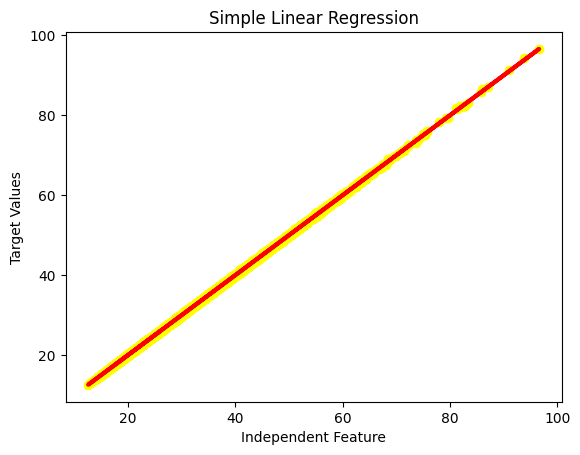

In [23]:
#Plotting Linear Regression. 
# Linear regression is used to plot the genral trend of the dataset and calculate the residuals between the actual and the predicted values. 
plt.scatter(the_BMI_test, Z_test, color = "yellow", label = "original data")  
plt.plot(the_BMI_test, Z_pred, color = "red", linewidth=3, label = "regression line")  
plt.xlabel("Independent Feature")  
plt.ylabel("Target Values")  
plt.title("Simple Linear Regression")  
plt.show()  

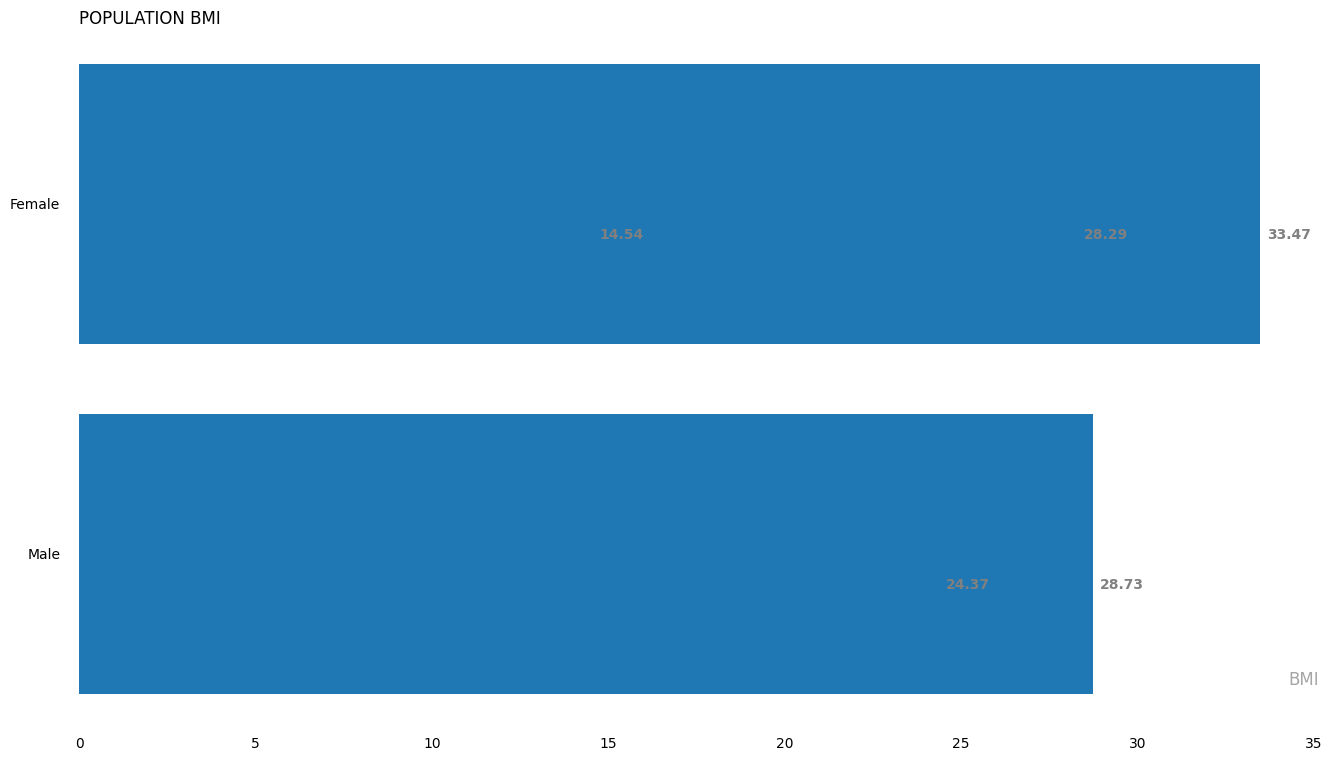

In [24]:
# Data for the bar graph
# Bar graph is used to plot the categorical values and is used to derive the estimation for the respective categories based on a particular attribute. 



categories = df['Sex'].head()
values = df['BMI'].head()

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(categories, values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
        #linestyle ='-.', linewidth = 0.5,
        #alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('POPULATION BMI',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'BMI', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()
 
# Horizontal Bar Plot
#plt.bar(categories[0:10], values[0:10])
 
# Show Plot
#plt.show()

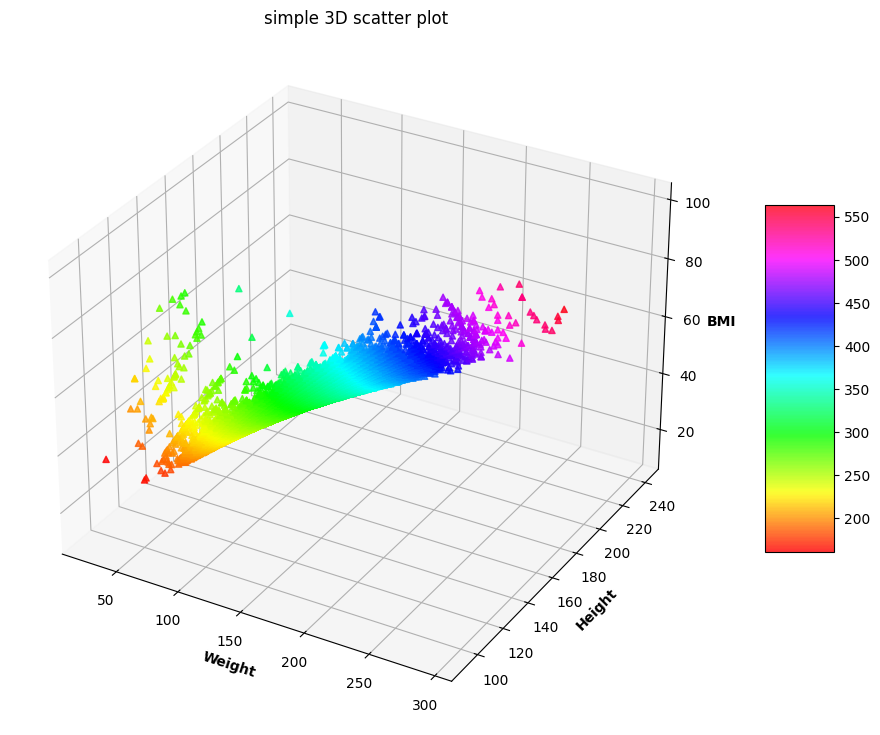

In [25]:
# Data for 3-D scatter Plot 
# Scatter Plot is sued to plot numerical values and compare and determine their analyses. 

from mpl_toolkits import mplot3d


p1= df_2['Weight_(kg)'].values
p2= df_2['Height_(cm)'].values
p3= df_2 ['BMI'].values

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(p1, p2, p3,
                    alpha = 0.8,
                    c = (p1 + p2 + p3),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('Weight', fontweight ='bold')
ax.set_ylabel('Height', fontweight ='bold')
ax.set_zlabel('BMI', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

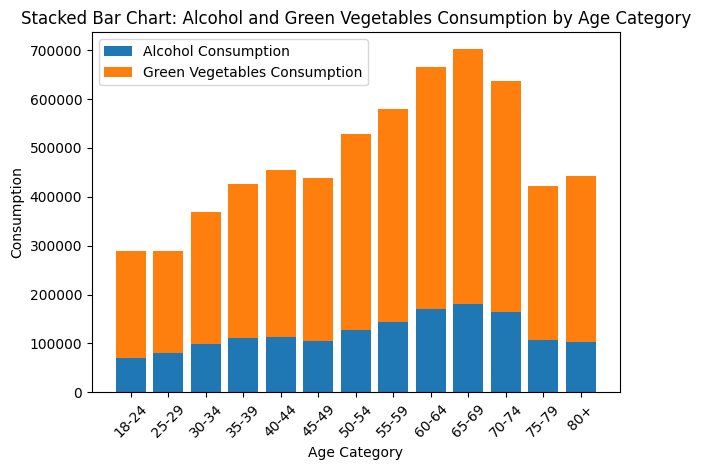

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data1 = df['Alcohol_Consumption']
data2 = df['Green_Vegetables_Consumption']
age = df['Age_Category']

# Group data by age and calculate the sum of each data column
grouped_data = pd.concat([data1, data2, age], axis=1)

grouped_data = grouped_data.groupby('Age_Category').sum()

# Plot the stacked bar chart
fig, ax = plt.subplots()

# Plot each data column as a stacked bar
ax.bar(grouped_data.index, grouped_data['Alcohol_Consumption'], label='Alcohol Consumption')
ax.bar(grouped_data.index, grouped_data['Green_Vegetables_Consumption'], bottom=grouped_data['Alcohol_Consumption'], label='Green Vegetables Consumption')

# Add labels and legend
ax.set_xlabel('Age Category')
ax.set_ylabel('Consumption')
ax.set_title('Stacked Bar Chart: Alcohol and Green Vegetables Consumption by Age Category')
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
